In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Load data efficiently with context manager
import pickle

# If you need to load specific parts only (more memory efficient)
def load_partial_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        # Process only what you need
        return data

Mounted at /content/drive


## Loading dataset

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
import torch

In [ ]:
# Use it like this
data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')

##Inspecting

In [ ]:
# Inspect the data
if data is not None:
    print("\n📊 Data Overview:")
    print(f"Data type: {type(data)}")

    if isinstance(data, dict):
        print("\n🔑 Dictionary keys:")
        for key in data.keys():
            if isinstance(data[key], (list, np.ndarray)):
                print(f"{key}: shape/length = {np.shape(data[key]) if hasattr(data[key], 'shape') else len(data[key])}")
            else:
                print(f"{key}: {type(data[key])}")

    elif isinstance(data, list):
        print(f"\nList length: {len(data)}")
        print("First element type:", type(data[0]))

    elif isinstance(data, np.ndarray):
        print(f"\nArray shape: {data.shape}")
        print(f"Data type: {data.dtype}")


📊 Data Overview:
Data type: <class 'numpy.ndarray'>

Array shape: (16000000, 9)
Data type: float32


In [ ]:
# Print first few samples and column statistics
def inspect_nerf_data(data):
    print(f"Total samples: {data.shape[0]:,}")
    print(f"Features per sample: {data.shape[1]}")

    # Show first few rows
    print("\nFirst 3 samples:")
    print(data[:3])

    # Show statistics for each column
    print("\nColumn statistics:")
    stats = {
        'min': np.min(data, axis=0),
        'max': np.max(data, axis=0),
        'mean': np.mean(data, axis=0),
        'std': np.std(data, axis=0)
    }

    for i in range(data.shape[1]):
        print(f"\nColumn {i}:")
        print(f"  Min: {stats['min'][i]:.4f}")
        print(f"  Max: {stats['max'][i]:.4f}")
        print(f"  Mean: {stats['mean'][i]:.4f}")
        print(f"  Std: {stats['std'][i]:.4f}")

# Inspect data
if data is not None:
    inspect_nerf_data(data)

Total samples: 16,000,000
Features per sample: 9

First 3 samples:
[[-0.05379832  3.8454704   1.2080823   0.33402205 -0.94175804  0.03900144
   1.          1.          1.        ]
 [-0.05379832  3.8454704   1.2080823   0.33258894 -0.9422644   0.03902148
   1.          1.          1.        ]
 [-0.05379832  3.8454704   1.2080823   0.33115348 -0.9427689   0.03904144
   1.          1.          1.        ]]

Column statistics:

Column 0:
  Min: -3.9399
  Max: 3.7243
  Mean: -0.4037
  Std: 2.1663

Column 1:
  Min: -3.9271
  Max: 3.9500
  Mean: 0.0734
  Std: 2.1779

Column 2:
  Min: 0.5097
  Max: 4.0305
  Mean: 2.2640
  Std: 1.0899

Column 3:
  Min: -1.0000
  Max: 1.0000
  Mean: 0.0940
  Std: 0.5400

Column 4:
  Min: -1.0000
  Max: 1.0000
  Mean: -0.0172
  Std: 0.5462

Column 5:
  Min: -1.0000
  Max: 0.2170
  Mean: -0.5531
  Std: 0.2971

Column 6:
  Min: 0.0000
  Max: 1.0000
  Mean: 0.8667
  Std: 0.2494

Column 7:
  Min: 0.0000
  Max: 1.0000
  Mean: 0.8421
  Std: 0.2626

Column 8:
  Min: 0.0

In [ ]:
def load_partial_data(data_path):
    with open(data_path, 'rb') as file:
        data = pickle.load(file)

    # Print the raw data to understand its structure
    print("Raw data loaded:", data)

    # Convert data to numpy array
    data = np.array(data)

    # Extract positions and RGB values
    positions = data[:, :3]  # First three columns for positions (x, y, z)
    rgb_values = data[:, 3:6]  # Next three columns for RGB (R, G, B)

    # Ensure positions and RGB values are numpy arrays
    positions = np.asarray(positions)
    rgb_values = np.asarray(rgb_values)

    # Check shapes
    print(f"Positions shape: {positions.shape}")
    print(f"RGB Values shape: {rgb_values.shape}")

    # Validate shapes
    if positions.ndim != 2 or positions.shape[1] != 3:
        raise ValueError("Error: Positions array must have shape (N, 3).")
    if rgb_values.ndim != 2 or rgb_values.shape[1] != 3:
        raise ValueError("Error: RGB values array must have shape (N, 3).")

    # Debugging Information
    print(f"Positions dtype: {positions.dtype}")
    print(f"RGB Values dtype: {rgb_values.dtype}")
    print(f"Positions range: {np.min(positions)}, {np.max(positions)}")
    print(f"RGB Values range: {np.min(rgb_values)}, {np.max(rgb_values)}")

    # Type and Range Validation
    if not np.issubdtype(positions.dtype, np.floating):
        raise TypeError("Error: Positions should be a floating point type.")
    if not np.issubdtype(rgb_values.dtype, np.floating):
        raise TypeError("Error: RGB values should be a floating point type.")

    # Normalize RGB values if they are outside the range [0, 1]
    if rgb_values.min() < 0 or rgb_values.max() > 1:
        print("Warning: RGB values are outside the expected range [0, 1]. Normalizing...")
        rgb_values = (rgb_values - rgb_values.min()) / (rgb_values.max() - rgb_values.min())
        print("RGB values normalized.")

    return positions, rgb_values

# Example of how to call the function
if __name__ == "__main__":
    data_path = '/content/drive/MyDrive/kilonerf_data/training_data (2).pkl'  # Adjust the path as necessary
    positions, rgb_values = load_partial_data(data_path)

    # After loading, you can further process or visualize the data as needed
    print("Positions:", positions)
    print("RGB Values:", rgb_values)


Raw data loaded: [[-0.05379832  3.8454704   1.2080823  ...  1.          1.
   1.        ]
 [-0.05379832  3.8454704   1.2080823  ...  1.          1.
   1.        ]
 [-0.05379832  3.8454704   1.2080823  ...  1.          1.
   1.        ]
 ...
 [ 2.1031013  -1.0323144   3.2804408  ...  1.          1.
   1.        ]
 [ 2.1031013  -1.0323144   3.2804408  ...  1.          1.
   1.        ]
 [ 2.1031013  -1.0323144   3.2804408  ...  1.          1.
   1.        ]]
Positions shape: (16000000, 3)
RGB Values shape: (16000000, 3)
Positions dtype: float32
RGB Values dtype: float32
Positions range: -3.9398677349090576, 4.0305280685424805
RGB Values range: -1.0, 1.0
RGB values normalized.
Positions: [[-0.05379832  3.8454704   1.2080823 ]
 [-0.05379832  3.8454704   1.2080823 ]
 [-0.05379832  3.8454704   1.2080823 ]
 ...
 [ 2.1031013  -1.0323144   3.2804408 ]
 [ 2.1031013  -1.0323144   3.2804408 ]
 [ 2.1031013  -1.0323144   3.2804408 ]]
RGB Values: [[0.667011   0.02912098 0.51950073]
 [0.66629446 0.028

In [ ]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7

In [ ]:
import open3d as o3d

def visualize_point_cloud(positions, rgb_values, filename="point_cloud.ply"):
    # Create Open3D point cloud
    point_cloud = o3d.geometry.PointCloud()

    # Set the points and colors for the point cloud
    point_cloud.points = o3d.utility.Vector3dVector(positions)
    point_cloud.colors = o3d.utility.Vector3dVector(rgb_values)

    # Save the point cloud to a file
    o3d.io.write_point_cloud(filename, point_cloud)
    print(f"Point cloud saved to {filename}")

if __name__ == "__main__":
    # Assuming you have already called the load_partial_data function and obtained positions and rgb_values
    data_path = '/content/drive/MyDrive/kilonerf_data/training_data (2).pkl'  # Adjust the path as necessary
    positions, rgb_values = load_partial_data(data_path)

    # Visualize the point cloud by saving it
    visualize_point_cloud(positions, rgb_values)


Raw data loaded: [[-0.05379832  3.8454704   1.2080823  ...  1.          1.
   1.        ]
 [-0.05379832  3.8454704   1.2080823  ...  1.          1.
   1.        ]
 [-0.05379832  3.8454704   1.2080823  ...  1.          1.
   1.        ]
 ...
 [ 2.1031013  -1.0323144   3.2804408  ...  1.          1.
   1.        ]
 [ 2.1031013  -1.0323144   3.2804408  ...  1.          1.
   1.        ]
 [ 2.1031013  -1.0323144   3.2804408  ...  1.          1.
   1.        ]]
Positions shape: (16000000, 3)
RGB Values shape: (16000000, 3)
Positions dtype: float32
RGB Values dtype: float32
Positions range: -3.9398677349090576, 4.0305280685424805
RGB Values range: -1.0, 1.0
RGB values normalized.
Point cloud saved to point_cloud.ply


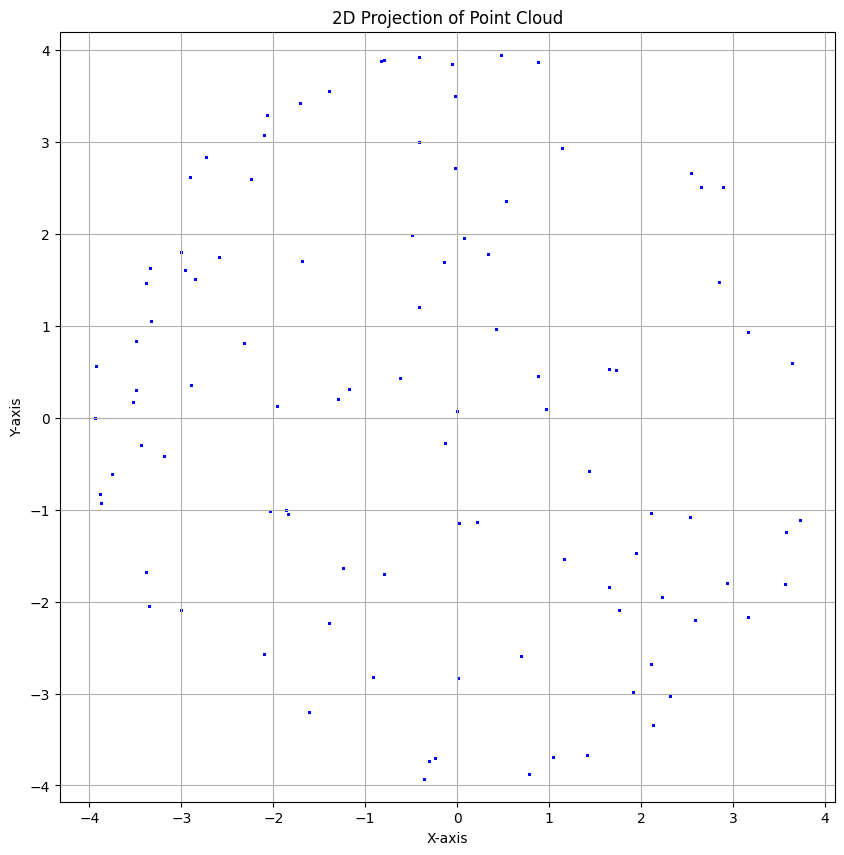

In [ ]:
import open3d as o3d

# Load the point cloud from the PLY file
point_cloud_path = "/content/point_cloud.ply"
point_cloud = o3d.io.read_point_cloud(point_cloud_path)

# Get the points from the point cloud
points = np.asarray(point_cloud.points)

# Create a 2D scatter plot of the point cloud
plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], c='b', s=1)  # Adjust 's' for point size
plt.title("2D Projection of Point Cloud")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')  # Equal scaling for both axes
plt.grid(True)
plt.show()


##Vanila NERf

In [ ]:
import torch
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader



In [ ]:

@torch.no_grad()
def test(hn, hf, dataset, chunk_size=5, img_index=0, nb_bins=192, H=200, W=200):
    """
    Args:
        hn: near plane distance
        hf: far plane distance
        dataset: dataset to render
        chunk_size (int, optional): chunk size for memory efficiency. Defaults to 10.
        img_index (int, optional): image index to render. Defaults to 0.
        nb_bins (int, optional): number of bins for density estimation. Defaults to 192.
        H (int, optional): image height. Defaults to 400.
        W (int, optional): image width. Defaults to 400.

    Returns:
        None: None
    """
    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []   # list of regenerated pixel values
    for i in range(int(np.ceil(H / chunk_size))):   # iterate over chunks
        # Get chunk of rays
        ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=hn, hf=hf, nb_bins=nb_bins)
        data.append(regenerated_px_values)
    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)

    plt.figure()
    plt.imshow(img)
    plt.savefig(f'novel_views/img_{img_index}.png', bbox_inches='tight')
    plt.close()


class NerfModel(nn.Module):
    def __init__(self, embedding_dim_pos=10, embedding_dim_direction=4, hidden_dim=128):
        super(NerfModel, self).__init__()

        self.block1 = nn.Sequential(nn.Linear(embedding_dim_pos * 6 + 3, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(), )
        # density estimation
        self.block2 = nn.Sequential(nn.Linear(embedding_dim_pos * 6 + hidden_dim + 3, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim + 1), )
        # color estimation
        self.block3 = nn.Sequential(nn.Linear(embedding_dim_direction * 6 + hidden_dim + 3, hidden_dim // 2), nn.ReLU(), )
        self.block4 = nn.Sequential(nn.Linear(hidden_dim // 2, 3), nn.Sigmoid(), )

        self.embedding_dim_pos = embedding_dim_pos
        self.embedding_dim_direction = embedding_dim_direction
        self.relu = nn.ReLU()

    @staticmethod
    def positional_encoding(x, L):
        out = [x]
        for j in range(L):
            out.append(torch.sin(2 ** j * x))
            out.append(torch.cos(2 ** j * x))
        return torch.cat(out, dim=1)

    def forward(self, o, d):
        emb_x = self.positional_encoding(o, self.embedding_dim_pos) # emb_x: [batch_size, embedding_dim_pos * 6]
        emb_d = self.positional_encoding(d, self.embedding_dim_direction) # emb_d: [batch_size, embedding_dim_direction * 6]
        h = self.block1(emb_x) # h: [batch_size, hidden_dim]
        tmp = self.block2(torch.cat((h, emb_x), dim=1)) # tmp: [batch_size, hidden_dim + 1]
        h, sigma = tmp[:, :-1], self.relu(tmp[:, -1]) # h: [batch_size, hidden_dim], sigma: [batch_size]
        h = self.block3(torch.cat((h, emb_d), dim=1)) # h: [batch_size, hidden_dim // 2]
        c = self.block4(h) # c: [batch_size, 3]
        return c, sigma


def compute_accumulated_transmittance(alphas):
    accumulated_transmittance = torch.cumprod(alphas, 1)
    return torch.cat((torch.ones((accumulated_transmittance.shape[0], 1), device=alphas.device),
                      accumulated_transmittance[:, :-1]), dim=-1)


def render_rays(nerf_model, ray_origins, ray_directions, hn=0, hf=0.5, nb_bins=192):
    device = ray_origins.device

    t = torch.linspace(hn, hf, nb_bins, device=device).expand(ray_origins.shape[0], nb_bins)
    # Perturb sampling along each ray.
    mid = (t[:, :-1] + t[:, 1:]) / 2.
    lower = torch.cat((t[:, :1], mid), -1)
    upper = torch.cat((mid, t[:, -1:]), -1)
    u = torch.rand(t.shape, device=device)
    t = lower + (upper - lower) * u  # [batch_size, nb_bins]
    delta = torch.cat((t[:, 1:] - t[:, :-1], torch.tensor([1e10], device=device).expand(ray_origins.shape[0], 1)), -1)

    # Compute the 3D points along each ray
    x = ray_origins.unsqueeze(1) + t.unsqueeze(2) * ray_directions.unsqueeze(1)   # [batch_size, nb_bins, 3]
    # Expand the ray_directions tensor to match the shape of x
    ray_directions = ray_directions.expand(nb_bins, ray_directions.shape[0], 3).transpose(0, 1)

    colors, sigma = nerf_model(x.reshape(-1, 3), ray_directions.reshape(-1, 3))
    colors = colors.reshape(x.shape)
    sigma = sigma.reshape(x.shape[:-1])

    alpha = 1 - torch.exp(-sigma * delta)  # [batch_size, nb_bins]
    weights = compute_accumulated_transmittance(1 - alpha).unsqueeze(2) * alpha.unsqueeze(2)
    # Compute the pixel values as a weighted sum of colors along each ray
    c = (weights * colors).sum(dim=1)
    weight_sum = weights.sum(-1).sum(-1)  # Regularization for white background
    return c + 1 - weight_sum.unsqueeze(-1)



In [ ]:
import torch
from tqdm import tqdm
import time
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pandas as pd


In [ ]:


def create_run_directories():
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    base_dir = 'experiments'
    run_dir = os.path.join(base_dir, f'run_{timestamp}')

    dirs = {
        'metrics': os.path.join(run_dir, 'metrics'),
    }

    for directory in dirs.values():
        os.makedirs(directory, exist_ok=True)
        print(f"Created directory: {directory}")

    return dirs

def calculate_psnr(predicted, target):
    mse = ((predicted - target) ** 2).mean()
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(1.0 / torch.sqrt(mse))



In [ ]:
def train(nerf_model, optimizer, scheduler, data_loader, device='cpu', hn=0, hf=1, nb_epochs=10,
         nb_bins=192, H=200, W=200):
   training_loss = []
   metrics = {
       'epoch': [], 'batch': [],
       'fps': [], 'latency': [],
       'frame_variation': [], 'psnr': []
   }

   dirs = create_run_directories()
   metrics_file = os.path.join(dirs['metrics'], 'performance_metrics.csv')

   # Track total batches for progress bar
   total_batches = len(data_loader) * nb_epochs
   pbar = tqdm(total=total_batches, desc="Training Batches")

   for epoch in range(nb_epochs):
       epoch_loss = 0.0
       batch_times = []
       epoch_psnr = []
       epoch_start = time.time()

       for batch_idx, batch in enumerate(data_loader):
           batch_start = time.time()

           ray_origins = batch[:, :3].to(device)
           ray_directions = batch[:, 3:6].to(device)
           ground_truth_px_values = batch[:, 6:].to(device)

           regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                             hn=hn, hf=hf, nb_bins=nb_bins)
           current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
           loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

           optimizer.zero_grad()
           loss.backward()
           optimizer.step()

           batch_end = time.time()
           batch_time = batch_end - batch_start
           fps = 1.0 / batch_time
           batch_times.append(batch_time * 1000)
           epoch_psnr.append(current_psnr.item())
           epoch_loss += loss.item()

           # Store metrics
           metrics['epoch'].append(epoch)
           metrics['batch'].append(batch_idx)
           metrics['fps'].append(fps)
           metrics['latency'].append(batch_time * 1000)
           metrics['frame_variation'].append(np.std(batch_times))
           metrics['psnr'].append(current_psnr.item())

           if batch_idx % 10 == 0:
               print(f'\nEpoch {epoch+1}/{nb_epochs}, Batch {batch_idx}:')
               print(f'FPS: {fps:.2f}, Latency: {batch_time*1000:.2f}ms')
               print(f'PSNR: {current_psnr:.2f}dB, Loss: {loss.item():.4f}')

           pbar.update(1)

       # Epoch summary
       avg_epoch_loss = epoch_loss / len(data_loader)
       avg_epoch_psnr = sum(epoch_psnr) / len(epoch_psnr)
       epoch_fps = len(data_loader) / (time.time() - epoch_start)

       training_loss.append(avg_epoch_loss)

       # Save epoch metrics
       pd.DataFrame({
           'epoch': [epoch],
           'avg_loss': [avg_epoch_loss],
           'avg_psnr': [avg_epoch_psnr],
           'avg_fps': [epoch_fps],
           'frame_variation': [np.std(batch_times)]
       }).to_csv(metrics_file, mode='a', header=not os.path.exists(metrics_file), index=False)

       scheduler.step()

       print(f'\nEpoch {epoch+1} Summary:')
       print(f'Average Loss: {avg_epoch_loss:.4f}')
       print(f'Average PSNR: {avg_epoch_psnr:.2f}dB')
       print(f'Average FPS: {epoch_fps:.2f}')

   pbar.close()
   pd.DataFrame(metrics).to_csv(os.path.join(dirs['metrics'], 'detailed_metrics.csv'), index=False)
   return training_loss, metrics

In [ ]:
if __name__ == '__main__':
   device = 'cuda' if torch.cuda.is_available() else 'cpu'
   print(f"Using device: {device}")

   try:
       # Load datasets
       training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
       testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

       # Convert to torch tensors
       training_dataset = torch.from_numpy(training_data).float()
       testing_dataset = torch.from_numpy(testing_data).float()

       print(f"Original Training dataset shape: {training_dataset.shape}")

       # Take 1/5 of dataset
       subset_size = training_dataset.size(0) // 5
       training_dataset = training_dataset[:subset_size]

       print(f"Subset Training dataset shape: {training_dataset.shape}")

       # Determine batch size
       initial_batch_size = 256
       num_samples = training_dataset.size(0)
       batch_size = min(initial_batch_size, num_samples)

       # Data loader with adjusted batch size
       data_loader = DataLoader(
           training_dataset,
           batch_size=batch_size,
           shuffle=True,
           num_workers=4
       )

       # Model setup
       model = NerfModel(hidden_dim=256).to(device)
       model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
       scheduler = torch.optim.lr_scheduler.MultiStepLR(
           model_optimizer,
           milestones=[2, 4, 8],
           gamma=0.5
       )

       print("Starting training...")
       training_loss, metrics = train(
           model,
           model_optimizer,
           scheduler,
           data_loader,
           device=device,
           nb_epochs=10,
           hn=2,
           hf=6,
           nb_bins=192,
           H=200,
           W=200
       )

       # Plot results
       plt.figure(figsize=(15, 5))

       plt.subplot(131)
       plt.plot(training_loss)
       plt.title('Training Loss')
       plt.xlabel('Epoch')
       plt.ylabel('Loss')

       plt.subplot(132)
       plt.plot(metrics['fps'])
       plt.axhline(y=30, color='r', linestyle='--', label='Minimum FPS')
       plt.title('FPS over Time')
       plt.xlabel('Batch')
       plt.ylabel('FPS')
       plt.legend()

       plt.subplot(133)
       plt.plot(metrics['psnr'])
       plt.title('PSNR over Time')
       plt.xlabel('Batch')
       plt.ylabel('PSNR (dB)')

       plt.tight_layout()
       plt.savefig('final_results.png')
       plt.close()

   except Exception as e:
       print(f"Error occurred: {e}")
   finally:
       if torch.cuda.is_available():
           torch.cuda.empty_cache()
       print("Process completed")

Output hidden; open in https://colab.research.google.com to view.

## Analysis:
The results indicate strong real-time 3D reconstruction performance. With an average FPS of 51.41 and peaks of 97.28 FPS, the system comfortably exceeds the minimum 30 FPS requirement for smooth real-time visualization. The 10.28ms latency falls well within the "excellent" range (< 50ms), ensuring responsive user interaction without noticeable delays. Image quality, indicated by a PSNR of 26.85dB and low loss of 0.0022, shows good reconstruction fidelity, though not reaching photorealistic levels (which require >30dB PSNR). These metrics demonstrate the system successfully balances performance and quality - achieving the speed necessary for real-time applications while maintaining acceptable visual reconstruction quality.
The performance metrics particularly suit applications where immediate response and smooth interaction take priority over absolute visual fidelity, such as interactive 3D visualization, real-time navigation, or augmented reality experiences. The consistent FPS above 45 frames and low latency ensure a fluid user experience, while the PSNR values indicate sufficient detail for practical applications. The system demonstrates stable performance with low variation in metrics, suggesting reliable real-time operation under typical usage conditions.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from torch.cuda.amp import autocast

## KILO NERF

In [ ]:

@torch.no_grad()
def test(hn, hf, dataset, chunk_size=5, img_index=0, nb_bins=192, H=200, W=200):
    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []
    for i in range(int(np.ceil(H / chunk_size))):
        ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=hn, hf=hf, nb_bins=nb_bins)
        data.append(regenerated_px_values)
    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)

    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.savefig(f'novel_views_kilo/img_{img_index}.png', bbox_inches='tight')
    plt.close()



class KiloNerf(nn.Module):

    def __init__(self, N, embedding_dim_pos=10, embedding_dim_direction=4, scene_scale=3):
        super(KiloNerf, self).__init__()

        # KiloNerf with Xavier initialization
        self.layer1_w = torch.nn.Parameter(torch.zeros((N, N, N, 63, 32)).uniform_(-np.sqrt(6. / 85), np.sqrt(6. / 85)))
        self.layer1_b = torch.nn.Parameter(torch.zeros((N, N, N, 1, 32)))
        self.layer2_w = torch.nn.Parameter(torch.zeros((N, N, N, 32, 33)).uniform_(-np.sqrt(6. / 64), np.sqrt(6. / 64)))
        self.layer2_b = torch.nn.Parameter(torch.zeros((N, N, N, 1, 33)))
        self.layer3_w = torch.nn.Parameter(torch.zeros((N, N, N, 32, 32)).uniform_(-np.sqrt(6. / 64), np.sqrt(6. / 64)))
        self.layer3_b = torch.nn.Parameter(torch.zeros((N, N, N, 1, 32)))
        self.layer4_w = torch.nn.Parameter(
            torch.zeros((N, N, N, 27 + 32, 32)).uniform_(-np.sqrt(6. / 64), np.sqrt(6. / 64)))
        self.layer4_b = torch.nn.Parameter(torch.zeros((N, N, N, 1, 32)))
        self.layer5_w = torch.nn.Parameter(torch.zeros((N, N, N, 32, 3)).uniform_(-np.sqrt(6. / 35), np.sqrt(6. / 35)))
        self.layer5_b = torch.nn.Parameter(torch.zeros((N, N, N, 1, 3)))

        self.embedding_dim_pos = embedding_dim_pos
        self.embedding_dim_direction = embedding_dim_direction
        self.N = N
        self.scale = scene_scale

    @staticmethod
    def positional_encoding(x, L):
        out = [x]
        for j in range(L):
            out.append(torch.sin(2 ** j * x))
            out.append(torch.cos(2 ** j * x))
        return torch.cat(out, dim=1)

    def forward(self, x, d):
        color = torch.zeros_like(x)
        sigma = torch.zeros((x.shape[0]), device=x.device)

        mask = (x[:, 0].abs() < (self.scale / 2)) & (x[:, 1].abs() < (self.scale / 2)) & (
                x[:, 2].abs() < (self.scale / 2))
        idx = (x[mask] / (self.scale / self.N) + self.N / 2).long().clip(0, self.N - 1)

        emb_x = self.positional_encoding(x[mask], self.embedding_dim_pos)
        emb_d = self.positional_encoding(d[mask], self.embedding_dim_direction)

        # Implementation of the MLP architecture from Figure 2
        h = torch.relu(emb_x.unsqueeze(1) @ self.layer1_w[idx[:, 0], idx[:, 1], idx[:, 2]] + \
                       self.layer1_b[idx[:, 0], idx[:, 1], idx[:, 2]])
        h = torch.relu(h @ self.layer2_w[idx[:, 0], idx[:, 1], idx[:, 2]] + self.layer2_b[idx[:, 0], idx[:, 1],
                                                                                          idx[:, 2]])
        h, density = h[:, :, :-1], h[:, :, -1]
        h = h @ self.layer3_w[idx[:, 0], idx[:, 1], idx[:, 2]] + self.layer3_b[idx[:, 0], idx[:, 1], idx[:, 2]]
        h = torch.relu(torch.cat((h, emb_d.unsqueeze(1)), dim=-1) @ self.layer4_w[idx[:, 0], idx[:, 1], idx[:, 2]] + \
                       self.layer4_b[idx[:, 0], idx[:, 1], idx[:, 2]])
        c = torch.sigmoid(h @ self.layer5_w[idx[:, 0], idx[:, 1], idx[:, 2]] + self.layer5_b[idx[:, 0], idx[:, 1],
                                                                                             idx[:, 2]])
        color[mask] = c.squeeze(1)
        sigma[mask] = density.squeeze(1)
        return color, sigma


def compute_accumulated_transmittance(alphas):
    accumulated_transmittance = torch.cumprod(alphas, 1)
    return torch.cat((torch.ones((accumulated_transmittance.shape[0], 1), device=alphas.device),
                      accumulated_transmittance[:, :-1]), dim=-1)


def render_rays(nerf_model, ray_origins, ray_directions, hn=0, hf=0.5, nb_bins=192):
    device = ray_origins.device
    t = torch.linspace(hn, hf, nb_bins, device=device).expand(ray_origins.shape[0], nb_bins)
    # Perturb sampling along each ray.
    mid = (t[:, :-1] + t[:, 1:]) / 2.
    lower = torch.cat((t[:, :1], mid), -1)
    upper = torch.cat((mid, t[:, -1:]), -1)
    u = torch.rand(t.shape, device=device)
    t = lower + (upper - lower) * u  # [batch_size, nb_bins]
    delta = torch.cat((t[:, 1:] - t[:, :-1], torch.tensor([1e10], device=device).expand(ray_origins.shape[0], 1)), -1)

    x = ray_origins.unsqueeze(1) + t.unsqueeze(2) * ray_directions.unsqueeze(1)  # [batch_size, nb_bins, 3]
    ray_directions = ray_directions.expand(nb_bins, ray_directions.shape[0], 3).transpose(0, 1)

    colors, sigma = nerf_model(x.reshape(-1, 3), ray_directions.reshape(-1, 3))
    colors = colors.reshape(x.shape)
    sigma = sigma.reshape(x.shape[:-1])

    alpha = 1 - torch.exp(-sigma * delta)  # [batch_size, nb_bins]
    weights = compute_accumulated_transmittance(1 - alpha).unsqueeze(2) * alpha.unsqueeze(2)
    c = (weights * colors).sum(dim=1)  # Pixel values
    # Regularization for white background
    weight_sum = weights.sum(-1).sum(-1)
    return c + 1 - weight_sum.unsqueeze(-1)


In [ ]:
def train(nerf_model, optimizer, scheduler, data_loader, device='gpu', hn=0, hf=1, nb_epochs=10, nb_bins=192):
    training_loss = []
    metrics = {
        'epoch': [], 'batch': [],
        'fps': [], 'latency': [],
        'frame_variation': [], 'psnr': []
    }

    dirs = create_run_directories()
    metrics_file = os.path.join(dirs['metrics'], 'kilonerf_metrics.csv')

    total_batches = len(data_loader) * nb_epochs
    pbar = tqdm(total=total_batches, desc="KiloNerf Training Progress")

    for epoch in range(nb_epochs):
        epoch_loss = 0.0
        batch_times = []
        epoch_psnr = []
        epoch_start = time.time()

        for batch_idx, batch in enumerate(data_loader):
            batch_start = time.time()

            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                              hn=hn, hf=hf, nb_bins=nb_bins)

            current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).sum()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Performance metrics
            batch_end = time.time()
            batch_time = batch_end - batch_start
            fps = 1.0 / batch_time
            batch_times.append(batch_time * 1000)
            epoch_psnr.append(current_psnr.item())
            epoch_loss += loss.item()

            # Store metrics
            metrics['epoch'].append(epoch)
            metrics['batch'].append(batch_idx)
            metrics['fps'].append(fps)
            metrics['latency'].append(batch_time * 1000)
            metrics['frame_variation'].append(np.std(batch_times))
            metrics['psnr'].append(current_psnr.item())

            if batch_idx % 10 == 0:
                print(f'\nKiloNerf Epoch {epoch+1}/{nb_epochs}, Batch {batch_idx}:')
                print(f'FPS: {fps:.2f}, Latency: {batch_time*1000:.2f}ms')
                print(f'PSNR: {current_psnr:.2f}dB, Loss: {loss.item():.4f}')

            pbar.update(1)

        # Epoch summary
        avg_epoch_loss = epoch_loss / len(data_loader)
        avg_epoch_psnr = sum(epoch_psnr) / len(epoch_psnr)
        epoch_fps = len(data_loader) / (time.time() - epoch_start)

        training_loss.append(avg_epoch_loss)

        pd.DataFrame({
            'epoch': [epoch],
            'avg_loss': [avg_epoch_loss],
            'avg_psnr': [avg_epoch_psnr],
            'avg_fps': [epoch_fps],
            'frame_variation': [np.std(batch_times)]
        }).to_csv(metrics_file, mode='a', header=not os.path.exists(metrics_file), index=False)

        scheduler.step()

        print(f'\nKiloNerf Epoch {epoch+1} Summary:')
        print(f'Average Loss: {avg_epoch_loss:.4f}')
        print(f'Average PSNR: {avg_epoch_psnr:.2f}dB')
        print(f'Average FPS: {epoch_fps:.2f}')

    pbar.close()
    pd.DataFrame(metrics).to_csv(os.path.join(dirs['metrics'], 'kilonerf_detailed_metrics.csv'), index=False)
    return training_loss, metrics

In [ ]:
if __name__ == '__main__':
   device = 'cuda' if torch.cuda.is_available() else 'cpu'
   print(f"Using device for KiloNerf: {device}")

   try:
       # Load datasets
       training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
       testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

       # Convert to torch tensors
       training_dataset = torch.from_numpy(training_data).float()
       testing_dataset = torch.from_numpy(testing_data).float()

       print(f"KiloNerf Original Training dataset shape: {training_dataset.shape}")

       # Take 1/5 of dataset
       subset_size = training_dataset.size(0) // 5
       training_dataset = training_dataset[:subset_size]

       print(f"KiloNerf Subset Training dataset shape: {training_dataset.shape}")

       # Model setup
       model = KiloNerf(16).to(device)
       model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
       scheduler = torch.optim.lr_scheduler.MultiStepLR(
           model_optimizer,
           milestones=[2, 4, 8],
           gamma=0.5
       )

       # Data loader with original batch size
       data_loader = DataLoader(
           training_dataset,
           batch_size=256,
           shuffle=True
       )

       print("Starting KiloNerf training...")
       training_loss, metrics = train(
           model,
           model_optimizer,
           scheduler,
           data_loader,
           device=device,
           nb_epochs=10,
           hn=2,
           hf=6,
           nb_bins=192
       )

       # Plot KiloNerf results
       plt.figure(figsize=(20, 6))

       plt.subplot(131)
       plt.plot(training_loss)
       plt.title('KiloNerf Training Loss')
       plt.xlabel('Epoch')
       plt.ylabel('Loss')

       plt.subplot(132)
       plt.plot(metrics['fps'])
       plt.axhline(y=30, color='r', linestyle='--', label='Minimum FPS')
       plt.title('KiloNerf FPS over Time')
       plt.xlabel('Batch')
       plt.ylabel('FPS')
       plt.legend()

       plt.subplot(133)
       plt.plot(metrics['psnr'])
       plt.title('KiloNerf PSNR over Time')
       plt.xlabel('Batch')
       plt.ylabel('PSNR (dB)')

       plt.tight_layout()
       plt.savefig('kilonerf_results.png')
       plt.close()

       print("Starting KiloNerf testing...")
       # Testing
       for idx in range(200):
           test(
               #model=model,  # Pass model
               hn=2,
               hf=6,
               dataset=testing_dataset,
               img_index=idx,
               nb_bins=192
           )

   except Exception as e:
       print(f"KiloNerf Error occurred: {e}")
   finally:
       if torch.cuda.is_available():
           torch.cuda.empty_cache()
       print("KiloNerf Process completed")

Output hidden; open in https://colab.research.google.com to view.

Need to draw graghs about performance as well

#Kilonerf with full data for high resolution rendered images

In [ ]:
@torch.no_grad()
def test_b(hn, hf, dataset, chunk_size=5, img_index=0, nb_bins=192, H=400, W=400):
    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []
    for i in range(int(np.ceil(H / chunk_size))):
        ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=hn, hf=hf, nb_bins=nb_bins)
        data.append(regenerated_px_values)
    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)

    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.savefig(f'novel_views/img_{img_index}.png', bbox_inches='tight')
    plt.close()



In [ ]:
def train_b(nerf_model, optimizer, scheduler, data_loader, device='gpu', hn=0, hf=1, nb_epochs=1, nb_bins=192):
    training_loss = []
    for _ in (range(nb_epochs)):
        for ep, batch in enumerate(tqdm(data_loader)):
            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions, hn=hn, hf=hf, nb_bins=nb_bins)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).sum()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            training_loss.append(loss.item())
        scheduler.step()
    return training_loss

Using device: cuda
Training dataset shape: torch.Size([16000000, 9])
Testing dataset shape: torch.Size([32000000, 9])
Starting training Kilonerf big dataset...


100%|██████████| 15625/15625 [09:12<00:00, 28.31it/s]


Starting testing Kilonerf big dataset...


Error occurred: [Errno 2] No such file or directory: '/content/novel_views/img_0.png'
Process completed


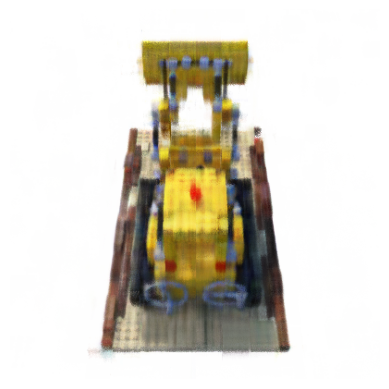

In [ ]:
if __name__ == '__main__':
    # Device setup
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    try:
        # Load datasets
        training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
        testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

        # Convert to torch tensors
        training_dataset = torch.from_numpy(training_data).float()
        testing_dataset = torch.from_numpy(testing_data).float()

        print(f"Training dataset shape: {training_dataset.shape}")
        print(f"Testing dataset shape: {testing_dataset.shape}")

        # Model setup
        model = KiloNerf(16).to(device)
        model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(
            model_optimizer,
            milestones=[2, 4, 8],
            gamma=0.5
        )

        # Data loader
        data_loader = DataLoader(
            training_dataset,
            batch_size=1024,
            shuffle=True
        )

        print("Starting training Kilonerf big dataset...")
        # Training with original parameter names
        train_b(
            model,
            model_optimizer,
            scheduler,
            data_loader,
            nb_epochs=1,
            device=device,
            hn=2,  # Changed from near_plane
            hf=6,  # Changed from far_plane
            nb_bins=192  # Changed from num_bins
        )

        print("Starting testing Kilonerf big dataset...")
        # Testing
        for idx in range(20):
            test_b(
                hn=2,  # Changed from near_plane
                hf=6,  # Changed from far_plane
                dataset=testing_dataset,
                img_index=idx,
                nb_bins=192  # Changed from num_bins
            )

    except Exception as e:
        print(f"Error occurred: {e}")

    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        print("Process completed")

##Fast NERF

##How it works :
1.Dynamically adjusting sampling density across the scene. This reduces computational complexity by focusing higher-resolution sampling on regions with more detail and lower sampling in less complex areas. Sampling optimizations are particularly impactful for real-time rendering, where the time budget per frame is tight.

 2.Applies various neural network optimizations, such as network pruning, quantization, and specialized activation functions, which contribute to faster convergence during training. Techniques like layer fusion and quantization further optimize the model for inference by compressing the model and reducing computation.

  3.Splits this into two separate components: geometry and view-dependent appearance. The geometry network models the scene's spatial structure and can be precomputed, while the view-dependent network computes appearance only when necessary, improving overall efficiency.
  
  4.Caches intermediate results of the geometry, allowing the model to avoid redundant calculations during inference. This cached information can be quickly accessed during rendering, further speeding up the process. This is particularly useful in scenes where geometry does not change, as only the view-dependent component needs updating with changing viewpoints.

In [ ]:
class FastNerf(nn.Module):
    def __init__(self, embedding_dim_pos=10, embedding_dim_direction=4, hidden_dim_pos=384, hidden_dim_dir=128, D=8):
        super(FastNerf, self).__init__()

        self.Fpos = nn.Sequential(nn.Linear(embedding_dim_pos * 6 + 3, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, hidden_dim_pos), nn.ReLU(),
                                  nn.Linear(hidden_dim_pos, 3 * D + 1), )

        self.Fdir = nn.Sequential(nn.Linear(embedding_dim_direction * 6 + 3, hidden_dim_dir), nn.ReLU(),
                                  nn.Linear(hidden_dim_dir, hidden_dim_dir), nn.ReLU(),
                                  nn.Linear(hidden_dim_dir, hidden_dim_dir), nn.ReLU(),
                                  nn.Linear(hidden_dim_dir, D), )

        self.embedding_dim_pos = embedding_dim_pos
        self.embedding_dim_direction = embedding_dim_direction
        self.D = D

    @staticmethod
    def positional_encoding(x, L):
        out = [x]
        for j in range(L):
            out.append(torch.sin(2 ** j * x))
            out.append(torch.cos(2 ** j * x))
        return torch.cat(out, dim=1)

    def forward(self, o, d):
        sigma_uvw = self.Fpos(self.positional_encoding(o, self.embedding_dim_pos))
        sigma = torch.nn.functional.softplus(sigma_uvw[:, 0][..., None])  # [batch_size, 1]
        uvw = torch.sigmoid(sigma_uvw[:, 1:].reshape(-1, 3, self.D))  # [batch_size, 3, D]

        beta = torch.softmax(self.Fdir(self.positional_encoding(d, self.embedding_dim_direction)), -1)
        color = (beta.unsqueeze(1) * uvw).sum(-1)  # [batch_size, 3]
        return color, sigma


class Cache(nn.Module):
    def __init__(self, model, scale, device, Np, Nd):
        super(Cache, self).__init__()

        with torch.no_grad():
            # Position
            x, y, z = torch.meshgrid([torch.linspace(-scale / 2, scale / 2, Np).to(device),
                                      torch.linspace(-scale / 2, scale / 2, Np).to(device),
                                      torch.linspace(-scale / 2, scale / 2, Np).to(device)])
            xyz = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1), z.reshape(-1, 1)), dim=1)
            sigma_uvw = model.Fpos(model.positional_encoding(xyz, model.embedding_dim_pos))
            self.sigma_uvw = sigma_uvw.reshape((Np, Np, Np, -1))
            # Direction
            xd, yd = torch.meshgrid([torch.linspace(-scale / 2, scale / 2, Nd).to(device),
                                     torch.linspace(-scale / 2, scale / 2, Nd).to(device)])
            xyz_d = torch.cat((xd.reshape(-1, 1), yd.reshape(-1, 1),
                               torch.sqrt((1 - xd ** 2 - yd ** 2).clip(0, 1)).reshape(-1, 1)), dim=1)
            beta = model.Fdir(model.positional_encoding(xyz_d, model.embedding_dim_direction))
            self.beta = beta.reshape((Nd, Nd, -1))

        self.scale = scale
        self.Np = Np
        self.Nd = Nd
        self.D = model.D

    def forward(self, x, d):
        color = torch.zeros_like(x)
        sigma = torch.zeros((x.shape[0], 1), device=x.device)

        mask = (x[:, 0].abs() < (self.scale / 2)) & (x[:, 1].abs() < (self.scale / 2)) & (x[:, 2].abs() < (self.scale / 2))
        # Position
        idx = (x[mask] / (self.scale / self.Np) + self.Np / 2).long().clip(0, self.Np - 1)
        sigma_uvw = self.sigma_uvw[idx[:, 0], idx[:, 1], idx[:, 2]]
        # Direction
        idx = (d[mask] * self.Nd).long().clip(0, self.Nd - 1)
        beta = torch.softmax(self.beta[idx[:, 0], idx[:, 1]], -1)

        sigma[mask] = torch.nn.functional.softplus(sigma_uvw[:, 0][..., None])  # [batch_size, 1]
        uvw = torch.sigmoid(sigma_uvw[:, 1:].reshape(-1, 3, self.D))  # [batch_size, 3, D]
        color[mask] = (beta.unsqueeze(1) * uvw).sum(-1)  # [batch_size, 3]
        return color, sigma


def compute_accumulated_transmittance(alphas):
    accumulated_transmittance = torch.cumprod(alphas, 1)
    return torch.cat((torch.ones((accumulated_transmittance.shape[0], 1), device=alphas.device),
                      accumulated_transmittance[:, :-1]), dim=-1)


def render_rays(nerf_model, ray_origins, ray_directions, hn=0, hf=0.5, nb_bins=192):
    device = ray_origins.device
    t = torch.linspace(hn, hf, nb_bins, device=device).expand(ray_origins.shape[0], nb_bins)
    # Perturb sampling along each ray.
    mid = (t[:, :-1] + t[:, 1:]) / 2.
    lower = torch.cat((t[:, :1], mid), -1)
    upper = torch.cat((mid, t[:, -1:]), -1)
    u = torch.rand(t.shape, device=ray_origins.device)
    t = lower + (upper - lower) * u  # [batch_size, nb_bins]
    delta = torch.cat((t[:, 1:] - t[:, :-1], torch.tensor([1e10], device=device).expand(ray_origins.shape[0], 1)), -1)

    x = ray_origins.unsqueeze(1) + t.unsqueeze(2) * ray_directions.unsqueeze(1)  # [batch_size, nb_bins, 3]
    ray_directions = ray_directions.expand(nb_bins, ray_directions.shape[0], 3).transpose(0, 1)

    colors, sigma = nerf_model(x.reshape(-1, 3), ray_directions.reshape(-1, 3))
    colors = colors.reshape(x.shape)
    sigma = sigma.reshape(x.shape[:-1])

    alpha = 1 - torch.exp(-sigma * delta)  # [batch_size, nb_bins]
    weights = compute_accumulated_transmittance(1 - alpha).unsqueeze(2) * alpha.unsqueeze(2)
    c = (weights * colors).sum(dim=1)  # Pixel values
    weight_sum = weights.sum(-1).sum(-1) # Regularization for white background
    return c + 1 - weight_sum.unsqueeze(-1)









In [ ]:
%matplotlib inline

In [ ]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import torch
import os

@torch.no_grad()
def test(hn, hf, dataset, chunk_size=5, img_index=0, nb_bins=192, H=200, W=200):
    print(f"Rendering image {img_index}...")

    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []
    for i in range(int(np.ceil(H / chunk_size))):
        ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=hn, hf=hf, nb_bins=nb_bins)
        data.append(regenerated_px_values)

    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)

    # Ensure values are in valid range
    img = np.clip(img, 0, 1)

    # Create a new figure for each image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'KiloNerf Rendered Image {img_index}')
    display(plt.gcf())  # Display in Colab
    plt.close()



In [ ]:
def train(fastnerf_model, optimizer, scheduler, data_loader, device='cpu', nb_epochs=10, hn=0, hf=1, nb_bins=192):
    training_loss = []
    metrics = {
        'epoch': [], 'batch': [],
        'fps': [], 'latency': [],
        'frame_variation': [], 'psnr': []
    }

    dirs = create_run_directories()
    metrics_file = os.path.join(dirs['metrics'], 'fastnerf_metrics.csv')

    total_batches = len(data_loader) * nb_epochs
    pbar = tqdm(total=total_batches, desc="FastNerf Training Progress")

    for epoch in range(nb_epochs):
        epoch_loss = 0.0
        batch_times = []
        epoch_psnr = []
        epoch_start = time.time()

        for batch_idx, batch in enumerate(data_loader):
            batch_start = time.time()

            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(fastnerf_model, ray_origins, ray_directions, hn=hn, hf=hf, nb_bins=nb_bins)
            #regenerated_px_values, sigma = Cache.forward(ray_origins, ray_directions)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).sum()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Performance metrics
            batch_end = time.time()
            batch_time = batch_end - batch_start
            fps = 1.0 / batch_time
            batch_times.append(batch_time * 1000)
            current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
            epoch_psnr.append(current_psnr.item())
            epoch_loss += loss.item()

            # Store metrics
            metrics['epoch'].append(epoch)
            metrics['batch'].append(batch_idx)
            metrics['fps'].append(fps)
            metrics['latency'].append(batch_time * 1000)
            metrics['frame_variation'].append(np.std(batch_times))
            metrics['psnr'].append(current_psnr.item())

            if batch_idx % 10 == 0:
                print(f'\nFastNerf Epoch {epoch+1}/{nb_epochs}, Batch {batch_idx}:')
                print(f'FPS: {fps:.2f}, Latency: {batch_time*1000:.2f}ms')
                print(f'PSNR: {current_psnr:.2f}dB, Loss: {loss.item():.4f}')

            pbar.update(1)

        # Epoch summary
        avg_epoch_loss = epoch_loss / len(data_loader)
        avg_epoch_psnr = sum(epoch_psnr) / len(epoch_psnr)
        epoch_fps = len(data_loader) / (time.time() - epoch_start)

        training_loss.append(avg_epoch_loss)

        pd.DataFrame({
            'epoch': [epoch],
            'avg_loss': [avg_epoch_loss],
            'avg_psnr': [avg_epoch_psnr],
            'avg_fps': [epoch_fps],
            'frame_variation': [np.std(batch_times)]
        }).to_csv(metrics_file, mode='a', header=not os.path.exists(metrics_file), index=False)

        scheduler.step()

        print(f'\nFastNerf Epoch {epoch+1} Summary:')
        print(f'Average Loss: {avg_epoch_loss:.4f}')
        print(f'Average PSNR: {avg_epoch_psnr:.2f}dB')
        print(f'Average FPS: {epoch_fps:.2f}')

        # Save the model
        torch.save(fastnerf_model.cpu(), 'fastnerf_model')
        fastnerf_model.to(device)

    pbar.close()
    pd.DataFrame(metrics).to_csv(os.path.join(dirs['metrics'], 'fastnerf_detailed_metrics.csv'), index=False)
    return training_loss

In [ ]:
if __name__ == '__main__':
    # Device setup
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    try:
        # Load datasets
        training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
        testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

        # Convert to torch tensors
        training_dataset = torch.from_numpy(training_data).float()
        testing_dataset = torch.from_numpy(testing_data).float()

        # Take 1/5 of the training dataset
        subset_size = training_dataset.size(0) // 5
        training_dataset = training_dataset[:subset_size]

        print(f"KiloNerf Original Training dataset shape: {training_data.shape}")
        print(f"KiloNerf Subset Training dataset shape: {training_dataset.shape}")
        print(f"Testing dataset shape: {testing_dataset.shape}")

        # Model setup
        model = FastNerf().to(device)
        model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(
            model_optimizer,
            milestones=[2, 4, 8],
            gamma=0.5
        )

        # Data loader
        data_loader = DataLoader(
            training_dataset,
            batch_size=256,
            shuffle=True
        )

        print("Starting training for FastNerf Model ...")
        train(
            model,
            model_optimizer,
            scheduler,
            data_loader,
            device=device,
            hn=0,
            hf=1,
            nb_bins=192
        )
        print("Starting testing...")
        # Initialize the Cache
        cache = Cache(model, 2.2, device, 192, 128)

        # Testing loop
        for idx in range(5):
            test(
                hn = 2,
                hf=6,
                dataset=testing_dataset,
                chunk_size=5,
                img_index=idx,
                nb_bins=192,
                H=200,
                W=200
            )

    except Exception as e:
        print(f"Error occurred: {e}")

    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        print("Process completed")

Using device: cuda
KiloNerf Original Training dataset shape: (16000000, 9)
KiloNerf Subset Training dataset shape: torch.Size([3200000, 9])
Testing dataset shape: torch.Size([32000000, 9])
Starting training for FastNerf Model ...
Created directory: experiments/run_20241116_180044/metrics


FastNerf Training Progress:   0%|          | 2/125000 [00:02<34:20:41,  1.01it/s]


FastNerf Epoch 1/10, Batch 0:
FPS: 0.54, Latency: 1854.80ms
PSNR: 7.07dB, Loss: 150.6674


FastNerf Training Progress:   0%|          | 12/125000 [00:03<4:22:43,  7.93it/s]


FastNerf Epoch 1/10, Batch 10:
FPS: 29.20, Latency: 34.24ms
PSNR: 9.20dB, Loss: 92.2959


FastNerf Training Progress:   0%|          | 22/125000 [00:03<3:04:12, 11.31it/s]


FastNerf Epoch 1/10, Batch 20:
FPS: 28.83, Latency: 34.69ms
PSNR: 9.77dB, Loss: 80.8950


FastNerf Training Progress:   0%|          | 32/125000 [00:04<2:52:07, 12.10it/s]


FastNerf Epoch 1/10, Batch 30:
FPS: 28.92, Latency: 34.58ms
PSNR: 10.41dB, Loss: 69.9444


FastNerf Training Progress:   0%|          | 42/125000 [00:05<2:49:43, 12.27it/s]


FastNerf Epoch 1/10, Batch 40:
FPS: 30.07, Latency: 33.25ms
PSNR: 10.55dB, Loss: 67.5876


FastNerf Training Progress:   0%|          | 52/125000 [00:06<2:49:14, 12.30it/s]


FastNerf Epoch 1/10, Batch 50:
FPS: 29.26, Latency: 34.18ms
PSNR: 10.92dB, Loss: 62.1853


FastNerf Training Progress:   0%|          | 62/125000 [00:07<2:48:36, 12.35it/s]


FastNerf Epoch 1/10, Batch 60:
FPS: 29.44, Latency: 33.97ms
PSNR: 10.47dB, Loss: 68.9811


FastNerf Training Progress:   0%|          | 72/125000 [00:08<2:48:33, 12.35it/s]


FastNerf Epoch 1/10, Batch 70:
FPS: 29.64, Latency: 33.74ms
PSNR: 10.83dB, Loss: 63.3972


FastNerf Training Progress:   0%|          | 82/125000 [00:08<2:48:55, 12.33it/s]


FastNerf Epoch 1/10, Batch 80:
FPS: 29.24, Latency: 34.20ms
PSNR: 10.83dB, Loss: 63.4705


FastNerf Training Progress:   0%|          | 92/125000 [00:09<2:48:32, 12.35it/s]


FastNerf Epoch 1/10, Batch 90:
FPS: 29.50, Latency: 33.90ms
PSNR: 10.52dB, Loss: 68.0719


FastNerf Training Progress:   0%|          | 102/125000 [00:10<2:48:57, 12.32it/s]


FastNerf Epoch 1/10, Batch 100:
FPS: 29.43, Latency: 33.98ms
PSNR: 10.87dB, Loss: 62.8125


FastNerf Training Progress:   0%|          | 112/125000 [00:11<2:48:45, 12.33it/s]


FastNerf Epoch 1/10, Batch 110:
FPS: 29.45, Latency: 33.96ms
PSNR: 11.61dB, Loss: 53.0294


FastNerf Training Progress:   0%|          | 122/125000 [00:12<2:48:40, 12.34it/s]


FastNerf Epoch 1/10, Batch 120:
FPS: 29.46, Latency: 33.95ms
PSNR: 11.19dB, Loss: 58.4489


FastNerf Training Progress:   0%|          | 132/125000 [00:12<2:48:54, 12.32it/s]


FastNerf Epoch 1/10, Batch 130:
FPS: 28.75, Latency: 34.78ms
PSNR: 12.50dB, Loss: 43.1590


FastNerf Training Progress:   0%|          | 142/125000 [00:13<2:48:50, 12.33it/s]


FastNerf Epoch 1/10, Batch 140:
FPS: 29.76, Latency: 33.61ms
PSNR: 12.49dB, Loss: 43.3014


FastNerf Training Progress:   0%|          | 152/125000 [00:14<2:48:54, 12.32it/s]


FastNerf Epoch 1/10, Batch 150:
FPS: 29.78, Latency: 33.58ms
PSNR: 12.33dB, Loss: 44.9415


FastNerf Training Progress:   0%|          | 162/125000 [00:15<2:48:45, 12.33it/s]


FastNerf Epoch 1/10, Batch 160:
FPS: 29.40, Latency: 34.01ms
PSNR: 12.55dB, Loss: 42.7070


FastNerf Training Progress:   0%|          | 172/125000 [00:16<2:48:40, 12.33it/s]


FastNerf Epoch 1/10, Batch 170:
FPS: 29.72, Latency: 33.65ms
PSNR: 13.01dB, Loss: 38.4190


FastNerf Training Progress:   0%|          | 182/125000 [00:16<2:49:36, 12.27it/s]


FastNerf Epoch 1/10, Batch 180:
FPS: 28.82, Latency: 34.70ms
PSNR: 13.17dB, Loss: 37.0029


FastNerf Training Progress:   0%|          | 192/125000 [00:17<2:48:49, 12.32it/s]


FastNerf Epoch 1/10, Batch 190:
FPS: 29.46, Latency: 33.95ms
PSNR: 13.24dB, Loss: 36.4303


FastNerf Training Progress:   0%|          | 202/125000 [00:18<2:48:51, 12.32it/s]


FastNerf Epoch 1/10, Batch 200:
FPS: 29.31, Latency: 34.12ms
PSNR: 12.90dB, Loss: 39.3453


FastNerf Training Progress:   0%|          | 212/125000 [00:19<2:49:39, 12.26it/s]


FastNerf Epoch 1/10, Batch 210:
FPS: 29.25, Latency: 34.19ms
PSNR: 13.91dB, Loss: 31.1857


FastNerf Training Progress:   0%|          | 222/125000 [00:20<2:49:01, 12.30it/s]


FastNerf Epoch 1/10, Batch 220:
FPS: 29.94, Latency: 33.40ms
PSNR: 14.15dB, Loss: 29.5386


FastNerf Training Progress:   0%|          | 232/125000 [00:21<2:51:03, 12.16it/s]


FastNerf Epoch 1/10, Batch 230:
FPS: 27.53, Latency: 36.33ms
PSNR: 14.54dB, Loss: 26.9813


FastNerf Training Progress:   0%|          | 242/125000 [00:21<2:49:49, 12.24it/s]


FastNerf Epoch 1/10, Batch 240:
FPS: 30.14, Latency: 33.17ms
PSNR: 15.11dB, Loss: 23.6571


FastNerf Training Progress:   0%|          | 252/125000 [00:22<2:49:08, 12.29it/s]


FastNerf Epoch 1/10, Batch 250:
FPS: 29.61, Latency: 33.78ms
PSNR: 15.48dB, Loss: 21.7562


FastNerf Training Progress:   0%|          | 262/125000 [00:23<2:50:46, 12.17it/s]


FastNerf Epoch 1/10, Batch 260:
FPS: 27.74, Latency: 36.04ms
PSNR: 15.33dB, Loss: 22.5197


FastNerf Training Progress:   0%|          | 272/125000 [00:24<2:49:54, 12.23it/s]


FastNerf Epoch 1/10, Batch 270:
FPS: 29.49, Latency: 33.92ms
PSNR: 14.26dB, Loss: 28.7949


FastNerf Training Progress:   0%|          | 282/125000 [00:25<2:50:04, 12.22it/s]


FastNerf Epoch 1/10, Batch 280:
FPS: 28.28, Latency: 35.36ms
PSNR: 14.63dB, Loss: 26.4278


FastNerf Training Progress:   0%|          | 292/125000 [00:25<2:51:07, 12.15it/s]


FastNerf Epoch 1/10, Batch 290:
FPS: 28.56, Latency: 35.02ms
PSNR: 13.59dB, Loss: 33.5858


FastNerf Training Progress:   0%|          | 302/125000 [00:26<2:49:17, 12.28it/s]


FastNerf Epoch 1/10, Batch 300:
FPS: 29.47, Latency: 33.93ms
PSNR: 13.97dB, Loss: 30.7569


FastNerf Training Progress:   0%|          | 312/125000 [00:27<2:50:56, 12.16it/s]


FastNerf Epoch 1/10, Batch 310:
FPS: 28.75, Latency: 34.79ms
PSNR: 14.99dB, Loss: 24.3570


FastNerf Training Progress:   0%|          | 322/125000 [00:28<2:49:50, 12.23it/s]


FastNerf Epoch 1/10, Batch 320:
FPS: 30.10, Latency: 33.22ms
PSNR: 14.99dB, Loss: 24.3452


FastNerf Training Progress:   0%|          | 332/125000 [00:29<2:49:31, 12.26it/s]


FastNerf Epoch 1/10, Batch 330:
FPS: 29.56, Latency: 33.83ms
PSNR: 15.29dB, Loss: 22.7103


FastNerf Training Progress:   0%|          | 342/125000 [00:30<2:51:07, 12.14it/s]


FastNerf Epoch 1/10, Batch 340:
FPS: 29.38, Latency: 34.03ms
PSNR: 13.96dB, Loss: 30.8767


FastNerf Training Progress:   0%|          | 352/125000 [00:30<2:49:44, 12.24it/s]


FastNerf Epoch 1/10, Batch 350:
FPS: 29.84, Latency: 33.51ms
PSNR: 15.39dB, Loss: 22.1843


FastNerf Training Progress:   0%|          | 362/125000 [00:31<2:49:54, 12.23it/s]


FastNerf Epoch 1/10, Batch 360:
FPS: 29.50, Latency: 33.90ms
PSNR: 13.90dB, Loss: 31.2901


FastNerf Training Progress:   0%|          | 372/125000 [00:32<2:51:24, 12.12it/s]


FastNerf Epoch 1/10, Batch 370:
FPS: 27.98, Latency: 35.74ms
PSNR: 15.54dB, Loss: 21.4661


FastNerf Training Progress:   0%|          | 382/125000 [00:33<2:51:44, 12.09it/s]


FastNerf Epoch 1/10, Batch 380:
FPS: 28.73, Latency: 34.81ms
PSNR: 15.20dB, Loss: 23.1725


FastNerf Training Progress:   0%|          | 392/125000 [00:34<2:50:07, 12.21it/s]


FastNerf Epoch 1/10, Batch 390:
FPS: 28.90, Latency: 34.60ms
PSNR: 14.72dB, Loss: 25.8904


FastNerf Training Progress:   0%|          | 402/125000 [00:34<2:50:20, 12.19it/s]


FastNerf Epoch 1/10, Batch 400:
FPS: 28.61, Latency: 34.95ms
PSNR: 14.56dB, Loss: 26.8826


FastNerf Training Progress:   0%|          | 412/125000 [00:35<2:51:28, 12.11it/s]


FastNerf Epoch 1/10, Batch 410:
FPS: 28.77, Latency: 34.76ms
PSNR: 16.61dB, Loss: 16.7812


FastNerf Training Progress:   0%|          | 422/125000 [00:36<2:50:36, 12.17it/s]


FastNerf Epoch 1/10, Batch 420:
FPS: 28.67, Latency: 34.88ms
PSNR: 14.72dB, Loss: 25.8789


FastNerf Training Progress:   0%|          | 432/125000 [00:37<2:50:55, 12.15it/s]


FastNerf Epoch 1/10, Batch 430:
FPS: 29.02, Latency: 34.46ms
PSNR: 15.30dB, Loss: 22.6657


FastNerf Training Progress:   0%|          | 442/125000 [00:38<2:51:39, 12.09it/s]


FastNerf Epoch 1/10, Batch 440:
FPS: 27.90, Latency: 35.85ms
PSNR: 14.97dB, Loss: 24.4297


FastNerf Training Progress:   0%|          | 452/125000 [00:39<2:49:59, 12.21it/s]


FastNerf Epoch 1/10, Batch 450:
FPS: 30.19, Latency: 33.13ms
PSNR: 14.64dB, Loss: 26.4105


FastNerf Training Progress:   0%|          | 462/125000 [00:39<2:51:46, 12.08it/s]


FastNerf Epoch 1/10, Batch 460:
FPS: 28.85, Latency: 34.66ms
PSNR: 15.65dB, Loss: 20.9058


FastNerf Training Progress:   0%|          | 472/125000 [00:40<2:51:06, 12.13it/s]


FastNerf Epoch 1/10, Batch 470:
FPS: 29.19, Latency: 34.26ms
PSNR: 15.65dB, Loss: 20.9105


FastNerf Training Progress:   0%|          | 482/125000 [00:41<2:51:03, 12.13it/s]


FastNerf Epoch 1/10, Batch 480:
FPS: 29.39, Latency: 34.02ms
PSNR: 14.73dB, Loss: 25.8180


FastNerf Training Progress:   0%|          | 492/125000 [00:42<2:51:57, 12.07it/s]


FastNerf Epoch 1/10, Batch 490:
FPS: 29.65, Latency: 33.73ms
PSNR: 16.11dB, Loss: 18.7898


FastNerf Training Progress:   0%|          | 502/125000 [00:43<2:52:01, 12.06it/s]


FastNerf Epoch 1/10, Batch 500:
FPS: 28.96, Latency: 34.53ms
PSNR: 16.00dB, Loss: 19.2893


FastNerf Training Progress:   0%|          | 512/125000 [00:44<2:52:18, 12.04it/s]


FastNerf Epoch 1/10, Batch 510:
FPS: 28.58, Latency: 34.98ms
PSNR: 15.65dB, Loss: 20.8910


FastNerf Training Progress:   0%|          | 522/125000 [00:44<2:52:19, 12.04it/s]


FastNerf Epoch 1/10, Batch 520:
FPS: 29.15, Latency: 34.31ms
PSNR: 15.38dB, Loss: 22.2491


FastNerf Training Progress:   0%|          | 532/125000 [00:45<2:52:23, 12.03it/s]


FastNerf Epoch 1/10, Batch 530:
FPS: 29.62, Latency: 33.76ms
PSNR: 16.04dB, Loss: 19.1092


FastNerf Training Progress:   0%|          | 542/125000 [00:46<2:51:45, 12.08it/s]


FastNerf Epoch 1/10, Batch 540:
FPS: 28.71, Latency: 34.84ms
PSNR: 15.36dB, Loss: 22.3306


FastNerf Training Progress:   0%|          | 552/125000 [00:47<2:50:33, 12.16it/s]


FastNerf Epoch 1/10, Batch 550:
FPS: 29.95, Latency: 33.39ms
PSNR: 15.08dB, Loss: 23.8402


FastNerf Training Progress:   0%|          | 562/125000 [00:48<2:51:30, 12.09it/s]


FastNerf Epoch 1/10, Batch 560:
FPS: 29.09, Latency: 34.37ms
PSNR: 16.25dB, Loss: 18.2010


FastNerf Training Progress:   0%|          | 572/125000 [00:49<2:51:19, 12.10it/s]


FastNerf Epoch 1/10, Batch 570:
FPS: 28.76, Latency: 34.77ms
PSNR: 14.65dB, Loss: 26.3258


FastNerf Training Progress:   0%|          | 582/125000 [00:49<2:52:15, 12.04it/s]


FastNerf Epoch 1/10, Batch 580:
FPS: 28.49, Latency: 35.10ms
PSNR: 16.39dB, Loss: 17.6375


FastNerf Training Progress:   0%|          | 592/125000 [00:50<2:52:11, 12.04it/s]


FastNerf Epoch 1/10, Batch 590:
FPS: 28.52, Latency: 35.07ms
PSNR: 15.05dB, Loss: 23.9998


FastNerf Training Progress:   0%|          | 602/125000 [00:51<2:52:53, 11.99it/s]


FastNerf Epoch 1/10, Batch 600:
FPS: 28.78, Latency: 34.75ms
PSNR: 16.63dB, Loss: 16.6683


FastNerf Training Progress:   0%|          | 612/125000 [00:52<2:52:13, 12.04it/s]


FastNerf Epoch 1/10, Batch 610:
FPS: 27.66, Latency: 36.16ms
PSNR: 15.66dB, Loss: 20.8446


FastNerf Training Progress:   0%|          | 622/125000 [00:53<2:52:31, 12.02it/s]


FastNerf Epoch 1/10, Batch 620:
FPS: 27.95, Latency: 35.78ms
PSNR: 17.04dB, Loss: 15.1998


FastNerf Training Progress:   1%|          | 632/125000 [00:54<2:52:43, 12.00it/s]


FastNerf Epoch 1/10, Batch 630:
FPS: 28.59, Latency: 34.98ms
PSNR: 17.12dB, Loss: 14.8966


FastNerf Training Progress:   1%|          | 642/125000 [00:54<2:53:07, 11.97it/s]


FastNerf Epoch 1/10, Batch 640:
FPS: 28.27, Latency: 35.38ms
PSNR: 16.19dB, Loss: 18.4522


FastNerf Training Progress:   1%|          | 652/125000 [00:55<2:52:49, 11.99it/s]


FastNerf Epoch 1/10, Batch 650:
FPS: 27.77, Latency: 36.02ms
PSNR: 16.78dB, Loss: 16.1209


FastNerf Training Progress:   1%|          | 662/125000 [00:56<2:52:38, 12.00it/s]


FastNerf Epoch 1/10, Batch 660:
FPS: 27.93, Latency: 35.80ms
PSNR: 16.99dB, Loss: 15.3644


FastNerf Training Progress:   1%|          | 672/125000 [00:57<2:53:01, 11.98it/s]


FastNerf Epoch 1/10, Batch 670:
FPS: 28.66, Latency: 34.89ms
PSNR: 16.62dB, Loss: 16.7079


FastNerf Training Progress:   1%|          | 682/125000 [00:58<2:53:00, 11.98it/s]


FastNerf Epoch 1/10, Batch 680:
FPS: 28.73, Latency: 34.81ms
PSNR: 17.08dB, Loss: 15.0351


FastNerf Training Progress:   1%|          | 692/125000 [00:58<2:52:27, 12.01it/s]


FastNerf Epoch 1/10, Batch 690:
FPS: 28.81, Latency: 34.71ms
PSNR: 16.37dB, Loss: 17.7081


FastNerf Training Progress:   1%|          | 702/125000 [00:59<2:52:34, 12.00it/s]


FastNerf Epoch 1/10, Batch 700:
FPS: 28.81, Latency: 34.71ms
PSNR: 16.70dB, Loss: 16.4027


FastNerf Training Progress:   1%|          | 712/125000 [01:00<2:53:18, 11.95it/s]


FastNerf Epoch 1/10, Batch 710:
FPS: 27.66, Latency: 36.16ms
PSNR: 16.03dB, Loss: 19.1736


FastNerf Training Progress:   1%|          | 722/125000 [01:01<2:53:19, 11.95it/s]


FastNerf Epoch 1/10, Batch 720:
FPS: 28.99, Latency: 34.49ms
PSNR: 15.37dB, Loss: 22.3111


FastNerf Training Progress:   1%|          | 732/125000 [01:02<2:52:44, 11.99it/s]


FastNerf Epoch 1/10, Batch 730:
FPS: 29.14, Latency: 34.31ms
PSNR: 16.46dB, Loss: 17.3393


FastNerf Training Progress:   1%|          | 742/125000 [01:03<2:52:28, 12.01it/s]


FastNerf Epoch 1/10, Batch 740:
FPS: 29.62, Latency: 33.76ms
PSNR: 16.23dB, Loss: 18.3155


FastNerf Training Progress:   1%|          | 752/125000 [01:04<2:53:09, 11.96it/s]


FastNerf Epoch 1/10, Batch 750:
FPS: 28.19, Latency: 35.48ms
PSNR: 16.18dB, Loss: 18.5106


FastNerf Training Progress:   1%|          | 762/125000 [01:04<2:53:44, 11.92it/s]


FastNerf Epoch 1/10, Batch 760:
FPS: 27.76, Latency: 36.03ms
PSNR: 16.38dB, Loss: 17.6928


FastNerf Training Progress:   1%|          | 772/125000 [01:05<2:53:29, 11.93it/s]


FastNerf Epoch 1/10, Batch 770:
FPS: 29.38, Latency: 34.04ms
PSNR: 17.43dB, Loss: 13.8652


FastNerf Training Progress:   1%|          | 782/125000 [01:06<2:53:34, 11.93it/s]


FastNerf Epoch 1/10, Batch 780:
FPS: 27.66, Latency: 36.15ms
PSNR: 16.54dB, Loss: 17.0203


FastNerf Training Progress:   1%|          | 792/125000 [01:07<2:53:10, 11.95it/s]


FastNerf Epoch 1/10, Batch 790:
FPS: 29.21, Latency: 34.24ms
PSNR: 16.89dB, Loss: 15.7041


FastNerf Training Progress:   1%|          | 802/125000 [01:08<2:52:50, 11.98it/s]


FastNerf Epoch 1/10, Batch 800:
FPS: 28.82, Latency: 34.70ms
PSNR: 18.40dB, Loss: 11.0938


FastNerf Training Progress:   1%|          | 812/125000 [01:09<2:54:42, 11.85it/s]


FastNerf Epoch 1/10, Batch 810:
FPS: 28.08, Latency: 35.62ms
PSNR: 16.81dB, Loss: 16.0128


FastNerf Training Progress:   1%|          | 822/125000 [01:09<2:53:43, 11.91it/s]


FastNerf Epoch 1/10, Batch 820:
FPS: 29.34, Latency: 34.08ms
PSNR: 17.23dB, Loss: 14.5211


FastNerf Training Progress:   1%|          | 832/125000 [01:10<2:53:39, 11.92it/s]


FastNerf Epoch 1/10, Batch 830:
FPS: 27.50, Latency: 36.37ms
PSNR: 15.76dB, Loss: 20.3899


FastNerf Training Progress:   1%|          | 842/125000 [01:11<2:52:41, 11.98it/s]


FastNerf Epoch 1/10, Batch 840:
FPS: 29.50, Latency: 33.89ms
PSNR: 17.15dB, Loss: 14.8177


FastNerf Training Progress:   1%|          | 852/125000 [01:12<2:52:52, 11.97it/s]


FastNerf Epoch 1/10, Batch 850:
FPS: 28.91, Latency: 34.59ms
PSNR: 16.66dB, Loss: 16.5775


FastNerf Training Progress:   1%|          | 862/125000 [01:13<2:53:43, 11.91it/s]


FastNerf Epoch 1/10, Batch 860:
FPS: 27.76, Latency: 36.02ms
PSNR: 16.01dB, Loss: 19.2517


FastNerf Training Progress:   1%|          | 872/125000 [01:14<2:53:29, 11.92it/s]


FastNerf Epoch 1/10, Batch 870:
FPS: 29.25, Latency: 34.19ms
PSNR: 17.33dB, Loss: 14.2016


FastNerf Training Progress:   1%|          | 882/125000 [01:14<2:54:56, 11.82it/s]


FastNerf Epoch 1/10, Batch 880:
FPS: 27.62, Latency: 36.21ms
PSNR: 15.72dB, Loss: 20.5573


FastNerf Training Progress:   1%|          | 892/125000 [01:15<2:54:16, 11.87it/s]


FastNerf Epoch 1/10, Batch 890:
FPS: 28.62, Latency: 34.94ms
PSNR: 16.92dB, Loss: 15.6222


FastNerf Training Progress:   1%|          | 902/125000 [01:16<2:54:27, 11.86it/s]


FastNerf Epoch 1/10, Batch 900:
FPS: 28.24, Latency: 35.40ms
PSNR: 16.77dB, Loss: 16.1731


FastNerf Training Progress:   1%|          | 912/125000 [01:17<2:53:05, 11.95it/s]


FastNerf Epoch 1/10, Batch 910:
FPS: 28.75, Latency: 34.78ms
PSNR: 16.51dB, Loss: 17.1714


FastNerf Training Progress:   1%|          | 922/125000 [01:18<2:53:56, 11.89it/s]


FastNerf Epoch 1/10, Batch 920:
FPS: 27.90, Latency: 35.84ms
PSNR: 16.99dB, Loss: 15.3469


FastNerf Training Progress:   1%|          | 932/125000 [01:19<2:53:58, 11.89it/s]


FastNerf Epoch 1/10, Batch 930:
FPS: 29.14, Latency: 34.32ms
PSNR: 16.44dB, Loss: 17.4519


FastNerf Training Progress:   1%|          | 942/125000 [01:19<2:54:52, 11.82it/s]


FastNerf Epoch 1/10, Batch 940:
FPS: 27.56, Latency: 36.29ms
PSNR: 17.57dB, Loss: 13.4341


FastNerf Training Progress:   1%|          | 952/125000 [01:20<2:54:19, 11.86it/s]


FastNerf Epoch 1/10, Batch 950:
FPS: 27.79, Latency: 35.98ms
PSNR: 16.47dB, Loss: 17.3000


FastNerf Training Progress:   1%|          | 962/125000 [01:21<2:54:27, 11.85it/s]


FastNerf Epoch 1/10, Batch 960:
FPS: 29.22, Latency: 34.22ms
PSNR: 17.51dB, Loss: 13.6326


FastNerf Training Progress:   1%|          | 972/125000 [01:22<2:54:45, 11.83it/s]


FastNerf Epoch 1/10, Batch 970:
FPS: 28.27, Latency: 35.38ms
PSNR: 16.85dB, Loss: 15.8521


FastNerf Training Progress:   1%|          | 982/125000 [01:23<2:54:27, 11.85it/s]


FastNerf Epoch 1/10, Batch 980:
FPS: 27.63, Latency: 36.19ms
PSNR: 17.69dB, Loss: 13.0648


FastNerf Training Progress:   1%|          | 992/125000 [01:24<2:54:21, 11.85it/s]


FastNerf Epoch 1/10, Batch 990:
FPS: 29.07, Latency: 34.40ms
PSNR: 17.80dB, Loss: 12.7601


FastNerf Training Progress:   1%|          | 1002/125000 [01:25<2:54:55, 11.81it/s]


FastNerf Epoch 1/10, Batch 1000:
FPS: 28.03, Latency: 35.67ms
PSNR: 17.79dB, Loss: 12.7685


FastNerf Training Progress:   1%|          | 1012/125000 [01:25<2:53:57, 11.88it/s]


FastNerf Epoch 1/10, Batch 1010:
FPS: 27.96, Latency: 35.77ms
PSNR: 17.61dB, Loss: 13.3121


FastNerf Training Progress:   1%|          | 1022/125000 [01:26<2:54:32, 11.84it/s]


FastNerf Epoch 1/10, Batch 1020:
FPS: 28.47, Latency: 35.13ms
PSNR: 17.54dB, Loss: 13.5236


FastNerf Training Progress:   1%|          | 1032/125000 [01:27<2:54:55, 11.81it/s]


FastNerf Epoch 1/10, Batch 1030:
FPS: 28.40, Latency: 35.21ms
PSNR: 17.57dB, Loss: 13.4464


FastNerf Training Progress:   1%|          | 1042/125000 [01:28<2:54:36, 11.83it/s]


FastNerf Epoch 1/10, Batch 1040:
FPS: 28.02, Latency: 35.69ms
PSNR: 17.76dB, Loss: 12.8625


FastNerf Training Progress:   1%|          | 1052/125000 [01:29<2:53:39, 11.90it/s]


FastNerf Epoch 1/10, Batch 1050:
FPS: 29.40, Latency: 34.01ms
PSNR: 17.45dB, Loss: 13.8009


FastNerf Training Progress:   1%|          | 1062/125000 [01:30<2:54:02, 11.87it/s]


FastNerf Epoch 1/10, Batch 1060:
FPS: 27.79, Latency: 35.99ms
PSNR: 17.69dB, Loss: 13.0828


FastNerf Training Progress:   1%|          | 1072/125000 [01:30<2:54:20, 11.85it/s]


FastNerf Epoch 1/10, Batch 1070:
FPS: 29.17, Latency: 34.28ms
PSNR: 17.36dB, Loss: 14.1057


FastNerf Training Progress:   1%|          | 1082/125000 [01:31<2:55:21, 11.78it/s]


FastNerf Epoch 1/10, Batch 1080:
FPS: 28.06, Latency: 35.64ms
PSNR: 17.34dB, Loss: 14.1673


FastNerf Training Progress:   1%|          | 1092/125000 [01:32<2:55:09, 11.79it/s]


FastNerf Epoch 1/10, Batch 1090:
FPS: 27.52, Latency: 36.33ms
PSNR: 16.83dB, Loss: 15.9256


FastNerf Training Progress:   1%|          | 1102/125000 [01:33<2:55:07, 11.79it/s]


FastNerf Epoch 1/10, Batch 1100:
FPS: 28.40, Latency: 35.21ms
PSNR: 17.84dB, Loss: 12.6230


FastNerf Training Progress:   1%|          | 1112/125000 [01:34<2:54:44, 11.82it/s]


FastNerf Epoch 1/10, Batch 1110:
FPS: 28.84, Latency: 34.67ms
PSNR: 18.66dB, Loss: 10.4449


FastNerf Training Progress:   1%|          | 1122/125000 [01:35<2:55:18, 11.78it/s]


FastNerf Epoch 1/10, Batch 1120:
FPS: 28.09, Latency: 35.61ms
PSNR: 16.55dB, Loss: 17.0132


FastNerf Training Progress:   1%|          | 1132/125000 [01:36<2:55:05, 11.79it/s]


FastNerf Epoch 1/10, Batch 1130:
FPS: 28.48, Latency: 35.11ms
PSNR: 17.48dB, Loss: 13.7149


FastNerf Training Progress:   1%|          | 1142/125000 [01:36<2:54:40, 11.82it/s]


FastNerf Epoch 1/10, Batch 1140:
FPS: 27.88, Latency: 35.87ms
PSNR: 17.39dB, Loss: 13.9972


FastNerf Training Progress:   1%|          | 1152/125000 [01:37<2:55:18, 11.77it/s]


FastNerf Epoch 1/10, Batch 1150:
FPS: 27.45, Latency: 36.43ms
PSNR: 16.64dB, Loss: 16.6638


FastNerf Training Progress:   1%|          | 1162/125000 [01:38<2:55:00, 11.79it/s]


FastNerf Epoch 1/10, Batch 1160:
FPS: 28.20, Latency: 35.47ms
PSNR: 16.92dB, Loss: 15.5919


FastNerf Training Progress:   1%|          | 1172/125000 [01:39<2:54:45, 11.81it/s]


FastNerf Epoch 1/10, Batch 1170:
FPS: 29.10, Latency: 34.36ms
PSNR: 16.16dB, Loss: 18.6091


FastNerf Training Progress:   1%|          | 1182/125000 [01:40<2:54:47, 11.81it/s]


FastNerf Epoch 1/10, Batch 1180:
FPS: 28.42, Latency: 35.18ms
PSNR: 17.31dB, Loss: 14.2652


FastNerf Training Progress:   1%|          | 1192/125000 [01:41<2:55:26, 11.76it/s]


FastNerf Epoch 1/10, Batch 1190:
FPS: 27.67, Latency: 36.13ms
PSNR: 18.40dB, Loss: 11.0884


FastNerf Training Progress:   1%|          | 1202/125000 [01:41<2:55:28, 11.76it/s]


FastNerf Epoch 1/10, Batch 1200:
FPS: 27.05, Latency: 36.96ms
PSNR: 18.01dB, Loss: 12.1327


FastNerf Training Progress:   1%|          | 1212/125000 [01:42<2:55:15, 11.77it/s]


FastNerf Epoch 1/10, Batch 1210:
FPS: 27.74, Latency: 36.04ms
PSNR: 17.78dB, Loss: 12.8164


FastNerf Training Progress:   1%|          | 1222/125000 [01:43<2:56:05, 11.72it/s]


FastNerf Epoch 1/10, Batch 1220:
FPS: 26.84, Latency: 37.26ms
PSNR: 16.05dB, Loss: 19.0816


FastNerf Training Progress:   1%|          | 1232/125000 [01:44<2:56:02, 11.72it/s]


FastNerf Epoch 1/10, Batch 1230:
FPS: 27.73, Latency: 36.06ms
PSNR: 16.68dB, Loss: 16.4917


FastNerf Training Progress:   1%|          | 1242/125000 [01:45<2:55:01, 11.79it/s]


FastNerf Epoch 1/10, Batch 1240:
FPS: 27.71, Latency: 36.08ms
PSNR: 17.92dB, Loss: 12.3928


FastNerf Training Progress:   1%|          | 1252/125000 [01:46<2:55:16, 11.77it/s]


FastNerf Epoch 1/10, Batch 1250:
FPS: 27.79, Latency: 35.99ms
PSNR: 17.87dB, Loss: 12.5432


FastNerf Training Progress:   1%|          | 1262/125000 [01:47<2:55:28, 11.75it/s]


FastNerf Epoch 1/10, Batch 1260:
FPS: 28.20, Latency: 35.46ms
PSNR: 17.82dB, Loss: 12.6983


FastNerf Training Progress:   1%|          | 1272/125000 [01:47<2:56:00, 11.72it/s]


FastNerf Epoch 1/10, Batch 1270:
FPS: 28.12, Latency: 35.56ms
PSNR: 16.14dB, Loss: 18.6632


FastNerf Training Progress:   1%|          | 1282/125000 [01:48<2:56:06, 11.71it/s]


FastNerf Epoch 1/10, Batch 1280:
FPS: 27.85, Latency: 35.90ms
PSNR: 16.52dB, Loss: 17.1309


FastNerf Training Progress:   1%|          | 1292/125000 [01:49<2:55:47, 11.73it/s]


FastNerf Epoch 1/10, Batch 1290:
FPS: 27.93, Latency: 35.80ms
PSNR: 17.03dB, Loss: 15.2270


FastNerf Training Progress:   1%|          | 1302/125000 [01:50<2:56:34, 11.68it/s]


FastNerf Epoch 1/10, Batch 1300:
FPS: 26.98, Latency: 37.06ms
PSNR: 19.34dB, Loss: 8.9342


FastNerf Training Progress:   1%|          | 1312/125000 [01:51<2:55:57, 11.72it/s]


FastNerf Epoch 1/10, Batch 1310:
FPS: 28.64, Latency: 34.92ms
PSNR: 19.51dB, Loss: 8.6049


FastNerf Training Progress:   1%|          | 1322/125000 [01:52<2:55:46, 11.73it/s]


FastNerf Epoch 1/10, Batch 1320:
FPS: 28.72, Latency: 34.82ms
PSNR: 16.70dB, Loss: 16.4084


FastNerf Training Progress:   1%|          | 1332/125000 [01:53<2:56:31, 11.68it/s]


FastNerf Epoch 1/10, Batch 1330:
FPS: 28.90, Latency: 34.60ms
PSNR: 17.79dB, Loss: 12.7748


FastNerf Training Progress:   1%|          | 1342/125000 [01:53<2:56:00, 11.71it/s]


FastNerf Epoch 1/10, Batch 1340:
FPS: 27.90, Latency: 35.84ms
PSNR: 17.29dB, Loss: 14.3350


FastNerf Training Progress:   1%|          | 1352/125000 [01:54<2:56:46, 11.66it/s]


FastNerf Epoch 1/10, Batch 1350:
FPS: 28.12, Latency: 35.56ms
PSNR: 16.93dB, Loss: 15.5680


FastNerf Training Progress:   1%|          | 1362/125000 [01:55<2:56:04, 11.70it/s]


FastNerf Epoch 1/10, Batch 1360:
FPS: 28.72, Latency: 34.82ms
PSNR: 18.72dB, Loss: 10.3016


FastNerf Training Progress:   1%|          | 1372/125000 [01:56<2:55:33, 11.74it/s]


FastNerf Epoch 1/10, Batch 1370:
FPS: 28.70, Latency: 34.84ms
PSNR: 16.70dB, Loss: 16.4268


FastNerf Training Progress:   1%|          | 1382/125000 [01:57<2:56:13, 11.69it/s]


FastNerf Epoch 1/10, Batch 1380:
FPS: 28.64, Latency: 34.92ms
PSNR: 19.26dB, Loss: 9.1167


FastNerf Training Progress:   1%|          | 1392/125000 [01:58<2:57:06, 11.63it/s]


FastNerf Epoch 1/10, Batch 1390:
FPS: 27.42, Latency: 36.47ms
PSNR: 17.13dB, Loss: 14.8795


FastNerf Training Progress:   1%|          | 1402/125000 [01:59<2:56:21, 11.68it/s]


FastNerf Epoch 1/10, Batch 1400:
FPS: 28.89, Latency: 34.61ms
PSNR: 18.97dB, Loss: 9.7382


FastNerf Training Progress:   1%|          | 1412/125000 [01:59<2:57:01, 11.64it/s]


FastNerf Epoch 1/10, Batch 1410:
FPS: 27.62, Latency: 36.21ms
PSNR: 17.19dB, Loss: 14.6539


FastNerf Training Progress:   1%|          | 1422/125000 [02:00<2:56:55, 11.64it/s]


FastNerf Epoch 1/10, Batch 1420:
FPS: 28.72, Latency: 34.82ms
PSNR: 17.95dB, Loss: 12.3064


FastNerf Training Progress:   1%|          | 1432/125000 [02:01<2:56:36, 11.66it/s]


FastNerf Epoch 1/10, Batch 1430:
FPS: 28.42, Latency: 35.18ms
PSNR: 17.72dB, Loss: 12.9902


FastNerf Training Progress:   1%|          | 1442/125000 [02:02<2:56:51, 11.64it/s]


FastNerf Epoch 1/10, Batch 1440:
FPS: 27.57, Latency: 36.28ms
PSNR: 16.94dB, Loss: 15.5538


FastNerf Training Progress:   1%|          | 1452/125000 [02:03<2:56:21, 11.68it/s]


FastNerf Epoch 1/10, Batch 1450:
FPS: 27.99, Latency: 35.72ms
PSNR: 18.42dB, Loss: 11.0460


FastNerf Training Progress:   1%|          | 1462/125000 [02:04<2:56:34, 11.66it/s]


FastNerf Epoch 1/10, Batch 1460:
FPS: 27.90, Latency: 35.84ms
PSNR: 18.01dB, Loss: 12.1530


FastNerf Training Progress:   1%|          | 1472/125000 [02:05<2:56:49, 11.64it/s]


FastNerf Epoch 1/10, Batch 1470:
FPS: 27.67, Latency: 36.14ms
PSNR: 18.30dB, Loss: 11.3591


FastNerf Training Progress:   1%|          | 1482/125000 [02:05<2:56:25, 11.67it/s]


FastNerf Epoch 1/10, Batch 1480:
FPS: 28.21, Latency: 35.45ms
PSNR: 17.67dB, Loss: 13.1370


FastNerf Training Progress:   1%|          | 1492/125000 [02:06<2:56:28, 11.66it/s]


FastNerf Epoch 1/10, Batch 1490:
FPS: 27.98, Latency: 35.74ms
PSNR: 19.64dB, Loss: 8.3406


FastNerf Training Progress:   1%|          | 1502/125000 [02:07<2:56:42, 11.65it/s]


FastNerf Epoch 1/10, Batch 1500:
FPS: 27.74, Latency: 36.05ms
PSNR: 17.95dB, Loss: 12.3009


FastNerf Training Progress:   1%|          | 1512/125000 [02:08<2:56:10, 11.68it/s]


FastNerf Epoch 1/10, Batch 1510:
FPS: 28.80, Latency: 34.72ms
PSNR: 18.02dB, Loss: 12.1173


FastNerf Training Progress:   1%|          | 1522/125000 [02:09<2:56:12, 11.68it/s]


FastNerf Epoch 1/10, Batch 1520:
FPS: 28.29, Latency: 35.35ms
PSNR: 16.24dB, Loss: 18.2352


FastNerf Training Progress:   1%|          | 1532/125000 [02:10<2:57:01, 11.62it/s]


FastNerf Epoch 1/10, Batch 1530:
FPS: 27.52, Latency: 36.34ms
PSNR: 17.97dB, Loss: 12.2551


FastNerf Training Progress:   1%|          | 1542/125000 [02:11<2:56:38, 11.65it/s]


FastNerf Epoch 1/10, Batch 1540:
FPS: 28.61, Latency: 34.95ms
PSNR: 18.30dB, Loss: 11.3491


FastNerf Training Progress:   1%|          | 1552/125000 [02:11<2:56:46, 11.64it/s]


FastNerf Epoch 1/10, Batch 1550:
FPS: 27.25, Latency: 36.69ms
PSNR: 19.40dB, Loss: 8.8219


FastNerf Training Progress:   1%|          | 1562/125000 [02:12<2:56:26, 11.66it/s]


FastNerf Epoch 1/10, Batch 1560:
FPS: 28.49, Latency: 35.10ms
PSNR: 18.06dB, Loss: 11.9932


FastNerf Training Progress:   1%|▏         | 1572/125000 [02:13<2:57:40, 11.58it/s]


FastNerf Epoch 1/10, Batch 1570:
FPS: 27.42, Latency: 36.47ms
PSNR: 18.39dB, Loss: 11.1267


FastNerf Training Progress:   1%|▏         | 1582/125000 [02:14<2:56:18, 11.67it/s]


FastNerf Epoch 1/10, Batch 1580:
FPS: 28.87, Latency: 34.64ms
PSNR: 17.12dB, Loss: 14.9165


FastNerf Training Progress:   1%|▏         | 1592/125000 [02:15<2:56:26, 11.66it/s]


FastNerf Epoch 1/10, Batch 1590:
FPS: 28.71, Latency: 34.83ms
PSNR: 18.89dB, Loss: 9.9195


FastNerf Training Progress:   1%|▏         | 1602/125000 [02:16<2:57:34, 11.58it/s]


FastNerf Epoch 1/10, Batch 1600:
FPS: 27.07, Latency: 36.95ms
PSNR: 17.33dB, Loss: 14.2102


FastNerf Training Progress:   1%|▏         | 1612/125000 [02:17<2:57:07, 11.61it/s]


FastNerf Epoch 1/10, Batch 1610:
FPS: 28.61, Latency: 34.95ms
PSNR: 18.74dB, Loss: 10.2585


FastNerf Training Progress:   1%|▏         | 1622/125000 [02:17<2:56:33, 11.65it/s]


FastNerf Epoch 1/10, Batch 1620:
FPS: 27.19, Latency: 36.78ms
PSNR: 17.96dB, Loss: 12.2745


FastNerf Training Progress:   1%|▏         | 1632/125000 [02:18<2:56:47, 11.63it/s]


FastNerf Epoch 1/10, Batch 1630:
FPS: 28.56, Latency: 35.01ms
PSNR: 18.57dB, Loss: 10.6737


FastNerf Training Progress:   1%|▏         | 1642/125000 [02:19<2:57:06, 11.61it/s]


FastNerf Epoch 1/10, Batch 1640:
FPS: 27.38, Latency: 36.52ms
PSNR: 18.03dB, Loss: 12.0905


FastNerf Training Progress:   1%|▏         | 1652/125000 [02:20<2:56:36, 11.64it/s]


FastNerf Epoch 1/10, Batch 1650:
FPS: 28.76, Latency: 34.77ms
PSNR: 18.53dB, Loss: 10.7842


FastNerf Training Progress:   1%|▏         | 1662/125000 [02:21<2:56:29, 11.65it/s]


FastNerf Epoch 1/10, Batch 1660:
FPS: 28.48, Latency: 35.12ms
PSNR: 18.08dB, Loss: 11.9508


FastNerf Training Progress:   1%|▏         | 1672/125000 [02:22<2:57:32, 11.58it/s]


FastNerf Epoch 1/10, Batch 1670:
FPS: 27.85, Latency: 35.91ms
PSNR: 17.87dB, Loss: 12.5504


FastNerf Training Progress:   1%|▏         | 1682/125000 [02:23<2:57:29, 11.58it/s]


FastNerf Epoch 1/10, Batch 1680:
FPS: 27.00, Latency: 37.04ms
PSNR: 17.74dB, Loss: 12.9129


FastNerf Training Progress:   1%|▏         | 1692/125000 [02:23<2:57:20, 11.59it/s]


FastNerf Epoch 1/10, Batch 1690:
FPS: 28.57, Latency: 35.00ms
PSNR: 16.94dB, Loss: 15.5441


FastNerf Training Progress:   1%|▏         | 1702/125000 [02:24<2:57:32, 11.57it/s]


FastNerf Epoch 1/10, Batch 1700:
FPS: 28.15, Latency: 35.52ms
PSNR: 18.63dB, Loss: 10.5402


FastNerf Training Progress:   1%|▏         | 1712/125000 [02:25<2:58:03, 11.54it/s]


FastNerf Epoch 1/10, Batch 1710:
FPS: 27.58, Latency: 36.26ms
PSNR: 19.40dB, Loss: 8.8127


FastNerf Training Progress:   1%|▏         | 1722/125000 [02:26<2:56:38, 11.63it/s]


FastNerf Epoch 1/10, Batch 1720:
FPS: 27.97, Latency: 35.75ms
PSNR: 17.79dB, Loss: 12.7672


FastNerf Training Progress:   1%|▏         | 1732/125000 [02:27<2:57:05, 11.60it/s]


FastNerf Epoch 1/10, Batch 1730:
FPS: 27.74, Latency: 36.05ms
PSNR: 20.48dB, Loss: 6.8724


FastNerf Training Progress:   1%|▏         | 1742/125000 [02:28<2:56:48, 11.62it/s]


FastNerf Epoch 1/10, Batch 1740:
FPS: 28.16, Latency: 35.52ms
PSNR: 19.09dB, Loss: 9.4801


FastNerf Training Progress:   1%|▏         | 1752/125000 [02:29<2:56:46, 11.62it/s]


FastNerf Epoch 1/10, Batch 1750:
FPS: 27.67, Latency: 36.14ms
PSNR: 19.05dB, Loss: 9.5503


FastNerf Training Progress:   1%|▏         | 1762/125000 [02:29<2:57:04, 11.60it/s]


FastNerf Epoch 1/10, Batch 1760:
FPS: 28.18, Latency: 35.48ms
PSNR: 18.53dB, Loss: 10.7765


FastNerf Training Progress:   1%|▏         | 1772/125000 [02:30<2:57:54, 11.54it/s]


FastNerf Epoch 1/10, Batch 1770:
FPS: 27.43, Latency: 36.46ms
PSNR: 18.61dB, Loss: 10.5775


FastNerf Training Progress:   1%|▏         | 1782/125000 [02:31<2:57:09, 11.59it/s]


FastNerf Epoch 1/10, Batch 1780:
FPS: 28.57, Latency: 35.00ms
PSNR: 19.07dB, Loss: 9.5141


FastNerf Training Progress:   1%|▏         | 1792/125000 [02:32<2:57:43, 11.55it/s]


FastNerf Epoch 1/10, Batch 1790:
FPS: 27.24, Latency: 36.71ms
PSNR: 18.77dB, Loss: 10.1874


FastNerf Training Progress:   1%|▏         | 1802/125000 [02:33<2:57:36, 11.56it/s]


FastNerf Epoch 1/10, Batch 1800:
FPS: 27.42, Latency: 36.47ms
PSNR: 18.13dB, Loss: 11.8086


FastNerf Training Progress:   1%|▏         | 1812/125000 [02:34<2:57:03, 11.60it/s]


FastNerf Epoch 1/10, Batch 1810:
FPS: 28.06, Latency: 35.64ms
PSNR: 18.59dB, Loss: 10.6343


FastNerf Training Progress:   1%|▏         | 1822/125000 [02:35<2:56:50, 11.61it/s]


FastNerf Epoch 1/10, Batch 1820:
FPS: 27.54, Latency: 36.31ms
PSNR: 16.90dB, Loss: 15.6985


FastNerf Training Progress:   1%|▏         | 1832/125000 [02:35<2:56:34, 11.63it/s]


FastNerf Epoch 1/10, Batch 1830:
FPS: 28.33, Latency: 35.30ms
PSNR: 20.36dB, Loss: 7.0681


FastNerf Training Progress:   1%|▏         | 1842/125000 [02:36<2:56:50, 11.61it/s]


FastNerf Epoch 1/10, Batch 1840:
FPS: 27.36, Latency: 36.55ms
PSNR: 17.79dB, Loss: 12.7854


FastNerf Training Progress:   1%|▏         | 1852/125000 [02:37<2:57:30, 11.56it/s]


FastNerf Epoch 1/10, Batch 1850:
FPS: 28.67, Latency: 34.88ms
PSNR: 19.07dB, Loss: 9.5155


FastNerf Training Progress:   1%|▏         | 1862/125000 [02:38<2:56:42, 11.61it/s]


FastNerf Epoch 1/10, Batch 1860:
FPS: 27.85, Latency: 35.91ms
PSNR: 18.91dB, Loss: 9.8615


FastNerf Training Progress:   1%|▏         | 1872/125000 [02:39<2:57:16, 11.58it/s]


FastNerf Epoch 1/10, Batch 1870:
FPS: 27.59, Latency: 36.24ms
PSNR: 18.59dB, Loss: 10.6238


FastNerf Training Progress:   2%|▏         | 1882/125000 [02:40<2:57:34, 11.56it/s]


FastNerf Epoch 1/10, Batch 1880:
FPS: 28.07, Latency: 35.62ms
PSNR: 19.32dB, Loss: 8.9727


FastNerf Training Progress:   2%|▏         | 1892/125000 [02:41<2:57:19, 11.57it/s]


FastNerf Epoch 1/10, Batch 1890:
FPS: 27.30, Latency: 36.63ms
PSNR: 18.29dB, Loss: 11.3838


FastNerf Training Progress:   2%|▏         | 1902/125000 [02:42<2:57:27, 11.56it/s]


FastNerf Epoch 1/10, Batch 1900:
FPS: 27.81, Latency: 35.96ms
PSNR: 18.93dB, Loss: 9.8243


FastNerf Training Progress:   2%|▏         | 1912/125000 [02:42<2:57:10, 11.58it/s]


FastNerf Epoch 1/10, Batch 1910:
FPS: 28.23, Latency: 35.43ms
PSNR: 19.77dB, Loss: 8.1027


FastNerf Training Progress:   2%|▏         | 1922/125000 [02:43<2:57:36, 11.55it/s]


FastNerf Epoch 1/10, Batch 1920:
FPS: 27.17, Latency: 36.80ms
PSNR: 18.68dB, Loss: 10.3966


FastNerf Training Progress:   2%|▏         | 1932/125000 [02:44<2:57:24, 11.56it/s]


FastNerf Epoch 1/10, Batch 1930:
FPS: 27.54, Latency: 36.31ms
PSNR: 18.28dB, Loss: 11.4020


FastNerf Training Progress:   2%|▏         | 1942/125000 [02:45<2:57:01, 11.59it/s]


FastNerf Epoch 1/10, Batch 1940:
FPS: 28.05, Latency: 35.65ms
PSNR: 18.60dB, Loss: 10.5928


FastNerf Training Progress:   2%|▏         | 1952/125000 [02:46<2:58:00, 11.52it/s]


FastNerf Epoch 1/10, Batch 1950:
FPS: 26.69, Latency: 37.46ms
PSNR: 18.38dB, Loss: 11.1525


FastNerf Training Progress:   2%|▏         | 1962/125000 [02:47<2:58:23, 11.50it/s]


FastNerf Epoch 1/10, Batch 1960:
FPS: 27.06, Latency: 36.95ms
PSNR: 19.11dB, Loss: 9.4240


FastNerf Training Progress:   2%|▏         | 1972/125000 [02:48<2:57:49, 11.53it/s]


FastNerf Epoch 1/10, Batch 1970:
FPS: 28.60, Latency: 34.97ms
PSNR: 17.53dB, Loss: 13.5771


FastNerf Training Progress:   2%|▏         | 1982/125000 [02:48<2:58:00, 11.52it/s]


FastNerf Epoch 1/10, Batch 1980:
FPS: 28.18, Latency: 35.48ms
PSNR: 17.08dB, Loss: 15.0512


FastNerf Training Progress:   2%|▏         | 1992/125000 [02:49<2:57:56, 11.52it/s]


FastNerf Epoch 1/10, Batch 1990:
FPS: 28.30, Latency: 35.34ms
PSNR: 18.48dB, Loss: 10.9034


FastNerf Training Progress:   2%|▏         | 2002/125000 [02:50<2:58:17, 11.50it/s]


FastNerf Epoch 1/10, Batch 2000:
FPS: 28.13, Latency: 35.54ms
PSNR: 17.37dB, Loss: 14.0739


FastNerf Training Progress:   2%|▏         | 2012/125000 [02:51<2:58:03, 11.51it/s]


FastNerf Epoch 1/10, Batch 2010:
FPS: 28.09, Latency: 35.61ms
PSNR: 18.71dB, Loss: 10.3456


FastNerf Training Progress:   2%|▏         | 2022/125000 [02:52<2:58:23, 11.49it/s]


FastNerf Epoch 1/10, Batch 2020:
FPS: 27.22, Latency: 36.74ms
PSNR: 17.67dB, Loss: 13.1361


FastNerf Training Progress:   2%|▏         | 2032/125000 [02:53<2:58:12, 11.50it/s]


FastNerf Epoch 1/10, Batch 2030:
FPS: 27.64, Latency: 36.18ms
PSNR: 18.23dB, Loss: 11.5382


FastNerf Training Progress:   2%|▏         | 2042/125000 [02:54<2:57:37, 11.54it/s]


FastNerf Epoch 1/10, Batch 2040:
FPS: 27.10, Latency: 36.90ms
PSNR: 18.34dB, Loss: 11.2534


FastNerf Training Progress:   2%|▏         | 2052/125000 [02:55<2:57:38, 11.54it/s]


FastNerf Epoch 1/10, Batch 2050:
FPS: 28.14, Latency: 35.54ms
PSNR: 19.91dB, Loss: 7.8397


FastNerf Training Progress:   2%|▏         | 2062/125000 [02:55<2:58:03, 11.51it/s]


FastNerf Epoch 1/10, Batch 2060:
FPS: 29.01, Latency: 34.47ms
PSNR: 19.51dB, Loss: 8.5980


FastNerf Training Progress:   2%|▏         | 2072/125000 [02:56<2:57:53, 11.52it/s]


FastNerf Epoch 1/10, Batch 2070:
FPS: 28.75, Latency: 34.79ms
PSNR: 17.66dB, Loss: 13.1690


FastNerf Training Progress:   2%|▏         | 2082/125000 [02:57<2:57:42, 11.53it/s]


FastNerf Epoch 1/10, Batch 2080:
FPS: 28.15, Latency: 35.52ms
PSNR: 18.20dB, Loss: 11.6307


FastNerf Training Progress:   2%|▏         | 2092/125000 [02:58<2:58:36, 11.47it/s]


FastNerf Epoch 1/10, Batch 2090:
FPS: 26.64, Latency: 37.54ms
PSNR: 18.05dB, Loss: 12.0248


FastNerf Training Progress:   2%|▏         | 2102/125000 [02:59<2:58:14, 11.49it/s]


FastNerf Epoch 1/10, Batch 2100:
FPS: 27.20, Latency: 36.77ms
PSNR: 19.84dB, Loss: 7.9766


FastNerf Training Progress:   2%|▏         | 2112/125000 [03:00<2:57:48, 11.52it/s]


FastNerf Epoch 1/10, Batch 2110:
FPS: 27.55, Latency: 36.29ms
PSNR: 18.46dB, Loss: 10.9470


FastNerf Training Progress:   2%|▏         | 2122/125000 [03:01<2:57:58, 11.51it/s]


FastNerf Epoch 1/10, Batch 2120:
FPS: 27.30, Latency: 36.63ms
PSNR: 19.65dB, Loss: 8.3234


FastNerf Training Progress:   2%|▏         | 2132/125000 [03:01<2:58:25, 11.48it/s]


FastNerf Epoch 1/10, Batch 2130:
FPS: 26.89, Latency: 37.19ms
PSNR: 18.94dB, Loss: 9.7930


FastNerf Training Progress:   2%|▏         | 2142/125000 [03:02<2:58:06, 11.50it/s]


FastNerf Epoch 1/10, Batch 2140:
FPS: 28.40, Latency: 35.21ms
PSNR: 18.72dB, Loss: 10.3238


FastNerf Training Progress:   2%|▏         | 2152/125000 [03:03<2:57:30, 11.53it/s]


FastNerf Epoch 1/10, Batch 2150:
FPS: 28.64, Latency: 34.91ms
PSNR: 18.84dB, Loss: 10.0293


FastNerf Training Progress:   2%|▏         | 2162/125000 [03:04<2:57:30, 11.53it/s]


FastNerf Epoch 1/10, Batch 2160:
FPS: 28.17, Latency: 35.50ms
PSNR: 19.42dB, Loss: 8.7766


FastNerf Training Progress:   2%|▏         | 2172/125000 [03:05<2:57:45, 11.52it/s]


FastNerf Epoch 1/10, Batch 2170:
FPS: 27.87, Latency: 35.88ms
PSNR: 19.39dB, Loss: 8.8312


FastNerf Training Progress:   2%|▏         | 2182/125000 [03:06<2:57:49, 11.51it/s]


FastNerf Epoch 1/10, Batch 2180:
FPS: 27.02, Latency: 37.01ms
PSNR: 18.16dB, Loss: 11.7282


FastNerf Training Progress:   2%|▏         | 2192/125000 [03:07<2:58:07, 11.49it/s]


FastNerf Epoch 1/10, Batch 2190:
FPS: 27.14, Latency: 36.84ms
PSNR: 19.74dB, Loss: 8.1581


FastNerf Training Progress:   2%|▏         | 2202/125000 [03:08<2:58:12, 11.48it/s]


FastNerf Epoch 1/10, Batch 2200:
FPS: 27.18, Latency: 36.80ms
PSNR: 19.25dB, Loss: 9.1196


FastNerf Training Progress:   2%|▏         | 2212/125000 [03:08<2:58:25, 11.47it/s]


FastNerf Epoch 1/10, Batch 2210:
FPS: 26.93, Latency: 37.14ms
PSNR: 18.91dB, Loss: 9.8707


FastNerf Training Progress:   2%|▏         | 2222/125000 [03:09<2:58:20, 11.47it/s]


FastNerf Epoch 1/10, Batch 2220:
FPS: 27.10, Latency: 36.91ms
PSNR: 17.49dB, Loss: 13.6729


FastNerf Training Progress:   2%|▏         | 2232/125000 [03:10<2:58:30, 11.46it/s]


FastNerf Epoch 1/10, Batch 2230:
FPS: 26.67, Latency: 37.50ms
PSNR: 18.74dB, Loss: 10.2591


FastNerf Training Progress:   2%|▏         | 2242/125000 [03:11<2:58:37, 11.45it/s]


FastNerf Epoch 1/10, Batch 2240:
FPS: 27.46, Latency: 36.41ms
PSNR: 19.80dB, Loss: 8.0443


FastNerf Training Progress:   2%|▏         | 2252/125000 [03:12<2:58:27, 11.46it/s]


FastNerf Epoch 1/10, Batch 2250:
FPS: 26.84, Latency: 37.26ms
PSNR: 19.53dB, Loss: 8.5501


FastNerf Training Progress:   2%|▏         | 2262/125000 [03:13<2:58:05, 11.49it/s]


FastNerf Epoch 1/10, Batch 2260:
FPS: 27.17, Latency: 36.81ms
PSNR: 18.10dB, Loss: 11.8913


FastNerf Training Progress:   2%|▏         | 2272/125000 [03:14<2:58:10, 11.48it/s]


FastNerf Epoch 1/10, Batch 2270:
FPS: 27.30, Latency: 36.63ms
PSNR: 19.56dB, Loss: 8.5067


FastNerf Training Progress:   2%|▏         | 2282/125000 [03:15<2:58:21, 11.47it/s]


FastNerf Epoch 1/10, Batch 2280:
FPS: 27.21, Latency: 36.75ms
PSNR: 17.08dB, Loss: 15.0421


FastNerf Training Progress:   2%|▏         | 2292/125000 [03:15<2:58:08, 11.48it/s]


FastNerf Epoch 1/10, Batch 2290:
FPS: 27.45, Latency: 36.43ms
PSNR: 18.85dB, Loss: 10.0148


FastNerf Training Progress:   2%|▏         | 2302/125000 [03:16<2:58:08, 11.48it/s]


FastNerf Epoch 1/10, Batch 2300:
FPS: 27.54, Latency: 36.31ms
PSNR: 18.01dB, Loss: 12.1464


FastNerf Training Progress:   2%|▏         | 2312/125000 [03:17<2:58:21, 11.46it/s]


FastNerf Epoch 1/10, Batch 2310:
FPS: 26.94, Latency: 37.11ms
PSNR: 18.58dB, Loss: 10.6576


FastNerf Training Progress:   2%|▏         | 2322/125000 [03:18<2:58:27, 11.46it/s]


FastNerf Epoch 1/10, Batch 2320:
FPS: 27.09, Latency: 36.91ms
PSNR: 20.66dB, Loss: 6.5905


FastNerf Training Progress:   2%|▏         | 2332/125000 [03:19<2:58:04, 11.48it/s]


FastNerf Epoch 1/10, Batch 2330:
FPS: 27.21, Latency: 36.75ms
PSNR: 18.64dB, Loss: 10.5047


FastNerf Training Progress:   2%|▏         | 2342/125000 [03:20<2:57:51, 11.49it/s]


FastNerf Epoch 1/10, Batch 2340:
FPS: 27.34, Latency: 36.57ms
PSNR: 18.94dB, Loss: 9.7954


FastNerf Training Progress:   2%|▏         | 2352/125000 [03:21<2:58:27, 11.45it/s]


FastNerf Epoch 1/10, Batch 2350:
FPS: 27.28, Latency: 36.66ms
PSNR: 19.33dB, Loss: 8.9562


FastNerf Training Progress:   2%|▏         | 2362/125000 [03:21<2:58:17, 11.46it/s]


FastNerf Epoch 1/10, Batch 2360:
FPS: 26.99, Latency: 37.06ms
PSNR: 18.37dB, Loss: 11.1754


FastNerf Training Progress:   2%|▏         | 2372/125000 [03:22<2:57:38, 11.51it/s]


FastNerf Epoch 1/10, Batch 2370:
FPS: 27.42, Latency: 36.47ms
PSNR: 17.91dB, Loss: 12.4273


FastNerf Training Progress:   2%|▏         | 2382/125000 [03:23<2:58:18, 11.46it/s]


FastNerf Epoch 1/10, Batch 2380:
FPS: 27.82, Latency: 35.95ms
PSNR: 18.25dB, Loss: 11.4941


FastNerf Training Progress:   2%|▏         | 2392/125000 [03:24<2:58:28, 11.45it/s]


FastNerf Epoch 1/10, Batch 2390:
FPS: 27.17, Latency: 36.81ms
PSNR: 18.78dB, Loss: 10.1715


FastNerf Training Progress:   2%|▏         | 2402/125000 [03:25<2:58:48, 11.43it/s]


FastNerf Epoch 1/10, Batch 2400:
FPS: 26.91, Latency: 37.17ms
PSNR: 19.14dB, Loss: 9.3695


FastNerf Training Progress:   2%|▏         | 2412/125000 [03:26<2:58:10, 11.47it/s]


FastNerf Epoch 1/10, Batch 2410:
FPS: 28.72, Latency: 34.82ms
PSNR: 19.83dB, Loss: 7.9809


FastNerf Training Progress:   2%|▏         | 2422/125000 [03:27<2:58:26, 11.45it/s]


FastNerf Epoch 1/10, Batch 2420:
FPS: 28.20, Latency: 35.45ms
PSNR: 18.45dB, Loss: 10.9732


FastNerf Training Progress:   2%|▏         | 2432/125000 [03:28<2:58:40, 11.43it/s]


FastNerf Epoch 1/10, Batch 2430:
FPS: 28.26, Latency: 35.39ms
PSNR: 18.95dB, Loss: 9.7887


FastNerf Training Progress:   2%|▏         | 2442/125000 [03:28<2:57:55, 11.48it/s]


FastNerf Epoch 1/10, Batch 2440:
FPS: 28.35, Latency: 35.27ms
PSNR: 18.76dB, Loss: 10.2132


FastNerf Training Progress:   2%|▏         | 2452/125000 [03:29<2:58:42, 11.43it/s]


FastNerf Epoch 1/10, Batch 2450:
FPS: 27.65, Latency: 36.16ms
PSNR: 18.58dB, Loss: 10.6570


FastNerf Training Progress:   2%|▏         | 2462/125000 [03:30<2:57:47, 11.49it/s]


FastNerf Epoch 1/10, Batch 2460:
FPS: 27.46, Latency: 36.42ms
PSNR: 17.60dB, Loss: 13.3533


FastNerf Training Progress:   2%|▏         | 2472/125000 [03:31<2:58:18, 11.45it/s]


FastNerf Epoch 1/10, Batch 2470:
FPS: 27.39, Latency: 36.51ms
PSNR: 19.04dB, Loss: 9.5757


FastNerf Training Progress:   2%|▏         | 2482/125000 [03:32<2:58:19, 11.45it/s]


FastNerf Epoch 1/10, Batch 2480:
FPS: 26.89, Latency: 37.19ms
PSNR: 18.43dB, Loss: 11.0360


FastNerf Training Progress:   2%|▏         | 2492/125000 [03:33<2:57:52, 11.48it/s]


FastNerf Epoch 1/10, Batch 2490:
FPS: 27.16, Latency: 36.81ms
PSNR: 19.37dB, Loss: 8.8707


FastNerf Training Progress:   2%|▏         | 2502/125000 [03:34<2:58:18, 11.45it/s]


FastNerf Epoch 1/10, Batch 2500:
FPS: 27.69, Latency: 36.12ms
PSNR: 19.39dB, Loss: 8.8404


FastNerf Training Progress:   2%|▏         | 2512/125000 [03:35<2:58:05, 11.46it/s]


FastNerf Epoch 1/10, Batch 2510:
FPS: 27.84, Latency: 35.92ms
PSNR: 19.15dB, Loss: 9.3383


FastNerf Training Progress:   2%|▏         | 2522/125000 [03:35<2:58:00, 11.47it/s]


FastNerf Epoch 1/10, Batch 2520:
FPS: 26.70, Latency: 37.45ms
PSNR: 18.73dB, Loss: 10.2957


FastNerf Training Progress:   2%|▏         | 2532/125000 [03:36<2:58:09, 11.46it/s]


FastNerf Epoch 1/10, Batch 2530:
FPS: 28.62, Latency: 34.94ms
PSNR: 19.57dB, Loss: 8.4867


FastNerf Training Progress:   2%|▏         | 2542/125000 [03:37<2:59:08, 11.39it/s]


FastNerf Epoch 1/10, Batch 2540:
FPS: 27.40, Latency: 36.50ms
PSNR: 19.28dB, Loss: 9.0581


FastNerf Training Progress:   2%|▏         | 2552/125000 [03:38<2:58:11, 11.45it/s]


FastNerf Epoch 1/10, Batch 2550:
FPS: 26.93, Latency: 37.14ms
PSNR: 17.93dB, Loss: 12.3600


FastNerf Training Progress:   2%|▏         | 2562/125000 [03:39<2:58:05, 11.46it/s]


FastNerf Epoch 1/10, Batch 2560:
FPS: 27.25, Latency: 36.69ms
PSNR: 18.10dB, Loss: 11.8896


FastNerf Training Progress:   2%|▏         | 2572/125000 [03:40<2:57:09, 11.52it/s]


FastNerf Epoch 1/10, Batch 2570:
FPS: 27.84, Latency: 35.91ms
PSNR: 18.86dB, Loss: 9.9741


FastNerf Training Progress:   2%|▏         | 2582/125000 [03:41<2:58:05, 11.46it/s]


FastNerf Epoch 1/10, Batch 2580:
FPS: 27.28, Latency: 36.65ms
PSNR: 20.15dB, Loss: 7.4197


FastNerf Training Progress:   2%|▏         | 2592/125000 [03:42<2:57:52, 11.47it/s]


FastNerf Epoch 1/10, Batch 2590:
FPS: 27.40, Latency: 36.49ms
PSNR: 18.71dB, Loss: 10.3461


FastNerf Training Progress:   2%|▏         | 2602/125000 [03:42<2:58:13, 11.45it/s]


FastNerf Epoch 1/10, Batch 2600:
FPS: 27.21, Latency: 36.76ms
PSNR: 18.47dB, Loss: 10.9254


FastNerf Training Progress:   2%|▏         | 2612/125000 [03:43<2:58:06, 11.45it/s]


FastNerf Epoch 1/10, Batch 2610:
FPS: 27.14, Latency: 36.84ms
PSNR: 17.55dB, Loss: 13.5079


FastNerf Training Progress:   2%|▏         | 2622/125000 [03:44<2:58:03, 11.46it/s]


FastNerf Epoch 1/10, Batch 2620:
FPS: 28.05, Latency: 35.66ms
PSNR: 18.56dB, Loss: 10.7068


FastNerf Training Progress:   2%|▏         | 2632/125000 [03:45<2:57:34, 11.49it/s]


FastNerf Epoch 1/10, Batch 2630:
FPS: 28.10, Latency: 35.59ms
PSNR: 19.80dB, Loss: 8.0383


FastNerf Training Progress:   2%|▏         | 2642/125000 [03:46<2:58:28, 11.43it/s]


FastNerf Epoch 1/10, Batch 2640:
FPS: 27.70, Latency: 36.11ms
PSNR: 18.06dB, Loss: 12.0059


FastNerf Training Progress:   2%|▏         | 2652/125000 [03:47<2:58:20, 11.43it/s]


FastNerf Epoch 1/10, Batch 2650:
FPS: 28.33, Latency: 35.30ms
PSNR: 19.49dB, Loss: 8.6421


FastNerf Training Progress:   2%|▏         | 2662/125000 [03:48<2:58:01, 11.45it/s]


FastNerf Epoch 1/10, Batch 2660:
FPS: 27.67, Latency: 36.13ms
PSNR: 19.19dB, Loss: 9.2624


FastNerf Training Progress:   2%|▏         | 2672/125000 [03:49<2:58:49, 11.40it/s]


FastNerf Epoch 1/10, Batch 2670:
FPS: 27.17, Latency: 36.81ms
PSNR: 17.59dB, Loss: 13.3802


FastNerf Training Progress:   2%|▏         | 2682/125000 [03:49<2:58:34, 11.42it/s]


FastNerf Epoch 1/10, Batch 2680:
FPS: 27.01, Latency: 37.03ms
PSNR: 18.61dB, Loss: 10.5836


FastNerf Training Progress:   2%|▏         | 2692/125000 [03:50<2:58:26, 11.42it/s]


FastNerf Epoch 1/10, Batch 2690:
FPS: 27.10, Latency: 36.90ms
PSNR: 18.42dB, Loss: 11.0566


FastNerf Training Progress:   2%|▏         | 2702/125000 [03:51<2:58:03, 11.45it/s]


FastNerf Epoch 1/10, Batch 2700:
FPS: 27.31, Latency: 36.61ms
PSNR: 19.47dB, Loss: 8.6805


FastNerf Training Progress:   2%|▏         | 2712/125000 [03:52<2:58:30, 11.42it/s]


FastNerf Epoch 1/10, Batch 2710:
FPS: 28.30, Latency: 35.33ms
PSNR: 17.81dB, Loss: 12.7023


FastNerf Training Progress:   2%|▏         | 2722/125000 [03:53<2:57:39, 11.47it/s]


FastNerf Epoch 1/10, Batch 2720:
FPS: 28.48, Latency: 35.12ms
PSNR: 17.41dB, Loss: 13.9273


FastNerf Training Progress:   2%|▏         | 2732/125000 [03:54<2:57:58, 11.45it/s]


FastNerf Epoch 1/10, Batch 2730:
FPS: 28.85, Latency: 34.67ms
PSNR: 17.68dB, Loss: 13.1046


FastNerf Training Progress:   2%|▏         | 2742/125000 [03:55<2:58:15, 11.43it/s]


FastNerf Epoch 1/10, Batch 2740:
FPS: 28.38, Latency: 35.24ms
PSNR: 20.25dB, Loss: 7.2559


FastNerf Training Progress:   2%|▏         | 2752/125000 [03:56<2:58:59, 11.38it/s]


FastNerf Epoch 1/10, Batch 2750:
FPS: 26.84, Latency: 37.26ms
PSNR: 18.63dB, Loss: 10.5382


FastNerf Training Progress:   2%|▏         | 2762/125000 [03:56<2:58:39, 11.40it/s]


FastNerf Epoch 1/10, Batch 2760:
FPS: 27.08, Latency: 36.93ms
PSNR: 21.10dB, Loss: 5.9565


FastNerf Training Progress:   2%|▏         | 2772/125000 [03:57<2:58:51, 11.39it/s]


FastNerf Epoch 1/10, Batch 2770:
FPS: 27.58, Latency: 36.26ms
PSNR: 19.55dB, Loss: 8.5251


FastNerf Training Progress:   2%|▏         | 2782/125000 [03:58<2:58:52, 11.39it/s]


FastNerf Epoch 1/10, Batch 2780:
FPS: 27.74, Latency: 36.04ms
PSNR: 19.40dB, Loss: 8.8090


FastNerf Training Progress:   2%|▏         | 2792/125000 [03:59<2:59:06, 11.37it/s]


FastNerf Epoch 1/10, Batch 2790:
FPS: 26.59, Latency: 37.61ms
PSNR: 20.23dB, Loss: 7.2852


FastNerf Training Progress:   2%|▏         | 2802/125000 [04:00<2:59:05, 11.37it/s]


FastNerf Epoch 1/10, Batch 2800:
FPS: 26.49, Latency: 37.74ms
PSNR: 18.60dB, Loss: 10.6089


FastNerf Training Progress:   2%|▏         | 2812/125000 [04:01<2:58:34, 11.40it/s]


FastNerf Epoch 1/10, Batch 2810:
FPS: 27.65, Latency: 36.17ms
PSNR: 20.02dB, Loss: 7.6462


FastNerf Training Progress:   2%|▏         | 2822/125000 [04:02<2:58:16, 11.42it/s]


FastNerf Epoch 1/10, Batch 2820:
FPS: 28.37, Latency: 35.25ms
PSNR: 19.34dB, Loss: 8.9393


FastNerf Training Progress:   2%|▏         | 2832/125000 [04:03<2:58:47, 11.39it/s]


FastNerf Epoch 1/10, Batch 2830:
FPS: 27.09, Latency: 36.92ms
PSNR: 18.25dB, Loss: 11.4907


FastNerf Training Progress:   2%|▏         | 2842/125000 [04:03<2:58:31, 11.40it/s]


FastNerf Epoch 1/10, Batch 2840:
FPS: 26.59, Latency: 37.61ms
PSNR: 20.43dB, Loss: 6.9639


FastNerf Training Progress:   2%|▏         | 2852/125000 [04:04<2:57:52, 11.45it/s]


FastNerf Epoch 1/10, Batch 2850:
FPS: 27.99, Latency: 35.73ms
PSNR: 18.90dB, Loss: 9.8852


FastNerf Training Progress:   2%|▏         | 2862/125000 [04:05<2:58:10, 11.43it/s]


FastNerf Epoch 1/10, Batch 2860:
FPS: 27.87, Latency: 35.88ms
PSNR: 18.54dB, Loss: 10.7528


FastNerf Training Progress:   2%|▏         | 2872/125000 [04:06<2:58:57, 11.37it/s]


FastNerf Epoch 1/10, Batch 2870:
FPS: 27.23, Latency: 36.72ms
PSNR: 17.70dB, Loss: 13.0533


FastNerf Training Progress:   2%|▏         | 2882/125000 [04:07<2:58:38, 11.39it/s]


FastNerf Epoch 1/10, Batch 2880:
FPS: 27.19, Latency: 36.78ms
PSNR: 20.29dB, Loss: 7.1806


FastNerf Training Progress:   2%|▏         | 2892/125000 [04:08<2:58:44, 11.39it/s]


FastNerf Epoch 1/10, Batch 2890:
FPS: 28.28, Latency: 35.36ms
PSNR: 19.46dB, Loss: 8.7036


FastNerf Training Progress:   2%|▏         | 2902/125000 [04:09<2:58:31, 11.40it/s]


FastNerf Epoch 1/10, Batch 2900:
FPS: 26.89, Latency: 37.19ms
PSNR: 19.21dB, Loss: 9.2208


FastNerf Training Progress:   2%|▏         | 2912/125000 [04:10<2:58:32, 11.40it/s]


FastNerf Epoch 1/10, Batch 2910:
FPS: 28.21, Latency: 35.45ms
PSNR: 19.97dB, Loss: 7.7347


FastNerf Training Progress:   2%|▏         | 2922/125000 [04:10<2:58:26, 11.40it/s]


FastNerf Epoch 1/10, Batch 2920:
FPS: 27.30, Latency: 36.63ms
PSNR: 19.49dB, Loss: 8.6425


FastNerf Training Progress:   2%|▏         | 2932/125000 [04:11<2:58:18, 11.41it/s]


FastNerf Epoch 1/10, Batch 2930:
FPS: 27.17, Latency: 36.81ms
PSNR: 18.89dB, Loss: 9.9053


FastNerf Training Progress:   2%|▏         | 2942/125000 [04:12<2:58:40, 11.39it/s]


FastNerf Epoch 1/10, Batch 2940:
FPS: 27.81, Latency: 35.95ms
PSNR: 19.10dB, Loss: 9.4573


FastNerf Training Progress:   2%|▏         | 2952/125000 [04:13<2:57:20, 11.47it/s]


FastNerf Epoch 1/10, Batch 2950:
FPS: 27.97, Latency: 35.75ms
PSNR: 16.96dB, Loss: 15.4658


FastNerf Training Progress:   2%|▏         | 2962/125000 [04:14<2:58:05, 11.42it/s]


FastNerf Epoch 1/10, Batch 2960:
FPS: 28.56, Latency: 35.02ms
PSNR: 18.28dB, Loss: 11.4075


FastNerf Training Progress:   2%|▏         | 2972/125000 [04:15<2:58:43, 11.38it/s]


FastNerf Epoch 1/10, Batch 2970:
FPS: 26.28, Latency: 38.05ms
PSNR: 17.55dB, Loss: 13.4974


FastNerf Training Progress:   2%|▏         | 2982/125000 [04:16<2:58:06, 11.42it/s]


FastNerf Epoch 1/10, Batch 2980:
FPS: 27.78, Latency: 35.99ms
PSNR: 18.78dB, Loss: 10.1681


FastNerf Training Progress:   2%|▏         | 2992/125000 [04:17<2:58:23, 11.40it/s]


FastNerf Epoch 1/10, Batch 2990:
FPS: 28.09, Latency: 35.59ms
PSNR: 18.84dB, Loss: 10.0354


FastNerf Training Progress:   2%|▏         | 3002/125000 [04:17<2:58:52, 11.37it/s]


FastNerf Epoch 1/10, Batch 3000:
FPS: 26.55, Latency: 37.67ms
PSNR: 19.35dB, Loss: 8.9294


FastNerf Training Progress:   2%|▏         | 3012/125000 [04:18<2:58:00, 11.42it/s]


FastNerf Epoch 1/10, Batch 3010:
FPS: 27.79, Latency: 35.98ms
PSNR: 19.39dB, Loss: 8.8352


FastNerf Training Progress:   2%|▏         | 3022/125000 [04:19<2:58:30, 11.39it/s]


FastNerf Epoch 1/10, Batch 3020:
FPS: 28.23, Latency: 35.42ms
PSNR: 18.44dB, Loss: 11.0009


FastNerf Training Progress:   2%|▏         | 3032/125000 [04:20<2:59:14, 11.34it/s]


FastNerf Epoch 1/10, Batch 3030:
FPS: 26.84, Latency: 37.25ms
PSNR: 17.07dB, Loss: 15.0859


FastNerf Training Progress:   2%|▏         | 3042/125000 [04:21<2:58:31, 11.39it/s]


FastNerf Epoch 1/10, Batch 3040:
FPS: 27.92, Latency: 35.81ms
PSNR: 18.98dB, Loss: 9.7162


FastNerf Training Progress:   2%|▏         | 3052/125000 [04:22<2:58:04, 11.41it/s]


FastNerf Epoch 1/10, Batch 3050:
FPS: 28.03, Latency: 35.68ms
PSNR: 19.85dB, Loss: 7.9478


FastNerf Training Progress:   2%|▏         | 3062/125000 [04:23<2:58:21, 11.39it/s]


FastNerf Epoch 1/10, Batch 3060:
FPS: 27.41, Latency: 36.48ms
PSNR: 19.84dB, Loss: 7.9729


FastNerf Training Progress:   2%|▏         | 3072/125000 [04:24<2:58:18, 11.40it/s]


FastNerf Epoch 1/10, Batch 3070:
FPS: 27.80, Latency: 35.98ms
PSNR: 18.52dB, Loss: 10.7993


FastNerf Training Progress:   2%|▏         | 3082/125000 [04:24<2:58:24, 11.39it/s]


FastNerf Epoch 1/10, Batch 3080:
FPS: 28.21, Latency: 35.45ms
PSNR: 19.62dB, Loss: 8.3770


FastNerf Training Progress:   2%|▏         | 3092/125000 [04:25<2:58:28, 11.38it/s]


FastNerf Epoch 1/10, Batch 3090:
FPS: 26.67, Latency: 37.50ms
PSNR: 19.68dB, Loss: 8.2713


FastNerf Training Progress:   2%|▏         | 3102/125000 [04:26<2:58:04, 11.41it/s]


FastNerf Epoch 1/10, Batch 3100:
FPS: 27.42, Latency: 36.47ms
PSNR: 19.12dB, Loss: 9.4044


FastNerf Training Progress:   2%|▏         | 3112/125000 [04:27<2:58:21, 11.39it/s]


FastNerf Epoch 1/10, Batch 3110:
FPS: 28.39, Latency: 35.22ms
PSNR: 18.67dB, Loss: 10.4420


FastNerf Training Progress:   2%|▏         | 3122/125000 [04:28<2:58:03, 11.41it/s]


FastNerf Epoch 1/10, Batch 3120:
FPS: 27.00, Latency: 37.04ms
PSNR: 17.21dB, Loss: 14.6141


FastNerf Training Progress:   3%|▎         | 3132/125000 [04:29<2:57:53, 11.42it/s]


FastNerf Epoch 1/10, Batch 3130:
FPS: 27.45, Latency: 36.42ms
PSNR: 19.11dB, Loss: 9.4168


FastNerf Training Progress:   3%|▎         | 3142/125000 [04:30<2:57:34, 11.44it/s]


FastNerf Epoch 1/10, Batch 3140:
FPS: 27.65, Latency: 36.16ms
PSNR: 18.99dB, Loss: 9.7005


FastNerf Training Progress:   3%|▎         | 3152/125000 [04:31<2:57:45, 11.42it/s]


FastNerf Epoch 1/10, Batch 3150:
FPS: 28.59, Latency: 34.97ms
PSNR: 18.44dB, Loss: 10.9977


FastNerf Training Progress:   3%|▎         | 3162/125000 [04:31<2:58:14, 11.39it/s]


FastNerf Epoch 1/10, Batch 3160:
FPS: 27.20, Latency: 36.77ms
PSNR: 18.19dB, Loss: 11.6561


FastNerf Training Progress:   3%|▎         | 3172/125000 [04:32<2:58:07, 11.40it/s]


FastNerf Epoch 1/10, Batch 3170:
FPS: 27.01, Latency: 37.03ms
PSNR: 18.23dB, Loss: 11.5414


FastNerf Training Progress:   3%|▎         | 3182/125000 [04:33<2:57:45, 11.42it/s]


FastNerf Epoch 1/10, Batch 3180:
FPS: 27.22, Latency: 36.73ms
PSNR: 19.77dB, Loss: 8.0995


FastNerf Training Progress:   3%|▎         | 3192/125000 [04:34<2:58:22, 11.38it/s]


FastNerf Epoch 1/10, Batch 3190:
FPS: 28.30, Latency: 35.34ms
PSNR: 19.93dB, Loss: 7.8117


FastNerf Training Progress:   3%|▎         | 3202/125000 [04:35<2:58:48, 11.35it/s]


FastNerf Epoch 1/10, Batch 3200:
FPS: 25.94, Latency: 38.56ms
PSNR: 19.69dB, Loss: 8.2524


FastNerf Training Progress:   3%|▎         | 3212/125000 [04:36<2:57:44, 11.42it/s]


FastNerf Epoch 1/10, Batch 3210:
FPS: 27.34, Latency: 36.57ms
PSNR: 20.28dB, Loss: 7.2011


FastNerf Training Progress:   3%|▎         | 3222/125000 [04:37<2:58:17, 11.38it/s]


FastNerf Epoch 1/10, Batch 3220:
FPS: 28.56, Latency: 35.02ms
PSNR: 19.12dB, Loss: 9.4029


FastNerf Training Progress:   3%|▎         | 3232/125000 [04:38<2:58:08, 11.39it/s]


FastNerf Epoch 1/10, Batch 3230:
FPS: 26.95, Latency: 37.11ms
PSNR: 19.50dB, Loss: 8.6166


FastNerf Training Progress:   3%|▎         | 3242/125000 [04:38<2:57:36, 11.43it/s]


FastNerf Epoch 1/10, Batch 3240:
FPS: 27.93, Latency: 35.81ms
PSNR: 19.68dB, Loss: 8.2594


FastNerf Training Progress:   3%|▎         | 3252/125000 [04:39<2:58:06, 11.39it/s]


FastNerf Epoch 1/10, Batch 3250:
FPS: 28.28, Latency: 35.37ms
PSNR: 18.32dB, Loss: 11.3061


FastNerf Training Progress:   3%|▎         | 3262/125000 [04:40<2:58:08, 11.39it/s]


FastNerf Epoch 1/10, Batch 3260:
FPS: 27.00, Latency: 37.04ms
PSNR: 19.56dB, Loss: 8.4960


FastNerf Training Progress:   3%|▎         | 3272/125000 [04:41<2:58:03, 11.39it/s]


FastNerf Epoch 1/10, Batch 3270:
FPS: 28.02, Latency: 35.68ms
PSNR: 20.08dB, Loss: 7.5332


FastNerf Training Progress:   3%|▎         | 3282/125000 [04:42<2:58:04, 11.39it/s]


FastNerf Epoch 1/10, Batch 3280:
FPS: 28.55, Latency: 35.03ms
PSNR: 19.24dB, Loss: 9.1430


FastNerf Training Progress:   3%|▎         | 3292/125000 [04:43<2:58:18, 11.38it/s]


FastNerf Epoch 1/10, Batch 3290:
FPS: 26.96, Latency: 37.09ms
PSNR: 18.14dB, Loss: 11.7922


FastNerf Training Progress:   3%|▎         | 3302/125000 [04:44<2:57:59, 11.39it/s]


FastNerf Epoch 1/10, Batch 3300:
FPS: 28.04, Latency: 35.67ms
PSNR: 19.13dB, Loss: 9.3882


FastNerf Training Progress:   3%|▎         | 3312/125000 [04:45<2:58:05, 11.39it/s]


FastNerf Epoch 1/10, Batch 3310:
FPS: 28.10, Latency: 35.59ms
PSNR: 21.54dB, Loss: 5.3921


FastNerf Training Progress:   3%|▎         | 3322/125000 [04:45<2:58:19, 11.37it/s]


FastNerf Epoch 1/10, Batch 3320:
FPS: 27.04, Latency: 36.99ms
PSNR: 18.92dB, Loss: 9.8589


FastNerf Training Progress:   3%|▎         | 3332/125000 [04:46<2:58:15, 11.38it/s]


FastNerf Epoch 1/10, Batch 3330:
FPS: 27.91, Latency: 35.83ms
PSNR: 20.26dB, Loss: 7.2343


FastNerf Training Progress:   3%|▎         | 3342/125000 [04:47<2:59:08, 11.32it/s]


FastNerf Epoch 1/10, Batch 3340:
FPS: 27.18, Latency: 36.79ms
PSNR: 20.61dB, Loss: 6.6800


FastNerf Training Progress:   3%|▎         | 3352/125000 [04:48<2:57:29, 11.42it/s]


FastNerf Epoch 1/10, Batch 3350:
FPS: 27.36, Latency: 36.55ms
PSNR: 19.05dB, Loss: 9.5644


FastNerf Training Progress:   3%|▎         | 3362/125000 [04:49<2:58:07, 11.38it/s]


FastNerf Epoch 1/10, Batch 3360:
FPS: 28.14, Latency: 35.54ms
PSNR: 19.39dB, Loss: 8.8480


FastNerf Training Progress:   3%|▎         | 3372/125000 [04:50<2:57:46, 11.40it/s]


FastNerf Epoch 1/10, Batch 3370:
FPS: 27.06, Latency: 36.95ms
PSNR: 18.83dB, Loss: 10.0516


FastNerf Training Progress:   3%|▎         | 3382/125000 [04:51<2:57:49, 11.40it/s]


FastNerf Epoch 1/10, Batch 3380:
FPS: 27.57, Latency: 36.28ms
PSNR: 18.96dB, Loss: 9.7664


FastNerf Training Progress:   3%|▎         | 3392/125000 [04:52<2:58:58, 11.32it/s]


FastNerf Epoch 1/10, Batch 3390:
FPS: 27.89, Latency: 35.86ms
PSNR: 18.38dB, Loss: 11.1513


FastNerf Training Progress:   3%|▎         | 3402/125000 [04:53<2:58:03, 11.38it/s]


FastNerf Epoch 1/10, Batch 3400:
FPS: 27.23, Latency: 36.72ms
PSNR: 19.73dB, Loss: 8.1679


FastNerf Training Progress:   3%|▎         | 3412/125000 [04:53<2:58:23, 11.36it/s]


FastNerf Epoch 1/10, Batch 3410:
FPS: 27.51, Latency: 36.35ms
PSNR: 19.73dB, Loss: 8.1777


FastNerf Training Progress:   3%|▎         | 3422/125000 [04:54<2:58:11, 11.37it/s]


FastNerf Epoch 1/10, Batch 3420:
FPS: 27.50, Latency: 36.37ms
PSNR: 19.32dB, Loss: 8.9830


FastNerf Training Progress:   3%|▎         | 3432/125000 [04:55<2:57:59, 11.38it/s]


FastNerf Epoch 1/10, Batch 3430:
FPS: 28.74, Latency: 34.80ms
PSNR: 19.82dB, Loss: 8.0077


FastNerf Training Progress:   3%|▎         | 3442/125000 [04:56<2:58:06, 11.37it/s]


FastNerf Epoch 1/10, Batch 3440:
FPS: 27.23, Latency: 36.73ms
PSNR: 20.29dB, Loss: 7.1759


FastNerf Training Progress:   3%|▎         | 3452/125000 [04:57<2:58:05, 11.38it/s]


FastNerf Epoch 1/10, Batch 3450:
FPS: 27.01, Latency: 37.02ms
PSNR: 19.47dB, Loss: 8.6761


FastNerf Training Progress:   3%|▎         | 3462/125000 [04:58<2:58:06, 11.37it/s]


FastNerf Epoch 1/10, Batch 3460:
FPS: 27.84, Latency: 35.92ms
PSNR: 21.49dB, Loss: 5.4513


FastNerf Training Progress:   3%|▎         | 3472/125000 [04:59<2:58:01, 11.38it/s]


FastNerf Epoch 1/10, Batch 3470:
FPS: 26.81, Latency: 37.30ms
PSNR: 18.58dB, Loss: 10.6414


FastNerf Training Progress:   3%|▎         | 3482/125000 [05:00<2:57:53, 11.38it/s]


FastNerf Epoch 1/10, Batch 3480:
FPS: 27.65, Latency: 36.17ms
PSNR: 19.48dB, Loss: 8.6617


FastNerf Training Progress:   3%|▎         | 3492/125000 [05:00<2:58:13, 11.36it/s]


FastNerf Epoch 1/10, Batch 3490:
FPS: 27.03, Latency: 37.00ms
PSNR: 19.37dB, Loss: 8.8711


FastNerf Training Progress:   3%|▎         | 3502/125000 [05:01<2:58:47, 11.33it/s]


FastNerf Epoch 1/10, Batch 3500:
FPS: 27.29, Latency: 36.65ms
PSNR: 20.07dB, Loss: 7.5638


FastNerf Training Progress:   3%|▎         | 3512/125000 [05:02<2:59:09, 11.30it/s]


FastNerf Epoch 1/10, Batch 3510:
FPS: 25.93, Latency: 38.57ms
PSNR: 19.58dB, Loss: 8.4621


FastNerf Training Progress:   3%|▎         | 3522/125000 [05:03<2:58:00, 11.37it/s]


FastNerf Epoch 1/10, Batch 3520:
FPS: 27.35, Latency: 36.56ms
PSNR: 18.70dB, Loss: 10.3545


FastNerf Training Progress:   3%|▎         | 3532/125000 [05:04<2:57:48, 11.39it/s]


FastNerf Epoch 1/10, Batch 3530:
FPS: 28.27, Latency: 35.37ms
PSNR: 19.63dB, Loss: 8.3540


FastNerf Training Progress:   3%|▎         | 3542/125000 [05:05<2:58:15, 11.36it/s]


FastNerf Epoch 1/10, Batch 3540:
FPS: 26.03, Latency: 38.41ms
PSNR: 18.55dB, Loss: 10.7362


FastNerf Training Progress:   3%|▎         | 3552/125000 [05:06<2:58:15, 11.36it/s]


FastNerf Epoch 1/10, Batch 3550:
FPS: 27.67, Latency: 36.14ms
PSNR: 19.11dB, Loss: 9.4252


FastNerf Training Progress:   3%|▎         | 3562/125000 [05:07<2:58:19, 11.35it/s]


FastNerf Epoch 1/10, Batch 3560:
FPS: 27.86, Latency: 35.89ms
PSNR: 18.93dB, Loss: 9.8299


FastNerf Training Progress:   3%|▎         | 3572/125000 [05:07<2:57:58, 11.37it/s]


FastNerf Epoch 1/10, Batch 3570:
FPS: 27.34, Latency: 36.57ms
PSNR: 20.91dB, Loss: 6.2258


FastNerf Training Progress:   3%|▎         | 3582/125000 [05:08<2:58:04, 11.36it/s]


FastNerf Epoch 1/10, Batch 3580:
FPS: 28.14, Latency: 35.54ms
PSNR: 19.27dB, Loss: 9.0957


FastNerf Training Progress:   3%|▎         | 3592/125000 [05:09<2:58:08, 11.36it/s]


FastNerf Epoch 1/10, Batch 3590:
FPS: 26.67, Latency: 37.49ms
PSNR: 19.20dB, Loss: 9.2337


FastNerf Training Progress:   3%|▎         | 3602/125000 [05:10<2:57:51, 11.38it/s]


FastNerf Epoch 1/10, Batch 3600:
FPS: 27.48, Latency: 36.38ms
PSNR: 19.39dB, Loss: 8.8380


FastNerf Training Progress:   3%|▎         | 3612/125000 [05:11<2:58:25, 11.34it/s]


FastNerf Epoch 1/10, Batch 3610:
FPS: 28.04, Latency: 35.66ms
PSNR: 18.10dB, Loss: 11.8999


FastNerf Training Progress:   3%|▎         | 3622/125000 [05:12<2:58:16, 11.35it/s]


FastNerf Epoch 1/10, Batch 3620:
FPS: 26.90, Latency: 37.18ms
PSNR: 19.84dB, Loss: 7.9706


FastNerf Training Progress:   3%|▎         | 3632/125000 [05:13<2:57:26, 11.40it/s]


FastNerf Epoch 1/10, Batch 3630:
FPS: 28.48, Latency: 35.11ms
PSNR: 18.21dB, Loss: 11.5848


FastNerf Training Progress:   3%|▎         | 3642/125000 [05:14<2:57:23, 11.40it/s]


FastNerf Epoch 1/10, Batch 3640:
FPS: 27.28, Latency: 36.65ms
PSNR: 18.88dB, Loss: 9.9509


FastNerf Training Progress:   3%|▎         | 3652/125000 [05:15<2:57:42, 11.38it/s]


FastNerf Epoch 1/10, Batch 3650:
FPS: 26.76, Latency: 37.37ms
PSNR: 21.39dB, Loss: 5.5775


FastNerf Training Progress:   3%|▎         | 3662/125000 [05:15<2:57:37, 11.39it/s]


FastNerf Epoch 1/10, Batch 3660:
FPS: 28.46, Latency: 35.13ms
PSNR: 18.90dB, Loss: 9.8915


FastNerf Training Progress:   3%|▎         | 3672/125000 [05:16<2:58:00, 11.36it/s]


FastNerf Epoch 1/10, Batch 3670:
FPS: 26.70, Latency: 37.45ms
PSNR: 18.36dB, Loss: 11.2024


FastNerf Training Progress:   3%|▎         | 3682/125000 [05:17<2:57:24, 11.40it/s]


FastNerf Epoch 1/10, Batch 3680:
FPS: 28.27, Latency: 35.38ms
PSNR: 18.69dB, Loss: 10.3811


FastNerf Training Progress:   3%|▎         | 3692/125000 [05:18<2:58:37, 11.32it/s]


FastNerf Epoch 1/10, Batch 3690:
FPS: 26.90, Latency: 37.18ms
PSNR: 19.24dB, Loss: 9.1434


FastNerf Training Progress:   3%|▎         | 3702/125000 [05:19<2:58:07, 11.35it/s]


FastNerf Epoch 1/10, Batch 3700:
FPS: 27.23, Latency: 36.73ms
PSNR: 18.06dB, Loss: 12.0180


FastNerf Training Progress:   3%|▎         | 3712/125000 [05:20<2:57:44, 11.37it/s]


FastNerf Epoch 1/10, Batch 3710:
FPS: 28.43, Latency: 35.17ms
PSNR: 18.63dB, Loss: 10.5233


FastNerf Training Progress:   3%|▎         | 3722/125000 [05:21<2:58:19, 11.33it/s]


FastNerf Epoch 1/10, Batch 3720:
FPS: 26.08, Latency: 38.35ms
PSNR: 19.40dB, Loss: 8.8098


FastNerf Training Progress:   3%|▎         | 3732/125000 [05:22<2:59:06, 11.28it/s]


FastNerf Epoch 1/10, Batch 3730:
FPS: 27.98, Latency: 35.74ms
PSNR: 18.40dB, Loss: 11.1059


FastNerf Training Progress:   3%|▎         | 3742/125000 [05:22<2:57:37, 11.38it/s]


FastNerf Epoch 1/10, Batch 3740:
FPS: 27.83, Latency: 35.94ms
PSNR: 18.77dB, Loss: 10.1978


FastNerf Training Progress:   3%|▎         | 3752/125000 [05:23<2:59:28, 11.26it/s]


FastNerf Epoch 1/10, Batch 3750:
FPS: 25.83, Latency: 38.72ms
PSNR: 18.20dB, Loss: 11.6247


FastNerf Training Progress:   3%|▎         | 3762/125000 [05:24<2:58:10, 11.34it/s]


FastNerf Epoch 1/10, Batch 3760:
FPS: 27.62, Latency: 36.21ms
PSNR: 21.68dB, Loss: 5.2177


FastNerf Training Progress:   3%|▎         | 3772/125000 [05:25<2:58:14, 11.34it/s]


FastNerf Epoch 1/10, Batch 3770:
FPS: 27.02, Latency: 37.01ms
PSNR: 21.08dB, Loss: 5.9901


FastNerf Training Progress:   3%|▎         | 3782/125000 [05:26<2:59:39, 11.25it/s]


FastNerf Epoch 1/10, Batch 3780:
FPS: 26.60, Latency: 37.59ms
PSNR: 18.65dB, Loss: 10.4825


FastNerf Training Progress:   3%|▎         | 3792/125000 [05:27<2:58:09, 11.34it/s]


FastNerf Epoch 1/10, Batch 3790:
FPS: 28.25, Latency: 35.39ms
PSNR: 18.56dB, Loss: 10.7003


FastNerf Training Progress:   3%|▎         | 3802/125000 [05:28<2:59:06, 11.28it/s]


FastNerf Epoch 1/10, Batch 3800:
FPS: 27.12, Latency: 36.88ms
PSNR: 18.21dB, Loss: 11.6098


FastNerf Training Progress:   3%|▎         | 3812/125000 [05:29<2:58:37, 11.31it/s]


FastNerf Epoch 1/10, Batch 3810:
FPS: 26.75, Latency: 37.38ms
PSNR: 20.70dB, Loss: 6.5315


FastNerf Training Progress:   3%|▎         | 3822/125000 [05:30<2:58:11, 11.33it/s]


FastNerf Epoch 1/10, Batch 3820:
FPS: 27.72, Latency: 36.08ms
PSNR: 19.48dB, Loss: 8.6532


FastNerf Training Progress:   3%|▎         | 3832/125000 [05:30<2:58:21, 11.32it/s]


FastNerf Epoch 1/10, Batch 3830:
FPS: 27.10, Latency: 36.90ms
PSNR: 20.91dB, Loss: 6.2307


FastNerf Training Progress:   3%|▎         | 3842/125000 [05:31<2:59:05, 11.28it/s]


FastNerf Epoch 1/10, Batch 3840:
FPS: 25.97, Latency: 38.50ms
PSNR: 17.20dB, Loss: 14.6368


FastNerf Training Progress:   3%|▎         | 3852/125000 [05:32<2:58:48, 11.29it/s]


FastNerf Epoch 1/10, Batch 3850:
FPS: 28.04, Latency: 35.66ms
PSNR: 20.23dB, Loss: 7.2852


FastNerf Training Progress:   3%|▎         | 3862/125000 [05:33<2:59:00, 11.28it/s]


FastNerf Epoch 1/10, Batch 3860:
FPS: 27.43, Latency: 36.46ms
PSNR: 19.98dB, Loss: 7.7068


FastNerf Training Progress:   3%|▎         | 3872/125000 [05:34<2:58:52, 11.29it/s]


FastNerf Epoch 1/10, Batch 3870:
FPS: 26.24, Latency: 38.11ms
PSNR: 20.39dB, Loss: 7.0261


FastNerf Training Progress:   3%|▎         | 3882/125000 [05:35<2:58:31, 11.31it/s]


FastNerf Epoch 1/10, Batch 3880:
FPS: 27.58, Latency: 36.25ms
PSNR: 19.07dB, Loss: 9.5034


FastNerf Training Progress:   3%|▎         | 3892/125000 [05:36<2:57:51, 11.35it/s]


FastNerf Epoch 1/10, Batch 3890:
FPS: 27.96, Latency: 35.77ms
PSNR: 19.90dB, Loss: 7.8500


FastNerf Training Progress:   3%|▎         | 3902/125000 [05:37<2:58:24, 11.31it/s]


FastNerf Epoch 1/10, Batch 3900:
FPS: 26.59, Latency: 37.61ms
PSNR: 19.15dB, Loss: 9.3326


FastNerf Training Progress:   3%|▎         | 3912/125000 [05:37<2:57:16, 11.38it/s]


FastNerf Epoch 1/10, Batch 3910:
FPS: 27.77, Latency: 36.01ms
PSNR: 18.91dB, Loss: 9.8780


FastNerf Training Progress:   3%|▎         | 3922/125000 [05:38<2:58:01, 11.34it/s]


FastNerf Epoch 1/10, Batch 3920:
FPS: 26.83, Latency: 37.28ms
PSNR: 19.53dB, Loss: 8.5480


FastNerf Training Progress:   3%|▎         | 3932/125000 [05:39<2:57:08, 11.39it/s]


FastNerf Epoch 1/10, Batch 3930:
FPS: 27.53, Latency: 36.33ms
PSNR: 20.81dB, Loss: 6.3765


FastNerf Training Progress:   3%|▎         | 3942/125000 [05:40<2:58:12, 11.32it/s]


FastNerf Epoch 1/10, Batch 3940:
FPS: 26.85, Latency: 37.24ms
PSNR: 19.50dB, Loss: 8.6145


FastNerf Training Progress:   3%|▎         | 3952/125000 [05:41<2:57:42, 11.35it/s]


FastNerf Epoch 1/10, Batch 3950:
FPS: 28.39, Latency: 35.23ms
PSNR: 19.67dB, Loss: 8.2933


FastNerf Training Progress:   3%|▎         | 3962/125000 [05:42<2:57:45, 11.35it/s]


FastNerf Epoch 1/10, Batch 3960:
FPS: 26.11, Latency: 38.30ms
PSNR: 20.67dB, Loss: 6.5814


FastNerf Training Progress:   3%|▎         | 3972/125000 [05:43<2:58:00, 11.33it/s]


FastNerf Epoch 1/10, Batch 3970:
FPS: 28.16, Latency: 35.51ms
PSNR: 20.58dB, Loss: 6.7233


FastNerf Training Progress:   3%|▎         | 3982/125000 [05:44<2:57:31, 11.36it/s]


FastNerf Epoch 1/10, Batch 3980:
FPS: 27.00, Latency: 37.04ms
PSNR: 19.03dB, Loss: 9.6090


FastNerf Training Progress:   3%|▎         | 3992/125000 [05:44<2:57:52, 11.34it/s]


FastNerf Epoch 1/10, Batch 3990:
FPS: 28.12, Latency: 35.56ms
PSNR: 21.04dB, Loss: 6.0387


FastNerf Training Progress:   3%|▎         | 4002/125000 [05:45<2:57:17, 11.37it/s]


FastNerf Epoch 1/10, Batch 4000:
FPS: 26.86, Latency: 37.22ms
PSNR: 19.71dB, Loss: 8.2099


FastNerf Training Progress:   3%|▎         | 4012/125000 [05:46<2:57:52, 11.34it/s]


FastNerf Epoch 1/10, Batch 4010:
FPS: 27.91, Latency: 35.83ms
PSNR: 20.00dB, Loss: 7.6799


FastNerf Training Progress:   3%|▎         | 4022/125000 [05:47<2:57:41, 11.35it/s]


FastNerf Epoch 1/10, Batch 4020:
FPS: 26.97, Latency: 37.08ms
PSNR: 19.41dB, Loss: 8.8025


FastNerf Training Progress:   3%|▎         | 4032/125000 [05:48<2:58:28, 11.30it/s]


FastNerf Epoch 1/10, Batch 4030:
FPS: 27.05, Latency: 36.97ms
PSNR: 19.12dB, Loss: 9.4028


FastNerf Training Progress:   3%|▎         | 4042/125000 [05:49<2:57:18, 11.37it/s]


FastNerf Epoch 1/10, Batch 4040:
FPS: 27.53, Latency: 36.32ms
PSNR: 20.43dB, Loss: 6.9607


FastNerf Training Progress:   3%|▎         | 4052/125000 [05:50<2:58:23, 11.30it/s]


FastNerf Epoch 1/10, Batch 4050:
FPS: 27.38, Latency: 36.52ms
PSNR: 21.17dB, Loss: 5.8598


FastNerf Training Progress:   3%|▎         | 4062/125000 [05:51<2:57:28, 11.36it/s]


FastNerf Epoch 1/10, Batch 4060:
FPS: 28.40, Latency: 35.22ms
PSNR: 21.17dB, Loss: 5.8714


FastNerf Training Progress:   3%|▎         | 4072/125000 [05:52<2:57:51, 11.33it/s]


FastNerf Epoch 1/10, Batch 4070:
FPS: 26.73, Latency: 37.41ms
PSNR: 20.45dB, Loss: 6.9225


FastNerf Training Progress:   3%|▎         | 4082/125000 [05:52<2:58:03, 11.32it/s]


FastNerf Epoch 1/10, Batch 4080:
FPS: 27.67, Latency: 36.14ms
PSNR: 21.07dB, Loss: 6.0067


FastNerf Training Progress:   3%|▎         | 4092/125000 [05:53<2:57:43, 11.34it/s]


FastNerf Epoch 1/10, Batch 4090:
FPS: 27.36, Latency: 36.55ms
PSNR: 20.83dB, Loss: 6.3449


FastNerf Training Progress:   3%|▎         | 4102/125000 [05:54<2:58:19, 11.30it/s]


FastNerf Epoch 1/10, Batch 4100:
FPS: 26.64, Latency: 37.53ms
PSNR: 19.53dB, Loss: 8.5674


FastNerf Training Progress:   3%|▎         | 4112/125000 [05:55<2:57:37, 11.34it/s]


FastNerf Epoch 1/10, Batch 4110:
FPS: 28.36, Latency: 35.26ms
PSNR: 19.88dB, Loss: 7.8968


FastNerf Training Progress:   3%|▎         | 4122/125000 [05:56<2:57:51, 11.33it/s]


FastNerf Epoch 1/10, Batch 4120:
FPS: 26.77, Latency: 37.35ms
PSNR: 19.97dB, Loss: 7.7245


FastNerf Training Progress:   3%|▎         | 4132/125000 [05:57<2:57:56, 11.32it/s]


FastNerf Epoch 1/10, Batch 4130:
FPS: 27.70, Latency: 36.10ms
PSNR: 18.70dB, Loss: 10.3635


FastNerf Training Progress:   3%|▎         | 4142/125000 [05:58<2:57:33, 11.34it/s]


FastNerf Epoch 1/10, Batch 4140:
FPS: 28.16, Latency: 35.51ms
PSNR: 21.42dB, Loss: 5.5339


FastNerf Training Progress:   3%|▎         | 4152/125000 [05:59<2:58:21, 11.29it/s]


FastNerf Epoch 1/10, Batch 4150:
FPS: 26.43, Latency: 37.83ms
PSNR: 20.63dB, Loss: 6.6456


FastNerf Training Progress:   3%|▎         | 4162/125000 [05:59<2:58:03, 11.31it/s]


FastNerf Epoch 1/10, Batch 4160:
FPS: 27.84, Latency: 35.92ms
PSNR: 18.65dB, Loss: 10.4916


FastNerf Training Progress:   3%|▎         | 4172/125000 [06:00<2:58:18, 11.29it/s]


FastNerf Epoch 1/10, Batch 4170:
FPS: 26.19, Latency: 38.18ms
PSNR: 19.65dB, Loss: 8.3323


FastNerf Training Progress:   3%|▎         | 4182/125000 [06:01<2:57:52, 11.32it/s]


FastNerf Epoch 1/10, Batch 4180:
FPS: 27.47, Latency: 36.41ms
PSNR: 20.49dB, Loss: 6.8536


FastNerf Training Progress:   3%|▎         | 4192/125000 [06:02<2:57:12, 11.36it/s]


FastNerf Epoch 1/10, Batch 4190:
FPS: 27.77, Latency: 36.00ms
PSNR: 20.35dB, Loss: 7.0809


FastNerf Training Progress:   3%|▎         | 4202/125000 [06:03<2:57:38, 11.33it/s]


FastNerf Epoch 1/10, Batch 4200:
FPS: 28.14, Latency: 35.53ms
PSNR: 20.69dB, Loss: 6.5445


FastNerf Training Progress:   3%|▎         | 4212/125000 [06:04<2:57:37, 11.33it/s]


FastNerf Epoch 1/10, Batch 4210:
FPS: 26.36, Latency: 37.94ms
PSNR: 19.45dB, Loss: 8.7187


FastNerf Training Progress:   3%|▎         | 4222/125000 [06:05<2:57:25, 11.35it/s]


FastNerf Epoch 1/10, Batch 4220:
FPS: 28.64, Latency: 34.91ms
PSNR: 19.09dB, Loss: 9.4721


FastNerf Training Progress:   3%|▎         | 4232/125000 [06:06<2:57:18, 11.35it/s]


FastNerf Epoch 1/10, Batch 4230:
FPS: 27.01, Latency: 37.03ms
PSNR: 21.14dB, Loss: 5.9068


FastNerf Training Progress:   3%|▎         | 4242/125000 [06:07<2:57:54, 11.31it/s]


FastNerf Epoch 1/10, Batch 4240:
FPS: 28.36, Latency: 35.26ms
PSNR: 18.98dB, Loss: 9.7035


FastNerf Training Progress:   3%|▎         | 4252/125000 [06:07<2:57:20, 11.35it/s]


FastNerf Epoch 1/10, Batch 4250:
FPS: 26.71, Latency: 37.44ms
PSNR: 20.33dB, Loss: 7.1116


FastNerf Training Progress:   3%|▎         | 4262/125000 [06:08<2:56:35, 11.40it/s]


FastNerf Epoch 1/10, Batch 4260:
FPS: 27.36, Latency: 36.55ms
PSNR: 21.75dB, Loss: 5.1282


FastNerf Training Progress:   3%|▎         | 4272/125000 [06:09<2:56:40, 11.39it/s]


FastNerf Epoch 1/10, Batch 4270:
FPS: 28.27, Latency: 35.37ms
PSNR: 19.91dB, Loss: 7.8459


FastNerf Training Progress:   3%|▎         | 4282/125000 [06:10<2:57:03, 11.36it/s]


FastNerf Epoch 1/10, Batch 4280:
FPS: 26.80, Latency: 37.31ms
PSNR: 19.01dB, Loss: 9.6357


FastNerf Training Progress:   3%|▎         | 4292/125000 [06:11<2:57:17, 11.35it/s]


FastNerf Epoch 1/10, Batch 4290:
FPS: 27.96, Latency: 35.77ms
PSNR: 19.59dB, Loss: 8.4335


FastNerf Training Progress:   3%|▎         | 4302/125000 [06:12<2:58:15, 11.28it/s]


FastNerf Epoch 1/10, Batch 4300:
FPS: 26.33, Latency: 37.98ms
PSNR: 20.58dB, Loss: 6.7236


FastNerf Training Progress:   3%|▎         | 4312/125000 [06:13<2:57:35, 11.33it/s]


FastNerf Epoch 1/10, Batch 4310:
FPS: 28.79, Latency: 34.74ms
PSNR: 18.72dB, Loss: 10.3114


FastNerf Training Progress:   3%|▎         | 4322/125000 [06:14<2:57:21, 11.34it/s]


FastNerf Epoch 1/10, Batch 4320:
FPS: 27.41, Latency: 36.48ms
PSNR: 19.10dB, Loss: 9.4480


FastNerf Training Progress:   3%|▎         | 4332/125000 [06:14<2:57:49, 11.31it/s]


FastNerf Epoch 1/10, Batch 4330:
FPS: 27.92, Latency: 35.82ms
PSNR: 18.70dB, Loss: 10.3529


FastNerf Training Progress:   3%|▎         | 4342/125000 [06:15<2:57:34, 11.33it/s]


FastNerf Epoch 1/10, Batch 4340:
FPS: 27.67, Latency: 36.14ms
PSNR: 20.19dB, Loss: 7.3592


FastNerf Training Progress:   3%|▎         | 4352/125000 [06:16<2:57:38, 11.32it/s]


FastNerf Epoch 1/10, Batch 4350:
FPS: 26.75, Latency: 37.39ms
PSNR: 20.00dB, Loss: 7.6810


FastNerf Training Progress:   3%|▎         | 4362/125000 [06:17<2:57:16, 11.34it/s]


FastNerf Epoch 1/10, Batch 4360:
FPS: 28.19, Latency: 35.48ms
PSNR: 20.91dB, Loss: 6.2298


FastNerf Training Progress:   3%|▎         | 4372/125000 [06:18<2:57:32, 11.32it/s]


FastNerf Epoch 1/10, Batch 4370:
FPS: 27.08, Latency: 36.92ms
PSNR: 19.65dB, Loss: 8.3198


FastNerf Training Progress:   4%|▎         | 4382/125000 [06:19<2:57:03, 11.35it/s]


FastNerf Epoch 1/10, Batch 4380:
FPS: 28.72, Latency: 34.82ms
PSNR: 19.09dB, Loss: 9.4688


FastNerf Training Progress:   4%|▎         | 4392/125000 [06:20<2:57:26, 11.33it/s]


FastNerf Epoch 1/10, Batch 4390:
FPS: 26.86, Latency: 37.23ms
PSNR: 18.17dB, Loss: 11.7014


FastNerf Training Progress:   4%|▎         | 4402/125000 [06:21<2:56:28, 11.39it/s]


FastNerf Epoch 1/10, Batch 4400:
FPS: 28.11, Latency: 35.58ms
PSNR: 19.71dB, Loss: 8.2086


FastNerf Training Progress:   4%|▎         | 4412/125000 [06:22<2:56:46, 11.37it/s]


FastNerf Epoch 1/10, Batch 4410:
FPS: 26.91, Latency: 37.16ms
PSNR: 20.94dB, Loss: 6.1913


FastNerf Training Progress:   4%|▎         | 4422/125000 [06:22<2:56:35, 11.38it/s]


FastNerf Epoch 1/10, Batch 4420:
FPS: 28.32, Latency: 35.31ms
PSNR: 19.61dB, Loss: 8.3953


FastNerf Training Progress:   4%|▎         | 4432/125000 [06:23<2:57:32, 11.32it/s]


FastNerf Epoch 1/10, Batch 4430:
FPS: 26.92, Latency: 37.15ms
PSNR: 20.25dB, Loss: 7.2434


FastNerf Training Progress:   4%|▎         | 4442/125000 [06:24<2:56:15, 11.40it/s]


FastNerf Epoch 1/10, Batch 4440:
FPS: 27.54, Latency: 36.31ms
PSNR: 19.52dB, Loss: 8.5832


FastNerf Training Progress:   4%|▎         | 4452/125000 [06:25<2:56:33, 11.38it/s]


FastNerf Epoch 1/10, Batch 4450:
FPS: 28.40, Latency: 35.21ms
PSNR: 20.88dB, Loss: 6.2719


FastNerf Training Progress:   4%|▎         | 4462/125000 [06:26<2:57:01, 11.35it/s]


FastNerf Epoch 1/10, Batch 4460:
FPS: 27.45, Latency: 36.43ms
PSNR: 18.70dB, Loss: 10.3533


FastNerf Training Progress:   4%|▎         | 4472/125000 [06:27<2:56:56, 11.35it/s]


FastNerf Epoch 1/10, Batch 4470:
FPS: 28.60, Latency: 34.97ms
PSNR: 20.95dB, Loss: 6.1716


FastNerf Training Progress:   4%|▎         | 4482/125000 [06:28<2:56:58, 11.35it/s]


FastNerf Epoch 1/10, Batch 4480:
FPS: 27.37, Latency: 36.53ms
PSNR: 20.05dB, Loss: 7.5899


FastNerf Training Progress:   4%|▎         | 4492/125000 [06:29<2:57:23, 11.32it/s]


FastNerf Epoch 1/10, Batch 4490:
FPS: 27.79, Latency: 35.99ms
PSNR: 20.49dB, Loss: 6.8657


FastNerf Training Progress:   4%|▎         | 4502/125000 [06:29<2:56:58, 11.35it/s]


FastNerf Epoch 1/10, Batch 4500:
FPS: 27.67, Latency: 36.14ms
PSNR: 19.59dB, Loss: 8.4430


FastNerf Training Progress:   4%|▎         | 4512/125000 [06:30<2:57:41, 11.30it/s]


FastNerf Epoch 1/10, Batch 4510:
FPS: 26.99, Latency: 37.05ms
PSNR: 20.16dB, Loss: 7.4008


FastNerf Training Progress:   4%|▎         | 4522/125000 [06:31<2:57:11, 11.33it/s]


FastNerf Epoch 1/10, Batch 4520:
FPS: 28.49, Latency: 35.10ms
PSNR: 20.78dB, Loss: 6.4211


FastNerf Training Progress:   4%|▎         | 4532/125000 [06:32<2:56:47, 11.36it/s]


FastNerf Epoch 1/10, Batch 4530:
FPS: 27.66, Latency: 36.15ms
PSNR: 18.20dB, Loss: 11.6251


FastNerf Training Progress:   4%|▎         | 4542/125000 [06:33<2:57:28, 11.31it/s]


FastNerf Epoch 1/10, Batch 4540:
FPS: 27.14, Latency: 36.84ms
PSNR: 19.34dB, Loss: 8.9465


FastNerf Training Progress:   4%|▎         | 4552/125000 [06:34<2:57:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 4550:
FPS: 28.29, Latency: 35.35ms
PSNR: 20.51dB, Loss: 6.8268


FastNerf Training Progress:   4%|▎         | 4562/125000 [06:35<2:57:15, 11.32it/s]


FastNerf Epoch 1/10, Batch 4560:
FPS: 26.84, Latency: 37.26ms
PSNR: 20.54dB, Loss: 6.7866


FastNerf Training Progress:   4%|▎         | 4572/125000 [06:36<2:57:34, 11.30it/s]


FastNerf Epoch 1/10, Batch 4570:
FPS: 27.69, Latency: 36.12ms
PSNR: 19.07dB, Loss: 9.5117


FastNerf Training Progress:   4%|▎         | 4582/125000 [06:37<2:57:31, 11.31it/s]


FastNerf Epoch 1/10, Batch 4580:
FPS: 27.59, Latency: 36.25ms
PSNR: 21.51dB, Loss: 5.4226


FastNerf Training Progress:   4%|▎         | 4592/125000 [06:37<2:57:05, 11.33it/s]


FastNerf Epoch 1/10, Batch 4590:
FPS: 26.82, Latency: 37.29ms
PSNR: 20.16dB, Loss: 7.3977


FastNerf Training Progress:   4%|▎         | 4602/125000 [06:38<2:57:29, 11.31it/s]


FastNerf Epoch 1/10, Batch 4600:
FPS: 28.44, Latency: 35.16ms
PSNR: 20.62dB, Loss: 6.6573


FastNerf Training Progress:   4%|▎         | 4612/125000 [06:39<2:57:02, 11.33it/s]


FastNerf Epoch 1/10, Batch 4610:
FPS: 27.50, Latency: 36.36ms
PSNR: 19.91dB, Loss: 7.8404


FastNerf Training Progress:   4%|▎         | 4622/125000 [06:40<2:57:20, 11.31it/s]


FastNerf Epoch 1/10, Batch 4620:
FPS: 27.50, Latency: 36.36ms
PSNR: 19.64dB, Loss: 8.3412


FastNerf Training Progress:   4%|▎         | 4632/125000 [06:41<2:57:11, 11.32it/s]


FastNerf Epoch 1/10, Batch 4630:
FPS: 27.12, Latency: 36.88ms
PSNR: 21.21dB, Loss: 5.8080


FastNerf Training Progress:   4%|▎         | 4642/125000 [06:42<2:56:28, 11.37it/s]


FastNerf Epoch 1/10, Batch 4640:
FPS: 28.16, Latency: 35.52ms
PSNR: 18.99dB, Loss: 9.6882


FastNerf Training Progress:   4%|▎         | 4652/125000 [06:43<2:57:41, 11.29it/s]


FastNerf Epoch 1/10, Batch 4650:
FPS: 26.60, Latency: 37.59ms
PSNR: 18.88dB, Loss: 9.9373


FastNerf Training Progress:   4%|▎         | 4662/125000 [06:44<2:57:46, 11.28it/s]


FastNerf Epoch 1/10, Batch 4660:
FPS: 27.85, Latency: 35.90ms
PSNR: 19.81dB, Loss: 8.0189


FastNerf Training Progress:   4%|▎         | 4672/125000 [06:44<2:56:39, 11.35it/s]


FastNerf Epoch 1/10, Batch 4670:
FPS: 27.56, Latency: 36.28ms
PSNR: 17.92dB, Loss: 12.3974


FastNerf Training Progress:   4%|▎         | 4682/125000 [06:45<2:55:59, 11.39it/s]


FastNerf Epoch 1/10, Batch 4680:
FPS: 28.85, Latency: 34.67ms
PSNR: 22.03dB, Loss: 4.8086


FastNerf Training Progress:   4%|▍         | 4692/125000 [06:46<2:55:56, 11.40it/s]


FastNerf Epoch 1/10, Batch 4690:
FPS: 27.18, Latency: 36.79ms
PSNR: 20.01dB, Loss: 7.6672


FastNerf Training Progress:   4%|▍         | 4702/125000 [06:47<2:57:07, 11.32it/s]


FastNerf Epoch 1/10, Batch 4700:
FPS: 27.80, Latency: 35.97ms
PSNR: 19.74dB, Loss: 8.1621


FastNerf Training Progress:   4%|▍         | 4712/125000 [06:48<2:57:05, 11.32it/s]


FastNerf Epoch 1/10, Batch 4710:
FPS: 26.40, Latency: 37.88ms
PSNR: 19.37dB, Loss: 8.8704


FastNerf Training Progress:   4%|▍         | 4722/125000 [06:49<2:57:05, 11.32it/s]


FastNerf Epoch 1/10, Batch 4720:
FPS: 27.77, Latency: 36.01ms
PSNR: 20.24dB, Loss: 7.2748


FastNerf Training Progress:   4%|▍         | 4732/125000 [06:50<2:57:06, 11.32it/s]


FastNerf Epoch 1/10, Batch 4730:
FPS: 27.00, Latency: 37.03ms
PSNR: 19.92dB, Loss: 7.8198


FastNerf Training Progress:   4%|▍         | 4742/125000 [06:51<2:57:17, 11.31it/s]


FastNerf Epoch 1/10, Batch 4740:
FPS: 26.94, Latency: 37.12ms
PSNR: 18.95dB, Loss: 9.7711


FastNerf Training Progress:   4%|▍         | 4752/125000 [06:52<2:56:48, 11.33it/s]


FastNerf Epoch 1/10, Batch 4750:
FPS: 28.89, Latency: 34.61ms
PSNR: 20.15dB, Loss: 7.4253


FastNerf Training Progress:   4%|▍         | 4762/125000 [06:52<2:56:41, 11.34it/s]


FastNerf Epoch 1/10, Batch 4760:
FPS: 27.10, Latency: 36.90ms
PSNR: 19.29dB, Loss: 9.0380


FastNerf Training Progress:   4%|▍         | 4772/125000 [06:53<2:56:38, 11.34it/s]


FastNerf Epoch 1/10, Batch 4770:
FPS: 27.28, Latency: 36.66ms
PSNR: 20.79dB, Loss: 6.4059


FastNerf Training Progress:   4%|▍         | 4782/125000 [06:54<2:56:57, 11.32it/s]


FastNerf Epoch 1/10, Batch 4780:
FPS: 27.65, Latency: 36.17ms
PSNR: 19.83dB, Loss: 7.9887


FastNerf Training Progress:   4%|▍         | 4792/125000 [06:55<2:57:02, 11.32it/s]


FastNerf Epoch 1/10, Batch 4790:
FPS: 26.71, Latency: 37.44ms
PSNR: 19.63dB, Loss: 8.3663


FastNerf Training Progress:   4%|▍         | 4802/125000 [06:56<2:56:13, 11.37it/s]


FastNerf Epoch 1/10, Batch 4800:
FPS: 28.39, Latency: 35.22ms
PSNR: 21.33dB, Loss: 5.6495


FastNerf Training Progress:   4%|▍         | 4812/125000 [06:57<2:57:26, 11.29it/s]


FastNerf Epoch 1/10, Batch 4810:
FPS: 26.32, Latency: 37.99ms
PSNR: 19.29dB, Loss: 9.0524


FastNerf Training Progress:   4%|▍         | 4822/125000 [06:58<2:56:37, 11.34it/s]


FastNerf Epoch 1/10, Batch 4820:
FPS: 28.45, Latency: 35.14ms
PSNR: 18.54dB, Loss: 10.7495


FastNerf Training Progress:   4%|▍         | 4832/125000 [06:59<2:56:41, 11.33it/s]


FastNerf Epoch 1/10, Batch 4830:
FPS: 26.58, Latency: 37.62ms
PSNR: 23.10dB, Loss: 3.7591


FastNerf Training Progress:   4%|▍         | 4842/125000 [06:59<2:56:18, 11.36it/s]


FastNerf Epoch 1/10, Batch 4840:
FPS: 28.44, Latency: 35.16ms
PSNR: 19.72dB, Loss: 8.1926


FastNerf Training Progress:   4%|▍         | 4852/125000 [07:00<2:56:44, 11.33it/s]


FastNerf Epoch 1/10, Batch 4850:
FPS: 26.47, Latency: 37.78ms
PSNR: 21.15dB, Loss: 5.8905


FastNerf Training Progress:   4%|▍         | 4862/125000 [07:01<2:57:04, 11.31it/s]


FastNerf Epoch 1/10, Batch 4860:
FPS: 28.58, Latency: 34.99ms
PSNR: 20.12dB, Loss: 7.4627


FastNerf Training Progress:   4%|▍         | 4872/125000 [07:02<2:56:37, 11.34it/s]


FastNerf Epoch 1/10, Batch 4870:
FPS: 27.67, Latency: 36.13ms
PSNR: 19.50dB, Loss: 8.6112


FastNerf Training Progress:   4%|▍         | 4882/125000 [07:03<2:57:03, 11.31it/s]


FastNerf Epoch 1/10, Batch 4880:
FPS: 26.84, Latency: 37.25ms
PSNR: 19.16dB, Loss: 9.3086


FastNerf Training Progress:   4%|▍         | 4892/125000 [07:04<2:56:38, 11.33it/s]


FastNerf Epoch 1/10, Batch 4890:
FPS: 28.69, Latency: 34.85ms
PSNR: 20.43dB, Loss: 6.9526


FastNerf Training Progress:   4%|▍         | 4902/125000 [07:05<2:56:13, 11.36it/s]


FastNerf Epoch 1/10, Batch 4900:
FPS: 27.65, Latency: 36.17ms
PSNR: 20.78dB, Loss: 6.4139


FastNerf Training Progress:   4%|▍         | 4912/125000 [07:06<2:56:56, 11.31it/s]


FastNerf Epoch 1/10, Batch 4910:
FPS: 27.10, Latency: 36.91ms
PSNR: 20.58dB, Loss: 6.7266


FastNerf Training Progress:   4%|▍         | 4922/125000 [07:06<2:55:52, 11.38it/s]


FastNerf Epoch 1/10, Batch 4920:
FPS: 28.24, Latency: 35.41ms
PSNR: 20.71dB, Loss: 6.5156


FastNerf Training Progress:   4%|▍         | 4932/125000 [07:07<2:57:08, 11.30it/s]


FastNerf Epoch 1/10, Batch 4930:
FPS: 27.46, Latency: 36.42ms
PSNR: 19.41dB, Loss: 8.8068


FastNerf Training Progress:   4%|▍         | 4942/125000 [07:08<2:55:51, 11.38it/s]


FastNerf Epoch 1/10, Batch 4940:
FPS: 27.49, Latency: 36.38ms
PSNR: 19.99dB, Loss: 7.7062


FastNerf Training Progress:   4%|▍         | 4952/125000 [07:09<2:56:20, 11.35it/s]


FastNerf Epoch 1/10, Batch 4950:
FPS: 27.98, Latency: 35.74ms
PSNR: 18.91dB, Loss: 9.8798


FastNerf Training Progress:   4%|▍         | 4962/125000 [07:10<2:56:30, 11.33it/s]


FastNerf Epoch 1/10, Batch 4960:
FPS: 27.75, Latency: 36.04ms
PSNR: 19.15dB, Loss: 9.3376


FastNerf Training Progress:   4%|▍         | 4972/125000 [07:11<2:57:15, 11.29it/s]


FastNerf Epoch 1/10, Batch 4970:
FPS: 26.91, Latency: 37.16ms
PSNR: 20.80dB, Loss: 6.3813


FastNerf Training Progress:   4%|▍         | 4982/125000 [07:12<2:56:01, 11.36it/s]


FastNerf Epoch 1/10, Batch 4980:
FPS: 28.59, Latency: 34.98ms
PSNR: 20.21dB, Loss: 7.3140


FastNerf Training Progress:   4%|▍         | 4992/125000 [07:13<2:56:31, 11.33it/s]


FastNerf Epoch 1/10, Batch 4990:
FPS: 26.57, Latency: 37.64ms
PSNR: 20.21dB, Loss: 7.3206


FastNerf Training Progress:   4%|▍         | 5002/125000 [07:14<2:56:38, 11.32it/s]


FastNerf Epoch 1/10, Batch 5000:
FPS: 28.76, Latency: 34.77ms
PSNR: 19.51dB, Loss: 8.5910


FastNerf Training Progress:   4%|▍         | 5012/125000 [07:14<2:55:59, 11.36it/s]


FastNerf Epoch 1/10, Batch 5010:
FPS: 26.53, Latency: 37.70ms
PSNR: 19.32dB, Loss: 8.9801


FastNerf Training Progress:   4%|▍         | 5022/125000 [07:15<2:56:17, 11.34it/s]


FastNerf Epoch 1/10, Batch 5020:
FPS: 27.88, Latency: 35.86ms
PSNR: 21.64dB, Loss: 5.2698


FastNerf Training Progress:   4%|▍         | 5032/125000 [07:16<2:56:28, 11.33it/s]


FastNerf Epoch 1/10, Batch 5030:
FPS: 25.77, Latency: 38.80ms
PSNR: 18.55dB, Loss: 10.7217


FastNerf Training Progress:   4%|▍         | 5042/125000 [07:17<2:56:13, 11.35it/s]


FastNerf Epoch 1/10, Batch 5040:
FPS: 28.53, Latency: 35.06ms
PSNR: 19.05dB, Loss: 9.5673


FastNerf Training Progress:   4%|▍         | 5052/125000 [07:18<2:56:32, 11.32it/s]


FastNerf Epoch 1/10, Batch 5050:
FPS: 26.75, Latency: 37.39ms
PSNR: 20.15dB, Loss: 7.4121


FastNerf Training Progress:   4%|▍         | 5062/125000 [07:19<2:56:01, 11.36it/s]


FastNerf Epoch 1/10, Batch 5060:
FPS: 27.76, Latency: 36.03ms
PSNR: 19.99dB, Loss: 7.7043


FastNerf Training Progress:   4%|▍         | 5072/125000 [07:20<2:56:26, 11.33it/s]


FastNerf Epoch 1/10, Batch 5070:
FPS: 27.18, Latency: 36.79ms
PSNR: 18.22dB, Loss: 11.5746


FastNerf Training Progress:   4%|▍         | 5082/125000 [07:21<2:56:09, 11.35it/s]


FastNerf Epoch 1/10, Batch 5080:
FPS: 28.50, Latency: 35.08ms
PSNR: 19.84dB, Loss: 7.9743


FastNerf Training Progress:   4%|▍         | 5092/125000 [07:21<2:56:20, 11.33it/s]


FastNerf Epoch 1/10, Batch 5090:
FPS: 26.97, Latency: 37.08ms
PSNR: 19.83dB, Loss: 7.9922


FastNerf Training Progress:   4%|▍         | 5102/125000 [07:22<2:56:31, 11.32it/s]


FastNerf Epoch 1/10, Batch 5100:
FPS: 28.68, Latency: 34.86ms
PSNR: 19.68dB, Loss: 8.2604


FastNerf Training Progress:   4%|▍         | 5112/125000 [07:23<2:56:11, 11.34it/s]


FastNerf Epoch 1/10, Batch 5110:
FPS: 26.28, Latency: 38.05ms
PSNR: 18.95dB, Loss: 9.7858


FastNerf Training Progress:   4%|▍         | 5122/125000 [07:24<2:56:28, 11.32it/s]


FastNerf Epoch 1/10, Batch 5120:
FPS: 28.17, Latency: 35.50ms
PSNR: 19.07dB, Loss: 9.5093


FastNerf Training Progress:   4%|▍         | 5132/125000 [07:25<2:56:42, 11.31it/s]


FastNerf Epoch 1/10, Batch 5130:
FPS: 26.81, Latency: 37.30ms
PSNR: 19.77dB, Loss: 8.1043


FastNerf Training Progress:   4%|▍         | 5142/125000 [07:26<2:57:14, 11.27it/s]


FastNerf Epoch 1/10, Batch 5140:
FPS: 26.84, Latency: 37.25ms
PSNR: 20.58dB, Loss: 6.7218


FastNerf Training Progress:   4%|▍         | 5152/125000 [07:27<2:56:33, 11.31it/s]


FastNerf Epoch 1/10, Batch 5150:
FPS: 28.38, Latency: 35.24ms
PSNR: 20.54dB, Loss: 6.7767


FastNerf Training Progress:   4%|▍         | 5162/125000 [07:28<2:56:37, 11.31it/s]


FastNerf Epoch 1/10, Batch 5160:
FPS: 27.05, Latency: 36.97ms
PSNR: 22.06dB, Loss: 4.7838


FastNerf Training Progress:   4%|▍         | 5172/125000 [07:29<2:56:38, 11.31it/s]


FastNerf Epoch 1/10, Batch 5170:
FPS: 27.32, Latency: 36.61ms
PSNR: 18.47dB, Loss: 10.9211


FastNerf Training Progress:   4%|▍         | 5182/125000 [07:29<2:55:01, 11.41it/s]


FastNerf Epoch 1/10, Batch 5180:
FPS: 28.59, Latency: 34.98ms
PSNR: 20.49dB, Loss: 6.8571


FastNerf Training Progress:   4%|▍         | 5192/125000 [07:30<2:56:08, 11.34it/s]


FastNerf Epoch 1/10, Batch 5190:
FPS: 26.93, Latency: 37.14ms
PSNR: 20.65dB, Loss: 6.6052


FastNerf Training Progress:   4%|▍         | 5202/125000 [07:31<2:56:14, 11.33it/s]


FastNerf Epoch 1/10, Batch 5200:
FPS: 28.64, Latency: 34.92ms
PSNR: 20.90dB, Loss: 6.2395


FastNerf Training Progress:   4%|▍         | 5212/125000 [07:32<2:56:44, 11.30it/s]


FastNerf Epoch 1/10, Batch 5210:
FPS: 26.98, Latency: 37.07ms
PSNR: 18.85dB, Loss: 10.0109


FastNerf Training Progress:   4%|▍         | 5222/125000 [07:33<2:56:37, 11.30it/s]


FastNerf Epoch 1/10, Batch 5220:
FPS: 28.19, Latency: 35.48ms
PSNR: 21.01dB, Loss: 6.0813


FastNerf Training Progress:   4%|▍         | 5232/125000 [07:34<2:55:46, 11.36it/s]


FastNerf Epoch 1/10, Batch 5230:
FPS: 27.55, Latency: 36.29ms
PSNR: 19.72dB, Loss: 8.1841


FastNerf Training Progress:   4%|▍         | 5242/125000 [07:35<2:56:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 5240:
FPS: 27.80, Latency: 35.98ms
PSNR: 20.23dB, Loss: 7.2898


FastNerf Training Progress:   4%|▍         | 5252/125000 [07:36<2:55:30, 11.37it/s]


FastNerf Epoch 1/10, Batch 5250:
FPS: 27.96, Latency: 35.77ms
PSNR: 21.07dB, Loss: 6.0039


FastNerf Training Progress:   4%|▍         | 5262/125000 [07:36<2:56:07, 11.33it/s]


FastNerf Epoch 1/10, Batch 5260:
FPS: 27.06, Latency: 36.96ms
PSNR: 16.98dB, Loss: 15.4012


FastNerf Training Progress:   4%|▍         | 5272/125000 [07:37<2:56:41, 11.29it/s]


FastNerf Epoch 1/10, Batch 5270:
FPS: 27.33, Latency: 36.59ms
PSNR: 19.18dB, Loss: 9.2859


FastNerf Training Progress:   4%|▍         | 5282/125000 [07:38<2:56:10, 11.33it/s]


FastNerf Epoch 1/10, Batch 5280:
FPS: 27.86, Latency: 35.90ms
PSNR: 20.30dB, Loss: 7.1701


FastNerf Training Progress:   4%|▍         | 5292/125000 [07:39<2:56:25, 11.31it/s]


FastNerf Epoch 1/10, Batch 5290:
FPS: 26.85, Latency: 37.24ms
PSNR: 19.29dB, Loss: 9.0442


FastNerf Training Progress:   4%|▍         | 5302/125000 [07:40<2:56:13, 11.32it/s]


FastNerf Epoch 1/10, Batch 5300:
FPS: 28.22, Latency: 35.44ms
PSNR: 20.85dB, Loss: 6.3094


FastNerf Training Progress:   4%|▍         | 5312/125000 [07:41<2:56:01, 11.33it/s]


FastNerf Epoch 1/10, Batch 5310:
FPS: 27.80, Latency: 35.97ms
PSNR: 20.95dB, Loss: 6.1655


FastNerf Training Progress:   4%|▍         | 5322/125000 [07:42<2:56:46, 11.28it/s]


FastNerf Epoch 1/10, Batch 5320:
FPS: 27.46, Latency: 36.41ms
PSNR: 19.62dB, Loss: 8.3885


FastNerf Training Progress:   4%|▍         | 5332/125000 [07:43<2:56:10, 11.32it/s]


FastNerf Epoch 1/10, Batch 5330:
FPS: 28.43, Latency: 35.17ms
PSNR: 20.21dB, Loss: 7.3177


FastNerf Training Progress:   4%|▍         | 5342/125000 [07:44<2:56:03, 11.33it/s]


FastNerf Epoch 1/10, Batch 5340:
FPS: 26.57, Latency: 37.63ms
PSNR: 20.60dB, Loss: 6.6824


FastNerf Training Progress:   4%|▍         | 5352/125000 [07:44<2:55:55, 11.33it/s]


FastNerf Epoch 1/10, Batch 5350:
FPS: 27.28, Latency: 36.65ms
PSNR: 19.36dB, Loss: 8.9080


FastNerf Training Progress:   4%|▍         | 5362/125000 [07:45<2:55:15, 11.38it/s]


FastNerf Epoch 1/10, Batch 5360:
FPS: 26.85, Latency: 37.24ms
PSNR: 19.90dB, Loss: 7.8573


FastNerf Training Progress:   4%|▍         | 5372/125000 [07:46<2:55:50, 11.34it/s]


FastNerf Epoch 1/10, Batch 5370:
FPS: 28.14, Latency: 35.54ms
PSNR: 20.08dB, Loss: 7.5429


FastNerf Training Progress:   4%|▍         | 5382/125000 [07:47<2:56:34, 11.29it/s]


FastNerf Epoch 1/10, Batch 5380:
FPS: 27.39, Latency: 36.51ms
PSNR: 19.51dB, Loss: 8.6020


FastNerf Training Progress:   4%|▍         | 5392/125000 [07:48<2:56:24, 11.30it/s]


FastNerf Epoch 1/10, Batch 5390:
FPS: 26.71, Latency: 37.44ms
PSNR: 20.47dB, Loss: 6.8916


FastNerf Training Progress:   4%|▍         | 5402/125000 [07:49<2:56:44, 11.28it/s]


FastNerf Epoch 1/10, Batch 5400:
FPS: 27.94, Latency: 35.79ms
PSNR: 21.14dB, Loss: 5.9027


FastNerf Training Progress:   4%|▍         | 5412/125000 [07:50<2:56:32, 11.29it/s]


FastNerf Epoch 1/10, Batch 5410:
FPS: 27.53, Latency: 36.32ms
PSNR: 19.70dB, Loss: 8.2214


FastNerf Training Progress:   4%|▍         | 5422/125000 [07:51<2:55:58, 11.33it/s]


FastNerf Epoch 1/10, Batch 5420:
FPS: 26.79, Latency: 37.33ms
PSNR: 19.05dB, Loss: 9.5543


FastNerf Training Progress:   4%|▍         | 5432/125000 [07:51<2:55:43, 11.34it/s]


FastNerf Epoch 1/10, Batch 5430:
FPS: 28.76, Latency: 34.77ms
PSNR: 20.91dB, Loss: 6.2277


FastNerf Training Progress:   4%|▍         | 5442/125000 [07:52<2:55:52, 11.33it/s]


FastNerf Epoch 1/10, Batch 5440:
FPS: 26.96, Latency: 37.09ms
PSNR: 18.47dB, Loss: 10.9266


FastNerf Training Progress:   4%|▍         | 5452/125000 [07:53<2:54:59, 11.39it/s]


FastNerf Epoch 1/10, Batch 5450:
FPS: 28.91, Latency: 34.59ms
PSNR: 20.54dB, Loss: 6.7764


FastNerf Training Progress:   4%|▍         | 5462/125000 [07:54<2:55:56, 11.32it/s]


FastNerf Epoch 1/10, Batch 5460:
FPS: 26.65, Latency: 37.52ms
PSNR: 19.52dB, Loss: 8.5788


FastNerf Training Progress:   4%|▍         | 5472/125000 [07:55<2:55:21, 11.36it/s]


FastNerf Epoch 1/10, Batch 5470:
FPS: 28.56, Latency: 35.02ms
PSNR: 20.77dB, Loss: 6.4294


FastNerf Training Progress:   4%|▍         | 5482/125000 [07:56<2:55:37, 11.34it/s]


FastNerf Epoch 1/10, Batch 5480:
FPS: 27.77, Latency: 36.01ms
PSNR: 18.37dB, Loss: 11.1748


FastNerf Training Progress:   4%|▍         | 5492/125000 [07:57<2:56:11, 11.30it/s]


FastNerf Epoch 1/10, Batch 5490:
FPS: 27.50, Latency: 36.36ms
PSNR: 21.43dB, Loss: 5.5229


FastNerf Training Progress:   4%|▍         | 5502/125000 [07:58<2:55:35, 11.34it/s]


FastNerf Epoch 1/10, Batch 5500:
FPS: 28.19, Latency: 35.47ms
PSNR: 19.12dB, Loss: 9.4129


FastNerf Training Progress:   4%|▍         | 5512/125000 [07:59<2:55:46, 11.33it/s]


FastNerf Epoch 1/10, Batch 5510:
FPS: 27.26, Latency: 36.69ms
PSNR: 20.61dB, Loss: 6.6799


FastNerf Training Progress:   4%|▍         | 5522/125000 [07:59<2:55:42, 11.33it/s]


FastNerf Epoch 1/10, Batch 5520:
FPS: 28.40, Latency: 35.21ms
PSNR: 19.82dB, Loss: 8.0009


FastNerf Training Progress:   4%|▍         | 5532/125000 [08:00<2:55:47, 11.33it/s]


FastNerf Epoch 1/10, Batch 5530:
FPS: 27.34, Latency: 36.58ms
PSNR: 18.75dB, Loss: 10.2347


FastNerf Training Progress:   4%|▍         | 5542/125000 [08:01<2:56:43, 11.27it/s]


FastNerf Epoch 1/10, Batch 5540:
FPS: 25.55, Latency: 39.13ms
PSNR: 19.16dB, Loss: 9.3186


FastNerf Training Progress:   4%|▍         | 5552/125000 [08:02<2:56:15, 11.29it/s]


FastNerf Epoch 1/10, Batch 5550:
FPS: 27.47, Latency: 36.41ms
PSNR: 20.25dB, Loss: 7.2558


FastNerf Training Progress:   4%|▍         | 5562/125000 [08:03<2:54:46, 11.39it/s]


FastNerf Epoch 1/10, Batch 5560:
FPS: 28.02, Latency: 35.69ms
PSNR: 20.82dB, Loss: 6.3636


FastNerf Training Progress:   4%|▍         | 5572/125000 [08:04<2:54:25, 11.41it/s]


FastNerf Epoch 1/10, Batch 5570:
FPS: 28.39, Latency: 35.22ms
PSNR: 20.75dB, Loss: 6.4571


FastNerf Training Progress:   4%|▍         | 5582/125000 [08:05<2:55:10, 11.36it/s]


FastNerf Epoch 1/10, Batch 5580:
FPS: 27.13, Latency: 36.85ms
PSNR: 22.12dB, Loss: 4.7155


FastNerf Training Progress:   4%|▍         | 5592/125000 [08:06<2:54:47, 11.39it/s]


FastNerf Epoch 1/10, Batch 5590:
FPS: 29.00, Latency: 34.49ms
PSNR: 21.07dB, Loss: 6.0058


FastNerf Training Progress:   4%|▍         | 5602/125000 [08:06<2:55:00, 11.37it/s]


FastNerf Epoch 1/10, Batch 5600:
FPS: 27.13, Latency: 36.86ms
PSNR: 19.47dB, Loss: 8.6785


FastNerf Training Progress:   4%|▍         | 5612/125000 [08:07<2:54:55, 11.38it/s]


FastNerf Epoch 1/10, Batch 5610:
FPS: 28.70, Latency: 34.84ms
PSNR: 19.51dB, Loss: 8.6045


FastNerf Training Progress:   4%|▍         | 5622/125000 [08:08<2:55:09, 11.36it/s]


FastNerf Epoch 1/10, Batch 5620:
FPS: 26.93, Latency: 37.13ms
PSNR: 19.39dB, Loss: 8.8439


FastNerf Training Progress:   5%|▍         | 5632/125000 [08:09<2:54:27, 11.40it/s]


FastNerf Epoch 1/10, Batch 5630:
FPS: 27.56, Latency: 36.29ms
PSNR: 20.51dB, Loss: 6.8287


FastNerf Training Progress:   5%|▍         | 5642/125000 [08:10<2:54:23, 11.41it/s]


FastNerf Epoch 1/10, Batch 5640:
FPS: 28.68, Latency: 34.86ms
PSNR: 19.99dB, Loss: 7.6946


FastNerf Training Progress:   5%|▍         | 5652/125000 [08:11<2:55:00, 11.37it/s]


FastNerf Epoch 1/10, Batch 5650:
FPS: 26.83, Latency: 37.27ms
PSNR: 18.48dB, Loss: 10.8928


FastNerf Training Progress:   5%|▍         | 5662/125000 [08:12<2:55:19, 11.34it/s]


FastNerf Epoch 1/10, Batch 5660:
FPS: 28.44, Latency: 35.16ms
PSNR: 21.29dB, Loss: 5.7099


FastNerf Training Progress:   5%|▍         | 5672/125000 [08:13<2:55:12, 11.35it/s]


FastNerf Epoch 1/10, Batch 5670:
FPS: 26.81, Latency: 37.30ms
PSNR: 19.67dB, Loss: 8.2885


FastNerf Training Progress:   5%|▍         | 5682/125000 [08:14<2:54:22, 11.40it/s]


FastNerf Epoch 1/10, Batch 5680:
FPS: 27.99, Latency: 35.72ms
PSNR: 20.26dB, Loss: 7.2343


FastNerf Training Progress:   5%|▍         | 5692/125000 [08:14<2:54:47, 11.38it/s]


FastNerf Epoch 1/10, Batch 5690:
FPS: 28.12, Latency: 35.56ms
PSNR: 20.15dB, Loss: 7.4214


FastNerf Training Progress:   5%|▍         | 5702/125000 [08:15<2:55:06, 11.35it/s]


FastNerf Epoch 1/10, Batch 5700:
FPS: 27.23, Latency: 36.72ms
PSNR: 21.58dB, Loss: 5.3318


FastNerf Training Progress:   5%|▍         | 5712/125000 [08:16<2:55:07, 11.35it/s]


FastNerf Epoch 1/10, Batch 5710:
FPS: 27.91, Latency: 35.83ms
PSNR: 20.96dB, Loss: 6.1516


FastNerf Training Progress:   5%|▍         | 5722/125000 [08:17<2:55:15, 11.34it/s]


FastNerf Epoch 1/10, Batch 5720:
FPS: 27.36, Latency: 36.55ms
PSNR: 20.39dB, Loss: 7.0193


FastNerf Training Progress:   5%|▍         | 5732/125000 [08:18<2:55:12, 11.35it/s]


FastNerf Epoch 1/10, Batch 5730:
FPS: 28.60, Latency: 34.97ms
PSNR: 20.27dB, Loss: 7.2122


FastNerf Training Progress:   5%|▍         | 5742/125000 [08:19<2:55:42, 11.31it/s]


FastNerf Epoch 1/10, Batch 5740:
FPS: 26.74, Latency: 37.39ms
PSNR: 21.69dB, Loss: 5.2005


FastNerf Training Progress:   5%|▍         | 5752/125000 [08:20<2:54:27, 11.39it/s]


FastNerf Epoch 1/10, Batch 5750:
FPS: 27.31, Latency: 36.61ms
PSNR: 21.55dB, Loss: 5.3717


FastNerf Training Progress:   5%|▍         | 5762/125000 [08:21<2:54:22, 11.40it/s]


FastNerf Epoch 1/10, Batch 5760:
FPS: 28.21, Latency: 35.45ms
PSNR: 20.98dB, Loss: 6.1293


FastNerf Training Progress:   5%|▍         | 5772/125000 [08:21<2:54:13, 11.41it/s]


FastNerf Epoch 1/10, Batch 5770:
FPS: 27.82, Latency: 35.94ms
PSNR: 18.34dB, Loss: 11.2520


FastNerf Training Progress:   5%|▍         | 5782/125000 [08:22<2:54:57, 11.36it/s]


FastNerf Epoch 1/10, Batch 5780:
FPS: 27.62, Latency: 36.20ms
PSNR: 21.19dB, Loss: 5.8434


FastNerf Training Progress:   5%|▍         | 5792/125000 [08:23<2:55:12, 11.34it/s]


FastNerf Epoch 1/10, Batch 5790:
FPS: 28.18, Latency: 35.48ms
PSNR: 21.31dB, Loss: 5.6842


FastNerf Training Progress:   5%|▍         | 5802/125000 [08:24<2:55:26, 11.32it/s]


FastNerf Epoch 1/10, Batch 5800:
FPS: 27.48, Latency: 36.39ms
PSNR: 20.81dB, Loss: 6.3730


FastNerf Training Progress:   5%|▍         | 5812/125000 [08:25<2:55:35, 11.31it/s]


FastNerf Epoch 1/10, Batch 5810:
FPS: 27.42, Latency: 36.47ms
PSNR: 19.88dB, Loss: 7.8962


FastNerf Training Progress:   5%|▍         | 5822/125000 [08:26<2:55:58, 11.29it/s]


FastNerf Epoch 1/10, Batch 5820:
FPS: 26.40, Latency: 37.87ms
PSNR: 19.71dB, Loss: 8.2056


FastNerf Training Progress:   5%|▍         | 5832/125000 [08:27<2:54:55, 11.35it/s]


FastNerf Epoch 1/10, Batch 5830:
FPS: 26.92, Latency: 37.15ms
PSNR: 21.61dB, Loss: 5.3068


FastNerf Training Progress:   5%|▍         | 5842/125000 [08:28<2:55:39, 11.31it/s]


FastNerf Epoch 1/10, Batch 5840:
FPS: 28.42, Latency: 35.19ms
PSNR: 20.63dB, Loss: 6.6492


FastNerf Training Progress:   5%|▍         | 5852/125000 [08:28<2:55:38, 11.31it/s]


FastNerf Epoch 1/10, Batch 5850:
FPS: 26.39, Latency: 37.89ms
PSNR: 20.94dB, Loss: 6.1874


FastNerf Training Progress:   5%|▍         | 5862/125000 [08:29<2:55:06, 11.34it/s]


FastNerf Epoch 1/10, Batch 5860:
FPS: 28.35, Latency: 35.27ms
PSNR: 19.92dB, Loss: 7.8268


FastNerf Training Progress:   5%|▍         | 5872/125000 [08:30<2:55:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 5870:
FPS: 26.84, Latency: 37.25ms
PSNR: 20.13dB, Loss: 7.4496


FastNerf Training Progress:   5%|▍         | 5882/125000 [08:31<2:54:45, 11.36it/s]


FastNerf Epoch 1/10, Batch 5880:
FPS: 28.72, Latency: 34.82ms
PSNR: 19.95dB, Loss: 7.7768


FastNerf Training Progress:   5%|▍         | 5892/125000 [08:32<2:55:10, 11.33it/s]


FastNerf Epoch 1/10, Batch 5890:
FPS: 26.55, Latency: 37.66ms
PSNR: 20.45dB, Loss: 6.9316


FastNerf Training Progress:   5%|▍         | 5902/125000 [08:33<2:54:57, 11.35it/s]


FastNerf Epoch 1/10, Batch 5900:
FPS: 28.56, Latency: 35.01ms
PSNR: 20.50dB, Loss: 6.8435


FastNerf Training Progress:   5%|▍         | 5912/125000 [08:34<2:54:45, 11.36it/s]


FastNerf Epoch 1/10, Batch 5910:
FPS: 27.12, Latency: 36.87ms
PSNR: 19.12dB, Loss: 9.4020


FastNerf Training Progress:   5%|▍         | 5922/125000 [08:35<2:54:30, 11.37it/s]


FastNerf Epoch 1/10, Batch 5920:
FPS: 26.99, Latency: 37.04ms
PSNR: 20.32dB, Loss: 7.1383


FastNerf Training Progress:   5%|▍         | 5932/125000 [08:36<2:55:07, 11.33it/s]


FastNerf Epoch 1/10, Batch 5930:
FPS: 27.33, Latency: 36.59ms
PSNR: 21.06dB, Loss: 6.0199


FastNerf Training Progress:   5%|▍         | 5942/125000 [08:36<2:55:11, 11.33it/s]


FastNerf Epoch 1/10, Batch 5940:
FPS: 28.25, Latency: 35.40ms
PSNR: 20.79dB, Loss: 6.3993


FastNerf Training Progress:   5%|▍         | 5952/125000 [08:37<2:55:39, 11.30it/s]


FastNerf Epoch 1/10, Batch 5950:
FPS: 27.74, Latency: 36.05ms
PSNR: 18.33dB, Loss: 11.2909


FastNerf Training Progress:   5%|▍         | 5962/125000 [08:38<2:55:48, 11.28it/s]


FastNerf Epoch 1/10, Batch 5960:
FPS: 27.33, Latency: 36.59ms
PSNR: 21.68dB, Loss: 5.2129


FastNerf Training Progress:   5%|▍         | 5972/125000 [08:39<2:55:36, 11.30it/s]


FastNerf Epoch 1/10, Batch 5970:
FPS: 27.24, Latency: 36.71ms
PSNR: 20.27dB, Loss: 7.2150


FastNerf Training Progress:   5%|▍         | 5982/125000 [08:40<2:54:12, 11.39it/s]


FastNerf Epoch 1/10, Batch 5980:
FPS: 27.85, Latency: 35.90ms
PSNR: 21.14dB, Loss: 5.9122


FastNerf Training Progress:   5%|▍         | 5992/125000 [08:41<2:54:49, 11.35it/s]


FastNerf Epoch 1/10, Batch 5990:
FPS: 28.29, Latency: 35.35ms
PSNR: 23.09dB, Loss: 3.7696


FastNerf Training Progress:   5%|▍         | 6002/125000 [08:42<2:54:52, 11.34it/s]


FastNerf Epoch 1/10, Batch 6000:
FPS: 27.68, Latency: 36.12ms
PSNR: 19.66dB, Loss: 8.3084


FastNerf Training Progress:   5%|▍         | 6012/125000 [08:43<2:55:23, 11.31it/s]


FastNerf Epoch 1/10, Batch 6010:
FPS: 26.86, Latency: 37.23ms
PSNR: 21.37dB, Loss: 5.6046


FastNerf Training Progress:   5%|▍         | 6022/125000 [08:43<2:56:02, 11.26it/s]


FastNerf Epoch 1/10, Batch 6020:
FPS: 27.90, Latency: 35.84ms
PSNR: 19.78dB, Loss: 8.0738


FastNerf Training Progress:   5%|▍         | 6032/125000 [08:44<2:54:59, 11.33it/s]


FastNerf Epoch 1/10, Batch 6030:
FPS: 27.48, Latency: 36.39ms
PSNR: 19.21dB, Loss: 9.2117


FastNerf Training Progress:   5%|▍         | 6042/125000 [08:45<2:55:11, 11.32it/s]


FastNerf Epoch 1/10, Batch 6040:
FPS: 27.14, Latency: 36.85ms
PSNR: 20.28dB, Loss: 7.2074


FastNerf Training Progress:   5%|▍         | 6052/125000 [08:46<2:55:46, 11.28it/s]


FastNerf Epoch 1/10, Batch 6050:
FPS: 27.58, Latency: 36.26ms
PSNR: 21.12dB, Loss: 5.9326


FastNerf Training Progress:   5%|▍         | 6062/125000 [08:47<2:55:24, 11.30it/s]


FastNerf Epoch 1/10, Batch 6060:
FPS: 28.36, Latency: 35.26ms
PSNR: 20.78dB, Loss: 6.4166


FastNerf Training Progress:   5%|▍         | 6072/125000 [08:48<2:55:05, 11.32it/s]


FastNerf Epoch 1/10, Batch 6070:
FPS: 26.58, Latency: 37.62ms
PSNR: 20.74dB, Loss: 6.4701


FastNerf Training Progress:   5%|▍         | 6082/125000 [08:49<2:55:53, 11.27it/s]


FastNerf Epoch 1/10, Batch 6080:
FPS: 27.08, Latency: 36.92ms
PSNR: 19.84dB, Loss: 7.9637


FastNerf Training Progress:   5%|▍         | 6092/125000 [08:50<2:55:56, 11.26it/s]


FastNerf Epoch 1/10, Batch 6090:
FPS: 27.22, Latency: 36.74ms
PSNR: 20.13dB, Loss: 7.4474


FastNerf Training Progress:   5%|▍         | 6102/125000 [08:51<2:55:48, 11.27it/s]


FastNerf Epoch 1/10, Batch 6100:
FPS: 27.98, Latency: 35.74ms
PSNR: 20.75dB, Loss: 6.4566


FastNerf Training Progress:   5%|▍         | 6112/125000 [08:51<2:55:32, 11.29it/s]


FastNerf Epoch 1/10, Batch 6110:
FPS: 27.52, Latency: 36.34ms
PSNR: 19.97dB, Loss: 7.7252


FastNerf Training Progress:   5%|▍         | 6122/125000 [08:52<2:55:50, 11.27it/s]


FastNerf Epoch 1/10, Batch 6120:
FPS: 26.82, Latency: 37.28ms
PSNR: 21.04dB, Loss: 6.0400


FastNerf Training Progress:   5%|▍         | 6132/125000 [08:53<2:55:54, 11.26it/s]


FastNerf Epoch 1/10, Batch 6130:
FPS: 26.72, Latency: 37.42ms
PSNR: 19.82dB, Loss: 7.9963


FastNerf Training Progress:   5%|▍         | 6142/125000 [08:54<2:55:44, 11.27it/s]


FastNerf Epoch 1/10, Batch 6140:
FPS: 27.34, Latency: 36.57ms
PSNR: 18.72dB, Loss: 10.3113


FastNerf Training Progress:   5%|▍         | 6152/125000 [08:55<2:55:20, 11.30it/s]


FastNerf Epoch 1/10, Batch 6150:
FPS: 27.90, Latency: 35.84ms
PSNR: 21.46dB, Loss: 5.4902


FastNerf Training Progress:   5%|▍         | 6162/125000 [08:56<2:55:21, 11.29it/s]


FastNerf Epoch 1/10, Batch 6160:
FPS: 26.38, Latency: 37.91ms
PSNR: 18.18dB, Loss: 11.6699


FastNerf Training Progress:   5%|▍         | 6172/125000 [08:57<2:55:28, 11.29it/s]


FastNerf Epoch 1/10, Batch 6170:
FPS: 27.57, Latency: 36.27ms
PSNR: 21.20dB, Loss: 5.8282


FastNerf Training Progress:   5%|▍         | 6182/125000 [08:58<2:55:00, 11.32it/s]


FastNerf Epoch 1/10, Batch 6180:
FPS: 28.02, Latency: 35.69ms
PSNR: 20.38dB, Loss: 7.0434


FastNerf Training Progress:   5%|▍         | 6192/125000 [08:59<2:55:11, 11.30it/s]


FastNerf Epoch 1/10, Batch 6190:
FPS: 25.91, Latency: 38.60ms
PSNR: 20.14dB, Loss: 7.4387


FastNerf Training Progress:   5%|▍         | 6202/125000 [08:59<2:55:43, 11.27it/s]


FastNerf Epoch 1/10, Batch 6200:
FPS: 27.64, Latency: 36.18ms
PSNR: 19.76dB, Loss: 8.1120


FastNerf Training Progress:   5%|▍         | 6212/125000 [09:00<2:55:44, 11.27it/s]


FastNerf Epoch 1/10, Batch 6210:
FPS: 27.72, Latency: 36.07ms
PSNR: 20.49dB, Loss: 6.8575


FastNerf Training Progress:   5%|▍         | 6222/125000 [09:01<2:54:57, 11.32it/s]


FastNerf Epoch 1/10, Batch 6220:
FPS: 27.90, Latency: 35.84ms
PSNR: 20.34dB, Loss: 7.0981


FastNerf Training Progress:   5%|▍         | 6232/125000 [09:02<2:56:11, 11.24it/s]


FastNerf Epoch 1/10, Batch 6230:
FPS: 26.45, Latency: 37.80ms
PSNR: 19.56dB, Loss: 8.5012


FastNerf Training Progress:   5%|▍         | 6242/125000 [09:03<2:55:39, 11.27it/s]


FastNerf Epoch 1/10, Batch 6240:
FPS: 27.27, Latency: 36.68ms
PSNR: 19.68dB, Loss: 8.2617


FastNerf Training Progress:   5%|▌         | 6252/125000 [09:04<2:55:08, 11.30it/s]


FastNerf Epoch 1/10, Batch 6250:
FPS: 27.68, Latency: 36.12ms
PSNR: 20.41dB, Loss: 6.9895


FastNerf Training Progress:   5%|▌         | 6262/125000 [09:05<2:55:03, 11.30it/s]


FastNerf Epoch 1/10, Batch 6260:
FPS: 26.87, Latency: 37.22ms
PSNR: 20.36dB, Loss: 7.0627


FastNerf Training Progress:   5%|▌         | 6272/125000 [09:06<2:55:18, 11.29it/s]


FastNerf Epoch 1/10, Batch 6270:
FPS: 26.87, Latency: 37.22ms
PSNR: 22.47dB, Loss: 4.3492


FastNerf Training Progress:   5%|▌         | 6282/125000 [09:06<2:54:26, 11.34it/s]


FastNerf Epoch 1/10, Batch 6280:
FPS: 27.68, Latency: 36.13ms
PSNR: 19.73dB, Loss: 8.1794


FastNerf Training Progress:   5%|▌         | 6292/125000 [09:07<2:54:57, 11.31it/s]


FastNerf Epoch 1/10, Batch 6290:
FPS: 27.38, Latency: 36.52ms
PSNR: 20.74dB, Loss: 6.4706


FastNerf Training Progress:   5%|▌         | 6302/125000 [09:08<2:55:27, 11.27it/s]


FastNerf Epoch 1/10, Batch 6300:
FPS: 26.46, Latency: 37.79ms
PSNR: 19.94dB, Loss: 7.7845


FastNerf Training Progress:   5%|▌         | 6312/125000 [09:09<2:54:04, 11.36it/s]


FastNerf Epoch 1/10, Batch 6310:
FPS: 28.69, Latency: 34.85ms
PSNR: 20.31dB, Loss: 7.1522


FastNerf Training Progress:   5%|▌         | 6322/125000 [09:10<2:54:24, 11.34it/s]


FastNerf Epoch 1/10, Batch 6320:
FPS: 26.54, Latency: 37.67ms
PSNR: 18.92dB, Loss: 9.8427


FastNerf Training Progress:   5%|▌         | 6332/125000 [09:11<2:54:35, 11.33it/s]


FastNerf Epoch 1/10, Batch 6330:
FPS: 28.26, Latency: 35.38ms
PSNR: 20.05dB, Loss: 7.5918


FastNerf Training Progress:   5%|▌         | 6342/125000 [09:12<2:54:58, 11.30it/s]


FastNerf Epoch 1/10, Batch 6340:
FPS: 27.28, Latency: 36.65ms
PSNR: 20.38dB, Loss: 7.0373


FastNerf Training Progress:   5%|▌         | 6352/125000 [09:13<2:55:08, 11.29it/s]


FastNerf Epoch 1/10, Batch 6350:
FPS: 26.97, Latency: 37.07ms
PSNR: 21.84dB, Loss: 5.0234


FastNerf Training Progress:   5%|▌         | 6362/125000 [09:14<2:54:16, 11.35it/s]


FastNerf Epoch 1/10, Batch 6360:
FPS: 27.57, Latency: 36.27ms
PSNR: 21.75dB, Loss: 5.1358


FastNerf Training Progress:   5%|▌         | 6372/125000 [09:14<2:55:46, 11.25it/s]


FastNerf Epoch 1/10, Batch 6370:
FPS: 25.81, Latency: 38.75ms
PSNR: 19.55dB, Loss: 8.5277


FastNerf Training Progress:   5%|▌         | 6382/125000 [09:15<2:55:15, 11.28it/s]


FastNerf Epoch 1/10, Batch 6380:
FPS: 27.39, Latency: 36.51ms
PSNR: 19.77dB, Loss: 8.0928


FastNerf Training Progress:   5%|▌         | 6392/125000 [09:16<2:54:48, 11.31it/s]


FastNerf Epoch 1/10, Batch 6390:
FPS: 27.46, Latency: 36.42ms
PSNR: 20.55dB, Loss: 6.7634


FastNerf Training Progress:   5%|▌         | 6402/125000 [09:17<2:54:50, 11.31it/s]


FastNerf Epoch 1/10, Batch 6400:
FPS: 26.23, Latency: 38.13ms
PSNR: 20.19dB, Loss: 7.3513


FastNerf Training Progress:   5%|▌         | 6412/125000 [09:18<2:55:06, 11.29it/s]


FastNerf Epoch 1/10, Batch 6410:
FPS: 27.83, Latency: 35.94ms
PSNR: 20.60dB, Loss: 6.6924


FastNerf Training Progress:   5%|▌         | 6422/125000 [09:19<2:54:07, 11.35it/s]


FastNerf Epoch 1/10, Batch 6420:
FPS: 28.00, Latency: 35.71ms
PSNR: 20.57dB, Loss: 6.7362


FastNerf Training Progress:   5%|▌         | 6432/125000 [09:20<2:54:45, 11.31it/s]


FastNerf Epoch 1/10, Batch 6430:
FPS: 26.72, Latency: 37.43ms
PSNR: 20.17dB, Loss: 7.3814


FastNerf Training Progress:   5%|▌         | 6442/125000 [09:21<2:53:57, 11.36it/s]


FastNerf Epoch 1/10, Batch 6440:
FPS: 28.35, Latency: 35.27ms
PSNR: 20.16dB, Loss: 7.3972


FastNerf Training Progress:   5%|▌         | 6452/125000 [09:21<2:54:21, 11.33it/s]


FastNerf Epoch 1/10, Batch 6450:
FPS: 26.64, Latency: 37.54ms
PSNR: 20.02dB, Loss: 7.6396


FastNerf Training Progress:   5%|▌         | 6462/125000 [09:22<2:54:29, 11.32it/s]


FastNerf Epoch 1/10, Batch 6460:
FPS: 28.18, Latency: 35.48ms
PSNR: 20.35dB, Loss: 7.0784


FastNerf Training Progress:   5%|▌         | 6472/125000 [09:23<2:54:38, 11.31it/s]


FastNerf Epoch 1/10, Batch 6470:
FPS: 27.04, Latency: 36.98ms
PSNR: 22.24dB, Loss: 4.5903


FastNerf Training Progress:   5%|▌         | 6482/125000 [09:24<2:55:14, 11.27it/s]


FastNerf Epoch 1/10, Batch 6480:
FPS: 27.24, Latency: 36.71ms
PSNR: 21.37dB, Loss: 5.6016


FastNerf Training Progress:   5%|▌         | 6492/125000 [09:25<2:56:25, 11.20it/s]


FastNerf Epoch 1/10, Batch 6490:
FPS: 26.72, Latency: 37.42ms
PSNR: 21.27dB, Loss: 5.7263


FastNerf Training Progress:   5%|▌         | 6502/125000 [09:26<2:55:33, 11.25it/s]


FastNerf Epoch 1/10, Batch 6500:
FPS: 28.16, Latency: 35.51ms
PSNR: 19.96dB, Loss: 7.7460


FastNerf Training Progress:   5%|▌         | 6512/125000 [09:27<2:54:55, 11.29it/s]


FastNerf Epoch 1/10, Batch 6510:
FPS: 27.89, Latency: 35.86ms
PSNR: 19.19dB, Loss: 9.2483


FastNerf Training Progress:   5%|▌         | 6522/125000 [09:28<2:55:17, 11.26it/s]


FastNerf Epoch 1/10, Batch 6520:
FPS: 26.47, Latency: 37.78ms
PSNR: 20.72dB, Loss: 6.5024


FastNerf Training Progress:   5%|▌         | 6532/125000 [09:29<2:55:25, 11.25it/s]


FastNerf Epoch 1/10, Batch 6530:
FPS: 26.90, Latency: 37.18ms
PSNR: 21.59dB, Loss: 5.3201


FastNerf Training Progress:   5%|▌         | 6542/125000 [09:29<2:55:06, 11.27it/s]


FastNerf Epoch 1/10, Batch 6540:
FPS: 28.85, Latency: 34.66ms
PSNR: 20.26dB, Loss: 7.2383


FastNerf Training Progress:   5%|▌         | 6552/125000 [09:30<2:54:49, 11.29it/s]


FastNerf Epoch 1/10, Batch 6550:
FPS: 26.54, Latency: 37.67ms
PSNR: 20.51dB, Loss: 6.8276


FastNerf Training Progress:   5%|▌         | 6562/125000 [09:31<2:55:16, 11.26it/s]


FastNerf Epoch 1/10, Batch 6560:
FPS: 27.54, Latency: 36.32ms
PSNR: 19.70dB, Loss: 8.2255


FastNerf Training Progress:   5%|▌         | 6572/125000 [09:32<2:54:45, 11.29it/s]


FastNerf Epoch 1/10, Batch 6570:
FPS: 28.04, Latency: 35.66ms
PSNR: 21.05dB, Loss: 6.0374


FastNerf Training Progress:   5%|▌         | 6582/125000 [09:33<2:54:38, 11.30it/s]


FastNerf Epoch 1/10, Batch 6580:
FPS: 27.59, Latency: 36.24ms
PSNR: 20.79dB, Loss: 6.3973


FastNerf Training Progress:   5%|▌         | 6592/125000 [09:34<2:54:59, 11.28it/s]


FastNerf Epoch 1/10, Batch 6590:
FPS: 26.68, Latency: 37.48ms
PSNR: 20.32dB, Loss: 7.1292


FastNerf Training Progress:   5%|▌         | 6602/125000 [09:35<2:54:46, 11.29it/s]


FastNerf Epoch 1/10, Batch 6600:
FPS: 27.92, Latency: 35.81ms
PSNR: 21.29dB, Loss: 5.7025


FastNerf Training Progress:   5%|▌         | 6612/125000 [09:36<2:55:15, 11.26it/s]


FastNerf Epoch 1/10, Batch 6610:
FPS: 27.15, Latency: 36.83ms
PSNR: 20.11dB, Loss: 7.4813


FastNerf Training Progress:   5%|▌         | 6622/125000 [09:37<2:54:47, 11.29it/s]


FastNerf Epoch 1/10, Batch 6620:
FPS: 27.55, Latency: 36.30ms
PSNR: 20.88dB, Loss: 6.2660


FastNerf Training Progress:   5%|▌         | 6632/125000 [09:37<2:55:15, 11.26it/s]


FastNerf Epoch 1/10, Batch 6630:
FPS: 27.13, Latency: 36.86ms
PSNR: 19.80dB, Loss: 8.0341


FastNerf Training Progress:   5%|▌         | 6642/125000 [09:38<2:54:50, 11.28it/s]


FastNerf Epoch 1/10, Batch 6640:
FPS: 27.73, Latency: 36.06ms
PSNR: 19.58dB, Loss: 8.4692


FastNerf Training Progress:   5%|▌         | 6652/125000 [09:39<2:54:15, 11.32it/s]


FastNerf Epoch 1/10, Batch 6650:
FPS: 27.78, Latency: 36.00ms
PSNR: 19.68dB, Loss: 8.2606


FastNerf Training Progress:   5%|▌         | 6662/125000 [09:40<2:54:26, 11.31it/s]


FastNerf Epoch 1/10, Batch 6660:
FPS: 27.18, Latency: 36.79ms
PSNR: 20.38dB, Loss: 7.0368


FastNerf Training Progress:   5%|▌         | 6672/125000 [09:41<2:54:20, 11.31it/s]


FastNerf Epoch 1/10, Batch 6670:
FPS: 28.45, Latency: 35.14ms
PSNR: 21.45dB, Loss: 5.5000


FastNerf Training Progress:   5%|▌         | 6682/125000 [09:42<2:53:52, 11.34it/s]


FastNerf Epoch 1/10, Batch 6680:
FPS: 27.02, Latency: 37.02ms
PSNR: 21.88dB, Loss: 4.9764


FastNerf Training Progress:   5%|▌         | 6692/125000 [09:43<2:54:11, 11.32it/s]


FastNerf Epoch 1/10, Batch 6690:
FPS: 28.36, Latency: 35.26ms
PSNR: 21.09dB, Loss: 5.9689


FastNerf Training Progress:   5%|▌         | 6702/125000 [09:44<2:53:58, 11.33it/s]


FastNerf Epoch 1/10, Batch 6700:
FPS: 27.44, Latency: 36.45ms
PSNR: 19.21dB, Loss: 9.2094


FastNerf Training Progress:   5%|▌         | 6712/125000 [09:45<2:54:49, 11.28it/s]


FastNerf Epoch 1/10, Batch 6710:
FPS: 26.34, Latency: 37.97ms
PSNR: 21.07dB, Loss: 6.0098


FastNerf Training Progress:   5%|▌         | 6722/125000 [09:45<2:54:27, 11.30it/s]


FastNerf Epoch 1/10, Batch 6720:
FPS: 28.34, Latency: 35.28ms
PSNR: 21.23dB, Loss: 5.7842


FastNerf Training Progress:   5%|▌         | 6732/125000 [09:46<2:54:25, 11.30it/s]


FastNerf Epoch 1/10, Batch 6730:
FPS: 26.87, Latency: 37.22ms
PSNR: 22.63dB, Loss: 4.1961


FastNerf Training Progress:   5%|▌         | 6742/125000 [09:47<2:53:45, 11.34it/s]


FastNerf Epoch 1/10, Batch 6740:
FPS: 28.49, Latency: 35.10ms
PSNR: 20.13dB, Loss: 7.4455


FastNerf Training Progress:   5%|▌         | 6752/125000 [09:48<2:54:15, 11.31it/s]


FastNerf Epoch 1/10, Batch 6750:
FPS: 27.51, Latency: 36.35ms
PSNR: 21.67dB, Loss: 5.2321


FastNerf Training Progress:   5%|▌         | 6762/125000 [09:49<2:54:54, 11.27it/s]


FastNerf Epoch 1/10, Batch 6760:
FPS: 26.35, Latency: 37.95ms
PSNR: 21.76dB, Loss: 5.1228


FastNerf Training Progress:   5%|▌         | 6772/125000 [09:50<2:54:54, 11.27it/s]


FastNerf Epoch 1/10, Batch 6770:
FPS: 27.81, Latency: 35.96ms
PSNR: 20.84dB, Loss: 6.3282


FastNerf Training Progress:   5%|▌         | 6782/125000 [09:51<2:54:22, 11.30it/s]


FastNerf Epoch 1/10, Batch 6780:
FPS: 28.18, Latency: 35.49ms
PSNR: 20.62dB, Loss: 6.6526


FastNerf Training Progress:   5%|▌         | 6792/125000 [09:52<2:54:34, 11.29it/s]


FastNerf Epoch 1/10, Batch 6790:
FPS: 27.44, Latency: 36.44ms
PSNR: 20.29dB, Loss: 7.1896


FastNerf Training Progress:   5%|▌         | 6802/125000 [09:52<2:54:34, 11.28it/s]


FastNerf Epoch 1/10, Batch 6800:
FPS: 26.87, Latency: 37.22ms
PSNR: 21.03dB, Loss: 6.0639


FastNerf Training Progress:   5%|▌         | 6812/125000 [09:53<2:55:18, 11.24it/s]


FastNerf Epoch 1/10, Batch 6810:
FPS: 26.74, Latency: 37.39ms
PSNR: 18.67dB, Loss: 10.4397


FastNerf Training Progress:   5%|▌         | 6822/125000 [09:54<2:54:59, 11.26it/s]


FastNerf Epoch 1/10, Batch 6820:
FPS: 28.18, Latency: 35.48ms
PSNR: 19.83dB, Loss: 7.9819


FastNerf Training Progress:   5%|▌         | 6832/125000 [09:55<2:55:02, 11.25it/s]


FastNerf Epoch 1/10, Batch 6830:
FPS: 28.22, Latency: 35.44ms
PSNR: 19.97dB, Loss: 7.7263


FastNerf Training Progress:   5%|▌         | 6842/125000 [09:56<2:55:13, 11.24it/s]


FastNerf Epoch 1/10, Batch 6840:
FPS: 27.45, Latency: 36.43ms
PSNR: 22.28dB, Loss: 4.5384


FastNerf Training Progress:   5%|▌         | 6852/125000 [09:57<2:54:30, 11.28it/s]


FastNerf Epoch 1/10, Batch 6850:
FPS: 27.46, Latency: 36.41ms
PSNR: 19.49dB, Loss: 8.6424


FastNerf Training Progress:   5%|▌         | 6862/125000 [09:58<2:54:28, 11.28it/s]


FastNerf Epoch 1/10, Batch 6860:
FPS: 27.19, Latency: 36.78ms
PSNR: 20.29dB, Loss: 7.1918


FastNerf Training Progress:   5%|▌         | 6872/125000 [09:59<2:55:10, 11.24it/s]


FastNerf Epoch 1/10, Batch 6870:
FPS: 27.03, Latency: 36.99ms
PSNR: 21.80dB, Loss: 5.0741


FastNerf Training Progress:   6%|▌         | 6882/125000 [10:00<2:54:32, 11.28it/s]


FastNerf Epoch 1/10, Batch 6880:
FPS: 28.17, Latency: 35.50ms
PSNR: 21.34dB, Loss: 5.6374


FastNerf Training Progress:   6%|▌         | 6892/125000 [10:00<2:54:31, 11.28it/s]


FastNerf Epoch 1/10, Batch 6890:
FPS: 28.09, Latency: 35.60ms
PSNR: 21.61dB, Loss: 5.3019


FastNerf Training Progress:   6%|▌         | 6902/125000 [10:01<2:55:07, 11.24it/s]


FastNerf Epoch 1/10, Batch 6900:
FPS: 27.68, Latency: 36.13ms
PSNR: 22.00dB, Loss: 4.8449


FastNerf Training Progress:   6%|▌         | 6912/125000 [10:02<2:54:56, 11.25it/s]


FastNerf Epoch 1/10, Batch 6910:
FPS: 26.20, Latency: 38.17ms
PSNR: 21.75dB, Loss: 5.1341


FastNerf Training Progress:   6%|▌         | 6922/125000 [10:03<2:55:08, 11.24it/s]


FastNerf Epoch 1/10, Batch 6920:
FPS: 26.90, Latency: 37.18ms
PSNR: 21.09dB, Loss: 5.9706


FastNerf Training Progress:   6%|▌         | 6932/125000 [10:04<2:55:00, 11.24it/s]


FastNerf Epoch 1/10, Batch 6930:
FPS: 26.78, Latency: 37.34ms
PSNR: 21.25dB, Loss: 5.7529


FastNerf Training Progress:   6%|▌         | 6942/125000 [10:05<2:54:08, 11.30it/s]


FastNerf Epoch 1/10, Batch 6940:
FPS: 27.68, Latency: 36.13ms
PSNR: 20.51dB, Loss: 6.8317


FastNerf Training Progress:   6%|▌         | 6952/125000 [10:06<2:53:12, 11.36it/s]


FastNerf Epoch 1/10, Batch 6950:
FPS: 27.64, Latency: 36.18ms
PSNR: 20.78dB, Loss: 6.4130


FastNerf Training Progress:   6%|▌         | 6962/125000 [10:07<2:54:12, 11.29it/s]


FastNerf Epoch 1/10, Batch 6960:
FPS: 27.15, Latency: 36.83ms
PSNR: 21.88dB, Loss: 4.9759


FastNerf Training Progress:   6%|▌         | 6972/125000 [10:08<2:53:17, 11.35it/s]


FastNerf Epoch 1/10, Batch 6970:
FPS: 28.22, Latency: 35.44ms
PSNR: 19.81dB, Loss: 8.0204


FastNerf Training Progress:   6%|▌         | 6982/125000 [10:08<2:53:31, 11.33it/s]


FastNerf Epoch 1/10, Batch 6980:
FPS: 26.87, Latency: 37.21ms
PSNR: 20.29dB, Loss: 7.1815


FastNerf Training Progress:   6%|▌         | 6992/125000 [10:09<2:53:22, 11.34it/s]


FastNerf Epoch 1/10, Batch 6990:
FPS: 28.47, Latency: 35.12ms
PSNR: 20.59dB, Loss: 6.7074


FastNerf Training Progress:   6%|▌         | 7002/125000 [10:10<2:53:32, 11.33it/s]


FastNerf Epoch 1/10, Batch 7000:
FPS: 27.10, Latency: 36.90ms
PSNR: 22.21dB, Loss: 4.6172


FastNerf Training Progress:   6%|▌         | 7012/125000 [10:11<2:54:36, 11.26it/s]


FastNerf Epoch 1/10, Batch 7010:
FPS: 27.62, Latency: 36.21ms
PSNR: 20.01dB, Loss: 7.6563


FastNerf Training Progress:   6%|▌         | 7022/125000 [10:12<2:53:38, 11.32it/s]


FastNerf Epoch 1/10, Batch 7020:
FPS: 27.68, Latency: 36.13ms
PSNR: 20.98dB, Loss: 6.1308


FastNerf Training Progress:   6%|▌         | 7032/125000 [10:13<2:53:23, 11.34it/s]


FastNerf Epoch 1/10, Batch 7030:
FPS: 27.49, Latency: 36.38ms
PSNR: 20.37dB, Loss: 7.0506


FastNerf Training Progress:   6%|▌         | 7042/125000 [10:14<2:53:27, 11.33it/s]


FastNerf Epoch 1/10, Batch 7040:
FPS: 28.25, Latency: 35.40ms
PSNR: 20.05dB, Loss: 7.5923


FastNerf Training Progress:   6%|▌         | 7052/125000 [10:15<2:53:47, 11.31it/s]


FastNerf Epoch 1/10, Batch 7050:
FPS: 27.25, Latency: 36.70ms
PSNR: 18.74dB, Loss: 10.2697


FastNerf Training Progress:   6%|▌         | 7062/125000 [10:15<2:53:50, 11.31it/s]


FastNerf Epoch 1/10, Batch 7060:
FPS: 26.60, Latency: 37.59ms
PSNR: 21.18dB, Loss: 5.8511


FastNerf Training Progress:   6%|▌         | 7072/125000 [10:16<2:54:05, 11.29it/s]


FastNerf Epoch 1/10, Batch 7070:
FPS: 28.64, Latency: 34.92ms
PSNR: 19.53dB, Loss: 8.5657


FastNerf Training Progress:   6%|▌         | 7082/125000 [10:17<2:53:18, 11.34it/s]


FastNerf Epoch 1/10, Batch 7080:
FPS: 27.74, Latency: 36.04ms
PSNR: 20.98dB, Loss: 6.1276


FastNerf Training Progress:   6%|▌         | 7092/125000 [10:18<2:53:15, 11.34it/s]


FastNerf Epoch 1/10, Batch 7090:
FPS: 28.13, Latency: 35.55ms
PSNR: 20.93dB, Loss: 6.2035


FastNerf Training Progress:   6%|▌         | 7102/125000 [10:19<2:53:05, 11.35it/s]


FastNerf Epoch 1/10, Batch 7100:
FPS: 27.93, Latency: 35.80ms
PSNR: 20.75dB, Loss: 6.4646


FastNerf Training Progress:   6%|▌         | 7112/125000 [10:20<2:52:58, 11.36it/s]


FastNerf Epoch 1/10, Batch 7110:
FPS: 27.33, Latency: 36.59ms
PSNR: 20.84dB, Loss: 6.3352


FastNerf Training Progress:   6%|▌         | 7122/125000 [10:21<2:52:48, 11.37it/s]


FastNerf Epoch 1/10, Batch 7120:
FPS: 28.48, Latency: 35.11ms
PSNR: 19.62dB, Loss: 8.3747


FastNerf Training Progress:   6%|▌         | 7132/125000 [10:22<2:53:14, 11.34it/s]


FastNerf Epoch 1/10, Batch 7130:
FPS: 26.83, Latency: 37.28ms
PSNR: 19.67dB, Loss: 8.2860


FastNerf Training Progress:   6%|▌         | 7142/125000 [10:23<2:54:10, 11.28it/s]


FastNerf Epoch 1/10, Batch 7140:
FPS: 27.86, Latency: 35.89ms
PSNR: 19.35dB, Loss: 8.9172


FastNerf Training Progress:   6%|▌         | 7152/125000 [10:23<2:53:31, 11.32it/s]


FastNerf Epoch 1/10, Batch 7150:
FPS: 27.56, Latency: 36.29ms
PSNR: 20.72dB, Loss: 6.5139


FastNerf Training Progress:   6%|▌         | 7162/125000 [10:24<2:54:26, 11.26it/s]


FastNerf Epoch 1/10, Batch 7160:
FPS: 26.34, Latency: 37.96ms
PSNR: 21.19dB, Loss: 5.8381


FastNerf Training Progress:   6%|▌         | 7172/125000 [10:25<2:54:17, 11.27it/s]


FastNerf Epoch 1/10, Batch 7170:
FPS: 27.78, Latency: 36.00ms
PSNR: 20.15dB, Loss: 7.4170


FastNerf Training Progress:   6%|▌         | 7182/125000 [10:26<2:53:48, 11.30it/s]


FastNerf Epoch 1/10, Batch 7180:
FPS: 28.18, Latency: 35.49ms
PSNR: 21.74dB, Loss: 5.1427


FastNerf Training Progress:   6%|▌         | 7192/125000 [10:27<2:53:11, 11.34it/s]


FastNerf Epoch 1/10, Batch 7190:
FPS: 27.75, Latency: 36.04ms
PSNR: 21.27dB, Loss: 5.7343


FastNerf Training Progress:   6%|▌         | 7202/125000 [10:28<2:53:33, 11.31it/s]


FastNerf Epoch 1/10, Batch 7200:
FPS: 27.35, Latency: 36.56ms
PSNR: 21.16dB, Loss: 5.8813


FastNerf Training Progress:   6%|▌         | 7212/125000 [10:29<2:53:03, 11.34it/s]


FastNerf Epoch 1/10, Batch 7210:
FPS: 28.31, Latency: 35.33ms
PSNR: 20.40dB, Loss: 7.0036


FastNerf Training Progress:   6%|▌         | 7222/125000 [10:30<2:53:32, 11.31it/s]


FastNerf Epoch 1/10, Batch 7220:
FPS: 26.25, Latency: 38.10ms
PSNR: 19.57dB, Loss: 8.4888


FastNerf Training Progress:   6%|▌         | 7232/125000 [10:30<2:53:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 7230:
FPS: 28.52, Latency: 35.06ms
PSNR: 23.26dB, Loss: 3.6252


FastNerf Training Progress:   6%|▌         | 7242/125000 [10:31<2:53:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 7240:
FPS: 27.26, Latency: 36.68ms
PSNR: 19.50dB, Loss: 8.6222


FastNerf Training Progress:   6%|▌         | 7252/125000 [10:32<2:52:49, 11.35it/s]


FastNerf Epoch 1/10, Batch 7250:
FPS: 28.39, Latency: 35.23ms
PSNR: 22.14dB, Loss: 4.6881


FastNerf Training Progress:   6%|▌         | 7262/125000 [10:33<2:52:51, 11.35it/s]


FastNerf Epoch 1/10, Batch 7260:
FPS: 27.77, Latency: 36.01ms
PSNR: 20.08dB, Loss: 7.5465


FastNerf Training Progress:   6%|▌         | 7272/125000 [10:34<2:52:47, 11.36it/s]


FastNerf Epoch 1/10, Batch 7270:
FPS: 28.41, Latency: 35.20ms
PSNR: 20.03dB, Loss: 7.6286


FastNerf Training Progress:   6%|▌         | 7282/125000 [10:35<2:52:56, 11.34it/s]


FastNerf Epoch 1/10, Batch 7280:
FPS: 26.77, Latency: 37.35ms
PSNR: 20.84dB, Loss: 6.3311


FastNerf Training Progress:   6%|▌         | 7292/125000 [10:36<2:53:13, 11.33it/s]


FastNerf Epoch 1/10, Batch 7290:
FPS: 27.86, Latency: 35.89ms
PSNR: 19.01dB, Loss: 9.6449


FastNerf Training Progress:   6%|▌         | 7302/125000 [10:37<2:53:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 7300:
FPS: 26.60, Latency: 37.59ms
PSNR: 21.11dB, Loss: 5.9424


FastNerf Training Progress:   6%|▌         | 7312/125000 [10:38<2:53:34, 11.30it/s]


FastNerf Epoch 1/10, Batch 7310:
FPS: 28.43, Latency: 35.17ms
PSNR: 20.84dB, Loss: 6.3362


FastNerf Training Progress:   6%|▌         | 7322/125000 [10:38<2:53:32, 11.30it/s]


FastNerf Epoch 1/10, Batch 7320:
FPS: 26.43, Latency: 37.84ms
PSNR: 20.54dB, Loss: 6.7830


FastNerf Training Progress:   6%|▌         | 7332/125000 [10:39<2:53:25, 11.31it/s]


FastNerf Epoch 1/10, Batch 7330:
FPS: 27.75, Latency: 36.03ms
PSNR: 20.31dB, Loss: 7.1427


FastNerf Training Progress:   6%|▌         | 7342/125000 [10:40<2:52:45, 11.35it/s]


FastNerf Epoch 1/10, Batch 7340:
FPS: 26.92, Latency: 37.15ms
PSNR: 21.22dB, Loss: 5.7979


FastNerf Training Progress:   6%|▌         | 7352/125000 [10:41<2:53:53, 11.28it/s]


FastNerf Epoch 1/10, Batch 7350:
FPS: 27.00, Latency: 37.03ms
PSNR: 21.30dB, Loss: 5.6941


FastNerf Training Progress:   6%|▌         | 7362/125000 [10:42<2:53:30, 11.30it/s]


FastNerf Epoch 1/10, Batch 7360:
FPS: 28.01, Latency: 35.70ms
PSNR: 22.54dB, Loss: 4.2823


FastNerf Training Progress:   6%|▌         | 7372/125000 [10:43<2:53:19, 11.31it/s]


FastNerf Epoch 1/10, Batch 7370:
FPS: 27.30, Latency: 36.63ms
PSNR: 19.84dB, Loss: 7.9761


FastNerf Training Progress:   6%|▌         | 7382/125000 [10:44<2:53:45, 11.28it/s]


FastNerf Epoch 1/10, Batch 7380:
FPS: 27.42, Latency: 36.47ms
PSNR: 21.62dB, Loss: 5.2943


FastNerf Training Progress:   6%|▌         | 7392/125000 [10:45<2:53:06, 11.32it/s]


FastNerf Epoch 1/10, Batch 7390:
FPS: 28.25, Latency: 35.40ms
PSNR: 23.66dB, Loss: 3.3090


FastNerf Training Progress:   6%|▌         | 7402/125000 [10:46<2:52:48, 11.34it/s]


FastNerf Epoch 1/10, Batch 7400:
FPS: 27.03, Latency: 36.99ms
PSNR: 18.59dB, Loss: 10.6313


FastNerf Training Progress:   6%|▌         | 7412/125000 [10:46<2:53:13, 11.31it/s]


FastNerf Epoch 1/10, Batch 7410:
FPS: 27.94, Latency: 35.79ms
PSNR: 19.89dB, Loss: 7.8824


FastNerf Training Progress:   6%|▌         | 7422/125000 [10:47<2:53:39, 11.28it/s]


FastNerf Epoch 1/10, Batch 7420:
FPS: 26.12, Latency: 38.29ms
PSNR: 19.01dB, Loss: 9.6535


FastNerf Training Progress:   6%|▌         | 7432/125000 [10:48<2:53:17, 11.31it/s]


FastNerf Epoch 1/10, Batch 7430:
FPS: 27.88, Latency: 35.87ms
PSNR: 20.87dB, Loss: 6.2794


FastNerf Training Progress:   6%|▌         | 7442/125000 [10:49<2:53:13, 11.31it/s]


FastNerf Epoch 1/10, Batch 7440:
FPS: 28.30, Latency: 35.33ms
PSNR: 21.26dB, Loss: 5.7396


FastNerf Training Progress:   6%|▌         | 7452/125000 [10:50<2:53:08, 11.32it/s]


FastNerf Epoch 1/10, Batch 7450:
FPS: 27.78, Latency: 36.00ms
PSNR: 19.51dB, Loss: 8.6056


FastNerf Training Progress:   6%|▌         | 7462/125000 [10:51<2:53:33, 11.29it/s]


FastNerf Epoch 1/10, Batch 7460:
FPS: 27.13, Latency: 36.86ms
PSNR: 21.00dB, Loss: 6.0977


FastNerf Training Progress:   6%|▌         | 7472/125000 [10:52<2:54:16, 11.24it/s]


FastNerf Epoch 1/10, Batch 7470:
FPS: 27.76, Latency: 36.02ms
PSNR: 18.99dB, Loss: 9.6981


FastNerf Training Progress:   6%|▌         | 7482/125000 [10:53<2:53:05, 11.32it/s]


FastNerf Epoch 1/10, Batch 7480:
FPS: 28.52, Latency: 35.07ms
PSNR: 20.39dB, Loss: 7.0226


FastNerf Training Progress:   6%|▌         | 7492/125000 [10:53<2:52:49, 11.33it/s]


FastNerf Epoch 1/10, Batch 7490:
FPS: 27.55, Latency: 36.29ms
PSNR: 20.80dB, Loss: 6.3822


FastNerf Training Progress:   6%|▌         | 7502/125000 [10:54<2:53:27, 11.29it/s]


FastNerf Epoch 1/10, Batch 7500:
FPS: 26.96, Latency: 37.09ms
PSNR: 19.93dB, Loss: 7.8088


FastNerf Training Progress:   6%|▌         | 7512/125000 [10:55<2:53:29, 11.29it/s]


FastNerf Epoch 1/10, Batch 7510:
FPS: 28.45, Latency: 35.15ms
PSNR: 22.57dB, Loss: 4.2537


FastNerf Training Progress:   6%|▌         | 7522/125000 [10:56<2:53:17, 11.30it/s]


FastNerf Epoch 1/10, Batch 7520:
FPS: 27.92, Latency: 35.81ms
PSNR: 20.21dB, Loss: 7.3183


FastNerf Training Progress:   6%|▌         | 7532/125000 [10:57<2:52:50, 11.33it/s]


FastNerf Epoch 1/10, Batch 7530:
FPS: 26.80, Latency: 37.32ms
PSNR: 20.97dB, Loss: 6.1376


FastNerf Training Progress:   6%|▌         | 7542/125000 [10:58<2:53:41, 11.27it/s]


FastNerf Epoch 1/10, Batch 7540:
FPS: 27.24, Latency: 36.71ms
PSNR: 19.76dB, Loss: 8.1228


FastNerf Training Progress:   6%|▌         | 7552/125000 [10:59<2:53:12, 11.30it/s]


FastNerf Epoch 1/10, Batch 7550:
FPS: 28.02, Latency: 35.70ms
PSNR: 20.57dB, Loss: 6.7411


FastNerf Training Progress:   6%|▌         | 7562/125000 [11:00<2:53:03, 11.31it/s]


FastNerf Epoch 1/10, Batch 7560:
FPS: 27.31, Latency: 36.61ms
PSNR: 21.83dB, Loss: 5.0404


FastNerf Training Progress:   6%|▌         | 7572/125000 [11:01<2:52:59, 11.31it/s]


FastNerf Epoch 1/10, Batch 7570:
FPS: 27.01, Latency: 37.02ms
PSNR: 22.54dB, Loss: 4.2750


FastNerf Training Progress:   6%|▌         | 7582/125000 [11:01<2:53:01, 11.31it/s]


FastNerf Epoch 1/10, Batch 7580:
FPS: 28.32, Latency: 35.31ms
PSNR: 20.44dB, Loss: 6.9443


FastNerf Training Progress:   6%|▌         | 7592/125000 [11:02<2:53:20, 11.29it/s]


FastNerf Epoch 1/10, Batch 7590:
FPS: 27.70, Latency: 36.11ms
PSNR: 20.57dB, Loss: 6.7291


FastNerf Training Progress:   6%|▌         | 7602/125000 [11:03<2:54:07, 11.24it/s]


FastNerf Epoch 1/10, Batch 7600:
FPS: 26.53, Latency: 37.69ms
PSNR: 21.57dB, Loss: 5.3446


FastNerf Training Progress:   6%|▌         | 7612/125000 [11:04<2:54:24, 11.22it/s]


FastNerf Epoch 1/10, Batch 7610:
FPS: 26.38, Latency: 37.91ms
PSNR: 20.81dB, Loss: 6.3749


FastNerf Training Progress:   6%|▌         | 7622/125000 [11:05<2:53:29, 11.28it/s]


FastNerf Epoch 1/10, Batch 7620:
FPS: 26.72, Latency: 37.42ms
PSNR: 20.08dB, Loss: 7.5386


FastNerf Training Progress:   6%|▌         | 7632/125000 [11:06<2:53:57, 11.25it/s]


FastNerf Epoch 1/10, Batch 7630:
FPS: 27.12, Latency: 36.87ms
PSNR: 21.06dB, Loss: 6.0223


FastNerf Training Progress:   6%|▌         | 7642/125000 [11:07<2:53:19, 11.29it/s]


FastNerf Epoch 1/10, Batch 7640:
FPS: 28.28, Latency: 35.36ms
PSNR: 21.71dB, Loss: 5.1848


FastNerf Training Progress:   6%|▌         | 7652/125000 [11:08<2:53:18, 11.28it/s]


FastNerf Epoch 1/10, Batch 7650:
FPS: 27.65, Latency: 36.16ms
PSNR: 20.48dB, Loss: 6.8765


FastNerf Training Progress:   6%|▌         | 7662/125000 [11:09<2:52:56, 11.31it/s]


FastNerf Epoch 1/10, Batch 7660:
FPS: 27.11, Latency: 36.89ms
PSNR: 21.18dB, Loss: 5.8584


FastNerf Training Progress:   6%|▌         | 7672/125000 [11:09<2:51:57, 11.37it/s]


FastNerf Epoch 1/10, Batch 7670:
FPS: 28.42, Latency: 35.18ms
PSNR: 22.09dB, Loss: 4.7487


FastNerf Training Progress:   6%|▌         | 7682/125000 [11:10<2:52:54, 11.31it/s]


FastNerf Epoch 1/10, Batch 7680:
FPS: 26.81, Latency: 37.30ms
PSNR: 20.65dB, Loss: 6.6122


FastNerf Training Progress:   6%|▌         | 7692/125000 [11:11<2:53:37, 11.26it/s]


FastNerf Epoch 1/10, Batch 7690:
FPS: 27.30, Latency: 36.62ms
PSNR: 20.94dB, Loss: 6.1905


FastNerf Training Progress:   6%|▌         | 7702/125000 [11:12<2:52:49, 11.31it/s]


FastNerf Epoch 1/10, Batch 7700:
FPS: 28.29, Latency: 35.35ms
PSNR: 20.24dB, Loss: 7.2729


FastNerf Training Progress:   6%|▌         | 7712/125000 [11:13<2:52:47, 11.31it/s]


FastNerf Epoch 1/10, Batch 7710:
FPS: 27.75, Latency: 36.04ms
PSNR: 19.46dB, Loss: 8.6944


FastNerf Training Progress:   6%|▌         | 7722/125000 [11:14<2:53:55, 11.24it/s]


FastNerf Epoch 1/10, Batch 7720:
FPS: 25.45, Latency: 39.29ms
PSNR: 19.43dB, Loss: 8.7641


FastNerf Training Progress:   6%|▌         | 7732/125000 [11:15<2:53:48, 11.25it/s]


FastNerf Epoch 1/10, Batch 7730:
FPS: 26.33, Latency: 37.99ms
PSNR: 20.48dB, Loss: 6.8791


FastNerf Training Progress:   6%|▌         | 7742/125000 [11:16<2:53:53, 11.24it/s]


FastNerf Epoch 1/10, Batch 7740:
FPS: 26.65, Latency: 37.53ms
PSNR: 19.62dB, Loss: 8.3850


FastNerf Training Progress:   6%|▌         | 7752/125000 [11:16<2:52:52, 11.30it/s]


FastNerf Epoch 1/10, Batch 7750:
FPS: 28.54, Latency: 35.03ms
PSNR: 19.07dB, Loss: 9.5146


FastNerf Training Progress:   6%|▌         | 7762/125000 [11:17<2:52:42, 11.31it/s]


FastNerf Epoch 1/10, Batch 7760:
FPS: 27.55, Latency: 36.30ms
PSNR: 20.38dB, Loss: 7.0411


FastNerf Training Progress:   6%|▌         | 7772/125000 [11:18<2:53:16, 11.28it/s]


FastNerf Epoch 1/10, Batch 7770:
FPS: 26.67, Latency: 37.50ms
PSNR: 22.34dB, Loss: 4.4856


FastNerf Training Progress:   6%|▌         | 7782/125000 [11:19<2:53:34, 11.26it/s]


FastNerf Epoch 1/10, Batch 7780:
FPS: 26.90, Latency: 37.17ms
PSNR: 21.36dB, Loss: 5.6185


FastNerf Training Progress:   6%|▌         | 7792/125000 [11:20<2:53:59, 11.23it/s]


FastNerf Epoch 1/10, Batch 7790:
FPS: 27.65, Latency: 36.16ms
PSNR: 20.27dB, Loss: 7.2089


FastNerf Training Progress:   6%|▌         | 7802/125000 [11:21<2:53:04, 11.29it/s]


FastNerf Epoch 1/10, Batch 7800:
FPS: 28.06, Latency: 35.64ms
PSNR: 22.89dB, Loss: 3.9502


FastNerf Training Progress:   6%|▌         | 7812/125000 [11:22<2:52:55, 11.29it/s]


FastNerf Epoch 1/10, Batch 7810:
FPS: 27.92, Latency: 35.82ms
PSNR: 19.95dB, Loss: 7.7721


FastNerf Training Progress:   6%|▋         | 7822/125000 [11:23<2:53:41, 11.24it/s]


FastNerf Epoch 1/10, Batch 7820:
FPS: 26.86, Latency: 37.23ms
PSNR: 24.00dB, Loss: 3.0595


FastNerf Training Progress:   6%|▋         | 7832/125000 [11:24<2:53:13, 11.27it/s]


FastNerf Epoch 1/10, Batch 7830:
FPS: 27.23, Latency: 36.72ms
PSNR: 20.18dB, Loss: 7.3748


FastNerf Training Progress:   6%|▋         | 7842/125000 [11:24<2:52:41, 11.31it/s]


FastNerf Epoch 1/10, Batch 7840:
FPS: 28.31, Latency: 35.32ms
PSNR: 20.76dB, Loss: 6.4490


FastNerf Training Progress:   6%|▋         | 7852/125000 [11:25<2:52:29, 11.32it/s]


FastNerf Epoch 1/10, Batch 7850:
FPS: 27.80, Latency: 35.97ms
PSNR: 21.61dB, Loss: 5.3048


FastNerf Training Progress:   6%|▋         | 7862/125000 [11:26<2:52:29, 11.32it/s]


FastNerf Epoch 1/10, Batch 7860:
FPS: 26.77, Latency: 37.35ms
PSNR: 20.49dB, Loss: 6.8543


FastNerf Training Progress:   6%|▋         | 7872/125000 [11:27<2:53:43, 11.24it/s]


FastNerf Epoch 1/10, Batch 7870:
FPS: 26.97, Latency: 37.08ms
PSNR: 22.25dB, Loss: 4.5717


FastNerf Training Progress:   6%|▋         | 7882/125000 [11:28<2:53:52, 11.23it/s]


FastNerf Epoch 1/10, Batch 7880:
FPS: 27.63, Latency: 36.19ms
PSNR: 19.22dB, Loss: 9.1951


FastNerf Training Progress:   6%|▋         | 7892/125000 [11:29<2:52:59, 11.28it/s]


FastNerf Epoch 1/10, Batch 7890:
FPS: 28.40, Latency: 35.21ms
PSNR: 22.25dB, Loss: 4.5701


FastNerf Training Progress:   6%|▋         | 7902/125000 [11:30<2:52:48, 11.29it/s]


FastNerf Epoch 1/10, Batch 7900:
FPS: 27.59, Latency: 36.24ms
PSNR: 19.99dB, Loss: 7.6973


FastNerf Training Progress:   6%|▋         | 7912/125000 [11:31<2:52:43, 11.30it/s]


FastNerf Epoch 1/10, Batch 7910:
FPS: 26.89, Latency: 37.19ms
PSNR: 21.50dB, Loss: 5.4386


FastNerf Training Progress:   6%|▋         | 7922/125000 [11:32<2:52:29, 11.31it/s]


FastNerf Epoch 1/10, Batch 7920:
FPS: 28.39, Latency: 35.23ms
PSNR: 19.14dB, Loss: 9.3673


FastNerf Training Progress:   6%|▋         | 7932/125000 [11:32<2:52:35, 11.30it/s]


FastNerf Epoch 1/10, Batch 7930:
FPS: 27.40, Latency: 36.49ms
PSNR: 21.88dB, Loss: 4.9849


FastNerf Training Progress:   6%|▋         | 7942/125000 [11:33<2:53:04, 11.27it/s]


FastNerf Epoch 1/10, Batch 7940:
FPS: 27.46, Latency: 36.41ms
PSNR: 20.50dB, Loss: 6.8377


FastNerf Training Progress:   6%|▋         | 7952/125000 [11:34<2:53:19, 11.25it/s]


FastNerf Epoch 1/10, Batch 7950:
FPS: 26.78, Latency: 37.34ms
PSNR: 19.82dB, Loss: 7.9969


FastNerf Training Progress:   6%|▋         | 7962/125000 [11:35<2:52:53, 11.28it/s]


FastNerf Epoch 1/10, Batch 7960:
FPS: 28.10, Latency: 35.59ms
PSNR: 20.42dB, Loss: 6.9737


FastNerf Training Progress:   6%|▋         | 7972/125000 [11:36<2:53:10, 11.26it/s]


FastNerf Epoch 1/10, Batch 7970:
FPS: 28.08, Latency: 35.61ms
PSNR: 23.00dB, Loss: 3.8471


FastNerf Training Progress:   6%|▋         | 7982/125000 [11:37<2:53:08, 11.26it/s]


FastNerf Epoch 1/10, Batch 7980:
FPS: 26.12, Latency: 38.28ms
PSNR: 20.00dB, Loss: 7.6856


FastNerf Training Progress:   6%|▋         | 7992/125000 [11:38<2:52:44, 11.29it/s]


FastNerf Epoch 1/10, Batch 7990:
FPS: 27.60, Latency: 36.23ms
PSNR: 20.73dB, Loss: 6.4975


FastNerf Training Progress:   6%|▋         | 8002/125000 [11:39<2:52:54, 11.28it/s]


FastNerf Epoch 1/10, Batch 8000:
FPS: 28.07, Latency: 35.63ms
PSNR: 21.08dB, Loss: 5.9865


FastNerf Training Progress:   6%|▋         | 8012/125000 [11:40<2:53:06, 11.26it/s]


FastNerf Epoch 1/10, Batch 8010:
FPS: 27.48, Latency: 36.39ms
PSNR: 19.23dB, Loss: 9.1777


FastNerf Training Progress:   6%|▋         | 8022/125000 [11:40<2:52:41, 11.29it/s]


FastNerf Epoch 1/10, Batch 8020:
FPS: 27.46, Latency: 36.41ms
PSNR: 18.71dB, Loss: 10.3277


FastNerf Training Progress:   6%|▋         | 8032/125000 [11:41<2:52:53, 11.28it/s]


FastNerf Epoch 1/10, Batch 8030:
FPS: 27.48, Latency: 36.39ms
PSNR: 21.23dB, Loss: 5.7816


FastNerf Training Progress:   6%|▋         | 8042/125000 [11:42<2:52:56, 11.27it/s]


FastNerf Epoch 1/10, Batch 8040:
FPS: 27.73, Latency: 36.06ms
PSNR: 20.98dB, Loss: 6.1298


FastNerf Training Progress:   6%|▋         | 8052/125000 [11:43<2:52:39, 11.29it/s]


FastNerf Epoch 1/10, Batch 8050:
FPS: 27.26, Latency: 36.69ms
PSNR: 22.09dB, Loss: 4.7433


FastNerf Training Progress:   6%|▋         | 8062/125000 [11:44<2:53:20, 11.24it/s]


FastNerf Epoch 1/10, Batch 8060:
FPS: 26.52, Latency: 37.71ms
PSNR: 23.63dB, Loss: 3.3296


FastNerf Training Progress:   6%|▋         | 8072/125000 [11:45<2:52:49, 11.28it/s]


FastNerf Epoch 1/10, Batch 8070:
FPS: 27.70, Latency: 36.10ms
PSNR: 19.61dB, Loss: 8.4041


FastNerf Training Progress:   6%|▋         | 8082/125000 [11:46<2:53:01, 11.26it/s]


FastNerf Epoch 1/10, Batch 8080:
FPS: 28.19, Latency: 35.47ms
PSNR: 21.93dB, Loss: 4.9260


FastNerf Training Progress:   6%|▋         | 8092/125000 [11:47<2:52:57, 11.27it/s]


FastNerf Epoch 1/10, Batch 8090:
FPS: 27.50, Latency: 36.36ms
PSNR: 19.27dB, Loss: 9.0867


FastNerf Training Progress:   6%|▋         | 8102/125000 [11:48<2:52:52, 11.27it/s]


FastNerf Epoch 1/10, Batch 8100:
FPS: 26.40, Latency: 37.88ms
PSNR: 21.18dB, Loss: 5.8553


FastNerf Training Progress:   6%|▋         | 8112/125000 [11:48<2:53:26, 11.23it/s]


FastNerf Epoch 1/10, Batch 8110:
FPS: 26.75, Latency: 37.38ms
PSNR: 21.95dB, Loss: 4.9007


FastNerf Training Progress:   6%|▋         | 8122/125000 [11:49<2:52:17, 11.31it/s]


FastNerf Epoch 1/10, Batch 8120:
FPS: 28.33, Latency: 35.29ms
PSNR: 20.22dB, Loss: 7.3050


FastNerf Training Progress:   7%|▋         | 8132/125000 [11:50<2:52:07, 11.32it/s]


FastNerf Epoch 1/10, Batch 8130:
FPS: 27.36, Latency: 36.55ms
PSNR: 20.66dB, Loss: 6.6025


FastNerf Training Progress:   7%|▋         | 8142/125000 [11:51<2:53:09, 11.25it/s]


FastNerf Epoch 1/10, Batch 8140:
FPS: 26.88, Latency: 37.20ms
PSNR: 19.54dB, Loss: 8.5358


FastNerf Training Progress:   7%|▋         | 8152/125000 [11:52<2:52:31, 11.29it/s]


FastNerf Epoch 1/10, Batch 8150:
FPS: 28.31, Latency: 35.33ms
PSNR: 21.34dB, Loss: 5.6404


FastNerf Training Progress:   7%|▋         | 8162/125000 [11:53<2:52:35, 11.28it/s]


FastNerf Epoch 1/10, Batch 8160:
FPS: 27.71, Latency: 36.09ms
PSNR: 20.24dB, Loss: 7.2633


FastNerf Training Progress:   7%|▋         | 8172/125000 [11:54<2:52:30, 11.29it/s]


FastNerf Epoch 1/10, Batch 8170:
FPS: 27.49, Latency: 36.38ms
PSNR: 22.54dB, Loss: 4.2754


FastNerf Training Progress:   7%|▋         | 8182/125000 [11:55<2:52:46, 11.27it/s]


FastNerf Epoch 1/10, Batch 8180:
FPS: 27.06, Latency: 36.96ms
PSNR: 20.84dB, Loss: 6.3304


FastNerf Training Progress:   7%|▋         | 8192/125000 [11:55<2:51:24, 11.36it/s]


FastNerf Epoch 1/10, Batch 8190:
FPS: 28.05, Latency: 35.65ms
PSNR: 21.65dB, Loss: 5.2486


FastNerf Training Progress:   7%|▋         | 8202/125000 [11:56<2:52:20, 11.30it/s]


FastNerf Epoch 1/10, Batch 8200:
FPS: 26.61, Latency: 37.58ms
PSNR: 21.72dB, Loss: 5.1626


FastNerf Training Progress:   7%|▋         | 8212/125000 [11:57<2:52:40, 11.27it/s]


FastNerf Epoch 1/10, Batch 8210:
FPS: 27.80, Latency: 35.97ms
PSNR: 21.59dB, Loss: 5.3244


FastNerf Training Progress:   7%|▋         | 8222/125000 [11:58<2:51:40, 11.34it/s]


FastNerf Epoch 1/10, Batch 8220:
FPS: 28.42, Latency: 35.19ms
PSNR: 21.40dB, Loss: 5.5628


FastNerf Training Progress:   7%|▋         | 8232/125000 [11:59<2:52:03, 11.31it/s]


FastNerf Epoch 1/10, Batch 8230:
FPS: 26.89, Latency: 37.19ms
PSNR: 19.78dB, Loss: 8.0819


FastNerf Training Progress:   7%|▋         | 8242/125000 [12:00<2:52:02, 11.31it/s]


FastNerf Epoch 1/10, Batch 8240:
FPS: 28.91, Latency: 34.60ms
PSNR: 20.55dB, Loss: 6.7727


FastNerf Training Progress:   7%|▋         | 8252/125000 [12:01<2:51:54, 11.32it/s]


FastNerf Epoch 1/10, Batch 8250:
FPS: 27.49, Latency: 36.38ms
PSNR: 19.51dB, Loss: 8.5987


FastNerf Training Progress:   7%|▋         | 8262/125000 [12:02<2:52:26, 11.28it/s]


FastNerf Epoch 1/10, Batch 8260:
FPS: 26.60, Latency: 37.59ms
PSNR: 23.22dB, Loss: 3.6557


FastNerf Training Progress:   7%|▋         | 8272/125000 [12:03<2:52:05, 11.30it/s]


FastNerf Epoch 1/10, Batch 8270:
FPS: 28.31, Latency: 35.33ms
PSNR: 18.61dB, Loss: 10.5855


FastNerf Training Progress:   7%|▋         | 8282/125000 [12:03<2:52:39, 11.27it/s]


FastNerf Epoch 1/10, Batch 8280:
FPS: 27.69, Latency: 36.12ms
PSNR: 21.28dB, Loss: 5.7210


FastNerf Training Progress:   7%|▋         | 8292/125000 [12:04<2:52:04, 11.30it/s]


FastNerf Epoch 1/10, Batch 8290:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.05dB, Loss: 6.0277


FastNerf Training Progress:   7%|▋         | 8302/125000 [12:05<2:51:24, 11.35it/s]


FastNerf Epoch 1/10, Batch 8300:
FPS: 28.76, Latency: 34.77ms
PSNR: 21.70dB, Loss: 5.1917


FastNerf Training Progress:   7%|▋         | 8312/125000 [12:06<2:51:56, 11.31it/s]


FastNerf Epoch 1/10, Batch 8310:
FPS: 27.76, Latency: 36.03ms
PSNR: 23.08dB, Loss: 3.7753


FastNerf Training Progress:   7%|▋         | 8322/125000 [12:07<2:52:24, 11.28it/s]


FastNerf Epoch 1/10, Batch 8320:
FPS: 26.63, Latency: 37.55ms
PSNR: 21.50dB, Loss: 5.4395


FastNerf Training Progress:   7%|▋         | 8332/125000 [12:08<2:52:48, 11.25it/s]


FastNerf Epoch 1/10, Batch 8330:
FPS: 26.99, Latency: 37.05ms
PSNR: 21.35dB, Loss: 5.6244


FastNerf Training Progress:   7%|▋         | 8342/125000 [12:09<2:51:31, 11.34it/s]


FastNerf Epoch 1/10, Batch 8340:
FPS: 27.88, Latency: 35.86ms
PSNR: 21.16dB, Loss: 5.8846


FastNerf Training Progress:   7%|▋         | 8352/125000 [12:10<2:52:02, 11.30it/s]


FastNerf Epoch 1/10, Batch 8350:
FPS: 26.99, Latency: 37.06ms
PSNR: 19.67dB, Loss: 8.2867


FastNerf Training Progress:   7%|▋         | 8362/125000 [12:10<2:51:38, 11.33it/s]


FastNerf Epoch 1/10, Batch 8360:
FPS: 28.42, Latency: 35.18ms
PSNR: 21.28dB, Loss: 5.7195


FastNerf Training Progress:   7%|▋         | 8372/125000 [12:11<2:51:38, 11.32it/s]


FastNerf Epoch 1/10, Batch 8370:
FPS: 27.44, Latency: 36.45ms
PSNR: 23.25dB, Loss: 3.6325


FastNerf Training Progress:   7%|▋         | 8382/125000 [12:12<2:50:52, 11.37it/s]


FastNerf Epoch 1/10, Batch 8380:
FPS: 28.62, Latency: 34.94ms
PSNR: 21.05dB, Loss: 6.0359


FastNerf Training Progress:   7%|▋         | 8392/125000 [12:13<2:51:16, 11.35it/s]


FastNerf Epoch 1/10, Batch 8390:
FPS: 27.41, Latency: 36.48ms
PSNR: 19.96dB, Loss: 7.7550


FastNerf Training Progress:   7%|▋         | 8402/125000 [12:14<2:51:18, 11.34it/s]


FastNerf Epoch 1/10, Batch 8400:
FPS: 28.96, Latency: 34.53ms
PSNR: 21.39dB, Loss: 5.5745


FastNerf Training Progress:   7%|▋         | 8412/125000 [12:15<2:51:18, 11.34it/s]


FastNerf Epoch 1/10, Batch 8410:
FPS: 27.94, Latency: 35.80ms
PSNR: 19.64dB, Loss: 8.3522


FastNerf Training Progress:   7%|▋         | 8422/125000 [12:16<2:52:42, 11.25it/s]


FastNerf Epoch 1/10, Batch 8420:
FPS: 26.61, Latency: 37.58ms
PSNR: 20.89dB, Loss: 6.2516


FastNerf Training Progress:   7%|▋         | 8432/125000 [12:17<2:52:18, 11.27it/s]


FastNerf Epoch 1/10, Batch 8430:
FPS: 27.70, Latency: 36.10ms
PSNR: 22.23dB, Loss: 4.5929


FastNerf Training Progress:   7%|▋         | 8442/125000 [12:18<2:51:39, 11.32it/s]


FastNerf Epoch 1/10, Batch 8440:
FPS: 27.71, Latency: 36.09ms
PSNR: 21.14dB, Loss: 5.9118


FastNerf Training Progress:   7%|▋         | 8452/125000 [12:18<2:51:50, 11.30it/s]


FastNerf Epoch 1/10, Batch 8450:
FPS: 26.37, Latency: 37.92ms
PSNR: 20.31dB, Loss: 7.1544


FastNerf Training Progress:   7%|▋         | 8462/125000 [12:19<2:52:09, 11.28it/s]


FastNerf Epoch 1/10, Batch 8460:
FPS: 27.43, Latency: 36.45ms
PSNR: 20.99dB, Loss: 6.1101


FastNerf Training Progress:   7%|▋         | 8472/125000 [12:20<2:52:02, 11.29it/s]


FastNerf Epoch 1/10, Batch 8470:
FPS: 28.59, Latency: 34.98ms
PSNR: 19.11dB, Loss: 9.4337


FastNerf Training Progress:   7%|▋         | 8482/125000 [12:21<2:51:57, 11.29it/s]


FastNerf Epoch 1/10, Batch 8480:
FPS: 27.58, Latency: 36.25ms
PSNR: 19.37dB, Loss: 8.8691


FastNerf Training Progress:   7%|▋         | 8492/125000 [12:22<2:52:26, 11.26it/s]


FastNerf Epoch 1/10, Batch 8490:
FPS: 26.63, Latency: 37.56ms
PSNR: 21.23dB, Loss: 5.7866


FastNerf Training Progress:   7%|▋         | 8502/125000 [12:23<2:51:59, 11.29it/s]


FastNerf Epoch 1/10, Batch 8500:
FPS: 27.99, Latency: 35.73ms
PSNR: 22.24dB, Loss: 4.5862


FastNerf Training Progress:   7%|▋         | 8512/125000 [12:24<2:51:17, 11.33it/s]


FastNerf Epoch 1/10, Batch 8510:
FPS: 28.00, Latency: 35.72ms
PSNR: 20.59dB, Loss: 6.6977


FastNerf Training Progress:   7%|▋         | 8522/125000 [12:25<2:52:04, 11.28it/s]


FastNerf Epoch 1/10, Batch 8520:
FPS: 27.00, Latency: 37.04ms
PSNR: 20.29dB, Loss: 7.1887


FastNerf Training Progress:   7%|▋         | 8532/125000 [12:26<2:52:12, 11.27it/s]


FastNerf Epoch 1/10, Batch 8530:
FPS: 26.95, Latency: 37.11ms
PSNR: 21.61dB, Loss: 5.3026


FastNerf Training Progress:   7%|▋         | 8542/125000 [12:26<2:50:54, 11.36it/s]


FastNerf Epoch 1/10, Batch 8540:
FPS: 28.56, Latency: 35.01ms
PSNR: 20.26dB, Loss: 7.2303


FastNerf Training Progress:   7%|▋         | 8552/125000 [12:27<2:51:27, 11.32it/s]


FastNerf Epoch 1/10, Batch 8550:
FPS: 26.65, Latency: 37.53ms
PSNR: 22.12dB, Loss: 4.7108


FastNerf Training Progress:   7%|▋         | 8562/125000 [12:28<2:51:12, 11.33it/s]


FastNerf Epoch 1/10, Batch 8560:
FPS: 28.64, Latency: 34.92ms
PSNR: 24.25dB, Loss: 2.8874


FastNerf Training Progress:   7%|▋         | 8572/125000 [12:29<2:50:51, 11.36it/s]


FastNerf Epoch 1/10, Batch 8570:
FPS: 26.72, Latency: 37.42ms
PSNR: 21.51dB, Loss: 5.4225


FastNerf Training Progress:   7%|▋         | 8582/125000 [12:30<2:50:46, 11.36it/s]


FastNerf Epoch 1/10, Batch 8580:
FPS: 28.38, Latency: 35.23ms
PSNR: 20.06dB, Loss: 7.5740


FastNerf Training Progress:   7%|▋         | 8592/125000 [12:31<2:50:52, 11.35it/s]


FastNerf Epoch 1/10, Batch 8590:
FPS: 26.63, Latency: 37.55ms
PSNR: 21.23dB, Loss: 5.7791


FastNerf Training Progress:   7%|▋         | 8602/125000 [12:32<2:50:26, 11.38it/s]


FastNerf Epoch 1/10, Batch 8600:
FPS: 28.39, Latency: 35.22ms
PSNR: 21.59dB, Loss: 5.3261


FastNerf Training Progress:   7%|▋         | 8612/125000 [12:33<2:51:28, 11.31it/s]


FastNerf Epoch 1/10, Batch 8610:
FPS: 27.22, Latency: 36.74ms
PSNR: 20.57dB, Loss: 6.7402


FastNerf Training Progress:   7%|▋         | 8622/125000 [12:33<2:51:18, 11.32it/s]


FastNerf Epoch 1/10, Batch 8620:
FPS: 27.19, Latency: 36.78ms
PSNR: 20.59dB, Loss: 6.6977


FastNerf Training Progress:   7%|▋         | 8632/125000 [12:34<2:50:46, 11.36it/s]


FastNerf Epoch 1/10, Batch 8630:
FPS: 28.37, Latency: 35.25ms
PSNR: 20.74dB, Loss: 6.4799


FastNerf Training Progress:   7%|▋         | 8642/125000 [12:35<2:51:08, 11.33it/s]


FastNerf Epoch 1/10, Batch 8640:
FPS: 26.63, Latency: 37.55ms
PSNR: 21.71dB, Loss: 5.1858


FastNerf Training Progress:   7%|▋         | 8652/125000 [12:36<2:51:09, 11.33it/s]


FastNerf Epoch 1/10, Batch 8650:
FPS: 28.63, Latency: 34.93ms
PSNR: 21.18dB, Loss: 5.8478


FastNerf Training Progress:   7%|▋         | 8662/125000 [12:37<2:51:36, 11.30it/s]


FastNerf Epoch 1/10, Batch 8660:
FPS: 27.06, Latency: 36.95ms
PSNR: 20.89dB, Loss: 6.2540


FastNerf Training Progress:   7%|▋         | 8672/125000 [12:38<2:51:33, 11.30it/s]


FastNerf Epoch 1/10, Batch 8670:
FPS: 26.97, Latency: 37.08ms
PSNR: 21.12dB, Loss: 5.9364


FastNerf Training Progress:   7%|▋         | 8682/125000 [12:39<2:52:04, 11.27it/s]


FastNerf Epoch 1/10, Batch 8680:
FPS: 27.51, Latency: 36.35ms
PSNR: 21.44dB, Loss: 5.5156


FastNerf Training Progress:   7%|▋         | 8692/125000 [12:40<2:51:45, 11.29it/s]


FastNerf Epoch 1/10, Batch 8690:
FPS: 27.90, Latency: 35.84ms
PSNR: 20.92dB, Loss: 6.2093


FastNerf Training Progress:   7%|▋         | 8702/125000 [12:41<2:51:34, 11.30it/s]


FastNerf Epoch 1/10, Batch 8700:
FPS: 26.74, Latency: 37.40ms
PSNR: 22.82dB, Loss: 4.0148


FastNerf Training Progress:   7%|▋         | 8712/125000 [12:41<2:51:42, 11.29it/s]


FastNerf Epoch 1/10, Batch 8710:
FPS: 26.98, Latency: 37.07ms
PSNR: 20.67dB, Loss: 6.5839


FastNerf Training Progress:   7%|▋         | 8722/125000 [12:42<2:51:17, 11.31it/s]


FastNerf Epoch 1/10, Batch 8720:
FPS: 28.74, Latency: 34.80ms
PSNR: 19.71dB, Loss: 8.2193


FastNerf Training Progress:   7%|▋         | 8732/125000 [12:43<2:51:02, 11.33it/s]


FastNerf Epoch 1/10, Batch 8730:
FPS: 27.55, Latency: 36.30ms
PSNR: 21.87dB, Loss: 4.9928


FastNerf Training Progress:   7%|▋         | 8742/125000 [12:44<2:51:39, 11.29it/s]


FastNerf Epoch 1/10, Batch 8740:
FPS: 27.06, Latency: 36.96ms
PSNR: 18.90dB, Loss: 9.9036


FastNerf Training Progress:   7%|▋         | 8752/125000 [12:45<2:51:45, 11.28it/s]


FastNerf Epoch 1/10, Batch 8750:
FPS: 26.96, Latency: 37.10ms
PSNR: 20.82dB, Loss: 6.3520


FastNerf Training Progress:   7%|▋         | 8762/125000 [12:46<2:51:00, 11.33it/s]


FastNerf Epoch 1/10, Batch 8760:
FPS: 27.57, Latency: 36.27ms
PSNR: 20.65dB, Loss: 6.6153


FastNerf Training Progress:   7%|▋         | 8772/125000 [12:47<2:51:37, 11.29it/s]


FastNerf Epoch 1/10, Batch 8770:
FPS: 26.86, Latency: 37.23ms
PSNR: 20.62dB, Loss: 6.6649


FastNerf Training Progress:   7%|▋         | 8782/125000 [12:48<2:51:22, 11.30it/s]


FastNerf Epoch 1/10, Batch 8780:
FPS: 28.60, Latency: 34.96ms
PSNR: 21.66dB, Loss: 5.2363


FastNerf Training Progress:   7%|▋         | 8792/125000 [12:48<2:51:33, 11.29it/s]


FastNerf Epoch 1/10, Batch 8790:
FPS: 27.17, Latency: 36.80ms
PSNR: 23.32dB, Loss: 3.5717


FastNerf Training Progress:   7%|▋         | 8802/125000 [12:49<2:51:23, 11.30it/s]


FastNerf Epoch 1/10, Batch 8800:
FPS: 27.25, Latency: 36.70ms
PSNR: 20.63dB, Loss: 6.6378


FastNerf Training Progress:   7%|▋         | 8812/125000 [12:50<2:50:52, 11.33it/s]


FastNerf Epoch 1/10, Batch 8810:
FPS: 28.34, Latency: 35.29ms
PSNR: 21.62dB, Loss: 5.2942


FastNerf Training Progress:   7%|▋         | 8822/125000 [12:51<2:50:37, 11.35it/s]


FastNerf Epoch 1/10, Batch 8820:
FPS: 26.99, Latency: 37.05ms
PSNR: 20.38dB, Loss: 7.0381


FastNerf Training Progress:   7%|▋         | 8832/125000 [12:52<2:51:29, 11.29it/s]


FastNerf Epoch 1/10, Batch 8830:
FPS: 28.09, Latency: 35.61ms
PSNR: 21.99dB, Loss: 4.8543


FastNerf Training Progress:   7%|▋         | 8842/125000 [12:53<2:51:13, 11.31it/s]


FastNerf Epoch 1/10, Batch 8840:
FPS: 27.00, Latency: 37.04ms
PSNR: 19.72dB, Loss: 8.1865


FastNerf Training Progress:   7%|▋         | 8852/125000 [12:54<2:51:34, 11.28it/s]


FastNerf Epoch 1/10, Batch 8850:
FPS: 27.44, Latency: 36.45ms
PSNR: 19.70dB, Loss: 8.2303


FastNerf Training Progress:   7%|▋         | 8862/125000 [12:55<2:51:35, 11.28it/s]


FastNerf Epoch 1/10, Batch 8860:
FPS: 28.63, Latency: 34.93ms
PSNR: 20.90dB, Loss: 6.2469


FastNerf Training Progress:   7%|▋         | 8872/125000 [12:56<2:51:00, 11.32it/s]


FastNerf Epoch 1/10, Batch 8870:
FPS: 27.21, Latency: 36.74ms
PSNR: 20.46dB, Loss: 6.9085


FastNerf Training Progress:   7%|▋         | 8882/125000 [12:56<2:50:47, 11.33it/s]


FastNerf Epoch 1/10, Batch 8880:
FPS: 28.69, Latency: 34.86ms
PSNR: 21.22dB, Loss: 5.8049


FastNerf Training Progress:   7%|▋         | 8892/125000 [12:57<2:50:58, 11.32it/s]


FastNerf Epoch 1/10, Batch 8890:
FPS: 27.65, Latency: 36.16ms
PSNR: 21.26dB, Loss: 5.7521


FastNerf Training Progress:   7%|▋         | 8902/125000 [12:58<2:51:39, 11.27it/s]


FastNerf Epoch 1/10, Batch 8900:
FPS: 27.11, Latency: 36.88ms
PSNR: 22.85dB, Loss: 3.9873


FastNerf Training Progress:   7%|▋         | 8912/125000 [12:59<2:50:30, 11.35it/s]


FastNerf Epoch 1/10, Batch 8910:
FPS: 28.35, Latency: 35.27ms
PSNR: 21.34dB, Loss: 5.6348


FastNerf Training Progress:   7%|▋         | 8922/125000 [13:00<2:51:22, 11.29it/s]


FastNerf Epoch 1/10, Batch 8920:
FPS: 26.73, Latency: 37.41ms
PSNR: 21.17dB, Loss: 5.8685


FastNerf Training Progress:   7%|▋         | 8932/125000 [13:01<2:50:24, 11.35it/s]


FastNerf Epoch 1/10, Batch 8930:
FPS: 28.71, Latency: 34.83ms
PSNR: 21.71dB, Loss: 5.1803


FastNerf Training Progress:   7%|▋         | 8942/125000 [13:02<2:50:51, 11.32it/s]


FastNerf Epoch 1/10, Batch 8940:
FPS: 27.59, Latency: 36.24ms
PSNR: 20.72dB, Loss: 6.5051


FastNerf Training Progress:   7%|▋         | 8952/125000 [13:03<2:51:09, 11.30it/s]


FastNerf Epoch 1/10, Batch 8950:
FPS: 26.89, Latency: 37.19ms
PSNR: 19.56dB, Loss: 8.5020


FastNerf Training Progress:   7%|▋         | 8962/125000 [13:04<2:51:09, 11.30it/s]


FastNerf Epoch 1/10, Batch 8960:
FPS: 28.42, Latency: 35.19ms
PSNR: 21.01dB, Loss: 6.0924


FastNerf Training Progress:   7%|▋         | 8972/125000 [13:04<2:51:11, 11.30it/s]


FastNerf Epoch 1/10, Batch 8970:
FPS: 27.20, Latency: 36.77ms
PSNR: 22.28dB, Loss: 4.5415


FastNerf Training Progress:   7%|▋         | 8982/125000 [13:05<2:51:25, 11.28it/s]


FastNerf Epoch 1/10, Batch 8980:
FPS: 27.52, Latency: 36.34ms
PSNR: 20.96dB, Loss: 6.1531


FastNerf Training Progress:   7%|▋         | 8992/125000 [13:06<2:51:20, 11.28it/s]


FastNerf Epoch 1/10, Batch 8990:
FPS: 27.64, Latency: 36.18ms
PSNR: 22.31dB, Loss: 4.5160


FastNerf Training Progress:   7%|▋         | 9002/125000 [13:07<2:50:54, 11.31it/s]


FastNerf Epoch 1/10, Batch 9000:
FPS: 28.92, Latency: 34.58ms
PSNR: 22.05dB, Loss: 4.7928


FastNerf Training Progress:   7%|▋         | 9012/125000 [13:08<2:50:38, 11.33it/s]


FastNerf Epoch 1/10, Batch 9010:
FPS: 26.99, Latency: 37.06ms
PSNR: 21.64dB, Loss: 5.2689


FastNerf Training Progress:   7%|▋         | 9022/125000 [13:09<2:51:07, 11.30it/s]


FastNerf Epoch 1/10, Batch 9020:
FPS: 28.21, Latency: 35.45ms
PSNR: 18.80dB, Loss: 10.1232


FastNerf Training Progress:   7%|▋         | 9032/125000 [13:10<2:51:15, 11.29it/s]


FastNerf Epoch 1/10, Batch 9030:
FPS: 27.57, Latency: 36.27ms
PSNR: 21.46dB, Loss: 5.4887


FastNerf Training Progress:   7%|▋         | 9042/125000 [13:11<2:51:09, 11.29it/s]


FastNerf Epoch 1/10, Batch 9040:
FPS: 26.55, Latency: 37.66ms
PSNR: 21.40dB, Loss: 5.5602


FastNerf Training Progress:   7%|▋         | 9052/125000 [13:11<2:50:56, 11.30it/s]


FastNerf Epoch 1/10, Batch 9050:
FPS: 27.83, Latency: 35.93ms
PSNR: 20.97dB, Loss: 6.1422


FastNerf Training Progress:   7%|▋         | 9062/125000 [13:12<2:50:41, 11.32it/s]


FastNerf Epoch 1/10, Batch 9060:
FPS: 27.78, Latency: 36.00ms
PSNR: 19.70dB, Loss: 8.2235


FastNerf Training Progress:   7%|▋         | 9072/125000 [13:13<2:50:50, 11.31it/s]


FastNerf Epoch 1/10, Batch 9070:
FPS: 26.84, Latency: 37.25ms
PSNR: 21.19dB, Loss: 5.8394


FastNerf Training Progress:   7%|▋         | 9082/125000 [13:14<2:50:14, 11.35it/s]


FastNerf Epoch 1/10, Batch 9080:
FPS: 28.56, Latency: 35.01ms
PSNR: 20.02dB, Loss: 7.6487


FastNerf Training Progress:   7%|▋         | 9092/125000 [13:15<2:50:40, 11.32it/s]


FastNerf Epoch 1/10, Batch 9090:
FPS: 28.11, Latency: 35.58ms
PSNR: 19.71dB, Loss: 8.2152


FastNerf Training Progress:   7%|▋         | 9102/125000 [13:16<2:51:13, 11.28it/s]


FastNerf Epoch 1/10, Batch 9100:
FPS: 27.27, Latency: 36.68ms
PSNR: 20.30dB, Loss: 7.1676


FastNerf Training Progress:   7%|▋         | 9112/125000 [13:17<2:51:51, 11.24it/s]


FastNerf Epoch 1/10, Batch 9110:
FPS: 26.69, Latency: 37.47ms
PSNR: 20.16dB, Loss: 7.4070


FastNerf Training Progress:   7%|▋         | 9122/125000 [13:18<2:50:38, 11.32it/s]


FastNerf Epoch 1/10, Batch 9120:
FPS: 28.52, Latency: 35.06ms
PSNR: 19.66dB, Loss: 8.3132


FastNerf Training Progress:   7%|▋         | 9132/125000 [13:19<2:51:01, 11.29it/s]


FastNerf Epoch 1/10, Batch 9130:
FPS: 26.64, Latency: 37.54ms
PSNR: 20.46dB, Loss: 6.9035


FastNerf Training Progress:   7%|▋         | 9142/125000 [13:19<2:51:06, 11.28it/s]


FastNerf Epoch 1/10, Batch 9140:
FPS: 27.25, Latency: 36.70ms
PSNR: 20.65dB, Loss: 6.6096


FastNerf Training Progress:   7%|▋         | 9152/125000 [13:20<2:51:07, 11.28it/s]


FastNerf Epoch 1/10, Batch 9150:
FPS: 28.45, Latency: 35.15ms
PSNR: 21.20dB, Loss: 5.8235


FastNerf Training Progress:   7%|▋         | 9162/125000 [13:21<2:50:47, 11.30it/s]


FastNerf Epoch 1/10, Batch 9160:
FPS: 27.62, Latency: 36.21ms
PSNR: 21.14dB, Loss: 5.9023


FastNerf Training Progress:   7%|▋         | 9172/125000 [13:22<2:50:36, 11.32it/s]


FastNerf Epoch 1/10, Batch 9170:
FPS: 27.61, Latency: 36.22ms
PSNR: 21.58dB, Loss: 5.3410


FastNerf Training Progress:   7%|▋         | 9182/125000 [13:23<2:50:27, 11.32it/s]


FastNerf Epoch 1/10, Batch 9180:
FPS: 28.73, Latency: 34.81ms
PSNR: 19.49dB, Loss: 8.6383


FastNerf Training Progress:   7%|▋         | 9192/125000 [13:24<2:50:31, 11.32it/s]


FastNerf Epoch 1/10, Batch 9190:
FPS: 26.79, Latency: 37.33ms
PSNR: 21.37dB, Loss: 5.5980


FastNerf Training Progress:   7%|▋         | 9202/125000 [13:25<2:51:08, 11.28it/s]


FastNerf Epoch 1/10, Batch 9200:
FPS: 27.07, Latency: 36.94ms
PSNR: 21.75dB, Loss: 5.1345


FastNerf Training Progress:   7%|▋         | 9212/125000 [13:26<2:49:52, 11.36it/s]


FastNerf Epoch 1/10, Batch 9210:
FPS: 28.36, Latency: 35.26ms
PSNR: 21.46dB, Loss: 5.4918


FastNerf Training Progress:   7%|▋         | 9222/125000 [13:26<2:50:14, 11.33it/s]


FastNerf Epoch 1/10, Batch 9220:
FPS: 27.07, Latency: 36.95ms
PSNR: 21.52dB, Loss: 5.4144


FastNerf Training Progress:   7%|▋         | 9232/125000 [13:27<2:51:06, 11.28it/s]


FastNerf Epoch 1/10, Batch 9230:
FPS: 28.50, Latency: 35.09ms
PSNR: 21.20dB, Loss: 5.8257


FastNerf Training Progress:   7%|▋         | 9242/125000 [13:28<2:51:00, 11.28it/s]


FastNerf Epoch 1/10, Batch 9240:
FPS: 27.85, Latency: 35.91ms
PSNR: 21.97dB, Loss: 4.8783


FastNerf Training Progress:   7%|▋         | 9252/125000 [13:29<2:51:39, 11.24it/s]


FastNerf Epoch 1/10, Batch 9250:
FPS: 27.69, Latency: 36.11ms
PSNR: 20.56dB, Loss: 6.7531


FastNerf Training Progress:   7%|▋         | 9262/125000 [13:30<2:50:54, 11.29it/s]


FastNerf Epoch 1/10, Batch 9260:
FPS: 27.30, Latency: 36.64ms
PSNR: 20.92dB, Loss: 6.2114


FastNerf Training Progress:   7%|▋         | 9272/125000 [13:31<2:50:48, 11.29it/s]


FastNerf Epoch 1/10, Batch 9270:
FPS: 27.25, Latency: 36.69ms
PSNR: 22.31dB, Loss: 4.5122


FastNerf Training Progress:   7%|▋         | 9282/125000 [13:32<2:51:00, 11.28it/s]


FastNerf Epoch 1/10, Batch 9280:
FPS: 27.30, Latency: 36.63ms
PSNR: 20.81dB, Loss: 6.3718


FastNerf Training Progress:   7%|▋         | 9292/125000 [13:33<2:50:10, 11.33it/s]


FastNerf Epoch 1/10, Batch 9290:
FPS: 27.91, Latency: 35.83ms
PSNR: 22.03dB, Loss: 4.8150


FastNerf Training Progress:   7%|▋         | 9302/125000 [13:34<2:51:18, 11.26it/s]


FastNerf Epoch 1/10, Batch 9300:
FPS: 26.44, Latency: 37.82ms
PSNR: 20.58dB, Loss: 6.7168


FastNerf Training Progress:   7%|▋         | 9312/125000 [13:34<2:50:50, 11.29it/s]


FastNerf Epoch 1/10, Batch 9310:
FPS: 27.61, Latency: 36.22ms
PSNR: 20.38dB, Loss: 7.0312


FastNerf Training Progress:   7%|▋         | 9322/125000 [13:35<2:50:20, 11.32it/s]


FastNerf Epoch 1/10, Batch 9320:
FPS: 28.94, Latency: 34.55ms
PSNR: 20.57dB, Loss: 6.7424


FastNerf Training Progress:   7%|▋         | 9332/125000 [13:36<2:50:41, 11.29it/s]


FastNerf Epoch 1/10, Batch 9330:
FPS: 26.82, Latency: 37.29ms
PSNR: 21.71dB, Loss: 5.1750


FastNerf Training Progress:   7%|▋         | 9342/125000 [13:37<2:50:33, 11.30it/s]


FastNerf Epoch 1/10, Batch 9340:
FPS: 27.52, Latency: 36.34ms
PSNR: 20.69dB, Loss: 6.5562


FastNerf Training Progress:   7%|▋         | 9352/125000 [13:38<2:49:54, 11.34it/s]


FastNerf Epoch 1/10, Batch 9350:
FPS: 28.14, Latency: 35.53ms
PSNR: 23.19dB, Loss: 3.6841


FastNerf Training Progress:   7%|▋         | 9362/125000 [13:39<2:50:14, 11.32it/s]


FastNerf Epoch 1/10, Batch 9360:
FPS: 27.40, Latency: 36.50ms
PSNR: 20.24dB, Loss: 7.2673


FastNerf Training Progress:   7%|▋         | 9372/125000 [13:40<2:51:21, 11.25it/s]


FastNerf Epoch 1/10, Batch 9370:
FPS: 27.85, Latency: 35.90ms
PSNR: 20.49dB, Loss: 6.8553


FastNerf Training Progress:   8%|▊         | 9382/125000 [13:41<2:50:45, 11.29it/s]


FastNerf Epoch 1/10, Batch 9380:
FPS: 28.28, Latency: 35.36ms
PSNR: 20.63dB, Loss: 6.6369


FastNerf Training Progress:   8%|▊         | 9392/125000 [13:42<2:50:31, 11.30it/s]


FastNerf Epoch 1/10, Batch 9390:
FPS: 27.86, Latency: 35.90ms
PSNR: 21.12dB, Loss: 5.9341


FastNerf Training Progress:   8%|▊         | 9402/125000 [13:42<2:50:19, 11.31it/s]


FastNerf Epoch 1/10, Batch 9400:
FPS: 26.96, Latency: 37.09ms
PSNR: 19.33dB, Loss: 8.9664


FastNerf Training Progress:   8%|▊         | 9412/125000 [13:43<2:50:37, 11.29it/s]


FastNerf Epoch 1/10, Batch 9410:
FPS: 28.54, Latency: 35.04ms
PSNR: 22.39dB, Loss: 4.4308


FastNerf Training Progress:   8%|▊         | 9422/125000 [13:44<2:50:29, 11.30it/s]


FastNerf Epoch 1/10, Batch 9420:
FPS: 28.09, Latency: 35.60ms
PSNR: 18.75dB, Loss: 10.2523


FastNerf Training Progress:   8%|▊         | 9432/125000 [13:45<2:50:52, 11.27it/s]


FastNerf Epoch 1/10, Batch 9430:
FPS: 27.77, Latency: 36.01ms
PSNR: 21.59dB, Loss: 5.3280


FastNerf Training Progress:   8%|▊         | 9442/125000 [13:46<2:50:29, 11.30it/s]


FastNerf Epoch 1/10, Batch 9440:
FPS: 26.79, Latency: 37.32ms
PSNR: 20.17dB, Loss: 7.3774


FastNerf Training Progress:   8%|▊         | 9452/125000 [13:47<2:49:35, 11.36it/s]


FastNerf Epoch 1/10, Batch 9450:
FPS: 27.84, Latency: 35.92ms
PSNR: 22.09dB, Loss: 4.7411


FastNerf Training Progress:   8%|▊         | 9462/125000 [13:48<2:49:37, 11.35it/s]


FastNerf Epoch 1/10, Batch 9460:
FPS: 27.72, Latency: 36.07ms
PSNR: 21.49dB, Loss: 5.4480


FastNerf Training Progress:   8%|▊         | 9472/125000 [13:49<2:49:56, 11.33it/s]


FastNerf Epoch 1/10, Batch 9470:
FPS: 28.84, Latency: 34.67ms
PSNR: 20.31dB, Loss: 7.1485


FastNerf Training Progress:   8%|▊         | 9482/125000 [13:49<2:50:25, 11.30it/s]


FastNerf Epoch 1/10, Batch 9480:
FPS: 27.38, Latency: 36.53ms
PSNR: 21.29dB, Loss: 5.7009


FastNerf Training Progress:   8%|▊         | 9492/125000 [13:50<2:50:47, 11.27it/s]


FastNerf Epoch 1/10, Batch 9490:
FPS: 26.89, Latency: 37.19ms
PSNR: 21.46dB, Loss: 5.4866


FastNerf Training Progress:   8%|▊         | 9502/125000 [13:51<2:49:44, 11.34it/s]


FastNerf Epoch 1/10, Batch 9500:
FPS: 28.09, Latency: 35.60ms
PSNR: 21.00dB, Loss: 6.1036


FastNerf Training Progress:   8%|▊         | 9512/125000 [13:52<2:49:50, 11.33it/s]


FastNerf Epoch 1/10, Batch 9510:
FPS: 27.68, Latency: 36.13ms
PSNR: 21.16dB, Loss: 5.8781


FastNerf Training Progress:   8%|▊         | 9522/125000 [13:53<2:50:17, 11.30it/s]


FastNerf Epoch 1/10, Batch 9520:
FPS: 26.83, Latency: 37.27ms
PSNR: 21.89dB, Loss: 4.9742


FastNerf Training Progress:   8%|▊         | 9532/125000 [13:54<2:50:08, 11.31it/s]


FastNerf Epoch 1/10, Batch 9530:
FPS: 29.03, Latency: 34.45ms
PSNR: 20.41dB, Loss: 6.9937


FastNerf Training Progress:   8%|▊         | 9542/125000 [13:55<2:49:55, 11.32it/s]


FastNerf Epoch 1/10, Batch 9540:
FPS: 27.66, Latency: 36.15ms
PSNR: 21.84dB, Loss: 5.0257


FastNerf Training Progress:   8%|▊         | 9552/125000 [13:56<2:49:22, 11.36it/s]


FastNerf Epoch 1/10, Batch 9550:
FPS: 28.32, Latency: 35.32ms
PSNR: 20.77dB, Loss: 6.4300


FastNerf Training Progress:   8%|▊         | 9562/125000 [13:57<2:50:11, 11.30it/s]


FastNerf Epoch 1/10, Batch 9560:
FPS: 27.26, Latency: 36.68ms
PSNR: 21.94dB, Loss: 4.9107


FastNerf Training Progress:   8%|▊         | 9572/125000 [13:57<2:50:24, 11.29it/s]


FastNerf Epoch 1/10, Batch 9570:
FPS: 26.88, Latency: 37.20ms
PSNR: 20.17dB, Loss: 7.3793


FastNerf Training Progress:   8%|▊         | 9582/125000 [13:58<2:50:04, 11.31it/s]


FastNerf Epoch 1/10, Batch 9580:
FPS: 28.13, Latency: 35.54ms
PSNR: 24.08dB, Loss: 3.0010


FastNerf Training Progress:   8%|▊         | 9592/125000 [13:59<2:50:11, 11.30it/s]


FastNerf Epoch 1/10, Batch 9590:
FPS: 27.37, Latency: 36.54ms
PSNR: 20.89dB, Loss: 6.2575


FastNerf Training Progress:   8%|▊         | 9602/125000 [14:00<2:50:31, 11.28it/s]


FastNerf Epoch 1/10, Batch 9600:
FPS: 27.09, Latency: 36.92ms
PSNR: 20.90dB, Loss: 6.2436


FastNerf Training Progress:   8%|▊         | 9612/125000 [14:01<2:51:17, 11.23it/s]


FastNerf Epoch 1/10, Batch 9610:
FPS: 27.53, Latency: 36.32ms
PSNR: 19.96dB, Loss: 7.7447


FastNerf Training Progress:   8%|▊         | 9622/125000 [14:02<2:50:22, 11.29it/s]


FastNerf Epoch 1/10, Batch 9620:
FPS: 28.17, Latency: 35.49ms
PSNR: 18.82dB, Loss: 10.0848


FastNerf Training Progress:   8%|▊         | 9632/125000 [14:03<2:50:00, 11.31it/s]


FastNerf Epoch 1/10, Batch 9630:
FPS: 27.49, Latency: 36.37ms
PSNR: 20.02dB, Loss: 7.6518


FastNerf Training Progress:   8%|▊         | 9642/125000 [14:04<2:50:11, 11.30it/s]


FastNerf Epoch 1/10, Batch 9640:
FPS: 26.07, Latency: 38.37ms
PSNR: 20.00dB, Loss: 7.6727


FastNerf Training Progress:   8%|▊         | 9652/125000 [14:05<2:49:46, 11.32it/s]


FastNerf Epoch 1/10, Batch 9650:
FPS: 28.70, Latency: 34.84ms
PSNR: 21.01dB, Loss: 6.0819


FastNerf Training Progress:   8%|▊         | 9662/125000 [14:05<2:50:17, 11.29it/s]


FastNerf Epoch 1/10, Batch 9660:
FPS: 27.80, Latency: 35.97ms
PSNR: 20.98dB, Loss: 6.1350


FastNerf Training Progress:   8%|▊         | 9672/125000 [14:06<2:50:07, 11.30it/s]


FastNerf Epoch 1/10, Batch 9670:
FPS: 26.68, Latency: 37.49ms
PSNR: 21.57dB, Loss: 5.3492


FastNerf Training Progress:   8%|▊         | 9682/125000 [14:07<2:49:40, 11.33it/s]


FastNerf Epoch 1/10, Batch 9680:
FPS: 28.03, Latency: 35.68ms
PSNR: 19.96dB, Loss: 7.7506


FastNerf Training Progress:   8%|▊         | 9692/125000 [14:08<2:50:14, 11.29it/s]


FastNerf Epoch 1/10, Batch 9690:
FPS: 26.77, Latency: 37.36ms
PSNR: 22.33dB, Loss: 4.4928


FastNerf Training Progress:   8%|▊         | 9702/125000 [14:09<2:50:24, 11.28it/s]


FastNerf Epoch 1/10, Batch 9700:
FPS: 28.40, Latency: 35.22ms
PSNR: 21.50dB, Loss: 5.4321


FastNerf Training Progress:   8%|▊         | 9712/125000 [14:10<2:49:33, 11.33it/s]


FastNerf Epoch 1/10, Batch 9710:
FPS: 27.64, Latency: 36.18ms
PSNR: 20.47dB, Loss: 6.8895


FastNerf Training Progress:   8%|▊         | 9722/125000 [14:11<2:50:18, 11.28it/s]


FastNerf Epoch 1/10, Batch 9720:
FPS: 27.17, Latency: 36.81ms
PSNR: 22.96dB, Loss: 3.8857


FastNerf Training Progress:   8%|▊         | 9732/125000 [14:12<2:49:36, 11.33it/s]


FastNerf Epoch 1/10, Batch 9730:
FPS: 28.36, Latency: 35.26ms
PSNR: 23.63dB, Loss: 3.3288


FastNerf Training Progress:   8%|▊         | 9742/125000 [14:12<2:49:47, 11.31it/s]


FastNerf Epoch 1/10, Batch 9740:
FPS: 27.92, Latency: 35.81ms
PSNR: 21.63dB, Loss: 5.2794


FastNerf Training Progress:   8%|▊         | 9752/125000 [14:13<2:49:53, 11.31it/s]


FastNerf Epoch 1/10, Batch 9750:
FPS: 26.62, Latency: 37.56ms
PSNR: 21.90dB, Loss: 4.9553


FastNerf Training Progress:   8%|▊         | 9762/125000 [14:14<2:49:21, 11.34it/s]


FastNerf Epoch 1/10, Batch 9760:
FPS: 28.64, Latency: 34.92ms
PSNR: 20.37dB, Loss: 7.0513


FastNerf Training Progress:   8%|▊         | 9772/125000 [14:15<2:50:18, 11.28it/s]


FastNerf Epoch 1/10, Batch 9770:
FPS: 27.21, Latency: 36.75ms
PSNR: 20.31dB, Loss: 7.1578


FastNerf Training Progress:   8%|▊         | 9782/125000 [14:16<2:49:39, 11.32it/s]


FastNerf Epoch 1/10, Batch 9780:
FPS: 27.10, Latency: 36.90ms
PSNR: 21.23dB, Loss: 5.7817


FastNerf Training Progress:   8%|▊         | 9792/125000 [14:17<2:49:15, 11.34it/s]


FastNerf Epoch 1/10, Batch 9790:
FPS: 28.19, Latency: 35.47ms
PSNR: 21.44dB, Loss: 5.5140


FastNerf Training Progress:   8%|▊         | 9802/125000 [14:18<2:49:14, 11.34it/s]


FastNerf Epoch 1/10, Batch 9800:
FPS: 26.84, Latency: 37.26ms
PSNR: 21.51dB, Loss: 5.4269


FastNerf Training Progress:   8%|▊         | 9812/125000 [14:19<2:49:12, 11.35it/s]


FastNerf Epoch 1/10, Batch 9810:
FPS: 28.39, Latency: 35.23ms
PSNR: 20.78dB, Loss: 6.4114


FastNerf Training Progress:   8%|▊         | 9822/125000 [14:20<2:49:52, 11.30it/s]


FastNerf Epoch 1/10, Batch 9820:
FPS: 27.76, Latency: 36.03ms
PSNR: 20.90dB, Loss: 6.2403


FastNerf Training Progress:   8%|▊         | 9832/125000 [14:20<2:50:38, 11.25it/s]


FastNerf Epoch 1/10, Batch 9830:
FPS: 26.37, Latency: 37.93ms
PSNR: 21.60dB, Loss: 5.3097


FastNerf Training Progress:   8%|▊         | 9842/125000 [14:21<2:50:35, 11.25it/s]


FastNerf Epoch 1/10, Batch 9840:
FPS: 27.54, Latency: 36.32ms
PSNR: 21.26dB, Loss: 5.7481


FastNerf Training Progress:   8%|▊         | 9852/125000 [14:22<2:49:28, 11.32it/s]


FastNerf Epoch 1/10, Batch 9850:
FPS: 28.62, Latency: 34.94ms
PSNR: 21.66dB, Loss: 5.2413


FastNerf Training Progress:   8%|▊         | 9862/125000 [14:23<2:49:41, 11.31it/s]


FastNerf Epoch 1/10, Batch 9860:
FPS: 27.93, Latency: 35.81ms
PSNR: 20.92dB, Loss: 6.2187


FastNerf Training Progress:   8%|▊         | 9872/125000 [14:24<2:49:59, 11.29it/s]


FastNerf Epoch 1/10, Batch 9870:
FPS: 26.92, Latency: 37.15ms
PSNR: 21.85dB, Loss: 5.0147


FastNerf Training Progress:   8%|▊         | 9882/125000 [14:25<2:50:22, 11.26it/s]


FastNerf Epoch 1/10, Batch 9880:
FPS: 27.39, Latency: 36.50ms
PSNR: 21.78dB, Loss: 5.0944


FastNerf Training Progress:   8%|▊         | 9892/125000 [14:26<2:50:03, 11.28it/s]


FastNerf Epoch 1/10, Batch 9890:
FPS: 28.05, Latency: 35.64ms
PSNR: 21.64dB, Loss: 5.2700


FastNerf Training Progress:   8%|▊         | 9902/125000 [14:27<2:49:35, 11.31it/s]


FastNerf Epoch 1/10, Batch 9900:
FPS: 27.82, Latency: 35.94ms
PSNR: 22.25dB, Loss: 4.5793


FastNerf Training Progress:   8%|▊         | 9912/125000 [14:28<2:49:54, 11.29it/s]


FastNerf Epoch 1/10, Batch 9910:
FPS: 27.03, Latency: 37.00ms
PSNR: 21.08dB, Loss: 5.9840


FastNerf Training Progress:   8%|▊         | 9922/125000 [14:28<2:49:44, 11.30it/s]


FastNerf Epoch 1/10, Batch 9920:
FPS: 27.84, Latency: 35.92ms
PSNR: 20.88dB, Loss: 6.2748


FastNerf Training Progress:   8%|▊         | 9932/125000 [14:29<2:50:15, 11.26it/s]


FastNerf Epoch 1/10, Batch 9930:
FPS: 27.93, Latency: 35.81ms
PSNR: 19.19dB, Loss: 9.2579


FastNerf Training Progress:   8%|▊         | 9942/125000 [14:30<2:49:52, 11.29it/s]


FastNerf Epoch 1/10, Batch 9940:
FPS: 27.92, Latency: 35.82ms
PSNR: 22.58dB, Loss: 4.2397


FastNerf Training Progress:   8%|▊         | 9952/125000 [14:31<2:49:46, 11.29it/s]


FastNerf Epoch 1/10, Batch 9950:
FPS: 26.91, Latency: 37.16ms
PSNR: 20.88dB, Loss: 6.2698


FastNerf Training Progress:   8%|▊         | 9962/125000 [14:32<2:49:42, 11.30it/s]


FastNerf Epoch 1/10, Batch 9960:
FPS: 28.09, Latency: 35.60ms
PSNR: 22.16dB, Loss: 4.6658


FastNerf Training Progress:   8%|▊         | 9972/125000 [14:33<2:48:55, 11.35it/s]


FastNerf Epoch 1/10, Batch 9970:
FPS: 27.96, Latency: 35.76ms
PSNR: 21.18dB, Loss: 5.8580


FastNerf Training Progress:   8%|▊         | 9982/125000 [14:34<2:49:21, 11.32it/s]


FastNerf Epoch 1/10, Batch 9980:
FPS: 27.17, Latency: 36.81ms
PSNR: 19.95dB, Loss: 7.7746


FastNerf Training Progress:   8%|▊         | 9992/125000 [14:35<2:49:27, 11.31it/s]


FastNerf Epoch 1/10, Batch 9990:
FPS: 28.42, Latency: 35.19ms
PSNR: 21.06dB, Loss: 6.0173


FastNerf Training Progress:   8%|▊         | 10002/125000 [14:35<2:49:43, 11.29it/s]


FastNerf Epoch 1/10, Batch 10000:
FPS: 27.82, Latency: 35.95ms
PSNR: 22.62dB, Loss: 4.2021


FastNerf Training Progress:   8%|▊         | 10012/125000 [14:36<2:49:36, 11.30it/s]


FastNerf Epoch 1/10, Batch 10010:
FPS: 27.05, Latency: 36.97ms
PSNR: 20.52dB, Loss: 6.8103


FastNerf Training Progress:   8%|▊         | 10022/125000 [14:37<2:48:50, 11.35it/s]


FastNerf Epoch 1/10, Batch 10020:
FPS: 29.07, Latency: 34.40ms
PSNR: 21.33dB, Loss: 5.6484


FastNerf Training Progress:   8%|▊         | 10032/125000 [14:38<2:48:51, 11.35it/s]


FastNerf Epoch 1/10, Batch 10030:
FPS: 27.58, Latency: 36.26ms
PSNR: 19.59dB, Loss: 8.4464


FastNerf Training Progress:   8%|▊         | 10042/125000 [14:39<2:48:44, 11.35it/s]


FastNerf Epoch 1/10, Batch 10040:
FPS: 28.08, Latency: 35.61ms
PSNR: 21.56dB, Loss: 5.3618


FastNerf Training Progress:   8%|▊         | 10052/125000 [14:40<2:49:04, 11.33it/s]


FastNerf Epoch 1/10, Batch 10050:
FPS: 27.42, Latency: 36.47ms
PSNR: 23.50dB, Loss: 3.4280


FastNerf Training Progress:   8%|▊         | 10062/125000 [14:41<2:49:36, 11.29it/s]


FastNerf Epoch 1/10, Batch 10060:
FPS: 26.97, Latency: 37.07ms
PSNR: 21.72dB, Loss: 5.1656


FastNerf Training Progress:   8%|▊         | 10072/125000 [14:42<2:50:50, 11.21it/s]


FastNerf Epoch 1/10, Batch 10070:
FPS: 27.40, Latency: 36.49ms
PSNR: 22.70dB, Loss: 4.1280


FastNerf Training Progress:   8%|▊         | 10082/125000 [14:43<2:50:00, 11.27it/s]


FastNerf Epoch 1/10, Batch 10080:
FPS: 27.52, Latency: 36.34ms
PSNR: 23.44dB, Loss: 3.4756


FastNerf Training Progress:   8%|▊         | 10092/125000 [14:43<2:49:16, 11.31it/s]


FastNerf Epoch 1/10, Batch 10090:
FPS: 27.98, Latency: 35.74ms
PSNR: 22.51dB, Loss: 4.3055


FastNerf Training Progress:   8%|▊         | 10102/125000 [14:44<2:49:15, 11.31it/s]


FastNerf Epoch 1/10, Batch 10100:
FPS: 27.33, Latency: 36.58ms
PSNR: 20.75dB, Loss: 6.4585


FastNerf Training Progress:   8%|▊         | 10112/125000 [14:45<2:48:27, 11.37it/s]


FastNerf Epoch 1/10, Batch 10110:
FPS: 28.41, Latency: 35.20ms
PSNR: 21.01dB, Loss: 6.0794


FastNerf Training Progress:   8%|▊         | 10122/125000 [14:46<2:48:12, 11.38it/s]


FastNerf Epoch 1/10, Batch 10120:
FPS: 27.36, Latency: 36.55ms
PSNR: 20.42dB, Loss: 6.9723


FastNerf Training Progress:   8%|▊         | 10132/125000 [14:47<2:48:02, 11.39it/s]


FastNerf Epoch 1/10, Batch 10130:
FPS: 28.27, Latency: 35.38ms
PSNR: 22.91dB, Loss: 3.9316


FastNerf Training Progress:   8%|▊         | 10142/125000 [14:48<2:50:37, 11.22it/s]


FastNerf Epoch 1/10, Batch 10140:
FPS: 26.76, Latency: 37.37ms
PSNR: 20.72dB, Loss: 6.5039


FastNerf Training Progress:   8%|▊         | 10152/125000 [14:49<2:50:47, 11.21it/s]


FastNerf Epoch 1/10, Batch 10150:
FPS: 27.35, Latency: 36.57ms
PSNR: 23.08dB, Loss: 3.7765


FastNerf Training Progress:   8%|▊         | 10162/125000 [14:50<2:50:29, 11.23it/s]


FastNerf Epoch 1/10, Batch 10160:
FPS: 26.52, Latency: 37.71ms
PSNR: 21.01dB, Loss: 6.0875


FastNerf Training Progress:   8%|▊         | 10172/125000 [14:51<2:50:06, 11.25it/s]


FastNerf Epoch 1/10, Batch 10170:
FPS: 27.09, Latency: 36.92ms
PSNR: 20.43dB, Loss: 6.9640


FastNerf Training Progress:   8%|▊         | 10182/125000 [14:51<2:49:15, 11.31it/s]


FastNerf Epoch 1/10, Batch 10180:
FPS: 28.13, Latency: 35.54ms
PSNR: 21.40dB, Loss: 5.5685


FastNerf Training Progress:   8%|▊         | 10192/125000 [14:52<2:49:03, 11.32it/s]


FastNerf Epoch 1/10, Batch 10190:
FPS: 27.24, Latency: 36.72ms
PSNR: 21.59dB, Loss: 5.3195


FastNerf Training Progress:   8%|▊         | 10202/125000 [14:53<2:48:59, 11.32it/s]


FastNerf Epoch 1/10, Batch 10200:
FPS: 27.50, Latency: 36.37ms
PSNR: 21.23dB, Loss: 5.7839


FastNerf Training Progress:   8%|▊         | 10212/125000 [14:54<2:49:11, 11.31it/s]


FastNerf Epoch 1/10, Batch 10210:
FPS: 27.84, Latency: 35.92ms
PSNR: 21.20dB, Loss: 5.8290


FastNerf Training Progress:   8%|▊         | 10222/125000 [14:55<2:49:07, 11.31it/s]


FastNerf Epoch 1/10, Batch 10220:
FPS: 27.50, Latency: 36.37ms
PSNR: 20.30dB, Loss: 7.1697


FastNerf Training Progress:   8%|▊         | 10232/125000 [14:56<2:49:24, 11.29it/s]


FastNerf Epoch 1/10, Batch 10230:
FPS: 27.57, Latency: 36.27ms
PSNR: 23.04dB, Loss: 3.8139


FastNerf Training Progress:   8%|▊         | 10242/125000 [14:57<2:49:48, 11.26it/s]


FastNerf Epoch 1/10, Batch 10240:
FPS: 27.20, Latency: 36.77ms
PSNR: 20.98dB, Loss: 6.1282


FastNerf Training Progress:   8%|▊         | 10252/125000 [14:58<2:49:09, 11.31it/s]


FastNerf Epoch 1/10, Batch 10250:
FPS: 28.06, Latency: 35.63ms
PSNR: 21.20dB, Loss: 5.8218


FastNerf Training Progress:   8%|▊         | 10262/125000 [14:58<2:48:44, 11.33it/s]


FastNerf Epoch 1/10, Batch 10260:
FPS: 27.62, Latency: 36.21ms
PSNR: 19.61dB, Loss: 8.3971


FastNerf Training Progress:   8%|▊         | 10272/125000 [14:59<2:49:01, 11.31it/s]


FastNerf Epoch 1/10, Batch 10270:
FPS: 27.31, Latency: 36.62ms
PSNR: 22.61dB, Loss: 4.2143


FastNerf Training Progress:   8%|▊         | 10282/125000 [15:00<2:48:56, 11.32it/s]


FastNerf Epoch 1/10, Batch 10280:
FPS: 28.19, Latency: 35.47ms
PSNR: 20.27dB, Loss: 7.2169


FastNerf Training Progress:   8%|▊         | 10292/125000 [15:01<2:48:48, 11.32it/s]


FastNerf Epoch 1/10, Batch 10290:
FPS: 26.79, Latency: 37.32ms
PSNR: 19.92dB, Loss: 7.8297


FastNerf Training Progress:   8%|▊         | 10302/125000 [15:02<2:48:07, 11.37it/s]


FastNerf Epoch 1/10, Batch 10300:
FPS: 28.36, Latency: 35.26ms
PSNR: 20.16dB, Loss: 7.4082


FastNerf Training Progress:   8%|▊         | 10312/125000 [15:03<2:49:06, 11.30it/s]


FastNerf Epoch 1/10, Batch 10310:
FPS: 27.19, Latency: 36.78ms
PSNR: 21.62dB, Loss: 5.2937


FastNerf Training Progress:   8%|▊         | 10322/125000 [15:04<2:48:20, 11.35it/s]


FastNerf Epoch 1/10, Batch 10320:
FPS: 29.21, Latency: 34.24ms
PSNR: 21.29dB, Loss: 5.7099


FastNerf Training Progress:   8%|▊         | 10332/125000 [15:05<2:48:31, 11.34it/s]


FastNerf Epoch 1/10, Batch 10330:
FPS: 27.01, Latency: 37.03ms
PSNR: 20.94dB, Loss: 6.1870


FastNerf Training Progress:   8%|▊         | 10342/125000 [15:06<2:49:23, 11.28it/s]


FastNerf Epoch 1/10, Batch 10340:
FPS: 27.52, Latency: 36.34ms
PSNR: 19.35dB, Loss: 8.9296


FastNerf Training Progress:   8%|▊         | 10352/125000 [15:06<2:49:30, 11.27it/s]


FastNerf Epoch 1/10, Batch 10350:
FPS: 27.47, Latency: 36.41ms
PSNR: 21.37dB, Loss: 5.6061


FastNerf Training Progress:   8%|▊         | 10362/125000 [15:07<2:48:37, 11.33it/s]


FastNerf Epoch 1/10, Batch 10360:
FPS: 27.05, Latency: 36.98ms
PSNR: 22.05dB, Loss: 4.7871


FastNerf Training Progress:   8%|▊         | 10372/125000 [15:08<2:50:04, 11.23it/s]


FastNerf Epoch 1/10, Batch 10370:
FPS: 26.30, Latency: 38.03ms
PSNR: 21.11dB, Loss: 5.9521


FastNerf Training Progress:   8%|▊         | 10382/125000 [15:09<2:49:06, 11.30it/s]


FastNerf Epoch 1/10, Batch 10380:
FPS: 28.12, Latency: 35.57ms
PSNR: 21.86dB, Loss: 4.9998


FastNerf Training Progress:   8%|▊         | 10392/125000 [15:10<2:48:26, 11.34it/s]


FastNerf Epoch 1/10, Batch 10390:
FPS: 27.20, Latency: 36.77ms
PSNR: 21.33dB, Loss: 5.6491


FastNerf Training Progress:   8%|▊         | 10402/125000 [15:11<2:47:47, 11.38it/s]


FastNerf Epoch 1/10, Batch 10400:
FPS: 28.61, Latency: 34.96ms
PSNR: 23.40dB, Loss: 3.5111


FastNerf Training Progress:   8%|▊         | 10412/125000 [15:12<2:47:56, 11.37it/s]


FastNerf Epoch 1/10, Batch 10410:
FPS: 28.12, Latency: 35.56ms
PSNR: 20.64dB, Loss: 6.6287


FastNerf Training Progress:   8%|▊         | 10422/125000 [15:13<2:48:48, 11.31it/s]


FastNerf Epoch 1/10, Batch 10420:
FPS: 27.60, Latency: 36.23ms
PSNR: 20.41dB, Loss: 6.9936


FastNerf Training Progress:   8%|▊         | 10432/125000 [15:13<2:48:47, 11.31it/s]


FastNerf Epoch 1/10, Batch 10430:
FPS: 27.31, Latency: 36.62ms
PSNR: 20.44dB, Loss: 6.9397


FastNerf Training Progress:   8%|▊         | 10442/125000 [15:14<2:47:44, 11.38it/s]


FastNerf Epoch 1/10, Batch 10440:
FPS: 27.97, Latency: 35.75ms
PSNR: 21.71dB, Loss: 5.1808


FastNerf Training Progress:   8%|▊         | 10452/125000 [15:15<2:47:50, 11.37it/s]


FastNerf Epoch 1/10, Batch 10450:
FPS: 28.27, Latency: 35.37ms
PSNR: 21.91dB, Loss: 4.9418


FastNerf Training Progress:   8%|▊         | 10462/125000 [15:16<2:48:28, 11.33it/s]


FastNerf Epoch 1/10, Batch 10460:
FPS: 26.66, Latency: 37.51ms
PSNR: 21.28dB, Loss: 5.7228


FastNerf Training Progress:   8%|▊         | 10472/125000 [15:17<2:48:52, 11.30it/s]


FastNerf Epoch 1/10, Batch 10470:
FPS: 28.48, Latency: 35.11ms
PSNR: 21.94dB, Loss: 4.9092


FastNerf Training Progress:   8%|▊         | 10482/125000 [15:18<2:48:51, 11.30it/s]


FastNerf Epoch 1/10, Batch 10480:
FPS: 26.70, Latency: 37.46ms
PSNR: 19.84dB, Loss: 7.9622


FastNerf Training Progress:   8%|▊         | 10492/125000 [15:19<2:49:43, 11.24it/s]


FastNerf Epoch 1/10, Batch 10490:
FPS: 26.69, Latency: 37.47ms
PSNR: 20.49dB, Loss: 6.8670


FastNerf Training Progress:   8%|▊         | 10502/125000 [15:20<2:48:26, 11.33it/s]


FastNerf Epoch 1/10, Batch 10500:
FPS: 28.47, Latency: 35.13ms
PSNR: 20.35dB, Loss: 7.0890


FastNerf Training Progress:   8%|▊         | 10512/125000 [15:21<2:48:04, 11.35it/s]


FastNerf Epoch 1/10, Batch 10510:
FPS: 27.34, Latency: 36.57ms
PSNR: 21.26dB, Loss: 5.7491


FastNerf Training Progress:   8%|▊         | 10522/125000 [15:21<2:48:19, 11.34it/s]


FastNerf Epoch 1/10, Batch 10520:
FPS: 28.54, Latency: 35.04ms
PSNR: 22.01dB, Loss: 4.8378


FastNerf Training Progress:   8%|▊         | 10532/125000 [15:22<2:48:28, 11.32it/s]


FastNerf Epoch 1/10, Batch 10530:
FPS: 27.64, Latency: 36.18ms
PSNR: 21.92dB, Loss: 4.9334


FastNerf Training Progress:   8%|▊         | 10542/125000 [15:23<2:48:55, 11.29it/s]


FastNerf Epoch 1/10, Batch 10540:
FPS: 27.44, Latency: 36.44ms
PSNR: 21.23dB, Loss: 5.7854


FastNerf Training Progress:   8%|▊         | 10552/125000 [15:24<2:48:10, 11.34it/s]


FastNerf Epoch 1/10, Batch 10550:
FPS: 27.87, Latency: 35.88ms
PSNR: 20.40dB, Loss: 7.0061


FastNerf Training Progress:   8%|▊         | 10562/125000 [15:25<2:48:44, 11.30it/s]


FastNerf Epoch 1/10, Batch 10560:
FPS: 27.11, Latency: 36.89ms
PSNR: 19.92dB, Loss: 7.8174


FastNerf Training Progress:   8%|▊         | 10572/125000 [15:26<2:48:46, 11.30it/s]


FastNerf Epoch 1/10, Batch 10570:
FPS: 27.95, Latency: 35.77ms
PSNR: 19.70dB, Loss: 8.2261


FastNerf Training Progress:   8%|▊         | 10582/125000 [15:27<2:48:07, 11.34it/s]


FastNerf Epoch 1/10, Batch 10580:
FPS: 28.14, Latency: 35.54ms
PSNR: 21.47dB, Loss: 5.4771


FastNerf Training Progress:   8%|▊         | 10592/125000 [15:28<2:48:53, 11.29it/s]


FastNerf Epoch 1/10, Batch 10590:
FPS: 26.59, Latency: 37.61ms
PSNR: 20.79dB, Loss: 6.4062


FastNerf Training Progress:   8%|▊         | 10602/125000 [15:28<2:48:43, 11.30it/s]


FastNerf Epoch 1/10, Batch 10600:
FPS: 28.66, Latency: 34.89ms
PSNR: 21.33dB, Loss: 5.6592


FastNerf Training Progress:   8%|▊         | 10612/125000 [15:29<2:48:23, 11.32it/s]


FastNerf Epoch 1/10, Batch 10610:
FPS: 27.71, Latency: 36.08ms
PSNR: 19.07dB, Loss: 9.5217


FastNerf Training Progress:   8%|▊         | 10622/125000 [15:30<2:48:59, 11.28it/s]


FastNerf Epoch 1/10, Batch 10620:
FPS: 27.01, Latency: 37.03ms
PSNR: 20.84dB, Loss: 6.3302


FastNerf Training Progress:   9%|▊         | 10632/125000 [15:31<2:49:23, 11.25it/s]


FastNerf Epoch 1/10, Batch 10630:
FPS: 27.40, Latency: 36.49ms
PSNR: 22.24dB, Loss: 4.5887


FastNerf Training Progress:   9%|▊         | 10642/125000 [15:32<2:48:45, 11.29it/s]


FastNerf Epoch 1/10, Batch 10640:
FPS: 28.70, Latency: 34.85ms
PSNR: 21.19dB, Loss: 5.8356


FastNerf Training Progress:   9%|▊         | 10652/125000 [15:33<2:48:32, 11.31it/s]


FastNerf Epoch 1/10, Batch 10650:
FPS: 27.99, Latency: 35.72ms
PSNR: 20.36dB, Loss: 7.0714


FastNerf Training Progress:   9%|▊         | 10662/125000 [15:34<2:48:04, 11.34it/s]


FastNerf Epoch 1/10, Batch 10660:
FPS: 27.98, Latency: 35.74ms
PSNR: 20.74dB, Loss: 6.4718


FastNerf Training Progress:   9%|▊         | 10672/125000 [15:35<2:49:18, 11.25it/s]


FastNerf Epoch 1/10, Batch 10670:
FPS: 26.91, Latency: 37.15ms
PSNR: 21.42dB, Loss: 5.5340


FastNerf Training Progress:   9%|▊         | 10682/125000 [15:36<2:48:44, 11.29it/s]


FastNerf Epoch 1/10, Batch 10680:
FPS: 27.55, Latency: 36.30ms
PSNR: 20.91dB, Loss: 6.2272


FastNerf Training Progress:   9%|▊         | 10692/125000 [15:36<2:48:22, 11.31it/s]


FastNerf Epoch 1/10, Batch 10690:
FPS: 28.17, Latency: 35.50ms
PSNR: 19.36dB, Loss: 8.8988


FastNerf Training Progress:   9%|▊         | 10702/125000 [15:37<2:48:05, 11.33it/s]


FastNerf Epoch 1/10, Batch 10700:
FPS: 27.78, Latency: 35.99ms
PSNR: 21.98dB, Loss: 4.8728


FastNerf Training Progress:   9%|▊         | 10712/125000 [15:38<2:49:14, 11.26it/s]


FastNerf Epoch 1/10, Batch 10710:
FPS: 26.57, Latency: 37.64ms
PSNR: 21.75dB, Loss: 5.1365


FastNerf Training Progress:   9%|▊         | 10722/125000 [15:39<2:48:47, 11.28it/s]


FastNerf Epoch 1/10, Batch 10720:
FPS: 26.94, Latency: 37.12ms
PSNR: 20.83dB, Loss: 6.3423


FastNerf Training Progress:   9%|▊         | 10732/125000 [15:40<2:48:21, 11.31it/s]


FastNerf Epoch 1/10, Batch 10730:
FPS: 28.56, Latency: 35.01ms
PSNR: 20.53dB, Loss: 6.7985


FastNerf Training Progress:   9%|▊         | 10742/125000 [15:41<2:48:37, 11.29it/s]


FastNerf Epoch 1/10, Batch 10740:
FPS: 27.02, Latency: 37.01ms
PSNR: 22.04dB, Loss: 4.8050


FastNerf Training Progress:   9%|▊         | 10752/125000 [15:42<2:48:46, 11.28it/s]


FastNerf Epoch 1/10, Batch 10750:
FPS: 27.74, Latency: 36.05ms
PSNR: 23.91dB, Loss: 3.1205


FastNerf Training Progress:   9%|▊         | 10762/125000 [15:43<2:49:35, 11.23it/s]


FastNerf Epoch 1/10, Batch 10760:
FPS: 26.71, Latency: 37.43ms
PSNR: 21.61dB, Loss: 5.3058


FastNerf Training Progress:   9%|▊         | 10772/125000 [15:44<2:49:26, 11.24it/s]


FastNerf Epoch 1/10, Batch 10770:
FPS: 26.92, Latency: 37.15ms
PSNR: 21.60dB, Loss: 5.3077


FastNerf Training Progress:   9%|▊         | 10782/125000 [15:44<2:48:11, 11.32it/s]


FastNerf Epoch 1/10, Batch 10780:
FPS: 27.66, Latency: 36.15ms
PSNR: 21.36dB, Loss: 5.6111


FastNerf Training Progress:   9%|▊         | 10792/125000 [15:45<2:47:51, 11.34it/s]


FastNerf Epoch 1/10, Batch 10790:
FPS: 27.86, Latency: 35.89ms
PSNR: 23.56dB, Loss: 3.3848


FastNerf Training Progress:   9%|▊         | 10802/125000 [15:46<2:48:22, 11.30it/s]


FastNerf Epoch 1/10, Batch 10800:
FPS: 27.35, Latency: 36.56ms
PSNR: 21.40dB, Loss: 5.5617


FastNerf Training Progress:   9%|▊         | 10812/125000 [15:47<2:47:47, 11.34it/s]


FastNerf Epoch 1/10, Batch 10810:
FPS: 27.34, Latency: 36.58ms
PSNR: 21.82dB, Loss: 5.0478


FastNerf Training Progress:   9%|▊         | 10822/125000 [15:48<2:48:54, 11.27it/s]


FastNerf Epoch 1/10, Batch 10820:
FPS: 26.38, Latency: 37.91ms
PSNR: 21.11dB, Loss: 5.9522


FastNerf Training Progress:   9%|▊         | 10832/125000 [15:49<2:48:32, 11.29it/s]


FastNerf Epoch 1/10, Batch 10830:
FPS: 28.17, Latency: 35.50ms
PSNR: 20.45dB, Loss: 6.9292


FastNerf Training Progress:   9%|▊         | 10842/125000 [15:50<2:48:34, 11.29it/s]


FastNerf Epoch 1/10, Batch 10840:
FPS: 27.99, Latency: 35.73ms
PSNR: 21.67dB, Loss: 5.2278


FastNerf Training Progress:   9%|▊         | 10852/125000 [15:51<2:48:34, 11.29it/s]


FastNerf Epoch 1/10, Batch 10850:
FPS: 27.25, Latency: 36.70ms
PSNR: 21.44dB, Loss: 5.5095


FastNerf Training Progress:   9%|▊         | 10862/125000 [15:52<2:48:32, 11.29it/s]


FastNerf Epoch 1/10, Batch 10860:
FPS: 26.98, Latency: 37.06ms
PSNR: 22.14dB, Loss: 4.6923


FastNerf Training Progress:   9%|▊         | 10872/125000 [15:52<2:48:01, 11.32it/s]


FastNerf Epoch 1/10, Batch 10870:
FPS: 29.03, Latency: 34.45ms
PSNR: 21.17dB, Loss: 5.8678


FastNerf Training Progress:   9%|▊         | 10882/125000 [15:53<2:48:17, 11.30it/s]


FastNerf Epoch 1/10, Batch 10880:
FPS: 26.69, Latency: 37.47ms
PSNR: 20.81dB, Loss: 6.3661


FastNerf Training Progress:   9%|▊         | 10892/125000 [15:54<2:48:58, 11.25it/s]


FastNerf Epoch 1/10, Batch 10890:
FPS: 27.01, Latency: 37.03ms
PSNR: 22.17dB, Loss: 4.6621


FastNerf Training Progress:   9%|▊         | 10902/125000 [15:55<2:49:30, 11.22it/s]


FastNerf Epoch 1/10, Batch 10900:
FPS: 26.82, Latency: 37.29ms
PSNR: 21.04dB, Loss: 6.0513


FastNerf Training Progress:   9%|▊         | 10912/125000 [15:56<2:49:28, 11.22it/s]


FastNerf Epoch 1/10, Batch 10910:
FPS: 27.60, Latency: 36.24ms
PSNR: 21.42dB, Loss: 5.5350


FastNerf Training Progress:   9%|▊         | 10922/125000 [15:57<2:48:47, 11.26it/s]


FastNerf Epoch 1/10, Batch 10920:
FPS: 27.82, Latency: 35.95ms
PSNR: 22.15dB, Loss: 4.6772


FastNerf Training Progress:   9%|▊         | 10932/125000 [15:58<2:47:49, 11.33it/s]


FastNerf Epoch 1/10, Batch 10930:
FPS: 27.11, Latency: 36.88ms
PSNR: 19.50dB, Loss: 8.6247


FastNerf Training Progress:   9%|▉         | 10942/125000 [15:59<2:48:54, 11.25it/s]


FastNerf Epoch 1/10, Batch 10940:
FPS: 27.16, Latency: 36.82ms
PSNR: 22.01dB, Loss: 4.8380


FastNerf Training Progress:   9%|▉         | 10952/125000 [15:59<2:48:20, 11.29it/s]


FastNerf Epoch 1/10, Batch 10950:
FPS: 27.92, Latency: 35.81ms
PSNR: 20.50dB, Loss: 6.8476


FastNerf Training Progress:   9%|▉         | 10962/125000 [16:00<2:48:05, 11.31it/s]


FastNerf Epoch 1/10, Batch 10960:
FPS: 26.55, Latency: 37.66ms
PSNR: 21.94dB, Loss: 4.9121


FastNerf Training Progress:   9%|▉         | 10972/125000 [16:01<2:49:11, 11.23it/s]


FastNerf Epoch 1/10, Batch 10970:
FPS: 27.42, Latency: 36.46ms
PSNR: 23.24dB, Loss: 3.6384


FastNerf Training Progress:   9%|▉         | 10982/125000 [16:02<2:48:15, 11.29it/s]


FastNerf Epoch 1/10, Batch 10980:
FPS: 28.21, Latency: 35.45ms
PSNR: 20.92dB, Loss: 6.2157


FastNerf Training Progress:   9%|▉         | 10992/125000 [16:03<2:48:07, 11.30it/s]


FastNerf Epoch 1/10, Batch 10990:
FPS: 26.89, Latency: 37.19ms
PSNR: 19.87dB, Loss: 7.9142


FastNerf Training Progress:   9%|▉         | 11002/125000 [16:04<2:48:34, 11.27it/s]


FastNerf Epoch 1/10, Batch 11000:
FPS: 26.98, Latency: 37.06ms
PSNR: 21.59dB, Loss: 5.3230


FastNerf Training Progress:   9%|▉         | 11012/125000 [16:05<2:48:32, 11.27it/s]


FastNerf Epoch 1/10, Batch 11010:
FPS: 27.25, Latency: 36.69ms
PSNR: 21.58dB, Loss: 5.3335


FastNerf Training Progress:   9%|▉         | 11022/125000 [16:06<2:48:24, 11.28it/s]


FastNerf Epoch 1/10, Batch 11020:
FPS: 28.35, Latency: 35.28ms
PSNR: 21.89dB, Loss: 4.9753


FastNerf Training Progress:   9%|▉         | 11032/125000 [16:07<2:47:47, 11.32it/s]


FastNerf Epoch 1/10, Batch 11030:
FPS: 28.11, Latency: 35.58ms
PSNR: 21.24dB, Loss: 5.7723


FastNerf Training Progress:   9%|▉         | 11042/125000 [16:07<2:48:36, 11.26it/s]


FastNerf Epoch 1/10, Batch 11040:
FPS: 25.62, Latency: 39.03ms
PSNR: 21.71dB, Loss: 5.1759


FastNerf Training Progress:   9%|▉         | 11052/125000 [16:08<2:47:43, 11.32it/s]


FastNerf Epoch 1/10, Batch 11050:
FPS: 28.76, Latency: 34.76ms
PSNR: 19.79dB, Loss: 8.0549


FastNerf Training Progress:   9%|▉         | 11062/125000 [16:09<2:47:26, 11.34it/s]


FastNerf Epoch 1/10, Batch 11060:
FPS: 27.43, Latency: 36.45ms
PSNR: 22.27dB, Loss: 4.5577


FastNerf Training Progress:   9%|▉         | 11072/125000 [16:10<2:47:01, 11.37it/s]


FastNerf Epoch 1/10, Batch 11070:
FPS: 28.21, Latency: 35.45ms
PSNR: 20.71dB, Loss: 6.5280


FastNerf Training Progress:   9%|▉         | 11082/125000 [16:11<2:48:08, 11.29it/s]


FastNerf Epoch 1/10, Batch 11080:
FPS: 27.40, Latency: 36.49ms
PSNR: 22.87dB, Loss: 3.9656


FastNerf Training Progress:   9%|▉         | 11092/125000 [16:12<2:47:25, 11.34it/s]


FastNerf Epoch 1/10, Batch 11090:
FPS: 28.32, Latency: 35.31ms
PSNR: 20.06dB, Loss: 7.5758


FastNerf Training Progress:   9%|▉         | 11102/125000 [16:13<2:47:33, 11.33it/s]


FastNerf Epoch 1/10, Batch 11100:
FPS: 27.38, Latency: 36.52ms
PSNR: 20.02dB, Loss: 7.6391


FastNerf Training Progress:   9%|▉         | 11112/125000 [16:14<2:47:53, 11.31it/s]


FastNerf Epoch 1/10, Batch 11110:
FPS: 27.90, Latency: 35.84ms
PSNR: 21.68dB, Loss: 5.2131


FastNerf Training Progress:   9%|▉         | 11122/125000 [16:14<2:47:04, 11.36it/s]


FastNerf Epoch 1/10, Batch 11120:
FPS: 28.06, Latency: 35.64ms
PSNR: 21.41dB, Loss: 5.5490


FastNerf Training Progress:   9%|▉         | 11132/125000 [16:15<2:48:03, 11.29it/s]


FastNerf Epoch 1/10, Batch 11130:
FPS: 26.79, Latency: 37.32ms
PSNR: 19.69dB, Loss: 8.2496


FastNerf Training Progress:   9%|▉         | 11142/125000 [16:16<2:47:56, 11.30it/s]


FastNerf Epoch 1/10, Batch 11140:
FPS: 28.17, Latency: 35.50ms
PSNR: 21.80dB, Loss: 5.0692


FastNerf Training Progress:   9%|▉         | 11152/125000 [16:17<2:48:12, 11.28it/s]


FastNerf Epoch 1/10, Batch 11150:
FPS: 27.76, Latency: 36.02ms
PSNR: 23.87dB, Loss: 3.1535


FastNerf Training Progress:   9%|▉         | 11162/125000 [16:18<2:48:33, 11.26it/s]


FastNerf Epoch 1/10, Batch 11160:
FPS: 26.34, Latency: 37.96ms
PSNR: 21.17dB, Loss: 5.8707


FastNerf Training Progress:   9%|▉         | 11172/125000 [16:19<2:48:38, 11.25it/s]


FastNerf Epoch 1/10, Batch 11170:
FPS: 27.55, Latency: 36.30ms
PSNR: 20.93dB, Loss: 6.1988


FastNerf Training Progress:   9%|▉         | 11182/125000 [16:20<2:47:11, 11.35it/s]


FastNerf Epoch 1/10, Batch 11180:
FPS: 27.68, Latency: 36.13ms
PSNR: 23.49dB, Loss: 3.4355


FastNerf Training Progress:   9%|▉         | 11192/125000 [16:21<2:48:13, 11.28it/s]


FastNerf Epoch 1/10, Batch 11190:
FPS: 26.96, Latency: 37.09ms
PSNR: 20.35dB, Loss: 7.0805


FastNerf Training Progress:   9%|▉         | 11202/125000 [16:22<2:47:58, 11.29it/s]


FastNerf Epoch 1/10, Batch 11200:
FPS: 27.30, Latency: 36.63ms
PSNR: 20.82dB, Loss: 6.3597


FastNerf Training Progress:   9%|▉         | 11212/125000 [16:22<2:47:23, 11.33it/s]


FastNerf Epoch 1/10, Batch 11210:
FPS: 28.18, Latency: 35.49ms
PSNR: 21.18dB, Loss: 5.8556


FastNerf Training Progress:   9%|▉         | 11222/125000 [16:23<2:47:54, 11.29it/s]


FastNerf Epoch 1/10, Batch 11220:
FPS: 27.26, Latency: 36.68ms
PSNR: 22.03dB, Loss: 4.8124


FastNerf Training Progress:   9%|▉         | 11232/125000 [16:24<2:48:35, 11.25it/s]


FastNerf Epoch 1/10, Batch 11230:
FPS: 26.72, Latency: 37.42ms
PSNR: 21.21dB, Loss: 5.8179


FastNerf Training Progress:   9%|▉         | 11242/125000 [16:25<2:48:44, 11.24it/s]


FastNerf Epoch 1/10, Batch 11240:
FPS: 26.78, Latency: 37.34ms
PSNR: 21.84dB, Loss: 5.0230


FastNerf Training Progress:   9%|▉         | 11252/125000 [16:26<2:47:46, 11.30it/s]


FastNerf Epoch 1/10, Batch 11250:
FPS: 28.75, Latency: 34.79ms
PSNR: 21.35dB, Loss: 5.6231


FastNerf Training Progress:   9%|▉         | 11262/125000 [16:27<2:47:39, 11.31it/s]


FastNerf Epoch 1/10, Batch 11260:
FPS: 27.53, Latency: 36.32ms
PSNR: 22.25dB, Loss: 4.5784


FastNerf Training Progress:   9%|▉         | 11272/125000 [16:28<2:48:21, 11.26it/s]


FastNerf Epoch 1/10, Batch 11270:
FPS: 26.86, Latency: 37.23ms
PSNR: 22.81dB, Loss: 4.0190


FastNerf Training Progress:   9%|▉         | 11282/125000 [16:29<2:48:37, 11.24it/s]


FastNerf Epoch 1/10, Batch 11280:
FPS: 27.48, Latency: 36.39ms
PSNR: 19.49dB, Loss: 8.6313


FastNerf Training Progress:   9%|▉         | 11292/125000 [16:30<2:48:40, 11.24it/s]


FastNerf Epoch 1/10, Batch 11290:
FPS: 26.76, Latency: 37.37ms
PSNR: 19.98dB, Loss: 7.7086


FastNerf Training Progress:   9%|▉         | 11302/125000 [16:30<2:47:37, 11.30it/s]


FastNerf Epoch 1/10, Batch 11300:
FPS: 28.44, Latency: 35.16ms
PSNR: 21.73dB, Loss: 5.1509


FastNerf Training Progress:   9%|▉         | 11312/125000 [16:31<2:48:29, 11.25it/s]


FastNerf Epoch 1/10, Batch 11310:
FPS: 28.14, Latency: 35.54ms
PSNR: 22.40dB, Loss: 4.4155


FastNerf Training Progress:   9%|▉         | 11322/125000 [16:32<2:47:51, 11.29it/s]


FastNerf Epoch 1/10, Batch 11320:
FPS: 27.82, Latency: 35.95ms
PSNR: 21.13dB, Loss: 5.9246


FastNerf Training Progress:   9%|▉         | 11332/125000 [16:33<2:48:22, 11.25it/s]


FastNerf Epoch 1/10, Batch 11330:
FPS: 26.80, Latency: 37.31ms
PSNR: 21.32dB, Loss: 5.6643


FastNerf Training Progress:   9%|▉         | 11342/125000 [16:34<2:47:35, 11.30it/s]


FastNerf Epoch 1/10, Batch 11340:
FPS: 27.44, Latency: 36.44ms
PSNR: 20.72dB, Loss: 6.5009


FastNerf Training Progress:   9%|▉         | 11352/125000 [16:35<2:48:42, 11.23it/s]


FastNerf Epoch 1/10, Batch 11350:
FPS: 28.16, Latency: 35.51ms
PSNR: 20.97dB, Loss: 6.1471


FastNerf Training Progress:   9%|▉         | 11362/125000 [16:36<2:48:53, 11.21it/s]


FastNerf Epoch 1/10, Batch 11360:
FPS: 27.44, Latency: 36.44ms
PSNR: 20.25dB, Loss: 7.2493


FastNerf Training Progress:   9%|▉         | 11372/125000 [16:37<2:48:51, 11.22it/s]


FastNerf Epoch 1/10, Batch 11370:
FPS: 27.96, Latency: 35.76ms
PSNR: 21.09dB, Loss: 5.9791


FastNerf Training Progress:   9%|▉         | 11382/125000 [16:38<2:48:11, 11.26it/s]


FastNerf Epoch 1/10, Batch 11380:
FPS: 28.42, Latency: 35.19ms
PSNR: 22.69dB, Loss: 4.1329


FastNerf Training Progress:   9%|▉         | 11392/125000 [16:38<2:48:55, 11.21it/s]


FastNerf Epoch 1/10, Batch 11390:
FPS: 27.73, Latency: 36.06ms
PSNR: 22.42dB, Loss: 4.4012


FastNerf Training Progress:   9%|▉         | 11402/125000 [16:39<2:48:18, 11.25it/s]


FastNerf Epoch 1/10, Batch 11400:
FPS: 28.39, Latency: 35.23ms
PSNR: 21.87dB, Loss: 4.9902


FastNerf Training Progress:   9%|▉         | 11412/125000 [16:40<2:47:48, 11.28it/s]


FastNerf Epoch 1/10, Batch 11410:
FPS: 28.39, Latency: 35.22ms
PSNR: 20.63dB, Loss: 6.6486


FastNerf Training Progress:   9%|▉         | 11422/125000 [16:41<2:48:18, 11.25it/s]


FastNerf Epoch 1/10, Batch 11420:
FPS: 26.70, Latency: 37.45ms
PSNR: 22.49dB, Loss: 4.3258


FastNerf Training Progress:   9%|▉         | 11432/125000 [16:42<2:48:23, 11.24it/s]


FastNerf Epoch 1/10, Batch 11430:
FPS: 26.83, Latency: 37.27ms
PSNR: 22.04dB, Loss: 4.8057


FastNerf Training Progress:   9%|▉         | 11442/125000 [16:43<2:48:35, 11.23it/s]


FastNerf Epoch 1/10, Batch 11440:
FPS: 26.47, Latency: 37.78ms
PSNR: 21.26dB, Loss: 5.7445


FastNerf Training Progress:   9%|▉         | 11452/125000 [16:44<2:48:37, 11.22it/s]


FastNerf Epoch 1/10, Batch 11450:
FPS: 26.71, Latency: 37.44ms
PSNR: 20.59dB, Loss: 6.7083


FastNerf Training Progress:   9%|▉         | 11462/125000 [16:45<2:47:53, 11.27it/s]


FastNerf Epoch 1/10, Batch 11460:
FPS: 27.92, Latency: 35.82ms
PSNR: 21.70dB, Loss: 5.1931


FastNerf Training Progress:   9%|▉         | 11472/125000 [16:46<2:47:47, 11.28it/s]


FastNerf Epoch 1/10, Batch 11470:
FPS: 28.55, Latency: 35.03ms
PSNR: 22.11dB, Loss: 4.7259


FastNerf Training Progress:   9%|▉         | 11482/125000 [16:46<2:47:45, 11.28it/s]


FastNerf Epoch 1/10, Batch 11480:
FPS: 27.08, Latency: 36.92ms
PSNR: 21.12dB, Loss: 5.9375


FastNerf Training Progress:   9%|▉         | 11492/125000 [16:47<2:47:47, 11.28it/s]


FastNerf Epoch 1/10, Batch 11490:
FPS: 27.48, Latency: 36.38ms
PSNR: 21.93dB, Loss: 4.9223


FastNerf Training Progress:   9%|▉         | 11502/125000 [16:48<2:47:41, 11.28it/s]


FastNerf Epoch 1/10, Batch 11500:
FPS: 27.05, Latency: 36.97ms
PSNR: 21.26dB, Loss: 5.7507


FastNerf Training Progress:   9%|▉         | 11512/125000 [16:49<2:48:16, 11.24it/s]


FastNerf Epoch 1/10, Batch 11510:
FPS: 27.40, Latency: 36.50ms
PSNR: 22.15dB, Loss: 4.6845


FastNerf Training Progress:   9%|▉         | 11522/125000 [16:50<2:47:36, 11.28it/s]


FastNerf Epoch 1/10, Batch 11520:
FPS: 27.39, Latency: 36.50ms
PSNR: 22.99dB, Loss: 3.8574


FastNerf Training Progress:   9%|▉         | 11532/125000 [16:51<2:47:52, 11.27it/s]


FastNerf Epoch 1/10, Batch 11530:
FPS: 27.71, Latency: 36.09ms
PSNR: 21.25dB, Loss: 5.7565


FastNerf Training Progress:   9%|▉         | 11542/125000 [16:52<2:47:51, 11.27it/s]


FastNerf Epoch 1/10, Batch 11540:
FPS: 27.61, Latency: 36.21ms
PSNR: 21.89dB, Loss: 4.9731


FastNerf Training Progress:   9%|▉         | 11552/125000 [16:53<2:47:20, 11.30it/s]


FastNerf Epoch 1/10, Batch 11550:
FPS: 26.84, Latency: 37.26ms
PSNR: 22.28dB, Loss: 4.5413


FastNerf Training Progress:   9%|▉         | 11562/125000 [16:54<2:47:56, 11.26it/s]


FastNerf Epoch 1/10, Batch 11560:
FPS: 27.51, Latency: 36.36ms
PSNR: 20.70dB, Loss: 6.5386


FastNerf Training Progress:   9%|▉         | 11572/125000 [16:54<2:47:37, 11.28it/s]


FastNerf Epoch 1/10, Batch 11570:
FPS: 28.43, Latency: 35.18ms
PSNR: 22.03dB, Loss: 4.8161


FastNerf Training Progress:   9%|▉         | 11582/125000 [16:55<2:48:11, 11.24it/s]


FastNerf Epoch 1/10, Batch 11580:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.00dB, Loss: 6.1001


FastNerf Training Progress:   9%|▉         | 11592/125000 [16:56<2:47:44, 11.27it/s]


FastNerf Epoch 1/10, Batch 11590:
FPS: 28.13, Latency: 35.55ms
PSNR: 22.38dB, Loss: 4.4402


FastNerf Training Progress:   9%|▉         | 11602/125000 [16:57<2:47:31, 11.28it/s]


FastNerf Epoch 1/10, Batch 11600:
FPS: 26.95, Latency: 37.11ms
PSNR: 20.95dB, Loss: 6.1663


FastNerf Training Progress:   9%|▉         | 11612/125000 [16:58<2:47:36, 11.27it/s]


FastNerf Epoch 1/10, Batch 11610:
FPS: 27.96, Latency: 35.76ms
PSNR: 22.29dB, Loss: 4.5359


FastNerf Training Progress:   9%|▉         | 11622/125000 [16:59<2:47:17, 11.30it/s]


FastNerf Epoch 1/10, Batch 11620:
FPS: 28.62, Latency: 34.95ms
PSNR: 19.86dB, Loss: 7.9262


FastNerf Training Progress:   9%|▉         | 11632/125000 [17:00<2:47:07, 11.31it/s]


FastNerf Epoch 1/10, Batch 11630:
FPS: 27.68, Latency: 36.13ms
PSNR: 21.90dB, Loss: 4.9634


FastNerf Training Progress:   9%|▉         | 11642/125000 [17:01<2:48:03, 11.24it/s]


FastNerf Epoch 1/10, Batch 11640:
FPS: 26.61, Latency: 37.58ms
PSNR: 21.74dB, Loss: 5.1430


FastNerf Training Progress:   9%|▉         | 11652/125000 [17:02<2:48:03, 11.24it/s]


FastNerf Epoch 1/10, Batch 11650:
FPS: 27.09, Latency: 36.92ms
PSNR: 22.95dB, Loss: 3.8937


FastNerf Training Progress:   9%|▉         | 11662/125000 [17:02<2:47:55, 11.25it/s]


FastNerf Epoch 1/10, Batch 11660:
FPS: 26.87, Latency: 37.21ms
PSNR: 22.14dB, Loss: 4.6945


FastNerf Training Progress:   9%|▉         | 11672/125000 [17:03<2:47:46, 11.26it/s]


FastNerf Epoch 1/10, Batch 11670:
FPS: 28.16, Latency: 35.51ms
PSNR: 20.42dB, Loss: 6.9787


FastNerf Training Progress:   9%|▉         | 11682/125000 [17:04<2:47:09, 11.30it/s]


FastNerf Epoch 1/10, Batch 11680:
FPS: 28.24, Latency: 35.41ms
PSNR: 22.00dB, Loss: 4.8509


FastNerf Training Progress:   9%|▉         | 11692/125000 [17:05<2:46:55, 11.31it/s]


FastNerf Epoch 1/10, Batch 11690:
FPS: 27.59, Latency: 36.25ms
PSNR: 22.58dB, Loss: 4.2362


FastNerf Training Progress:   9%|▉         | 11702/125000 [17:06<2:47:16, 11.29it/s]


FastNerf Epoch 1/10, Batch 11700:
FPS: 26.94, Latency: 37.12ms
PSNR: 23.37dB, Loss: 3.5323


FastNerf Training Progress:   9%|▉         | 11712/125000 [17:07<2:48:01, 11.24it/s]


FastNerf Epoch 1/10, Batch 11710:
FPS: 26.43, Latency: 37.84ms
PSNR: 20.51dB, Loss: 6.8216


FastNerf Training Progress:   9%|▉         | 11722/125000 [17:08<2:48:11, 11.22it/s]


FastNerf Epoch 1/10, Batch 11720:
FPS: 26.98, Latency: 37.06ms
PSNR: 21.51dB, Loss: 5.4272


FastNerf Training Progress:   9%|▉         | 11732/125000 [17:09<2:47:37, 11.26it/s]


FastNerf Epoch 1/10, Batch 11730:
FPS: 28.67, Latency: 34.87ms
PSNR: 23.00dB, Loss: 3.8533


FastNerf Training Progress:   9%|▉         | 11742/125000 [17:09<2:47:05, 11.30it/s]


FastNerf Epoch 1/10, Batch 11740:
FPS: 28.05, Latency: 35.65ms
PSNR: 21.36dB, Loss: 5.6115


FastNerf Training Progress:   9%|▉         | 11752/125000 [17:10<2:47:14, 11.29it/s]


FastNerf Epoch 1/10, Batch 11750:
FPS: 27.95, Latency: 35.78ms
PSNR: 23.36dB, Loss: 3.5462


FastNerf Training Progress:   9%|▉         | 11762/125000 [17:11<2:47:07, 11.29it/s]


FastNerf Epoch 1/10, Batch 11760:
FPS: 27.99, Latency: 35.73ms
PSNR: 20.69dB, Loss: 6.5461


FastNerf Training Progress:   9%|▉         | 11772/125000 [17:12<2:47:52, 11.24it/s]


FastNerf Epoch 1/10, Batch 11770:
FPS: 26.19, Latency: 38.18ms
PSNR: 21.64dB, Loss: 5.2658


FastNerf Training Progress:   9%|▉         | 11782/125000 [17:13<2:48:00, 11.23it/s]


FastNerf Epoch 1/10, Batch 11780:
FPS: 26.59, Latency: 37.60ms
PSNR: 20.13dB, Loss: 7.4460


FastNerf Training Progress:   9%|▉         | 11792/125000 [17:14<2:47:47, 11.24it/s]


FastNerf Epoch 1/10, Batch 11790:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.80dB, Loss: 5.0760


FastNerf Training Progress:   9%|▉         | 11802/125000 [17:15<2:48:09, 11.22it/s]


FastNerf Epoch 1/10, Batch 11800:
FPS: 27.34, Latency: 36.58ms
PSNR: 23.25dB, Loss: 3.6342


FastNerf Training Progress:   9%|▉         | 11812/125000 [17:16<2:46:45, 11.31it/s]


FastNerf Epoch 1/10, Batch 11810:
FPS: 28.50, Latency: 35.09ms
PSNR: 21.29dB, Loss: 5.7039


FastNerf Training Progress:   9%|▉         | 11822/125000 [17:17<2:46:59, 11.30it/s]


FastNerf Epoch 1/10, Batch 11820:
FPS: 27.05, Latency: 36.97ms
PSNR: 21.70dB, Loss: 5.1966


FastNerf Training Progress:   9%|▉         | 11832/125000 [17:17<2:47:32, 11.26it/s]


FastNerf Epoch 1/10, Batch 11830:
FPS: 26.60, Latency: 37.59ms
PSNR: 21.41dB, Loss: 5.5521


FastNerf Training Progress:   9%|▉         | 11842/125000 [17:18<2:47:11, 11.28it/s]


FastNerf Epoch 1/10, Batch 11840:
FPS: 28.40, Latency: 35.21ms
PSNR: 20.66dB, Loss: 6.5929


FastNerf Training Progress:   9%|▉         | 11852/125000 [17:19<2:46:54, 11.30it/s]


FastNerf Epoch 1/10, Batch 11850:
FPS: 26.39, Latency: 37.90ms
PSNR: 22.04dB, Loss: 4.8008


FastNerf Training Progress:   9%|▉         | 11862/125000 [17:20<2:47:37, 11.25it/s]


FastNerf Epoch 1/10, Batch 11860:
FPS: 27.19, Latency: 36.77ms
PSNR: 21.60dB, Loss: 5.3123


FastNerf Training Progress:   9%|▉         | 11872/125000 [17:21<2:46:59, 11.29it/s]


FastNerf Epoch 1/10, Batch 11870:
FPS: 28.75, Latency: 34.79ms
PSNR: 22.86dB, Loss: 3.9738


FastNerf Training Progress:  10%|▉         | 11882/125000 [17:22<2:47:06, 11.28it/s]


FastNerf Epoch 1/10, Batch 11880:
FPS: 27.70, Latency: 36.10ms
PSNR: 21.81dB, Loss: 5.0644


FastNerf Training Progress:  10%|▉         | 11892/125000 [17:23<2:47:11, 11.27it/s]


FastNerf Epoch 1/10, Batch 11890:
FPS: 27.07, Latency: 36.94ms
PSNR: 23.89dB, Loss: 3.1389


FastNerf Training Progress:  10%|▉         | 11902/125000 [17:24<2:46:32, 11.32it/s]


FastNerf Epoch 1/10, Batch 11900:
FPS: 28.46, Latency: 35.14ms
PSNR: 22.99dB, Loss: 3.8549


FastNerf Training Progress:  10%|▉         | 11912/125000 [17:25<2:46:44, 11.30it/s]


FastNerf Epoch 1/10, Batch 11910:
FPS: 27.06, Latency: 36.96ms
PSNR: 22.20dB, Loss: 4.6278


FastNerf Training Progress:  10%|▉         | 11922/125000 [17:25<2:47:01, 11.28it/s]


FastNerf Epoch 1/10, Batch 11920:
FPS: 27.27, Latency: 36.67ms
PSNR: 20.90dB, Loss: 6.2496


FastNerf Training Progress:  10%|▉         | 11932/125000 [17:26<2:46:28, 11.32it/s]


FastNerf Epoch 1/10, Batch 11930:
FPS: 28.71, Latency: 34.84ms
PSNR: 20.80dB, Loss: 6.3947


FastNerf Training Progress:  10%|▉         | 11942/125000 [17:27<2:46:50, 11.29it/s]


FastNerf Epoch 1/10, Batch 11940:
FPS: 27.27, Latency: 36.67ms
PSNR: 21.19dB, Loss: 5.8448


FastNerf Training Progress:  10%|▉         | 11952/125000 [17:28<2:47:10, 11.27it/s]


FastNerf Epoch 1/10, Batch 11950:
FPS: 27.37, Latency: 36.54ms
PSNR: 21.59dB, Loss: 5.3232


FastNerf Training Progress:  10%|▉         | 11962/125000 [17:29<2:47:11, 11.27it/s]


FastNerf Epoch 1/10, Batch 11960:
FPS: 27.26, Latency: 36.69ms
PSNR: 21.73dB, Loss: 5.1537


FastNerf Training Progress:  10%|▉         | 11972/125000 [17:30<2:47:12, 11.27it/s]


FastNerf Epoch 1/10, Batch 11970:
FPS: 28.48, Latency: 35.11ms
PSNR: 20.95dB, Loss: 6.1768


FastNerf Training Progress:  10%|▉         | 11982/125000 [17:31<2:47:31, 11.24it/s]


FastNerf Epoch 1/10, Batch 11980:
FPS: 27.63, Latency: 36.19ms
PSNR: 21.13dB, Loss: 5.9242


FastNerf Training Progress:  10%|▉         | 11992/125000 [17:32<2:46:55, 11.28it/s]


FastNerf Epoch 1/10, Batch 11990:
FPS: 27.57, Latency: 36.28ms
PSNR: 20.99dB, Loss: 6.1168


FastNerf Training Progress:  10%|▉         | 12002/125000 [17:33<2:47:11, 11.26it/s]


FastNerf Epoch 1/10, Batch 12000:
FPS: 27.92, Latency: 35.81ms
PSNR: 20.47dB, Loss: 6.9000


FastNerf Training Progress:  10%|▉         | 12012/125000 [17:33<2:47:24, 11.25it/s]


FastNerf Epoch 1/10, Batch 12010:
FPS: 26.36, Latency: 37.93ms
PSNR: 22.97dB, Loss: 3.8746


FastNerf Training Progress:  10%|▉         | 12022/125000 [17:34<2:47:56, 11.21it/s]


FastNerf Epoch 1/10, Batch 12020:
FPS: 27.04, Latency: 36.98ms
PSNR: 20.36dB, Loss: 7.0771


FastNerf Training Progress:  10%|▉         | 12032/125000 [17:35<2:47:17, 11.25it/s]


FastNerf Epoch 1/10, Batch 12030:
FPS: 27.70, Latency: 36.11ms
PSNR: 21.88dB, Loss: 4.9776


FastNerf Training Progress:  10%|▉         | 12042/125000 [17:36<2:46:57, 11.28it/s]


FastNerf Epoch 1/10, Batch 12040:
FPS: 28.42, Latency: 35.18ms
PSNR: 21.20dB, Loss: 5.8247


FastNerf Training Progress:  10%|▉         | 12052/125000 [17:37<2:47:09, 11.26it/s]


FastNerf Epoch 1/10, Batch 12050:
FPS: 28.00, Latency: 35.71ms
PSNR: 21.95dB, Loss: 4.9062


FastNerf Training Progress:  10%|▉         | 12062/125000 [17:38<2:46:52, 11.28it/s]


FastNerf Epoch 1/10, Batch 12060:
FPS: 27.61, Latency: 36.22ms
PSNR: 21.26dB, Loss: 5.7410


FastNerf Training Progress:  10%|▉         | 12072/125000 [17:39<2:47:31, 11.23it/s]


FastNerf Epoch 1/10, Batch 12070:
FPS: 26.97, Latency: 37.08ms
PSNR: 19.76dB, Loss: 8.1152


FastNerf Training Progress:  10%|▉         | 12082/125000 [17:40<2:47:12, 11.25it/s]


FastNerf Epoch 1/10, Batch 12080:
FPS: 27.03, Latency: 37.00ms
PSNR: 21.71dB, Loss: 5.1749


FastNerf Training Progress:  10%|▉         | 12092/125000 [17:41<2:47:29, 11.23it/s]


FastNerf Epoch 1/10, Batch 12090:
FPS: 27.10, Latency: 36.90ms
PSNR: 20.53dB, Loss: 6.7940


FastNerf Training Progress:  10%|▉         | 12102/125000 [17:41<2:47:38, 11.22it/s]


FastNerf Epoch 1/10, Batch 12100:
FPS: 27.69, Latency: 36.11ms
PSNR: 22.30dB, Loss: 4.5200


FastNerf Training Progress:  10%|▉         | 12112/125000 [17:42<2:48:33, 11.16it/s]


FastNerf Epoch 1/10, Batch 12110:
FPS: 26.88, Latency: 37.20ms
PSNR: 21.19dB, Loss: 5.8398


FastNerf Training Progress:  10%|▉         | 12122/125000 [17:43<2:48:27, 11.17it/s]


FastNerf Epoch 1/10, Batch 12120:
FPS: 26.81, Latency: 37.30ms
PSNR: 23.11dB, Loss: 3.7511


FastNerf Training Progress:  10%|▉         | 12132/125000 [17:44<2:47:38, 11.22it/s]


FastNerf Epoch 1/10, Batch 12130:
FPS: 26.59, Latency: 37.60ms
PSNR: 19.39dB, Loss: 8.8462


FastNerf Training Progress:  10%|▉         | 12142/125000 [17:45<2:47:32, 11.23it/s]


FastNerf Epoch 1/10, Batch 12140:
FPS: 27.16, Latency: 36.82ms
PSNR: 24.57dB, Loss: 2.6791


FastNerf Training Progress:  10%|▉         | 12152/125000 [17:46<2:47:17, 11.24it/s]


FastNerf Epoch 1/10, Batch 12150:
FPS: 27.13, Latency: 36.86ms
PSNR: 22.46dB, Loss: 4.3620


FastNerf Training Progress:  10%|▉         | 12162/125000 [17:47<2:47:01, 11.26it/s]


FastNerf Epoch 1/10, Batch 12160:
FPS: 27.69, Latency: 36.11ms
PSNR: 21.36dB, Loss: 5.6156


FastNerf Training Progress:  10%|▉         | 12172/125000 [17:48<2:47:28, 11.23it/s]


FastNerf Epoch 1/10, Batch 12170:
FPS: 28.43, Latency: 35.17ms
PSNR: 20.68dB, Loss: 6.5620


FastNerf Training Progress:  10%|▉         | 12182/125000 [17:49<2:46:57, 11.26it/s]


FastNerf Epoch 1/10, Batch 12180:
FPS: 28.27, Latency: 35.37ms
PSNR: 20.89dB, Loss: 6.2609


FastNerf Training Progress:  10%|▉         | 12192/125000 [17:49<2:47:02, 11.25it/s]


FastNerf Epoch 1/10, Batch 12190:
FPS: 27.58, Latency: 36.25ms
PSNR: 19.86dB, Loss: 7.9248


FastNerf Training Progress:  10%|▉         | 12202/125000 [17:50<2:46:38, 11.28it/s]


FastNerf Epoch 1/10, Batch 12200:
FPS: 27.44, Latency: 36.44ms
PSNR: 22.06dB, Loss: 4.7746


FastNerf Training Progress:  10%|▉         | 12212/125000 [17:51<2:46:49, 11.27it/s]


FastNerf Epoch 1/10, Batch 12210:
FPS: 26.25, Latency: 38.09ms
PSNR: 22.02dB, Loss: 4.8281


FastNerf Training Progress:  10%|▉         | 12222/125000 [17:52<2:46:41, 11.28it/s]


FastNerf Epoch 1/10, Batch 12220:
FPS: 27.24, Latency: 36.71ms
PSNR: 20.93dB, Loss: 6.1954


FastNerf Training Progress:  10%|▉         | 12232/125000 [17:53<2:46:10, 11.31it/s]


FastNerf Epoch 1/10, Batch 12230:
FPS: 28.60, Latency: 34.96ms
PSNR: 21.88dB, Loss: 4.9765


FastNerf Training Progress:  10%|▉         | 12242/125000 [17:54<2:46:16, 11.30it/s]


FastNerf Epoch 1/10, Batch 12240:
FPS: 28.10, Latency: 35.59ms
PSNR: 22.89dB, Loss: 3.9496


FastNerf Training Progress:  10%|▉         | 12252/125000 [17:55<2:46:39, 11.28it/s]


FastNerf Epoch 1/10, Batch 12250:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.85dB, Loss: 5.0104


FastNerf Training Progress:  10%|▉         | 12262/125000 [17:56<2:47:00, 11.25it/s]


FastNerf Epoch 1/10, Batch 12260:
FPS: 27.27, Latency: 36.67ms
PSNR: 22.10dB, Loss: 4.7307


FastNerf Training Progress:  10%|▉         | 12272/125000 [17:57<2:47:10, 11.24it/s]


FastNerf Epoch 1/10, Batch 12270:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.32dB, Loss: 5.6724


FastNerf Training Progress:  10%|▉         | 12282/125000 [17:57<2:46:05, 11.31it/s]


FastNerf Epoch 1/10, Batch 12280:
FPS: 28.76, Latency: 34.77ms
PSNR: 25.34dB, Loss: 2.2458


FastNerf Training Progress:  10%|▉         | 12292/125000 [17:58<2:46:00, 11.32it/s]


FastNerf Epoch 1/10, Batch 12290:
FPS: 27.71, Latency: 36.08ms
PSNR: 20.51dB, Loss: 6.8349


FastNerf Training Progress:  10%|▉         | 12302/125000 [17:59<2:46:39, 11.27it/s]


FastNerf Epoch 1/10, Batch 12300:
FPS: 27.12, Latency: 36.88ms
PSNR: 22.24dB, Loss: 4.5802


FastNerf Training Progress:  10%|▉         | 12312/125000 [18:00<2:47:02, 11.24it/s]


FastNerf Epoch 1/10, Batch 12310:
FPS: 27.42, Latency: 36.46ms
PSNR: 22.39dB, Loss: 4.4275


FastNerf Training Progress:  10%|▉         | 12322/125000 [18:01<2:46:33, 11.28it/s]


FastNerf Epoch 1/10, Batch 12320:
FPS: 28.33, Latency: 35.30ms
PSNR: 21.45dB, Loss: 5.4995


FastNerf Training Progress:  10%|▉         | 12332/125000 [18:02<2:46:38, 11.27it/s]


FastNerf Epoch 1/10, Batch 12330:
FPS: 28.04, Latency: 35.66ms
PSNR: 21.61dB, Loss: 5.2951


FastNerf Training Progress:  10%|▉         | 12342/125000 [18:03<2:46:16, 11.29it/s]


FastNerf Epoch 1/10, Batch 12340:
FPS: 27.87, Latency: 35.89ms
PSNR: 21.32dB, Loss: 5.6622


FastNerf Training Progress:  10%|▉         | 12352/125000 [18:04<2:46:34, 11.27it/s]


FastNerf Epoch 1/10, Batch 12350:
FPS: 26.69, Latency: 37.46ms
PSNR: 21.07dB, Loss: 6.0084


FastNerf Training Progress:  10%|▉         | 12362/125000 [18:04<2:46:28, 11.28it/s]


FastNerf Epoch 1/10, Batch 12360:
FPS: 27.41, Latency: 36.49ms
PSNR: 20.56dB, Loss: 6.7528


FastNerf Training Progress:  10%|▉         | 12372/125000 [18:05<2:46:04, 11.30it/s]


FastNerf Epoch 1/10, Batch 12370:
FPS: 28.13, Latency: 35.55ms
PSNR: 21.67dB, Loss: 5.2325


FastNerf Training Progress:  10%|▉         | 12382/125000 [18:06<2:45:59, 11.31it/s]


FastNerf Epoch 1/10, Batch 12380:
FPS: 28.09, Latency: 35.60ms
PSNR: 20.85dB, Loss: 6.3147


FastNerf Training Progress:  10%|▉         | 12392/125000 [18:07<2:46:01, 11.30it/s]


FastNerf Epoch 1/10, Batch 12390:
FPS: 27.02, Latency: 37.00ms
PSNR: 23.58dB, Loss: 3.3700


FastNerf Training Progress:  10%|▉         | 12402/125000 [18:08<2:47:07, 11.23it/s]


FastNerf Epoch 1/10, Batch 12400:
FPS: 26.97, Latency: 37.08ms
PSNR: 22.40dB, Loss: 4.4209


FastNerf Training Progress:  10%|▉         | 12412/125000 [18:09<2:47:07, 11.23it/s]


FastNerf Epoch 1/10, Batch 12410:
FPS: 27.02, Latency: 37.01ms
PSNR: 23.01dB, Loss: 3.8391


FastNerf Training Progress:  10%|▉         | 12422/125000 [18:10<2:47:17, 11.22it/s]


FastNerf Epoch 1/10, Batch 12420:
FPS: 26.90, Latency: 37.17ms
PSNR: 20.46dB, Loss: 6.9084


FastNerf Training Progress:  10%|▉         | 12432/125000 [18:11<2:46:51, 11.24it/s]


FastNerf Epoch 1/10, Batch 12430:
FPS: 27.73, Latency: 36.06ms
PSNR: 22.03dB, Loss: 4.8126


FastNerf Training Progress:  10%|▉         | 12442/125000 [18:12<2:45:46, 11.32it/s]


FastNerf Epoch 1/10, Batch 12440:
FPS: 28.39, Latency: 35.22ms
PSNR: 21.83dB, Loss: 5.0443


FastNerf Training Progress:  10%|▉         | 12452/125000 [18:12<2:46:33, 11.26it/s]


FastNerf Epoch 1/10, Batch 12450:
FPS: 27.87, Latency: 35.88ms
PSNR: 22.75dB, Loss: 4.0798


FastNerf Training Progress:  10%|▉         | 12462/125000 [18:13<2:46:45, 11.25it/s]


FastNerf Epoch 1/10, Batch 12460:
FPS: 26.82, Latency: 37.28ms
PSNR: 22.37dB, Loss: 4.4513


FastNerf Training Progress:  10%|▉         | 12472/125000 [18:14<2:46:44, 11.25it/s]


FastNerf Epoch 1/10, Batch 12470:
FPS: 27.11, Latency: 36.89ms
PSNR: 23.55dB, Loss: 3.3890


FastNerf Training Progress:  10%|▉         | 12482/125000 [18:15<2:46:36, 11.26it/s]


FastNerf Epoch 1/10, Batch 12480:
FPS: 27.45, Latency: 36.43ms
PSNR: 22.71dB, Loss: 4.1120


FastNerf Training Progress:  10%|▉         | 12492/125000 [18:16<2:46:57, 11.23it/s]


FastNerf Epoch 1/10, Batch 12490:
FPS: 28.11, Latency: 35.57ms
PSNR: 19.80dB, Loss: 8.0449


FastNerf Training Progress:  10%|█         | 12500/125000 [18:17<2:46:53, 11.24it/s]


FastNerf Epoch 1 Summary:
Average Loss: 9.2463
Average PSNR: 19.87dB
Average FPS: 11.39


FastNerf Training Progress:  10%|█         | 12502/125000 [18:18<5:48:12,  5.38it/s]


FastNerf Epoch 2/10, Batch 0:
FPS: 32.99, Latency: 30.31ms
PSNR: 21.02dB, Loss: 6.0717


FastNerf Training Progress:  10%|█         | 12512/125000 [18:18<3:17:21,  9.50it/s]


FastNerf Epoch 2/10, Batch 10:
FPS: 23.15, Latency: 43.20ms
PSNR: 21.74dB, Loss: 5.1441


FastNerf Training Progress:  10%|█         | 12522/125000 [18:19<2:50:44, 10.98it/s]


FastNerf Epoch 2/10, Batch 20:
FPS: 28.44, Latency: 35.16ms
PSNR: 21.14dB, Loss: 5.9122


FastNerf Training Progress:  10%|█         | 12532/125000 [18:20<2:45:36, 11.32it/s]


FastNerf Epoch 2/10, Batch 30:
FPS: 26.84, Latency: 37.25ms
PSNR: 22.44dB, Loss: 4.3766


FastNerf Training Progress:  10%|█         | 12542/125000 [18:21<2:44:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 40:
FPS: 28.25, Latency: 35.39ms
PSNR: 19.84dB, Loss: 7.9725


FastNerf Training Progress:  10%|█         | 12552/125000 [18:22<2:44:35, 11.39it/s]


FastNerf Epoch 2/10, Batch 50:
FPS: 26.64, Latency: 37.54ms
PSNR: 21.18dB, Loss: 5.8532


FastNerf Training Progress:  10%|█         | 12562/125000 [18:23<2:44:28, 11.39it/s]


FastNerf Epoch 2/10, Batch 60:
FPS: 27.75, Latency: 36.03ms
PSNR: 22.42dB, Loss: 4.3944


FastNerf Training Progress:  10%|█         | 12572/125000 [18:24<2:44:50, 11.37it/s]


FastNerf Epoch 2/10, Batch 70:
FPS: 27.69, Latency: 36.12ms
PSNR: 22.39dB, Loss: 4.4287


FastNerf Training Progress:  10%|█         | 12582/125000 [18:25<2:44:28, 11.39it/s]


FastNerf Epoch 2/10, Batch 80:
FPS: 26.92, Latency: 37.15ms
PSNR: 22.78dB, Loss: 4.0499


FastNerf Training Progress:  10%|█         | 12592/125000 [18:25<2:44:32, 11.39it/s]


FastNerf Epoch 2/10, Batch 90:
FPS: 27.41, Latency: 36.48ms
PSNR: 21.83dB, Loss: 5.0397


FastNerf Training Progress:  10%|█         | 12602/125000 [18:26<2:44:30, 11.39it/s]


FastNerf Epoch 2/10, Batch 100:
FPS: 28.48, Latency: 35.12ms
PSNR: 22.35dB, Loss: 4.4657


FastNerf Training Progress:  10%|█         | 12612/125000 [18:27<2:44:42, 11.37it/s]


FastNerf Epoch 2/10, Batch 110:
FPS: 26.87, Latency: 37.22ms
PSNR: 21.47dB, Loss: 5.4751


FastNerf Training Progress:  10%|█         | 12622/125000 [18:28<2:44:32, 11.38it/s]


FastNerf Epoch 2/10, Batch 120:
FPS: 27.84, Latency: 35.91ms
PSNR: 20.70dB, Loss: 6.5440


FastNerf Training Progress:  10%|█         | 12632/125000 [18:29<2:44:17, 11.40it/s]


FastNerf Epoch 2/10, Batch 130:
FPS: 28.48, Latency: 35.12ms
PSNR: 22.40dB, Loss: 4.4146


FastNerf Training Progress:  10%|█         | 12642/125000 [18:30<2:44:29, 11.38it/s]


FastNerf Epoch 2/10, Batch 140:
FPS: 26.96, Latency: 37.10ms
PSNR: 19.34dB, Loss: 8.9429


FastNerf Training Progress:  10%|█         | 12652/125000 [18:31<2:44:58, 11.35it/s]


FastNerf Epoch 2/10, Batch 150:
FPS: 27.62, Latency: 36.21ms
PSNR: 21.92dB, Loss: 4.9351


FastNerf Training Progress:  10%|█         | 12662/125000 [18:32<2:44:29, 11.38it/s]


FastNerf Epoch 2/10, Batch 160:
FPS: 27.92, Latency: 35.82ms
PSNR: 20.89dB, Loss: 6.2526


FastNerf Training Progress:  10%|█         | 12672/125000 [18:32<2:44:33, 11.38it/s]


FastNerf Epoch 2/10, Batch 170:
FPS: 26.45, Latency: 37.80ms
PSNR: 22.60dB, Loss: 4.2210


FastNerf Training Progress:  10%|█         | 12682/125000 [18:33<2:44:32, 11.38it/s]


FastNerf Epoch 2/10, Batch 180:
FPS: 28.05, Latency: 35.66ms
PSNR: 22.84dB, Loss: 3.9978


FastNerf Training Progress:  10%|█         | 12692/125000 [18:34<2:44:43, 11.36it/s]


FastNerf Epoch 2/10, Batch 190:
FPS: 27.96, Latency: 35.76ms
PSNR: 23.01dB, Loss: 3.8419


FastNerf Training Progress:  10%|█         | 12702/125000 [18:35<2:44:39, 11.37it/s]


FastNerf Epoch 2/10, Batch 200:
FPS: 27.27, Latency: 36.66ms
PSNR: 20.72dB, Loss: 6.5052


FastNerf Training Progress:  10%|█         | 12712/125000 [18:36<2:44:16, 11.39it/s]


FastNerf Epoch 2/10, Batch 210:
FPS: 28.24, Latency: 35.41ms
PSNR: 20.24dB, Loss: 7.2677


FastNerf Training Progress:  10%|█         | 12722/125000 [18:37<2:44:42, 11.36it/s]


FastNerf Epoch 2/10, Batch 220:
FPS: 27.11, Latency: 36.88ms
PSNR: 21.57dB, Loss: 5.3518


FastNerf Training Progress:  10%|█         | 12732/125000 [18:38<2:44:19, 11.39it/s]


FastNerf Epoch 2/10, Batch 230:
FPS: 27.83, Latency: 35.93ms
PSNR: 23.11dB, Loss: 3.7540


FastNerf Training Progress:  10%|█         | 12742/125000 [18:39<2:44:21, 11.38it/s]


FastNerf Epoch 2/10, Batch 240:
FPS: 28.78, Latency: 34.74ms
PSNR: 24.73dB, Loss: 2.5831


FastNerf Training Progress:  10%|█         | 12752/125000 [18:40<2:44:25, 11.38it/s]


FastNerf Epoch 2/10, Batch 250:
FPS: 26.68, Latency: 37.49ms
PSNR: 21.31dB, Loss: 5.6755


FastNerf Training Progress:  10%|█         | 12762/125000 [18:40<2:44:11, 11.39it/s]


FastNerf Epoch 2/10, Batch 260:
FPS: 27.41, Latency: 36.48ms
PSNR: 21.83dB, Loss: 5.0334


FastNerf Training Progress:  10%|█         | 12772/125000 [18:41<2:43:58, 11.41it/s]


FastNerf Epoch 2/10, Batch 270:
FPS: 28.10, Latency: 35.59ms
PSNR: 22.60dB, Loss: 4.2241


FastNerf Training Progress:  10%|█         | 12782/125000 [18:42<2:43:59, 11.41it/s]


FastNerf Epoch 2/10, Batch 280:
FPS: 27.31, Latency: 36.62ms
PSNR: 21.66dB, Loss: 5.2422


FastNerf Training Progress:  10%|█         | 12792/125000 [18:43<2:44:04, 11.40it/s]


FastNerf Epoch 2/10, Batch 290:
FPS: 27.49, Latency: 36.37ms
PSNR: 21.51dB, Loss: 5.4244


FastNerf Training Progress:  10%|█         | 12802/125000 [18:44<2:43:53, 11.41it/s]


FastNerf Epoch 2/10, Batch 300:
FPS: 28.55, Latency: 35.02ms
PSNR: 21.27dB, Loss: 5.7276


FastNerf Training Progress:  10%|█         | 12812/125000 [18:45<2:43:55, 11.41it/s]


FastNerf Epoch 2/10, Batch 310:
FPS: 26.59, Latency: 37.60ms
PSNR: 19.27dB, Loss: 9.0778


FastNerf Training Progress:  10%|█         | 12822/125000 [18:46<2:43:43, 11.42it/s]


FastNerf Epoch 2/10, Batch 320:
FPS: 27.51, Latency: 36.35ms
PSNR: 21.17dB, Loss: 5.8711


FastNerf Training Progress:  10%|█         | 12832/125000 [18:47<2:44:17, 11.38it/s]


FastNerf Epoch 2/10, Batch 330:
FPS: 27.99, Latency: 35.72ms
PSNR: 21.41dB, Loss: 5.5468


FastNerf Training Progress:  10%|█         | 12842/125000 [18:47<2:44:35, 11.36it/s]


FastNerf Epoch 2/10, Batch 340:
FPS: 26.43, Latency: 37.84ms
PSNR: 21.80dB, Loss: 5.0694


FastNerf Training Progress:  10%|█         | 12852/125000 [18:48<2:43:52, 11.41it/s]


FastNerf Epoch 2/10, Batch 350:
FPS: 27.86, Latency: 35.90ms
PSNR: 23.72dB, Loss: 3.2606


FastNerf Training Progress:  10%|█         | 12862/125000 [18:49<2:43:50, 11.41it/s]


FastNerf Epoch 2/10, Batch 360:
FPS: 28.33, Latency: 35.30ms
PSNR: 23.02dB, Loss: 3.8322


FastNerf Training Progress:  10%|█         | 12872/125000 [18:50<2:43:36, 11.42it/s]


FastNerf Epoch 2/10, Batch 370:
FPS: 26.82, Latency: 37.29ms
PSNR: 22.11dB, Loss: 4.7209


FastNerf Training Progress:  10%|█         | 12882/125000 [18:51<2:43:56, 11.40it/s]


FastNerf Epoch 2/10, Batch 380:
FPS: 27.17, Latency: 36.80ms
PSNR: 21.54dB, Loss: 5.3876


FastNerf Training Progress:  10%|█         | 12892/125000 [18:52<2:43:58, 11.39it/s]


FastNerf Epoch 2/10, Batch 390:
FPS: 28.35, Latency: 35.27ms
PSNR: 23.37dB, Loss: 3.5322


FastNerf Training Progress:  10%|█         | 12902/125000 [18:53<2:44:08, 11.38it/s]


FastNerf Epoch 2/10, Batch 400:
FPS: 26.91, Latency: 37.16ms
PSNR: 21.51dB, Loss: 5.4262


FastNerf Training Progress:  10%|█         | 12912/125000 [18:54<2:43:58, 11.39it/s]


FastNerf Epoch 2/10, Batch 410:
FPS: 27.80, Latency: 35.98ms
PSNR: 21.50dB, Loss: 5.4373


FastNerf Training Progress:  10%|█         | 12922/125000 [18:54<2:43:59, 11.39it/s]


FastNerf Epoch 2/10, Batch 420:
FPS: 28.29, Latency: 35.35ms
PSNR: 22.08dB, Loss: 4.7591


FastNerf Training Progress:  10%|█         | 12932/125000 [18:55<2:44:39, 11.34it/s]


FastNerf Epoch 2/10, Batch 430:
FPS: 26.42, Latency: 37.86ms
PSNR: 23.06dB, Loss: 3.7972


FastNerf Training Progress:  10%|█         | 12942/125000 [18:56<2:44:34, 11.35it/s]


FastNerf Epoch 2/10, Batch 440:
FPS: 27.96, Latency: 35.76ms
PSNR: 22.54dB, Loss: 4.2749


FastNerf Training Progress:  10%|█         | 12952/125000 [18:57<2:44:46, 11.33it/s]


FastNerf Epoch 2/10, Batch 450:
FPS: 26.31, Latency: 38.01ms
PSNR: 22.57dB, Loss: 4.2454


FastNerf Training Progress:  10%|█         | 12962/125000 [18:58<2:43:40, 11.41it/s]


FastNerf Epoch 2/10, Batch 460:
FPS: 27.97, Latency: 35.76ms
PSNR: 20.90dB, Loss: 6.2434


FastNerf Training Progress:  10%|█         | 12972/125000 [18:59<2:43:42, 11.41it/s]


FastNerf Epoch 2/10, Batch 470:
FPS: 28.01, Latency: 35.70ms
PSNR: 21.45dB, Loss: 5.4982


FastNerf Training Progress:  10%|█         | 12982/125000 [19:00<2:43:48, 11.40it/s]


FastNerf Epoch 2/10, Batch 480:
FPS: 26.91, Latency: 37.16ms
PSNR: 21.04dB, Loss: 6.0482


FastNerf Training Progress:  10%|█         | 12992/125000 [19:01<2:43:39, 11.41it/s]


FastNerf Epoch 2/10, Batch 490:
FPS: 27.90, Latency: 35.84ms
PSNR: 21.30dB, Loss: 5.6921


FastNerf Training Progress:  10%|█         | 13002/125000 [19:01<2:43:31, 11.42it/s]


FastNerf Epoch 2/10, Batch 500:
FPS: 28.18, Latency: 35.48ms
PSNR: 22.04dB, Loss: 4.8060


FastNerf Training Progress:  10%|█         | 13012/125000 [19:02<2:44:18, 11.36it/s]


FastNerf Epoch 2/10, Batch 510:
FPS: 26.70, Latency: 37.46ms
PSNR: 23.08dB, Loss: 3.7793


FastNerf Training Progress:  10%|█         | 13022/125000 [19:03<2:43:50, 11.39it/s]


FastNerf Epoch 2/10, Batch 520:
FPS: 27.72, Latency: 36.07ms
PSNR: 22.63dB, Loss: 4.1924


FastNerf Training Progress:  10%|█         | 13032/125000 [19:04<2:44:45, 11.33it/s]


FastNerf Epoch 2/10, Batch 530:
FPS: 27.51, Latency: 36.35ms
PSNR: 22.57dB, Loss: 4.2521


FastNerf Training Progress:  10%|█         | 13042/125000 [19:05<2:44:11, 11.36it/s]


FastNerf Epoch 2/10, Batch 540:
FPS: 26.96, Latency: 37.10ms
PSNR: 23.25dB, Loss: 3.6379


FastNerf Training Progress:  10%|█         | 13052/125000 [19:06<2:43:54, 11.38it/s]


FastNerf Epoch 2/10, Batch 550:
FPS: 28.41, Latency: 35.20ms
PSNR: 23.23dB, Loss: 3.6472


FastNerf Training Progress:  10%|█         | 13062/125000 [19:07<2:44:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 560:
FPS: 26.26, Latency: 38.08ms
PSNR: 22.96dB, Loss: 3.8841


FastNerf Training Progress:  10%|█         | 13072/125000 [19:08<2:43:35, 11.40it/s]


FastNerf Epoch 2/10, Batch 570:
FPS: 27.97, Latency: 35.75ms
PSNR: 21.45dB, Loss: 5.5014


FastNerf Training Progress:  10%|█         | 13082/125000 [19:08<2:43:36, 11.40it/s]


FastNerf Epoch 2/10, Batch 580:
FPS: 27.80, Latency: 35.98ms
PSNR: 22.25dB, Loss: 4.5735


FastNerf Training Progress:  10%|█         | 13092/125000 [19:09<2:43:49, 11.39it/s]


FastNerf Epoch 2/10, Batch 590:
FPS: 26.78, Latency: 37.35ms
PSNR: 22.35dB, Loss: 4.4655


FastNerf Training Progress:  10%|█         | 13102/125000 [19:10<2:43:15, 11.42it/s]


FastNerf Epoch 2/10, Batch 600:
FPS: 27.84, Latency: 35.92ms
PSNR: 19.89dB, Loss: 7.8701


FastNerf Training Progress:  10%|█         | 13112/125000 [19:11<2:43:38, 11.40it/s]


FastNerf Epoch 2/10, Batch 610:
FPS: 28.43, Latency: 35.17ms
PSNR: 21.77dB, Loss: 5.1087


FastNerf Training Progress:  10%|█         | 13122/125000 [19:12<2:44:16, 11.35it/s]


FastNerf Epoch 2/10, Batch 620:
FPS: 26.35, Latency: 37.95ms
PSNR: 21.04dB, Loss: 6.0410


FastNerf Training Progress:  11%|█         | 13132/125000 [19:13<2:43:52, 11.38it/s]


FastNerf Epoch 2/10, Batch 630:
FPS: 28.10, Latency: 35.58ms
PSNR: 20.17dB, Loss: 7.3900


FastNerf Training Progress:  11%|█         | 13142/125000 [19:14<2:44:18, 11.35it/s]


FastNerf Epoch 2/10, Batch 640:
FPS: 26.18, Latency: 38.19ms
PSNR: 23.29dB, Loss: 3.6008


FastNerf Training Progress:  11%|█         | 13152/125000 [19:15<2:43:50, 11.38it/s]


FastNerf Epoch 2/10, Batch 650:
FPS: 28.37, Latency: 35.25ms
PSNR: 23.37dB, Loss: 3.5348


FastNerf Training Progress:  11%|█         | 13162/125000 [19:16<2:43:54, 11.37it/s]


FastNerf Epoch 2/10, Batch 660:
FPS: 27.00, Latency: 37.04ms
PSNR: 21.41dB, Loss: 5.5552


FastNerf Training Progress:  11%|█         | 13172/125000 [19:16<2:43:30, 11.40it/s]


FastNerf Epoch 2/10, Batch 670:
FPS: 27.40, Latency: 36.50ms
PSNR: 22.67dB, Loss: 4.1534


FastNerf Training Progress:  11%|█         | 13182/125000 [19:17<2:44:18, 11.34it/s]


FastNerf Epoch 2/10, Batch 680:
FPS: 27.76, Latency: 36.02ms
PSNR: 22.59dB, Loss: 4.2291


FastNerf Training Progress:  11%|█         | 13192/125000 [19:18<2:43:51, 11.37it/s]


FastNerf Epoch 2/10, Batch 690:
FPS: 27.33, Latency: 36.59ms
PSNR: 23.86dB, Loss: 3.1577


FastNerf Training Progress:  11%|█         | 13202/125000 [19:19<2:43:29, 11.40it/s]


FastNerf Epoch 2/10, Batch 700:
FPS: 28.36, Latency: 35.26ms
PSNR: 21.75dB, Loss: 5.1354


FastNerf Training Progress:  11%|█         | 13212/125000 [19:20<2:43:48, 11.37it/s]


FastNerf Epoch 2/10, Batch 710:
FPS: 26.85, Latency: 37.24ms
PSNR: 20.60dB, Loss: 6.6896


FastNerf Training Progress:  11%|█         | 13222/125000 [19:21<2:44:17, 11.34it/s]


FastNerf Epoch 2/10, Batch 720:
FPS: 27.70, Latency: 36.11ms
PSNR: 22.41dB, Loss: 4.4073


FastNerf Training Progress:  11%|█         | 13232/125000 [19:22<2:44:29, 11.32it/s]


FastNerf Epoch 2/10, Batch 730:
FPS: 27.13, Latency: 36.85ms
PSNR: 22.09dB, Loss: 4.7508


FastNerf Training Progress:  11%|█         | 13242/125000 [19:23<2:43:52, 11.37it/s]


FastNerf Epoch 2/10, Batch 740:
FPS: 27.64, Latency: 36.18ms
PSNR: 20.81dB, Loss: 6.3797


FastNerf Training Progress:  11%|█         | 13252/125000 [19:23<2:44:10, 11.34it/s]


FastNerf Epoch 2/10, Batch 750:
FPS: 26.99, Latency: 37.05ms
PSNR: 20.96dB, Loss: 6.1625


FastNerf Training Progress:  11%|█         | 13262/125000 [19:24<2:44:27, 11.32it/s]


FastNerf Epoch 2/10, Batch 760:
FPS: 27.16, Latency: 36.81ms
PSNR: 21.53dB, Loss: 5.4026


FastNerf Training Progress:  11%|█         | 13272/125000 [19:25<2:44:03, 11.35it/s]


FastNerf Epoch 2/10, Batch 770:
FPS: 27.81, Latency: 35.96ms
PSNR: 22.14dB, Loss: 4.6876


FastNerf Training Progress:  11%|█         | 13282/125000 [19:26<2:43:40, 11.38it/s]


FastNerf Epoch 2/10, Batch 780:
FPS: 27.94, Latency: 35.79ms
PSNR: 20.41dB, Loss: 6.9890


FastNerf Training Progress:  11%|█         | 13292/125000 [19:27<2:44:08, 11.34it/s]


FastNerf Epoch 2/10, Batch 790:
FPS: 27.19, Latency: 36.78ms
PSNR: 21.63dB, Loss: 5.2722


FastNerf Training Progress:  11%|█         | 13302/125000 [19:28<2:44:35, 11.31it/s]


FastNerf Epoch 2/10, Batch 800:
FPS: 27.45, Latency: 36.42ms
PSNR: 22.54dB, Loss: 4.2781


FastNerf Training Progress:  11%|█         | 13312/125000 [19:29<2:43:49, 11.36it/s]


FastNerf Epoch 2/10, Batch 810:
FPS: 28.02, Latency: 35.69ms
PSNR: 21.07dB, Loss: 5.9965


FastNerf Training Progress:  11%|█         | 13322/125000 [19:30<2:44:16, 11.33it/s]


FastNerf Epoch 2/10, Batch 820:
FPS: 27.38, Latency: 36.52ms
PSNR: 20.53dB, Loss: 6.8044


FastNerf Training Progress:  11%|█         | 13332/125000 [19:30<2:43:32, 11.38it/s]


FastNerf Epoch 2/10, Batch 830:
FPS: 27.47, Latency: 36.40ms
PSNR: 22.55dB, Loss: 4.2681


FastNerf Training Progress:  11%|█         | 13342/125000 [19:31<2:43:51, 11.36it/s]


FastNerf Epoch 2/10, Batch 840:
FPS: 28.19, Latency: 35.47ms
PSNR: 23.42dB, Loss: 3.4908


FastNerf Training Progress:  11%|█         | 13352/125000 [19:32<2:43:21, 11.39it/s]


FastNerf Epoch 2/10, Batch 850:
FPS: 27.11, Latency: 36.88ms
PSNR: 22.04dB, Loss: 4.8041


FastNerf Training Progress:  11%|█         | 13362/125000 [19:33<2:43:40, 11.37it/s]


FastNerf Epoch 2/10, Batch 860:
FPS: 27.42, Latency: 36.47ms
PSNR: 22.14dB, Loss: 4.6974


FastNerf Training Progress:  11%|█         | 13372/125000 [19:34<2:43:04, 11.41it/s]


FastNerf Epoch 2/10, Batch 870:
FPS: 28.35, Latency: 35.27ms
PSNR: 21.25dB, Loss: 5.7605


FastNerf Training Progress:  11%|█         | 13382/125000 [19:35<2:43:06, 11.41it/s]


FastNerf Epoch 2/10, Batch 880:
FPS: 26.51, Latency: 37.72ms
PSNR: 24.26dB, Loss: 2.8804


FastNerf Training Progress:  11%|█         | 13392/125000 [19:36<2:43:35, 11.37it/s]


FastNerf Epoch 2/10, Batch 890:
FPS: 27.70, Latency: 36.10ms
PSNR: 23.55dB, Loss: 3.3899


FastNerf Training Progress:  11%|█         | 13402/125000 [19:37<2:43:09, 11.40it/s]


FastNerf Epoch 2/10, Batch 900:
FPS: 28.71, Latency: 34.83ms
PSNR: 21.52dB, Loss: 5.4110


FastNerf Training Progress:  11%|█         | 13412/125000 [19:37<2:43:22, 11.38it/s]


FastNerf Epoch 2/10, Batch 910:
FPS: 26.55, Latency: 37.67ms
PSNR: 23.16dB, Loss: 3.7079


FastNerf Training Progress:  11%|█         | 13422/125000 [19:38<2:43:38, 11.36it/s]


FastNerf Epoch 2/10, Batch 920:
FPS: 27.39, Latency: 36.51ms
PSNR: 21.11dB, Loss: 5.9477


FastNerf Training Progress:  11%|█         | 13432/125000 [19:39<2:43:15, 11.39it/s]


FastNerf Epoch 2/10, Batch 930:
FPS: 28.27, Latency: 35.37ms
PSNR: 21.01dB, Loss: 6.0894


FastNerf Training Progress:  11%|█         | 13442/125000 [19:40<2:43:25, 11.38it/s]


FastNerf Epoch 2/10, Batch 940:
FPS: 26.64, Latency: 37.54ms
PSNR: 22.13dB, Loss: 4.7076


FastNerf Training Progress:  11%|█         | 13452/125000 [19:41<2:43:27, 11.37it/s]


FastNerf Epoch 2/10, Batch 950:
FPS: 27.53, Latency: 36.32ms
PSNR: 22.48dB, Loss: 4.3431


FastNerf Training Progress:  11%|█         | 13462/125000 [19:42<2:44:06, 11.33it/s]


FastNerf Epoch 2/10, Batch 960:
FPS: 27.66, Latency: 36.15ms
PSNR: 22.73dB, Loss: 4.0942


FastNerf Training Progress:  11%|█         | 13472/125000 [19:43<2:43:52, 11.34it/s]


FastNerf Epoch 2/10, Batch 970:
FPS: 27.41, Latency: 36.48ms
PSNR: 22.31dB, Loss: 4.5105


FastNerf Training Progress:  11%|█         | 13482/125000 [19:44<2:43:56, 11.34it/s]


FastNerf Epoch 2/10, Batch 980:
FPS: 26.73, Latency: 37.41ms
PSNR: 23.72dB, Loss: 3.2595


FastNerf Training Progress:  11%|█         | 13492/125000 [19:45<2:43:25, 11.37it/s]


FastNerf Epoch 2/10, Batch 990:
FPS: 27.27, Latency: 36.67ms
PSNR: 19.76dB, Loss: 8.1229


FastNerf Training Progress:  11%|█         | 13502/125000 [19:45<2:45:06, 11.26it/s]


FastNerf Epoch 2/10, Batch 1000:
FPS: 26.57, Latency: 37.64ms
PSNR: 21.69dB, Loss: 5.2023


FastNerf Training Progress:  11%|█         | 13512/125000 [19:46<2:45:56, 11.20it/s]


FastNerf Epoch 2/10, Batch 1010:
FPS: 26.80, Latency: 37.31ms
PSNR: 21.95dB, Loss: 4.8998


FastNerf Training Progress:  11%|█         | 13522/125000 [19:47<2:44:09, 11.32it/s]


FastNerf Epoch 2/10, Batch 1020:
FPS: 27.68, Latency: 36.13ms
PSNR: 21.59dB, Loss: 5.3197


FastNerf Training Progress:  11%|█         | 13532/125000 [19:48<2:43:49, 11.34it/s]


FastNerf Epoch 2/10, Batch 1030:
FPS: 26.72, Latency: 37.43ms
PSNR: 20.53dB, Loss: 6.7950


FastNerf Training Progress:  11%|█         | 13542/125000 [19:49<2:43:22, 11.37it/s]


FastNerf Epoch 2/10, Batch 1040:
FPS: 28.31, Latency: 35.33ms
PSNR: 21.34dB, Loss: 5.6405


FastNerf Training Progress:  11%|█         | 13552/125000 [19:50<2:44:04, 11.32it/s]


FastNerf Epoch 2/10, Batch 1050:
FPS: 26.57, Latency: 37.63ms
PSNR: 21.99dB, Loss: 4.8531


FastNerf Training Progress:  11%|█         | 13562/125000 [19:51<2:43:04, 11.39it/s]


FastNerf Epoch 2/10, Batch 1060:
FPS: 27.02, Latency: 37.01ms
PSNR: 23.94dB, Loss: 3.1019


FastNerf Training Progress:  11%|█         | 13572/125000 [19:52<2:43:29, 11.36it/s]


FastNerf Epoch 2/10, Batch 1070:
FPS: 28.07, Latency: 35.62ms
PSNR: 20.98dB, Loss: 6.1282


FastNerf Training Progress:  11%|█         | 13582/125000 [19:52<2:43:08, 11.38it/s]


FastNerf Epoch 2/10, Batch 1080:
FPS: 26.42, Latency: 37.85ms
PSNR: 23.48dB, Loss: 3.4488


FastNerf Training Progress:  11%|█         | 13592/125000 [19:53<2:43:01, 11.39it/s]


FastNerf Epoch 2/10, Batch 1090:
FPS: 27.99, Latency: 35.73ms
PSNR: 25.15dB, Loss: 2.3460


FastNerf Training Progress:  11%|█         | 13602/125000 [19:54<2:43:27, 11.36it/s]


FastNerf Epoch 2/10, Batch 1100:
FPS: 28.04, Latency: 35.66ms
PSNR: 22.12dB, Loss: 4.7119


FastNerf Training Progress:  11%|█         | 13612/125000 [19:55<2:43:15, 11.37it/s]


FastNerf Epoch 2/10, Batch 1110:
FPS: 26.17, Latency: 38.21ms
PSNR: 20.73dB, Loss: 6.4956


FastNerf Training Progress:  11%|█         | 13622/125000 [19:56<2:43:18, 11.37it/s]


FastNerf Epoch 2/10, Batch 1120:
FPS: 28.23, Latency: 35.43ms
PSNR: 20.06dB, Loss: 7.5689


FastNerf Training Progress:  11%|█         | 13632/125000 [19:57<2:43:56, 11.32it/s]


FastNerf Epoch 2/10, Batch 1130:
FPS: 26.98, Latency: 37.07ms
PSNR: 22.58dB, Loss: 4.2362


FastNerf Training Progress:  11%|█         | 13642/125000 [19:58<2:43:44, 11.33it/s]


FastNerf Epoch 2/10, Batch 1140:
FPS: 26.87, Latency: 37.21ms
PSNR: 21.64dB, Loss: 5.2660


FastNerf Training Progress:  11%|█         | 13652/125000 [19:59<2:43:11, 11.37it/s]


FastNerf Epoch 2/10, Batch 1150:
FPS: 27.27, Latency: 36.67ms
PSNR: 20.53dB, Loss: 6.8044


FastNerf Training Progress:  11%|█         | 13662/125000 [19:59<2:42:57, 11.39it/s]


FastNerf Epoch 2/10, Batch 1160:
FPS: 28.53, Latency: 35.04ms
PSNR: 22.66dB, Loss: 4.1631


FastNerf Training Progress:  11%|█         | 13672/125000 [20:00<2:42:54, 11.39it/s]


FastNerf Epoch 2/10, Batch 1170:
FPS: 27.02, Latency: 37.01ms
PSNR: 21.35dB, Loss: 5.6291


FastNerf Training Progress:  11%|█         | 13682/125000 [20:01<2:42:44, 11.40it/s]


FastNerf Epoch 2/10, Batch 1180:
FPS: 27.83, Latency: 35.94ms
PSNR: 23.97dB, Loss: 3.0759


FastNerf Training Progress:  11%|█         | 13692/125000 [20:02<2:42:53, 11.39it/s]


FastNerf Epoch 2/10, Batch 1190:
FPS: 28.46, Latency: 35.13ms
PSNR: 20.73dB, Loss: 6.4848


FastNerf Training Progress:  11%|█         | 13702/125000 [20:03<2:43:05, 11.37it/s]


FastNerf Epoch 2/10, Batch 1200:
FPS: 26.58, Latency: 37.62ms
PSNR: 22.05dB, Loss: 4.7874


FastNerf Training Progress:  11%|█         | 13712/125000 [20:04<2:42:52, 11.39it/s]


FastNerf Epoch 2/10, Batch 1210:
FPS: 27.51, Latency: 36.35ms
PSNR: 20.67dB, Loss: 6.5768


FastNerf Training Progress:  11%|█         | 13722/125000 [20:05<2:42:16, 11.43it/s]


FastNerf Epoch 2/10, Batch 1220:
FPS: 28.57, Latency: 35.00ms
PSNR: 23.13dB, Loss: 3.7344


FastNerf Training Progress:  11%|█         | 13732/125000 [20:06<2:43:02, 11.37it/s]


FastNerf Epoch 2/10, Batch 1230:
FPS: 26.65, Latency: 37.52ms
PSNR: 20.49dB, Loss: 6.8570


FastNerf Training Progress:  11%|█         | 13742/125000 [20:07<2:43:22, 11.35it/s]


FastNerf Epoch 2/10, Batch 1240:
FPS: 27.81, Latency: 35.96ms
PSNR: 23.06dB, Loss: 3.7974


FastNerf Training Progress:  11%|█         | 13752/125000 [20:07<2:43:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 1250:
FPS: 26.81, Latency: 37.30ms
PSNR: 22.89dB, Loss: 3.9472


FastNerf Training Progress:  11%|█         | 13762/125000 [20:08<2:42:32, 11.41it/s]


FastNerf Epoch 2/10, Batch 1260:
FPS: 27.91, Latency: 35.83ms
PSNR: 22.47dB, Loss: 4.3464


FastNerf Training Progress:  11%|█         | 13772/125000 [20:09<2:44:03, 11.30it/s]


FastNerf Epoch 2/10, Batch 1270:
FPS: 27.40, Latency: 36.49ms
PSNR: 21.69dB, Loss: 5.1999


FastNerf Training Progress:  11%|█         | 13782/125000 [20:10<2:43:45, 11.32it/s]


FastNerf Epoch 2/10, Batch 1280:
FPS: 27.05, Latency: 36.96ms
PSNR: 21.94dB, Loss: 4.9154


FastNerf Training Progress:  11%|█         | 13792/125000 [20:11<2:43:24, 11.34it/s]


FastNerf Epoch 2/10, Batch 1290:
FPS: 27.20, Latency: 36.77ms
PSNR: 21.08dB, Loss: 5.9918


FastNerf Training Progress:  11%|█         | 13802/125000 [20:12<2:43:01, 11.37it/s]


FastNerf Epoch 2/10, Batch 1300:
FPS: 27.76, Latency: 36.02ms
PSNR: 22.60dB, Loss: 4.2237


FastNerf Training Progress:  11%|█         | 13812/125000 [20:13<2:42:27, 11.41it/s]


FastNerf Epoch 2/10, Batch 1310:
FPS: 26.92, Latency: 37.15ms
PSNR: 21.13dB, Loss: 5.9242


FastNerf Training Progress:  11%|█         | 13822/125000 [20:14<2:42:33, 11.40it/s]


FastNerf Epoch 2/10, Batch 1320:
FPS: 27.33, Latency: 36.59ms
PSNR: 23.03dB, Loss: 3.8210


FastNerf Training Progress:  11%|█         | 13832/125000 [20:14<2:42:46, 11.38it/s]


FastNerf Epoch 2/10, Batch 1330:
FPS: 27.77, Latency: 36.02ms
PSNR: 21.55dB, Loss: 5.3712


FastNerf Training Progress:  11%|█         | 13842/125000 [20:15<2:43:08, 11.36it/s]


FastNerf Epoch 2/10, Batch 1340:
FPS: 26.76, Latency: 37.37ms
PSNR: 20.93dB, Loss: 6.1931


FastNerf Training Progress:  11%|█         | 13852/125000 [20:16<2:42:56, 11.37it/s]


FastNerf Epoch 2/10, Batch 1350:
FPS: 28.17, Latency: 35.49ms
PSNR: 20.99dB, Loss: 6.1146


FastNerf Training Progress:  11%|█         | 13862/125000 [20:17<2:42:33, 11.40it/s]


FastNerf Epoch 2/10, Batch 1360:
FPS: 27.14, Latency: 36.85ms
PSNR: 21.62dB, Loss: 5.2920


FastNerf Training Progress:  11%|█         | 13872/125000 [20:18<2:42:02, 11.43it/s]


FastNerf Epoch 2/10, Batch 1370:
FPS: 27.10, Latency: 36.90ms
PSNR: 21.48dB, Loss: 5.4622


FastNerf Training Progress:  11%|█         | 13882/125000 [20:19<2:42:06, 11.42it/s]


FastNerf Epoch 2/10, Batch 1380:
FPS: 28.16, Latency: 35.52ms
PSNR: 21.81dB, Loss: 5.0654


FastNerf Training Progress:  11%|█         | 13892/125000 [20:20<2:42:35, 11.39it/s]


FastNerf Epoch 2/10, Batch 1390:
FPS: 27.79, Latency: 35.99ms
PSNR: 20.45dB, Loss: 6.9220


FastNerf Training Progress:  11%|█         | 13902/125000 [20:21<2:42:48, 11.37it/s]


FastNerf Epoch 2/10, Batch 1400:
FPS: 26.36, Latency: 37.94ms
PSNR: 22.06dB, Loss: 4.7754


FastNerf Training Progress:  11%|█         | 13912/125000 [20:21<2:42:08, 11.42it/s]


FastNerf Epoch 2/10, Batch 1410:
FPS: 27.71, Latency: 36.08ms
PSNR: 23.11dB, Loss: 3.7548


FastNerf Training Progress:  11%|█         | 13922/125000 [20:22<2:42:29, 11.39it/s]


FastNerf Epoch 2/10, Batch 1420:
FPS: 28.34, Latency: 35.29ms
PSNR: 21.92dB, Loss: 4.9310


FastNerf Training Progress:  11%|█         | 13932/125000 [20:23<2:42:50, 11.37it/s]


FastNerf Epoch 2/10, Batch 1430:
FPS: 26.75, Latency: 37.39ms
PSNR: 20.74dB, Loss: 6.4734


FastNerf Training Progress:  11%|█         | 13942/125000 [20:24<2:42:22, 11.40it/s]


FastNerf Epoch 2/10, Batch 1440:
FPS: 27.86, Latency: 35.90ms
PSNR: 21.54dB, Loss: 5.3880


FastNerf Training Progress:  11%|█         | 13952/125000 [20:25<2:42:38, 11.38it/s]


FastNerf Epoch 2/10, Batch 1450:
FPS: 28.10, Latency: 35.58ms
PSNR: 21.94dB, Loss: 4.9083


FastNerf Training Progress:  11%|█         | 13962/125000 [20:26<2:42:35, 11.38it/s]


FastNerf Epoch 2/10, Batch 1460:
FPS: 26.64, Latency: 37.54ms
PSNR: 23.20dB, Loss: 3.6737


FastNerf Training Progress:  11%|█         | 13972/125000 [20:27<2:42:18, 11.40it/s]


FastNerf Epoch 2/10, Batch 1470:
FPS: 27.38, Latency: 36.53ms
PSNR: 21.69dB, Loss: 5.2041


FastNerf Training Progress:  11%|█         | 13982/125000 [20:28<2:43:06, 11.34it/s]


FastNerf Epoch 2/10, Batch 1480:
FPS: 27.31, Latency: 36.62ms
PSNR: 20.71dB, Loss: 6.5292


FastNerf Training Progress:  11%|█         | 13992/125000 [20:28<2:42:28, 11.39it/s]


FastNerf Epoch 2/10, Batch 1490:
FPS: 27.01, Latency: 37.03ms
PSNR: 22.85dB, Loss: 3.9840


FastNerf Training Progress:  11%|█         | 14002/125000 [20:29<2:42:11, 11.41it/s]


FastNerf Epoch 2/10, Batch 1500:
FPS: 28.35, Latency: 35.28ms
PSNR: 21.80dB, Loss: 5.0780


FastNerf Training Progress:  11%|█         | 14012/125000 [20:30<2:42:30, 11.38it/s]


FastNerf Epoch 2/10, Batch 1510:
FPS: 26.68, Latency: 37.49ms
PSNR: 22.17dB, Loss: 4.6617


FastNerf Training Progress:  11%|█         | 14022/125000 [20:31<2:42:09, 11.41it/s]


FastNerf Epoch 2/10, Batch 1520:
FPS: 27.71, Latency: 36.09ms
PSNR: 22.68dB, Loss: 4.1405


FastNerf Training Progress:  11%|█         | 14032/125000 [20:32<2:42:14, 11.40it/s]


FastNerf Epoch 2/10, Batch 1530:
FPS: 28.43, Latency: 35.18ms
PSNR: 21.90dB, Loss: 4.9563


FastNerf Training Progress:  11%|█         | 14042/125000 [20:33<2:42:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 1540:
FPS: 25.77, Latency: 38.81ms
PSNR: 23.02dB, Loss: 3.8324


FastNerf Training Progress:  11%|█         | 14052/125000 [20:34<2:42:09, 11.40it/s]


FastNerf Epoch 2/10, Batch 1550:
FPS: 27.60, Latency: 36.23ms
PSNR: 23.01dB, Loss: 3.8405


FastNerf Training Progress:  11%|█         | 14062/125000 [20:35<2:41:55, 11.42it/s]


FastNerf Epoch 2/10, Batch 1560:
FPS: 28.45, Latency: 35.14ms
PSNR: 22.76dB, Loss: 4.0645


FastNerf Training Progress:  11%|█▏        | 14072/125000 [20:35<2:42:16, 11.39it/s]


FastNerf Epoch 2/10, Batch 1570:
FPS: 26.48, Latency: 37.77ms
PSNR: 22.58dB, Loss: 4.2433


FastNerf Training Progress:  11%|█▏        | 14082/125000 [20:36<2:42:04, 11.41it/s]


FastNerf Epoch 2/10, Batch 1580:
FPS: 27.99, Latency: 35.73ms
PSNR: 21.04dB, Loss: 6.0450


FastNerf Training Progress:  11%|█▏        | 14092/125000 [20:37<2:42:46, 11.36it/s]


FastNerf Epoch 2/10, Batch 1590:
FPS: 28.14, Latency: 35.53ms
PSNR: 22.56dB, Loss: 4.2568


FastNerf Training Progress:  11%|█▏        | 14102/125000 [20:38<2:42:16, 11.39it/s]


FastNerf Epoch 2/10, Batch 1600:
FPS: 27.07, Latency: 36.94ms
PSNR: 23.72dB, Loss: 3.2616


FastNerf Training Progress:  11%|█▏        | 14112/125000 [20:39<2:42:05, 11.40it/s]


FastNerf Epoch 2/10, Batch 1610:
FPS: 27.38, Latency: 36.52ms
PSNR: 21.43dB, Loss: 5.5247


FastNerf Training Progress:  11%|█▏        | 14122/125000 [20:40<2:42:03, 11.40it/s]


FastNerf Epoch 2/10, Batch 1620:
FPS: 28.09, Latency: 35.61ms
PSNR: 22.29dB, Loss: 4.5291


FastNerf Training Progress:  11%|█▏        | 14132/125000 [20:41<2:42:06, 11.40it/s]


FastNerf Epoch 2/10, Batch 1630:
FPS: 27.32, Latency: 36.60ms
PSNR: 21.00dB, Loss: 6.0990


FastNerf Training Progress:  11%|█▏        | 14142/125000 [20:42<2:42:15, 11.39it/s]


FastNerf Epoch 2/10, Batch 1640:
FPS: 26.93, Latency: 37.13ms
PSNR: 20.06dB, Loss: 7.5671


FastNerf Training Progress:  11%|█▏        | 14152/125000 [20:42<2:42:19, 11.38it/s]


FastNerf Epoch 2/10, Batch 1650:
FPS: 28.47, Latency: 35.13ms
PSNR: 21.53dB, Loss: 5.3965


FastNerf Training Progress:  11%|█▏        | 14162/125000 [20:43<2:42:41, 11.35it/s]


FastNerf Epoch 2/10, Batch 1660:
FPS: 27.02, Latency: 37.01ms
PSNR: 22.02dB, Loss: 4.8273


FastNerf Training Progress:  11%|█▏        | 14172/125000 [20:44<2:41:57, 11.41it/s]


FastNerf Epoch 2/10, Batch 1670:
FPS: 27.35, Latency: 36.57ms
PSNR: 21.89dB, Loss: 4.9746


FastNerf Training Progress:  11%|█▏        | 14182/125000 [20:45<2:42:13, 11.39it/s]


FastNerf Epoch 2/10, Batch 1680:
FPS: 28.54, Latency: 35.04ms
PSNR: 20.93dB, Loss: 6.2049


FastNerf Training Progress:  11%|█▏        | 14192/125000 [20:46<2:42:47, 11.34it/s]


FastNerf Epoch 2/10, Batch 1690:
FPS: 26.47, Latency: 37.78ms
PSNR: 22.83dB, Loss: 3.9999


FastNerf Training Progress:  11%|█▏        | 14202/125000 [20:47<2:41:49, 11.41it/s]


FastNerf Epoch 2/10, Batch 1700:
FPS: 28.33, Latency: 35.30ms
PSNR: 22.08dB, Loss: 4.7580


FastNerf Training Progress:  11%|█▏        | 14212/125000 [20:48<2:42:02, 11.39it/s]


FastNerf Epoch 2/10, Batch 1710:
FPS: 28.09, Latency: 35.60ms
PSNR: 22.73dB, Loss: 4.0968


FastNerf Training Progress:  11%|█▏        | 14222/125000 [20:49<2:42:40, 11.35it/s]


FastNerf Epoch 2/10, Batch 1720:
FPS: 26.69, Latency: 37.46ms
PSNR: 23.02dB, Loss: 3.8295


FastNerf Training Progress:  11%|█▏        | 14232/125000 [20:50<2:42:17, 11.38it/s]


FastNerf Epoch 2/10, Batch 1730:
FPS: 26.93, Latency: 37.13ms
PSNR: 21.41dB, Loss: 5.5533


FastNerf Training Progress:  11%|█▏        | 14242/125000 [20:50<2:41:56, 11.40it/s]


FastNerf Epoch 2/10, Batch 1740:
FPS: 27.95, Latency: 35.78ms
PSNR: 22.21dB, Loss: 4.6121


FastNerf Training Progress:  11%|█▏        | 14252/125000 [20:51<2:42:16, 11.37it/s]


FastNerf Epoch 2/10, Batch 1750:
FPS: 27.07, Latency: 36.94ms
PSNR: 22.64dB, Loss: 4.1815


FastNerf Training Progress:  11%|█▏        | 14262/125000 [20:52<2:42:07, 11.38it/s]


FastNerf Epoch 2/10, Batch 1760:
FPS: 26.99, Latency: 37.06ms
PSNR: 20.41dB, Loss: 6.9860


FastNerf Training Progress:  11%|█▏        | 14272/125000 [20:53<2:41:55, 11.40it/s]


FastNerf Epoch 2/10, Batch 1770:
FPS: 27.92, Latency: 35.82ms
PSNR: 23.07dB, Loss: 3.7837


FastNerf Training Progress:  11%|█▏        | 14282/125000 [20:54<2:42:21, 11.37it/s]


FastNerf Epoch 2/10, Batch 1780:
FPS: 26.76, Latency: 37.37ms
PSNR: 22.22dB, Loss: 4.6066


FastNerf Training Progress:  11%|█▏        | 14292/125000 [20:55<2:41:43, 11.41it/s]


FastNerf Epoch 2/10, Batch 1790:
FPS: 27.85, Latency: 35.90ms
PSNR: 23.70dB, Loss: 3.2794


FastNerf Training Progress:  11%|█▏        | 14302/125000 [20:56<2:41:54, 11.40it/s]


FastNerf Epoch 2/10, Batch 1800:
FPS: 27.77, Latency: 36.00ms
PSNR: 20.26dB, Loss: 7.2307


FastNerf Training Progress:  11%|█▏        | 14312/125000 [20:57<2:42:43, 11.34it/s]


FastNerf Epoch 2/10, Batch 1810:
FPS: 26.57, Latency: 37.63ms
PSNR: 23.83dB, Loss: 3.1796


FastNerf Training Progress:  11%|█▏        | 14322/125000 [20:57<2:42:05, 11.38it/s]


FastNerf Epoch 2/10, Batch 1820:
FPS: 28.03, Latency: 35.67ms
PSNR: 22.80dB, Loss: 4.0303


FastNerf Training Progress:  11%|█▏        | 14332/125000 [20:58<2:42:44, 11.33it/s]


FastNerf Epoch 2/10, Batch 1830:
FPS: 26.96, Latency: 37.10ms
PSNR: 22.81dB, Loss: 4.0255


FastNerf Training Progress:  11%|█▏        | 14342/125000 [20:59<2:41:45, 11.40it/s]


FastNerf Epoch 2/10, Batch 1840:
FPS: 27.45, Latency: 36.43ms
PSNR: 22.50dB, Loss: 4.3159


FastNerf Training Progress:  11%|█▏        | 14352/125000 [21:00<2:41:42, 11.40it/s]


FastNerf Epoch 2/10, Batch 1850:
FPS: 28.39, Latency: 35.22ms
PSNR: 23.70dB, Loss: 3.2777


FastNerf Training Progress:  11%|█▏        | 14362/125000 [21:01<2:41:56, 11.39it/s]


FastNerf Epoch 2/10, Batch 1860:
FPS: 27.00, Latency: 37.03ms
PSNR: 20.82dB, Loss: 6.3583


FastNerf Training Progress:  11%|█▏        | 14372/125000 [21:02<2:41:38, 11.41it/s]


FastNerf Epoch 2/10, Batch 1870:
FPS: 27.67, Latency: 36.14ms
PSNR: 21.43dB, Loss: 5.5310


FastNerf Training Progress:  12%|█▏        | 14382/125000 [21:03<2:41:53, 11.39it/s]


FastNerf Epoch 2/10, Batch 1880:
FPS: 28.10, Latency: 35.59ms
PSNR: 22.39dB, Loss: 4.4329


FastNerf Training Progress:  12%|█▏        | 14392/125000 [21:04<2:42:12, 11.37it/s]


FastNerf Epoch 2/10, Batch 1890:
FPS: 26.76, Latency: 37.37ms
PSNR: 23.69dB, Loss: 3.2813


FastNerf Training Progress:  12%|█▏        | 14402/125000 [21:04<2:41:27, 11.42it/s]


FastNerf Epoch 2/10, Batch 1900:
FPS: 27.59, Latency: 36.24ms
PSNR: 22.81dB, Loss: 4.0186


FastNerf Training Progress:  12%|█▏        | 14412/125000 [21:05<2:42:08, 11.37it/s]


FastNerf Epoch 2/10, Batch 1910:
FPS: 27.71, Latency: 36.08ms
PSNR: 20.68dB, Loss: 6.5613


FastNerf Training Progress:  12%|█▏        | 14422/125000 [21:06<2:42:35, 11.34it/s]


FastNerf Epoch 2/10, Batch 1920:
FPS: 27.10, Latency: 36.90ms
PSNR: 21.04dB, Loss: 6.0385


FastNerf Training Progress:  12%|█▏        | 14432/125000 [21:07<2:42:40, 11.33it/s]


FastNerf Epoch 2/10, Batch 1930:
FPS: 27.24, Latency: 36.71ms
PSNR: 23.39dB, Loss: 3.5192


FastNerf Training Progress:  12%|█▏        | 14442/125000 [21:08<2:42:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 1940:
FPS: 27.69, Latency: 36.11ms
PSNR: 24.27dB, Loss: 2.8761


FastNerf Training Progress:  12%|█▏        | 14452/125000 [21:09<2:41:45, 11.39it/s]


FastNerf Epoch 2/10, Batch 1950:
FPS: 27.59, Latency: 36.25ms
PSNR: 23.44dB, Loss: 3.4793


FastNerf Training Progress:  12%|█▏        | 14462/125000 [21:10<2:42:05, 11.37it/s]


FastNerf Epoch 2/10, Batch 1960:
FPS: 26.89, Latency: 37.19ms
PSNR: 21.55dB, Loss: 5.3734


FastNerf Training Progress:  12%|█▏        | 14472/125000 [21:11<2:42:13, 11.36it/s]


FastNerf Epoch 2/10, Batch 1970:
FPS: 28.32, Latency: 35.31ms
PSNR: 22.47dB, Loss: 4.3443


FastNerf Training Progress:  12%|█▏        | 14482/125000 [21:11<2:42:01, 11.37it/s]


FastNerf Epoch 2/10, Batch 1980:
FPS: 26.63, Latency: 37.56ms
PSNR: 24.03dB, Loss: 3.0361


FastNerf Training Progress:  12%|█▏        | 14492/125000 [21:12<2:41:40, 11.39it/s]


FastNerf Epoch 2/10, Batch 1990:
FPS: 27.90, Latency: 35.84ms
PSNR: 22.12dB, Loss: 4.7152


FastNerf Training Progress:  12%|█▏        | 14502/125000 [21:13<2:42:30, 11.33it/s]


FastNerf Epoch 2/10, Batch 2000:
FPS: 27.11, Latency: 36.89ms
PSNR: 21.82dB, Loss: 5.0530


FastNerf Training Progress:  12%|█▏        | 14512/125000 [21:14<2:42:06, 11.36it/s]


FastNerf Epoch 2/10, Batch 2010:
FPS: 27.57, Latency: 36.26ms
PSNR: 21.76dB, Loss: 5.1193


FastNerf Training Progress:  12%|█▏        | 14522/125000 [21:15<2:42:32, 11.33it/s]


FastNerf Epoch 2/10, Batch 2020:
FPS: 26.85, Latency: 37.24ms
PSNR: 22.13dB, Loss: 4.7034


FastNerf Training Progress:  12%|█▏        | 14532/125000 [21:16<2:41:44, 11.38it/s]


FastNerf Epoch 2/10, Batch 2030:
FPS: 27.93, Latency: 35.80ms
PSNR: 21.58dB, Loss: 5.3429


FastNerf Training Progress:  12%|█▏        | 14542/125000 [21:17<2:41:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 2040:
FPS: 28.19, Latency: 35.48ms
PSNR: 21.55dB, Loss: 5.3766


FastNerf Training Progress:  12%|█▏        | 14552/125000 [21:18<2:41:45, 11.38it/s]


FastNerf Epoch 2/10, Batch 2050:
FPS: 26.56, Latency: 37.66ms
PSNR: 20.77dB, Loss: 6.4336


FastNerf Training Progress:  12%|█▏        | 14562/125000 [21:19<2:41:39, 11.39it/s]


FastNerf Epoch 2/10, Batch 2060:
FPS: 27.97, Latency: 35.76ms
PSNR: 21.79dB, Loss: 5.0859


FastNerf Training Progress:  12%|█▏        | 14572/125000 [21:19<2:42:20, 11.34it/s]


FastNerf Epoch 2/10, Batch 2070:
FPS: 27.14, Latency: 36.85ms
PSNR: 20.89dB, Loss: 6.2581


FastNerf Training Progress:  12%|█▏        | 14582/125000 [21:20<2:41:17, 11.41it/s]


FastNerf Epoch 2/10, Batch 2080:
FPS: 27.98, Latency: 35.74ms
PSNR: 21.70dB, Loss: 5.1960


FastNerf Training Progress:  12%|█▏        | 14592/125000 [21:21<2:41:44, 11.38it/s]


FastNerf Epoch 2/10, Batch 2090:
FPS: 27.94, Latency: 35.79ms
PSNR: 21.56dB, Loss: 5.3666


FastNerf Training Progress:  12%|█▏        | 14602/125000 [21:22<2:41:50, 11.37it/s]


FastNerf Epoch 2/10, Batch 2100:
FPS: 26.74, Latency: 37.40ms
PSNR: 22.16dB, Loss: 4.6733


FastNerf Training Progress:  12%|█▏        | 14612/125000 [21:23<2:41:06, 11.42it/s]


FastNerf Epoch 2/10, Batch 2110:
FPS: 27.80, Latency: 35.97ms
PSNR: 22.56dB, Loss: 4.2629


FastNerf Training Progress:  12%|█▏        | 14622/125000 [21:24<2:41:14, 11.41it/s]


FastNerf Epoch 2/10, Batch 2120:
FPS: 28.34, Latency: 35.29ms
PSNR: 22.18dB, Loss: 4.6542


FastNerf Training Progress:  12%|█▏        | 14632/125000 [21:25<2:42:03, 11.35it/s]


FastNerf Epoch 2/10, Batch 2130:
FPS: 26.53, Latency: 37.70ms
PSNR: 21.76dB, Loss: 5.1189


FastNerf Training Progress:  12%|█▏        | 14642/125000 [21:26<2:40:56, 11.43it/s]


FastNerf Epoch 2/10, Batch 2140:
FPS: 27.94, Latency: 35.78ms
PSNR: 21.54dB, Loss: 5.3811


FastNerf Training Progress:  12%|█▏        | 14652/125000 [21:26<2:41:06, 11.41it/s]


FastNerf Epoch 2/10, Batch 2150:
FPS: 28.93, Latency: 34.56ms
PSNR: 23.04dB, Loss: 3.8145


FastNerf Training Progress:  12%|█▏        | 14662/125000 [21:27<2:41:37, 11.38it/s]


FastNerf Epoch 2/10, Batch 2160:
FPS: 26.44, Latency: 37.82ms
PSNR: 21.57dB, Loss: 5.3537


FastNerf Training Progress:  12%|█▏        | 14672/125000 [21:28<2:41:25, 11.39it/s]


FastNerf Epoch 2/10, Batch 2170:
FPS: 27.63, Latency: 36.19ms
PSNR: 23.15dB, Loss: 3.7208


FastNerf Training Progress:  12%|█▏        | 14682/125000 [21:29<2:41:10, 11.41it/s]


FastNerf Epoch 2/10, Batch 2180:
FPS: 28.49, Latency: 35.10ms
PSNR: 21.10dB, Loss: 5.9666


FastNerf Training Progress:  12%|█▏        | 14692/125000 [21:30<2:41:38, 11.37it/s]


FastNerf Epoch 2/10, Batch 2190:
FPS: 26.36, Latency: 37.93ms
PSNR: 22.70dB, Loss: 4.1209


FastNerf Training Progress:  12%|█▏        | 14702/125000 [21:31<2:41:16, 11.40it/s]


FastNerf Epoch 2/10, Batch 2200:
FPS: 27.27, Latency: 36.68ms
PSNR: 21.27dB, Loss: 5.7341


FastNerf Training Progress:  12%|█▏        | 14712/125000 [21:32<2:41:17, 11.40it/s]


FastNerf Epoch 2/10, Batch 2210:
FPS: 28.31, Latency: 35.33ms
PSNR: 22.73dB, Loss: 4.0987


FastNerf Training Progress:  12%|█▏        | 14722/125000 [21:33<2:41:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 2220:
FPS: 27.44, Latency: 36.45ms
PSNR: 20.18dB, Loss: 7.3761


FastNerf Training Progress:  12%|█▏        | 14732/125000 [21:33<2:41:21, 11.39it/s]


FastNerf Epoch 2/10, Batch 2230:
FPS: 27.63, Latency: 36.19ms
PSNR: 24.70dB, Loss: 2.6019


FastNerf Training Progress:  12%|█▏        | 14742/125000 [21:34<2:41:45, 11.36it/s]


FastNerf Epoch 2/10, Batch 2240:
FPS: 26.74, Latency: 37.40ms
PSNR: 24.23dB, Loss: 2.9013


FastNerf Training Progress:  12%|█▏        | 14752/125000 [21:35<2:41:46, 11.36it/s]


FastNerf Epoch 2/10, Batch 2250:
FPS: 28.19, Latency: 35.47ms
PSNR: 20.10dB, Loss: 7.5001


FastNerf Training Progress:  12%|█▏        | 14762/125000 [21:36<2:41:42, 11.36it/s]


FastNerf Epoch 2/10, Batch 2260:
FPS: 27.00, Latency: 37.04ms
PSNR: 22.08dB, Loss: 4.7598


FastNerf Training Progress:  12%|█▏        | 14772/125000 [21:37<2:41:09, 11.40it/s]


FastNerf Epoch 2/10, Batch 2270:
FPS: 27.53, Latency: 36.32ms
PSNR: 22.57dB, Loss: 4.2520


FastNerf Training Progress:  12%|█▏        | 14782/125000 [21:38<2:41:14, 11.39it/s]


FastNerf Epoch 2/10, Batch 2280:
FPS: 27.71, Latency: 36.08ms
PSNR: 24.32dB, Loss: 2.8422


FastNerf Training Progress:  12%|█▏        | 14792/125000 [21:39<2:41:40, 11.36it/s]


FastNerf Epoch 2/10, Batch 2290:
FPS: 26.14, Latency: 38.26ms
PSNR: 22.93dB, Loss: 3.9088


FastNerf Training Progress:  12%|█▏        | 14802/125000 [21:40<2:41:37, 11.36it/s]


FastNerf Epoch 2/10, Batch 2300:
FPS: 28.50, Latency: 35.08ms
PSNR: 23.22dB, Loss: 3.6613


FastNerf Training Progress:  12%|█▏        | 14812/125000 [21:40<2:41:51, 11.35it/s]


FastNerf Epoch 2/10, Batch 2310:
FPS: 27.05, Latency: 36.97ms
PSNR: 21.58dB, Loss: 5.3402


FastNerf Training Progress:  12%|█▏        | 14822/125000 [21:41<2:41:13, 11.39it/s]


FastNerf Epoch 2/10, Batch 2320:
FPS: 27.69, Latency: 36.11ms
PSNR: 21.53dB, Loss: 5.3936


FastNerf Training Progress:  12%|█▏        | 14832/125000 [21:42<2:42:17, 11.31it/s]


FastNerf Epoch 2/10, Batch 2330:
FPS: 26.59, Latency: 37.61ms
PSNR: 20.43dB, Loss: 6.9531


FastNerf Training Progress:  12%|█▏        | 14842/125000 [21:43<2:40:47, 11.42it/s]


FastNerf Epoch 2/10, Batch 2340:
FPS: 27.68, Latency: 36.13ms
PSNR: 21.78dB, Loss: 5.0961


FastNerf Training Progress:  12%|█▏        | 14852/125000 [21:44<2:42:05, 11.33it/s]


FastNerf Epoch 2/10, Batch 2350:
FPS: 26.71, Latency: 37.44ms
PSNR: 20.32dB, Loss: 7.1275


FastNerf Training Progress:  12%|█▏        | 14862/125000 [21:45<2:40:58, 11.40it/s]


FastNerf Epoch 2/10, Batch 2360:
FPS: 27.82, Latency: 35.94ms
PSNR: 24.25dB, Loss: 2.8893


FastNerf Training Progress:  12%|█▏        | 14872/125000 [21:46<2:41:16, 11.38it/s]


FastNerf Epoch 2/10, Batch 2370:
FPS: 28.46, Latency: 35.14ms
PSNR: 21.16dB, Loss: 5.8732


FastNerf Training Progress:  12%|█▏        | 14882/125000 [21:47<2:42:04, 11.32it/s]


FastNerf Epoch 2/10, Batch 2380:
FPS: 26.34, Latency: 37.96ms
PSNR: 20.72dB, Loss: 6.5101


FastNerf Training Progress:  12%|█▏        | 14892/125000 [21:47<2:40:58, 11.40it/s]


FastNerf Epoch 2/10, Batch 2390:
FPS: 28.28, Latency: 35.36ms
PSNR: 22.66dB, Loss: 4.1640


FastNerf Training Progress:  12%|█▏        | 14902/125000 [21:48<2:41:06, 11.39it/s]


FastNerf Epoch 2/10, Batch 2400:
FPS: 28.31, Latency: 35.32ms
PSNR: 21.35dB, Loss: 5.6273


FastNerf Training Progress:  12%|█▏        | 14912/125000 [21:49<2:41:43, 11.34it/s]


FastNerf Epoch 2/10, Batch 2410:
FPS: 26.55, Latency: 37.66ms
PSNR: 22.26dB, Loss: 4.5599


FastNerf Training Progress:  12%|█▏        | 14922/125000 [21:50<2:41:08, 11.39it/s]


FastNerf Epoch 2/10, Batch 2420:
FPS: 27.80, Latency: 35.97ms
PSNR: 21.67dB, Loss: 5.2272


FastNerf Training Progress:  12%|█▏        | 14932/125000 [21:51<2:42:00, 11.32it/s]


FastNerf Epoch 2/10, Batch 2430:
FPS: 26.72, Latency: 37.42ms
PSNR: 21.06dB, Loss: 6.0142


FastNerf Training Progress:  12%|█▏        | 14942/125000 [21:52<2:41:21, 11.37it/s]


FastNerf Epoch 2/10, Batch 2440:
FPS: 27.56, Latency: 36.28ms
PSNR: 19.50dB, Loss: 8.6165


FastNerf Training Progress:  12%|█▏        | 14952/125000 [21:53<2:41:08, 11.38it/s]


FastNerf Epoch 2/10, Batch 2450:
FPS: 28.35, Latency: 35.27ms
PSNR: 19.32dB, Loss: 8.9848


FastNerf Training Progress:  12%|█▏        | 14962/125000 [21:54<2:41:19, 11.37it/s]


FastNerf Epoch 2/10, Batch 2460:
FPS: 26.78, Latency: 37.35ms
PSNR: 22.60dB, Loss: 4.2245


FastNerf Training Progress:  12%|█▏        | 14972/125000 [21:55<2:40:48, 11.40it/s]


FastNerf Epoch 2/10, Batch 2470:
FPS: 28.03, Latency: 35.68ms
PSNR: 23.56dB, Loss: 3.3832


FastNerf Training Progress:  12%|█▏        | 14982/125000 [21:55<2:40:38, 11.41it/s]


FastNerf Epoch 2/10, Batch 2480:
FPS: 28.64, Latency: 34.91ms
PSNR: 22.14dB, Loss: 4.6914


FastNerf Training Progress:  12%|█▏        | 14992/125000 [21:56<2:41:45, 11.33it/s]


FastNerf Epoch 2/10, Batch 2490:
FPS: 26.98, Latency: 37.07ms
PSNR: 24.08dB, Loss: 3.0001


FastNerf Training Progress:  12%|█▏        | 15002/125000 [21:57<2:41:19, 11.36it/s]


FastNerf Epoch 2/10, Batch 2500:
FPS: 27.46, Latency: 36.42ms
PSNR: 21.55dB, Loss: 5.3735


FastNerf Training Progress:  12%|█▏        | 15012/125000 [21:58<2:41:50, 11.33it/s]


FastNerf Epoch 2/10, Batch 2510:
FPS: 26.99, Latency: 37.06ms
PSNR: 21.77dB, Loss: 5.1139


FastNerf Training Progress:  12%|█▏        | 15022/125000 [21:59<2:41:19, 11.36it/s]


FastNerf Epoch 2/10, Batch 2520:
FPS: 27.28, Latency: 36.65ms
PSNR: 23.68dB, Loss: 3.2948


FastNerf Training Progress:  12%|█▏        | 15032/125000 [22:00<2:41:12, 11.37it/s]


FastNerf Epoch 2/10, Batch 2530:
FPS: 28.53, Latency: 35.05ms
PSNR: 20.34dB, Loss: 7.0952


FastNerf Training Progress:  12%|█▏        | 15042/125000 [22:01<2:41:14, 11.37it/s]


FastNerf Epoch 2/10, Batch 2540:
FPS: 26.32, Latency: 38.00ms
PSNR: 21.72dB, Loss: 5.1641


FastNerf Training Progress:  12%|█▏        | 15052/125000 [22:02<2:40:42, 11.40it/s]


FastNerf Epoch 2/10, Batch 2550:
FPS: 27.74, Latency: 36.04ms
PSNR: 23.29dB, Loss: 3.6004


FastNerf Training Progress:  12%|█▏        | 15062/125000 [22:02<2:41:00, 11.38it/s]


FastNerf Epoch 2/10, Batch 2560:
FPS: 28.32, Latency: 35.31ms
PSNR: 23.76dB, Loss: 3.2282


FastNerf Training Progress:  12%|█▏        | 15072/125000 [22:03<2:41:36, 11.34it/s]


FastNerf Epoch 2/10, Batch 2570:
FPS: 27.46, Latency: 36.42ms
PSNR: 20.13dB, Loss: 7.4607


FastNerf Training Progress:  12%|█▏        | 15082/125000 [22:04<2:40:40, 11.40it/s]


FastNerf Epoch 2/10, Batch 2580:
FPS: 27.82, Latency: 35.95ms
PSNR: 21.64dB, Loss: 5.2682


FastNerf Training Progress:  12%|█▏        | 15092/125000 [22:05<2:41:17, 11.36it/s]


FastNerf Epoch 2/10, Batch 2590:
FPS: 26.74, Latency: 37.39ms
PSNR: 21.87dB, Loss: 4.9879


FastNerf Training Progress:  12%|█▏        | 15102/125000 [22:06<2:40:59, 11.38it/s]


FastNerf Epoch 2/10, Batch 2600:
FPS: 28.24, Latency: 35.41ms
PSNR: 24.00dB, Loss: 3.0564


FastNerf Training Progress:  12%|█▏        | 15112/125000 [22:07<2:41:41, 11.33it/s]


FastNerf Epoch 2/10, Batch 2610:
FPS: 27.09, Latency: 36.92ms
PSNR: 22.49dB, Loss: 4.3258


FastNerf Training Progress:  12%|█▏        | 15122/125000 [22:08<2:41:13, 11.36it/s]


FastNerf Epoch 2/10, Batch 2620:
FPS: 28.00, Latency: 35.72ms
PSNR: 24.26dB, Loss: 2.8779


FastNerf Training Progress:  12%|█▏        | 15132/125000 [22:09<2:41:09, 11.36it/s]


FastNerf Epoch 2/10, Batch 2630:
FPS: 26.86, Latency: 37.23ms
PSNR: 23.16dB, Loss: 3.7088


FastNerf Training Progress:  12%|█▏        | 15142/125000 [22:09<2:40:35, 11.40it/s]


FastNerf Epoch 2/10, Batch 2640:
FPS: 27.96, Latency: 35.77ms
PSNR: 20.82dB, Loss: 6.3658


FastNerf Training Progress:  12%|█▏        | 15152/125000 [22:10<2:41:31, 11.33it/s]


FastNerf Epoch 2/10, Batch 2650:
FPS: 27.24, Latency: 36.71ms
PSNR: 21.82dB, Loss: 5.0522


FastNerf Training Progress:  12%|█▏        | 15162/125000 [22:11<2:41:17, 11.35it/s]


FastNerf Epoch 2/10, Batch 2660:
FPS: 27.84, Latency: 35.91ms
PSNR: 21.93dB, Loss: 4.9207


FastNerf Training Progress:  12%|█▏        | 15172/125000 [22:12<2:41:21, 11.34it/s]


FastNerf Epoch 2/10, Batch 2670:
FPS: 26.91, Latency: 37.16ms
PSNR: 21.69dB, Loss: 5.2040


FastNerf Training Progress:  12%|█▏        | 15182/125000 [22:13<2:41:07, 11.36it/s]


FastNerf Epoch 2/10, Batch 2680:
FPS: 27.45, Latency: 36.43ms
PSNR: 24.43dB, Loss: 2.7699


FastNerf Training Progress:  12%|█▏        | 15192/125000 [22:14<2:41:47, 11.31it/s]


FastNerf Epoch 2/10, Batch 2690:
FPS: 26.58, Latency: 37.62ms
PSNR: 22.09dB, Loss: 4.7471


FastNerf Training Progress:  12%|█▏        | 15202/125000 [22:15<2:41:28, 11.33it/s]


FastNerf Epoch 2/10, Batch 2700:
FPS: 28.16, Latency: 35.52ms
PSNR: 22.46dB, Loss: 4.3549


FastNerf Training Progress:  12%|█▏        | 15212/125000 [22:16<2:40:54, 11.37it/s]


FastNerf Epoch 2/10, Batch 2710:
FPS: 26.49, Latency: 37.75ms
PSNR: 22.20dB, Loss: 4.6230


FastNerf Training Progress:  12%|█▏        | 15222/125000 [22:17<2:40:15, 11.42it/s]


FastNerf Epoch 2/10, Batch 2720:
FPS: 28.08, Latency: 35.61ms
PSNR: 21.73dB, Loss: 5.1569


FastNerf Training Progress:  12%|█▏        | 15232/125000 [22:17<2:40:31, 11.40it/s]


FastNerf Epoch 2/10, Batch 2730:
FPS: 28.46, Latency: 35.14ms
PSNR: 20.88dB, Loss: 6.2654


FastNerf Training Progress:  12%|█▏        | 15242/125000 [22:18<2:41:11, 11.35it/s]


FastNerf Epoch 2/10, Batch 2740:
FPS: 26.82, Latency: 37.29ms
PSNR: 22.06dB, Loss: 4.7783


FastNerf Training Progress:  12%|█▏        | 15252/125000 [22:19<2:41:12, 11.35it/s]


FastNerf Epoch 2/10, Batch 2750:
FPS: 28.18, Latency: 35.48ms
PSNR: 19.78dB, Loss: 8.0743


FastNerf Training Progress:  12%|█▏        | 15262/125000 [22:20<2:40:50, 11.37it/s]


FastNerf Epoch 2/10, Batch 2760:
FPS: 26.85, Latency: 37.25ms
PSNR: 21.99dB, Loss: 4.8574


FastNerf Training Progress:  12%|█▏        | 15272/125000 [22:21<2:41:18, 11.34it/s]


FastNerf Epoch 2/10, Batch 2770:
FPS: 27.96, Latency: 35.77ms
PSNR: 23.55dB, Loss: 3.3874


FastNerf Training Progress:  12%|█▏        | 15282/125000 [22:22<2:40:54, 11.36it/s]


FastNerf Epoch 2/10, Batch 2780:
FPS: 26.78, Latency: 37.35ms
PSNR: 21.64dB, Loss: 5.2663


FastNerf Training Progress:  12%|█▏        | 15292/125000 [22:23<2:41:49, 11.30it/s]


FastNerf Epoch 2/10, Batch 2790:
FPS: 27.70, Latency: 36.10ms
PSNR: 22.20dB, Loss: 4.6228


FastNerf Training Progress:  12%|█▏        | 15302/125000 [22:24<2:41:23, 11.33it/s]


FastNerf Epoch 2/10, Batch 2800:
FPS: 27.50, Latency: 36.36ms
PSNR: 24.26dB, Loss: 2.8818


FastNerf Training Progress:  12%|█▏        | 15312/125000 [22:24<2:41:33, 11.32it/s]


FastNerf Epoch 2/10, Batch 2810:
FPS: 26.53, Latency: 37.69ms
PSNR: 22.57dB, Loss: 4.2495


FastNerf Training Progress:  12%|█▏        | 15322/125000 [22:25<2:41:12, 11.34it/s]


FastNerf Epoch 2/10, Batch 2820:
FPS: 28.05, Latency: 35.66ms
PSNR: 21.40dB, Loss: 5.5658


FastNerf Training Progress:  12%|█▏        | 15332/125000 [22:26<2:40:45, 11.37it/s]


FastNerf Epoch 2/10, Batch 2830:
FPS: 26.76, Latency: 37.38ms
PSNR: 23.63dB, Loss: 3.3289


FastNerf Training Progress:  12%|█▏        | 15342/125000 [22:27<2:40:33, 11.38it/s]


FastNerf Epoch 2/10, Batch 2840:
FPS: 28.37, Latency: 35.25ms
PSNR: 23.27dB, Loss: 3.6156


FastNerf Training Progress:  12%|█▏        | 15352/125000 [22:28<2:41:15, 11.33it/s]


FastNerf Epoch 2/10, Batch 2850:
FPS: 27.22, Latency: 36.74ms
PSNR: 19.91dB, Loss: 7.8470


FastNerf Training Progress:  12%|█▏        | 15362/125000 [22:29<2:40:29, 11.39it/s]


FastNerf Epoch 2/10, Batch 2860:
FPS: 27.66, Latency: 36.15ms
PSNR: 22.22dB, Loss: 4.6096


FastNerf Training Progress:  12%|█▏        | 15372/125000 [22:30<2:41:24, 11.32it/s]


FastNerf Epoch 2/10, Batch 2870:
FPS: 26.75, Latency: 37.39ms
PSNR: 21.05dB, Loss: 6.0366


FastNerf Training Progress:  12%|█▏        | 15382/125000 [22:31<2:41:00, 11.35it/s]


FastNerf Epoch 2/10, Batch 2880:
FPS: 28.30, Latency: 35.34ms
PSNR: 22.08dB, Loss: 4.7615


FastNerf Training Progress:  12%|█▏        | 15392/125000 [22:31<2:40:36, 11.37it/s]


FastNerf Epoch 2/10, Batch 2890:
FPS: 26.66, Latency: 37.52ms
PSNR: 23.48dB, Loss: 3.4461


FastNerf Training Progress:  12%|█▏        | 15402/125000 [22:32<2:40:05, 11.41it/s]


FastNerf Epoch 2/10, Batch 2900:
FPS: 28.07, Latency: 35.63ms
PSNR: 22.27dB, Loss: 4.5568


FastNerf Training Progress:  12%|█▏        | 15412/125000 [22:33<2:40:36, 11.37it/s]


FastNerf Epoch 2/10, Batch 2910:
FPS: 27.85, Latency: 35.91ms
PSNR: 22.19dB, Loss: 4.6393


FastNerf Training Progress:  12%|█▏        | 15422/125000 [22:34<2:41:01, 11.34it/s]


FastNerf Epoch 2/10, Batch 2920:
FPS: 26.66, Latency: 37.51ms
PSNR: 20.96dB, Loss: 6.1636


FastNerf Training Progress:  12%|█▏        | 15432/125000 [22:35<2:41:03, 11.34it/s]


FastNerf Epoch 2/10, Batch 2930:
FPS: 28.43, Latency: 35.18ms
PSNR: 21.85dB, Loss: 5.0137


FastNerf Training Progress:  12%|█▏        | 15442/125000 [22:36<2:41:07, 11.33it/s]


FastNerf Epoch 2/10, Batch 2940:
FPS: 27.17, Latency: 36.81ms
PSNR: 22.06dB, Loss: 4.7810


FastNerf Training Progress:  12%|█▏        | 15452/125000 [22:37<2:40:15, 11.39it/s]


FastNerf Epoch 2/10, Batch 2950:
FPS: 28.80, Latency: 34.72ms
PSNR: 23.69dB, Loss: 3.2868


FastNerf Training Progress:  12%|█▏        | 15462/125000 [22:38<2:40:42, 11.36it/s]


FastNerf Epoch 2/10, Batch 2960:
FPS: 26.61, Latency: 37.58ms
PSNR: 22.42dB, Loss: 4.3973


FastNerf Training Progress:  12%|█▏        | 15472/125000 [22:39<2:40:48, 11.35it/s]


FastNerf Epoch 2/10, Batch 2970:
FPS: 28.07, Latency: 35.63ms
PSNR: 22.67dB, Loss: 4.1546


FastNerf Training Progress:  12%|█▏        | 15482/125000 [22:39<2:40:29, 11.37it/s]


FastNerf Epoch 2/10, Batch 2980:
FPS: 27.12, Latency: 36.88ms
PSNR: 21.39dB, Loss: 5.5744


FastNerf Training Progress:  12%|█▏        | 15492/125000 [22:40<2:40:31, 11.37it/s]


FastNerf Epoch 2/10, Batch 2990:
FPS: 27.77, Latency: 36.01ms
PSNR: 20.97dB, Loss: 6.1467


FastNerf Training Progress:  12%|█▏        | 15502/125000 [22:41<2:40:53, 11.34it/s]


FastNerf Epoch 2/10, Batch 3000:
FPS: 26.86, Latency: 37.23ms
PSNR: 21.87dB, Loss: 4.9907


FastNerf Training Progress:  12%|█▏        | 15512/125000 [22:42<2:40:11, 11.39it/s]


FastNerf Epoch 2/10, Batch 3010:
FPS: 28.11, Latency: 35.57ms
PSNR: 21.62dB, Loss: 5.2927


FastNerf Training Progress:  12%|█▏        | 15522/125000 [22:43<2:40:17, 11.38it/s]


FastNerf Epoch 2/10, Batch 3020:
FPS: 27.45, Latency: 36.43ms
PSNR: 21.69dB, Loss: 5.2097


FastNerf Training Progress:  12%|█▏        | 15532/125000 [22:44<2:40:18, 11.38it/s]


FastNerf Epoch 2/10, Batch 3030:
FPS: 27.10, Latency: 36.90ms
PSNR: 21.91dB, Loss: 4.9484


FastNerf Training Progress:  12%|█▏        | 15542/125000 [22:45<2:40:06, 11.39it/s]


FastNerf Epoch 2/10, Batch 3040:
FPS: 27.38, Latency: 36.52ms
PSNR: 22.65dB, Loss: 4.1765


FastNerf Training Progress:  12%|█▏        | 15552/125000 [22:46<2:40:02, 11.40it/s]


FastNerf Epoch 2/10, Batch 3050:
FPS: 28.51, Latency: 35.07ms
PSNR: 20.06dB, Loss: 7.5831


FastNerf Training Progress:  12%|█▏        | 15562/125000 [22:46<2:40:24, 11.37it/s]


FastNerf Epoch 2/10, Batch 3060:
FPS: 26.17, Latency: 38.22ms
PSNR: 20.88dB, Loss: 6.2662


FastNerf Training Progress:  12%|█▏        | 15572/125000 [22:47<2:40:47, 11.34it/s]


FastNerf Epoch 2/10, Batch 3070:
FPS: 28.41, Latency: 35.20ms
PSNR: 21.69dB, Loss: 5.2032


FastNerf Training Progress:  12%|█▏        | 15582/125000 [22:48<2:41:06, 11.32it/s]


FastNerf Epoch 2/10, Batch 3080:
FPS: 27.15, Latency: 36.83ms
PSNR: 22.47dB, Loss: 4.3530


FastNerf Training Progress:  12%|█▏        | 15592/125000 [22:49<2:41:20, 11.30it/s]


FastNerf Epoch 2/10, Batch 3090:
FPS: 27.51, Latency: 36.35ms
PSNR: 20.77dB, Loss: 6.4262


FastNerf Training Progress:  12%|█▏        | 15602/125000 [22:50<2:40:15, 11.38it/s]


FastNerf Epoch 2/10, Batch 3100:
FPS: 27.42, Latency: 36.48ms
PSNR: 22.16dB, Loss: 4.6745


FastNerf Training Progress:  12%|█▏        | 15612/125000 [22:51<2:40:38, 11.35it/s]


FastNerf Epoch 2/10, Batch 3110:
FPS: 28.15, Latency: 35.53ms
PSNR: 20.49dB, Loss: 6.8580


FastNerf Training Progress:  12%|█▏        | 15622/125000 [22:52<2:40:34, 11.35it/s]


FastNerf Epoch 2/10, Batch 3120:
FPS: 26.62, Latency: 37.57ms
PSNR: 22.03dB, Loss: 4.8140


FastNerf Training Progress:  13%|█▎        | 15632/125000 [22:53<2:40:27, 11.36it/s]


FastNerf Epoch 2/10, Batch 3130:
FPS: 28.27, Latency: 35.37ms
PSNR: 22.51dB, Loss: 4.3065


FastNerf Training Progress:  13%|█▎        | 15642/125000 [22:53<2:40:43, 11.34it/s]


FastNerf Epoch 2/10, Batch 3140:
FPS: 26.72, Latency: 37.42ms
PSNR: 22.51dB, Loss: 4.3065


FastNerf Training Progress:  13%|█▎        | 15652/125000 [22:54<2:40:16, 11.37it/s]


FastNerf Epoch 2/10, Batch 3150:
FPS: 27.84, Latency: 35.93ms
PSNR: 21.70dB, Loss: 5.1936


FastNerf Training Progress:  13%|█▎        | 15662/125000 [22:55<2:41:03, 11.31it/s]


FastNerf Epoch 2/10, Batch 3160:
FPS: 27.05, Latency: 36.97ms
PSNR: 20.92dB, Loss: 6.2129


FastNerf Training Progress:  13%|█▎        | 15672/125000 [22:56<2:40:05, 11.38it/s]


FastNerf Epoch 2/10, Batch 3170:
FPS: 27.47, Latency: 36.40ms
PSNR: 21.06dB, Loss: 6.0196


FastNerf Training Progress:  13%|█▎        | 15682/125000 [22:57<2:40:41, 11.34it/s]


FastNerf Epoch 2/10, Batch 3180:
FPS: 27.42, Latency: 36.47ms
PSNR: 20.74dB, Loss: 6.4744


FastNerf Training Progress:  13%|█▎        | 15692/125000 [22:58<2:40:13, 11.37it/s]


FastNerf Epoch 2/10, Batch 3190:
FPS: 26.93, Latency: 37.13ms
PSNR: 22.50dB, Loss: 4.3229


FastNerf Training Progress:  13%|█▎        | 15702/125000 [22:59<2:41:09, 11.30it/s]


FastNerf Epoch 2/10, Batch 3200:
FPS: 26.93, Latency: 37.13ms
PSNR: 21.28dB, Loss: 5.7133


FastNerf Training Progress:  13%|█▎        | 15712/125000 [23:00<2:40:42, 11.33it/s]


FastNerf Epoch 2/10, Batch 3210:
FPS: 27.72, Latency: 36.07ms
PSNR: 20.80dB, Loss: 6.3910


FastNerf Training Progress:  13%|█▎        | 15722/125000 [23:01<2:41:14, 11.30it/s]


FastNerf Epoch 2/10, Batch 3220:
FPS: 26.32, Latency: 38.00ms
PSNR: 21.80dB, Loss: 5.0725


FastNerf Training Progress:  13%|█▎        | 15732/125000 [23:01<2:40:57, 11.31it/s]


FastNerf Epoch 2/10, Batch 3230:
FPS: 28.05, Latency: 35.65ms
PSNR: 22.83dB, Loss: 4.0018


FastNerf Training Progress:  13%|█▎        | 15742/125000 [23:02<2:40:26, 11.35it/s]


FastNerf Epoch 2/10, Batch 3240:
FPS: 26.17, Latency: 38.21ms
PSNR: 22.52dB, Loss: 4.2961


FastNerf Training Progress:  13%|█▎        | 15752/125000 [23:03<2:41:16, 11.29it/s]


FastNerf Epoch 2/10, Batch 3250:
FPS: 27.40, Latency: 36.50ms
PSNR: 23.62dB, Loss: 3.3368


FastNerf Training Progress:  13%|█▎        | 15762/125000 [23:04<2:40:12, 11.36it/s]


FastNerf Epoch 2/10, Batch 3260:
FPS: 27.84, Latency: 35.92ms
PSNR: 22.69dB, Loss: 4.1320


FastNerf Training Progress:  13%|█▎        | 15772/125000 [23:05<2:39:42, 11.40it/s]


FastNerf Epoch 2/10, Batch 3270:
FPS: 28.68, Latency: 34.87ms
PSNR: 20.33dB, Loss: 7.1229


FastNerf Training Progress:  13%|█▎        | 15782/125000 [23:06<2:40:16, 11.36it/s]


FastNerf Epoch 2/10, Batch 3280:
FPS: 27.07, Latency: 36.95ms
PSNR: 22.56dB, Loss: 4.2562


FastNerf Training Progress:  13%|█▎        | 15792/125000 [23:07<2:39:44, 11.39it/s]


FastNerf Epoch 2/10, Batch 3290:
FPS: 28.32, Latency: 35.32ms
PSNR: 20.75dB, Loss: 6.4610


FastNerf Training Progress:  13%|█▎        | 15802/125000 [23:08<2:39:47, 11.39it/s]


FastNerf Epoch 2/10, Batch 3300:
FPS: 28.69, Latency: 34.86ms
PSNR: 21.65dB, Loss: 5.2542


FastNerf Training Progress:  13%|█▎        | 15812/125000 [23:08<2:40:24, 11.34it/s]


FastNerf Epoch 2/10, Batch 3310:
FPS: 26.80, Latency: 37.31ms
PSNR: 23.79dB, Loss: 3.2074


FastNerf Training Progress:  13%|█▎        | 15822/125000 [23:09<2:39:35, 11.40it/s]


FastNerf Epoch 2/10, Batch 3320:
FPS: 28.51, Latency: 35.07ms
PSNR: 21.86dB, Loss: 5.0017


FastNerf Training Progress:  13%|█▎        | 15832/125000 [23:10<2:40:30, 11.34it/s]


FastNerf Epoch 2/10, Batch 3330:
FPS: 27.09, Latency: 36.92ms
PSNR: 21.65dB, Loss: 5.2558


FastNerf Training Progress:  13%|█▎        | 15842/125000 [23:11<2:40:30, 11.33it/s]


FastNerf Epoch 2/10, Batch 3340:
FPS: 28.18, Latency: 35.49ms
PSNR: 21.55dB, Loss: 5.3730


FastNerf Training Progress:  13%|█▎        | 15852/125000 [23:12<2:41:22, 11.27it/s]


FastNerf Epoch 2/10, Batch 3350:
FPS: 25.84, Latency: 38.69ms
PSNR: 21.42dB, Loss: 5.5351


FastNerf Training Progress:  13%|█▎        | 15862/125000 [23:13<2:40:53, 11.31it/s]


FastNerf Epoch 2/10, Batch 3360:
FPS: 27.53, Latency: 36.33ms
PSNR: 22.65dB, Loss: 4.1675


FastNerf Training Progress:  13%|█▎        | 15872/125000 [23:14<2:40:28, 11.33it/s]


FastNerf Epoch 2/10, Batch 3370:
FPS: 27.68, Latency: 36.13ms
PSNR: 23.53dB, Loss: 3.4035


FastNerf Training Progress:  13%|█▎        | 15882/125000 [23:15<2:40:30, 11.33it/s]


FastNerf Epoch 2/10, Batch 3380:
FPS: 26.45, Latency: 37.81ms
PSNR: 22.06dB, Loss: 4.7830


FastNerf Training Progress:  13%|█▎        | 15892/125000 [23:16<2:39:48, 11.38it/s]


FastNerf Epoch 2/10, Batch 3390:
FPS: 27.79, Latency: 35.99ms
PSNR: 21.08dB, Loss: 5.9953


FastNerf Training Progress:  13%|█▎        | 15902/125000 [23:16<2:39:41, 11.39it/s]


FastNerf Epoch 2/10, Batch 3400:
FPS: 28.77, Latency: 34.76ms
PSNR: 24.30dB, Loss: 2.8545


FastNerf Training Progress:  13%|█▎        | 15912/125000 [23:17<2:40:08, 11.35it/s]


FastNerf Epoch 2/10, Batch 3410:
FPS: 27.63, Latency: 36.19ms
PSNR: 21.98dB, Loss: 4.8685


FastNerf Training Progress:  13%|█▎        | 15922/125000 [23:18<2:40:24, 11.33it/s]


FastNerf Epoch 2/10, Batch 3420:
FPS: 27.77, Latency: 36.00ms
PSNR: 22.06dB, Loss: 4.7846


FastNerf Training Progress:  13%|█▎        | 15932/125000 [23:19<2:39:45, 11.38it/s]


FastNerf Epoch 2/10, Batch 3430:
FPS: 27.41, Latency: 36.49ms
PSNR: 20.77dB, Loss: 6.4306


FastNerf Training Progress:  13%|█▎        | 15942/125000 [23:20<2:39:25, 11.40it/s]


FastNerf Epoch 2/10, Batch 3440:
FPS: 28.73, Latency: 34.80ms
PSNR: 23.69dB, Loss: 3.2839


FastNerf Training Progress:  13%|█▎        | 15952/125000 [23:21<2:40:06, 11.35it/s]


FastNerf Epoch 2/10, Batch 3450:
FPS: 26.64, Latency: 37.54ms
PSNR: 21.96dB, Loss: 4.8854


FastNerf Training Progress:  13%|█▎        | 15962/125000 [23:22<2:40:12, 11.34it/s]


FastNerf Epoch 2/10, Batch 3460:
FPS: 28.44, Latency: 35.16ms
PSNR: 21.11dB, Loss: 5.9439


FastNerf Training Progress:  13%|█▎        | 15972/125000 [23:23<2:39:45, 11.37it/s]


FastNerf Epoch 2/10, Batch 3470:
FPS: 26.81, Latency: 37.29ms
PSNR: 20.24dB, Loss: 7.2597


FastNerf Training Progress:  13%|█▎        | 15982/125000 [23:23<2:39:23, 11.40it/s]


FastNerf Epoch 2/10, Batch 3480:
FPS: 28.06, Latency: 35.64ms
PSNR: 20.75dB, Loss: 6.4581


FastNerf Training Progress:  13%|█▎        | 15992/125000 [23:24<2:40:07, 11.35it/s]


FastNerf Epoch 2/10, Batch 3490:
FPS: 26.84, Latency: 37.25ms
PSNR: 21.62dB, Loss: 5.2830


FastNerf Training Progress:  13%|█▎        | 16002/125000 [23:25<2:40:00, 11.35it/s]


FastNerf Epoch 2/10, Batch 3500:
FPS: 27.58, Latency: 36.26ms
PSNR: 22.00dB, Loss: 4.8458


FastNerf Training Progress:  13%|█▎        | 16012/125000 [23:26<2:40:31, 11.32it/s]


FastNerf Epoch 2/10, Batch 3510:
FPS: 26.79, Latency: 37.32ms
PSNR: 23.23dB, Loss: 3.6471


FastNerf Training Progress:  13%|█▎        | 16022/125000 [23:27<2:39:29, 11.39it/s]


FastNerf Epoch 2/10, Batch 3520:
FPS: 27.88, Latency: 35.87ms
PSNR: 19.64dB, Loss: 8.3440


FastNerf Training Progress:  13%|█▎        | 16032/125000 [23:28<2:40:03, 11.35it/s]


FastNerf Epoch 2/10, Batch 3530:
FPS: 28.66, Latency: 34.89ms
PSNR: 20.83dB, Loss: 6.3452


FastNerf Training Progress:  13%|█▎        | 16042/125000 [23:29<2:39:48, 11.36it/s]


FastNerf Epoch 2/10, Batch 3540:
FPS: 27.45, Latency: 36.43ms
PSNR: 21.16dB, Loss: 5.8808


FastNerf Training Progress:  13%|█▎        | 16052/125000 [23:30<2:39:38, 11.37it/s]


FastNerf Epoch 2/10, Batch 3550:
FPS: 28.67, Latency: 34.88ms
PSNR: 21.81dB, Loss: 5.0585


FastNerf Training Progress:  13%|█▎        | 16062/125000 [23:30<2:39:18, 11.40it/s]


FastNerf Epoch 2/10, Batch 3560:
FPS: 27.25, Latency: 36.70ms
PSNR: 21.63dB, Loss: 5.2738


FastNerf Training Progress:  13%|█▎        | 16072/125000 [23:31<2:39:26, 11.39it/s]


FastNerf Epoch 2/10, Batch 3570:
FPS: 28.10, Latency: 35.59ms
PSNR: 23.72dB, Loss: 3.2622


FastNerf Training Progress:  13%|█▎        | 16082/125000 [23:32<2:39:59, 11.35it/s]


FastNerf Epoch 2/10, Batch 3580:
FPS: 27.83, Latency: 35.94ms
PSNR: 22.30dB, Loss: 4.5204


FastNerf Training Progress:  13%|█▎        | 16092/125000 [23:33<2:39:41, 11.37it/s]


FastNerf Epoch 2/10, Batch 3590:
FPS: 27.68, Latency: 36.13ms
PSNR: 23.80dB, Loss: 3.2023


FastNerf Training Progress:  13%|█▎        | 16102/125000 [23:34<2:39:03, 11.41it/s]


FastNerf Epoch 2/10, Batch 3600:
FPS: 28.67, Latency: 34.88ms
PSNR: 21.41dB, Loss: 5.5471


FastNerf Training Progress:  13%|█▎        | 16112/125000 [23:35<2:39:28, 11.38it/s]


FastNerf Epoch 2/10, Batch 3610:
FPS: 27.17, Latency: 36.81ms
PSNR: 20.75dB, Loss: 6.4669


FastNerf Training Progress:  13%|█▎        | 16122/125000 [23:36<2:39:29, 11.38it/s]


FastNerf Epoch 2/10, Batch 3620:
FPS: 27.52, Latency: 36.34ms
PSNR: 21.34dB, Loss: 5.6452


FastNerf Training Progress:  13%|█▎        | 16132/125000 [23:37<2:40:16, 11.32it/s]


FastNerf Epoch 2/10, Batch 3630:
FPS: 26.60, Latency: 37.59ms
PSNR: 23.08dB, Loss: 3.7776


FastNerf Training Progress:  13%|█▎        | 16142/125000 [23:37<2:39:14, 11.39it/s]


FastNerf Epoch 2/10, Batch 3640:
FPS: 28.45, Latency: 35.15ms
PSNR: 20.84dB, Loss: 6.3352


FastNerf Training Progress:  13%|█▎        | 16152/125000 [23:38<2:39:02, 11.41it/s]


FastNerf Epoch 2/10, Batch 3650:
FPS: 28.19, Latency: 35.47ms
PSNR: 23.88dB, Loss: 3.1461


FastNerf Training Progress:  13%|█▎        | 16162/125000 [23:39<2:39:23, 11.38it/s]


FastNerf Epoch 2/10, Batch 3660:
FPS: 26.80, Latency: 37.31ms
PSNR: 21.13dB, Loss: 5.9180


FastNerf Training Progress:  13%|█▎        | 16172/125000 [23:40<2:39:05, 11.40it/s]


FastNerf Epoch 2/10, Batch 3670:
FPS: 27.67, Latency: 36.14ms
PSNR: 21.46dB, Loss: 5.4899


FastNerf Training Progress:  13%|█▎        | 16182/125000 [23:41<2:40:08, 11.33it/s]


FastNerf Epoch 2/10, Batch 3680:
FPS: 27.69, Latency: 36.11ms
PSNR: 21.16dB, Loss: 5.8839


FastNerf Training Progress:  13%|█▎        | 16192/125000 [23:42<2:39:24, 11.38it/s]


FastNerf Epoch 2/10, Batch 3690:
FPS: 28.68, Latency: 34.87ms
PSNR: 21.27dB, Loss: 5.7335


FastNerf Training Progress:  13%|█▎        | 16202/125000 [23:43<2:40:26, 11.30it/s]


FastNerf Epoch 2/10, Batch 3700:
FPS: 26.42, Latency: 37.85ms
PSNR: 22.65dB, Loss: 4.1761


FastNerf Training Progress:  13%|█▎        | 16212/125000 [23:44<2:39:03, 11.40it/s]


FastNerf Epoch 2/10, Batch 3710:
FPS: 28.11, Latency: 35.58ms
PSNR: 23.73dB, Loss: 3.2511


FastNerf Training Progress:  13%|█▎        | 16222/125000 [23:45<2:39:20, 11.38it/s]


FastNerf Epoch 2/10, Batch 3720:
FPS: 28.00, Latency: 35.72ms
PSNR: 21.55dB, Loss: 5.3697


FastNerf Training Progress:  13%|█▎        | 16232/125000 [23:45<2:39:36, 11.36it/s]


FastNerf Epoch 2/10, Batch 3730:
FPS: 27.79, Latency: 35.98ms
PSNR: 22.69dB, Loss: 4.1364


FastNerf Training Progress:  13%|█▎        | 16242/125000 [23:46<2:39:04, 11.40it/s]


FastNerf Epoch 2/10, Batch 3740:
FPS: 28.43, Latency: 35.17ms
PSNR: 23.05dB, Loss: 3.8016


FastNerf Training Progress:  13%|█▎        | 16252/125000 [23:47<2:39:43, 11.35it/s]


FastNerf Epoch 2/10, Batch 3750:
FPS: 26.50, Latency: 37.73ms
PSNR: 21.70dB, Loss: 5.1883


FastNerf Training Progress:  13%|█▎        | 16262/125000 [23:48<2:39:14, 11.38it/s]


FastNerf Epoch 2/10, Batch 3760:
FPS: 28.13, Latency: 35.55ms
PSNR: 22.61dB, Loss: 4.2111


FastNerf Training Progress:  13%|█▎        | 16272/125000 [23:49<2:40:08, 11.32it/s]


FastNerf Epoch 2/10, Batch 3770:
FPS: 26.69, Latency: 37.47ms
PSNR: 19.92dB, Loss: 7.8248


FastNerf Training Progress:  13%|█▎        | 16282/125000 [23:50<2:39:18, 11.37it/s]


FastNerf Epoch 2/10, Batch 3780:
FPS: 27.31, Latency: 36.62ms
PSNR: 21.05dB, Loss: 6.0329


FastNerf Training Progress:  13%|█▎        | 16292/125000 [23:51<2:39:54, 11.33it/s]


FastNerf Epoch 2/10, Batch 3790:
FPS: 27.96, Latency: 35.76ms
PSNR: 21.05dB, Loss: 6.0246


FastNerf Training Progress:  13%|█▎        | 16302/125000 [23:52<2:39:09, 11.38it/s]


FastNerf Epoch 2/10, Batch 3800:
FPS: 28.08, Latency: 35.61ms
PSNR: 21.80dB, Loss: 5.0727


FastNerf Training Progress:  13%|█▎        | 16312/125000 [23:52<2:39:51, 11.33it/s]


FastNerf Epoch 2/10, Batch 3810:
FPS: 27.40, Latency: 36.50ms
PSNR: 21.83dB, Loss: 5.0382


FastNerf Training Progress:  13%|█▎        | 16322/125000 [23:53<2:39:12, 11.38it/s]


FastNerf Epoch 2/10, Batch 3820:
FPS: 27.47, Latency: 36.40ms
PSNR: 23.53dB, Loss: 3.4084


FastNerf Training Progress:  13%|█▎        | 16332/125000 [23:54<2:39:24, 11.36it/s]


FastNerf Epoch 2/10, Batch 3830:
FPS: 28.25, Latency: 35.40ms
PSNR: 22.79dB, Loss: 4.0392


FastNerf Training Progress:  13%|█▎        | 16342/125000 [23:55<2:39:46, 11.33it/s]


FastNerf Epoch 2/10, Batch 3840:
FPS: 27.68, Latency: 36.13ms
PSNR: 19.77dB, Loss: 8.0909


FastNerf Training Progress:  13%|█▎        | 16352/125000 [23:56<2:39:35, 11.35it/s]


FastNerf Epoch 2/10, Batch 3850:
FPS: 27.30, Latency: 36.62ms
PSNR: 22.36dB, Loss: 4.4606


FastNerf Training Progress:  13%|█▎        | 16362/125000 [23:57<2:39:16, 11.37it/s]


FastNerf Epoch 2/10, Batch 3860:
FPS: 27.74, Latency: 36.05ms
PSNR: 21.30dB, Loss: 5.6969


FastNerf Training Progress:  13%|█▎        | 16372/125000 [23:58<2:39:33, 11.35it/s]


FastNerf Epoch 2/10, Batch 3870:
FPS: 26.80, Latency: 37.31ms
PSNR: 20.91dB, Loss: 6.2285


FastNerf Training Progress:  13%|█▎        | 16382/125000 [23:59<2:38:56, 11.39it/s]


FastNerf Epoch 2/10, Batch 3880:
FPS: 28.03, Latency: 35.68ms
PSNR: 21.89dB, Loss: 4.9665


FastNerf Training Progress:  13%|█▎        | 16392/125000 [23:59<2:38:58, 11.39it/s]


FastNerf Epoch 2/10, Batch 3890:
FPS: 28.04, Latency: 35.66ms
PSNR: 21.90dB, Loss: 4.9642


FastNerf Training Progress:  13%|█▎        | 16402/125000 [24:00<2:39:53, 11.32it/s]


FastNerf Epoch 2/10, Batch 3900:
FPS: 26.97, Latency: 37.07ms
PSNR: 22.74dB, Loss: 4.0908


FastNerf Training Progress:  13%|█▎        | 16412/125000 [24:01<2:39:15, 11.36it/s]


FastNerf Epoch 2/10, Batch 3910:
FPS: 28.40, Latency: 35.21ms
PSNR: 22.67dB, Loss: 4.1516


FastNerf Training Progress:  13%|█▎        | 16422/125000 [24:02<2:39:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 3920:
FPS: 26.53, Latency: 37.70ms
PSNR: 23.55dB, Loss: 3.3881


FastNerf Training Progress:  13%|█▎        | 16432/125000 [24:03<2:38:38, 11.41it/s]


FastNerf Epoch 2/10, Batch 3930:
FPS: 28.05, Latency: 35.65ms
PSNR: 21.22dB, Loss: 5.7930


FastNerf Training Progress:  13%|█▎        | 16442/125000 [24:04<2:38:50, 11.39it/s]


FastNerf Epoch 2/10, Batch 3940:
FPS: 28.64, Latency: 34.92ms
PSNR: 22.08dB, Loss: 4.7615


FastNerf Training Progress:  13%|█▎        | 16452/125000 [24:05<2:38:57, 11.38it/s]


FastNerf Epoch 2/10, Batch 3950:
FPS: 26.55, Latency: 37.66ms
PSNR: 22.16dB, Loss: 4.6668


FastNerf Training Progress:  13%|█▎        | 16462/125000 [24:06<2:38:36, 11.41it/s]


FastNerf Epoch 2/10, Batch 3960:
FPS: 27.97, Latency: 35.75ms
PSNR: 21.83dB, Loss: 5.0350


FastNerf Training Progress:  13%|█▎        | 16472/125000 [24:06<2:38:38, 11.40it/s]


FastNerf Epoch 2/10, Batch 3970:
FPS: 28.64, Latency: 34.92ms
PSNR: 22.32dB, Loss: 4.5067


FastNerf Training Progress:  13%|█▎        | 16482/125000 [24:07<2:38:58, 11.38it/s]


FastNerf Epoch 2/10, Batch 3980:
FPS: 27.43, Latency: 36.45ms
PSNR: 22.21dB, Loss: 4.6128


FastNerf Training Progress:  13%|█▎        | 16492/125000 [24:08<2:38:41, 11.40it/s]


FastNerf Epoch 2/10, Batch 3990:
FPS: 27.77, Latency: 36.01ms
PSNR: 22.84dB, Loss: 3.9901


FastNerf Training Progress:  13%|█▎        | 16502/125000 [24:09<2:38:45, 11.39it/s]


FastNerf Epoch 2/10, Batch 4000:
FPS: 28.12, Latency: 35.56ms
PSNR: 21.44dB, Loss: 5.5114


FastNerf Training Progress:  13%|█▎        | 16512/125000 [24:10<2:38:38, 11.40it/s]


FastNerf Epoch 2/10, Batch 4010:
FPS: 26.95, Latency: 37.10ms
PSNR: 22.84dB, Loss: 3.9936


FastNerf Training Progress:  13%|█▎        | 16522/125000 [24:11<2:39:37, 11.33it/s]


FastNerf Epoch 2/10, Batch 4020:
FPS: 28.58, Latency: 34.99ms
PSNR: 23.35dB, Loss: 3.5512


FastNerf Training Progress:  13%|█▎        | 16532/125000 [24:12<2:39:44, 11.32it/s]


FastNerf Epoch 2/10, Batch 4030:
FPS: 26.19, Latency: 38.18ms
PSNR: 22.16dB, Loss: 4.6746


FastNerf Training Progress:  13%|█▎        | 16542/125000 [24:13<2:39:31, 11.33it/s]


FastNerf Epoch 2/10, Batch 4040:
FPS: 28.24, Latency: 35.41ms
PSNR: 20.35dB, Loss: 7.0915


FastNerf Training Progress:  13%|█▎        | 16552/125000 [24:14<2:38:45, 11.38it/s]


FastNerf Epoch 2/10, Batch 4050:
FPS: 27.10, Latency: 36.90ms
PSNR: 20.72dB, Loss: 6.5046


FastNerf Training Progress:  13%|█▎        | 16562/125000 [24:14<2:39:00, 11.37it/s]


FastNerf Epoch 2/10, Batch 4060:
FPS: 27.32, Latency: 36.60ms
PSNR: 21.19dB, Loss: 5.8457


FastNerf Training Progress:  13%|█▎        | 16572/125000 [24:15<2:38:33, 11.40it/s]


FastNerf Epoch 2/10, Batch 4070:
FPS: 28.99, Latency: 34.49ms
PSNR: 22.89dB, Loss: 3.9503


FastNerf Training Progress:  13%|█▎        | 16582/125000 [24:16<2:38:43, 11.38it/s]


FastNerf Epoch 2/10, Batch 4080:
FPS: 26.72, Latency: 37.42ms
PSNR: 21.98dB, Loss: 4.8659


FastNerf Training Progress:  13%|█▎        | 16592/125000 [24:17<2:38:27, 11.40it/s]


FastNerf Epoch 2/10, Batch 4090:
FPS: 27.78, Latency: 36.00ms
PSNR: 22.19dB, Loss: 4.6427


FastNerf Training Progress:  13%|█▎        | 16602/125000 [24:18<2:38:09, 11.42it/s]


FastNerf Epoch 2/10, Batch 4100:
FPS: 28.36, Latency: 35.26ms
PSNR: 20.64dB, Loss: 6.6347


FastNerf Training Progress:  13%|█▎        | 16612/125000 [24:19<2:38:58, 11.36it/s]


FastNerf Epoch 2/10, Batch 4110:
FPS: 27.29, Latency: 36.64ms
PSNR: 21.42dB, Loss: 5.5340


FastNerf Training Progress:  13%|█▎        | 16622/125000 [24:20<2:38:47, 11.37it/s]


FastNerf Epoch 2/10, Batch 4120:
FPS: 27.30, Latency: 36.62ms
PSNR: 21.57dB, Loss: 5.3475


FastNerf Training Progress:  13%|█▎        | 16632/125000 [24:21<2:38:24, 11.40it/s]


FastNerf Epoch 2/10, Batch 4130:
FPS: 28.81, Latency: 34.71ms
PSNR: 21.57dB, Loss: 5.3489


FastNerf Training Progress:  13%|█▎        | 16642/125000 [24:21<2:38:44, 11.38it/s]


FastNerf Epoch 2/10, Batch 4140:
FPS: 27.02, Latency: 37.00ms
PSNR: 23.24dB, Loss: 3.6421


FastNerf Training Progress:  13%|█▎        | 16652/125000 [24:22<2:38:04, 11.42it/s]


FastNerf Epoch 2/10, Batch 4150:
FPS: 28.25, Latency: 35.40ms
PSNR: 22.29dB, Loss: 4.5282


FastNerf Training Progress:  13%|█▎        | 16662/125000 [24:23<2:38:59, 11.36it/s]


FastNerf Epoch 2/10, Batch 4160:
FPS: 27.81, Latency: 35.96ms
PSNR: 23.28dB, Loss: 3.6124


FastNerf Training Progress:  13%|█▎        | 16672/125000 [24:24<2:38:37, 11.38it/s]


FastNerf Epoch 2/10, Batch 4170:
FPS: 26.04, Latency: 38.40ms
PSNR: 22.84dB, Loss: 3.9974


FastNerf Training Progress:  13%|█▎        | 16682/125000 [24:25<2:38:54, 11.36it/s]


FastNerf Epoch 2/10, Batch 4180:
FPS: 28.56, Latency: 35.01ms
PSNR: 22.69dB, Loss: 4.1319


FastNerf Training Progress:  13%|█▎        | 16692/125000 [24:26<2:38:49, 11.37it/s]


FastNerf Epoch 2/10, Batch 4190:
FPS: 27.07, Latency: 36.94ms
PSNR: 21.66dB, Loss: 5.2423


FastNerf Training Progress:  13%|█▎        | 16702/125000 [24:27<2:38:14, 11.41it/s]


FastNerf Epoch 2/10, Batch 4200:
FPS: 28.11, Latency: 35.58ms
PSNR: 23.52dB, Loss: 3.4153


FastNerf Training Progress:  13%|█▎        | 16712/125000 [24:28<2:38:41, 11.37it/s]


FastNerf Epoch 2/10, Batch 4210:
FPS: 26.95, Latency: 37.11ms
PSNR: 23.21dB, Loss: 3.6672


FastNerf Training Progress:  13%|█▎        | 16722/125000 [24:28<2:38:17, 11.40it/s]


FastNerf Epoch 2/10, Batch 4220:
FPS: 27.18, Latency: 36.79ms
PSNR: 24.44dB, Loss: 2.7614


FastNerf Training Progress:  13%|█▎        | 16732/125000 [24:29<2:38:13, 11.40it/s]


FastNerf Epoch 2/10, Batch 4230:
FPS: 29.14, Latency: 34.31ms
PSNR: 22.14dB, Loss: 4.6954


FastNerf Training Progress:  13%|█▎        | 16742/125000 [24:30<2:38:30, 11.38it/s]


FastNerf Epoch 2/10, Batch 4240:
FPS: 26.57, Latency: 37.64ms
PSNR: 22.50dB, Loss: 4.3151


FastNerf Training Progress:  13%|█▎        | 16752/125000 [24:31<2:38:07, 11.41it/s]


FastNerf Epoch 2/10, Batch 4250:
FPS: 27.57, Latency: 36.27ms
PSNR: 22.86dB, Loss: 3.9716


FastNerf Training Progress:  13%|█▎        | 16762/125000 [24:32<2:38:11, 11.40it/s]


FastNerf Epoch 2/10, Batch 4260:
FPS: 28.75, Latency: 34.79ms
PSNR: 22.20dB, Loss: 4.6292


FastNerf Training Progress:  13%|█▎        | 16772/125000 [24:33<2:38:12, 11.40it/s]


FastNerf Epoch 2/10, Batch 4270:
FPS: 27.27, Latency: 36.66ms
PSNR: 21.97dB, Loss: 4.8781


FastNerf Training Progress:  13%|█▎        | 16782/125000 [24:34<2:37:51, 11.43it/s]


FastNerf Epoch 2/10, Batch 4280:
FPS: 28.16, Latency: 35.51ms
PSNR: 21.06dB, Loss: 6.0226


FastNerf Training Progress:  13%|█▎        | 16792/125000 [24:35<2:38:13, 11.40it/s]


FastNerf Epoch 2/10, Batch 4290:
FPS: 28.35, Latency: 35.28ms
PSNR: 23.82dB, Loss: 3.1845


FastNerf Training Progress:  13%|█▎        | 16802/125000 [24:35<2:38:05, 11.41it/s]


FastNerf Epoch 2/10, Batch 4300:
FPS: 26.16, Latency: 38.23ms
PSNR: 21.19dB, Loss: 5.8361


FastNerf Training Progress:  13%|█▎        | 16812/125000 [24:36<2:38:20, 11.39it/s]


FastNerf Epoch 2/10, Batch 4310:
FPS: 27.22, Latency: 36.73ms
PSNR: 22.39dB, Loss: 4.4297


FastNerf Training Progress:  13%|█▎        | 16822/125000 [24:37<2:38:10, 11.40it/s]


FastNerf Epoch 2/10, Batch 4320:
FPS: 28.22, Latency: 35.44ms
PSNR: 23.09dB, Loss: 3.7687


FastNerf Training Progress:  13%|█▎        | 16832/125000 [24:38<2:38:00, 11.41it/s]


FastNerf Epoch 2/10, Batch 4330:
FPS: 27.51, Latency: 36.35ms
PSNR: 20.93dB, Loss: 6.1973


FastNerf Training Progress:  13%|█▎        | 16842/125000 [24:39<2:37:28, 11.45it/s]


FastNerf Epoch 2/10, Batch 4340:
FPS: 27.20, Latency: 36.77ms
PSNR: 22.49dB, Loss: 4.3255


FastNerf Training Progress:  13%|█▎        | 16852/125000 [24:40<2:38:21, 11.38it/s]


FastNerf Epoch 2/10, Batch 4350:
FPS: 28.60, Latency: 34.96ms
PSNR: 19.96dB, Loss: 7.7515


FastNerf Training Progress:  13%|█▎        | 16862/125000 [24:41<2:37:46, 11.42it/s]


FastNerf Epoch 2/10, Batch 4360:
FPS: 28.84, Latency: 34.68ms
PSNR: 23.43dB, Loss: 3.4901


FastNerf Training Progress:  13%|█▎        | 16872/125000 [24:42<2:38:05, 11.40it/s]


FastNerf Epoch 2/10, Batch 4370:
FPS: 27.47, Latency: 36.40ms
PSNR: 22.97dB, Loss: 3.8753


FastNerf Training Progress:  14%|█▎        | 16882/125000 [24:42<2:37:53, 11.41it/s]


FastNerf Epoch 2/10, Batch 4380:
FPS: 28.10, Latency: 35.59ms
PSNR: 21.32dB, Loss: 5.6670


FastNerf Training Progress:  14%|█▎        | 16892/125000 [24:43<2:38:06, 11.40it/s]


FastNerf Epoch 2/10, Batch 4390:
FPS: 28.60, Latency: 34.97ms
PSNR: 22.46dB, Loss: 4.3597


FastNerf Training Progress:  14%|█▎        | 16902/125000 [24:44<2:37:48, 11.42it/s]


FastNerf Epoch 2/10, Batch 4400:
FPS: 27.55, Latency: 36.30ms
PSNR: 21.54dB, Loss: 5.3820


FastNerf Training Progress:  14%|█▎        | 16912/125000 [24:45<2:37:46, 11.42it/s]


FastNerf Epoch 2/10, Batch 4410:
FPS: 27.15, Latency: 36.83ms
PSNR: 20.74dB, Loss: 6.4777


FastNerf Training Progress:  14%|█▎        | 16922/125000 [24:46<2:37:43, 11.42it/s]


FastNerf Epoch 2/10, Batch 4420:
FPS: 27.95, Latency: 35.78ms
PSNR: 21.25dB, Loss: 5.7556


FastNerf Training Progress:  14%|█▎        | 16932/125000 [24:47<2:37:39, 11.42it/s]


FastNerf Epoch 2/10, Batch 4430:
FPS: 29.01, Latency: 34.48ms
PSNR: 22.19dB, Loss: 4.6400


FastNerf Training Progress:  14%|█▎        | 16942/125000 [24:48<2:38:19, 11.38it/s]


FastNerf Epoch 2/10, Batch 4440:
FPS: 27.15, Latency: 36.83ms
PSNR: 22.82dB, Loss: 4.0081


FastNerf Training Progress:  14%|█▎        | 16952/125000 [24:49<2:37:50, 11.41it/s]


FastNerf Epoch 2/10, Batch 4450:
FPS: 27.97, Latency: 35.75ms
PSNR: 23.82dB, Loss: 3.1873


FastNerf Training Progress:  14%|█▎        | 16962/125000 [24:49<2:37:45, 11.41it/s]


FastNerf Epoch 2/10, Batch 4460:
FPS: 28.73, Latency: 34.81ms
PSNR: 22.56dB, Loss: 4.2620


FastNerf Training Progress:  14%|█▎        | 16972/125000 [24:50<2:37:52, 11.40it/s]


FastNerf Epoch 2/10, Batch 4470:
FPS: 27.24, Latency: 36.71ms
PSNR: 20.61dB, Loss: 6.6754


FastNerf Training Progress:  14%|█▎        | 16982/125000 [24:51<2:37:17, 11.45it/s]


FastNerf Epoch 2/10, Batch 4480:
FPS: 27.09, Latency: 36.91ms
PSNR: 23.61dB, Loss: 3.3441


FastNerf Training Progress:  14%|█▎        | 16992/125000 [24:52<2:37:49, 11.41it/s]


FastNerf Epoch 2/10, Batch 4490:
FPS: 28.07, Latency: 35.62ms
PSNR: 22.65dB, Loss: 4.1740


FastNerf Training Progress:  14%|█▎        | 17002/125000 [24:53<2:38:10, 11.38it/s]


FastNerf Epoch 2/10, Batch 4500:
FPS: 28.70, Latency: 34.85ms
PSNR: 21.07dB, Loss: 6.0079


FastNerf Training Progress:  14%|█▎        | 17012/125000 [24:54<2:37:29, 11.43it/s]


FastNerf Epoch 2/10, Batch 4510:
FPS: 28.10, Latency: 35.59ms
PSNR: 21.23dB, Loss: 5.7805


FastNerf Training Progress:  14%|█▎        | 17022/125000 [24:55<2:37:58, 11.39it/s]


FastNerf Epoch 2/10, Batch 4520:
FPS: 27.64, Latency: 36.18ms
PSNR: 22.04dB, Loss: 4.8014


FastNerf Training Progress:  14%|█▎        | 17032/125000 [24:56<2:36:54, 11.47it/s]


FastNerf Epoch 2/10, Batch 4530:
FPS: 28.07, Latency: 35.63ms
PSNR: 22.52dB, Loss: 4.2977


FastNerf Training Progress:  14%|█▎        | 17042/125000 [24:56<2:37:35, 11.42it/s]


FastNerf Epoch 2/10, Batch 4540:
FPS: 28.64, Latency: 34.92ms
PSNR: 20.18dB, Loss: 7.3707


FastNerf Training Progress:  14%|█▎        | 17052/125000 [24:57<2:37:29, 11.42it/s]


FastNerf Epoch 2/10, Batch 4550:
FPS: 27.42, Latency: 36.47ms
PSNR: 23.09dB, Loss: 3.7681


FastNerf Training Progress:  14%|█▎        | 17062/125000 [24:58<2:37:19, 11.44it/s]


FastNerf Epoch 2/10, Batch 4560:
FPS: 27.36, Latency: 36.55ms
PSNR: 23.41dB, Loss: 3.5039


FastNerf Training Progress:  14%|█▎        | 17072/125000 [24:59<2:37:38, 11.41it/s]


FastNerf Epoch 2/10, Batch 4570:
FPS: 28.10, Latency: 35.58ms
PSNR: 20.31dB, Loss: 7.1582


FastNerf Training Progress:  14%|█▎        | 17082/125000 [25:00<2:38:27, 11.35it/s]


FastNerf Epoch 2/10, Batch 4580:
FPS: 27.34, Latency: 36.57ms
PSNR: 22.85dB, Loss: 3.9838


FastNerf Training Progress:  14%|█▎        | 17092/125000 [25:01<2:37:41, 11.40it/s]


FastNerf Epoch 2/10, Batch 4590:
FPS: 27.51, Latency: 36.35ms
PSNR: 21.60dB, Loss: 5.3100


FastNerf Training Progress:  14%|█▎        | 17102/125000 [25:02<2:37:38, 11.41it/s]


FastNerf Epoch 2/10, Batch 4600:
FPS: 28.71, Latency: 34.84ms
PSNR: 21.48dB, Loss: 5.4582


FastNerf Training Progress:  14%|█▎        | 17112/125000 [25:03<2:37:55, 11.39it/s]


FastNerf Epoch 2/10, Batch 4610:
FPS: 27.36, Latency: 36.55ms
PSNR: 21.08dB, Loss: 5.9931


FastNerf Training Progress:  14%|█▎        | 17122/125000 [25:03<2:37:26, 11.42it/s]


FastNerf Epoch 2/10, Batch 4620:
FPS: 28.36, Latency: 35.27ms
PSNR: 19.74dB, Loss: 8.1612


FastNerf Training Progress:  14%|█▎        | 17132/125000 [25:04<2:37:38, 11.40it/s]


FastNerf Epoch 2/10, Batch 4630:
FPS: 28.17, Latency: 35.50ms
PSNR: 20.37dB, Loss: 7.0487


FastNerf Training Progress:  14%|█▎        | 17142/125000 [25:05<2:38:08, 11.37it/s]


FastNerf Epoch 2/10, Batch 4640:
FPS: 26.58, Latency: 37.62ms
PSNR: 22.50dB, Loss: 4.3171


FastNerf Training Progress:  14%|█▎        | 17152/125000 [25:06<2:37:53, 11.38it/s]


FastNerf Epoch 2/10, Batch 4650:
FPS: 28.03, Latency: 35.68ms
PSNR: 21.43dB, Loss: 5.5211


FastNerf Training Progress:  14%|█▎        | 17162/125000 [25:07<2:38:02, 11.37it/s]


FastNerf Epoch 2/10, Batch 4660:
FPS: 28.00, Latency: 35.71ms
PSNR: 22.04dB, Loss: 4.7965


FastNerf Training Progress:  14%|█▎        | 17172/125000 [25:08<2:38:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 4670:
FPS: 27.28, Latency: 36.66ms
PSNR: 23.22dB, Loss: 3.6551


FastNerf Training Progress:  14%|█▎        | 17182/125000 [25:09<2:37:01, 11.44it/s]


FastNerf Epoch 2/10, Batch 4680:
FPS: 28.91, Latency: 34.59ms
PSNR: 20.79dB, Loss: 6.3990


FastNerf Training Progress:  14%|█▍        | 17192/125000 [25:10<2:37:48, 11.39it/s]


FastNerf Epoch 2/10, Batch 4690:
FPS: 27.13, Latency: 36.86ms
PSNR: 23.03dB, Loss: 3.8219


FastNerf Training Progress:  14%|█▍        | 17202/125000 [25:11<2:37:57, 11.37it/s]


FastNerf Epoch 2/10, Batch 4700:
FPS: 27.86, Latency: 35.90ms
PSNR: 22.74dB, Loss: 4.0851


FastNerf Training Progress:  14%|█▍        | 17212/125000 [25:11<2:37:48, 11.38it/s]


FastNerf Epoch 2/10, Batch 4710:
FPS: 27.91, Latency: 35.83ms
PSNR: 21.84dB, Loss: 5.0229


FastNerf Training Progress:  14%|█▍        | 17222/125000 [25:12<2:38:08, 11.36it/s]


FastNerf Epoch 2/10, Batch 4720:
FPS: 26.86, Latency: 37.23ms
PSNR: 22.18dB, Loss: 4.6497


FastNerf Training Progress:  14%|█▍        | 17232/125000 [25:13<2:37:48, 11.38it/s]


FastNerf Epoch 2/10, Batch 4730:
FPS: 27.05, Latency: 36.97ms
PSNR: 21.00dB, Loss: 6.1019


FastNerf Training Progress:  14%|█▍        | 17242/125000 [25:14<2:37:57, 11.37it/s]


FastNerf Epoch 2/10, Batch 4740:
FPS: 28.18, Latency: 35.49ms
PSNR: 20.49dB, Loss: 6.8621


FastNerf Training Progress:  14%|█▍        | 17252/125000 [25:15<2:38:11, 11.35it/s]


FastNerf Epoch 2/10, Batch 4750:
FPS: 26.23, Latency: 38.12ms
PSNR: 23.42dB, Loss: 3.4972


FastNerf Training Progress:  14%|█▍        | 17262/125000 [25:16<2:38:05, 11.36it/s]


FastNerf Epoch 2/10, Batch 4760:
FPS: 28.72, Latency: 34.82ms
PSNR: 22.36dB, Loss: 4.4593


FastNerf Training Progress:  14%|█▍        | 17272/125000 [25:17<2:37:52, 11.37it/s]


FastNerf Epoch 2/10, Batch 4770:
FPS: 26.93, Latency: 37.13ms
PSNR: 23.05dB, Loss: 3.8062


FastNerf Training Progress:  14%|█▍        | 17282/125000 [25:18<2:37:44, 11.38it/s]


FastNerf Epoch 2/10, Batch 4780:
FPS: 27.43, Latency: 36.45ms
PSNR: 21.91dB, Loss: 4.9497


FastNerf Training Progress:  14%|█▍        | 17292/125000 [25:18<2:37:09, 11.42it/s]


FastNerf Epoch 2/10, Batch 4790:
FPS: 28.37, Latency: 35.25ms
PSNR: 20.84dB, Loss: 6.3326


FastNerf Training Progress:  14%|█▍        | 17302/125000 [25:19<2:37:01, 11.43it/s]


FastNerf Epoch 2/10, Batch 4800:
FPS: 28.39, Latency: 35.22ms
PSNR: 19.91dB, Loss: 7.8357


FastNerf Training Progress:  14%|█▍        | 17312/125000 [25:20<2:37:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 4810:
FPS: 26.92, Latency: 37.15ms
PSNR: 22.43dB, Loss: 4.3891


FastNerf Training Progress:  14%|█▍        | 17322/125000 [25:21<2:37:35, 11.39it/s]


FastNerf Epoch 2/10, Batch 4820:
FPS: 27.51, Latency: 36.35ms
PSNR: 23.90dB, Loss: 3.1277


FastNerf Training Progress:  14%|█▍        | 17332/125000 [25:22<2:38:23, 11.33it/s]


FastNerf Epoch 2/10, Batch 4830:
FPS: 27.63, Latency: 36.19ms
PSNR: 25.14dB, Loss: 2.3503


FastNerf Training Progress:  14%|█▍        | 17342/125000 [25:23<2:38:22, 11.33it/s]


FastNerf Epoch 2/10, Batch 4840:
FPS: 27.94, Latency: 35.79ms
PSNR: 22.71dB, Loss: 4.1140


FastNerf Training Progress:  14%|█▍        | 17352/125000 [25:24<2:38:16, 11.34it/s]


FastNerf Epoch 2/10, Batch 4850:
FPS: 27.26, Latency: 36.69ms
PSNR: 23.30dB, Loss: 3.5921


FastNerf Training Progress:  14%|█▍        | 17362/125000 [25:25<2:37:31, 11.39it/s]


FastNerf Epoch 2/10, Batch 4860:
FPS: 27.10, Latency: 36.90ms
PSNR: 22.13dB, Loss: 4.7004


FastNerf Training Progress:  14%|█▍        | 17372/125000 [25:25<2:38:29, 11.32it/s]


FastNerf Epoch 2/10, Batch 4870:
FPS: 27.87, Latency: 35.88ms
PSNR: 20.78dB, Loss: 6.4157


FastNerf Training Progress:  14%|█▍        | 17382/125000 [25:26<2:38:03, 11.35it/s]


FastNerf Epoch 2/10, Batch 4880:
FPS: 27.50, Latency: 36.36ms
PSNR: 21.93dB, Loss: 4.9274


FastNerf Training Progress:  14%|█▍        | 17392/125000 [25:27<2:37:23, 11.40it/s]


FastNerf Epoch 2/10, Batch 4890:
FPS: 28.57, Latency: 35.00ms
PSNR: 22.13dB, Loss: 4.7050


FastNerf Training Progress:  14%|█▍        | 17402/125000 [25:28<2:37:19, 11.40it/s]


FastNerf Epoch 2/10, Batch 4900:
FPS: 27.17, Latency: 36.81ms
PSNR: 21.56dB, Loss: 5.3606


FastNerf Training Progress:  14%|█▍        | 17412/125000 [25:29<2:37:16, 11.40it/s]


FastNerf Epoch 2/10, Batch 4910:
FPS: 27.88, Latency: 35.86ms
PSNR: 23.34dB, Loss: 3.5617


FastNerf Training Progress:  14%|█▍        | 17422/125000 [25:30<2:37:29, 11.38it/s]


FastNerf Epoch 2/10, Batch 4920:
FPS: 28.23, Latency: 35.42ms
PSNR: 23.69dB, Loss: 3.2841


FastNerf Training Progress:  14%|█▍        | 17432/125000 [25:31<2:37:20, 11.39it/s]


FastNerf Epoch 2/10, Batch 4930:
FPS: 27.24, Latency: 36.71ms
PSNR: 21.61dB, Loss: 5.2981


FastNerf Training Progress:  14%|█▍        | 17442/125000 [25:32<2:37:38, 11.37it/s]


FastNerf Epoch 2/10, Batch 4940:
FPS: 28.39, Latency: 35.23ms
PSNR: 20.11dB, Loss: 7.4901


FastNerf Training Progress:  14%|█▍        | 17452/125000 [25:32<2:38:12, 11.33it/s]


FastNerf Epoch 2/10, Batch 4950:
FPS: 26.93, Latency: 37.13ms
PSNR: 21.97dB, Loss: 4.8820


FastNerf Training Progress:  14%|█▍        | 17462/125000 [25:33<2:37:32, 11.38it/s]


FastNerf Epoch 2/10, Batch 4960:
FPS: 28.58, Latency: 34.99ms
PSNR: 23.21dB, Loss: 3.6657


FastNerf Training Progress:  14%|█▍        | 17472/125000 [25:34<2:37:53, 11.35it/s]


FastNerf Epoch 2/10, Batch 4970:
FPS: 27.13, Latency: 36.86ms
PSNR: 21.55dB, Loss: 5.3757


FastNerf Training Progress:  14%|█▍        | 17482/125000 [25:35<2:37:20, 11.39it/s]


FastNerf Epoch 2/10, Batch 4980:
FPS: 29.00, Latency: 34.48ms
PSNR: 20.68dB, Loss: 6.5734


FastNerf Training Progress:  14%|█▍        | 17492/125000 [25:36<2:37:42, 11.36it/s]


FastNerf Epoch 2/10, Batch 4990:
FPS: 26.56, Latency: 37.65ms
PSNR: 22.55dB, Loss: 4.2694


FastNerf Training Progress:  14%|█▍        | 17502/125000 [25:37<2:38:41, 11.29it/s]


FastNerf Epoch 2/10, Batch 5000:
FPS: 27.96, Latency: 35.76ms
PSNR: 23.23dB, Loss: 3.6482


FastNerf Training Progress:  14%|█▍        | 17512/125000 [25:38<2:37:39, 11.36it/s]


FastNerf Epoch 2/10, Batch 5010:
FPS: 27.64, Latency: 36.17ms
PSNR: 23.67dB, Loss: 3.2993


FastNerf Training Progress:  14%|█▍        | 17522/125000 [25:39<2:37:58, 11.34it/s]


FastNerf Epoch 2/10, Batch 5020:
FPS: 27.88, Latency: 35.86ms
PSNR: 20.37dB, Loss: 7.0458


FastNerf Training Progress:  14%|█▍        | 17532/125000 [25:40<2:37:55, 11.34it/s]


FastNerf Epoch 2/10, Batch 5030:
FPS: 28.14, Latency: 35.54ms
PSNR: 22.20dB, Loss: 4.6290


FastNerf Training Progress:  14%|█▍        | 17542/125000 [25:40<2:38:48, 11.28it/s]


FastNerf Epoch 2/10, Batch 5040:
FPS: 25.74, Latency: 38.84ms
PSNR: 20.93dB, Loss: 6.2043


FastNerf Training Progress:  14%|█▍        | 17552/125000 [25:41<2:37:58, 11.34it/s]


FastNerf Epoch 2/10, Batch 5050:
FPS: 28.48, Latency: 35.11ms
PSNR: 22.57dB, Loss: 4.2469


FastNerf Training Progress:  14%|█▍        | 17562/125000 [25:42<2:37:17, 11.38it/s]


FastNerf Epoch 2/10, Batch 5060:
FPS: 27.13, Latency: 36.86ms
PSNR: 23.11dB, Loss: 3.7539


FastNerf Training Progress:  14%|█▍        | 17572/125000 [25:43<2:36:53, 11.41it/s]


FastNerf Epoch 2/10, Batch 5070:
FPS: 27.75, Latency: 36.04ms
PSNR: 23.37dB, Loss: 3.5354


FastNerf Training Progress:  14%|█▍        | 17582/125000 [25:44<2:37:06, 11.40it/s]


FastNerf Epoch 2/10, Batch 5080:
FPS: 28.70, Latency: 34.85ms
PSNR: 20.24dB, Loss: 7.2631


FastNerf Training Progress:  14%|█▍        | 17592/125000 [25:45<2:37:45, 11.35it/s]


FastNerf Epoch 2/10, Batch 5090:
FPS: 27.21, Latency: 36.75ms
PSNR: 22.49dB, Loss: 4.3317


FastNerf Training Progress:  14%|█▍        | 17602/125000 [25:46<2:37:31, 11.36it/s]


FastNerf Epoch 2/10, Batch 5100:
FPS: 28.33, Latency: 35.30ms
PSNR: 23.26dB, Loss: 3.6270


FastNerf Training Progress:  14%|█▍        | 17612/125000 [25:47<2:37:16, 11.38it/s]


FastNerf Epoch 2/10, Batch 5110:
FPS: 26.81, Latency: 37.30ms
PSNR: 19.22dB, Loss: 9.1821


FastNerf Training Progress:  14%|█▍        | 17622/125000 [25:47<2:37:44, 11.35it/s]


FastNerf Epoch 2/10, Batch 5120:
FPS: 26.92, Latency: 37.14ms
PSNR: 21.99dB, Loss: 4.8600


FastNerf Training Progress:  14%|█▍        | 17632/125000 [25:48<2:38:20, 11.30it/s]


FastNerf Epoch 2/10, Batch 5130:
FPS: 26.97, Latency: 37.08ms
PSNR: 23.21dB, Loss: 3.6654


FastNerf Training Progress:  14%|█▍        | 17642/125000 [25:49<2:37:35, 11.35it/s]


FastNerf Epoch 2/10, Batch 5140:
FPS: 27.99, Latency: 35.73ms
PSNR: 20.82dB, Loss: 6.3559


FastNerf Training Progress:  14%|█▍        | 17652/125000 [25:50<2:37:51, 11.33it/s]


FastNerf Epoch 2/10, Batch 5150:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.97dB, Loss: 4.8817


FastNerf Training Progress:  14%|█▍        | 17662/125000 [25:51<2:37:13, 11.38it/s]


FastNerf Epoch 2/10, Batch 5160:
FPS: 28.48, Latency: 35.11ms
PSNR: 23.68dB, Loss: 3.2880


FastNerf Training Progress:  14%|█▍        | 17672/125000 [25:52<2:37:30, 11.36it/s]


FastNerf Epoch 2/10, Batch 5170:
FPS: 26.95, Latency: 37.11ms
PSNR: 22.54dB, Loss: 4.2809


FastNerf Training Progress:  14%|█▍        | 17682/125000 [25:53<2:38:00, 11.32it/s]


FastNerf Epoch 2/10, Batch 5180:
FPS: 28.13, Latency: 35.55ms
PSNR: 21.23dB, Loss: 5.7816


FastNerf Training Progress:  14%|█▍        | 17692/125000 [25:54<2:37:54, 11.33it/s]


FastNerf Epoch 2/10, Batch 5190:
FPS: 26.78, Latency: 37.34ms
PSNR: 21.48dB, Loss: 5.4672


FastNerf Training Progress:  14%|█▍        | 17702/125000 [25:55<2:38:02, 11.32it/s]


FastNerf Epoch 2/10, Batch 5200:
FPS: 28.17, Latency: 35.50ms
PSNR: 22.81dB, Loss: 4.0255


FastNerf Training Progress:  14%|█▍        | 17712/125000 [25:55<2:37:10, 11.38it/s]


FastNerf Epoch 2/10, Batch 5210:
FPS: 27.94, Latency: 35.79ms
PSNR: 21.24dB, Loss: 5.7788


FastNerf Training Progress:  14%|█▍        | 17722/125000 [25:56<2:37:39, 11.34it/s]


FastNerf Epoch 2/10, Batch 5220:
FPS: 27.48, Latency: 36.39ms
PSNR: 24.29dB, Loss: 2.8622


FastNerf Training Progress:  14%|█▍        | 17732/125000 [25:57<2:37:09, 11.38it/s]


FastNerf Epoch 2/10, Batch 5230:
FPS: 28.16, Latency: 35.51ms
PSNR: 20.62dB, Loss: 6.6549


FastNerf Training Progress:  14%|█▍        | 17742/125000 [25:58<2:38:07, 11.30it/s]


FastNerf Epoch 2/10, Batch 5240:
FPS: 27.33, Latency: 36.60ms
PSNR: 22.93dB, Loss: 3.9114


FastNerf Training Progress:  14%|█▍        | 17752/125000 [25:59<2:38:16, 11.29it/s]


FastNerf Epoch 2/10, Batch 5250:
FPS: 27.79, Latency: 35.98ms
PSNR: 22.17dB, Loss: 4.6597


FastNerf Training Progress:  14%|█▍        | 17762/125000 [26:00<2:37:56, 11.32it/s]


FastNerf Epoch 2/10, Batch 5260:
FPS: 26.93, Latency: 37.14ms
PSNR: 23.62dB, Loss: 3.3394


FastNerf Training Progress:  14%|█▍        | 17772/125000 [26:01<2:37:31, 11.35it/s]


FastNerf Epoch 2/10, Batch 5270:
FPS: 28.31, Latency: 35.32ms
PSNR: 20.98dB, Loss: 6.1335


FastNerf Training Progress:  14%|█▍        | 17782/125000 [26:02<2:37:15, 11.36it/s]


FastNerf Epoch 2/10, Batch 5280:
FPS: 27.30, Latency: 36.63ms
PSNR: 20.14dB, Loss: 7.4428


FastNerf Training Progress:  14%|█▍        | 17792/125000 [26:02<2:37:43, 11.33it/s]


FastNerf Epoch 2/10, Batch 5290:
FPS: 28.33, Latency: 35.30ms
PSNR: 21.50dB, Loss: 5.4358


FastNerf Training Progress:  14%|█▍        | 17802/125000 [26:03<2:37:40, 11.33it/s]


FastNerf Epoch 2/10, Batch 5300:
FPS: 27.43, Latency: 36.46ms
PSNR: 22.43dB, Loss: 4.3925


FastNerf Training Progress:  14%|█▍        | 17812/125000 [26:04<2:38:05, 11.30it/s]


FastNerf Epoch 2/10, Batch 5310:
FPS: 26.36, Latency: 37.94ms
PSNR: 22.93dB, Loss: 3.9078


FastNerf Training Progress:  14%|█▍        | 17822/125000 [26:05<2:38:11, 11.29it/s]


FastNerf Epoch 2/10, Batch 5320:
FPS: 27.64, Latency: 36.17ms
PSNR: 23.78dB, Loss: 3.2188


FastNerf Training Progress:  14%|█▍        | 17832/125000 [26:06<2:37:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 5330:
FPS: 27.48, Latency: 36.39ms
PSNR: 22.31dB, Loss: 4.5137


FastNerf Training Progress:  14%|█▍        | 17842/125000 [26:07<2:37:04, 11.37it/s]


FastNerf Epoch 2/10, Batch 5340:
FPS: 28.54, Latency: 35.04ms
PSNR: 24.01dB, Loss: 3.0517


FastNerf Training Progress:  14%|█▍        | 17852/125000 [26:08<2:37:11, 11.36it/s]


FastNerf Epoch 2/10, Batch 5350:
FPS: 27.11, Latency: 36.88ms
PSNR: 22.02dB, Loss: 4.8209


FastNerf Training Progress:  14%|█▍        | 17862/125000 [26:09<2:36:36, 11.40it/s]


FastNerf Epoch 2/10, Batch 5360:
FPS: 27.54, Latency: 36.31ms
PSNR: 22.52dB, Loss: 4.2981


FastNerf Training Progress:  14%|█▍        | 17872/125000 [26:09<2:36:45, 11.39it/s]


FastNerf Epoch 2/10, Batch 5370:
FPS: 28.41, Latency: 35.20ms
PSNR: 22.51dB, Loss: 4.3099


FastNerf Training Progress:  14%|█▍        | 17882/125000 [26:10<2:37:23, 11.34it/s]


FastNerf Epoch 2/10, Batch 5380:
FPS: 26.66, Latency: 37.51ms
PSNR: 21.02dB, Loss: 6.0655


FastNerf Training Progress:  14%|█▍        | 17892/125000 [26:11<2:37:04, 11.37it/s]


FastNerf Epoch 2/10, Batch 5390:
FPS: 28.12, Latency: 35.56ms
PSNR: 22.68dB, Loss: 4.1444


FastNerf Training Progress:  14%|█▍        | 17902/125000 [26:12<2:37:20, 11.34it/s]


FastNerf Epoch 2/10, Batch 5400:
FPS: 27.14, Latency: 36.84ms
PSNR: 20.26dB, Loss: 7.2307


FastNerf Training Progress:  14%|█▍        | 17912/125000 [26:13<2:38:01, 11.29it/s]


FastNerf Epoch 2/10, Batch 5410:
FPS: 26.82, Latency: 37.28ms
PSNR: 21.91dB, Loss: 4.9521


FastNerf Training Progress:  14%|█▍        | 17922/125000 [26:14<2:36:52, 11.38it/s]


FastNerf Epoch 2/10, Batch 5420:
FPS: 27.99, Latency: 35.73ms
PSNR: 21.83dB, Loss: 5.0369


FastNerf Training Progress:  14%|█▍        | 17932/125000 [26:15<2:37:16, 11.35it/s]


FastNerf Epoch 2/10, Batch 5430:
FPS: 27.67, Latency: 36.14ms
PSNR: 22.45dB, Loss: 4.3696


FastNerf Training Progress:  14%|█▍        | 17942/125000 [26:16<2:37:11, 11.35it/s]


FastNerf Epoch 2/10, Batch 5440:
FPS: 27.84, Latency: 35.92ms
PSNR: 22.75dB, Loss: 4.0758


FastNerf Training Progress:  14%|█▍        | 17952/125000 [26:17<2:37:51, 11.30it/s]


FastNerf Epoch 2/10, Batch 5450:
FPS: 26.65, Latency: 37.52ms
PSNR: 22.55dB, Loss: 4.2707


FastNerf Training Progress:  14%|█▍        | 17962/125000 [26:17<2:36:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 5460:
FPS: 28.11, Latency: 35.57ms
PSNR: 22.36dB, Loss: 4.4562


FastNerf Training Progress:  14%|█▍        | 17972/125000 [26:18<2:37:31, 11.32it/s]


FastNerf Epoch 2/10, Batch 5470:
FPS: 27.19, Latency: 36.77ms
PSNR: 21.32dB, Loss: 5.6726


FastNerf Training Progress:  14%|█▍        | 17982/125000 [26:19<2:37:08, 11.35it/s]


FastNerf Epoch 2/10, Batch 5480:
FPS: 27.58, Latency: 36.26ms
PSNR: 20.52dB, Loss: 6.8208


FastNerf Training Progress:  14%|█▍        | 17992/125000 [26:20<2:36:47, 11.37it/s]


FastNerf Epoch 2/10, Batch 5490:
FPS: 28.21, Latency: 35.45ms
PSNR: 23.30dB, Loss: 3.5915


FastNerf Training Progress:  14%|█▍        | 18002/125000 [26:21<2:36:46, 11.38it/s]


FastNerf Epoch 2/10, Batch 5500:
FPS: 26.60, Latency: 37.59ms
PSNR: 21.83dB, Loss: 5.0365


FastNerf Training Progress:  14%|█▍        | 18012/125000 [26:22<2:36:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 5510:
FPS: 27.94, Latency: 35.79ms
PSNR: 23.87dB, Loss: 3.1485


FastNerf Training Progress:  14%|█▍        | 18022/125000 [26:23<2:36:31, 11.39it/s]


FastNerf Epoch 2/10, Batch 5520:
FPS: 28.57, Latency: 35.01ms
PSNR: 21.82dB, Loss: 5.0530


FastNerf Training Progress:  14%|█▍        | 18032/125000 [26:24<2:37:19, 11.33it/s]


FastNerf Epoch 2/10, Batch 5530:
FPS: 26.45, Latency: 37.80ms
PSNR: 23.29dB, Loss: 3.6001


FastNerf Training Progress:  14%|█▍        | 18042/125000 [26:24<2:37:07, 11.35it/s]


FastNerf Epoch 2/10, Batch 5540:
FPS: 28.22, Latency: 35.43ms
PSNR: 22.43dB, Loss: 4.3910


FastNerf Training Progress:  14%|█▍        | 18052/125000 [26:25<2:37:15, 11.33it/s]


FastNerf Epoch 2/10, Batch 5550:
FPS: 27.01, Latency: 37.02ms
PSNR: 22.15dB, Loss: 4.6824


FastNerf Training Progress:  14%|█▍        | 18062/125000 [26:26<2:36:25, 11.39it/s]


FastNerf Epoch 2/10, Batch 5560:
FPS: 28.42, Latency: 35.19ms
PSNR: 23.56dB, Loss: 3.3811


FastNerf Training Progress:  14%|█▍        | 18072/125000 [26:27<2:36:24, 11.39it/s]


FastNerf Epoch 2/10, Batch 5570:
FPS: 28.91, Latency: 34.59ms
PSNR: 21.33dB, Loss: 5.6479


FastNerf Training Progress:  14%|█▍        | 18082/125000 [26:28<2:36:59, 11.35it/s]


FastNerf Epoch 2/10, Batch 5580:
FPS: 26.64, Latency: 37.54ms
PSNR: 22.53dB, Loss: 4.2890


FastNerf Training Progress:  14%|█▍        | 18092/125000 [26:29<2:36:54, 11.36it/s]


FastNerf Epoch 2/10, Batch 5590:
FPS: 28.18, Latency: 35.49ms
PSNR: 25.89dB, Loss: 1.9796


FastNerf Training Progress:  14%|█▍        | 18102/125000 [26:30<2:37:01, 11.35it/s]


FastNerf Epoch 2/10, Batch 5600:
FPS: 26.92, Latency: 37.15ms
PSNR: 22.34dB, Loss: 4.4816


FastNerf Training Progress:  14%|█▍        | 18112/125000 [26:31<2:36:15, 11.40it/s]


FastNerf Epoch 2/10, Batch 5610:
FPS: 27.82, Latency: 35.94ms
PSNR: 22.48dB, Loss: 4.3386


FastNerf Training Progress:  14%|█▍        | 18122/125000 [26:31<2:36:19, 11.39it/s]


FastNerf Epoch 2/10, Batch 5620:
FPS: 28.21, Latency: 35.45ms
PSNR: 20.88dB, Loss: 6.2697


FastNerf Training Progress:  15%|█▍        | 18132/125000 [26:32<2:36:31, 11.38it/s]


FastNerf Epoch 2/10, Batch 5630:
FPS: 26.87, Latency: 37.21ms
PSNR: 20.96dB, Loss: 6.1556


FastNerf Training Progress:  15%|█▍        | 18142/125000 [26:33<2:36:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 5640:
FPS: 27.37, Latency: 36.53ms
PSNR: 22.40dB, Loss: 4.4160


FastNerf Training Progress:  15%|█▍        | 18152/125000 [26:34<2:36:59, 11.34it/s]


FastNerf Epoch 2/10, Batch 5650:
FPS: 26.69, Latency: 37.47ms
PSNR: 22.06dB, Loss: 4.7753


FastNerf Training Progress:  15%|█▍        | 18162/125000 [26:35<2:36:07, 11.41it/s]


FastNerf Epoch 2/10, Batch 5660:
FPS: 28.48, Latency: 35.11ms
PSNR: 21.95dB, Loss: 4.9050


FastNerf Training Progress:  15%|█▍        | 18172/125000 [26:36<2:35:52, 11.42it/s]


FastNerf Epoch 2/10, Batch 5670:
FPS: 28.56, Latency: 35.01ms
PSNR: 21.18dB, Loss: 5.8479


FastNerf Training Progress:  15%|█▍        | 18182/125000 [26:37<2:36:30, 11.38it/s]


FastNerf Epoch 2/10, Batch 5680:
FPS: 27.22, Latency: 36.73ms
PSNR: 22.03dB, Loss: 4.8167


FastNerf Training Progress:  15%|█▍        | 18192/125000 [26:38<2:36:40, 11.36it/s]


FastNerf Epoch 2/10, Batch 5690:
FPS: 28.18, Latency: 35.48ms
PSNR: 22.94dB, Loss: 3.9065


FastNerf Training Progress:  15%|█▍        | 18202/125000 [26:39<2:36:40, 11.36it/s]


FastNerf Epoch 2/10, Batch 5700:
FPS: 26.86, Latency: 37.23ms
PSNR: 21.80dB, Loss: 5.0786


FastNerf Training Progress:  15%|█▍        | 18212/125000 [26:39<2:36:11, 11.39it/s]


FastNerf Epoch 2/10, Batch 5710:
FPS: 28.24, Latency: 35.41ms
PSNR: 23.95dB, Loss: 3.0938


FastNerf Training Progress:  15%|█▍        | 18222/125000 [26:40<2:36:54, 11.34it/s]


FastNerf Epoch 2/10, Batch 5720:
FPS: 27.63, Latency: 36.19ms
PSNR: 21.66dB, Loss: 5.2373


FastNerf Training Progress:  15%|█▍        | 18232/125000 [26:41<2:36:17, 11.39it/s]


FastNerf Epoch 2/10, Batch 5730:
FPS: 28.58, Latency: 34.99ms
PSNR: 23.09dB, Loss: 3.7699


FastNerf Training Progress:  15%|█▍        | 18242/125000 [26:42<2:35:57, 11.41it/s]


FastNerf Epoch 2/10, Batch 5740:
FPS: 28.07, Latency: 35.62ms
PSNR: 23.78dB, Loss: 3.2173


FastNerf Training Progress:  15%|█▍        | 18252/125000 [26:43<2:36:39, 11.36it/s]


FastNerf Epoch 2/10, Batch 5750:
FPS: 26.13, Latency: 38.27ms
PSNR: 22.13dB, Loss: 4.7024


FastNerf Training Progress:  15%|█▍        | 18262/125000 [26:44<2:36:32, 11.36it/s]


FastNerf Epoch 2/10, Batch 5760:
FPS: 28.22, Latency: 35.43ms
PSNR: 21.52dB, Loss: 5.4119


FastNerf Training Progress:  15%|█▍        | 18272/125000 [26:45<2:37:02, 11.33it/s]


FastNerf Epoch 2/10, Batch 5770:
FPS: 26.53, Latency: 37.70ms
PSNR: 22.63dB, Loss: 4.1945


FastNerf Training Progress:  15%|█▍        | 18282/125000 [26:46<2:37:18, 11.31it/s]


FastNerf Epoch 2/10, Batch 5780:
FPS: 28.52, Latency: 35.06ms
PSNR: 22.61dB, Loss: 4.2091


FastNerf Training Progress:  15%|█▍        | 18292/125000 [26:46<2:36:25, 11.37it/s]


FastNerf Epoch 2/10, Batch 5790:
FPS: 27.74, Latency: 36.05ms
PSNR: 22.31dB, Loss: 4.5159


FastNerf Training Progress:  15%|█▍        | 18302/125000 [26:47<2:36:12, 11.38it/s]


FastNerf Epoch 2/10, Batch 5800:
FPS: 28.12, Latency: 35.56ms
PSNR: 21.21dB, Loss: 5.8129


FastNerf Training Progress:  15%|█▍        | 18312/125000 [26:48<2:36:43, 11.35it/s]


FastNerf Epoch 2/10, Batch 5810:
FPS: 26.67, Latency: 37.49ms
PSNR: 23.17dB, Loss: 3.6996


FastNerf Training Progress:  15%|█▍        | 18322/125000 [26:49<2:36:43, 11.34it/s]


FastNerf Epoch 2/10, Batch 5820:
FPS: 28.61, Latency: 34.96ms
PSNR: 22.39dB, Loss: 4.4288


FastNerf Training Progress:  15%|█▍        | 18332/125000 [26:50<2:37:05, 11.32it/s]


FastNerf Epoch 2/10, Batch 5830:
FPS: 26.96, Latency: 37.09ms
PSNR: 22.11dB, Loss: 4.7257


FastNerf Training Progress:  15%|█▍        | 18342/125000 [26:51<2:37:27, 11.29it/s]


FastNerf Epoch 2/10, Batch 5840:
FPS: 26.12, Latency: 38.28ms
PSNR: 23.36dB, Loss: 3.5407


FastNerf Training Progress:  15%|█▍        | 18352/125000 [26:52<2:35:51, 11.40it/s]


FastNerf Epoch 2/10, Batch 5850:
FPS: 28.41, Latency: 35.19ms
PSNR: 20.49dB, Loss: 6.8540


FastNerf Training Progress:  15%|█▍        | 18362/125000 [26:53<2:36:55, 11.33it/s]


FastNerf Epoch 2/10, Batch 5860:
FPS: 26.65, Latency: 37.52ms
PSNR: 21.54dB, Loss: 5.3843


FastNerf Training Progress:  15%|█▍        | 18372/125000 [26:53<2:36:04, 11.39it/s]


FastNerf Epoch 2/10, Batch 5870:
FPS: 28.06, Latency: 35.64ms
PSNR: 20.28dB, Loss: 7.1949


FastNerf Training Progress:  15%|█▍        | 18382/125000 [26:54<2:36:43, 11.34it/s]


FastNerf Epoch 2/10, Batch 5880:
FPS: 27.37, Latency: 36.54ms
PSNR: 23.66dB, Loss: 3.3068


FastNerf Training Progress:  15%|█▍        | 18392/125000 [26:55<2:35:53, 11.40it/s]


FastNerf Epoch 2/10, Batch 5890:
FPS: 28.16, Latency: 35.52ms
PSNR: 20.15dB, Loss: 7.4248


FastNerf Training Progress:  15%|█▍        | 18402/125000 [26:56<2:36:20, 11.36it/s]


FastNerf Epoch 2/10, Batch 5900:
FPS: 27.40, Latency: 36.50ms
PSNR: 22.19dB, Loss: 4.6401


FastNerf Training Progress:  15%|█▍        | 18412/125000 [26:57<2:36:06, 11.38it/s]


FastNerf Epoch 2/10, Batch 5910:
FPS: 27.61, Latency: 36.22ms
PSNR: 21.90dB, Loss: 4.9536


FastNerf Training Progress:  15%|█▍        | 18422/125000 [26:58<2:35:53, 11.39it/s]


FastNerf Epoch 2/10, Batch 5920:
FPS: 28.37, Latency: 35.25ms
PSNR: 21.63dB, Loss: 5.2809


FastNerf Training Progress:  15%|█▍        | 18432/125000 [26:59<2:36:31, 11.35it/s]


FastNerf Epoch 2/10, Batch 5930:
FPS: 26.55, Latency: 37.66ms
PSNR: 23.29dB, Loss: 3.5976


FastNerf Training Progress:  15%|█▍        | 18442/125000 [27:00<2:36:03, 11.38it/s]


FastNerf Epoch 2/10, Batch 5940:
FPS: 28.63, Latency: 34.92ms
PSNR: 22.60dB, Loss: 4.2165


FastNerf Training Progress:  15%|█▍        | 18452/125000 [27:01<2:36:34, 11.34it/s]


FastNerf Epoch 2/10, Batch 5950:
FPS: 26.70, Latency: 37.46ms
PSNR: 20.32dB, Loss: 7.1393


FastNerf Training Progress:  15%|█▍        | 18462/125000 [27:01<2:36:09, 11.37it/s]


FastNerf Epoch 2/10, Batch 5960:
FPS: 28.25, Latency: 35.40ms
PSNR: 22.17dB, Loss: 4.6597


FastNerf Training Progress:  15%|█▍        | 18472/125000 [27:02<2:36:03, 11.38it/s]


FastNerf Epoch 2/10, Batch 5970:
FPS: 27.21, Latency: 36.75ms
PSNR: 22.18dB, Loss: 4.6452


FastNerf Training Progress:  15%|█▍        | 18482/125000 [27:03<2:35:34, 11.41it/s]


FastNerf Epoch 2/10, Batch 5980:
FPS: 27.78, Latency: 36.00ms
PSNR: 21.63dB, Loss: 5.2778


FastNerf Training Progress:  15%|█▍        | 18492/125000 [27:04<2:36:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 5990:
FPS: 27.90, Latency: 35.85ms
PSNR: 22.18dB, Loss: 4.6533


FastNerf Training Progress:  15%|█▍        | 18502/125000 [27:05<2:36:16, 11.36it/s]


FastNerf Epoch 2/10, Batch 6000:
FPS: 26.98, Latency: 37.07ms
PSNR: 22.66dB, Loss: 4.1641


FastNerf Training Progress:  15%|█▍        | 18512/125000 [27:06<2:35:08, 11.44it/s]


FastNerf Epoch 2/10, Batch 6010:
FPS: 28.19, Latency: 35.47ms
PSNR: 21.95dB, Loss: 4.9020


FastNerf Training Progress:  15%|█▍        | 18522/125000 [27:07<2:35:27, 11.42it/s]


FastNerf Epoch 2/10, Batch 6020:
FPS: 28.49, Latency: 35.10ms
PSNR: 20.50dB, Loss: 6.8467


FastNerf Training Progress:  15%|█▍        | 18532/125000 [27:08<2:35:58, 11.38it/s]


FastNerf Epoch 2/10, Batch 6030:
FPS: 27.35, Latency: 36.57ms
PSNR: 23.06dB, Loss: 3.7941


FastNerf Training Progress:  15%|█▍        | 18542/125000 [27:08<2:35:41, 11.40it/s]


FastNerf Epoch 2/10, Batch 6040:
FPS: 28.44, Latency: 35.16ms
PSNR: 20.72dB, Loss: 6.5069


FastNerf Training Progress:  15%|█▍        | 18552/125000 [27:09<2:35:39, 11.40it/s]


FastNerf Epoch 2/10, Batch 6050:
FPS: 28.72, Latency: 34.82ms
PSNR: 21.95dB, Loss: 4.9034


FastNerf Training Progress:  15%|█▍        | 18562/125000 [27:10<2:35:54, 11.38it/s]


FastNerf Epoch 2/10, Batch 6060:
FPS: 26.73, Latency: 37.41ms
PSNR: 21.03dB, Loss: 6.0562


FastNerf Training Progress:  15%|█▍        | 18572/125000 [27:11<2:35:20, 11.42it/s]


FastNerf Epoch 2/10, Batch 6070:
FPS: 27.92, Latency: 35.82ms
PSNR: 21.98dB, Loss: 4.8643


FastNerf Training Progress:  15%|█▍        | 18582/125000 [27:12<2:35:52, 11.38it/s]


FastNerf Epoch 2/10, Batch 6080:
FPS: 28.55, Latency: 35.03ms
PSNR: 22.12dB, Loss: 4.7164


FastNerf Training Progress:  15%|█▍        | 18592/125000 [27:13<2:35:32, 11.40it/s]


FastNerf Epoch 2/10, Batch 6090:
FPS: 26.69, Latency: 37.47ms
PSNR: 21.62dB, Loss: 5.2901


FastNerf Training Progress:  15%|█▍        | 18602/125000 [27:14<2:36:05, 11.36it/s]


FastNerf Epoch 2/10, Batch 6100:
FPS: 28.23, Latency: 35.43ms
PSNR: 21.53dB, Loss: 5.4047


FastNerf Training Progress:  15%|█▍        | 18612/125000 [27:15<2:35:56, 11.37it/s]


FastNerf Epoch 2/10, Batch 6110:
FPS: 27.15, Latency: 36.84ms
PSNR: 23.67dB, Loss: 3.3023


FastNerf Training Progress:  15%|█▍        | 18622/125000 [27:15<2:35:33, 11.40it/s]


FastNerf Epoch 2/10, Batch 6120:
FPS: 28.08, Latency: 35.62ms
PSNR: 20.26dB, Loss: 7.2279


FastNerf Training Progress:  15%|█▍        | 18632/125000 [27:16<2:35:06, 11.43it/s]


FastNerf Epoch 2/10, Batch 6130:
FPS: 28.49, Latency: 35.10ms
PSNR: 21.15dB, Loss: 5.8898


FastNerf Training Progress:  15%|█▍        | 18642/125000 [27:17<2:35:44, 11.38it/s]


FastNerf Epoch 2/10, Batch 6140:
FPS: 26.93, Latency: 37.14ms
PSNR: 23.64dB, Loss: 3.3209


FastNerf Training Progress:  15%|█▍        | 18652/125000 [27:18<2:35:12, 11.42it/s]


FastNerf Epoch 2/10, Batch 6150:
FPS: 28.25, Latency: 35.40ms
PSNR: 21.22dB, Loss: 5.7964


FastNerf Training Progress:  15%|█▍        | 18662/125000 [27:19<2:35:37, 11.39it/s]


FastNerf Epoch 2/10, Batch 6160:
FPS: 28.42, Latency: 35.19ms
PSNR: 23.28dB, Loss: 3.6072


FastNerf Training Progress:  15%|█▍        | 18672/125000 [27:20<2:35:31, 11.39it/s]


FastNerf Epoch 2/10, Batch 6170:
FPS: 27.03, Latency: 36.99ms
PSNR: 21.39dB, Loss: 5.5711


FastNerf Training Progress:  15%|█▍        | 18682/125000 [27:21<2:35:37, 11.39it/s]


FastNerf Epoch 2/10, Batch 6180:
FPS: 27.94, Latency: 35.79ms
PSNR: 21.44dB, Loss: 5.5092


FastNerf Training Progress:  15%|█▍        | 18692/125000 [27:22<2:36:36, 11.31it/s]


FastNerf Epoch 2/10, Batch 6190:
FPS: 26.50, Latency: 37.73ms
PSNR: 21.56dB, Loss: 5.3631


FastNerf Training Progress:  15%|█▍        | 18702/125000 [27:22<2:35:34, 11.39it/s]


FastNerf Epoch 2/10, Batch 6200:
FPS: 28.11, Latency: 35.57ms
PSNR: 21.16dB, Loss: 5.8785


FastNerf Training Progress:  15%|█▍        | 18712/125000 [27:23<2:34:41, 11.45it/s]


FastNerf Epoch 2/10, Batch 6210:
FPS: 28.83, Latency: 34.68ms
PSNR: 22.51dB, Loss: 4.3066


FastNerf Training Progress:  15%|█▍        | 18722/125000 [27:24<2:35:59, 11.36it/s]


FastNerf Epoch 2/10, Batch 6220:
FPS: 27.09, Latency: 36.91ms
PSNR: 23.45dB, Loss: 3.4675


FastNerf Training Progress:  15%|█▍        | 18732/125000 [27:25<2:35:46, 11.37it/s]


FastNerf Epoch 2/10, Batch 6230:
FPS: 27.34, Latency: 36.57ms
PSNR: 21.40dB, Loss: 5.5672


FastNerf Training Progress:  15%|█▍        | 18742/125000 [27:26<2:35:46, 11.37it/s]


FastNerf Epoch 2/10, Batch 6240:
FPS: 28.39, Latency: 35.23ms
PSNR: 22.09dB, Loss: 4.7497


FastNerf Training Progress:  15%|█▌        | 18752/125000 [27:27<2:35:41, 11.37it/s]


FastNerf Epoch 2/10, Batch 6250:
FPS: 27.21, Latency: 36.75ms
PSNR: 22.96dB, Loss: 3.8875


FastNerf Training Progress:  15%|█▌        | 18762/125000 [27:28<2:35:39, 11.37it/s]


FastNerf Epoch 2/10, Batch 6260:
FPS: 28.09, Latency: 35.60ms
PSNR: 23.06dB, Loss: 3.7966


FastNerf Training Progress:  15%|█▌        | 18772/125000 [27:29<2:35:32, 11.38it/s]


FastNerf Epoch 2/10, Batch 6270:
FPS: 28.62, Latency: 34.94ms
PSNR: 23.97dB, Loss: 3.0816


FastNerf Training Progress:  15%|█▌        | 18782/125000 [27:29<2:35:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 6280:
FPS: 26.66, Latency: 37.51ms
PSNR: 22.29dB, Loss: 4.5319


FastNerf Training Progress:  15%|█▌        | 18792/125000 [27:30<2:35:18, 11.40it/s]


FastNerf Epoch 2/10, Batch 6290:
FPS: 28.13, Latency: 35.55ms
PSNR: 24.08dB, Loss: 3.0007


FastNerf Training Progress:  15%|█▌        | 18802/125000 [27:31<2:35:27, 11.39it/s]


FastNerf Epoch 2/10, Batch 6300:
FPS: 28.46, Latency: 35.14ms
PSNR: 23.87dB, Loss: 3.1492


FastNerf Training Progress:  15%|█▌        | 18812/125000 [27:32<2:35:34, 11.38it/s]


FastNerf Epoch 2/10, Batch 6310:
FPS: 26.97, Latency: 37.08ms
PSNR: 22.25dB, Loss: 4.5727


FastNerf Training Progress:  15%|█▌        | 18822/125000 [27:33<2:35:17, 11.40it/s]


FastNerf Epoch 2/10, Batch 6320:
FPS: 27.68, Latency: 36.13ms
PSNR: 24.18dB, Loss: 2.9353


FastNerf Training Progress:  15%|█▌        | 18832/125000 [27:34<2:35:05, 11.41it/s]


FastNerf Epoch 2/10, Batch 6330:
FPS: 28.16, Latency: 35.51ms
PSNR: 21.48dB, Loss: 5.4669


FastNerf Training Progress:  15%|█▌        | 18842/125000 [27:35<2:35:38, 11.37it/s]


FastNerf Epoch 2/10, Batch 6340:
FPS: 27.08, Latency: 36.92ms
PSNR: 22.56dB, Loss: 4.2616


FastNerf Training Progress:  15%|█▌        | 18852/125000 [27:36<2:35:14, 11.40it/s]


FastNerf Epoch 2/10, Batch 6350:
FPS: 27.44, Latency: 36.45ms
PSNR: 22.18dB, Loss: 4.6531


FastNerf Training Progress:  15%|█▌        | 18862/125000 [27:36<2:35:14, 11.40it/s]


FastNerf Epoch 2/10, Batch 6360:
FPS: 28.77, Latency: 34.76ms
PSNR: 22.81dB, Loss: 4.0223


FastNerf Training Progress:  15%|█▌        | 18872/125000 [27:37<2:35:30, 11.37it/s]


FastNerf Epoch 2/10, Batch 6370:
FPS: 27.09, Latency: 36.91ms
PSNR: 23.01dB, Loss: 3.8430


FastNerf Training Progress:  15%|█▌        | 18882/125000 [27:38<2:35:23, 11.38it/s]


FastNerf Epoch 2/10, Batch 6380:
FPS: 27.95, Latency: 35.78ms
PSNR: 20.33dB, Loss: 7.1131


FastNerf Training Progress:  15%|█▌        | 18892/125000 [27:39<2:35:09, 11.40it/s]


FastNerf Epoch 2/10, Batch 6390:
FPS: 28.64, Latency: 34.91ms
PSNR: 20.91dB, Loss: 6.2251


FastNerf Training Progress:  15%|█▌        | 18902/125000 [27:40<2:34:52, 11.42it/s]


FastNerf Epoch 2/10, Batch 6400:
FPS: 27.13, Latency: 36.86ms
PSNR: 21.55dB, Loss: 5.3738


FastNerf Training Progress:  15%|█▌        | 18912/125000 [27:41<2:35:29, 11.37it/s]


FastNerf Epoch 2/10, Batch 6410:
FPS: 27.66, Latency: 36.16ms
PSNR: 20.54dB, Loss: 6.7784


FastNerf Training Progress:  15%|█▌        | 18922/125000 [27:42<2:35:36, 11.36it/s]


FastNerf Epoch 2/10, Batch 6420:
FPS: 28.41, Latency: 35.20ms
PSNR: 23.18dB, Loss: 3.6889


FastNerf Training Progress:  15%|█▌        | 18932/125000 [27:43<2:35:40, 11.36it/s]


FastNerf Epoch 2/10, Batch 6430:
FPS: 27.52, Latency: 36.34ms
PSNR: 24.33dB, Loss: 2.8326


FastNerf Training Progress:  15%|█▌        | 18942/125000 [27:44<2:35:58, 11.33it/s]


FastNerf Epoch 2/10, Batch 6440:
FPS: 27.72, Latency: 36.07ms
PSNR: 22.54dB, Loss: 4.2777


FastNerf Training Progress:  15%|█▌        | 18952/125000 [27:44<2:35:31, 11.36it/s]


FastNerf Epoch 2/10, Batch 6450:
FPS: 27.28, Latency: 36.66ms
PSNR: 22.74dB, Loss: 4.0836


FastNerf Training Progress:  15%|█▌        | 18962/125000 [27:45<2:35:12, 11.39it/s]


FastNerf Epoch 2/10, Batch 6460:
FPS: 29.08, Latency: 34.39ms
PSNR: 22.65dB, Loss: 4.1733


FastNerf Training Progress:  15%|█▌        | 18972/125000 [27:46<2:35:09, 11.39it/s]


FastNerf Epoch 2/10, Batch 6470:
FPS: 26.89, Latency: 37.18ms
PSNR: 21.65dB, Loss: 5.2512


FastNerf Training Progress:  15%|█▌        | 18982/125000 [27:47<2:35:02, 11.40it/s]


FastNerf Epoch 2/10, Batch 6480:
FPS: 27.58, Latency: 36.25ms
PSNR: 22.63dB, Loss: 4.1931


FastNerf Training Progress:  15%|█▌        | 18992/125000 [27:48<2:35:32, 11.36it/s]


FastNerf Epoch 2/10, Batch 6490:
FPS: 28.69, Latency: 34.86ms
PSNR: 21.67dB, Loss: 5.2318


FastNerf Training Progress:  15%|█▌        | 19002/125000 [27:49<2:35:18, 11.37it/s]


FastNerf Epoch 2/10, Batch 6500:
FPS: 27.22, Latency: 36.73ms
PSNR: 21.87dB, Loss: 4.9973


FastNerf Training Progress:  15%|█▌        | 19012/125000 [27:50<2:35:51, 11.33it/s]


FastNerf Epoch 2/10, Batch 6510:
FPS: 28.33, Latency: 35.30ms
PSNR: 22.94dB, Loss: 3.9038


FastNerf Training Progress:  15%|█▌        | 19022/125000 [27:51<2:35:43, 11.34it/s]


FastNerf Epoch 2/10, Batch 6520:
FPS: 27.47, Latency: 36.41ms
PSNR: 22.15dB, Loss: 4.6817


FastNerf Training Progress:  15%|█▌        | 19032/125000 [27:51<2:35:09, 11.38it/s]


FastNerf Epoch 2/10, Batch 6530:
FPS: 28.41, Latency: 35.20ms
PSNR: 22.57dB, Loss: 4.2463


FastNerf Training Progress:  15%|█▌        | 19042/125000 [27:52<2:35:09, 11.38it/s]


FastNerf Epoch 2/10, Batch 6540:
FPS: 26.99, Latency: 37.05ms
PSNR: 25.10dB, Loss: 2.3754


FastNerf Training Progress:  15%|█▌        | 19052/125000 [27:53<2:34:55, 11.40it/s]


FastNerf Epoch 2/10, Batch 6550:
FPS: 28.62, Latency: 34.94ms
PSNR: 22.60dB, Loss: 4.2179


FastNerf Training Progress:  15%|█▌        | 19062/125000 [27:54<2:35:52, 11.33it/s]


FastNerf Epoch 2/10, Batch 6560:
FPS: 27.64, Latency: 36.18ms
PSNR: 23.78dB, Loss: 3.2129


FastNerf Training Progress:  15%|█▌        | 19072/125000 [27:55<2:35:12, 11.37it/s]


FastNerf Epoch 2/10, Batch 6570:
FPS: 28.17, Latency: 35.50ms
PSNR: 22.54dB, Loss: 4.2802


FastNerf Training Progress:  15%|█▌        | 19082/125000 [27:56<2:34:59, 11.39it/s]


FastNerf Epoch 2/10, Batch 6580:
FPS: 28.68, Latency: 34.87ms
PSNR: 22.05dB, Loss: 4.7929


FastNerf Training Progress:  15%|█▌        | 19092/125000 [27:57<2:35:23, 11.36it/s]


FastNerf Epoch 2/10, Batch 6590:
FPS: 26.56, Latency: 37.65ms
PSNR: 23.75dB, Loss: 3.2409


FastNerf Training Progress:  15%|█▌        | 19102/125000 [27:58<2:35:06, 11.38it/s]


FastNerf Epoch 2/10, Batch 6600:
FPS: 27.39, Latency: 36.51ms
PSNR: 23.62dB, Loss: 3.3403


FastNerf Training Progress:  15%|█▌        | 19112/125000 [27:58<2:34:49, 11.40it/s]


FastNerf Epoch 2/10, Batch 6610:
FPS: 28.78, Latency: 34.75ms
PSNR: 23.36dB, Loss: 3.5436


FastNerf Training Progress:  15%|█▌        | 19122/125000 [27:59<2:35:04, 11.38it/s]


FastNerf Epoch 2/10, Batch 6620:
FPS: 27.04, Latency: 36.99ms
PSNR: 21.50dB, Loss: 5.4406


FastNerf Training Progress:  15%|█▌        | 19132/125000 [28:00<2:35:13, 11.37it/s]


FastNerf Epoch 2/10, Batch 6630:
FPS: 28.62, Latency: 34.95ms
PSNR: 23.39dB, Loss: 3.5147


FastNerf Training Progress:  15%|█▌        | 19142/125000 [28:01<2:35:31, 11.34it/s]


FastNerf Epoch 2/10, Batch 6640:
FPS: 26.63, Latency: 37.55ms
PSNR: 20.40dB, Loss: 7.0018


FastNerf Training Progress:  15%|█▌        | 19152/125000 [28:02<2:36:23, 11.28it/s]


FastNerf Epoch 2/10, Batch 6650:
FPS: 27.89, Latency: 35.85ms
PSNR: 22.20dB, Loss: 4.6238


FastNerf Training Progress:  15%|█▌        | 19162/125000 [28:03<2:34:55, 11.39it/s]


FastNerf Epoch 2/10, Batch 6660:
FPS: 27.70, Latency: 36.11ms
PSNR: 23.13dB, Loss: 3.7389


FastNerf Training Progress:  15%|█▌        | 19172/125000 [28:04<2:34:49, 11.39it/s]


FastNerf Epoch 2/10, Batch 6670:
FPS: 28.64, Latency: 34.91ms
PSNR: 22.02dB, Loss: 4.8228


FastNerf Training Progress:  15%|█▌        | 19182/125000 [28:05<2:35:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 6680:
FPS: 26.65, Latency: 37.52ms
PSNR: 21.68dB, Loss: 5.2189


FastNerf Training Progress:  15%|█▌        | 19192/125000 [28:05<2:34:30, 11.41it/s]


FastNerf Epoch 2/10, Batch 6690:
FPS: 27.62, Latency: 36.20ms
PSNR: 23.15dB, Loss: 3.7221


FastNerf Training Progress:  15%|█▌        | 19202/125000 [28:06<2:35:05, 11.37it/s]


FastNerf Epoch 2/10, Batch 6700:
FPS: 28.75, Latency: 34.78ms
PSNR: 21.71dB, Loss: 5.1837


FastNerf Training Progress:  15%|█▌        | 19212/125000 [28:07<2:34:59, 11.38it/s]


FastNerf Epoch 2/10, Batch 6710:
FPS: 27.23, Latency: 36.72ms
PSNR: 24.38dB, Loss: 2.8029


FastNerf Training Progress:  15%|█▌        | 19222/125000 [28:08<2:34:40, 11.40it/s]


FastNerf Epoch 2/10, Batch 6720:
FPS: 27.92, Latency: 35.81ms
PSNR: 23.17dB, Loss: 3.6993


FastNerf Training Progress:  15%|█▌        | 19232/125000 [28:09<2:35:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 6730:
FPS: 27.02, Latency: 37.01ms
PSNR: 21.59dB, Loss: 5.3273


FastNerf Training Progress:  15%|█▌        | 19242/125000 [28:10<2:34:42, 11.39it/s]


FastNerf Epoch 2/10, Batch 6740:
FPS: 27.59, Latency: 36.25ms
PSNR: 23.13dB, Loss: 3.7329


FastNerf Training Progress:  15%|█▌        | 19252/125000 [28:11<2:34:34, 11.40it/s]


FastNerf Epoch 2/10, Batch 6750:
FPS: 28.74, Latency: 34.80ms
PSNR: 23.98dB, Loss: 3.0697


FastNerf Training Progress:  15%|█▌        | 19262/125000 [28:12<2:35:21, 11.34it/s]


FastNerf Epoch 2/10, Batch 6760:
FPS: 26.37, Latency: 37.92ms
PSNR: 21.91dB, Loss: 4.9418


FastNerf Training Progress:  15%|█▌        | 19272/125000 [28:13<2:34:35, 11.40it/s]


FastNerf Epoch 2/10, Batch 6770:
FPS: 28.64, Latency: 34.92ms
PSNR: 21.90dB, Loss: 4.9578


FastNerf Training Progress:  15%|█▌        | 19282/125000 [28:13<2:35:19, 11.34it/s]


FastNerf Epoch 2/10, Batch 6780:
FPS: 27.40, Latency: 36.49ms
PSNR: 21.71dB, Loss: 5.1832


FastNerf Training Progress:  15%|█▌        | 19292/125000 [28:14<2:35:36, 11.32it/s]


FastNerf Epoch 2/10, Batch 6790:
FPS: 27.93, Latency: 35.80ms
PSNR: 22.26dB, Loss: 4.5659


FastNerf Training Progress:  15%|█▌        | 19302/125000 [28:15<2:35:24, 11.33it/s]


FastNerf Epoch 2/10, Batch 6800:
FPS: 26.42, Latency: 37.85ms
PSNR: 21.43dB, Loss: 5.5298


FastNerf Training Progress:  15%|█▌        | 19312/125000 [28:16<2:34:53, 11.37it/s]


FastNerf Epoch 2/10, Batch 6810:
FPS: 29.10, Latency: 34.37ms
PSNR: 23.76dB, Loss: 3.2331


FastNerf Training Progress:  15%|█▌        | 19322/125000 [28:17<2:34:40, 11.39it/s]


FastNerf Epoch 2/10, Batch 6820:
FPS: 27.09, Latency: 36.92ms
PSNR: 23.77dB, Loss: 3.2266


FastNerf Training Progress:  15%|█▌        | 19332/125000 [28:18<2:34:32, 11.40it/s]


FastNerf Epoch 2/10, Batch 6830:
FPS: 27.81, Latency: 35.95ms
PSNR: 20.87dB, Loss: 6.2910


FastNerf Training Progress:  15%|█▌        | 19342/125000 [28:19<2:35:27, 11.33it/s]


FastNerf Epoch 2/10, Batch 6840:
FPS: 26.97, Latency: 37.08ms
PSNR: 22.19dB, Loss: 4.6360


FastNerf Training Progress:  15%|█▌        | 19352/125000 [28:20<2:34:47, 11.38it/s]


FastNerf Epoch 2/10, Batch 6850:
FPS: 27.99, Latency: 35.73ms
PSNR: 23.08dB, Loss: 3.7772


FastNerf Training Progress:  15%|█▌        | 19362/125000 [28:20<2:35:25, 11.33it/s]


FastNerf Epoch 2/10, Batch 6860:
FPS: 26.41, Latency: 37.87ms
PSNR: 21.31dB, Loss: 5.6772


FastNerf Training Progress:  15%|█▌        | 19372/125000 [28:21<2:34:31, 11.39it/s]


FastNerf Epoch 2/10, Batch 6870:
FPS: 27.62, Latency: 36.20ms
PSNR: 22.68dB, Loss: 4.1438


FastNerf Training Progress:  16%|█▌        | 19382/125000 [28:22<2:34:23, 11.40it/s]


FastNerf Epoch 2/10, Batch 6880:
FPS: 28.53, Latency: 35.05ms
PSNR: 22.41dB, Loss: 4.4122


FastNerf Training Progress:  16%|█▌        | 19392/125000 [28:23<2:34:29, 11.39it/s]


FastNerf Epoch 2/10, Batch 6890:
FPS: 26.65, Latency: 37.52ms
PSNR: 22.63dB, Loss: 4.1893


FastNerf Training Progress:  16%|█▌        | 19402/125000 [28:24<2:34:58, 11.36it/s]


FastNerf Epoch 2/10, Batch 6900:
FPS: 28.15, Latency: 35.53ms
PSNR: 23.38dB, Loss: 3.5229


FastNerf Training Progress:  16%|█▌        | 19412/125000 [28:25<2:35:03, 11.35it/s]


FastNerf Epoch 2/10, Batch 6910:
FPS: 26.68, Latency: 37.49ms
PSNR: 21.48dB, Loss: 5.4598


FastNerf Training Progress:  16%|█▌        | 19422/125000 [28:26<2:34:43, 11.37it/s]


FastNerf Epoch 2/10, Batch 6920:
FPS: 28.02, Latency: 35.69ms
PSNR: 23.24dB, Loss: 3.6433


FastNerf Training Progress:  16%|█▌        | 19432/125000 [28:27<2:35:32, 11.31it/s]


FastNerf Epoch 2/10, Batch 6930:
FPS: 26.72, Latency: 37.42ms
PSNR: 21.87dB, Loss: 4.9929


FastNerf Training Progress:  16%|█▌        | 19442/125000 [28:27<2:34:07, 11.41it/s]


FastNerf Epoch 2/10, Batch 6940:
FPS: 28.29, Latency: 35.35ms
PSNR: 24.52dB, Loss: 2.7108


FastNerf Training Progress:  16%|█▌        | 19452/125000 [28:28<2:35:20, 11.32it/s]


FastNerf Epoch 2/10, Batch 6950:
FPS: 26.92, Latency: 37.15ms
PSNR: 22.07dB, Loss: 4.7644


FastNerf Training Progress:  16%|█▌        | 19462/125000 [28:29<2:34:30, 11.38it/s]


FastNerf Epoch 2/10, Batch 6960:
FPS: 28.28, Latency: 35.36ms
PSNR: 21.98dB, Loss: 4.8676


FastNerf Training Progress:  16%|█▌        | 19472/125000 [28:30<2:34:24, 11.39it/s]


FastNerf Epoch 2/10, Batch 6970:
FPS: 28.70, Latency: 34.84ms
PSNR: 22.83dB, Loss: 4.0051


FastNerf Training Progress:  16%|█▌        | 19482/125000 [28:31<2:35:01, 11.34it/s]


FastNerf Epoch 2/10, Batch 6980:
FPS: 26.92, Latency: 37.15ms
PSNR: 25.01dB, Loss: 2.4208


FastNerf Training Progress:  16%|█▌        | 19492/125000 [28:32<2:34:56, 11.35it/s]


FastNerf Epoch 2/10, Batch 6990:
FPS: 28.34, Latency: 35.29ms
PSNR: 22.28dB, Loss: 4.5404


FastNerf Training Progress:  16%|█▌        | 19502/125000 [28:33<2:34:30, 11.38it/s]


FastNerf Epoch 2/10, Batch 7000:
FPS: 27.36, Latency: 36.56ms
PSNR: 22.47dB, Loss: 4.3474


FastNerf Training Progress:  16%|█▌        | 19512/125000 [28:34<2:34:26, 11.38it/s]


FastNerf Epoch 2/10, Batch 7010:
FPS: 27.17, Latency: 36.81ms
PSNR: 22.34dB, Loss: 4.4822


FastNerf Training Progress:  16%|█▌        | 19522/125000 [28:35<2:34:48, 11.36it/s]


FastNerf Epoch 2/10, Batch 7020:
FPS: 29.04, Latency: 34.44ms
PSNR: 24.75dB, Loss: 2.5737


FastNerf Training Progress:  16%|█▌        | 19532/125000 [28:35<2:34:39, 11.37it/s]


FastNerf Epoch 2/10, Batch 7030:
FPS: 26.65, Latency: 37.52ms
PSNR: 20.92dB, Loss: 6.2208


FastNerf Training Progress:  16%|█▌        | 19542/125000 [28:36<2:34:10, 11.40it/s]


FastNerf Epoch 2/10, Batch 7040:
FPS: 27.22, Latency: 36.74ms
PSNR: 20.35dB, Loss: 7.0839


FastNerf Training Progress:  16%|█▌        | 19552/125000 [28:37<2:34:06, 11.40it/s]


FastNerf Epoch 2/10, Batch 7050:
FPS: 28.38, Latency: 35.24ms
PSNR: 22.09dB, Loss: 4.7478


FastNerf Training Progress:  16%|█▌        | 19562/125000 [28:38<2:34:34, 11.37it/s]


FastNerf Epoch 2/10, Batch 7060:
FPS: 26.73, Latency: 37.40ms
PSNR: 21.86dB, Loss: 5.0066


FastNerf Training Progress:  16%|█▌        | 19572/125000 [28:39<2:34:06, 11.40it/s]


FastNerf Epoch 2/10, Batch 7070:
FPS: 27.77, Latency: 36.01ms
PSNR: 23.76dB, Loss: 3.2315


FastNerf Training Progress:  16%|█▌        | 19582/125000 [28:40<2:34:29, 11.37it/s]


FastNerf Epoch 2/10, Batch 7080:
FPS: 29.25, Latency: 34.19ms
PSNR: 21.26dB, Loss: 5.7437


FastNerf Training Progress:  16%|█▌        | 19592/125000 [28:41<2:34:39, 11.36it/s]


FastNerf Epoch 2/10, Batch 7090:
FPS: 27.26, Latency: 36.68ms
PSNR: 22.73dB, Loss: 4.0957


FastNerf Training Progress:  16%|█▌        | 19602/125000 [28:42<2:34:07, 11.40it/s]


FastNerf Epoch 2/10, Batch 7100:
FPS: 28.39, Latency: 35.22ms
PSNR: 21.11dB, Loss: 5.9511


FastNerf Training Progress:  16%|█▌        | 19612/125000 [28:42<2:34:09, 11.39it/s]


FastNerf Epoch 2/10, Batch 7110:
FPS: 28.60, Latency: 34.97ms
PSNR: 22.08dB, Loss: 4.7623


FastNerf Training Progress:  16%|█▌        | 19622/125000 [28:43<2:34:44, 11.35it/s]


FastNerf Epoch 2/10, Batch 7120:
FPS: 26.96, Latency: 37.09ms
PSNR: 22.08dB, Loss: 4.7534


FastNerf Training Progress:  16%|█▌        | 19632/125000 [28:44<2:34:36, 11.36it/s]


FastNerf Epoch 2/10, Batch 7130:
FPS: 28.35, Latency: 35.28ms
PSNR: 21.39dB, Loss: 5.5733


FastNerf Training Progress:  16%|█▌        | 19642/125000 [28:45<2:34:26, 11.37it/s]


FastNerf Epoch 2/10, Batch 7140:
FPS: 27.39, Latency: 36.51ms
PSNR: 21.87dB, Loss: 4.9970


FastNerf Training Progress:  16%|█▌        | 19652/125000 [28:46<2:34:34, 11.36it/s]


FastNerf Epoch 2/10, Batch 7150:
FPS: 26.89, Latency: 37.19ms
PSNR: 23.93dB, Loss: 3.1080


FastNerf Training Progress:  16%|█▌        | 19662/125000 [28:47<2:34:31, 11.36it/s]


FastNerf Epoch 2/10, Batch 7160:
FPS: 28.34, Latency: 35.29ms
PSNR: 21.12dB, Loss: 5.9332


FastNerf Training Progress:  16%|█▌        | 19672/125000 [28:48<2:34:27, 11.36it/s]


FastNerf Epoch 2/10, Batch 7170:
FPS: 27.00, Latency: 37.04ms
PSNR: 24.07dB, Loss: 3.0085


FastNerf Training Progress:  16%|█▌        | 19682/125000 [28:49<2:34:48, 11.34it/s]


FastNerf Epoch 2/10, Batch 7180:
FPS: 28.46, Latency: 35.14ms
PSNR: 22.42dB, Loss: 4.3973


FastNerf Training Progress:  16%|█▌        | 19692/125000 [28:49<2:34:28, 11.36it/s]


FastNerf Epoch 2/10, Batch 7190:
FPS: 26.38, Latency: 37.90ms
PSNR: 20.76dB, Loss: 6.4520


FastNerf Training Progress:  16%|█▌        | 19702/125000 [28:50<2:34:45, 11.34it/s]


FastNerf Epoch 2/10, Batch 7200:
FPS: 28.21, Latency: 35.44ms
PSNR: 22.74dB, Loss: 4.0876


FastNerf Training Progress:  16%|█▌        | 19712/125000 [28:51<2:34:59, 11.32it/s]


FastNerf Epoch 2/10, Batch 7210:
FPS: 26.99, Latency: 37.05ms
PSNR: 23.55dB, Loss: 3.3926


FastNerf Training Progress:  16%|█▌        | 19722/125000 [28:52<2:33:57, 11.40it/s]


FastNerf Epoch 2/10, Batch 7220:
FPS: 28.25, Latency: 35.40ms
PSNR: 21.64dB, Loss: 5.2674


FastNerf Training Progress:  16%|█▌        | 19732/125000 [28:53<2:33:54, 11.40it/s]


FastNerf Epoch 2/10, Batch 7230:
FPS: 28.64, Latency: 34.91ms
PSNR: 23.19dB, Loss: 3.6859


FastNerf Training Progress:  16%|█▌        | 19742/125000 [28:54<2:33:58, 11.39it/s]


FastNerf Epoch 2/10, Batch 7240:
FPS: 27.72, Latency: 36.07ms
PSNR: 22.79dB, Loss: 4.0430


FastNerf Training Progress:  16%|█▌        | 19752/125000 [28:55<2:34:10, 11.38it/s]


FastNerf Epoch 2/10, Batch 7250:
FPS: 27.84, Latency: 35.92ms
PSNR: 21.30dB, Loss: 5.6901


FastNerf Training Progress:  16%|█▌        | 19762/125000 [28:56<2:35:00, 11.31it/s]


FastNerf Epoch 2/10, Batch 7260:
FPS: 27.69, Latency: 36.11ms
PSNR: 21.66dB, Loss: 5.2462


FastNerf Training Progress:  16%|█▌        | 19772/125000 [28:56<2:34:15, 11.37it/s]


FastNerf Epoch 2/10, Batch 7270:
FPS: 27.21, Latency: 36.75ms
PSNR: 22.68dB, Loss: 4.1434


FastNerf Training Progress:  16%|█▌        | 19782/125000 [28:57<2:33:38, 11.41it/s]


FastNerf Epoch 2/10, Batch 7280:
FPS: 29.13, Latency: 34.33ms
PSNR: 24.03dB, Loss: 3.0359


FastNerf Training Progress:  16%|█▌        | 19792/125000 [28:58<2:33:43, 11.41it/s]


FastNerf Epoch 2/10, Batch 7290:
FPS: 27.10, Latency: 36.90ms
PSNR: 24.21dB, Loss: 2.9137


FastNerf Training Progress:  16%|█▌        | 19802/125000 [28:59<2:33:48, 11.40it/s]


FastNerf Epoch 2/10, Batch 7300:
FPS: 27.86, Latency: 35.90ms
PSNR: 20.25dB, Loss: 7.2422


FastNerf Training Progress:  16%|█▌        | 19812/125000 [29:00<2:34:40, 11.33it/s]


FastNerf Epoch 2/10, Batch 7310:
FPS: 27.08, Latency: 36.93ms
PSNR: 22.37dB, Loss: 4.4460


FastNerf Training Progress:  16%|█▌        | 19822/125000 [29:01<2:34:46, 11.33it/s]


FastNerf Epoch 2/10, Batch 7320:
FPS: 27.26, Latency: 36.68ms
PSNR: 23.26dB, Loss: 3.6270


FastNerf Training Progress:  16%|█▌        | 19832/125000 [29:02<2:34:41, 11.33it/s]


FastNerf Epoch 2/10, Batch 7330:
FPS: 26.81, Latency: 37.30ms
PSNR: 22.18dB, Loss: 4.6482


FastNerf Training Progress:  16%|█▌        | 19842/125000 [29:03<2:33:43, 11.40it/s]


FastNerf Epoch 2/10, Batch 7340:
FPS: 27.53, Latency: 36.33ms
PSNR: 24.20dB, Loss: 2.9178


FastNerf Training Progress:  16%|█▌        | 19852/125000 [29:04<2:33:47, 11.40it/s]


FastNerf Epoch 2/10, Batch 7350:
FPS: 28.73, Latency: 34.81ms
PSNR: 22.11dB, Loss: 4.7263


FastNerf Training Progress:  16%|█▌        | 19862/125000 [29:04<2:33:30, 11.42it/s]


FastNerf Epoch 2/10, Batch 7360:
FPS: 27.16, Latency: 36.82ms
PSNR: 22.99dB, Loss: 3.8612


FastNerf Training Progress:  16%|█▌        | 19872/125000 [29:05<2:33:21, 11.43it/s]


FastNerf Epoch 2/10, Batch 7370:
FPS: 28.56, Latency: 35.01ms
PSNR: 22.90dB, Loss: 3.9389


FastNerf Training Progress:  16%|█▌        | 19882/125000 [29:06<2:33:40, 11.40it/s]


FastNerf Epoch 2/10, Batch 7380:
FPS: 28.36, Latency: 35.26ms
PSNR: 23.20dB, Loss: 3.6780


FastNerf Training Progress:  16%|█▌        | 19892/125000 [29:07<2:33:45, 11.39it/s]


FastNerf Epoch 2/10, Batch 7390:
FPS: 26.96, Latency: 37.10ms
PSNR: 23.05dB, Loss: 3.8077


FastNerf Training Progress:  16%|█▌        | 19902/125000 [29:08<2:33:40, 11.40it/s]


FastNerf Epoch 2/10, Batch 7400:
FPS: 28.26, Latency: 35.39ms
PSNR: 21.51dB, Loss: 5.4216


FastNerf Training Progress:  16%|█▌        | 19912/125000 [29:09<2:33:57, 11.38it/s]


FastNerf Epoch 2/10, Batch 7410:
FPS: 28.31, Latency: 35.33ms
PSNR: 21.11dB, Loss: 5.9494


FastNerf Training Progress:  16%|█▌        | 19922/125000 [29:10<2:33:59, 11.37it/s]


FastNerf Epoch 2/10, Batch 7420:
FPS: 26.85, Latency: 37.25ms
PSNR: 22.81dB, Loss: 4.0167


FastNerf Training Progress:  16%|█▌        | 19932/125000 [29:11<2:34:13, 11.35it/s]


FastNerf Epoch 2/10, Batch 7430:
FPS: 28.30, Latency: 35.34ms
PSNR: 21.59dB, Loss: 5.3266


FastNerf Training Progress:  16%|█▌        | 19942/125000 [29:11<2:34:10, 11.36it/s]


FastNerf Epoch 2/10, Batch 7440:
FPS: 26.75, Latency: 37.38ms
PSNR: 23.82dB, Loss: 3.1857


FastNerf Training Progress:  16%|█▌        | 19952/125000 [29:12<2:33:39, 11.39it/s]


FastNerf Epoch 2/10, Batch 7450:
FPS: 28.52, Latency: 35.07ms
PSNR: 21.64dB, Loss: 5.2647


FastNerf Training Progress:  16%|█▌        | 19962/125000 [29:13<2:34:02, 11.36it/s]


FastNerf Epoch 2/10, Batch 7460:
FPS: 27.83, Latency: 35.93ms
PSNR: 22.60dB, Loss: 4.2212


FastNerf Training Progress:  16%|█▌        | 19972/125000 [29:14<2:34:16, 11.35it/s]


FastNerf Epoch 2/10, Batch 7470:
FPS: 27.29, Latency: 36.64ms
PSNR: 21.94dB, Loss: 4.9139


FastNerf Training Progress:  16%|█▌        | 19982/125000 [29:15<2:33:59, 11.37it/s]


FastNerf Epoch 2/10, Batch 7480:
FPS: 27.83, Latency: 35.94ms
PSNR: 20.71dB, Loss: 6.5186


FastNerf Training Progress:  16%|█▌        | 19992/125000 [29:16<2:34:04, 11.36it/s]


FastNerf Epoch 2/10, Batch 7490:
FPS: 27.64, Latency: 36.18ms
PSNR: 22.40dB, Loss: 4.4148


FastNerf Training Progress:  16%|█▌        | 20002/125000 [29:17<2:34:21, 11.34it/s]


FastNerf Epoch 2/10, Batch 7500:
FPS: 28.26, Latency: 35.38ms
PSNR: 22.93dB, Loss: 3.9074


FastNerf Training Progress:  16%|█▌        | 20012/125000 [29:18<2:34:15, 11.34it/s]


FastNerf Epoch 2/10, Batch 7510:
FPS: 27.39, Latency: 36.51ms
PSNR: 21.21dB, Loss: 5.8116


FastNerf Training Progress:  16%|█▌        | 20022/125000 [29:18<2:34:40, 11.31it/s]


FastNerf Epoch 2/10, Batch 7520:
FPS: 27.25, Latency: 36.70ms
PSNR: 21.32dB, Loss: 5.6609


FastNerf Training Progress:  16%|█▌        | 20032/125000 [29:19<2:34:04, 11.35it/s]


FastNerf Epoch 2/10, Batch 7530:
FPS: 27.75, Latency: 36.03ms
PSNR: 24.33dB, Loss: 2.8321


FastNerf Training Progress:  16%|█▌        | 20042/125000 [29:20<2:34:25, 11.33it/s]


FastNerf Epoch 2/10, Batch 7540:
FPS: 26.86, Latency: 37.23ms
PSNR: 22.84dB, Loss: 3.9949


FastNerf Training Progress:  16%|█▌        | 20052/125000 [29:21<2:33:43, 11.38it/s]


FastNerf Epoch 2/10, Batch 7550:
FPS: 28.10, Latency: 35.59ms
PSNR: 25.42dB, Loss: 2.2055


FastNerf Training Progress:  16%|█▌        | 20062/125000 [29:22<2:34:23, 11.33it/s]


FastNerf Epoch 2/10, Batch 7560:
FPS: 27.25, Latency: 36.70ms
PSNR: 23.68dB, Loss: 3.2924


FastNerf Training Progress:  16%|█▌        | 20072/125000 [29:23<2:33:32, 11.39it/s]


FastNerf Epoch 2/10, Batch 7570:
FPS: 27.74, Latency: 36.05ms
PSNR: 21.63dB, Loss: 5.2820


FastNerf Training Progress:  16%|█▌        | 20082/125000 [29:24<2:33:19, 11.40it/s]


FastNerf Epoch 2/10, Batch 7580:
FPS: 28.20, Latency: 35.47ms
PSNR: 22.63dB, Loss: 4.1953


FastNerf Training Progress:  16%|█▌        | 20092/125000 [29:25<2:33:54, 11.36it/s]


FastNerf Epoch 2/10, Batch 7590:
FPS: 26.42, Latency: 37.85ms
PSNR: 22.87dB, Loss: 3.9668


FastNerf Training Progress:  16%|█▌        | 20102/125000 [29:25<2:33:11, 11.41it/s]


FastNerf Epoch 2/10, Batch 7600:
FPS: 27.78, Latency: 36.00ms
PSNR: 21.15dB, Loss: 5.8960


FastNerf Training Progress:  16%|█▌        | 20112/125000 [29:26<2:34:01, 11.35it/s]


FastNerf Epoch 2/10, Batch 7610:
FPS: 27.13, Latency: 36.85ms
PSNR: 23.59dB, Loss: 3.3590


FastNerf Training Progress:  16%|█▌        | 20122/125000 [29:27<2:33:24, 11.39it/s]


FastNerf Epoch 2/10, Batch 7620:
FPS: 27.92, Latency: 35.82ms
PSNR: 22.86dB, Loss: 3.9737


FastNerf Training Progress:  16%|█▌        | 20132/125000 [29:28<2:32:49, 11.44it/s]


FastNerf Epoch 2/10, Batch 7630:
FPS: 28.44, Latency: 35.16ms
PSNR: 21.27dB, Loss: 5.7356


FastNerf Training Progress:  16%|█▌        | 20142/125000 [29:29<2:32:56, 11.43it/s]


FastNerf Epoch 2/10, Batch 7640:
FPS: 28.66, Latency: 34.90ms
PSNR: 22.35dB, Loss: 4.4722


FastNerf Training Progress:  16%|█▌        | 20152/125000 [29:30<2:33:05, 11.42it/s]


FastNerf Epoch 2/10, Batch 7650:
FPS: 27.20, Latency: 36.77ms
PSNR: 24.02dB, Loss: 3.0425


FastNerf Training Progress:  16%|█▌        | 20162/125000 [29:31<2:32:53, 11.43it/s]


FastNerf Epoch 2/10, Batch 7660:
FPS: 27.97, Latency: 35.75ms
PSNR: 22.55dB, Loss: 4.2732


FastNerf Training Progress:  16%|█▌        | 20172/125000 [29:32<2:33:09, 11.41it/s]


FastNerf Epoch 2/10, Batch 7670:
FPS: 28.48, Latency: 35.11ms
PSNR: 22.91dB, Loss: 3.9254


FastNerf Training Progress:  16%|█▌        | 20182/125000 [29:32<2:33:44, 11.36it/s]


FastNerf Epoch 2/10, Batch 7680:
FPS: 26.70, Latency: 37.46ms
PSNR: 23.30dB, Loss: 3.5918


FastNerf Training Progress:  16%|█▌        | 20192/125000 [29:33<2:32:59, 11.42it/s]


FastNerf Epoch 2/10, Batch 7690:
FPS: 28.03, Latency: 35.68ms
PSNR: 24.04dB, Loss: 3.0283


FastNerf Training Progress:  16%|█▌        | 20202/125000 [29:34<2:32:42, 11.44it/s]


FastNerf Epoch 2/10, Batch 7700:
FPS: 28.13, Latency: 35.55ms
PSNR: 23.49dB, Loss: 3.4410


FastNerf Training Progress:  16%|█▌        | 20212/125000 [29:35<2:33:20, 11.39it/s]


FastNerf Epoch 2/10, Batch 7710:
FPS: 27.03, Latency: 36.99ms
PSNR: 21.23dB, Loss: 5.7904


FastNerf Training Progress:  16%|█▌        | 20222/125000 [29:36<2:33:42, 11.36it/s]


FastNerf Epoch 2/10, Batch 7720:
FPS: 27.98, Latency: 35.74ms
PSNR: 22.51dB, Loss: 4.3131


FastNerf Training Progress:  16%|█▌        | 20232/125000 [29:37<2:33:11, 11.40it/s]


FastNerf Epoch 2/10, Batch 7730:
FPS: 28.45, Latency: 35.15ms
PSNR: 21.20dB, Loss: 5.8280


FastNerf Training Progress:  16%|█▌        | 20242/125000 [29:38<2:33:46, 11.35it/s]


FastNerf Epoch 2/10, Batch 7740:
FPS: 26.89, Latency: 37.19ms
PSNR: 22.41dB, Loss: 4.4105


FastNerf Training Progress:  16%|█▌        | 20252/125000 [29:39<2:33:22, 11.38it/s]


FastNerf Epoch 2/10, Batch 7750:
FPS: 27.02, Latency: 37.01ms
PSNR: 23.52dB, Loss: 3.4179


FastNerf Training Progress:  16%|█▌        | 20262/125000 [29:40<2:33:20, 11.38it/s]


FastNerf Epoch 2/10, Batch 7760:
FPS: 28.87, Latency: 34.63ms
PSNR: 22.26dB, Loss: 4.5678


FastNerf Training Progress:  16%|█▌        | 20272/125000 [29:40<2:33:05, 11.40it/s]


FastNerf Epoch 2/10, Batch 7770:
FPS: 27.31, Latency: 36.61ms
PSNR: 21.21dB, Loss: 5.8190


FastNerf Training Progress:  16%|█▌        | 20282/125000 [29:41<2:33:09, 11.40it/s]


FastNerf Epoch 2/10, Batch 7780:
FPS: 28.42, Latency: 35.19ms
PSNR: 21.99dB, Loss: 4.8615


FastNerf Training Progress:  16%|█▌        | 20292/125000 [29:42<2:33:23, 11.38it/s]


FastNerf Epoch 2/10, Batch 7790:
FPS: 28.14, Latency: 35.54ms
PSNR: 22.90dB, Loss: 3.9404


FastNerf Training Progress:  16%|█▌        | 20302/125000 [29:43<2:33:22, 11.38it/s]


FastNerf Epoch 2/10, Batch 7800:
FPS: 27.22, Latency: 36.73ms
PSNR: 21.10dB, Loss: 5.9607


FastNerf Training Progress:  16%|█▌        | 20312/125000 [29:44<2:32:28, 11.44it/s]


FastNerf Epoch 2/10, Batch 7810:
FPS: 27.51, Latency: 36.35ms
PSNR: 23.43dB, Loss: 3.4887


FastNerf Training Progress:  16%|█▋        | 20322/125000 [29:45<2:32:41, 11.43it/s]


FastNerf Epoch 2/10, Batch 7820:
FPS: 27.90, Latency: 35.84ms
PSNR: 21.48dB, Loss: 5.4629


FastNerf Training Progress:  16%|█▋        | 20332/125000 [29:46<2:32:59, 11.40it/s]


FastNerf Epoch 2/10, Batch 7830:
FPS: 28.98, Latency: 34.51ms
PSNR: 21.49dB, Loss: 5.4442


FastNerf Training Progress:  16%|█▋        | 20342/125000 [29:47<2:33:05, 11.39it/s]


FastNerf Epoch 2/10, Batch 7840:
FPS: 27.54, Latency: 36.31ms
PSNR: 22.09dB, Loss: 4.7467


FastNerf Training Progress:  16%|█▋        | 20352/125000 [29:47<2:33:04, 11.39it/s]


FastNerf Epoch 2/10, Batch 7850:
FPS: 27.24, Latency: 36.71ms
PSNR: 23.63dB, Loss: 3.3314


FastNerf Training Progress:  16%|█▋        | 20362/125000 [29:48<2:32:48, 11.41it/s]


FastNerf Epoch 2/10, Batch 7860:
FPS: 27.75, Latency: 36.04ms
PSNR: 25.42dB, Loss: 2.2064


FastNerf Training Progress:  16%|█▋        | 20372/125000 [29:49<2:32:37, 11.43it/s]


FastNerf Epoch 2/10, Batch 7870:
FPS: 27.88, Latency: 35.87ms
PSNR: 23.53dB, Loss: 3.4063


FastNerf Training Progress:  16%|█▋        | 20382/125000 [29:50<2:33:33, 11.36it/s]


FastNerf Epoch 2/10, Batch 7880:
FPS: 27.78, Latency: 36.00ms
PSNR: 22.81dB, Loss: 4.0228


FastNerf Training Progress:  16%|█▋        | 20392/125000 [29:51<2:33:00, 11.40it/s]


FastNerf Epoch 2/10, Batch 7890:
FPS: 27.18, Latency: 36.79ms
PSNR: 21.52dB, Loss: 5.4129


FastNerf Training Progress:  16%|█▋        | 20402/125000 [29:52<2:33:03, 11.39it/s]


FastNerf Epoch 2/10, Batch 7900:
FPS: 28.65, Latency: 34.90ms
PSNR: 23.29dB, Loss: 3.6015


FastNerf Training Progress:  16%|█▋        | 20412/125000 [29:53<2:32:57, 11.40it/s]


FastNerf Epoch 2/10, Batch 7910:
FPS: 27.41, Latency: 36.49ms
PSNR: 20.94dB, Loss: 6.1783


FastNerf Training Progress:  16%|█▋        | 20422/125000 [29:54<2:32:19, 11.44it/s]


FastNerf Epoch 2/10, Batch 7920:
FPS: 27.25, Latency: 36.70ms
PSNR: 20.98dB, Loss: 6.1237


FastNerf Training Progress:  16%|█▋        | 20432/125000 [29:54<2:32:45, 11.41it/s]


FastNerf Epoch 2/10, Batch 7930:
FPS: 28.64, Latency: 34.91ms
PSNR: 22.60dB, Loss: 4.2184


FastNerf Training Progress:  16%|█▋        | 20442/125000 [29:55<2:32:38, 11.42it/s]


FastNerf Epoch 2/10, Batch 7940:
FPS: 28.23, Latency: 35.42ms
PSNR: 21.96dB, Loss: 4.8923


FastNerf Training Progress:  16%|█▋        | 20452/125000 [29:56<2:32:34, 11.42it/s]


FastNerf Epoch 2/10, Batch 7950:
FPS: 28.39, Latency: 35.22ms
PSNR: 24.38dB, Loss: 2.7984


FastNerf Training Progress:  16%|█▋        | 20462/125000 [29:57<2:32:44, 11.41it/s]


FastNerf Epoch 2/10, Batch 7960:
FPS: 26.93, Latency: 37.13ms
PSNR: 22.27dB, Loss: 4.5515


FastNerf Training Progress:  16%|█▋        | 20472/125000 [29:58<2:32:33, 11.42it/s]


FastNerf Epoch 2/10, Batch 7970:
FPS: 28.24, Latency: 35.42ms
PSNR: 21.76dB, Loss: 5.1224


FastNerf Training Progress:  16%|█▋        | 20482/125000 [29:59<2:32:27, 11.43it/s]


FastNerf Epoch 2/10, Batch 7980:
FPS: 28.71, Latency: 34.83ms
PSNR: 22.21dB, Loss: 4.6132


FastNerf Training Progress:  16%|█▋        | 20492/125000 [30:00<2:33:03, 11.38it/s]


FastNerf Epoch 2/10, Batch 7990:
FPS: 27.89, Latency: 35.85ms
PSNR: 22.77dB, Loss: 4.0630


FastNerf Training Progress:  16%|█▋        | 20502/125000 [30:01<2:32:34, 11.42it/s]


FastNerf Epoch 2/10, Batch 8000:
FPS: 27.25, Latency: 36.69ms
PSNR: 22.67dB, Loss: 4.1534


FastNerf Training Progress:  16%|█▋        | 20512/125000 [30:01<2:32:26, 11.42it/s]


FastNerf Epoch 2/10, Batch 8010:
FPS: 27.18, Latency: 36.79ms
PSNR: 20.26dB, Loss: 7.2317


FastNerf Training Progress:  16%|█▋        | 20522/125000 [30:02<2:32:28, 11.42it/s]


FastNerf Epoch 2/10, Batch 8020:
FPS: 28.27, Latency: 35.38ms
PSNR: 22.10dB, Loss: 4.7346


FastNerf Training Progress:  16%|█▋        | 20532/125000 [30:03<2:33:17, 11.36it/s]


FastNerf Epoch 2/10, Batch 8030:
FPS: 28.26, Latency: 35.38ms
PSNR: 22.14dB, Loss: 4.6963


FastNerf Training Progress:  16%|█▋        | 20542/125000 [30:04<2:32:22, 11.43it/s]


FastNerf Epoch 2/10, Batch 8040:
FPS: 27.18, Latency: 36.79ms
PSNR: 22.17dB, Loss: 4.6622


FastNerf Training Progress:  16%|█▋        | 20552/125000 [30:05<2:32:43, 11.40it/s]


FastNerf Epoch 2/10, Batch 8050:
FPS: 27.20, Latency: 36.76ms
PSNR: 21.25dB, Loss: 5.7543


FastNerf Training Progress:  16%|█▋        | 20562/125000 [30:06<2:33:07, 11.37it/s]


FastNerf Epoch 2/10, Batch 8060:
FPS: 28.96, Latency: 34.52ms
PSNR: 22.01dB, Loss: 4.8396


FastNerf Training Progress:  16%|█▋        | 20572/125000 [30:07<2:32:55, 11.38it/s]


FastNerf Epoch 2/10, Batch 8070:
FPS: 26.45, Latency: 37.81ms
PSNR: 23.57dB, Loss: 3.3766


FastNerf Training Progress:  16%|█▋        | 20582/125000 [30:08<2:32:29, 11.41it/s]


FastNerf Epoch 2/10, Batch 8080:
FPS: 27.43, Latency: 36.45ms
PSNR: 23.86dB, Loss: 3.1564


FastNerf Training Progress:  16%|█▋        | 20592/125000 [30:08<2:32:01, 11.45it/s]


FastNerf Epoch 2/10, Batch 8090:
FPS: 28.72, Latency: 34.82ms
PSNR: 21.19dB, Loss: 5.8351


FastNerf Training Progress:  16%|█▋        | 20602/125000 [30:09<2:32:20, 11.42it/s]


FastNerf Epoch 2/10, Batch 8100:
FPS: 28.03, Latency: 35.67ms
PSNR: 23.45dB, Loss: 3.4678


FastNerf Training Progress:  16%|█▋        | 20612/125000 [30:10<2:32:14, 11.43it/s]


FastNerf Epoch 2/10, Batch 8110:
FPS: 27.38, Latency: 36.52ms
PSNR: 22.95dB, Loss: 3.8894


FastNerf Training Progress:  16%|█▋        | 20622/125000 [30:11<2:32:35, 11.40it/s]


FastNerf Epoch 2/10, Batch 8120:
FPS: 27.55, Latency: 36.30ms
PSNR: 21.80dB, Loss: 5.0719


FastNerf Training Progress:  17%|█▋        | 20632/125000 [30:12<2:32:34, 11.40it/s]


FastNerf Epoch 2/10, Batch 8130:
FPS: 28.61, Latency: 34.95ms
PSNR: 22.04dB, Loss: 4.7976


FastNerf Training Progress:  17%|█▋        | 20642/125000 [30:13<2:32:31, 11.40it/s]


FastNerf Epoch 2/10, Batch 8140:
FPS: 26.91, Latency: 37.17ms
PSNR: 24.38dB, Loss: 2.8018


FastNerf Training Progress:  17%|█▋        | 20652/125000 [30:14<2:32:20, 11.42it/s]


FastNerf Epoch 2/10, Batch 8150:
FPS: 28.11, Latency: 35.57ms
PSNR: 21.76dB, Loss: 5.1158


FastNerf Training Progress:  17%|█▋        | 20662/125000 [30:15<2:32:47, 11.38it/s]


FastNerf Epoch 2/10, Batch 8160:
FPS: 28.13, Latency: 35.55ms
PSNR: 23.16dB, Loss: 3.7069


FastNerf Training Progress:  17%|█▋        | 20672/125000 [30:15<2:33:03, 11.36it/s]


FastNerf Epoch 2/10, Batch 8170:
FPS: 26.57, Latency: 37.64ms
PSNR: 22.36dB, Loss: 4.4642


FastNerf Training Progress:  17%|█▋        | 20682/125000 [30:16<2:32:16, 11.42it/s]


FastNerf Epoch 2/10, Batch 8180:
FPS: 28.37, Latency: 35.25ms
PSNR: 21.05dB, Loss: 6.0248


FastNerf Training Progress:  17%|█▋        | 20692/125000 [30:17<2:32:28, 11.40it/s]


FastNerf Epoch 2/10, Batch 8190:
FPS: 28.40, Latency: 35.21ms
PSNR: 23.66dB, Loss: 3.3099


FastNerf Training Progress:  17%|█▋        | 20702/125000 [30:18<2:32:24, 11.41it/s]


FastNerf Epoch 2/10, Batch 8200:
FPS: 27.44, Latency: 36.45ms
PSNR: 22.52dB, Loss: 4.2984


FastNerf Training Progress:  17%|█▋        | 20712/125000 [30:19<2:32:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 8210:
FPS: 28.29, Latency: 35.35ms
PSNR: 22.60dB, Loss: 4.2225


FastNerf Training Progress:  17%|█▋        | 20722/125000 [30:20<2:33:27, 11.33it/s]


FastNerf Epoch 2/10, Batch 8220:
FPS: 26.75, Latency: 37.39ms
PSNR: 25.77dB, Loss: 2.0323


FastNerf Training Progress:  17%|█▋        | 20732/125000 [30:21<2:32:33, 11.39it/s]


FastNerf Epoch 2/10, Batch 8230:
FPS: 28.09, Latency: 35.60ms
PSNR: 22.45dB, Loss: 4.3690


FastNerf Training Progress:  17%|█▋        | 20742/125000 [30:22<2:32:06, 11.42it/s]


FastNerf Epoch 2/10, Batch 8240:
FPS: 28.79, Latency: 34.73ms
PSNR: 21.88dB, Loss: 4.9863


FastNerf Training Progress:  17%|█▋        | 20752/125000 [30:22<2:32:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 8250:
FPS: 26.89, Latency: 37.19ms
PSNR: 23.00dB, Loss: 3.8447


FastNerf Training Progress:  17%|█▋        | 20762/125000 [30:23<2:32:25, 11.40it/s]


FastNerf Epoch 2/10, Batch 8260:
FPS: 27.82, Latency: 35.95ms
PSNR: 22.99dB, Loss: 3.8619


FastNerf Training Progress:  17%|█▋        | 20772/125000 [30:24<2:32:38, 11.38it/s]


FastNerf Epoch 2/10, Batch 8270:
FPS: 27.59, Latency: 36.25ms
PSNR: 22.55dB, Loss: 4.2683


FastNerf Training Progress:  17%|█▋        | 20782/125000 [30:25<2:32:19, 11.40it/s]


FastNerf Epoch 2/10, Batch 8280:
FPS: 27.29, Latency: 36.64ms
PSNR: 20.98dB, Loss: 6.1303


FastNerf Training Progress:  17%|█▋        | 20792/125000 [30:26<2:32:42, 11.37it/s]


FastNerf Epoch 2/10, Batch 8290:
FPS: 28.02, Latency: 35.69ms
PSNR: 20.76dB, Loss: 6.4466


FastNerf Training Progress:  17%|█▋        | 20802/125000 [30:27<2:33:25, 11.32it/s]


FastNerf Epoch 2/10, Batch 8300:
FPS: 26.72, Latency: 37.43ms
PSNR: 21.03dB, Loss: 6.0532


FastNerf Training Progress:  17%|█▋        | 20812/125000 [30:28<2:32:14, 11.41it/s]


FastNerf Epoch 2/10, Batch 8310:
FPS: 28.19, Latency: 35.47ms
PSNR: 22.91dB, Loss: 3.9328


FastNerf Training Progress:  17%|█▋        | 20822/125000 [30:29<2:32:25, 11.39it/s]


FastNerf Epoch 2/10, Batch 8320:
FPS: 28.02, Latency: 35.69ms
PSNR: 24.83dB, Loss: 2.5271


FastNerf Training Progress:  17%|█▋        | 20832/125000 [30:29<2:32:20, 11.40it/s]


FastNerf Epoch 2/10, Batch 8330:
FPS: 26.97, Latency: 37.08ms
PSNR: 21.76dB, Loss: 5.1227


FastNerf Training Progress:  17%|█▋        | 20842/125000 [30:30<2:32:01, 11.42it/s]


FastNerf Epoch 2/10, Batch 8340:
FPS: 28.55, Latency: 35.02ms
PSNR: 21.83dB, Loss: 5.0391


FastNerf Training Progress:  17%|█▋        | 20852/125000 [30:31<2:32:23, 11.39it/s]


FastNerf Epoch 2/10, Batch 8350:
FPS: 28.62, Latency: 34.94ms
PSNR: 21.44dB, Loss: 5.5184


FastNerf Training Progress:  17%|█▋        | 20862/125000 [30:32<2:32:25, 11.39it/s]


FastNerf Epoch 2/10, Batch 8360:
FPS: 26.86, Latency: 37.22ms
PSNR: 23.27dB, Loss: 3.6172


FastNerf Training Progress:  17%|█▋        | 20872/125000 [30:33<2:32:21, 11.39it/s]


FastNerf Epoch 2/10, Batch 8370:
FPS: 27.74, Latency: 36.05ms
PSNR: 21.02dB, Loss: 6.0676


FastNerf Training Progress:  17%|█▋        | 20882/125000 [30:34<2:32:41, 11.36it/s]


FastNerf Epoch 2/10, Batch 8380:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.58dB, Loss: 5.3385


FastNerf Training Progress:  17%|█▋        | 20892/125000 [30:35<2:32:04, 11.41it/s]


FastNerf Epoch 2/10, Batch 8390:
FPS: 28.09, Latency: 35.60ms
PSNR: 22.86dB, Loss: 3.9745


FastNerf Training Progress:  17%|█▋        | 20902/125000 [30:36<2:32:12, 11.40it/s]


FastNerf Epoch 2/10, Batch 8400:
FPS: 28.74, Latency: 34.80ms
PSNR: 22.45dB, Loss: 4.3641


FastNerf Training Progress:  17%|█▋        | 20912/125000 [30:36<2:32:23, 11.38it/s]


FastNerf Epoch 2/10, Batch 8410:
FPS: 26.73, Latency: 37.41ms
PSNR: 22.52dB, Loss: 4.2949


FastNerf Training Progress:  17%|█▋        | 20922/125000 [30:37<2:32:03, 11.41it/s]


FastNerf Epoch 2/10, Batch 8420:
FPS: 28.67, Latency: 34.88ms
PSNR: 22.49dB, Loss: 4.3295


FastNerf Training Progress:  17%|█▋        | 20932/125000 [30:38<2:32:29, 11.37it/s]


FastNerf Epoch 2/10, Batch 8430:
FPS: 28.48, Latency: 35.11ms
PSNR: 22.86dB, Loss: 3.9727


FastNerf Training Progress:  17%|█▋        | 20942/125000 [30:39<2:32:53, 11.34it/s]


FastNerf Epoch 2/10, Batch 8440:
FPS: 27.77, Latency: 36.01ms
PSNR: 21.32dB, Loss: 5.6667


FastNerf Training Progress:  17%|█▋        | 20952/125000 [30:40<2:32:28, 11.37it/s]


FastNerf Epoch 2/10, Batch 8450:
FPS: 28.77, Latency: 34.76ms
PSNR: 22.49dB, Loss: 4.3315


FastNerf Training Progress:  17%|█▋        | 20962/125000 [30:41<2:32:06, 11.40it/s]


FastNerf Epoch 2/10, Batch 8460:
FPS: 27.18, Latency: 36.79ms
PSNR: 22.23dB, Loss: 4.5946


FastNerf Training Progress:  17%|█▋        | 20972/125000 [30:42<2:31:48, 11.42it/s]


FastNerf Epoch 2/10, Batch 8470:
FPS: 27.80, Latency: 35.97ms
PSNR: 22.98dB, Loss: 3.8626


FastNerf Training Progress:  17%|█▋        | 20982/125000 [30:43<2:32:09, 11.39it/s]


FastNerf Epoch 2/10, Batch 8480:
FPS: 28.60, Latency: 34.96ms
PSNR: 21.97dB, Loss: 4.8823


FastNerf Training Progress:  17%|█▋        | 20992/125000 [30:44<2:32:19, 11.38it/s]


FastNerf Epoch 2/10, Batch 8490:
FPS: 26.77, Latency: 37.35ms
PSNR: 23.14dB, Loss: 3.7258


FastNerf Training Progress:  17%|█▋        | 21002/125000 [30:44<2:31:56, 11.41it/s]


FastNerf Epoch 2/10, Batch 8500:
FPS: 28.18, Latency: 35.48ms
PSNR: 22.44dB, Loss: 4.3747


FastNerf Training Progress:  17%|█▋        | 21012/125000 [30:45<2:32:10, 11.39it/s]


FastNerf Epoch 2/10, Batch 8510:
FPS: 28.59, Latency: 34.97ms
PSNR: 22.01dB, Loss: 4.8346


FastNerf Training Progress:  17%|█▋        | 21022/125000 [30:46<2:32:39, 11.35it/s]


FastNerf Epoch 2/10, Batch 8520:
FPS: 26.70, Latency: 37.45ms
PSNR: 22.66dB, Loss: 4.1658


FastNerf Training Progress:  17%|█▋        | 21032/125000 [30:47<2:32:30, 11.36it/s]


FastNerf Epoch 2/10, Batch 8530:
FPS: 27.90, Latency: 35.84ms
PSNR: 21.32dB, Loss: 5.6698


FastNerf Training Progress:  17%|█▋        | 21042/125000 [30:48<2:31:27, 11.44it/s]


FastNerf Epoch 2/10, Batch 8540:
FPS: 28.47, Latency: 35.12ms
PSNR: 23.77dB, Loss: 3.2237


FastNerf Training Progress:  17%|█▋        | 21052/125000 [30:49<2:31:25, 11.44it/s]


FastNerf Epoch 2/10, Batch 8550:
FPS: 29.43, Latency: 33.98ms
PSNR: 21.37dB, Loss: 5.6087


FastNerf Training Progress:  17%|█▋        | 21062/125000 [30:50<2:32:19, 11.37it/s]


FastNerf Epoch 2/10, Batch 8560:
FPS: 27.10, Latency: 36.90ms
PSNR: 25.53dB, Loss: 2.1500


FastNerf Training Progress:  17%|█▋        | 21072/125000 [30:51<2:32:09, 11.38it/s]


FastNerf Epoch 2/10, Batch 8570:
FPS: 26.96, Latency: 37.09ms
PSNR: 21.75dB, Loss: 5.1308


FastNerf Training Progress:  17%|█▋        | 21082/125000 [30:51<2:32:49, 11.33it/s]


FastNerf Epoch 2/10, Batch 8580:
FPS: 27.80, Latency: 35.97ms
PSNR: 22.96dB, Loss: 3.8873


FastNerf Training Progress:  17%|█▋        | 21092/125000 [30:52<2:32:19, 11.37it/s]


FastNerf Epoch 2/10, Batch 8590:
FPS: 26.78, Latency: 37.34ms
PSNR: 21.95dB, Loss: 4.9073


FastNerf Training Progress:  17%|█▋        | 21102/125000 [30:53<2:32:02, 11.39it/s]


FastNerf Epoch 2/10, Batch 8600:
FPS: 27.63, Latency: 36.19ms
PSNR: 23.27dB, Loss: 3.6177


FastNerf Training Progress:  17%|█▋        | 21112/125000 [30:54<2:32:11, 11.38it/s]


FastNerf Epoch 2/10, Batch 8610:
FPS: 28.51, Latency: 35.07ms
PSNR: 21.32dB, Loss: 5.6715


FastNerf Training Progress:  17%|█▋        | 21122/125000 [30:55<2:32:04, 11.38it/s]


FastNerf Epoch 2/10, Batch 8620:
FPS: 27.07, Latency: 36.95ms
PSNR: 22.24dB, Loss: 4.5806


FastNerf Training Progress:  17%|█▋        | 21132/125000 [30:56<2:31:59, 11.39it/s]


FastNerf Epoch 2/10, Batch 8630:
FPS: 27.72, Latency: 36.07ms
PSNR: 22.63dB, Loss: 4.1956


FastNerf Training Progress:  17%|█▋        | 21142/125000 [30:57<2:32:29, 11.35it/s]


FastNerf Epoch 2/10, Batch 8640:
FPS: 28.40, Latency: 35.21ms
PSNR: 21.19dB, Loss: 5.8346


FastNerf Training Progress:  17%|█▋        | 21152/125000 [30:58<2:32:17, 11.37it/s]


FastNerf Epoch 2/10, Batch 8650:
FPS: 27.19, Latency: 36.78ms
PSNR: 23.98dB, Loss: 3.0689


FastNerf Training Progress:  17%|█▋        | 21162/125000 [30:58<2:32:12, 11.37it/s]


FastNerf Epoch 2/10, Batch 8660:
FPS: 27.83, Latency: 35.93ms
PSNR: 21.83dB, Loss: 5.0373


FastNerf Training Progress:  17%|█▋        | 21172/125000 [30:59<2:32:10, 11.37it/s]


FastNerf Epoch 2/10, Batch 8670:
FPS: 28.30, Latency: 35.33ms
PSNR: 22.43dB, Loss: 4.3866


FastNerf Training Progress:  17%|█▋        | 21182/125000 [31:00<2:32:11, 11.37it/s]


FastNerf Epoch 2/10, Batch 8680:
FPS: 26.70, Latency: 37.45ms
PSNR: 22.73dB, Loss: 4.0928


FastNerf Training Progress:  17%|█▋        | 21192/125000 [31:01<2:31:36, 11.41it/s]


FastNerf Epoch 2/10, Batch 8690:
FPS: 27.47, Latency: 36.40ms
PSNR: 23.12dB, Loss: 3.7476


FastNerf Training Progress:  17%|█▋        | 21202/125000 [31:02<2:31:20, 11.43it/s]


FastNerf Epoch 2/10, Batch 8700:
FPS: 28.94, Latency: 34.55ms
PSNR: 23.02dB, Loss: 3.8337


FastNerf Training Progress:  17%|█▋        | 21212/125000 [31:03<2:32:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 8710:
FPS: 26.80, Latency: 37.31ms
PSNR: 22.00dB, Loss: 4.8482


FastNerf Training Progress:  17%|█▋        | 21222/125000 [31:04<2:32:09, 11.37it/s]


FastNerf Epoch 2/10, Batch 8720:
FPS: 27.16, Latency: 36.82ms
PSNR: 22.51dB, Loss: 4.3126


FastNerf Training Progress:  17%|█▋        | 21232/125000 [31:05<2:32:09, 11.37it/s]


FastNerf Epoch 2/10, Batch 8730:
FPS: 28.58, Latency: 35.00ms
PSNR: 21.21dB, Loss: 5.8181


FastNerf Training Progress:  17%|█▋        | 21242/125000 [31:05<2:32:24, 11.35it/s]


FastNerf Epoch 2/10, Batch 8740:
FPS: 27.13, Latency: 36.86ms
PSNR: 22.21dB, Loss: 4.6134


FastNerf Training Progress:  17%|█▋        | 21252/125000 [31:06<2:32:10, 11.36it/s]


FastNerf Epoch 2/10, Batch 8750:
FPS: 28.79, Latency: 34.74ms
PSNR: 23.55dB, Loss: 3.3936


FastNerf Training Progress:  17%|█▋        | 21262/125000 [31:07<2:31:56, 11.38it/s]


FastNerf Epoch 2/10, Batch 8760:
FPS: 26.73, Latency: 37.41ms
PSNR: 25.56dB, Loss: 2.1356


FastNerf Training Progress:  17%|█▋        | 21272/125000 [31:08<2:31:43, 11.39it/s]


FastNerf Epoch 2/10, Batch 8770:
FPS: 28.35, Latency: 35.28ms
PSNR: 21.50dB, Loss: 5.4358


FastNerf Training Progress:  17%|█▋        | 21282/125000 [31:09<2:31:43, 11.39it/s]


FastNerf Epoch 2/10, Batch 8780:
FPS: 28.43, Latency: 35.17ms
PSNR: 21.61dB, Loss: 5.2972


FastNerf Training Progress:  17%|█▋        | 21292/125000 [31:10<2:32:03, 11.37it/s]


FastNerf Epoch 2/10, Batch 8790:
FPS: 27.30, Latency: 36.63ms
PSNR: 23.41dB, Loss: 3.5060


FastNerf Training Progress:  17%|█▋        | 21302/125000 [31:11<2:32:17, 11.35it/s]


FastNerf Epoch 2/10, Batch 8800:
FPS: 27.74, Latency: 36.05ms
PSNR: 23.72dB, Loss: 3.2633


FastNerf Training Progress:  17%|█▋        | 21312/125000 [31:12<2:32:23, 11.34it/s]


FastNerf Epoch 2/10, Batch 8810:
FPS: 26.84, Latency: 37.26ms
PSNR: 22.48dB, Loss: 4.3421


FastNerf Training Progress:  17%|█▋        | 21322/125000 [31:12<2:31:19, 11.42it/s]


FastNerf Epoch 2/10, Batch 8820:
FPS: 28.06, Latency: 35.64ms
PSNR: 20.50dB, Loss: 6.8489


FastNerf Training Progress:  17%|█▋        | 21332/125000 [31:13<2:31:49, 11.38it/s]


FastNerf Epoch 2/10, Batch 8830:
FPS: 28.84, Latency: 34.68ms
PSNR: 23.96dB, Loss: 3.0890


FastNerf Training Progress:  17%|█▋        | 21342/125000 [31:14<2:32:25, 11.33it/s]


FastNerf Epoch 2/10, Batch 8840:
FPS: 26.62, Latency: 37.56ms
PSNR: 23.06dB, Loss: 3.7922


FastNerf Training Progress:  17%|█▋        | 21352/125000 [31:15<2:32:30, 11.33it/s]


FastNerf Epoch 2/10, Batch 8850:
FPS: 28.18, Latency: 35.49ms
PSNR: 22.54dB, Loss: 4.2760


FastNerf Training Progress:  17%|█▋        | 21362/125000 [31:16<2:32:23, 11.33it/s]


FastNerf Epoch 2/10, Batch 8860:
FPS: 27.66, Latency: 36.15ms
PSNR: 21.87dB, Loss: 4.9976


FastNerf Training Progress:  17%|█▋        | 21372/125000 [31:17<2:32:07, 11.35it/s]


FastNerf Epoch 2/10, Batch 8870:
FPS: 28.48, Latency: 35.11ms
PSNR: 21.91dB, Loss: 4.9527


FastNerf Training Progress:  17%|█▋        | 21382/125000 [31:18<2:31:53, 11.37it/s]


FastNerf Epoch 2/10, Batch 8880:
FPS: 26.94, Latency: 37.13ms
PSNR: 25.54dB, Loss: 2.1429


FastNerf Training Progress:  17%|█▋        | 21392/125000 [31:19<2:31:33, 11.39it/s]


FastNerf Epoch 2/10, Batch 8890:
FPS: 28.87, Latency: 34.64ms
PSNR: 23.11dB, Loss: 3.7499


FastNerf Training Progress:  17%|█▋        | 21402/125000 [31:20<2:31:31, 11.39it/s]


FastNerf Epoch 2/10, Batch 8900:
FPS: 27.21, Latency: 36.76ms
PSNR: 25.48dB, Loss: 2.1733


FastNerf Training Progress:  17%|█▋        | 21412/125000 [31:20<2:31:09, 11.42it/s]


FastNerf Epoch 2/10, Batch 8910:
FPS: 28.52, Latency: 35.06ms
PSNR: 22.76dB, Loss: 4.0687


FastNerf Training Progress:  17%|█▋        | 21422/125000 [31:21<2:31:46, 11.37it/s]


FastNerf Epoch 2/10, Batch 8920:
FPS: 28.36, Latency: 35.26ms
PSNR: 22.52dB, Loss: 4.2959


FastNerf Training Progress:  17%|█▋        | 21432/125000 [31:22<2:31:42, 11.38it/s]


FastNerf Epoch 2/10, Batch 8930:
FPS: 27.09, Latency: 36.92ms
PSNR: 24.55dB, Loss: 2.6958


FastNerf Training Progress:  17%|█▋        | 21442/125000 [31:23<2:31:53, 11.36it/s]


FastNerf Epoch 2/10, Batch 8940:
FPS: 27.05, Latency: 36.97ms
PSNR: 23.07dB, Loss: 3.7903


FastNerf Training Progress:  17%|█▋        | 21452/125000 [31:24<2:32:17, 11.33it/s]


FastNerf Epoch 2/10, Batch 8950:
FPS: 27.10, Latency: 36.90ms
PSNR: 19.62dB, Loss: 8.3916


FastNerf Training Progress:  17%|█▋        | 21462/125000 [31:25<2:31:53, 11.36it/s]


FastNerf Epoch 2/10, Batch 8960:
FPS: 26.88, Latency: 37.20ms
PSNR: 22.16dB, Loss: 4.6732


FastNerf Training Progress:  17%|█▋        | 21472/125000 [31:26<2:32:05, 11.35it/s]


FastNerf Epoch 2/10, Batch 8970:
FPS: 26.99, Latency: 37.06ms
PSNR: 22.40dB, Loss: 4.4209


FastNerf Training Progress:  17%|█▋        | 21482/125000 [31:27<2:32:04, 11.35it/s]


FastNerf Epoch 2/10, Batch 8980:
FPS: 28.53, Latency: 35.05ms
PSNR: 21.04dB, Loss: 6.0411


FastNerf Training Progress:  17%|█▋        | 21492/125000 [31:27<2:32:01, 11.35it/s]


FastNerf Epoch 2/10, Batch 8990:
FPS: 26.39, Latency: 37.90ms
PSNR: 24.07dB, Loss: 3.0061


FastNerf Training Progress:  17%|█▋        | 21502/125000 [31:28<2:31:42, 11.37it/s]


FastNerf Epoch 2/10, Batch 9000:
FPS: 28.74, Latency: 34.79ms
PSNR: 23.03dB, Loss: 3.8270


FastNerf Training Progress:  17%|█▋        | 21512/125000 [31:29<2:31:54, 11.35it/s]


FastNerf Epoch 2/10, Batch 9010:
FPS: 26.99, Latency: 37.05ms
PSNR: 21.34dB, Loss: 5.6443


FastNerf Training Progress:  17%|█▋        | 21522/125000 [31:30<2:32:04, 11.34it/s]


FastNerf Epoch 2/10, Batch 9020:
FPS: 28.54, Latency: 35.04ms
PSNR: 21.57dB, Loss: 5.3537


FastNerf Training Progress:  17%|█▋        | 21532/125000 [31:31<2:31:44, 11.37it/s]


FastNerf Epoch 2/10, Batch 9030:
FPS: 27.06, Latency: 36.95ms
PSNR: 22.50dB, Loss: 4.3178


FastNerf Training Progress:  17%|█▋        | 21542/125000 [31:32<2:31:00, 11.42it/s]


FastNerf Epoch 2/10, Batch 9040:
FPS: 28.12, Latency: 35.56ms
PSNR: 21.44dB, Loss: 5.5084


FastNerf Training Progress:  17%|█▋        | 21552/125000 [31:33<2:31:29, 11.38it/s]


FastNerf Epoch 2/10, Batch 9050:
FPS: 28.61, Latency: 34.96ms
PSNR: 23.76dB, Loss: 3.2329


FastNerf Training Progress:  17%|█▋        | 21562/125000 [31:34<2:31:57, 11.34it/s]


FastNerf Epoch 2/10, Batch 9060:
FPS: 26.51, Latency: 37.72ms
PSNR: 20.78dB, Loss: 6.4235


FastNerf Training Progress:  17%|█▋        | 21572/125000 [31:34<2:31:56, 11.34it/s]


FastNerf Epoch 2/10, Batch 9070:
FPS: 28.64, Latency: 34.92ms
PSNR: 23.42dB, Loss: 3.4938


FastNerf Training Progress:  17%|█▋        | 21582/125000 [31:35<2:31:45, 11.36it/s]


FastNerf Epoch 2/10, Batch 9080:
FPS: 26.68, Latency: 37.48ms
PSNR: 23.05dB, Loss: 3.8034


FastNerf Training Progress:  17%|█▋        | 21592/125000 [31:36<2:31:38, 11.37it/s]


FastNerf Epoch 2/10, Batch 9090:
FPS: 28.97, Latency: 34.52ms
PSNR: 21.94dB, Loss: 4.9162


FastNerf Training Progress:  17%|█▋        | 21602/125000 [31:37<2:31:39, 11.36it/s]


FastNerf Epoch 2/10, Batch 9100:
FPS: 27.24, Latency: 36.70ms
PSNR: 20.94dB, Loss: 6.1807


FastNerf Training Progress:  17%|█▋        | 21612/125000 [31:38<2:31:22, 11.38it/s]


FastNerf Epoch 2/10, Batch 9110:
FPS: 28.32, Latency: 35.31ms
PSNR: 23.19dB, Loss: 3.6833


FastNerf Training Progress:  17%|█▋        | 21622/125000 [31:39<2:32:01, 11.33it/s]


FastNerf Epoch 2/10, Batch 9120:
FPS: 28.22, Latency: 35.43ms
PSNR: 23.00dB, Loss: 3.8531


FastNerf Training Progress:  17%|█▋        | 21632/125000 [31:40<2:31:30, 11.37it/s]


FastNerf Epoch 2/10, Batch 9130:
FPS: 28.19, Latency: 35.47ms
PSNR: 21.64dB, Loss: 5.2678


FastNerf Training Progress:  17%|█▋        | 21642/125000 [31:41<2:31:57, 11.34it/s]


FastNerf Epoch 2/10, Batch 9140:
FPS: 27.87, Latency: 35.88ms
PSNR: 21.81dB, Loss: 5.0609


FastNerf Training Progress:  17%|█▋        | 21652/125000 [31:42<2:31:16, 11.39it/s]


FastNerf Epoch 2/10, Batch 9150:
FPS: 28.21, Latency: 35.45ms
PSNR: 22.57dB, Loss: 4.2489


FastNerf Training Progress:  17%|█▋        | 21662/125000 [31:42<2:30:59, 11.41it/s]


FastNerf Epoch 2/10, Batch 9160:
FPS: 28.39, Latency: 35.22ms
PSNR: 22.96dB, Loss: 3.8878


FastNerf Training Progress:  17%|█▋        | 21672/125000 [31:43<2:31:50, 11.34it/s]


FastNerf Epoch 2/10, Batch 9170:
FPS: 27.14, Latency: 36.84ms
PSNR: 22.06dB, Loss: 4.7742


FastNerf Training Progress:  17%|█▋        | 21682/125000 [31:44<2:30:41, 11.43it/s]


FastNerf Epoch 2/10, Batch 9180:
FPS: 28.08, Latency: 35.61ms
PSNR: 23.64dB, Loss: 3.3221


FastNerf Training Progress:  17%|█▋        | 21692/125000 [31:45<2:30:50, 11.41it/s]


FastNerf Epoch 2/10, Batch 9190:
FPS: 28.58, Latency: 34.99ms
PSNR: 23.37dB, Loss: 3.5376


FastNerf Training Progress:  17%|█▋        | 21702/125000 [31:46<2:31:06, 11.39it/s]


FastNerf Epoch 2/10, Batch 9200:
FPS: 27.09, Latency: 36.92ms
PSNR: 22.37dB, Loss: 4.4463


FastNerf Training Progress:  17%|█▋        | 21712/125000 [31:47<2:31:09, 11.39it/s]


FastNerf Epoch 2/10, Batch 9210:
FPS: 28.08, Latency: 35.61ms
PSNR: 23.74dB, Loss: 3.2488


FastNerf Training Progress:  17%|█▋        | 21722/125000 [31:48<2:31:30, 11.36it/s]


FastNerf Epoch 2/10, Batch 9220:
FPS: 27.46, Latency: 36.42ms
PSNR: 23.15dB, Loss: 3.7205


FastNerf Training Progress:  17%|█▋        | 21732/125000 [31:49<2:30:55, 11.40it/s]


FastNerf Epoch 2/10, Batch 9230:
FPS: 26.92, Latency: 37.14ms
PSNR: 24.03dB, Loss: 3.0347


FastNerf Training Progress:  17%|█▋        | 21742/125000 [31:49<2:30:57, 11.40it/s]


FastNerf Epoch 2/10, Batch 9240:
FPS: 27.60, Latency: 36.23ms
PSNR: 20.40dB, Loss: 6.9995


FastNerf Training Progress:  17%|█▋        | 21752/125000 [31:50<2:31:08, 11.39it/s]


FastNerf Epoch 2/10, Batch 9250:
FPS: 28.72, Latency: 34.82ms
PSNR: 23.36dB, Loss: 3.5389


FastNerf Training Progress:  17%|█▋        | 21762/125000 [31:51<2:31:52, 11.33it/s]


FastNerf Epoch 2/10, Batch 9260:
FPS: 26.71, Latency: 37.43ms
PSNR: 23.90dB, Loss: 3.1292


FastNerf Training Progress:  17%|█▋        | 21772/125000 [31:52<2:31:57, 11.32it/s]


FastNerf Epoch 2/10, Batch 9270:
FPS: 28.23, Latency: 35.42ms
PSNR: 23.25dB, Loss: 3.6301


FastNerf Training Progress:  17%|█▋        | 21782/125000 [31:53<2:31:49, 11.33it/s]


FastNerf Epoch 2/10, Batch 9280:
FPS: 27.22, Latency: 36.73ms
PSNR: 23.44dB, Loss: 3.4749


FastNerf Training Progress:  17%|█▋        | 21792/125000 [31:54<2:31:05, 11.38it/s]


FastNerf Epoch 2/10, Batch 9290:
FPS: 28.34, Latency: 35.28ms
PSNR: 22.38dB, Loss: 4.4445


FastNerf Training Progress:  17%|█▋        | 21802/125000 [31:55<2:31:13, 11.37it/s]


FastNerf Epoch 2/10, Batch 9300:
FPS: 26.86, Latency: 37.23ms
PSNR: 21.84dB, Loss: 5.0237


FastNerf Training Progress:  17%|█▋        | 21812/125000 [31:56<2:31:11, 11.37it/s]


FastNerf Epoch 2/10, Batch 9310:
FPS: 27.84, Latency: 35.92ms
PSNR: 23.12dB, Loss: 3.7464


FastNerf Training Progress:  17%|█▋        | 21822/125000 [31:56<2:32:06, 11.31it/s]


FastNerf Epoch 2/10, Batch 9320:
FPS: 27.06, Latency: 36.96ms
PSNR: 22.40dB, Loss: 4.4221


FastNerf Training Progress:  17%|█▋        | 21832/125000 [31:57<2:30:57, 11.39it/s]


FastNerf Epoch 2/10, Batch 9330:
FPS: 28.35, Latency: 35.27ms
PSNR: 22.65dB, Loss: 4.1690


FastNerf Training Progress:  17%|█▋        | 21842/125000 [31:58<2:31:02, 11.38it/s]


FastNerf Epoch 2/10, Batch 9340:
FPS: 28.29, Latency: 35.35ms
PSNR: 22.95dB, Loss: 3.8965


FastNerf Training Progress:  17%|█▋        | 21852/125000 [31:59<2:31:08, 11.37it/s]


FastNerf Epoch 2/10, Batch 9350:
FPS: 26.68, Latency: 37.48ms
PSNR: 21.71dB, Loss: 5.1794


FastNerf Training Progress:  17%|█▋        | 21862/125000 [32:00<2:31:02, 11.38it/s]


FastNerf Epoch 2/10, Batch 9360:
FPS: 28.47, Latency: 35.13ms
PSNR: 22.95dB, Loss: 3.8935


FastNerf Training Progress:  17%|█▋        | 21872/125000 [32:01<2:31:58, 11.31it/s]


FastNerf Epoch 2/10, Batch 9370:
FPS: 27.28, Latency: 36.66ms
PSNR: 24.57dB, Loss: 2.6818


FastNerf Training Progress:  18%|█▊        | 21882/125000 [32:02<2:31:03, 11.38it/s]


FastNerf Epoch 2/10, Batch 9380:
FPS: 27.43, Latency: 36.45ms
PSNR: 21.49dB, Loss: 5.4549


FastNerf Training Progress:  18%|█▊        | 21892/125000 [32:03<2:30:55, 11.39it/s]


FastNerf Epoch 2/10, Batch 9390:
FPS: 28.08, Latency: 35.62ms
PSNR: 22.88dB, Loss: 3.9541


FastNerf Training Progress:  18%|█▊        | 21902/125000 [32:03<2:32:00, 11.30it/s]


FastNerf Epoch 2/10, Batch 9400:
FPS: 26.46, Latency: 37.79ms
PSNR: 21.49dB, Loss: 5.4506


FastNerf Training Progress:  18%|█▊        | 21912/125000 [32:04<2:31:25, 11.35it/s]


FastNerf Epoch 2/10, Batch 9410:
FPS: 28.54, Latency: 35.04ms
PSNR: 21.80dB, Loss: 5.0710


FastNerf Training Progress:  18%|█▊        | 21922/125000 [32:05<2:30:49, 11.39it/s]


FastNerf Epoch 2/10, Batch 9420:
FPS: 26.92, Latency: 37.15ms
PSNR: 22.80dB, Loss: 4.0324


FastNerf Training Progress:  18%|█▊        | 21932/125000 [32:06<2:30:30, 11.41it/s]


FastNerf Epoch 2/10, Batch 9430:
FPS: 27.89, Latency: 35.85ms
PSNR: 24.58dB, Loss: 2.6745


FastNerf Training Progress:  18%|█▊        | 21942/125000 [32:07<2:30:52, 11.39it/s]


FastNerf Epoch 2/10, Batch 9440:
FPS: 28.48, Latency: 35.12ms
PSNR: 24.29dB, Loss: 2.8572


FastNerf Training Progress:  18%|█▊        | 21952/125000 [32:08<2:31:01, 11.37it/s]


FastNerf Epoch 2/10, Batch 9450:
FPS: 26.73, Latency: 37.41ms
PSNR: 22.01dB, Loss: 4.8306


FastNerf Training Progress:  18%|█▊        | 21962/125000 [32:09<2:30:33, 11.41it/s]


FastNerf Epoch 2/10, Batch 9460:
FPS: 28.04, Latency: 35.66ms
PSNR: 21.41dB, Loss: 5.5450


FastNerf Training Progress:  18%|█▊        | 21972/125000 [32:10<2:31:00, 11.37it/s]


FastNerf Epoch 2/10, Batch 9470:
FPS: 28.76, Latency: 34.77ms
PSNR: 20.95dB, Loss: 6.1707


FastNerf Training Progress:  18%|█▊        | 21982/125000 [32:11<2:31:36, 11.32it/s]


FastNerf Epoch 2/10, Batch 9480:
FPS: 26.45, Latency: 37.80ms
PSNR: 21.75dB, Loss: 5.1296


FastNerf Training Progress:  18%|█▊        | 21992/125000 [32:11<2:31:21, 11.34it/s]


FastNerf Epoch 2/10, Batch 9490:
FPS: 28.92, Latency: 34.58ms
PSNR: 24.08dB, Loss: 2.9983


FastNerf Training Progress:  18%|█▊        | 22002/125000 [32:12<2:31:14, 11.35it/s]


FastNerf Epoch 2/10, Batch 9500:
FPS: 27.58, Latency: 36.26ms
PSNR: 23.23dB, Loss: 3.6541


FastNerf Training Progress:  18%|█▊        | 22012/125000 [32:13<2:31:00, 11.37it/s]


FastNerf Epoch 2/10, Batch 9510:
FPS: 28.71, Latency: 34.83ms
PSNR: 23.35dB, Loss: 3.5533


FastNerf Training Progress:  18%|█▊        | 22022/125000 [32:14<2:31:06, 11.36it/s]


FastNerf Epoch 2/10, Batch 9520:
FPS: 26.06, Latency: 38.38ms
PSNR: 22.30dB, Loss: 4.5177


FastNerf Training Progress:  18%|█▊        | 22032/125000 [32:15<2:31:08, 11.35it/s]


FastNerf Epoch 2/10, Batch 9530:
FPS: 28.96, Latency: 34.54ms
PSNR: 21.69dB, Loss: 5.2060


FastNerf Training Progress:  18%|█▊        | 22042/125000 [32:16<2:31:03, 11.36it/s]


FastNerf Epoch 2/10, Batch 9540:
FPS: 26.51, Latency: 37.73ms
PSNR: 23.18dB, Loss: 3.6968


FastNerf Training Progress:  18%|█▊        | 22052/125000 [32:17<2:30:53, 11.37it/s]


FastNerf Epoch 2/10, Batch 9550:
FPS: 29.01, Latency: 34.47ms
PSNR: 21.72dB, Loss: 5.1682


FastNerf Training Progress:  18%|█▊        | 22062/125000 [32:18<2:31:06, 11.35it/s]


FastNerf Epoch 2/10, Batch 9560:
FPS: 26.84, Latency: 37.26ms
PSNR: 24.56dB, Loss: 2.6894


FastNerf Training Progress:  18%|█▊        | 22072/125000 [32:18<2:30:27, 11.40it/s]


FastNerf Epoch 2/10, Batch 9570:
FPS: 27.42, Latency: 36.47ms
PSNR: 24.15dB, Loss: 2.9544


FastNerf Training Progress:  18%|█▊        | 22082/125000 [32:19<2:30:52, 11.37it/s]


FastNerf Epoch 2/10, Batch 9580:
FPS: 28.59, Latency: 34.97ms
PSNR: 22.62dB, Loss: 4.2045


FastNerf Training Progress:  18%|█▊        | 22092/125000 [32:20<2:30:25, 11.40it/s]


FastNerf Epoch 2/10, Batch 9590:
FPS: 27.26, Latency: 36.68ms
PSNR: 21.37dB, Loss: 5.5978


FastNerf Training Progress:  18%|█▊        | 22102/125000 [32:21<2:30:10, 11.42it/s]


FastNerf Epoch 2/10, Batch 9600:
FPS: 28.15, Latency: 35.52ms
PSNR: 22.65dB, Loss: 4.1738


FastNerf Training Progress:  18%|█▊        | 22112/125000 [32:22<2:30:26, 11.40it/s]


FastNerf Epoch 2/10, Batch 9610:
FPS: 28.32, Latency: 35.31ms
PSNR: 23.97dB, Loss: 3.0760


FastNerf Training Progress:  18%|█▊        | 22122/125000 [32:23<2:30:43, 11.38it/s]


FastNerf Epoch 2/10, Batch 9620:
FPS: 27.39, Latency: 36.50ms
PSNR: 22.60dB, Loss: 4.2204


FastNerf Training Progress:  18%|█▊        | 22132/125000 [32:24<2:30:21, 11.40it/s]


FastNerf Epoch 2/10, Batch 9630:
FPS: 27.79, Latency: 35.98ms
PSNR: 22.80dB, Loss: 4.0324


FastNerf Training Progress:  18%|█▊        | 22142/125000 [32:25<2:30:40, 11.38it/s]


FastNerf Epoch 2/10, Batch 9640:
FPS: 28.50, Latency: 35.09ms
PSNR: 22.27dB, Loss: 4.5515


FastNerf Training Progress:  18%|█▊        | 22152/125000 [32:25<2:30:39, 11.38it/s]


FastNerf Epoch 2/10, Batch 9650:
FPS: 26.51, Latency: 37.72ms
PSNR: 23.38dB, Loss: 3.5290


FastNerf Training Progress:  18%|█▊        | 22162/125000 [32:26<2:30:34, 11.38it/s]


FastNerf Epoch 2/10, Batch 9660:
FPS: 27.65, Latency: 36.17ms
PSNR: 23.20dB, Loss: 3.6747


FastNerf Training Progress:  18%|█▊        | 22172/125000 [32:27<2:30:51, 11.36it/s]


FastNerf Epoch 2/10, Batch 9670:
FPS: 28.90, Latency: 34.60ms
PSNR: 22.11dB, Loss: 4.7262


FastNerf Training Progress:  18%|█▊        | 22182/125000 [32:28<2:31:00, 11.35it/s]


FastNerf Epoch 2/10, Batch 9680:
FPS: 27.10, Latency: 36.90ms
PSNR: 24.03dB, Loss: 3.0340


FastNerf Training Progress:  18%|█▊        | 22192/125000 [32:29<2:30:37, 11.38it/s]


FastNerf Epoch 2/10, Batch 9690:
FPS: 29.00, Latency: 34.48ms
PSNR: 23.49dB, Loss: 3.4348


FastNerf Training Progress:  18%|█▊        | 22202/125000 [32:30<2:30:30, 11.38it/s]


FastNerf Epoch 2/10, Batch 9700:
FPS: 26.91, Latency: 37.16ms
PSNR: 22.82dB, Loss: 4.0129


FastNerf Training Progress:  18%|█▊        | 22212/125000 [32:31<2:30:10, 11.41it/s]


FastNerf Epoch 2/10, Batch 9710:
FPS: 28.13, Latency: 35.55ms
PSNR: 21.63dB, Loss: 5.2788


FastNerf Training Progress:  18%|█▊        | 22222/125000 [32:32<2:30:19, 11.39it/s]


FastNerf Epoch 2/10, Batch 9720:
FPS: 28.96, Latency: 34.53ms
PSNR: 21.47dB, Loss: 5.4782


FastNerf Training Progress:  18%|█▊        | 22232/125000 [32:32<2:31:06, 11.34it/s]


FastNerf Epoch 2/10, Batch 9730:
FPS: 27.08, Latency: 36.93ms
PSNR: 23.25dB, Loss: 3.6353


FastNerf Training Progress:  18%|█▊        | 22242/125000 [32:33<2:30:11, 11.40it/s]


FastNerf Epoch 2/10, Batch 9740:
FPS: 28.99, Latency: 34.50ms
PSNR: 22.06dB, Loss: 4.7767


FastNerf Training Progress:  18%|█▊        | 22252/125000 [32:34<2:30:28, 11.38it/s]


FastNerf Epoch 2/10, Batch 9750:
FPS: 27.12, Latency: 36.87ms
PSNR: 21.52dB, Loss: 5.4119


FastNerf Training Progress:  18%|█▊        | 22262/125000 [32:35<2:30:17, 11.39it/s]


FastNerf Epoch 2/10, Batch 9760:
FPS: 27.96, Latency: 35.76ms
PSNR: 22.50dB, Loss: 4.3163


FastNerf Training Progress:  18%|█▊        | 22272/125000 [32:36<2:31:14, 11.32it/s]


FastNerf Epoch 2/10, Batch 9770:
FPS: 27.25, Latency: 36.70ms
PSNR: 24.78dB, Loss: 2.5572


FastNerf Training Progress:  18%|█▊        | 22282/125000 [32:37<2:30:40, 11.36it/s]


FastNerf Epoch 2/10, Batch 9780:
FPS: 28.16, Latency: 35.51ms
PSNR: 22.81dB, Loss: 4.0211


FastNerf Training Progress:  18%|█▊        | 22292/125000 [32:38<2:30:55, 11.34it/s]


FastNerf Epoch 2/10, Batch 9790:
FPS: 27.65, Latency: 36.17ms
PSNR: 23.64dB, Loss: 3.3253


FastNerf Training Progress:  18%|█▊        | 22302/125000 [32:39<2:30:48, 11.35it/s]


FastNerf Epoch 2/10, Batch 9800:
FPS: 28.50, Latency: 35.09ms
PSNR: 21.82dB, Loss: 5.0531


FastNerf Training Progress:  18%|█▊        | 22312/125000 [32:40<2:31:19, 11.31it/s]


FastNerf Epoch 2/10, Batch 9810:
FPS: 26.87, Latency: 37.21ms
PSNR: 21.18dB, Loss: 5.8496


FastNerf Training Progress:  18%|█▊        | 22322/125000 [32:40<2:30:56, 11.34it/s]


FastNerf Epoch 2/10, Batch 9820:
FPS: 28.25, Latency: 35.39ms
PSNR: 21.55dB, Loss: 5.3779


FastNerf Training Progress:  18%|█▊        | 22332/125000 [32:41<2:30:29, 11.37it/s]


FastNerf Epoch 2/10, Batch 9830:
FPS: 26.96, Latency: 37.09ms
PSNR: 22.62dB, Loss: 4.2042


FastNerf Training Progress:  18%|█▊        | 22342/125000 [32:42<2:30:27, 11.37it/s]


FastNerf Epoch 2/10, Batch 9840:
FPS: 28.92, Latency: 34.58ms
PSNR: 22.43dB, Loss: 4.3894


FastNerf Training Progress:  18%|█▊        | 22352/125000 [32:43<2:31:00, 11.33it/s]


FastNerf Epoch 2/10, Batch 9850:
FPS: 26.33, Latency: 37.98ms
PSNR: 21.65dB, Loss: 5.2584


FastNerf Training Progress:  18%|█▊        | 22362/125000 [32:44<2:30:03, 11.40it/s]


FastNerf Epoch 2/10, Batch 9860:
FPS: 27.99, Latency: 35.73ms
PSNR: 21.13dB, Loss: 5.9221


FastNerf Training Progress:  18%|█▊        | 22372/125000 [32:45<2:30:10, 11.39it/s]


FastNerf Epoch 2/10, Batch 9870:
FPS: 28.40, Latency: 35.21ms
PSNR: 23.92dB, Loss: 3.1176


FastNerf Training Progress:  18%|█▊        | 22382/125000 [32:46<2:30:31, 11.36it/s]


FastNerf Epoch 2/10, Batch 9880:
FPS: 27.60, Latency: 36.23ms
PSNR: 22.72dB, Loss: 4.1058


FastNerf Training Progress:  18%|█▊        | 22392/125000 [32:47<2:30:36, 11.36it/s]


FastNerf Epoch 2/10, Batch 9890:
FPS: 28.21, Latency: 35.45ms
PSNR: 20.75dB, Loss: 6.4632


FastNerf Training Progress:  18%|█▊        | 22402/125000 [32:47<2:30:46, 11.34it/s]


FastNerf Epoch 2/10, Batch 9900:
FPS: 27.53, Latency: 36.33ms
PSNR: 22.79dB, Loss: 4.0360


FastNerf Training Progress:  18%|█▊        | 22412/125000 [32:48<2:30:51, 11.33it/s]


FastNerf Epoch 2/10, Batch 9910:
FPS: 27.33, Latency: 36.59ms
PSNR: 23.22dB, Loss: 3.6561


FastNerf Training Progress:  18%|█▊        | 22422/125000 [32:49<2:29:44, 11.42it/s]


FastNerf Epoch 2/10, Batch 9920:
FPS: 28.33, Latency: 35.29ms
PSNR: 25.10dB, Loss: 2.3738


FastNerf Training Progress:  18%|█▊        | 22432/125000 [32:50<2:30:06, 11.39it/s]


FastNerf Epoch 2/10, Batch 9930:
FPS: 28.14, Latency: 35.54ms
PSNR: 22.47dB, Loss: 4.3461


FastNerf Training Progress:  18%|█▊        | 22442/125000 [32:51<2:30:50, 11.33it/s]


FastNerf Epoch 2/10, Batch 9940:
FPS: 26.61, Latency: 37.58ms
PSNR: 19.67dB, Loss: 8.2910


FastNerf Training Progress:  18%|█▊        | 22452/125000 [32:52<2:31:06, 11.31it/s]


FastNerf Epoch 2/10, Batch 9950:
FPS: 26.68, Latency: 37.47ms
PSNR: 20.57dB, Loss: 6.7330


FastNerf Training Progress:  18%|█▊        | 22462/125000 [32:53<2:30:12, 11.38it/s]


FastNerf Epoch 2/10, Batch 9960:
FPS: 27.92, Latency: 35.81ms
PSNR: 22.36dB, Loss: 4.4575


FastNerf Training Progress:  18%|█▊        | 22472/125000 [32:54<2:31:08, 11.31it/s]


FastNerf Epoch 2/10, Batch 9970:
FPS: 26.74, Latency: 37.40ms
PSNR: 24.12dB, Loss: 2.9776


FastNerf Training Progress:  18%|█▊        | 22482/125000 [32:54<2:30:07, 11.38it/s]


FastNerf Epoch 2/10, Batch 9980:
FPS: 28.42, Latency: 35.19ms
PSNR: 23.91dB, Loss: 3.1202


FastNerf Training Progress:  18%|█▊        | 22492/125000 [32:55<2:30:25, 11.36it/s]


FastNerf Epoch 2/10, Batch 9990:
FPS: 27.54, Latency: 36.31ms
PSNR: 24.47dB, Loss: 2.7433


FastNerf Training Progress:  18%|█▊        | 22502/125000 [32:56<2:29:57, 11.39it/s]


FastNerf Epoch 2/10, Batch 10000:
FPS: 28.32, Latency: 35.31ms
PSNR: 24.25dB, Loss: 2.8872


FastNerf Training Progress:  18%|█▊        | 22512/125000 [32:57<2:30:23, 11.36it/s]


FastNerf Epoch 2/10, Batch 10010:
FPS: 28.42, Latency: 35.19ms
PSNR: 22.21dB, Loss: 4.6204


FastNerf Training Progress:  18%|█▊        | 22522/125000 [32:58<2:30:19, 11.36it/s]


FastNerf Epoch 2/10, Batch 10020:
FPS: 26.74, Latency: 37.39ms
PSNR: 22.90dB, Loss: 3.9391


FastNerf Training Progress:  18%|█▊        | 22532/125000 [32:59<2:29:51, 11.40it/s]


FastNerf Epoch 2/10, Batch 10030:
FPS: 28.12, Latency: 35.56ms
PSNR: 24.23dB, Loss: 2.8965


FastNerf Training Progress:  18%|█▊        | 22542/125000 [33:00<2:30:48, 11.32it/s]


FastNerf Epoch 2/10, Batch 10040:
FPS: 27.61, Latency: 36.22ms
PSNR: 23.74dB, Loss: 3.2457


FastNerf Training Progress:  18%|█▊        | 22552/125000 [33:01<2:30:20, 11.36it/s]


FastNerf Epoch 2/10, Batch 10050:
FPS: 27.53, Latency: 36.32ms
PSNR: 21.97dB, Loss: 4.8822


FastNerf Training Progress:  18%|█▊        | 22562/125000 [33:02<2:30:07, 11.37it/s]


FastNerf Epoch 2/10, Batch 10060:
FPS: 28.55, Latency: 35.03ms
PSNR: 22.31dB, Loss: 4.5169


FastNerf Training Progress:  18%|█▊        | 22572/125000 [33:02<2:30:20, 11.35it/s]


FastNerf Epoch 2/10, Batch 10070:
FPS: 26.91, Latency: 37.17ms
PSNR: 23.14dB, Loss: 3.7297


FastNerf Training Progress:  18%|█▊        | 22582/125000 [33:03<2:29:52, 11.39it/s]


FastNerf Epoch 2/10, Batch 10080:
FPS: 28.52, Latency: 35.06ms
PSNR: 24.68dB, Loss: 2.6128


FastNerf Training Progress:  18%|█▊        | 22592/125000 [33:04<2:30:04, 11.37it/s]


FastNerf Epoch 2/10, Batch 10090:
FPS: 28.28, Latency: 35.36ms
PSNR: 20.86dB, Loss: 6.3032


FastNerf Training Progress:  18%|█▊        | 22602/125000 [33:05<2:30:00, 11.38it/s]


FastNerf Epoch 2/10, Batch 10100:
FPS: 27.08, Latency: 36.93ms
PSNR: 22.94dB, Loss: 3.9022


FastNerf Training Progress:  18%|█▊        | 22612/125000 [33:06<2:29:57, 11.38it/s]


FastNerf Epoch 2/10, Batch 10110:
FPS: 27.67, Latency: 36.14ms
PSNR: 23.47dB, Loss: 3.4556


FastNerf Training Progress:  18%|█▊        | 22622/125000 [33:07<2:30:29, 11.34it/s]


FastNerf Epoch 2/10, Batch 10120:
FPS: 27.53, Latency: 36.32ms
PSNR: 22.53dB, Loss: 4.2886


FastNerf Training Progress:  18%|█▊        | 22632/125000 [33:08<2:30:08, 11.36it/s]


FastNerf Epoch 2/10, Batch 10130:
FPS: 27.73, Latency: 36.06ms
PSNR: 22.39dB, Loss: 4.4264


FastNerf Training Progress:  18%|█▊        | 22642/125000 [33:09<2:30:01, 11.37it/s]


FastNerf Epoch 2/10, Batch 10140:
FPS: 28.71, Latency: 34.83ms
PSNR: 23.78dB, Loss: 3.2161


FastNerf Training Progress:  18%|█▊        | 22652/125000 [33:09<2:29:45, 11.39it/s]


FastNerf Epoch 2/10, Batch 10150:
FPS: 27.38, Latency: 36.52ms
PSNR: 24.47dB, Loss: 2.7458


FastNerf Training Progress:  18%|█▊        | 22662/125000 [33:10<2:29:36, 11.40it/s]


FastNerf Epoch 2/10, Batch 10160:
FPS: 27.93, Latency: 35.81ms
PSNR: 20.37dB, Loss: 7.0500


FastNerf Training Progress:  18%|█▊        | 22672/125000 [33:11<2:29:53, 11.38it/s]


FastNerf Epoch 2/10, Batch 10170:
FPS: 28.46, Latency: 35.13ms
PSNR: 22.07dB, Loss: 4.7702


FastNerf Training Progress:  18%|█▊        | 22682/125000 [33:12<2:30:02, 11.37it/s]


FastNerf Epoch 2/10, Batch 10180:
FPS: 26.79, Latency: 37.33ms
PSNR: 23.06dB, Loss: 3.7958


FastNerf Training Progress:  18%|█▊        | 22692/125000 [33:13<2:29:45, 11.39it/s]


FastNerf Epoch 2/10, Batch 10190:
FPS: 27.53, Latency: 36.32ms
PSNR: 21.77dB, Loss: 5.1049


FastNerf Training Progress:  18%|█▊        | 22702/125000 [33:14<2:30:56, 11.30it/s]


FastNerf Epoch 2/10, Batch 10200:
FPS: 27.15, Latency: 36.83ms
PSNR: 22.31dB, Loss: 4.5116


FastNerf Training Progress:  18%|█▊        | 22712/125000 [33:15<2:30:30, 11.33it/s]


FastNerf Epoch 2/10, Batch 10210:
FPS: 28.39, Latency: 35.22ms
PSNR: 21.79dB, Loss: 5.0867


FastNerf Training Progress:  18%|█▊        | 22722/125000 [33:16<2:30:35, 11.32it/s]


FastNerf Epoch 2/10, Batch 10220:
FPS: 26.96, Latency: 37.10ms
PSNR: 22.71dB, Loss: 4.1113


FastNerf Training Progress:  18%|█▊        | 22732/125000 [33:16<2:29:41, 11.39it/s]


FastNerf Epoch 2/10, Batch 10230:
FPS: 28.53, Latency: 35.05ms
PSNR: 23.82dB, Loss: 3.1877


FastNerf Training Progress:  18%|█▊        | 22742/125000 [33:17<2:29:57, 11.37it/s]


FastNerf Epoch 2/10, Batch 10240:
FPS: 28.50, Latency: 35.09ms
PSNR: 22.64dB, Loss: 4.1827


FastNerf Training Progress:  18%|█▊        | 22752/125000 [33:18<2:29:51, 11.37it/s]


FastNerf Epoch 2/10, Batch 10250:
FPS: 26.83, Latency: 37.27ms
PSNR: 22.98dB, Loss: 3.8684


FastNerf Training Progress:  18%|█▊        | 22762/125000 [33:19<2:29:31, 11.40it/s]


FastNerf Epoch 2/10, Batch 10260:
FPS: 28.20, Latency: 35.46ms
PSNR: 22.74dB, Loss: 4.0879


FastNerf Training Progress:  18%|█▊        | 22772/125000 [33:20<2:30:10, 11.35it/s]


FastNerf Epoch 2/10, Batch 10270:
FPS: 27.68, Latency: 36.13ms
PSNR: 22.23dB, Loss: 4.5912


FastNerf Training Progress:  18%|█▊        | 22782/125000 [33:21<2:29:27, 11.40it/s]


FastNerf Epoch 2/10, Batch 10280:
FPS: 28.21, Latency: 35.44ms
PSNR: 21.77dB, Loss: 5.1049


FastNerf Training Progress:  18%|█▊        | 22792/125000 [33:22<2:29:56, 11.36it/s]


FastNerf Epoch 2/10, Batch 10290:
FPS: 28.32, Latency: 35.32ms
PSNR: 22.17dB, Loss: 4.6581


FastNerf Training Progress:  18%|█▊        | 22802/125000 [33:23<2:29:56, 11.36it/s]


FastNerf Epoch 2/10, Batch 10300:
FPS: 27.44, Latency: 36.45ms
PSNR: 21.60dB, Loss: 5.3143


FastNerf Training Progress:  18%|█▊        | 22812/125000 [33:24<2:29:22, 11.40it/s]


FastNerf Epoch 2/10, Batch 10310:
FPS: 28.53, Latency: 35.05ms
PSNR: 21.05dB, Loss: 6.0367


FastNerf Training Progress:  18%|█▊        | 22822/125000 [33:24<2:29:54, 11.36it/s]


FastNerf Epoch 2/10, Batch 10320:
FPS: 27.11, Latency: 36.89ms
PSNR: 22.16dB, Loss: 4.6750


FastNerf Training Progress:  18%|█▊        | 22832/125000 [33:25<2:30:09, 11.34it/s]


FastNerf Epoch 2/10, Batch 10330:
FPS: 28.01, Latency: 35.70ms
PSNR: 21.56dB, Loss: 5.3625


FastNerf Training Progress:  18%|█▊        | 22842/125000 [33:26<2:30:27, 11.32it/s]


FastNerf Epoch 2/10, Batch 10340:
FPS: 26.90, Latency: 37.17ms
PSNR: 22.60dB, Loss: 4.2194


FastNerf Training Progress:  18%|█▊        | 22852/125000 [33:27<2:31:07, 11.27it/s]


FastNerf Epoch 2/10, Batch 10350:
FPS: 27.26, Latency: 36.68ms
PSNR: 21.25dB, Loss: 5.7595


FastNerf Training Progress:  18%|█▊        | 22862/125000 [33:28<2:29:26, 11.39it/s]


FastNerf Epoch 2/10, Batch 10360:
FPS: 28.50, Latency: 35.08ms
PSNR: 22.06dB, Loss: 4.7844


FastNerf Training Progress:  18%|█▊        | 22872/125000 [33:29<2:29:08, 11.41it/s]


FastNerf Epoch 2/10, Batch 10370:
FPS: 29.11, Latency: 34.36ms
PSNR: 20.19dB, Loss: 7.3573


FastNerf Training Progress:  18%|█▊        | 22882/125000 [33:30<2:29:36, 11.38it/s]


FastNerf Epoch 2/10, Batch 10380:
FPS: 27.22, Latency: 36.74ms
PSNR: 22.84dB, Loss: 3.9932


FastNerf Training Progress:  18%|█▊        | 22892/125000 [33:31<2:29:21, 11.39it/s]


FastNerf Epoch 2/10, Batch 10390:
FPS: 28.44, Latency: 35.16ms
PSNR: 21.94dB, Loss: 4.9090


FastNerf Training Progress:  18%|█▊        | 22902/125000 [33:31<2:29:12, 11.40it/s]


FastNerf Epoch 2/10, Batch 10400:
FPS: 28.35, Latency: 35.27ms
PSNR: 23.42dB, Loss: 3.4931


FastNerf Training Progress:  18%|█▊        | 22912/125000 [33:32<2:29:14, 11.40it/s]


FastNerf Epoch 2/10, Batch 10410:
FPS: 27.32, Latency: 36.60ms
PSNR: 20.44dB, Loss: 6.9360


FastNerf Training Progress:  18%|█▊        | 22922/125000 [33:33<2:29:07, 11.41it/s]


FastNerf Epoch 2/10, Batch 10420:
FPS: 28.39, Latency: 35.22ms
PSNR: 25.22dB, Loss: 2.3105


FastNerf Training Progress:  18%|█▊        | 22932/125000 [33:34<2:29:26, 11.38it/s]


FastNerf Epoch 2/10, Batch 10430:
FPS: 28.63, Latency: 34.93ms
PSNR: 22.72dB, Loss: 4.1096


FastNerf Training Progress:  18%|█▊        | 22942/125000 [33:35<2:29:15, 11.40it/s]


FastNerf Epoch 2/10, Batch 10440:
FPS: 26.97, Latency: 37.07ms
PSNR: 24.60dB, Loss: 2.6628


FastNerf Training Progress:  18%|█▊        | 22952/125000 [33:36<2:28:52, 11.42it/s]


FastNerf Epoch 2/10, Batch 10450:
FPS: 28.11, Latency: 35.58ms
PSNR: 23.81dB, Loss: 3.1909


FastNerf Training Progress:  18%|█▊        | 22962/125000 [33:37<2:29:17, 11.39it/s]


FastNerf Epoch 2/10, Batch 10460:
FPS: 28.24, Latency: 35.41ms
PSNR: 21.93dB, Loss: 4.9206


FastNerf Training Progress:  18%|█▊        | 22972/125000 [33:38<2:29:34, 11.37it/s]


FastNerf Epoch 2/10, Batch 10470:
FPS: 27.04, Latency: 36.98ms
PSNR: 23.83dB, Loss: 3.1792


FastNerf Training Progress:  18%|█▊        | 22982/125000 [33:38<2:29:17, 11.39it/s]


FastNerf Epoch 2/10, Batch 10480:
FPS: 27.89, Latency: 35.85ms
PSNR: 21.04dB, Loss: 6.0486


FastNerf Training Progress:  18%|█▊        | 22992/125000 [33:39<2:30:05, 11.33it/s]


FastNerf Epoch 2/10, Batch 10490:
FPS: 27.05, Latency: 36.96ms
PSNR: 21.64dB, Loss: 5.2666


FastNerf Training Progress:  18%|█▊        | 23002/125000 [33:40<2:28:55, 11.42it/s]


FastNerf Epoch 2/10, Batch 10500:
FPS: 28.52, Latency: 35.06ms
PSNR: 23.46dB, Loss: 3.4656


FastNerf Training Progress:  18%|█▊        | 23012/125000 [33:41<2:29:01, 11.41it/s]


FastNerf Epoch 2/10, Batch 10510:
FPS: 28.39, Latency: 35.22ms
PSNR: 23.03dB, Loss: 3.8228


FastNerf Training Progress:  18%|█▊        | 23022/125000 [33:42<2:29:19, 11.38it/s]


FastNerf Epoch 2/10, Batch 10520:
FPS: 26.99, Latency: 37.05ms
PSNR: 21.80dB, Loss: 5.0745


FastNerf Training Progress:  18%|█▊        | 23032/125000 [33:43<2:29:33, 11.36it/s]


FastNerf Epoch 2/10, Batch 10530:
FPS: 28.26, Latency: 35.38ms
PSNR: 21.92dB, Loss: 4.9410


FastNerf Training Progress:  18%|█▊        | 23042/125000 [33:44<2:29:47, 11.34it/s]


FastNerf Epoch 2/10, Batch 10540:
FPS: 27.37, Latency: 36.54ms
PSNR: 22.94dB, Loss: 3.9018


FastNerf Training Progress:  18%|█▊        | 23052/125000 [33:45<2:29:21, 11.38it/s]


FastNerf Epoch 2/10, Batch 10550:
FPS: 28.03, Latency: 35.67ms
PSNR: 23.01dB, Loss: 3.8428


FastNerf Training Progress:  18%|█▊        | 23062/125000 [33:45<2:29:00, 11.40it/s]


FastNerf Epoch 2/10, Batch 10560:
FPS: 28.54, Latency: 35.04ms
PSNR: 22.60dB, Loss: 4.2195


FastNerf Training Progress:  18%|█▊        | 23072/125000 [33:46<2:29:02, 11.40it/s]


FastNerf Epoch 2/10, Batch 10570:
FPS: 26.84, Latency: 37.26ms
PSNR: 22.22dB, Loss: 4.6095


FastNerf Training Progress:  18%|█▊        | 23082/125000 [33:47<2:29:00, 11.40it/s]


FastNerf Epoch 2/10, Batch 10580:
FPS: 28.70, Latency: 34.85ms
PSNR: 23.59dB, Loss: 3.3571


FastNerf Training Progress:  18%|█▊        | 23092/125000 [33:48<2:30:08, 11.31it/s]


FastNerf Epoch 2/10, Batch 10590:
FPS: 26.91, Latency: 37.16ms
PSNR: 24.11dB, Loss: 2.9803


FastNerf Training Progress:  18%|█▊        | 23102/125000 [33:49<2:29:21, 11.37it/s]


FastNerf Epoch 2/10, Batch 10600:
FPS: 28.25, Latency: 35.40ms
PSNR: 22.63dB, Loss: 4.1958


FastNerf Training Progress:  18%|█▊        | 23112/125000 [33:50<2:30:11, 11.31it/s]


FastNerf Epoch 2/10, Batch 10610:
FPS: 27.24, Latency: 36.71ms
PSNR: 23.48dB, Loss: 3.4438


FastNerf Training Progress:  18%|█▊        | 23122/125000 [33:51<2:29:57, 11.32it/s]


FastNerf Epoch 2/10, Batch 10620:
FPS: 28.24, Latency: 35.41ms
PSNR: 23.75dB, Loss: 3.2376


FastNerf Training Progress:  19%|█▊        | 23132/125000 [33:52<2:29:21, 11.37it/s]


FastNerf Epoch 2/10, Batch 10630:
FPS: 26.64, Latency: 37.54ms
PSNR: 24.57dB, Loss: 2.6795


FastNerf Training Progress:  19%|█▊        | 23142/125000 [33:53<2:28:34, 11.43it/s]


FastNerf Epoch 2/10, Batch 10640:
FPS: 28.33, Latency: 35.30ms
PSNR: 24.07dB, Loss: 3.0119


FastNerf Training Progress:  19%|█▊        | 23152/125000 [33:53<2:29:01, 11.39it/s]


FastNerf Epoch 2/10, Batch 10650:
FPS: 28.60, Latency: 34.96ms
PSNR: 22.60dB, Loss: 4.2173


FastNerf Training Progress:  19%|█▊        | 23162/125000 [33:54<2:29:42, 11.34it/s]


FastNerf Epoch 2/10, Batch 10660:
FPS: 26.55, Latency: 37.66ms
PSNR: 22.97dB, Loss: 3.8773


FastNerf Training Progress:  19%|█▊        | 23172/125000 [33:55<2:29:24, 11.36it/s]


FastNerf Epoch 2/10, Batch 10670:
FPS: 28.16, Latency: 35.51ms
PSNR: 23.92dB, Loss: 3.1123


FastNerf Training Progress:  19%|█▊        | 23182/125000 [33:56<2:29:09, 11.38it/s]


FastNerf Epoch 2/10, Batch 10680:
FPS: 27.22, Latency: 36.74ms
PSNR: 23.95dB, Loss: 3.0917


FastNerf Training Progress:  19%|█▊        | 23192/125000 [33:57<2:28:56, 11.39it/s]


FastNerf Epoch 2/10, Batch 10690:
FPS: 28.49, Latency: 35.10ms
PSNR: 23.69dB, Loss: 3.2806


FastNerf Training Progress:  19%|█▊        | 23202/125000 [33:58<2:29:35, 11.34it/s]


FastNerf Epoch 2/10, Batch 10700:
FPS: 27.90, Latency: 35.84ms
PSNR: 22.70dB, Loss: 4.1229


FastNerf Training Progress:  19%|█▊        | 23212/125000 [33:59<2:28:53, 11.39it/s]


FastNerf Epoch 2/10, Batch 10710:
FPS: 28.04, Latency: 35.67ms
PSNR: 23.34dB, Loss: 3.5622


FastNerf Training Progress:  19%|█▊        | 23222/125000 [34:00<2:29:13, 11.37it/s]


FastNerf Epoch 2/10, Batch 10720:
FPS: 28.07, Latency: 35.62ms
PSNR: 23.92dB, Loss: 3.1110


FastNerf Training Progress:  19%|█▊        | 23232/125000 [34:00<2:29:09, 11.37it/s]


FastNerf Epoch 2/10, Batch 10730:
FPS: 27.26, Latency: 36.69ms
PSNR: 23.03dB, Loss: 3.8199


FastNerf Training Progress:  19%|█▊        | 23242/125000 [34:01<2:29:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 10740:
FPS: 28.61, Latency: 34.95ms
PSNR: 20.51dB, Loss: 6.8326


FastNerf Training Progress:  19%|█▊        | 23252/125000 [34:02<2:29:30, 11.34it/s]


FastNerf Epoch 2/10, Batch 10750:
FPS: 26.81, Latency: 37.30ms
PSNR: 22.71dB, Loss: 4.1144


FastNerf Training Progress:  19%|█▊        | 23262/125000 [34:03<2:30:14, 11.29it/s]


FastNerf Epoch 2/10, Batch 10760:
FPS: 28.06, Latency: 35.64ms
PSNR: 23.54dB, Loss: 3.3982


FastNerf Training Progress:  19%|█▊        | 23272/125000 [34:04<2:29:11, 11.36it/s]


FastNerf Epoch 2/10, Batch 10770:
FPS: 27.76, Latency: 36.03ms
PSNR: 24.02dB, Loss: 3.0442


FastNerf Training Progress:  19%|█▊        | 23282/125000 [34:05<2:28:50, 11.39it/s]


FastNerf Epoch 2/10, Batch 10780:
FPS: 29.12, Latency: 34.34ms
PSNR: 21.42dB, Loss: 5.5436


FastNerf Training Progress:  19%|█▊        | 23292/125000 [34:06<2:29:10, 11.36it/s]


FastNerf Epoch 2/10, Batch 10790:
FPS: 27.23, Latency: 36.72ms
PSNR: 22.49dB, Loss: 4.3245


FastNerf Training Progress:  19%|█▊        | 23302/125000 [34:07<2:28:24, 11.42it/s]


FastNerf Epoch 2/10, Batch 10800:
FPS: 28.44, Latency: 35.17ms
PSNR: 24.88dB, Loss: 2.4950


FastNerf Training Progress:  19%|█▊        | 23312/125000 [34:07<2:29:03, 11.37it/s]


FastNerf Epoch 2/10, Batch 10810:
FPS: 28.59, Latency: 34.97ms
PSNR: 24.15dB, Loss: 2.9555


FastNerf Training Progress:  19%|█▊        | 23322/125000 [34:08<2:28:57, 11.38it/s]


FastNerf Epoch 2/10, Batch 10820:
FPS: 26.78, Latency: 37.33ms
PSNR: 22.17dB, Loss: 4.6565


FastNerf Training Progress:  19%|█▊        | 23332/125000 [34:09<2:28:38, 11.40it/s]


FastNerf Epoch 2/10, Batch 10830:
FPS: 27.19, Latency: 36.77ms
PSNR: 21.41dB, Loss: 5.5530


FastNerf Training Progress:  19%|█▊        | 23342/125000 [34:10<2:28:14, 11.43it/s]


FastNerf Epoch 2/10, Batch 10840:
FPS: 28.07, Latency: 35.63ms
PSNR: 21.77dB, Loss: 5.1110


FastNerf Training Progress:  19%|█▊        | 23352/125000 [34:11<2:28:58, 11.37it/s]


FastNerf Epoch 2/10, Batch 10850:
FPS: 28.11, Latency: 35.58ms
PSNR: 22.52dB, Loss: 4.2963


FastNerf Training Progress:  19%|█▊        | 23362/125000 [34:12<2:28:49, 11.38it/s]


FastNerf Epoch 2/10, Batch 10860:
FPS: 27.47, Latency: 36.40ms
PSNR: 22.50dB, Loss: 4.3237


FastNerf Training Progress:  19%|█▊        | 23372/125000 [34:13<2:28:38, 11.40it/s]


FastNerf Epoch 2/10, Batch 10870:
FPS: 28.05, Latency: 35.65ms
PSNR: 26.21dB, Loss: 1.8381


FastNerf Training Progress:  19%|█▊        | 23382/125000 [34:14<2:29:09, 11.35it/s]


FastNerf Epoch 2/10, Batch 10880:
FPS: 28.12, Latency: 35.56ms
PSNR: 24.65dB, Loss: 2.6310


FastNerf Training Progress:  19%|█▊        | 23392/125000 [34:14<2:29:27, 11.33it/s]


FastNerf Epoch 2/10, Batch 10890:
FPS: 27.72, Latency: 36.08ms
PSNR: 21.41dB, Loss: 5.5471


FastNerf Training Progress:  19%|█▊        | 23402/125000 [34:15<2:30:11, 11.27it/s]


FastNerf Epoch 2/10, Batch 10900:
FPS: 26.65, Latency: 37.53ms
PSNR: 21.37dB, Loss: 5.6078


FastNerf Training Progress:  19%|█▊        | 23412/125000 [34:16<2:29:20, 11.34it/s]


FastNerf Epoch 2/10, Batch 10910:
FPS: 28.29, Latency: 35.35ms
PSNR: 22.71dB, Loss: 4.1145


FastNerf Training Progress:  19%|█▊        | 23422/125000 [34:17<2:28:56, 11.37it/s]


FastNerf Epoch 2/10, Batch 10920:
FPS: 27.23, Latency: 36.72ms
PSNR: 22.94dB, Loss: 3.9027


FastNerf Training Progress:  19%|█▊        | 23432/125000 [34:18<2:28:53, 11.37it/s]


FastNerf Epoch 2/10, Batch 10930:
FPS: 28.24, Latency: 35.41ms
PSNR: 23.40dB, Loss: 3.5065


FastNerf Training Progress:  19%|█▉        | 23442/125000 [34:19<2:29:24, 11.33it/s]


FastNerf Epoch 2/10, Batch 10940:
FPS: 27.31, Latency: 36.61ms
PSNR: 22.11dB, Loss: 4.7224


FastNerf Training Progress:  19%|█▉        | 23452/125000 [34:20<2:28:35, 11.39it/s]


FastNerf Epoch 2/10, Batch 10950:
FPS: 27.76, Latency: 36.02ms
PSNR: 22.28dB, Loss: 4.5393


FastNerf Training Progress:  19%|█▉        | 23462/125000 [34:21<2:29:16, 11.34it/s]


FastNerf Epoch 2/10, Batch 10960:
FPS: 27.65, Latency: 36.16ms
PSNR: 22.35dB, Loss: 4.4743


FastNerf Training Progress:  19%|█▉        | 23472/125000 [34:22<2:29:13, 11.34it/s]


FastNerf Epoch 2/10, Batch 10970:
FPS: 27.80, Latency: 35.97ms
PSNR: 22.53dB, Loss: 4.2870


FastNerf Training Progress:  19%|█▉        | 23482/125000 [34:22<2:28:25, 11.40it/s]


FastNerf Epoch 2/10, Batch 10980:
FPS: 28.65, Latency: 34.91ms
PSNR: 23.51dB, Loss: 3.4197


FastNerf Training Progress:  19%|█▉        | 23492/125000 [34:23<2:28:48, 11.37it/s]


FastNerf Epoch 2/10, Batch 10990:
FPS: 26.71, Latency: 37.44ms
PSNR: 22.76dB, Loss: 4.0670


FastNerf Training Progress:  19%|█▉        | 23502/125000 [34:24<2:29:01, 11.35it/s]


FastNerf Epoch 2/10, Batch 11000:
FPS: 28.69, Latency: 34.86ms
PSNR: 22.53dB, Loss: 4.2893


FastNerf Training Progress:  19%|█▉        | 23512/125000 [34:25<2:29:47, 11.29it/s]


FastNerf Epoch 2/10, Batch 11010:
FPS: 26.93, Latency: 37.14ms
PSNR: 24.11dB, Loss: 2.9842


FastNerf Training Progress:  19%|█▉        | 23522/125000 [34:26<2:29:21, 11.32it/s]


FastNerf Epoch 2/10, Batch 11020:
FPS: 28.60, Latency: 34.97ms
PSNR: 21.09dB, Loss: 5.9747


FastNerf Training Progress:  19%|█▉        | 23532/125000 [34:27<2:29:18, 11.33it/s]


FastNerf Epoch 2/10, Batch 11030:
FPS: 27.63, Latency: 36.19ms
PSNR: 23.93dB, Loss: 3.1067


FastNerf Training Progress:  19%|█▉        | 23542/125000 [34:28<2:29:19, 11.32it/s]


FastNerf Epoch 2/10, Batch 11040:
FPS: 27.80, Latency: 35.97ms
PSNR: 22.39dB, Loss: 4.4255


FastNerf Training Progress:  19%|█▉        | 23552/125000 [34:29<2:28:31, 11.38it/s]


FastNerf Epoch 2/10, Batch 11050:
FPS: 28.71, Latency: 34.84ms
PSNR: 25.07dB, Loss: 2.3912


FastNerf Training Progress:  19%|█▉        | 23562/125000 [34:29<2:28:18, 11.40it/s]


FastNerf Epoch 2/10, Batch 11060:
FPS: 28.61, Latency: 34.95ms
PSNR: 22.78dB, Loss: 4.0511


FastNerf Training Progress:  19%|█▉        | 23572/125000 [34:30<2:28:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 11070:
FPS: 26.93, Latency: 37.13ms
PSNR: 23.21dB, Loss: 3.6664


FastNerf Training Progress:  19%|█▉        | 23582/125000 [34:31<2:28:22, 11.39it/s]


FastNerf Epoch 2/10, Batch 11080:
FPS: 28.07, Latency: 35.62ms
PSNR: 22.14dB, Loss: 4.6909


FastNerf Training Progress:  19%|█▉        | 23592/125000 [34:32<2:29:06, 11.34it/s]


FastNerf Epoch 2/10, Batch 11090:
FPS: 27.39, Latency: 36.51ms
PSNR: 22.25dB, Loss: 4.5770


FastNerf Training Progress:  19%|█▉        | 23602/125000 [34:33<2:28:25, 11.39it/s]


FastNerf Epoch 2/10, Batch 11100:
FPS: 28.16, Latency: 35.51ms
PSNR: 22.41dB, Loss: 4.4111


FastNerf Training Progress:  19%|█▉        | 23612/125000 [34:34<2:29:28, 11.30it/s]


FastNerf Epoch 2/10, Batch 11110:
FPS: 26.45, Latency: 37.81ms
PSNR: 20.59dB, Loss: 6.7069


FastNerf Training Progress:  19%|█▉        | 23622/125000 [34:35<2:28:27, 11.38it/s]


FastNerf Epoch 2/10, Batch 11120:
FPS: 28.18, Latency: 35.49ms
PSNR: 21.40dB, Loss: 5.5635


FastNerf Training Progress:  19%|█▉        | 23632/125000 [34:36<2:28:25, 11.38it/s]


FastNerf Epoch 2/10, Batch 11130:
FPS: 27.97, Latency: 35.75ms
PSNR: 24.47dB, Loss: 2.7424


FastNerf Training Progress:  19%|█▉        | 23642/125000 [34:36<2:28:11, 11.40it/s]


FastNerf Epoch 2/10, Batch 11140:
FPS: 27.48, Latency: 36.39ms
PSNR: 21.56dB, Loss: 5.3670


FastNerf Training Progress:  19%|█▉        | 23652/125000 [34:37<2:29:04, 11.33it/s]


FastNerf Epoch 2/10, Batch 11150:
FPS: 27.74, Latency: 36.05ms
PSNR: 21.23dB, Loss: 5.7793


FastNerf Training Progress:  19%|█▉        | 23662/125000 [34:38<2:28:55, 11.34it/s]


FastNerf Epoch 2/10, Batch 11160:
FPS: 26.63, Latency: 37.56ms
PSNR: 22.66dB, Loss: 4.1583


FastNerf Training Progress:  19%|█▉        | 23672/125000 [34:39<2:28:45, 11.35it/s]


FastNerf Epoch 2/10, Batch 11170:
FPS: 28.38, Latency: 35.23ms
PSNR: 21.30dB, Loss: 5.6943


FastNerf Training Progress:  19%|█▉        | 23682/125000 [34:40<2:28:48, 11.35it/s]


FastNerf Epoch 2/10, Batch 11180:
FPS: 27.22, Latency: 36.74ms
PSNR: 23.27dB, Loss: 3.6144


FastNerf Training Progress:  19%|█▉        | 23692/125000 [34:41<2:28:13, 11.39it/s]


FastNerf Epoch 2/10, Batch 11190:
FPS: 28.54, Latency: 35.04ms
PSNR: 21.89dB, Loss: 4.9652


FastNerf Training Progress:  19%|█▉        | 23702/125000 [34:42<2:28:57, 11.33it/s]


FastNerf Epoch 2/10, Batch 11200:
FPS: 27.03, Latency: 37.00ms
PSNR: 21.77dB, Loss: 5.1124


FastNerf Training Progress:  19%|█▉        | 23712/125000 [34:43<2:28:12, 11.39it/s]


FastNerf Epoch 2/10, Batch 11210:
FPS: 27.53, Latency: 36.33ms
PSNR: 23.55dB, Loss: 3.3928


FastNerf Training Progress:  19%|█▉        | 23722/125000 [34:44<2:28:01, 11.40it/s]


FastNerf Epoch 2/10, Batch 11220:
FPS: 28.87, Latency: 34.64ms
PSNR: 22.37dB, Loss: 4.4455


FastNerf Training Progress:  19%|█▉        | 23732/125000 [34:44<2:28:22, 11.37it/s]


FastNerf Epoch 2/10, Batch 11230:
FPS: 27.33, Latency: 36.60ms
PSNR: 21.18dB, Loss: 5.8465


FastNerf Training Progress:  19%|█▉        | 23742/125000 [34:45<2:27:54, 11.41it/s]


FastNerf Epoch 2/10, Batch 11240:
FPS: 28.09, Latency: 35.59ms
PSNR: 22.92dB, Loss: 3.9166


FastNerf Training Progress:  19%|█▉        | 23752/125000 [34:46<2:28:35, 11.36it/s]


FastNerf Epoch 2/10, Batch 11250:
FPS: 28.28, Latency: 35.36ms
PSNR: 22.91dB, Loss: 3.9255


FastNerf Training Progress:  19%|█▉        | 23762/125000 [34:47<2:28:46, 11.34it/s]


FastNerf Epoch 2/10, Batch 11260:
FPS: 27.84, Latency: 35.92ms
PSNR: 24.83dB, Loss: 2.5279


FastNerf Training Progress:  19%|█▉        | 23772/125000 [34:48<2:29:03, 11.32it/s]


FastNerf Epoch 2/10, Batch 11270:
FPS: 27.80, Latency: 35.97ms
PSNR: 23.78dB, Loss: 3.2131


FastNerf Training Progress:  19%|█▉        | 23782/125000 [34:49<2:28:34, 11.35it/s]


FastNerf Epoch 2/10, Batch 11280:
FPS: 27.40, Latency: 36.49ms
PSNR: 26.08dB, Loss: 1.8956


FastNerf Training Progress:  19%|█▉        | 23792/125000 [34:50<2:29:39, 11.27it/s]


FastNerf Epoch 2/10, Batch 11290:
FPS: 26.85, Latency: 37.25ms
PSNR: 22.67dB, Loss: 4.1552


FastNerf Training Progress:  19%|█▉        | 23802/125000 [34:51<2:29:47, 11.26it/s]


FastNerf Epoch 2/10, Batch 11300:
FPS: 27.87, Latency: 35.89ms
PSNR: 23.72dB, Loss: 3.2603


FastNerf Training Progress:  19%|█▉        | 23812/125000 [34:51<2:28:32, 11.35it/s]


FastNerf Epoch 2/10, Batch 11310:
FPS: 27.65, Latency: 36.17ms
PSNR: 23.98dB, Loss: 3.0701


FastNerf Training Progress:  19%|█▉        | 23822/125000 [34:52<2:29:11, 11.30it/s]


FastNerf Epoch 2/10, Batch 11320:
FPS: 26.94, Latency: 37.12ms
PSNR: 22.55dB, Loss: 4.2660


FastNerf Training Progress:  19%|█▉        | 23832/125000 [34:53<2:29:09, 11.30it/s]


FastNerf Epoch 2/10, Batch 11330:
FPS: 28.23, Latency: 35.42ms
PSNR: 23.25dB, Loss: 3.6323


FastNerf Training Progress:  19%|█▉        | 23842/125000 [34:54<2:27:48, 11.41it/s]


FastNerf Epoch 2/10, Batch 11340:
FPS: 26.99, Latency: 37.05ms
PSNR: 20.73dB, Loss: 6.4921


FastNerf Training Progress:  19%|█▉        | 23852/125000 [34:55<2:28:07, 11.38it/s]


FastNerf Epoch 2/10, Batch 11350:
FPS: 27.13, Latency: 36.86ms
PSNR: 22.89dB, Loss: 3.9465


FastNerf Training Progress:  19%|█▉        | 23862/125000 [34:56<2:28:55, 11.32it/s]


FastNerf Epoch 2/10, Batch 11360:
FPS: 28.01, Latency: 35.70ms
PSNR: 20.51dB, Loss: 6.8358


FastNerf Training Progress:  19%|█▉        | 23872/125000 [34:57<2:28:29, 11.35it/s]


FastNerf Epoch 2/10, Batch 11370:
FPS: 27.60, Latency: 36.24ms
PSNR: 21.98dB, Loss: 4.8649


FastNerf Training Progress:  19%|█▉        | 23882/125000 [34:58<2:28:41, 11.33it/s]


FastNerf Epoch 2/10, Batch 11380:
FPS: 26.71, Latency: 37.44ms
PSNR: 21.68dB, Loss: 5.2180


FastNerf Training Progress:  19%|█▉        | 23892/125000 [34:58<2:28:36, 11.34it/s]


FastNerf Epoch 2/10, Batch 11390:
FPS: 28.76, Latency: 34.77ms
PSNR: 23.95dB, Loss: 3.0960


FastNerf Training Progress:  19%|█▉        | 23902/125000 [34:59<2:28:32, 11.34it/s]


FastNerf Epoch 2/10, Batch 11400:
FPS: 27.11, Latency: 36.89ms
PSNR: 22.74dB, Loss: 4.0893


FastNerf Training Progress:  19%|█▉        | 23912/125000 [35:00<2:28:55, 11.31it/s]


FastNerf Epoch 2/10, Batch 11410:
FPS: 27.89, Latency: 35.86ms
PSNR: 25.80dB, Loss: 2.0191


FastNerf Training Progress:  19%|█▉        | 23922/125000 [35:01<2:28:46, 11.32it/s]


FastNerf Epoch 2/10, Batch 11420:
FPS: 27.07, Latency: 36.94ms
PSNR: 24.64dB, Loss: 2.6372


FastNerf Training Progress:  19%|█▉        | 23932/125000 [35:02<2:29:17, 11.28it/s]


FastNerf Epoch 2/10, Batch 11430:
FPS: 27.14, Latency: 36.84ms
PSNR: 24.40dB, Loss: 2.7906


FastNerf Training Progress:  19%|█▉        | 23942/125000 [35:03<2:29:29, 11.27it/s]


FastNerf Epoch 2/10, Batch 11440:
FPS: 27.82, Latency: 35.94ms
PSNR: 22.66dB, Loss: 4.1665


FastNerf Training Progress:  19%|█▉        | 23952/125000 [35:04<2:28:38, 11.33it/s]


FastNerf Epoch 2/10, Batch 11450:
FPS: 27.88, Latency: 35.86ms
PSNR: 25.42dB, Loss: 2.2027


FastNerf Training Progress:  19%|█▉        | 23962/125000 [35:05<2:28:50, 11.31it/s]


FastNerf Epoch 2/10, Batch 11460:
FPS: 26.82, Latency: 37.29ms
PSNR: 22.78dB, Loss: 4.0511


FastNerf Training Progress:  19%|█▉        | 23972/125000 [35:06<2:28:32, 11.34it/s]


FastNerf Epoch 2/10, Batch 11470:
FPS: 28.96, Latency: 34.53ms
PSNR: 24.67dB, Loss: 2.6209


FastNerf Training Progress:  19%|█▉        | 23982/125000 [35:06<2:28:42, 11.32it/s]


FastNerf Epoch 2/10, Batch 11480:
FPS: 26.37, Latency: 37.93ms
PSNR: 21.42dB, Loss: 5.5321


FastNerf Training Progress:  19%|█▉        | 23992/125000 [35:07<2:28:06, 11.37it/s]


FastNerf Epoch 2/10, Batch 11490:
FPS: 28.67, Latency: 34.88ms
PSNR: 24.16dB, Loss: 2.9502


FastNerf Training Progress:  19%|█▉        | 24002/125000 [35:08<2:28:14, 11.35it/s]


FastNerf Epoch 2/10, Batch 11500:
FPS: 27.09, Latency: 36.92ms
PSNR: 23.23dB, Loss: 3.6479


FastNerf Training Progress:  19%|█▉        | 24012/125000 [35:09<2:28:16, 11.35it/s]


FastNerf Epoch 2/10, Batch 11510:
FPS: 28.63, Latency: 34.92ms
PSNR: 22.34dB, Loss: 4.4804


FastNerf Training Progress:  19%|█▉        | 24022/125000 [35:10<2:28:27, 11.34it/s]


FastNerf Epoch 2/10, Batch 11520:
FPS: 26.49, Latency: 37.75ms
PSNR: 24.14dB, Loss: 2.9639


FastNerf Training Progress:  19%|█▉        | 24032/125000 [35:11<2:28:13, 11.35it/s]


FastNerf Epoch 2/10, Batch 11530:
FPS: 28.63, Latency: 34.93ms
PSNR: 21.29dB, Loss: 5.7048


FastNerf Training Progress:  19%|█▉        | 24042/125000 [35:12<2:28:17, 11.35it/s]


FastNerf Epoch 2/10, Batch 11540:
FPS: 26.83, Latency: 37.28ms
PSNR: 23.35dB, Loss: 3.5475


FastNerf Training Progress:  19%|█▉        | 24052/125000 [35:13<2:28:19, 11.34it/s]


FastNerf Epoch 2/10, Batch 11550:
FPS: 28.74, Latency: 34.79ms
PSNR: 23.02dB, Loss: 3.8313


FastNerf Training Progress:  19%|█▉        | 24062/125000 [35:13<2:28:51, 11.30it/s]


FastNerf Epoch 2/10, Batch 11560:
FPS: 26.97, Latency: 37.08ms
PSNR: 21.82dB, Loss: 5.0452


FastNerf Training Progress:  19%|█▉        | 24072/125000 [35:14<2:29:18, 11.27it/s]


FastNerf Epoch 2/10, Batch 11570:
FPS: 26.62, Latency: 37.57ms
PSNR: 21.92dB, Loss: 4.9395


FastNerf Training Progress:  19%|█▉        | 24082/125000 [35:15<2:29:02, 11.29it/s]


FastNerf Epoch 2/10, Batch 11580:
FPS: 28.31, Latency: 35.33ms
PSNR: 22.72dB, Loss: 4.1049


FastNerf Training Progress:  19%|█▉        | 24092/125000 [35:16<2:28:29, 11.33it/s]


FastNerf Epoch 2/10, Batch 11590:
FPS: 27.73, Latency: 36.07ms
PSNR: 21.67dB, Loss: 5.2270


FastNerf Training Progress:  19%|█▉        | 24102/125000 [35:17<2:28:11, 11.35it/s]


FastNerf Epoch 2/10, Batch 11600:
FPS: 28.21, Latency: 35.45ms
PSNR: 23.54dB, Loss: 3.3983


FastNerf Training Progress:  19%|█▉        | 24112/125000 [35:18<2:28:14, 11.34it/s]


FastNerf Epoch 2/10, Batch 11610:
FPS: 27.70, Latency: 36.10ms
PSNR: 22.57dB, Loss: 4.2535


FastNerf Training Progress:  19%|█▉        | 24122/125000 [35:19<2:28:34, 11.32it/s]


FastNerf Epoch 2/10, Batch 11620:
FPS: 27.17, Latency: 36.81ms
PSNR: 24.00dB, Loss: 3.0568


FastNerf Training Progress:  19%|█▉        | 24132/125000 [35:20<2:28:01, 11.36it/s]


FastNerf Epoch 2/10, Batch 11630:
FPS: 28.40, Latency: 35.22ms
PSNR: 21.86dB, Loss: 5.0003


FastNerf Training Progress:  19%|█▉        | 24142/125000 [35:21<2:28:44, 11.30it/s]


FastNerf Epoch 2/10, Batch 11640:
FPS: 26.83, Latency: 37.28ms
PSNR: 22.54dB, Loss: 4.2810


FastNerf Training Progress:  19%|█▉        | 24152/125000 [35:21<2:28:14, 11.34it/s]


FastNerf Epoch 2/10, Batch 11650:
FPS: 28.12, Latency: 35.56ms
PSNR: 21.69dB, Loss: 5.2050


FastNerf Training Progress:  19%|█▉        | 24162/125000 [35:22<2:28:39, 11.31it/s]


FastNerf Epoch 2/10, Batch 11660:
FPS: 26.42, Latency: 37.85ms
PSNR: 21.82dB, Loss: 5.0465


FastNerf Training Progress:  19%|█▉        | 24172/125000 [35:23<2:29:01, 11.28it/s]


FastNerf Epoch 2/10, Batch 11670:
FPS: 28.07, Latency: 35.63ms
PSNR: 22.58dB, Loss: 4.2389


FastNerf Training Progress:  19%|█▉        | 24182/125000 [35:24<2:28:15, 11.33it/s]


FastNerf Epoch 2/10, Batch 11680:
FPS: 27.86, Latency: 35.89ms
PSNR: 22.14dB, Loss: 4.6877


FastNerf Training Progress:  19%|█▉        | 24192/125000 [35:25<2:28:48, 11.29it/s]


FastNerf Epoch 2/10, Batch 11690:
FPS: 27.15, Latency: 36.83ms
PSNR: 22.34dB, Loss: 4.4833


FastNerf Training Progress:  19%|█▉        | 24202/125000 [35:26<2:29:16, 11.25it/s]


FastNerf Epoch 2/10, Batch 11700:
FPS: 28.11, Latency: 35.58ms
PSNR: 22.73dB, Loss: 4.0932


FastNerf Training Progress:  19%|█▉        | 24212/125000 [35:27<2:29:17, 11.25it/s]


FastNerf Epoch 2/10, Batch 11710:
FPS: 27.40, Latency: 36.49ms
PSNR: 21.98dB, Loss: 4.8685


FastNerf Training Progress:  19%|█▉        | 24222/125000 [35:28<2:28:28, 11.31it/s]


FastNerf Epoch 2/10, Batch 11720:
FPS: 27.55, Latency: 36.30ms
PSNR: 23.17dB, Loss: 3.7043


FastNerf Training Progress:  19%|█▉        | 24232/125000 [35:29<2:27:29, 11.39it/s]


FastNerf Epoch 2/10, Batch 11730:
FPS: 28.16, Latency: 35.51ms
PSNR: 21.71dB, Loss: 5.1849


FastNerf Training Progress:  19%|█▉        | 24242/125000 [35:29<2:28:04, 11.34it/s]


FastNerf Epoch 2/10, Batch 11740:
FPS: 27.73, Latency: 36.07ms
PSNR: 22.04dB, Loss: 4.8059


FastNerf Training Progress:  19%|█▉        | 24252/125000 [35:30<2:27:58, 11.35it/s]


FastNerf Epoch 2/10, Batch 11750:
FPS: 28.39, Latency: 35.22ms
PSNR: 20.90dB, Loss: 6.2448


FastNerf Training Progress:  19%|█▉        | 24262/125000 [35:31<2:28:29, 11.31it/s]


FastNerf Epoch 2/10, Batch 11760:
FPS: 27.87, Latency: 35.88ms
PSNR: 23.02dB, Loss: 3.8313


FastNerf Training Progress:  19%|█▉        | 24272/125000 [35:32<2:28:27, 11.31it/s]


FastNerf Epoch 2/10, Batch 11770:
FPS: 26.70, Latency: 37.45ms
PSNR: 23.06dB, Loss: 3.7941


FastNerf Training Progress:  19%|█▉        | 24282/125000 [35:33<2:27:44, 11.36it/s]


FastNerf Epoch 2/10, Batch 11780:
FPS: 28.30, Latency: 35.34ms
PSNR: 22.53dB, Loss: 4.2871


FastNerf Training Progress:  19%|█▉        | 24292/125000 [35:34<2:27:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 11790:
FPS: 27.87, Latency: 35.88ms
PSNR: 24.05dB, Loss: 3.0195


FastNerf Training Progress:  19%|█▉        | 24302/125000 [35:35<2:28:04, 11.33it/s]


FastNerf Epoch 2/10, Batch 11800:
FPS: 28.48, Latency: 35.12ms
PSNR: 22.45dB, Loss: 4.3656


FastNerf Training Progress:  19%|█▉        | 24312/125000 [35:36<2:28:32, 11.30it/s]


FastNerf Epoch 2/10, Batch 11810:
FPS: 26.47, Latency: 37.78ms
PSNR: 22.45dB, Loss: 4.3644


FastNerf Training Progress:  19%|█▉        | 24322/125000 [35:36<2:28:24, 11.31it/s]


FastNerf Epoch 2/10, Batch 11820:
FPS: 27.51, Latency: 36.35ms
PSNR: 22.22dB, Loss: 4.6037


FastNerf Training Progress:  19%|█▉        | 24332/125000 [35:37<2:28:11, 11.32it/s]


FastNerf Epoch 2/10, Batch 11830:
FPS: 27.31, Latency: 36.62ms
PSNR: 21.77dB, Loss: 5.1059


FastNerf Training Progress:  19%|█▉        | 24342/125000 [35:38<2:28:47, 11.28it/s]


FastNerf Epoch 2/10, Batch 11840:
FPS: 26.74, Latency: 37.39ms
PSNR: 22.43dB, Loss: 4.3846


FastNerf Training Progress:  19%|█▉        | 24352/125000 [35:39<2:27:58, 11.34it/s]


FastNerf Epoch 2/10, Batch 11850:
FPS: 28.09, Latency: 35.59ms
PSNR: 21.09dB, Loss: 5.9803


FastNerf Training Progress:  19%|█▉        | 24362/125000 [35:40<2:27:45, 11.35it/s]


FastNerf Epoch 2/10, Batch 11860:
FPS: 27.76, Latency: 36.03ms
PSNR: 20.97dB, Loss: 6.1459


FastNerf Training Progress:  19%|█▉        | 24372/125000 [35:41<2:28:04, 11.33it/s]


FastNerf Epoch 2/10, Batch 11870:
FPS: 27.27, Latency: 36.68ms
PSNR: 23.48dB, Loss: 3.4486


FastNerf Training Progress:  20%|█▉        | 24382/125000 [35:42<2:27:54, 11.34it/s]


FastNerf Epoch 2/10, Batch 11880:
FPS: 28.60, Latency: 34.97ms
PSNR: 21.49dB, Loss: 5.4488


FastNerf Training Progress:  20%|█▉        | 24392/125000 [35:43<2:28:08, 11.32it/s]


FastNerf Epoch 2/10, Batch 11890:
FPS: 26.83, Latency: 37.27ms
PSNR: 22.76dB, Loss: 4.0677


FastNerf Training Progress:  20%|█▉        | 24402/125000 [35:44<2:28:25, 11.30it/s]


FastNerf Epoch 2/10, Batch 11900:
FPS: 28.15, Latency: 35.52ms
PSNR: 24.64dB, Loss: 2.6365


FastNerf Training Progress:  20%|█▉        | 24412/125000 [35:44<2:27:38, 11.36it/s]


FastNerf Epoch 2/10, Batch 11910:
FPS: 27.97, Latency: 35.76ms
PSNR: 21.50dB, Loss: 5.4344


FastNerf Training Progress:  20%|█▉        | 24422/125000 [35:45<2:28:06, 11.32it/s]


FastNerf Epoch 2/10, Batch 11920:
FPS: 26.28, Latency: 38.06ms
PSNR: 21.08dB, Loss: 5.9943


FastNerf Training Progress:  20%|█▉        | 24432/125000 [35:46<2:27:57, 11.33it/s]


FastNerf Epoch 2/10, Batch 11930:
FPS: 28.50, Latency: 35.09ms
PSNR: 21.01dB, Loss: 6.0914


FastNerf Training Progress:  20%|█▉        | 24442/125000 [35:47<2:28:04, 11.32it/s]


FastNerf Epoch 2/10, Batch 11940:
FPS: 27.14, Latency: 36.84ms
PSNR: 23.15dB, Loss: 3.7180


FastNerf Training Progress:  20%|█▉        | 24452/125000 [35:48<2:27:58, 11.33it/s]


FastNerf Epoch 2/10, Batch 11950:
FPS: 26.82, Latency: 37.29ms
PSNR: 23.74dB, Loss: 3.2426


FastNerf Training Progress:  20%|█▉        | 24462/125000 [35:49<2:27:57, 11.32it/s]


FastNerf Epoch 2/10, Batch 11960:
FPS: 28.00, Latency: 35.72ms
PSNR: 24.89dB, Loss: 2.4922


FastNerf Training Progress:  20%|█▉        | 24472/125000 [35:50<2:28:33, 11.28it/s]


FastNerf Epoch 2/10, Batch 11970:
FPS: 26.77, Latency: 37.36ms
PSNR: 21.28dB, Loss: 5.7180


FastNerf Training Progress:  20%|█▉        | 24482/125000 [35:51<2:28:26, 11.29it/s]


FastNerf Epoch 2/10, Batch 11980:
FPS: 27.87, Latency: 35.88ms
PSNR: 22.54dB, Loss: 4.2800


FastNerf Training Progress:  20%|█▉        | 24492/125000 [35:51<2:28:17, 11.30it/s]


FastNerf Epoch 2/10, Batch 11990:
FPS: 28.16, Latency: 35.51ms
PSNR: 21.34dB, Loss: 5.6444


FastNerf Training Progress:  20%|█▉        | 24502/125000 [35:52<2:27:52, 11.33it/s]


FastNerf Epoch 2/10, Batch 12000:
FPS: 26.83, Latency: 37.27ms
PSNR: 20.97dB, Loss: 6.1414


FastNerf Training Progress:  20%|█▉        | 24512/125000 [35:53<2:27:31, 11.35it/s]


FastNerf Epoch 2/10, Batch 12010:
FPS: 28.87, Latency: 34.63ms
PSNR: 22.92dB, Loss: 3.9222


FastNerf Training Progress:  20%|█▉        | 24522/125000 [35:54<2:27:42, 11.34it/s]


FastNerf Epoch 2/10, Batch 12020:
FPS: 26.34, Latency: 37.97ms
PSNR: 24.11dB, Loss: 2.9777


FastNerf Training Progress:  20%|█▉        | 24532/125000 [35:55<2:27:41, 11.34it/s]


FastNerf Epoch 2/10, Batch 12030:
FPS: 29.02, Latency: 34.46ms
PSNR: 21.03dB, Loss: 6.0609


FastNerf Training Progress:  20%|█▉        | 24542/125000 [35:56<2:27:49, 11.33it/s]


FastNerf Epoch 2/10, Batch 12040:
FPS: 26.75, Latency: 37.39ms
PSNR: 22.09dB, Loss: 4.7508


FastNerf Training Progress:  20%|█▉        | 24552/125000 [35:57<2:28:02, 11.31it/s]


FastNerf Epoch 2/10, Batch 12050:
FPS: 28.56, Latency: 35.01ms
PSNR: 23.36dB, Loss: 3.5402


FastNerf Training Progress:  20%|█▉        | 24562/125000 [35:58<2:27:32, 11.35it/s]


FastNerf Epoch 2/10, Batch 12060:
FPS: 27.17, Latency: 36.81ms
PSNR: 22.49dB, Loss: 4.3241


FastNerf Training Progress:  20%|█▉        | 24572/125000 [35:59<2:27:46, 11.33it/s]


FastNerf Epoch 2/10, Batch 12070:
FPS: 27.13, Latency: 36.85ms
PSNR: 23.31dB, Loss: 3.5826


FastNerf Training Progress:  20%|█▉        | 24582/125000 [35:59<2:26:53, 11.39it/s]


FastNerf Epoch 2/10, Batch 12080:
FPS: 28.81, Latency: 34.70ms
PSNR: 23.96dB, Loss: 3.0883


FastNerf Training Progress:  20%|█▉        | 24592/125000 [36:00<2:27:57, 11.31it/s]


FastNerf Epoch 2/10, Batch 12090:
FPS: 27.64, Latency: 36.17ms
PSNR: 22.53dB, Loss: 4.2935


FastNerf Training Progress:  20%|█▉        | 24602/125000 [36:01<2:28:13, 11.29it/s]


FastNerf Epoch 2/10, Batch 12100:
FPS: 28.19, Latency: 35.48ms
PSNR: 23.65dB, Loss: 3.3109


FastNerf Training Progress:  20%|█▉        | 24612/125000 [36:02<2:27:39, 11.33it/s]


FastNerf Epoch 2/10, Batch 12110:
FPS: 26.70, Latency: 37.45ms
PSNR: 24.07dB, Loss: 3.0089


FastNerf Training Progress:  20%|█▉        | 24622/125000 [36:03<2:28:35, 11.26it/s]


FastNerf Epoch 2/10, Batch 12120:
FPS: 26.48, Latency: 37.76ms
PSNR: 23.41dB, Loss: 3.5000


FastNerf Training Progress:  20%|█▉        | 24632/125000 [36:04<2:28:11, 11.29it/s]


FastNerf Epoch 2/10, Batch 12130:
FPS: 28.39, Latency: 35.23ms
PSNR: 23.98dB, Loss: 3.0721


FastNerf Training Progress:  20%|█▉        | 24642/125000 [36:05<2:27:56, 11.31it/s]


FastNerf Epoch 2/10, Batch 12140:
FPS: 26.67, Latency: 37.49ms
PSNR: 21.65dB, Loss: 5.2497


FastNerf Training Progress:  20%|█▉        | 24652/125000 [36:06<2:27:49, 11.31it/s]


FastNerf Epoch 2/10, Batch 12150:
FPS: 28.82, Latency: 34.70ms
PSNR: 22.24dB, Loss: 4.5812


FastNerf Training Progress:  20%|█▉        | 24662/125000 [36:06<2:27:13, 11.36it/s]


FastNerf Epoch 2/10, Batch 12160:
FPS: 27.88, Latency: 35.87ms
PSNR: 22.38dB, Loss: 4.4402


FastNerf Training Progress:  20%|█▉        | 24672/125000 [36:07<2:27:28, 11.34it/s]


FastNerf Epoch 2/10, Batch 12170:
FPS: 26.90, Latency: 37.17ms
PSNR: 23.72dB, Loss: 3.2576


FastNerf Training Progress:  20%|█▉        | 24682/125000 [36:08<2:27:27, 11.34it/s]


FastNerf Epoch 2/10, Batch 12180:
FPS: 28.61, Latency: 34.96ms
PSNR: 23.53dB, Loss: 3.4097


FastNerf Training Progress:  20%|█▉        | 24692/125000 [36:09<2:27:23, 11.34it/s]


FastNerf Epoch 2/10, Batch 12190:
FPS: 27.14, Latency: 36.85ms
PSNR: 23.20dB, Loss: 3.6798


FastNerf Training Progress:  20%|█▉        | 24702/125000 [36:10<2:27:14, 11.35it/s]


FastNerf Epoch 2/10, Batch 12200:
FPS: 29.34, Latency: 34.08ms
PSNR: 22.19dB, Loss: 4.6433


FastNerf Training Progress:  20%|█▉        | 24712/125000 [36:11<2:27:33, 11.33it/s]


FastNerf Epoch 2/10, Batch 12210:
FPS: 26.88, Latency: 37.20ms
PSNR: 23.22dB, Loss: 3.6591


FastNerf Training Progress:  20%|█▉        | 24722/125000 [36:12<2:28:03, 11.29it/s]


FastNerf Epoch 2/10, Batch 12220:
FPS: 27.48, Latency: 36.39ms
PSNR: 20.48dB, Loss: 6.8756


FastNerf Training Progress:  20%|█▉        | 24732/125000 [36:13<2:28:08, 11.28it/s]


FastNerf Epoch 2/10, Batch 12230:
FPS: 27.90, Latency: 35.85ms
PSNR: 25.36dB, Loss: 2.2372


FastNerf Training Progress:  20%|█▉        | 24742/125000 [36:14<2:28:01, 11.29it/s]


FastNerf Epoch 2/10, Batch 12240:
FPS: 27.76, Latency: 36.02ms
PSNR: 22.58dB, Loss: 4.2413


FastNerf Training Progress:  20%|█▉        | 24752/125000 [36:14<2:27:54, 11.30it/s]


FastNerf Epoch 2/10, Batch 12250:
FPS: 26.83, Latency: 37.27ms
PSNR: 20.20dB, Loss: 7.3348


FastNerf Training Progress:  20%|█▉        | 24762/125000 [36:15<2:27:46, 11.31it/s]


FastNerf Epoch 2/10, Batch 12260:
FPS: 27.75, Latency: 36.03ms
PSNR: 21.88dB, Loss: 4.9864


FastNerf Training Progress:  20%|█▉        | 24772/125000 [36:16<2:27:35, 11.32it/s]


FastNerf Epoch 2/10, Batch 12270:
FPS: 28.30, Latency: 35.33ms
PSNR: 20.64dB, Loss: 6.6217


FastNerf Training Progress:  20%|█▉        | 24782/125000 [36:17<2:27:36, 11.32it/s]


FastNerf Epoch 2/10, Batch 12280:
FPS: 26.84, Latency: 37.25ms
PSNR: 22.78dB, Loss: 4.0502


FastNerf Training Progress:  20%|█▉        | 24792/125000 [36:18<2:27:26, 11.33it/s]


FastNerf Epoch 2/10, Batch 12290:
FPS: 28.43, Latency: 35.17ms
PSNR: 23.43dB, Loss: 3.4842


FastNerf Training Progress:  20%|█▉        | 24802/125000 [36:19<2:27:36, 11.31it/s]


FastNerf Epoch 2/10, Batch 12300:
FPS: 27.01, Latency: 37.02ms
PSNR: 20.80dB, Loss: 6.3906


FastNerf Training Progress:  20%|█▉        | 24812/125000 [36:20<2:28:03, 11.28it/s]


FastNerf Epoch 2/10, Batch 12310:
FPS: 27.44, Latency: 36.44ms
PSNR: 21.96dB, Loss: 4.8884


FastNerf Training Progress:  20%|█▉        | 24822/125000 [36:21<2:27:48, 11.30it/s]


FastNerf Epoch 2/10, Batch 12320:
FPS: 28.27, Latency: 35.37ms
PSNR: 24.72dB, Loss: 2.5918


FastNerf Training Progress:  20%|█▉        | 24832/125000 [36:21<2:27:23, 11.33it/s]


FastNerf Epoch 2/10, Batch 12330:
FPS: 26.62, Latency: 37.57ms
PSNR: 20.48dB, Loss: 6.8775


FastNerf Training Progress:  20%|█▉        | 24842/125000 [36:22<2:27:02, 11.35it/s]


FastNerf Epoch 2/10, Batch 12340:
FPS: 28.69, Latency: 34.86ms
PSNR: 23.76dB, Loss: 3.2280


FastNerf Training Progress:  20%|█▉        | 24852/125000 [36:23<2:27:42, 11.30it/s]


FastNerf Epoch 2/10, Batch 12350:
FPS: 27.19, Latency: 36.78ms
PSNR: 21.89dB, Loss: 4.9672


FastNerf Training Progress:  20%|█▉        | 24862/125000 [36:24<2:27:41, 11.30it/s]


FastNerf Epoch 2/10, Batch 12360:
FPS: 27.71, Latency: 36.08ms
PSNR: 20.89dB, Loss: 6.2540


FastNerf Training Progress:  20%|█▉        | 24872/125000 [36:25<2:26:44, 11.37it/s]


FastNerf Epoch 2/10, Batch 12370:
FPS: 28.38, Latency: 35.24ms
PSNR: 21.90dB, Loss: 4.9625


FastNerf Training Progress:  20%|█▉        | 24882/125000 [36:26<2:28:11, 11.26it/s]


FastNerf Epoch 2/10, Batch 12380:
FPS: 26.14, Latency: 38.26ms
PSNR: 21.64dB, Loss: 5.2589


FastNerf Training Progress:  20%|█▉        | 24892/125000 [36:27<2:28:20, 11.25it/s]


FastNerf Epoch 2/10, Batch 12390:
FPS: 27.20, Latency: 36.76ms
PSNR: 22.12dB, Loss: 4.7099


FastNerf Training Progress:  20%|█▉        | 24902/125000 [36:28<2:27:15, 11.33it/s]


FastNerf Epoch 2/10, Batch 12400:
FPS: 28.24, Latency: 35.42ms
PSNR: 22.25dB, Loss: 4.5745


FastNerf Training Progress:  20%|█▉        | 24912/125000 [36:29<2:27:48, 11.29it/s]


FastNerf Epoch 2/10, Batch 12410:
FPS: 26.59, Latency: 37.61ms
PSNR: 21.69dB, Loss: 5.2070


FastNerf Training Progress:  20%|█▉        | 24922/125000 [36:29<2:27:02, 11.34it/s]


FastNerf Epoch 2/10, Batch 12420:
FPS: 28.95, Latency: 34.54ms
PSNR: 24.15dB, Loss: 2.9562


FastNerf Training Progress:  20%|█▉        | 24932/125000 [36:30<2:27:10, 11.33it/s]


FastNerf Epoch 2/10, Batch 12430:
FPS: 26.69, Latency: 37.46ms
PSNR: 24.00dB, Loss: 3.0569


FastNerf Training Progress:  20%|█▉        | 24942/125000 [36:31<2:27:46, 11.28it/s]


FastNerf Epoch 2/10, Batch 12440:
FPS: 28.24, Latency: 35.41ms
PSNR: 23.22dB, Loss: 3.6587


FastNerf Training Progress:  20%|█▉        | 24952/125000 [36:32<2:26:47, 11.36it/s]


FastNerf Epoch 2/10, Batch 12450:
FPS: 28.16, Latency: 35.51ms
PSNR: 22.16dB, Loss: 4.6665


FastNerf Training Progress:  20%|█▉        | 24962/125000 [36:33<2:27:24, 11.31it/s]


FastNerf Epoch 2/10, Batch 12460:
FPS: 27.25, Latency: 36.70ms
PSNR: 25.66dB, Loss: 2.0843


FastNerf Training Progress:  20%|█▉        | 24972/125000 [36:34<2:26:58, 11.34it/s]


FastNerf Epoch 2/10, Batch 12470:
FPS: 28.19, Latency: 35.47ms
PSNR: 22.40dB, Loss: 4.4213


FastNerf Training Progress:  20%|█▉        | 24982/125000 [36:35<2:27:11, 11.32it/s]


FastNerf Epoch 2/10, Batch 12480:
FPS: 26.79, Latency: 37.33ms
PSNR: 22.09dB, Loss: 4.7410


FastNerf Training Progress:  20%|█▉        | 24992/125000 [36:36<2:27:17, 11.32it/s]


FastNerf Epoch 2/10, Batch 12490:
FPS: 28.35, Latency: 35.27ms
PSNR: 23.16dB, Loss: 3.7061


FastNerf Training Progress:  20%|██        | 25000/125000 [36:36<2:26:52, 11.35it/s]


FastNerf Epoch 2 Summary:
Average Loss: 4.6791
Average PSNR: 22.30dB
Average FPS: 11.37


FastNerf Training Progress:  20%|██        | 25002/125000 [36:37<4:58:02,  5.59it/s]


FastNerf Epoch 3/10, Batch 0:
FPS: 32.82, Latency: 30.47ms
PSNR: 24.45dB, Loss: 2.7587


FastNerf Training Progress:  20%|██        | 25012/125000 [36:38<2:52:30,  9.66it/s]


FastNerf Epoch 3/10, Batch 10:
FPS: 25.40, Latency: 39.36ms
PSNR: 22.57dB, Loss: 4.2545


FastNerf Training Progress:  20%|██        | 25022/125000 [36:39<2:31:29, 11.00it/s]


FastNerf Epoch 3/10, Batch 20:
FPS: 26.66, Latency: 37.51ms
PSNR: 22.18dB, Loss: 4.6534


FastNerf Training Progress:  20%|██        | 25032/125000 [36:40<2:26:34, 11.37it/s]


FastNerf Epoch 3/10, Batch 30:
FPS: 27.03, Latency: 36.99ms
PSNR: 23.55dB, Loss: 3.3904


FastNerf Training Progress:  20%|██        | 25042/125000 [36:41<2:25:31, 11.45it/s]


FastNerf Epoch 3/10, Batch 40:
FPS: 27.49, Latency: 36.38ms
PSNR: 23.88dB, Loss: 3.1397


FastNerf Training Progress:  20%|██        | 25052/125000 [36:41<2:25:50, 11.42it/s]


FastNerf Epoch 3/10, Batch 50:
FPS: 28.07, Latency: 35.62ms
PSNR: 24.01dB, Loss: 3.0511


FastNerf Training Progress:  20%|██        | 25062/125000 [36:42<2:26:10, 11.40it/s]


FastNerf Epoch 3/10, Batch 60:
FPS: 27.61, Latency: 36.21ms
PSNR: 22.99dB, Loss: 3.8543


FastNerf Training Progress:  20%|██        | 25072/125000 [36:43<2:25:28, 11.45it/s]


FastNerf Epoch 3/10, Batch 70:
FPS: 27.04, Latency: 36.98ms
PSNR: 21.64dB, Loss: 5.2630


FastNerf Training Progress:  20%|██        | 25082/125000 [36:44<2:25:41, 11.43it/s]


FastNerf Epoch 3/10, Batch 80:
FPS: 27.31, Latency: 36.62ms
PSNR: 22.33dB, Loss: 4.4890


FastNerf Training Progress:  20%|██        | 25092/125000 [36:45<2:25:26, 11.45it/s]


FastNerf Epoch 3/10, Batch 90:
FPS: 27.42, Latency: 36.46ms
PSNR: 24.16dB, Loss: 2.9469


FastNerf Training Progress:  20%|██        | 25102/125000 [36:46<2:25:25, 11.45it/s]


FastNerf Epoch 3/10, Batch 100:
FPS: 27.43, Latency: 36.46ms
PSNR: 22.69dB, Loss: 4.1327


FastNerf Training Progress:  20%|██        | 25112/125000 [36:47<2:25:27, 11.45it/s]


FastNerf Epoch 3/10, Batch 110:
FPS: 28.38, Latency: 35.24ms
PSNR: 22.87dB, Loss: 3.9676


FastNerf Training Progress:  20%|██        | 25122/125000 [36:48<2:25:59, 11.40it/s]


FastNerf Epoch 3/10, Batch 120:
FPS: 27.28, Latency: 36.65ms
PSNR: 23.74dB, Loss: 3.2424


FastNerf Training Progress:  20%|██        | 25132/125000 [36:48<2:25:39, 11.43it/s]


FastNerf Epoch 3/10, Batch 130:
FPS: 27.25, Latency: 36.70ms
PSNR: 23.53dB, Loss: 3.4052


FastNerf Training Progress:  20%|██        | 25142/125000 [36:49<2:25:09, 11.47it/s]


FastNerf Epoch 3/10, Batch 140:
FPS: 27.69, Latency: 36.11ms
PSNR: 24.22dB, Loss: 2.9075


FastNerf Training Progress:  20%|██        | 25152/125000 [36:50<2:26:09, 11.39it/s]


FastNerf Epoch 3/10, Batch 150:
FPS: 28.32, Latency: 35.31ms
PSNR: 24.75dB, Loss: 2.5701


FastNerf Training Progress:  20%|██        | 25162/125000 [36:51<2:26:10, 11.38it/s]


FastNerf Epoch 3/10, Batch 160:
FPS: 26.83, Latency: 37.27ms
PSNR: 23.53dB, Loss: 3.4064


FastNerf Training Progress:  20%|██        | 25172/125000 [36:52<2:25:42, 11.42it/s]


FastNerf Epoch 3/10, Batch 170:
FPS: 27.20, Latency: 36.77ms
PSNR: 23.21dB, Loss: 3.6698


FastNerf Training Progress:  20%|██        | 25182/125000 [36:53<2:25:26, 11.44it/s]


FastNerf Epoch 3/10, Batch 180:
FPS: 28.14, Latency: 35.54ms
PSNR: 23.52dB, Loss: 3.4140


FastNerf Training Progress:  20%|██        | 25192/125000 [36:54<2:26:11, 11.38it/s]


FastNerf Epoch 3/10, Batch 190:
FPS: 28.13, Latency: 35.55ms
PSNR: 21.43dB, Loss: 5.5289


FastNerf Training Progress:  20%|██        | 25202/125000 [36:55<2:25:58, 11.39it/s]


FastNerf Epoch 3/10, Batch 200:
FPS: 26.79, Latency: 37.33ms
PSNR: 22.71dB, Loss: 4.1132


FastNerf Training Progress:  20%|██        | 25212/125000 [36:55<2:25:10, 11.46it/s]


FastNerf Epoch 3/10, Batch 210:
FPS: 27.23, Latency: 36.73ms
PSNR: 24.13dB, Loss: 2.9648


FastNerf Training Progress:  20%|██        | 25222/125000 [36:56<2:25:33, 11.43it/s]


FastNerf Epoch 3/10, Batch 220:
FPS: 27.57, Latency: 36.27ms
PSNR: 22.50dB, Loss: 4.3163


FastNerf Training Progress:  20%|██        | 25232/125000 [36:57<2:25:37, 11.42it/s]


FastNerf Epoch 3/10, Batch 230:
FPS: 28.33, Latency: 35.30ms
PSNR: 23.99dB, Loss: 3.0635


FastNerf Training Progress:  20%|██        | 25242/125000 [36:58<2:25:22, 11.44it/s]


FastNerf Epoch 3/10, Batch 240:
FPS: 27.97, Latency: 35.75ms
PSNR: 24.11dB, Loss: 2.9811


FastNerf Training Progress:  20%|██        | 25252/125000 [36:59<2:25:36, 11.42it/s]


FastNerf Epoch 3/10, Batch 250:
FPS: 27.13, Latency: 36.86ms
PSNR: 23.32dB, Loss: 3.5775


FastNerf Training Progress:  20%|██        | 25262/125000 [37:00<2:25:28, 11.43it/s]


FastNerf Epoch 3/10, Batch 260:
FPS: 27.29, Latency: 36.64ms
PSNR: 22.59dB, Loss: 4.2316


FastNerf Training Progress:  20%|██        | 25272/125000 [37:01<2:25:05, 11.46it/s]


FastNerf Epoch 3/10, Batch 270:
FPS: 28.41, Latency: 35.20ms
PSNR: 23.37dB, Loss: 3.5349


FastNerf Training Progress:  20%|██        | 25282/125000 [37:02<2:25:37, 11.41it/s]


FastNerf Epoch 3/10, Batch 280:
FPS: 28.33, Latency: 35.30ms
PSNR: 23.71dB, Loss: 3.2700


FastNerf Training Progress:  20%|██        | 25292/125000 [37:02<2:25:52, 11.39it/s]


FastNerf Epoch 3/10, Batch 290:
FPS: 26.54, Latency: 37.68ms
PSNR: 22.89dB, Loss: 3.9495


FastNerf Training Progress:  20%|██        | 25302/125000 [37:03<2:25:39, 11.41it/s]


FastNerf Epoch 3/10, Batch 300:
FPS: 26.63, Latency: 37.56ms
PSNR: 23.16dB, Loss: 3.7088


FastNerf Training Progress:  20%|██        | 25312/125000 [37:04<2:25:22, 11.43it/s]


FastNerf Epoch 3/10, Batch 310:
FPS: 28.21, Latency: 35.45ms
PSNR: 23.39dB, Loss: 3.5181


FastNerf Training Progress:  20%|██        | 25322/125000 [37:05<2:25:38, 11.41it/s]


FastNerf Epoch 3/10, Batch 320:
FPS: 28.06, Latency: 35.64ms
PSNR: 22.52dB, Loss: 4.3012


FastNerf Training Progress:  20%|██        | 25332/125000 [37:06<2:25:03, 11.45it/s]


FastNerf Epoch 3/10, Batch 330:
FPS: 28.76, Latency: 34.77ms
PSNR: 21.72dB, Loss: 5.1644


FastNerf Training Progress:  20%|██        | 25342/125000 [37:07<2:25:20, 11.43it/s]


FastNerf Epoch 3/10, Batch 340:
FPS: 26.80, Latency: 37.31ms
PSNR: 25.46dB, Loss: 2.1860


FastNerf Training Progress:  20%|██        | 25352/125000 [37:08<2:25:17, 11.43it/s]


FastNerf Epoch 3/10, Batch 350:
FPS: 26.72, Latency: 37.42ms
PSNR: 25.89dB, Loss: 1.9781


FastNerf Training Progress:  20%|██        | 25362/125000 [37:09<2:24:55, 11.46it/s]


FastNerf Epoch 3/10, Batch 360:
FPS: 27.47, Latency: 36.41ms
PSNR: 23.72dB, Loss: 3.2587


FastNerf Training Progress:  20%|██        | 25372/125000 [37:09<2:24:58, 11.45it/s]


FastNerf Epoch 3/10, Batch 370:
FPS: 27.85, Latency: 35.91ms
PSNR: 23.00dB, Loss: 3.8475


FastNerf Training Progress:  20%|██        | 25382/125000 [37:10<2:25:21, 11.42it/s]


FastNerf Epoch 3/10, Batch 380:
FPS: 28.71, Latency: 34.84ms
PSNR: 22.33dB, Loss: 4.4873


FastNerf Training Progress:  20%|██        | 25392/125000 [37:11<2:25:22, 11.42it/s]


FastNerf Epoch 3/10, Batch 390:
FPS: 27.08, Latency: 36.93ms
PSNR: 22.03dB, Loss: 4.8084


FastNerf Training Progress:  20%|██        | 25402/125000 [37:12<2:25:09, 11.44it/s]


FastNerf Epoch 3/10, Batch 400:
FPS: 26.90, Latency: 37.17ms
PSNR: 23.42dB, Loss: 3.4958


FastNerf Training Progress:  20%|██        | 25412/125000 [37:13<2:24:56, 11.45it/s]


FastNerf Epoch 3/10, Batch 410:
FPS: 27.77, Latency: 36.02ms
PSNR: 24.64dB, Loss: 2.6375


FastNerf Training Progress:  20%|██        | 25422/125000 [37:14<2:25:27, 11.41it/s]


FastNerf Epoch 3/10, Batch 420:
FPS: 26.95, Latency: 37.10ms
PSNR: 21.66dB, Loss: 5.2436


FastNerf Training Progress:  20%|██        | 25432/125000 [37:15<2:25:07, 11.43it/s]


FastNerf Epoch 3/10, Batch 430:
FPS: 27.63, Latency: 36.20ms
PSNR: 24.98dB, Loss: 2.4419


FastNerf Training Progress:  20%|██        | 25442/125000 [37:16<2:25:25, 11.41it/s]


FastNerf Epoch 3/10, Batch 440:
FPS: 26.78, Latency: 37.34ms
PSNR: 24.99dB, Loss: 2.4328


FastNerf Training Progress:  20%|██        | 25452/125000 [37:16<2:25:17, 11.42it/s]


FastNerf Epoch 3/10, Batch 450:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.82dB, Loss: 5.0513


FastNerf Training Progress:  20%|██        | 25462/125000 [37:17<2:25:14, 11.42it/s]


FastNerf Epoch 3/10, Batch 460:
FPS: 27.71, Latency: 36.09ms
PSNR: 22.79dB, Loss: 4.0405


FastNerf Training Progress:  20%|██        | 25472/125000 [37:18<2:25:06, 11.43it/s]


FastNerf Epoch 3/10, Batch 470:
FPS: 28.02, Latency: 35.69ms
PSNR: 22.18dB, Loss: 4.6441


FastNerf Training Progress:  20%|██        | 25482/125000 [37:19<2:25:13, 11.42it/s]


FastNerf Epoch 3/10, Batch 480:
FPS: 27.23, Latency: 36.73ms
PSNR: 25.08dB, Loss: 2.3870


FastNerf Training Progress:  20%|██        | 25492/125000 [37:20<2:24:49, 11.45it/s]


FastNerf Epoch 3/10, Batch 490:
FPS: 27.87, Latency: 35.89ms
PSNR: 23.14dB, Loss: 3.7231


FastNerf Training Progress:  20%|██        | 25502/125000 [37:21<2:24:47, 11.45it/s]


FastNerf Epoch 3/10, Batch 500:
FPS: 26.60, Latency: 37.59ms
PSNR: 23.24dB, Loss: 3.6393


FastNerf Training Progress:  20%|██        | 25512/125000 [37:22<2:25:07, 11.43it/s]


FastNerf Epoch 3/10, Batch 510:
FPS: 27.43, Latency: 36.46ms
PSNR: 22.74dB, Loss: 4.0906


FastNerf Training Progress:  20%|██        | 25522/125000 [37:23<2:25:13, 11.42it/s]


FastNerf Epoch 3/10, Batch 520:
FPS: 27.78, Latency: 36.00ms
PSNR: 24.41dB, Loss: 2.7850


FastNerf Training Progress:  20%|██        | 25532/125000 [37:23<2:25:15, 11.41it/s]


FastNerf Epoch 3/10, Batch 530:
FPS: 27.30, Latency: 36.62ms
PSNR: 22.91dB, Loss: 3.9279


FastNerf Training Progress:  20%|██        | 25542/125000 [37:24<2:24:52, 11.44it/s]


FastNerf Epoch 3/10, Batch 540:
FPS: 27.08, Latency: 36.93ms
PSNR: 22.50dB, Loss: 4.3165


FastNerf Training Progress:  20%|██        | 25552/125000 [37:25<2:25:02, 11.43it/s]


FastNerf Epoch 3/10, Batch 550:
FPS: 27.63, Latency: 36.19ms
PSNR: 23.95dB, Loss: 3.0904


FastNerf Training Progress:  20%|██        | 25562/125000 [37:26<2:25:28, 11.39it/s]


FastNerf Epoch 3/10, Batch 560:
FPS: 27.84, Latency: 35.91ms
PSNR: 23.41dB, Loss: 3.5042


FastNerf Training Progress:  20%|██        | 25572/125000 [37:27<2:25:31, 11.39it/s]


FastNerf Epoch 3/10, Batch 570:
FPS: 26.51, Latency: 37.73ms
PSNR: 24.12dB, Loss: 2.9740


FastNerf Training Progress:  20%|██        | 25582/125000 [37:28<2:25:07, 11.42it/s]


FastNerf Epoch 3/10, Batch 580:
FPS: 27.55, Latency: 36.30ms
PSNR: 24.91dB, Loss: 2.4795


FastNerf Training Progress:  20%|██        | 25592/125000 [37:29<2:24:46, 11.44it/s]


FastNerf Epoch 3/10, Batch 590:
FPS: 28.19, Latency: 35.48ms
PSNR: 22.21dB, Loss: 4.6192


FastNerf Training Progress:  20%|██        | 25602/125000 [37:30<2:24:56, 11.43it/s]


FastNerf Epoch 3/10, Batch 600:
FPS: 28.23, Latency: 35.42ms
PSNR: 25.18dB, Loss: 2.3306


FastNerf Training Progress:  20%|██        | 25612/125000 [37:30<2:25:12, 11.41it/s]


FastNerf Epoch 3/10, Batch 610:
FPS: 27.14, Latency: 36.84ms
PSNR: 23.79dB, Loss: 3.2091


FastNerf Training Progress:  20%|██        | 25622/125000 [37:31<2:24:41, 11.45it/s]


FastNerf Epoch 3/10, Batch 620:
FPS: 27.07, Latency: 36.95ms
PSNR: 24.31dB, Loss: 2.8485


FastNerf Training Progress:  21%|██        | 25632/125000 [37:32<2:24:38, 11.45it/s]


FastNerf Epoch 3/10, Batch 630:
FPS: 26.60, Latency: 37.60ms
PSNR: 24.54dB, Loss: 2.7010


FastNerf Training Progress:  21%|██        | 25642/125000 [37:33<2:24:38, 11.45it/s]


FastNerf Epoch 3/10, Batch 640:
FPS: 27.43, Latency: 36.45ms
PSNR: 24.13dB, Loss: 2.9662


FastNerf Training Progress:  21%|██        | 25652/125000 [37:34<2:25:10, 11.41it/s]


FastNerf Epoch 3/10, Batch 650:
FPS: 27.27, Latency: 36.67ms
PSNR: 24.17dB, Loss: 2.9390


FastNerf Training Progress:  21%|██        | 25662/125000 [37:35<2:24:34, 11.45it/s]


FastNerf Epoch 3/10, Batch 660:
FPS: 28.26, Latency: 35.38ms
PSNR: 24.11dB, Loss: 2.9819


FastNerf Training Progress:  21%|██        | 25672/125000 [37:36<2:25:00, 11.42it/s]


FastNerf Epoch 3/10, Batch 670:
FPS: 27.96, Latency: 35.77ms
PSNR: 22.23dB, Loss: 4.5930


FastNerf Training Progress:  21%|██        | 25682/125000 [37:37<2:25:11, 11.40it/s]


FastNerf Epoch 3/10, Batch 680:
FPS: 26.68, Latency: 37.48ms
PSNR: 24.80dB, Loss: 2.5409


FastNerf Training Progress:  21%|██        | 25692/125000 [37:37<2:25:37, 11.37it/s]


FastNerf Epoch 3/10, Batch 690:
FPS: 26.46, Latency: 37.79ms
PSNR: 24.22dB, Loss: 2.9078


FastNerf Training Progress:  21%|██        | 25702/125000 [37:38<2:25:15, 11.39it/s]


FastNerf Epoch 3/10, Batch 700:
FPS: 28.40, Latency: 35.22ms
PSNR: 24.53dB, Loss: 2.7076


FastNerf Training Progress:  21%|██        | 25712/125000 [37:39<2:24:50, 11.43it/s]


FastNerf Epoch 3/10, Batch 710:
FPS: 27.96, Latency: 35.77ms
PSNR: 24.71dB, Loss: 2.5982


FastNerf Training Progress:  21%|██        | 25722/125000 [37:40<2:25:20, 11.38it/s]


FastNerf Epoch 3/10, Batch 720:
FPS: 26.45, Latency: 37.81ms
PSNR: 23.81dB, Loss: 3.1910


FastNerf Training Progress:  21%|██        | 25732/125000 [37:41<2:25:04, 11.40it/s]


FastNerf Epoch 3/10, Batch 730:
FPS: 27.00, Latency: 37.03ms
PSNR: 22.04dB, Loss: 4.8013


FastNerf Training Progress:  21%|██        | 25742/125000 [37:42<2:24:30, 11.45it/s]


FastNerf Epoch 3/10, Batch 740:
FPS: 28.08, Latency: 35.61ms
PSNR: 23.37dB, Loss: 3.5353


FastNerf Training Progress:  21%|██        | 25752/125000 [37:43<2:24:33, 11.44it/s]


FastNerf Epoch 3/10, Batch 750:
FPS: 27.54, Latency: 36.30ms
PSNR: 24.76dB, Loss: 2.5688


FastNerf Training Progress:  21%|██        | 25762/125000 [37:44<2:24:41, 11.43it/s]


FastNerf Epoch 3/10, Batch 760:
FPS: 28.28, Latency: 35.36ms
PSNR: 22.69dB, Loss: 4.1375


FastNerf Training Progress:  21%|██        | 25772/125000 [37:44<2:24:57, 11.41it/s]


FastNerf Epoch 3/10, Batch 770:
FPS: 27.23, Latency: 36.72ms
PSNR: 24.70dB, Loss: 2.6015


FastNerf Training Progress:  21%|██        | 25782/125000 [37:45<2:24:51, 11.42it/s]


FastNerf Epoch 3/10, Batch 780:
FPS: 27.19, Latency: 36.78ms
PSNR: 25.41dB, Loss: 2.2095


FastNerf Training Progress:  21%|██        | 25792/125000 [37:46<2:24:37, 11.43it/s]


FastNerf Epoch 3/10, Batch 790:
FPS: 27.71, Latency: 36.08ms
PSNR: 23.17dB, Loss: 3.7024


FastNerf Training Progress:  21%|██        | 25802/125000 [37:47<2:24:16, 11.46it/s]


FastNerf Epoch 3/10, Batch 800:
FPS: 28.21, Latency: 35.45ms
PSNR: 22.70dB, Loss: 4.1208


FastNerf Training Progress:  21%|██        | 25812/125000 [37:48<2:24:24, 11.45it/s]


FastNerf Epoch 3/10, Batch 810:
FPS: 27.89, Latency: 35.86ms
PSNR: 23.28dB, Loss: 3.6099


FastNerf Training Progress:  21%|██        | 25822/125000 [37:49<2:24:07, 11.47it/s]


FastNerf Epoch 3/10, Batch 820:
FPS: 28.09, Latency: 35.60ms
PSNR: 23.21dB, Loss: 3.6689


FastNerf Training Progress:  21%|██        | 25832/125000 [37:50<2:24:53, 11.41it/s]


FastNerf Epoch 3/10, Batch 830:
FPS: 27.13, Latency: 36.86ms
PSNR: 25.25dB, Loss: 2.2941


FastNerf Training Progress:  21%|██        | 25842/125000 [37:51<2:25:02, 11.39it/s]


FastNerf Epoch 3/10, Batch 840:
FPS: 27.14, Latency: 36.85ms
PSNR: 23.61dB, Loss: 3.3449


FastNerf Training Progress:  21%|██        | 25852/125000 [37:51<2:24:30, 11.44it/s]


FastNerf Epoch 3/10, Batch 850:
FPS: 27.78, Latency: 35.99ms
PSNR: 22.30dB, Loss: 4.5221


FastNerf Training Progress:  21%|██        | 25862/125000 [37:52<2:24:50, 11.41it/s]


FastNerf Epoch 3/10, Batch 860:
FPS: 28.18, Latency: 35.49ms
PSNR: 22.75dB, Loss: 4.0727


FastNerf Training Progress:  21%|██        | 25872/125000 [37:53<2:24:49, 11.41it/s]


FastNerf Epoch 3/10, Batch 870:
FPS: 27.55, Latency: 36.30ms
PSNR: 24.39dB, Loss: 2.7965


FastNerf Training Progress:  21%|██        | 25882/125000 [37:54<2:24:41, 11.42it/s]


FastNerf Epoch 3/10, Batch 880:
FPS: 27.35, Latency: 36.56ms
PSNR: 23.59dB, Loss: 3.3583


FastNerf Training Progress:  21%|██        | 25892/125000 [37:55<2:24:37, 11.42it/s]


FastNerf Epoch 3/10, Batch 890:
FPS: 27.45, Latency: 36.44ms
PSNR: 25.18dB, Loss: 2.3276


FastNerf Training Progress:  21%|██        | 25902/125000 [37:56<2:24:48, 11.41it/s]


FastNerf Epoch 3/10, Batch 900:
FPS: 28.28, Latency: 35.36ms
PSNR: 23.84dB, Loss: 3.1687


FastNerf Training Progress:  21%|██        | 25912/125000 [37:57<2:24:51, 11.40it/s]


FastNerf Epoch 3/10, Batch 910:
FPS: 27.24, Latency: 36.71ms
PSNR: 22.05dB, Loss: 4.7877


FastNerf Training Progress:  21%|██        | 25922/125000 [37:58<2:24:30, 11.43it/s]


FastNerf Epoch 3/10, Batch 920:
FPS: 27.67, Latency: 36.14ms
PSNR: 24.75dB, Loss: 2.5714


FastNerf Training Progress:  21%|██        | 25932/125000 [37:58<2:24:14, 11.45it/s]


FastNerf Epoch 3/10, Batch 930:
FPS: 27.08, Latency: 36.92ms
PSNR: 22.81dB, Loss: 4.0194


FastNerf Training Progress:  21%|██        | 25942/125000 [37:59<2:23:52, 11.47it/s]


FastNerf Epoch 3/10, Batch 940:
FPS: 28.27, Latency: 35.37ms
PSNR: 22.35dB, Loss: 4.4665


FastNerf Training Progress:  21%|██        | 25952/125000 [38:00<2:24:07, 11.45it/s]


FastNerf Epoch 3/10, Batch 950:
FPS: 28.44, Latency: 35.16ms
PSNR: 22.78dB, Loss: 4.0449


FastNerf Training Progress:  21%|██        | 25962/125000 [38:01<2:24:38, 11.41it/s]


FastNerf Epoch 3/10, Batch 960:
FPS: 27.16, Latency: 36.82ms
PSNR: 23.14dB, Loss: 3.7237


FastNerf Training Progress:  21%|██        | 25972/125000 [38:02<2:25:01, 11.38it/s]


FastNerf Epoch 3/10, Batch 970:
FPS: 27.06, Latency: 36.96ms
PSNR: 24.49dB, Loss: 2.7296


FastNerf Training Progress:  21%|██        | 25982/125000 [38:03<2:24:44, 11.40it/s]


FastNerf Epoch 3/10, Batch 980:
FPS: 28.05, Latency: 35.65ms
PSNR: 22.49dB, Loss: 4.3327


FastNerf Training Progress:  21%|██        | 25992/125000 [38:04<2:24:37, 11.41it/s]


FastNerf Epoch 3/10, Batch 990:
FPS: 28.38, Latency: 35.24ms
PSNR: 23.09dB, Loss: 3.7660


FastNerf Training Progress:  21%|██        | 26002/125000 [38:05<2:24:27, 11.42it/s]


FastNerf Epoch 3/10, Batch 1000:
FPS: 26.42, Latency: 37.85ms
PSNR: 22.36dB, Loss: 4.4632


FastNerf Training Progress:  21%|██        | 26012/125000 [38:05<2:24:17, 11.43it/s]


FastNerf Epoch 3/10, Batch 1010:
FPS: 26.78, Latency: 37.34ms
PSNR: 24.27dB, Loss: 2.8744


FastNerf Training Progress:  21%|██        | 26022/125000 [38:06<2:24:30, 11.41it/s]


FastNerf Epoch 3/10, Batch 1020:
FPS: 27.53, Latency: 36.33ms
PSNR: 24.23dB, Loss: 2.8986


FastNerf Training Progress:  21%|██        | 26032/125000 [38:07<2:24:40, 11.40it/s]


FastNerf Epoch 3/10, Batch 1030:
FPS: 27.81, Latency: 35.95ms
PSNR: 22.80dB, Loss: 4.0340


FastNerf Training Progress:  21%|██        | 26042/125000 [38:08<2:24:47, 11.39it/s]


FastNerf Epoch 3/10, Batch 1040:
FPS: 27.46, Latency: 36.42ms
PSNR: 23.82dB, Loss: 3.1880


FastNerf Training Progress:  21%|██        | 26052/125000 [38:09<2:24:24, 11.42it/s]


FastNerf Epoch 3/10, Batch 1050:
FPS: 26.93, Latency: 37.14ms
PSNR: 24.47dB, Loss: 2.7427


FastNerf Training Progress:  21%|██        | 26062/125000 [38:10<2:24:07, 11.44it/s]


FastNerf Epoch 3/10, Batch 1060:
FPS: 27.99, Latency: 35.73ms
PSNR: 24.57dB, Loss: 2.6837


FastNerf Training Progress:  21%|██        | 26072/125000 [38:11<2:23:33, 11.49it/s]


FastNerf Epoch 3/10, Batch 1070:
FPS: 28.03, Latency: 35.68ms
PSNR: 22.94dB, Loss: 3.9042


FastNerf Training Progress:  21%|██        | 26082/125000 [38:12<2:23:39, 11.48it/s]


FastNerf Epoch 3/10, Batch 1080:
FPS: 28.33, Latency: 35.30ms
PSNR: 24.88dB, Loss: 2.4948


FastNerf Training Progress:  21%|██        | 26092/125000 [38:12<2:23:58, 11.45it/s]


FastNerf Epoch 3/10, Batch 1090:
FPS: 28.41, Latency: 35.20ms
PSNR: 24.44dB, Loss: 2.7613


FastNerf Training Progress:  21%|██        | 26102/125000 [38:13<2:24:23, 11.41it/s]


FastNerf Epoch 3/10, Batch 1100:
FPS: 27.32, Latency: 36.61ms
PSNR: 22.46dB, Loss: 4.3569


FastNerf Training Progress:  21%|██        | 26112/125000 [38:14<2:24:21, 11.42it/s]


FastNerf Epoch 3/10, Batch 1110:
FPS: 27.60, Latency: 36.23ms
PSNR: 22.90dB, Loss: 3.9358


FastNerf Training Progress:  21%|██        | 26122/125000 [38:15<2:24:02, 11.44it/s]


FastNerf Epoch 3/10, Batch 1120:
FPS: 28.16, Latency: 35.51ms
PSNR: 22.36dB, Loss: 4.4650


FastNerf Training Progress:  21%|██        | 26132/125000 [38:16<2:23:56, 11.45it/s]


FastNerf Epoch 3/10, Batch 1130:
FPS: 28.21, Latency: 35.45ms
PSNR: 22.83dB, Loss: 4.0057


FastNerf Training Progress:  21%|██        | 26142/125000 [38:17<2:23:41, 11.47it/s]


FastNerf Epoch 3/10, Batch 1140:
FPS: 28.29, Latency: 35.34ms
PSNR: 22.43dB, Loss: 4.3842


FastNerf Training Progress:  21%|██        | 26152/125000 [38:18<2:24:23, 11.41it/s]


FastNerf Epoch 3/10, Batch 1150:
FPS: 27.12, Latency: 36.87ms
PSNR: 23.33dB, Loss: 3.5693


FastNerf Training Progress:  21%|██        | 26162/125000 [38:19<2:24:19, 11.41it/s]


FastNerf Epoch 3/10, Batch 1160:
FPS: 27.23, Latency: 36.73ms
PSNR: 22.63dB, Loss: 4.1938


FastNerf Training Progress:  21%|██        | 26172/125000 [38:19<2:24:10, 11.42it/s]


FastNerf Epoch 3/10, Batch 1170:
FPS: 26.56, Latency: 37.65ms
PSNR: 24.53dB, Loss: 2.7036


FastNerf Training Progress:  21%|██        | 26182/125000 [38:20<2:24:32, 11.39it/s]


FastNerf Epoch 3/10, Batch 1180:
FPS: 27.72, Latency: 36.07ms
PSNR: 23.16dB, Loss: 3.7074


FastNerf Training Progress:  21%|██        | 26192/125000 [38:21<2:23:53, 11.45it/s]


FastNerf Epoch 3/10, Batch 1190:
FPS: 28.15, Latency: 35.52ms
PSNR: 23.34dB, Loss: 3.5592


FastNerf Training Progress:  21%|██        | 26202/125000 [38:22<2:24:14, 11.42it/s]


FastNerf Epoch 3/10, Batch 1200:
FPS: 26.90, Latency: 37.18ms
PSNR: 22.44dB, Loss: 4.3836


FastNerf Training Progress:  21%|██        | 26212/125000 [38:23<2:23:51, 11.44it/s]


FastNerf Epoch 3/10, Batch 1210:
FPS: 27.82, Latency: 35.94ms
PSNR: 23.07dB, Loss: 3.7836


FastNerf Training Progress:  21%|██        | 26222/125000 [38:24<2:23:53, 11.44it/s]


FastNerf Epoch 3/10, Batch 1220:
FPS: 28.15, Latency: 35.53ms
PSNR: 22.75dB, Loss: 4.0812


FastNerf Training Progress:  21%|██        | 26232/125000 [38:25<2:23:56, 11.44it/s]


FastNerf Epoch 3/10, Batch 1230:
FPS: 28.32, Latency: 35.32ms
PSNR: 23.09dB, Loss: 3.7714


FastNerf Training Progress:  21%|██        | 26242/125000 [38:26<2:24:31, 11.39it/s]


FastNerf Epoch 3/10, Batch 1240:
FPS: 27.09, Latency: 36.92ms
PSNR: 25.17dB, Loss: 2.3357


FastNerf Training Progress:  21%|██        | 26252/125000 [38:26<2:24:22, 11.40it/s]


FastNerf Epoch 3/10, Batch 1250:
FPS: 26.61, Latency: 37.58ms
PSNR: 23.71dB, Loss: 3.2675


FastNerf Training Progress:  21%|██        | 26262/125000 [38:27<2:24:17, 11.41it/s]


FastNerf Epoch 3/10, Batch 1260:
FPS: 28.10, Latency: 35.59ms
PSNR: 21.87dB, Loss: 4.9899


FastNerf Training Progress:  21%|██        | 26272/125000 [38:28<2:23:46, 11.44it/s]


FastNerf Epoch 3/10, Batch 1270:
FPS: 28.76, Latency: 34.77ms
PSNR: 24.49dB, Loss: 2.7341


FastNerf Training Progress:  21%|██        | 26282/125000 [38:29<2:24:29, 11.39it/s]


FastNerf Epoch 3/10, Batch 1280:
FPS: 27.15, Latency: 36.83ms
PSNR: 23.41dB, Loss: 3.5058


FastNerf Training Progress:  21%|██        | 26292/125000 [38:30<2:24:07, 11.42it/s]


FastNerf Epoch 3/10, Batch 1290:
FPS: 27.41, Latency: 36.48ms
PSNR: 25.51dB, Loss: 2.1597


FastNerf Training Progress:  21%|██        | 26302/125000 [38:31<2:24:19, 11.40it/s]


FastNerf Epoch 3/10, Batch 1300:
FPS: 28.31, Latency: 35.32ms
PSNR: 23.63dB, Loss: 3.3304


FastNerf Training Progress:  21%|██        | 26312/125000 [38:32<2:24:04, 11.42it/s]


FastNerf Epoch 3/10, Batch 1310:
FPS: 27.59, Latency: 36.25ms
PSNR: 25.83dB, Loss: 2.0055


FastNerf Training Progress:  21%|██        | 26322/125000 [38:33<2:24:05, 11.41it/s]


FastNerf Epoch 3/10, Batch 1320:
FPS: 26.72, Latency: 37.42ms
PSNR: 24.26dB, Loss: 2.8801


FastNerf Training Progress:  21%|██        | 26332/125000 [38:33<2:24:01, 11.42it/s]


FastNerf Epoch 3/10, Batch 1330:
FPS: 27.78, Latency: 36.00ms
PSNR: 25.96dB, Loss: 1.9447


FastNerf Training Progress:  21%|██        | 26342/125000 [38:34<2:24:15, 11.40it/s]


FastNerf Epoch 3/10, Batch 1340:
FPS: 28.22, Latency: 35.44ms
PSNR: 22.92dB, Loss: 3.9232


FastNerf Training Progress:  21%|██        | 26352/125000 [38:35<2:24:20, 11.39it/s]


FastNerf Epoch 3/10, Batch 1350:
FPS: 27.12, Latency: 36.87ms
PSNR: 24.19dB, Loss: 2.9245


FastNerf Training Progress:  21%|██        | 26362/125000 [38:36<2:24:16, 11.39it/s]


FastNerf Epoch 3/10, Batch 1360:
FPS: 27.41, Latency: 36.48ms
PSNR: 22.33dB, Loss: 4.4871


FastNerf Training Progress:  21%|██        | 26372/125000 [38:37<2:24:01, 11.41it/s]


FastNerf Epoch 3/10, Batch 1370:
FPS: 28.00, Latency: 35.72ms
PSNR: 24.16dB, Loss: 2.9498


FastNerf Training Progress:  21%|██        | 26382/125000 [38:38<2:23:48, 11.43it/s]


FastNerf Epoch 3/10, Batch 1380:
FPS: 28.01, Latency: 35.71ms
PSNR: 24.58dB, Loss: 2.6733


FastNerf Training Progress:  21%|██        | 26392/125000 [38:39<2:24:20, 11.39it/s]


FastNerf Epoch 3/10, Batch 1390:
FPS: 26.48, Latency: 37.76ms
PSNR: 23.83dB, Loss: 3.1779


FastNerf Training Progress:  21%|██        | 26402/125000 [38:40<2:23:48, 11.43it/s]


FastNerf Epoch 3/10, Batch 1400:
FPS: 28.05, Latency: 35.66ms
PSNR: 22.89dB, Loss: 3.9442


FastNerf Training Progress:  21%|██        | 26412/125000 [38:40<2:23:52, 11.42it/s]


FastNerf Epoch 3/10, Batch 1410:
FPS: 27.22, Latency: 36.74ms
PSNR: 22.80dB, Loss: 4.0325


FastNerf Training Progress:  21%|██        | 26422/125000 [38:41<2:24:04, 11.40it/s]


FastNerf Epoch 3/10, Batch 1420:
FPS: 27.83, Latency: 35.94ms
PSNR: 23.04dB, Loss: 3.8170


FastNerf Training Progress:  21%|██        | 26432/125000 [38:42<2:23:25, 11.45it/s]


FastNerf Epoch 3/10, Batch 1430:
FPS: 28.42, Latency: 35.19ms
PSNR: 26.68dB, Loss: 1.6480


FastNerf Training Progress:  21%|██        | 26442/125000 [38:43<2:23:41, 11.43it/s]


FastNerf Epoch 3/10, Batch 1440:
FPS: 27.21, Latency: 36.76ms
PSNR: 24.52dB, Loss: 2.7154


FastNerf Training Progress:  21%|██        | 26452/125000 [38:44<2:23:25, 11.45it/s]


FastNerf Epoch 3/10, Batch 1450:
FPS: 27.20, Latency: 36.77ms
PSNR: 24.15dB, Loss: 2.9536


FastNerf Training Progress:  21%|██        | 26462/125000 [38:45<2:23:32, 11.44it/s]


FastNerf Epoch 3/10, Batch 1460:
FPS: 28.12, Latency: 35.57ms
PSNR: 23.98dB, Loss: 3.0686


FastNerf Training Progress:  21%|██        | 26472/125000 [38:46<2:23:52, 11.41it/s]


FastNerf Epoch 3/10, Batch 1470:
FPS: 27.65, Latency: 36.17ms
PSNR: 24.75dB, Loss: 2.5739


FastNerf Training Progress:  21%|██        | 26482/125000 [38:47<2:23:13, 11.46it/s]


FastNerf Epoch 3/10, Batch 1480:
FPS: 28.38, Latency: 35.24ms
PSNR: 24.10dB, Loss: 2.9853


FastNerf Training Progress:  21%|██        | 26492/125000 [38:47<2:24:06, 11.39it/s]


FastNerf Epoch 3/10, Batch 1490:
FPS: 26.90, Latency: 37.17ms
PSNR: 20.96dB, Loss: 6.1565


FastNerf Training Progress:  21%|██        | 26502/125000 [38:48<2:24:08, 11.39it/s]


FastNerf Epoch 3/10, Batch 1500:
FPS: 26.68, Latency: 37.48ms
PSNR: 21.60dB, Loss: 5.3103


FastNerf Training Progress:  21%|██        | 26512/125000 [38:49<2:23:47, 11.42it/s]


FastNerf Epoch 3/10, Batch 1510:
FPS: 28.24, Latency: 35.41ms
PSNR: 25.21dB, Loss: 2.3163


FastNerf Training Progress:  21%|██        | 26522/125000 [38:50<2:24:00, 11.40it/s]


FastNerf Epoch 3/10, Batch 1520:
FPS: 27.39, Latency: 36.50ms
PSNR: 24.83dB, Loss: 2.5265


FastNerf Training Progress:  21%|██        | 26532/125000 [38:51<2:23:56, 11.40it/s]


FastNerf Epoch 3/10, Batch 1530:
FPS: 27.37, Latency: 36.54ms
PSNR: 23.65dB, Loss: 3.3106


FastNerf Training Progress:  21%|██        | 26542/125000 [38:52<2:23:44, 11.42it/s]


FastNerf Epoch 3/10, Batch 1540:
FPS: 27.13, Latency: 36.86ms
PSNR: 22.78dB, Loss: 4.0481


FastNerf Training Progress:  21%|██        | 26552/125000 [38:53<2:24:03, 11.39it/s]


FastNerf Epoch 3/10, Batch 1550:
FPS: 28.82, Latency: 34.70ms
PSNR: 23.26dB, Loss: 3.6222


FastNerf Training Progress:  21%|██        | 26562/125000 [38:54<2:23:47, 11.41it/s]


FastNerf Epoch 3/10, Batch 1560:
FPS: 27.13, Latency: 36.86ms
PSNR: 24.30dB, Loss: 2.8550


FastNerf Training Progress:  21%|██▏       | 26572/125000 [38:54<2:23:48, 11.41it/s]


FastNerf Epoch 3/10, Batch 1570:
FPS: 26.86, Latency: 37.23ms
PSNR: 22.44dB, Loss: 4.3825


FastNerf Training Progress:  21%|██▏       | 26582/125000 [38:55<2:23:57, 11.39it/s]


FastNerf Epoch 3/10, Batch 1580:
FPS: 27.03, Latency: 36.99ms
PSNR: 24.50dB, Loss: 2.7241


FastNerf Training Progress:  21%|██▏       | 26592/125000 [38:56<2:23:54, 11.40it/s]


FastNerf Epoch 3/10, Batch 1590:
FPS: 27.92, Latency: 35.82ms
PSNR: 22.51dB, Loss: 4.3096


FastNerf Training Progress:  21%|██▏       | 26602/125000 [38:57<2:24:01, 11.39it/s]


FastNerf Epoch 3/10, Batch 1600:
FPS: 26.90, Latency: 37.17ms
PSNR: 23.21dB, Loss: 3.6639


FastNerf Training Progress:  21%|██▏       | 26612/125000 [38:58<2:23:53, 11.40it/s]


FastNerf Epoch 3/10, Batch 1610:
FPS: 27.74, Latency: 36.04ms
PSNR: 21.73dB, Loss: 5.1552


FastNerf Training Progress:  21%|██▏       | 26622/125000 [38:59<2:24:00, 11.39it/s]


FastNerf Epoch 3/10, Batch 1620:
FPS: 28.10, Latency: 35.58ms
PSNR: 22.76dB, Loss: 4.0639


FastNerf Training Progress:  21%|██▏       | 26632/125000 [39:00<2:24:08, 11.37it/s]


FastNerf Epoch 3/10, Batch 1630:
FPS: 27.16, Latency: 36.82ms
PSNR: 25.11dB, Loss: 2.3672


FastNerf Training Progress:  21%|██▏       | 26642/125000 [39:01<2:24:03, 11.38it/s]


FastNerf Epoch 3/10, Batch 1640:
FPS: 26.36, Latency: 37.93ms
PSNR: 25.04dB, Loss: 2.4069


FastNerf Training Progress:  21%|██▏       | 26652/125000 [39:01<2:23:42, 11.41it/s]


FastNerf Epoch 3/10, Batch 1650:
FPS: 27.80, Latency: 35.98ms
PSNR: 25.52dB, Loss: 2.1537


FastNerf Training Progress:  21%|██▏       | 26662/125000 [39:02<2:24:23, 11.35it/s]


FastNerf Epoch 3/10, Batch 1660:
FPS: 26.70, Latency: 37.45ms
PSNR: 23.65dB, Loss: 3.3118


FastNerf Training Progress:  21%|██▏       | 26672/125000 [39:03<2:23:27, 11.42it/s]


FastNerf Epoch 3/10, Batch 1670:
FPS: 27.93, Latency: 35.81ms
PSNR: 24.79dB, Loss: 2.5486


FastNerf Training Progress:  21%|██▏       | 26682/125000 [39:04<2:24:00, 11.38it/s]


FastNerf Epoch 3/10, Batch 1680:
FPS: 28.00, Latency: 35.71ms
PSNR: 22.58dB, Loss: 4.2437


FastNerf Training Progress:  21%|██▏       | 26692/125000 [39:05<2:23:51, 11.39it/s]


FastNerf Epoch 3/10, Batch 1690:
FPS: 26.66, Latency: 37.51ms
PSNR: 24.77dB, Loss: 2.5601


FastNerf Training Progress:  21%|██▏       | 26702/125000 [39:06<2:23:34, 11.41it/s]


FastNerf Epoch 3/10, Batch 1700:
FPS: 27.06, Latency: 36.95ms
PSNR: 24.81dB, Loss: 2.5380


FastNerf Training Progress:  21%|██▏       | 26712/125000 [39:07<2:23:41, 11.40it/s]


FastNerf Epoch 3/10, Batch 1710:
FPS: 27.58, Latency: 36.26ms
PSNR: 24.65dB, Loss: 2.6307


FastNerf Training Progress:  21%|██▏       | 26722/125000 [39:08<2:23:24, 11.42it/s]


FastNerf Epoch 3/10, Batch 1720:
FPS: 27.80, Latency: 35.98ms
PSNR: 22.84dB, Loss: 3.9900


FastNerf Training Progress:  21%|██▏       | 26732/125000 [39:09<2:23:18, 11.43it/s]


FastNerf Epoch 3/10, Batch 1730:
FPS: 27.18, Latency: 36.79ms
PSNR: 21.61dB, Loss: 5.2996


FastNerf Training Progress:  21%|██▏       | 26742/125000 [39:09<2:23:57, 11.38it/s]


FastNerf Epoch 3/10, Batch 1740:
FPS: 27.51, Latency: 36.35ms
PSNR: 22.55dB, Loss: 4.2673


FastNerf Training Progress:  21%|██▏       | 26752/125000 [39:10<2:23:36, 11.40it/s]


FastNerf Epoch 3/10, Batch 1750:
FPS: 27.90, Latency: 35.85ms
PSNR: 22.53dB, Loss: 4.2898


FastNerf Training Progress:  21%|██▏       | 26762/125000 [39:11<2:23:54, 11.38it/s]


FastNerf Epoch 3/10, Batch 1760:
FPS: 26.99, Latency: 37.05ms
PSNR: 24.22dB, Loss: 2.9083


FastNerf Training Progress:  21%|██▏       | 26772/125000 [39:12<2:23:47, 11.39it/s]


FastNerf Epoch 3/10, Batch 1770:
FPS: 27.34, Latency: 36.57ms
PSNR: 24.95dB, Loss: 2.4587


FastNerf Training Progress:  21%|██▏       | 26782/125000 [39:13<2:23:47, 11.38it/s]


FastNerf Epoch 3/10, Batch 1780:
FPS: 28.30, Latency: 35.33ms
PSNR: 27.39dB, Loss: 1.3992


FastNerf Training Progress:  21%|██▏       | 26792/125000 [39:14<2:23:43, 11.39it/s]


FastNerf Epoch 3/10, Batch 1790:
FPS: 26.70, Latency: 37.46ms
PSNR: 24.78dB, Loss: 2.5557


FastNerf Training Progress:  21%|██▏       | 26802/125000 [39:15<2:23:56, 11.37it/s]


FastNerf Epoch 3/10, Batch 1800:
FPS: 27.09, Latency: 36.92ms
PSNR: 24.43dB, Loss: 2.7687


FastNerf Training Progress:  21%|██▏       | 26812/125000 [39:16<2:23:36, 11.40it/s]


FastNerf Epoch 3/10, Batch 1810:
FPS: 27.98, Latency: 35.74ms
PSNR: 23.30dB, Loss: 3.5930


FastNerf Training Progress:  21%|██▏       | 26822/125000 [39:16<2:23:31, 11.40it/s]


FastNerf Epoch 3/10, Batch 1820:
FPS: 27.31, Latency: 36.61ms
PSNR: 24.58dB, Loss: 2.6772


FastNerf Training Progress:  21%|██▏       | 26832/125000 [39:17<2:23:49, 11.38it/s]


FastNerf Epoch 3/10, Batch 1830:
FPS: 26.44, Latency: 37.83ms
PSNR: 23.37dB, Loss: 3.5361


FastNerf Training Progress:  21%|██▏       | 26842/125000 [39:18<2:24:08, 11.35it/s]


FastNerf Epoch 3/10, Batch 1840:
FPS: 28.26, Latency: 35.38ms
PSNR: 22.68dB, Loss: 4.1434


FastNerf Training Progress:  21%|██▏       | 26852/125000 [39:19<2:23:24, 11.41it/s]


FastNerf Epoch 3/10, Batch 1850:
FPS: 26.78, Latency: 37.35ms
PSNR: 25.73dB, Loss: 2.0517


FastNerf Training Progress:  21%|██▏       | 26862/125000 [39:20<2:23:23, 11.41it/s]


FastNerf Epoch 3/10, Batch 1860:
FPS: 27.02, Latency: 37.01ms
PSNR: 23.01dB, Loss: 3.8428


FastNerf Training Progress:  21%|██▏       | 26872/125000 [39:21<2:23:35, 11.39it/s]


FastNerf Epoch 3/10, Batch 1870:
FPS: 28.27, Latency: 35.37ms
PSNR: 23.99dB, Loss: 3.0672


FastNerf Training Progress:  22%|██▏       | 26882/125000 [39:22<2:23:36, 11.39it/s]


FastNerf Epoch 3/10, Batch 1880:
FPS: 26.50, Latency: 37.73ms
PSNR: 23.74dB, Loss: 3.2484


FastNerf Training Progress:  22%|██▏       | 26892/125000 [39:23<2:23:15, 11.41it/s]


FastNerf Epoch 3/10, Batch 1890:
FPS: 28.10, Latency: 35.59ms
PSNR: 25.71dB, Loss: 2.0603


FastNerf Training Progress:  22%|██▏       | 26902/125000 [39:23<2:23:16, 11.41it/s]


FastNerf Epoch 3/10, Batch 1900:
FPS: 28.28, Latency: 35.36ms
PSNR: 22.68dB, Loss: 4.1394


FastNerf Training Progress:  22%|██▏       | 26912/125000 [39:24<2:23:55, 11.36it/s]


FastNerf Epoch 3/10, Batch 1910:
FPS: 26.44, Latency: 37.82ms
PSNR: 22.53dB, Loss: 4.2936


FastNerf Training Progress:  22%|██▏       | 26922/125000 [39:25<2:23:30, 11.39it/s]


FastNerf Epoch 3/10, Batch 1920:
FPS: 27.96, Latency: 35.76ms
PSNR: 24.17dB, Loss: 2.9399


FastNerf Training Progress:  22%|██▏       | 26932/125000 [39:26<2:24:23, 11.32it/s]


FastNerf Epoch 3/10, Batch 1930:
FPS: 26.64, Latency: 37.54ms
PSNR: 25.78dB, Loss: 2.0293


FastNerf Training Progress:  22%|██▏       | 26942/125000 [39:27<2:23:13, 11.41it/s]


FastNerf Epoch 3/10, Batch 1940:
FPS: 27.58, Latency: 36.26ms
PSNR: 24.26dB, Loss: 2.8802


FastNerf Training Progress:  22%|██▏       | 26952/125000 [39:28<2:23:27, 11.39it/s]


FastNerf Epoch 3/10, Batch 1950:
FPS: 28.24, Latency: 35.41ms
PSNR: 23.98dB, Loss: 3.0740


FastNerf Training Progress:  22%|██▏       | 26962/125000 [39:29<2:23:20, 11.40it/s]


FastNerf Epoch 3/10, Batch 1960:
FPS: 26.64, Latency: 37.54ms
PSNR: 23.74dB, Loss: 3.2461


FastNerf Training Progress:  22%|██▏       | 26972/125000 [39:30<2:23:27, 11.39it/s]


FastNerf Epoch 3/10, Batch 1970:
FPS: 27.77, Latency: 36.01ms
PSNR: 23.75dB, Loss: 3.2412


FastNerf Training Progress:  22%|██▏       | 26982/125000 [39:30<2:22:55, 11.43it/s]


FastNerf Epoch 3/10, Batch 1980:
FPS: 27.89, Latency: 35.85ms
PSNR: 24.07dB, Loss: 3.0102


FastNerf Training Progress:  22%|██▏       | 26992/125000 [39:31<2:23:24, 11.39it/s]


FastNerf Epoch 3/10, Batch 1990:
FPS: 26.66, Latency: 37.51ms
PSNR: 23.14dB, Loss: 3.7302


FastNerf Training Progress:  22%|██▏       | 27002/125000 [39:32<2:23:12, 11.41it/s]


FastNerf Epoch 3/10, Batch 2000:
FPS: 28.17, Latency: 35.50ms
PSNR: 22.81dB, Loss: 4.0187


FastNerf Training Progress:  22%|██▏       | 27012/125000 [39:33<2:23:36, 11.37it/s]


FastNerf Epoch 3/10, Batch 2010:
FPS: 28.13, Latency: 35.55ms
PSNR: 22.27dB, Loss: 4.5512


FastNerf Training Progress:  22%|██▏       | 27022/125000 [39:34<2:23:23, 11.39it/s]


FastNerf Epoch 3/10, Batch 2020:
FPS: 26.59, Latency: 37.61ms
PSNR: 25.19dB, Loss: 2.3273


FastNerf Training Progress:  22%|██▏       | 27032/125000 [39:35<2:23:20, 11.39it/s]


FastNerf Epoch 3/10, Batch 2030:
FPS: 27.10, Latency: 36.90ms
PSNR: 23.99dB, Loss: 3.0644


FastNerf Training Progress:  22%|██▏       | 27042/125000 [39:36<2:23:12, 11.40it/s]


FastNerf Epoch 3/10, Batch 2040:
FPS: 27.89, Latency: 35.86ms
PSNR: 25.02dB, Loss: 2.4167


FastNerf Training Progress:  22%|██▏       | 27052/125000 [39:37<2:23:11, 11.40it/s]


FastNerf Epoch 3/10, Batch 2050:
FPS: 26.47, Latency: 37.78ms
PSNR: 23.07dB, Loss: 3.7833


FastNerf Training Progress:  22%|██▏       | 27062/125000 [39:37<2:23:03, 11.41it/s]


FastNerf Epoch 3/10, Batch 2060:
FPS: 27.76, Latency: 36.02ms
PSNR: 24.30dB, Loss: 2.8515


FastNerf Training Progress:  22%|██▏       | 27072/125000 [39:38<2:24:15, 11.31it/s]


FastNerf Epoch 3/10, Batch 2070:
FPS: 26.76, Latency: 37.37ms
PSNR: 22.94dB, Loss: 3.8992


FastNerf Training Progress:  22%|██▏       | 27082/125000 [39:39<2:23:03, 11.41it/s]


FastNerf Epoch 3/10, Batch 2080:
FPS: 27.77, Latency: 36.01ms
PSNR: 25.00dB, Loss: 2.4309


FastNerf Training Progress:  22%|██▏       | 27092/125000 [39:40<2:22:59, 11.41it/s]


FastNerf Epoch 3/10, Batch 2090:
FPS: 28.43, Latency: 35.17ms
PSNR: 23.64dB, Loss: 3.3209


FastNerf Training Progress:  22%|██▏       | 27102/125000 [39:41<2:23:16, 11.39it/s]


FastNerf Epoch 3/10, Batch 2100:
FPS: 26.75, Latency: 37.38ms
PSNR: 21.44dB, Loss: 5.5158


FastNerf Training Progress:  22%|██▏       | 27112/125000 [39:42<2:23:03, 11.40it/s]


FastNerf Epoch 3/10, Batch 2110:
FPS: 27.50, Latency: 36.36ms
PSNR: 24.29dB, Loss: 2.8607


FastNerf Training Progress:  22%|██▏       | 27122/125000 [39:43<2:23:02, 11.40it/s]


FastNerf Epoch 3/10, Batch 2120:
FPS: 27.96, Latency: 35.76ms
PSNR: 23.42dB, Loss: 3.4930


FastNerf Training Progress:  22%|██▏       | 27132/125000 [39:44<2:23:35, 11.36it/s]


FastNerf Epoch 3/10, Batch 2130:
FPS: 26.61, Latency: 37.58ms
PSNR: 23.51dB, Loss: 3.4233


FastNerf Training Progress:  22%|██▏       | 27142/125000 [39:44<2:23:15, 11.39it/s]


FastNerf Epoch 3/10, Batch 2140:
FPS: 27.07, Latency: 36.94ms
PSNR: 23.81dB, Loss: 3.1906


FastNerf Training Progress:  22%|██▏       | 27152/125000 [39:45<2:23:14, 11.39it/s]


FastNerf Epoch 3/10, Batch 2150:
FPS: 28.27, Latency: 35.37ms
PSNR: 23.14dB, Loss: 3.7281


FastNerf Training Progress:  22%|██▏       | 27162/125000 [39:46<2:23:29, 11.36it/s]


FastNerf Epoch 3/10, Batch 2160:
FPS: 26.52, Latency: 37.71ms
PSNR: 21.89dB, Loss: 4.9662


FastNerf Training Progress:  22%|██▏       | 27172/125000 [39:47<2:22:57, 11.41it/s]


FastNerf Epoch 3/10, Batch 2170:
FPS: 27.32, Latency: 36.60ms
PSNR: 25.16dB, Loss: 2.3432


FastNerf Training Progress:  22%|██▏       | 27182/125000 [39:48<2:23:07, 11.39it/s]


FastNerf Epoch 3/10, Batch 2180:
FPS: 28.51, Latency: 35.07ms
PSNR: 21.58dB, Loss: 5.3401


FastNerf Training Progress:  22%|██▏       | 27192/125000 [39:49<2:23:21, 11.37it/s]


FastNerf Epoch 3/10, Batch 2190:
FPS: 27.74, Latency: 36.05ms
PSNR: 24.73dB, Loss: 2.5869


FastNerf Training Progress:  22%|██▏       | 27202/125000 [39:50<2:23:29, 11.36it/s]


FastNerf Epoch 3/10, Batch 2200:
FPS: 26.06, Latency: 38.38ms
PSNR: 23.94dB, Loss: 3.1022


FastNerf Training Progress:  22%|██▏       | 27212/125000 [39:51<2:23:01, 11.39it/s]


FastNerf Epoch 3/10, Batch 2210:
FPS: 27.43, Latency: 36.46ms
PSNR: 24.25dB, Loss: 2.8842


FastNerf Training Progress:  22%|██▏       | 27222/125000 [39:51<2:23:02, 11.39it/s]


FastNerf Epoch 3/10, Batch 2220:
FPS: 28.50, Latency: 35.08ms
PSNR: 23.10dB, Loss: 3.7597


FastNerf Training Progress:  22%|██▏       | 27232/125000 [39:52<2:23:24, 11.36it/s]


FastNerf Epoch 3/10, Batch 2230:
FPS: 27.17, Latency: 36.81ms
PSNR: 23.82dB, Loss: 3.1872


FastNerf Training Progress:  22%|██▏       | 27242/125000 [39:53<2:22:39, 11.42it/s]


FastNerf Epoch 3/10, Batch 2240:
FPS: 27.00, Latency: 37.04ms
PSNR: 23.49dB, Loss: 3.4365


FastNerf Training Progress:  22%|██▏       | 27252/125000 [39:54<2:22:32, 11.43it/s]


FastNerf Epoch 3/10, Batch 2250:
FPS: 27.84, Latency: 35.92ms
PSNR: 24.40dB, Loss: 2.7900


FastNerf Training Progress:  22%|██▏       | 27262/125000 [39:55<2:22:17, 11.45it/s]


FastNerf Epoch 3/10, Batch 2260:
FPS: 28.58, Latency: 34.98ms
PSNR: 24.37dB, Loss: 2.8097


FastNerf Training Progress:  22%|██▏       | 27272/125000 [39:56<2:22:36, 11.42it/s]


FastNerf Epoch 3/10, Batch 2270:
FPS: 27.83, Latency: 35.93ms
PSNR: 25.56dB, Loss: 2.1348


FastNerf Training Progress:  22%|██▏       | 27282/125000 [39:57<2:23:10, 11.38it/s]


FastNerf Epoch 3/10, Batch 2280:
FPS: 26.65, Latency: 37.53ms
PSNR: 21.67dB, Loss: 5.2312


FastNerf Training Progress:  22%|██▏       | 27292/125000 [39:58<2:22:56, 11.39it/s]


FastNerf Epoch 3/10, Batch 2290:
FPS: 26.93, Latency: 37.13ms
PSNR: 23.65dB, Loss: 3.3104


FastNerf Training Progress:  22%|██▏       | 27302/125000 [39:59<2:22:27, 11.43it/s]


FastNerf Epoch 3/10, Batch 2300:
FPS: 27.86, Latency: 35.90ms
PSNR: 23.73dB, Loss: 3.2502


FastNerf Training Progress:  22%|██▏       | 27312/125000 [39:59<2:22:37, 11.42it/s]


FastNerf Epoch 3/10, Batch 2310:
FPS: 28.31, Latency: 35.32ms
PSNR: 25.95dB, Loss: 1.9515


FastNerf Training Progress:  22%|██▏       | 27322/125000 [40:00<2:23:24, 11.35it/s]


FastNerf Epoch 3/10, Batch 2320:
FPS: 25.93, Latency: 38.57ms
PSNR: 23.58dB, Loss: 3.3685


FastNerf Training Progress:  22%|██▏       | 27332/125000 [40:01<2:23:04, 11.38it/s]


FastNerf Epoch 3/10, Batch 2330:
FPS: 27.31, Latency: 36.62ms
PSNR: 21.40dB, Loss: 5.5611


FastNerf Training Progress:  22%|██▏       | 27342/125000 [40:02<2:22:44, 11.40it/s]


FastNerf Epoch 3/10, Batch 2340:
FPS: 27.94, Latency: 35.79ms
PSNR: 23.32dB, Loss: 3.5745


FastNerf Training Progress:  22%|██▏       | 27352/125000 [40:03<2:23:05, 11.37it/s]


FastNerf Epoch 3/10, Batch 2350:
FPS: 26.88, Latency: 37.21ms
PSNR: 25.43dB, Loss: 2.1979


FastNerf Training Progress:  22%|██▏       | 27362/125000 [40:04<2:22:28, 11.42it/s]


FastNerf Epoch 3/10, Batch 2360:
FPS: 27.13, Latency: 36.86ms
PSNR: 24.57dB, Loss: 2.6803


FastNerf Training Progress:  22%|██▏       | 27372/125000 [40:05<2:22:43, 11.40it/s]


FastNerf Epoch 3/10, Batch 2370:
FPS: 27.99, Latency: 35.72ms
PSNR: 22.17dB, Loss: 4.6616


FastNerf Training Progress:  22%|██▏       | 27382/125000 [40:06<2:22:34, 11.41it/s]


FastNerf Epoch 3/10, Batch 2380:
FPS: 27.22, Latency: 36.74ms
PSNR: 23.60dB, Loss: 3.3523


FastNerf Training Progress:  22%|██▏       | 27392/125000 [40:06<2:22:45, 11.40it/s]


FastNerf Epoch 3/10, Batch 2390:
FPS: 27.39, Latency: 36.50ms
PSNR: 22.61dB, Loss: 4.2107


FastNerf Training Progress:  22%|██▏       | 27402/125000 [40:07<2:23:08, 11.36it/s]


FastNerf Epoch 3/10, Batch 2400:
FPS: 27.97, Latency: 35.75ms
PSNR: 24.77dB, Loss: 2.5614


FastNerf Training Progress:  22%|██▏       | 27412/125000 [40:08<2:23:18, 11.35it/s]


FastNerf Epoch 3/10, Batch 2410:
FPS: 27.26, Latency: 36.69ms
PSNR: 22.88dB, Loss: 3.9575


FastNerf Training Progress:  22%|██▏       | 27422/125000 [40:09<2:22:41, 11.40it/s]


FastNerf Epoch 3/10, Batch 2420:
FPS: 27.33, Latency: 36.60ms
PSNR: 22.95dB, Loss: 3.8946


FastNerf Training Progress:  22%|██▏       | 27432/125000 [40:10<2:23:33, 11.33it/s]


FastNerf Epoch 3/10, Batch 2430:
FPS: 27.53, Latency: 36.32ms
PSNR: 23.30dB, Loss: 3.5901


FastNerf Training Progress:  22%|██▏       | 27442/125000 [40:11<2:22:54, 11.38it/s]


FastNerf Epoch 3/10, Batch 2440:
FPS: 26.74, Latency: 37.40ms
PSNR: 24.55dB, Loss: 2.6934


FastNerf Training Progress:  22%|██▏       | 27452/125000 [40:12<2:23:05, 11.36it/s]


FastNerf Epoch 3/10, Batch 2450:
FPS: 28.65, Latency: 34.90ms
PSNR: 23.69dB, Loss: 3.2825


FastNerf Training Progress:  22%|██▏       | 27462/125000 [40:13<2:22:47, 11.38it/s]


FastNerf Epoch 3/10, Batch 2460:
FPS: 26.78, Latency: 37.34ms
PSNR: 24.32dB, Loss: 2.8389


FastNerf Training Progress:  22%|██▏       | 27472/125000 [40:13<2:22:32, 11.40it/s]


FastNerf Epoch 3/10, Batch 2470:
FPS: 27.55, Latency: 36.30ms
PSNR: 24.64dB, Loss: 2.6409


FastNerf Training Progress:  22%|██▏       | 27482/125000 [40:14<2:23:34, 11.32it/s]


FastNerf Epoch 3/10, Batch 2480:
FPS: 26.53, Latency: 37.70ms
PSNR: 22.53dB, Loss: 4.2872


FastNerf Training Progress:  22%|██▏       | 27492/125000 [40:15<2:22:57, 11.37it/s]


FastNerf Epoch 3/10, Batch 2490:
FPS: 27.27, Latency: 36.67ms
PSNR: 23.93dB, Loss: 3.1097


FastNerf Training Progress:  22%|██▏       | 27502/125000 [40:16<2:22:27, 11.41it/s]


FastNerf Epoch 3/10, Batch 2500:
FPS: 28.09, Latency: 35.60ms
PSNR: 25.80dB, Loss: 2.0218


FastNerf Training Progress:  22%|██▏       | 27512/125000 [40:17<2:22:34, 11.40it/s]


FastNerf Epoch 3/10, Batch 2510:
FPS: 26.89, Latency: 37.19ms
PSNR: 24.95dB, Loss: 2.4563


FastNerf Training Progress:  22%|██▏       | 27522/125000 [40:18<2:22:36, 11.39it/s]


FastNerf Epoch 3/10, Batch 2520:
FPS: 27.73, Latency: 36.06ms
PSNR: 22.56dB, Loss: 4.2592


FastNerf Training Progress:  22%|██▏       | 27532/125000 [40:19<2:22:41, 11.38it/s]


FastNerf Epoch 3/10, Batch 2530:
FPS: 27.91, Latency: 35.83ms
PSNR: 26.14dB, Loss: 1.8691


FastNerf Training Progress:  22%|██▏       | 27542/125000 [40:20<2:22:45, 11.38it/s]


FastNerf Epoch 3/10, Batch 2540:
FPS: 26.78, Latency: 37.34ms
PSNR: 21.76dB, Loss: 5.1204


FastNerf Training Progress:  22%|██▏       | 27552/125000 [40:20<2:22:21, 11.41it/s]


FastNerf Epoch 3/10, Batch 2550:
FPS: 28.33, Latency: 35.30ms
PSNR: 23.87dB, Loss: 3.1474


FastNerf Training Progress:  22%|██▏       | 27562/125000 [40:21<2:22:52, 11.37it/s]


FastNerf Epoch 3/10, Batch 2560:
FPS: 27.96, Latency: 35.76ms
PSNR: 23.37dB, Loss: 3.5327


FastNerf Training Progress:  22%|██▏       | 27572/125000 [40:22<2:22:29, 11.40it/s]


FastNerf Epoch 3/10, Batch 2570:
FPS: 26.48, Latency: 37.76ms
PSNR: 25.93dB, Loss: 1.9587


FastNerf Training Progress:  22%|██▏       | 27582/125000 [40:23<2:22:22, 11.40it/s]


FastNerf Epoch 3/10, Batch 2580:
FPS: 27.70, Latency: 36.10ms
PSNR: 23.17dB, Loss: 3.7009


FastNerf Training Progress:  22%|██▏       | 27592/125000 [40:24<2:22:21, 11.40it/s]


FastNerf Epoch 3/10, Batch 2590:
FPS: 28.36, Latency: 35.26ms
PSNR: 23.71dB, Loss: 3.2650


FastNerf Training Progress:  22%|██▏       | 27602/125000 [40:25<2:22:55, 11.36it/s]


FastNerf Epoch 3/10, Batch 2600:
FPS: 26.28, Latency: 38.06ms
PSNR: 23.70dB, Loss: 3.2728


FastNerf Training Progress:  22%|██▏       | 27612/125000 [40:26<2:22:26, 11.40it/s]


FastNerf Epoch 3/10, Batch 2610:
FPS: 27.80, Latency: 35.97ms
PSNR: 24.44dB, Loss: 2.7641


FastNerf Training Progress:  22%|██▏       | 27622/125000 [40:27<2:22:29, 11.39it/s]


FastNerf Epoch 3/10, Batch 2620:
FPS: 27.87, Latency: 35.88ms
PSNR: 23.42dB, Loss: 3.4945


FastNerf Training Progress:  22%|██▏       | 27632/125000 [40:27<2:22:39, 11.38it/s]


FastNerf Epoch 3/10, Batch 2630:
FPS: 27.44, Latency: 36.44ms
PSNR: 23.01dB, Loss: 3.8399


FastNerf Training Progress:  22%|██▏       | 27642/125000 [40:28<2:22:32, 11.38it/s]


FastNerf Epoch 3/10, Batch 2640:
FPS: 28.45, Latency: 35.15ms
PSNR: 24.86dB, Loss: 2.5105


FastNerf Training Progress:  22%|██▏       | 27652/125000 [40:29<2:22:35, 11.38it/s]


FastNerf Epoch 3/10, Batch 2650:
FPS: 26.59, Latency: 37.61ms
PSNR: 26.22dB, Loss: 1.8327


FastNerf Training Progress:  22%|██▏       | 27662/125000 [40:30<2:22:10, 11.41it/s]


FastNerf Epoch 3/10, Batch 2660:
FPS: 27.46, Latency: 36.41ms
PSNR: 25.87dB, Loss: 1.9857


FastNerf Training Progress:  22%|██▏       | 27672/125000 [40:31<2:22:14, 11.40it/s]


FastNerf Epoch 3/10, Batch 2670:
FPS: 28.04, Latency: 35.66ms
PSNR: 25.75dB, Loss: 2.0443


FastNerf Training Progress:  22%|██▏       | 27682/125000 [40:32<2:22:40, 11.37it/s]


FastNerf Epoch 3/10, Batch 2680:
FPS: 26.65, Latency: 37.52ms
PSNR: 23.25dB, Loss: 3.6371


FastNerf Training Progress:  22%|██▏       | 27692/125000 [40:33<2:22:13, 11.40it/s]


FastNerf Epoch 3/10, Batch 2690:
FPS: 27.92, Latency: 35.82ms
PSNR: 23.31dB, Loss: 3.5862


FastNerf Training Progress:  22%|██▏       | 27702/125000 [40:34<2:22:19, 11.39it/s]


FastNerf Epoch 3/10, Batch 2700:
FPS: 28.36, Latency: 35.26ms
PSNR: 23.21dB, Loss: 3.6670


FastNerf Training Progress:  22%|██▏       | 27712/125000 [40:34<2:22:29, 11.38it/s]


FastNerf Epoch 3/10, Batch 2710:
FPS: 26.81, Latency: 37.30ms
PSNR: 23.27dB, Loss: 3.6199


FastNerf Training Progress:  22%|██▏       | 27722/125000 [40:35<2:22:10, 11.40it/s]


FastNerf Epoch 3/10, Batch 2720:
FPS: 27.85, Latency: 35.91ms
PSNR: 24.80dB, Loss: 2.5412


FastNerf Training Progress:  22%|██▏       | 27732/125000 [40:36<2:22:31, 11.37it/s]


FastNerf Epoch 3/10, Batch 2730:
FPS: 27.91, Latency: 35.83ms
PSNR: 23.96dB, Loss: 3.0864


FastNerf Training Progress:  22%|██▏       | 27742/125000 [40:37<2:22:36, 11.37it/s]


FastNerf Epoch 3/10, Batch 2740:
FPS: 26.78, Latency: 37.35ms
PSNR: 23.36dB, Loss: 3.5423


FastNerf Training Progress:  22%|██▏       | 27752/125000 [40:38<2:22:01, 11.41it/s]


FastNerf Epoch 3/10, Batch 2750:
FPS: 28.10, Latency: 35.59ms
PSNR: 24.56dB, Loss: 2.6866


FastNerf Training Progress:  22%|██▏       | 27762/125000 [40:39<2:23:16, 11.31it/s]


FastNerf Epoch 3/10, Batch 2760:
FPS: 26.91, Latency: 37.16ms
PSNR: 23.60dB, Loss: 3.3539


FastNerf Training Progress:  22%|██▏       | 27772/125000 [40:40<2:22:07, 11.40it/s]


FastNerf Epoch 3/10, Batch 2770:
FPS: 26.96, Latency: 37.09ms
PSNR: 23.12dB, Loss: 3.7417


FastNerf Training Progress:  22%|██▏       | 27782/125000 [40:41<2:22:13, 11.39it/s]


FastNerf Epoch 3/10, Batch 2780:
FPS: 27.94, Latency: 35.79ms
PSNR: 24.86dB, Loss: 2.5089


FastNerf Training Progress:  22%|██▏       | 27792/125000 [40:42<2:22:38, 11.36it/s]


FastNerf Epoch 3/10, Batch 2790:
FPS: 26.79, Latency: 37.33ms
PSNR: 25.05dB, Loss: 2.4004


FastNerf Training Progress:  22%|██▏       | 27802/125000 [40:42<2:22:09, 11.40it/s]


FastNerf Epoch 3/10, Batch 2800:
FPS: 27.51, Latency: 36.35ms
PSNR: 23.34dB, Loss: 3.5588


FastNerf Training Progress:  22%|██▏       | 27812/125000 [40:43<2:22:04, 11.40it/s]


FastNerf Epoch 3/10, Batch 2810:
FPS: 27.96, Latency: 35.76ms
PSNR: 24.82dB, Loss: 2.5315


FastNerf Training Progress:  22%|██▏       | 27822/125000 [40:44<2:22:45, 11.35it/s]


FastNerf Epoch 3/10, Batch 2820:
FPS: 26.67, Latency: 37.49ms
PSNR: 22.75dB, Loss: 4.0732


FastNerf Training Progress:  22%|██▏       | 27832/125000 [40:45<2:21:44, 11.43it/s]


FastNerf Epoch 3/10, Batch 2830:
FPS: 27.25, Latency: 36.69ms
PSNR: 23.87dB, Loss: 3.1517


FastNerf Training Progress:  22%|██▏       | 27842/125000 [40:46<2:21:53, 11.41it/s]


FastNerf Epoch 3/10, Batch 2840:
FPS: 28.45, Latency: 35.14ms
PSNR: 23.02dB, Loss: 3.8299


FastNerf Training Progress:  22%|██▏       | 27852/125000 [40:47<2:22:27, 11.37it/s]


FastNerf Epoch 3/10, Batch 2850:
FPS: 26.26, Latency: 38.07ms
PSNR: 24.69dB, Loss: 2.6109


FastNerf Training Progress:  22%|██▏       | 27862/125000 [40:48<2:21:57, 11.41it/s]


FastNerf Epoch 3/10, Batch 2860:
FPS: 27.99, Latency: 35.73ms
PSNR: 24.19dB, Loss: 2.9299


FastNerf Training Progress:  22%|██▏       | 27872/125000 [40:49<2:21:30, 11.44it/s]


FastNerf Epoch 3/10, Batch 2870:
FPS: 28.40, Latency: 35.21ms
PSNR: 23.86dB, Loss: 3.1573


FastNerf Training Progress:  22%|██▏       | 27882/125000 [40:49<2:22:27, 11.36it/s]


FastNerf Epoch 3/10, Batch 2880:
FPS: 27.19, Latency: 36.78ms
PSNR: 22.57dB, Loss: 4.2478


FastNerf Training Progress:  22%|██▏       | 27892/125000 [40:50<2:22:22, 11.37it/s]


FastNerf Epoch 3/10, Batch 2890:
FPS: 27.06, Latency: 36.96ms
PSNR: 24.58dB, Loss: 2.6746


FastNerf Training Progress:  22%|██▏       | 27902/125000 [40:51<2:21:57, 11.40it/s]


FastNerf Epoch 3/10, Batch 2900:
FPS: 28.19, Latency: 35.48ms
PSNR: 24.06dB, Loss: 3.0181


FastNerf Training Progress:  22%|██▏       | 27912/125000 [40:52<2:21:29, 11.44it/s]


FastNerf Epoch 3/10, Batch 2910:
FPS: 28.00, Latency: 35.71ms
PSNR: 23.61dB, Loss: 3.3438


FastNerf Training Progress:  22%|██▏       | 27922/125000 [40:53<2:21:49, 11.41it/s]


FastNerf Epoch 3/10, Batch 2920:
FPS: 27.10, Latency: 36.90ms
PSNR: 21.64dB, Loss: 5.2692


FastNerf Training Progress:  22%|██▏       | 27932/125000 [40:54<2:21:53, 11.40it/s]


FastNerf Epoch 3/10, Batch 2930:
FPS: 27.47, Latency: 36.41ms
PSNR: 23.22dB, Loss: 3.6618


FastNerf Training Progress:  22%|██▏       | 27942/125000 [40:55<2:21:47, 11.41it/s]


FastNerf Epoch 3/10, Batch 2940:
FPS: 28.35, Latency: 35.27ms
PSNR: 23.36dB, Loss: 3.5461


FastNerf Training Progress:  22%|██▏       | 27952/125000 [40:56<2:22:22, 11.36it/s]


FastNerf Epoch 3/10, Batch 2950:
FPS: 26.95, Latency: 37.11ms
PSNR: 23.17dB, Loss: 3.7022


FastNerf Training Progress:  22%|██▏       | 27962/125000 [40:56<2:22:04, 11.38it/s]


FastNerf Epoch 3/10, Batch 2960:
FPS: 27.22, Latency: 36.74ms
PSNR: 22.91dB, Loss: 3.9300


FastNerf Training Progress:  22%|██▏       | 27972/125000 [40:57<2:21:16, 11.45it/s]


FastNerf Epoch 3/10, Batch 2970:
FPS: 27.84, Latency: 35.92ms
PSNR: 25.30dB, Loss: 2.2677


FastNerf Training Progress:  22%|██▏       | 27982/125000 [40:58<2:21:33, 11.42it/s]


FastNerf Epoch 3/10, Batch 2980:
FPS: 28.36, Latency: 35.26ms
PSNR: 22.16dB, Loss: 4.6730


FastNerf Training Progress:  22%|██▏       | 27992/125000 [40:59<2:21:38, 11.41it/s]


FastNerf Epoch 3/10, Batch 2990:
FPS: 26.90, Latency: 37.17ms
PSNR: 22.32dB, Loss: 4.5006


FastNerf Training Progress:  22%|██▏       | 28002/125000 [41:00<2:21:56, 11.39it/s]


FastNerf Epoch 3/10, Batch 3000:
FPS: 27.42, Latency: 36.46ms
PSNR: 23.95dB, Loss: 3.0904


FastNerf Training Progress:  22%|██▏       | 28012/125000 [41:01<2:22:06, 11.37it/s]


FastNerf Epoch 3/10, Batch 3010:
FPS: 28.09, Latency: 35.60ms
PSNR: 24.42dB, Loss: 2.7752


FastNerf Training Progress:  22%|██▏       | 28022/125000 [41:02<2:22:19, 11.36it/s]


FastNerf Epoch 3/10, Batch 3020:
FPS: 26.23, Latency: 38.12ms
PSNR: 22.80dB, Loss: 4.0289


FastNerf Training Progress:  22%|██▏       | 28032/125000 [41:03<2:21:42, 11.40it/s]


FastNerf Epoch 3/10, Batch 3030:
FPS: 27.88, Latency: 35.86ms
PSNR: 24.73dB, Loss: 2.5845


FastNerf Training Progress:  22%|██▏       | 28042/125000 [41:03<2:21:52, 11.39it/s]


FastNerf Epoch 3/10, Batch 3040:
FPS: 27.89, Latency: 35.85ms
PSNR: 23.43dB, Loss: 3.4875


FastNerf Training Progress:  22%|██▏       | 28052/125000 [41:04<2:21:57, 11.38it/s]


FastNerf Epoch 3/10, Batch 3050:
FPS: 26.55, Latency: 37.67ms
PSNR: 24.42dB, Loss: 2.7725


FastNerf Training Progress:  22%|██▏       | 28062/125000 [41:05<2:21:37, 11.41it/s]


FastNerf Epoch 3/10, Batch 3060:
FPS: 27.86, Latency: 35.90ms
PSNR: 25.10dB, Loss: 2.3739


FastNerf Training Progress:  22%|██▏       | 28072/125000 [41:06<2:22:08, 11.37it/s]


FastNerf Epoch 3/10, Batch 3070:
FPS: 28.01, Latency: 35.70ms
PSNR: 23.64dB, Loss: 3.3249


FastNerf Training Progress:  22%|██▏       | 28082/125000 [41:07<2:21:46, 11.39it/s]


FastNerf Epoch 3/10, Batch 3080:
FPS: 26.53, Latency: 37.69ms
PSNR: 24.17dB, Loss: 2.9407


FastNerf Training Progress:  22%|██▏       | 28092/125000 [41:08<2:21:56, 11.38it/s]


FastNerf Epoch 3/10, Batch 3090:
FPS: 27.38, Latency: 36.53ms
PSNR: 23.40dB, Loss: 3.5076


FastNerf Training Progress:  22%|██▏       | 28102/125000 [41:09<2:21:36, 11.40it/s]


FastNerf Epoch 3/10, Batch 3100:
FPS: 27.83, Latency: 35.93ms
PSNR: 23.46dB, Loss: 3.4588


FastNerf Training Progress:  22%|██▏       | 28112/125000 [41:10<2:21:27, 11.42it/s]


FastNerf Epoch 3/10, Batch 3110:
FPS: 27.59, Latency: 36.24ms
PSNR: 25.65dB, Loss: 2.0901


FastNerf Training Progress:  22%|██▏       | 28122/125000 [41:10<2:21:48, 11.39it/s]


FastNerf Epoch 3/10, Batch 3120:
FPS: 26.63, Latency: 37.55ms
PSNR: 24.60dB, Loss: 2.6619


FastNerf Training Progress:  23%|██▎       | 28132/125000 [41:11<2:21:35, 11.40it/s]


FastNerf Epoch 3/10, Batch 3130:
FPS: 26.91, Latency: 37.17ms
PSNR: 24.68dB, Loss: 2.6134


FastNerf Training Progress:  23%|██▎       | 28142/125000 [41:12<2:21:31, 11.41it/s]


FastNerf Epoch 3/10, Batch 3140:
FPS: 28.25, Latency: 35.40ms
PSNR: 22.39dB, Loss: 4.4303


FastNerf Training Progress:  23%|██▎       | 28152/125000 [41:13<2:21:54, 11.37it/s]


FastNerf Epoch 3/10, Batch 3150:
FPS: 27.01, Latency: 37.02ms
PSNR: 24.54dB, Loss: 2.6972


FastNerf Training Progress:  23%|██▎       | 28162/125000 [41:14<2:21:34, 11.40it/s]


FastNerf Epoch 3/10, Batch 3160:
FPS: 28.15, Latency: 35.52ms
PSNR: 24.45dB, Loss: 2.7559


FastNerf Training Progress:  23%|██▎       | 28172/125000 [41:15<2:21:56, 11.37it/s]


FastNerf Epoch 3/10, Batch 3170:
FPS: 26.81, Latency: 37.30ms
PSNR: 24.88dB, Loss: 2.4966


FastNerf Training Progress:  23%|██▎       | 28182/125000 [41:16<2:21:26, 11.41it/s]


FastNerf Epoch 3/10, Batch 3180:
FPS: 27.60, Latency: 36.23ms
PSNR: 24.15dB, Loss: 2.9521


FastNerf Training Progress:  23%|██▎       | 28192/125000 [41:17<2:21:42, 11.39it/s]


FastNerf Epoch 3/10, Batch 3190:
FPS: 28.37, Latency: 35.24ms
PSNR: 24.85dB, Loss: 2.5126


FastNerf Training Progress:  23%|██▎       | 28202/125000 [41:17<2:21:16, 11.42it/s]


FastNerf Epoch 3/10, Batch 3200:
FPS: 26.97, Latency: 37.08ms
PSNR: 23.08dB, Loss: 3.7770


FastNerf Training Progress:  23%|██▎       | 28212/125000 [41:18<2:20:53, 11.45it/s]


FastNerf Epoch 3/10, Batch 3210:
FPS: 27.01, Latency: 37.03ms
PSNR: 26.71dB, Loss: 1.6393


FastNerf Training Progress:  23%|██▎       | 28222/125000 [41:19<2:21:10, 11.43it/s]


FastNerf Epoch 3/10, Batch 3220:
FPS: 27.83, Latency: 35.93ms
PSNR: 22.97dB, Loss: 3.8745


FastNerf Training Progress:  23%|██▎       | 28232/125000 [41:20<2:20:45, 11.46it/s]


FastNerf Epoch 3/10, Batch 3230:
FPS: 27.82, Latency: 35.95ms
PSNR: 25.31dB, Loss: 2.2592


FastNerf Training Progress:  23%|██▎       | 28242/125000 [41:21<2:20:44, 11.46it/s]


FastNerf Epoch 3/10, Batch 3240:
FPS: 28.53, Latency: 35.05ms
PSNR: 25.03dB, Loss: 2.4093


FastNerf Training Progress:  23%|██▎       | 28252/125000 [41:22<2:21:15, 11.42it/s]


FastNerf Epoch 3/10, Batch 3250:
FPS: 27.68, Latency: 36.13ms
PSNR: 22.57dB, Loss: 4.2461


FastNerf Training Progress:  23%|██▎       | 28262/125000 [41:23<2:21:28, 11.40it/s]


FastNerf Epoch 3/10, Batch 3260:
FPS: 27.26, Latency: 36.68ms
PSNR: 23.89dB, Loss: 3.1345


FastNerf Training Progress:  23%|██▎       | 28272/125000 [41:24<2:20:53, 11.44it/s]


FastNerf Epoch 3/10, Batch 3270:
FPS: 28.19, Latency: 35.48ms
PSNR: 24.38dB, Loss: 2.7988


FastNerf Training Progress:  23%|██▎       | 28282/125000 [41:24<2:21:14, 11.41it/s]


FastNerf Epoch 3/10, Batch 3280:
FPS: 28.04, Latency: 35.66ms
PSNR: 22.27dB, Loss: 4.5574


FastNerf Training Progress:  23%|██▎       | 28292/125000 [41:25<2:21:47, 11.37it/s]


FastNerf Epoch 3/10, Batch 3290:
FPS: 26.16, Latency: 38.22ms
PSNR: 22.63dB, Loss: 4.1889


FastNerf Training Progress:  23%|██▎       | 28302/125000 [41:26<2:21:35, 11.38it/s]


FastNerf Epoch 3/10, Batch 3300:
FPS: 27.12, Latency: 36.87ms
PSNR: 24.48dB, Loss: 2.7359


FastNerf Training Progress:  23%|██▎       | 28312/125000 [41:27<2:21:20, 11.40it/s]


FastNerf Epoch 3/10, Batch 3310:
FPS: 28.07, Latency: 35.63ms
PSNR: 24.56dB, Loss: 2.6863


FastNerf Training Progress:  23%|██▎       | 28322/125000 [41:28<2:21:09, 11.41it/s]


FastNerf Epoch 3/10, Batch 3320:
FPS: 27.41, Latency: 36.48ms
PSNR: 23.93dB, Loss: 3.1077


FastNerf Training Progress:  23%|██▎       | 28332/125000 [41:29<2:21:13, 11.41it/s]


FastNerf Epoch 3/10, Batch 3330:
FPS: 27.23, Latency: 36.72ms
PSNR: 25.41dB, Loss: 2.2081


FastNerf Training Progress:  23%|██▎       | 28342/125000 [41:30<2:21:33, 11.38it/s]


FastNerf Epoch 3/10, Batch 3340:
FPS: 28.57, Latency: 35.00ms
PSNR: 21.46dB, Loss: 5.4817


FastNerf Training Progress:  23%|██▎       | 28352/125000 [41:31<2:21:26, 11.39it/s]


FastNerf Epoch 3/10, Batch 3350:
FPS: 26.65, Latency: 37.53ms
PSNR: 26.05dB, Loss: 1.9062


FastNerf Training Progress:  23%|██▎       | 28362/125000 [41:31<2:21:26, 11.39it/s]


FastNerf Epoch 3/10, Batch 3360:
FPS: 27.69, Latency: 36.12ms
PSNR: 22.20dB, Loss: 4.6282


FastNerf Training Progress:  23%|██▎       | 28372/125000 [41:32<2:21:17, 11.40it/s]


FastNerf Epoch 3/10, Batch 3370:
FPS: 28.26, Latency: 35.38ms
PSNR: 23.92dB, Loss: 3.1143


FastNerf Training Progress:  23%|██▎       | 28382/125000 [41:33<2:21:08, 11.41it/s]


FastNerf Epoch 3/10, Batch 3380:
FPS: 26.94, Latency: 37.11ms
PSNR: 23.90dB, Loss: 3.1251


FastNerf Training Progress:  23%|██▎       | 28392/125000 [41:34<2:20:50, 11.43it/s]


FastNerf Epoch 3/10, Batch 3390:
FPS: 28.06, Latency: 35.63ms
PSNR: 23.40dB, Loss: 3.5132


FastNerf Training Progress:  23%|██▎       | 28402/125000 [41:35<2:21:01, 11.42it/s]


FastNerf Epoch 3/10, Batch 3400:
FPS: 27.73, Latency: 36.06ms
PSNR: 23.50dB, Loss: 3.4283


FastNerf Training Progress:  23%|██▎       | 28412/125000 [41:36<2:21:32, 11.37it/s]


FastNerf Epoch 3/10, Batch 3410:
FPS: 27.91, Latency: 35.83ms
PSNR: 23.39dB, Loss: 3.5206


FastNerf Training Progress:  23%|██▎       | 28422/125000 [41:37<2:21:13, 11.40it/s]


FastNerf Epoch 3/10, Batch 3420:
FPS: 26.57, Latency: 37.64ms
PSNR: 22.88dB, Loss: 3.9569


FastNerf Training Progress:  23%|██▎       | 28432/125000 [41:38<2:21:15, 11.39it/s]


FastNerf Epoch 3/10, Batch 3430:
FPS: 27.61, Latency: 36.22ms
PSNR: 24.35dB, Loss: 2.8227


FastNerf Training Progress:  23%|██▎       | 28442/125000 [41:39<2:22:03, 11.33it/s]


FastNerf Epoch 3/10, Batch 3440:
FPS: 25.76, Latency: 38.82ms
PSNR: 23.89dB, Loss: 3.1351


FastNerf Training Progress:  23%|██▎       | 28452/125000 [41:39<2:20:57, 11.42it/s]


FastNerf Epoch 3/10, Batch 3450:
FPS: 27.52, Latency: 36.34ms
PSNR: 23.16dB, Loss: 3.7098


FastNerf Training Progress:  23%|██▎       | 28462/125000 [41:40<2:20:52, 11.42it/s]


FastNerf Epoch 3/10, Batch 3460:
FPS: 28.32, Latency: 35.32ms
PSNR: 22.49dB, Loss: 4.3321


FastNerf Training Progress:  23%|██▎       | 28472/125000 [41:41<2:20:55, 11.42it/s]


FastNerf Epoch 3/10, Batch 3470:
FPS: 26.63, Latency: 37.55ms
PSNR: 24.70dB, Loss: 2.6024


FastNerf Training Progress:  23%|██▎       | 28482/125000 [41:42<2:21:05, 11.40it/s]


FastNerf Epoch 3/10, Batch 3480:
FPS: 27.83, Latency: 35.93ms
PSNR: 24.31dB, Loss: 2.8474


FastNerf Training Progress:  23%|██▎       | 28492/125000 [41:43<2:21:08, 11.40it/s]


FastNerf Epoch 3/10, Batch 3490:
FPS: 28.07, Latency: 35.63ms
PSNR: 26.42dB, Loss: 1.7512


FastNerf Training Progress:  23%|██▎       | 28502/125000 [41:44<2:21:07, 11.40it/s]


FastNerf Epoch 3/10, Batch 3500:
FPS: 26.99, Latency: 37.05ms
PSNR: 22.95dB, Loss: 3.8962


FastNerf Training Progress:  23%|██▎       | 28512/125000 [41:45<2:21:06, 11.40it/s]


FastNerf Epoch 3/10, Batch 3510:
FPS: 27.00, Latency: 37.03ms
PSNR: 22.74dB, Loss: 4.0826


FastNerf Training Progress:  23%|██▎       | 28522/125000 [41:46<2:20:59, 11.41it/s]


FastNerf Epoch 3/10, Batch 3520:
FPS: 28.55, Latency: 35.02ms
PSNR: 25.02dB, Loss: 2.4166


FastNerf Training Progress:  23%|██▎       | 28532/125000 [41:46<2:21:02, 11.40it/s]


FastNerf Epoch 3/10, Batch 3530:
FPS: 26.85, Latency: 37.25ms
PSNR: 25.23dB, Loss: 2.3024


FastNerf Training Progress:  23%|██▎       | 28542/125000 [41:47<2:20:58, 11.40it/s]


FastNerf Epoch 3/10, Batch 3540:
FPS: 27.51, Latency: 36.35ms
PSNR: 23.03dB, Loss: 3.8221


FastNerf Training Progress:  23%|██▎       | 28552/125000 [41:48<2:21:00, 11.40it/s]


FastNerf Epoch 3/10, Batch 3550:
FPS: 27.99, Latency: 35.72ms
PSNR: 23.91dB, Loss: 3.1201


FastNerf Training Progress:  23%|██▎       | 28562/125000 [41:49<2:21:20, 11.37it/s]


FastNerf Epoch 3/10, Batch 3560:
FPS: 26.70, Latency: 37.46ms
PSNR: 24.36dB, Loss: 2.8116


FastNerf Training Progress:  23%|██▎       | 28572/125000 [41:50<2:20:52, 11.41it/s]


FastNerf Epoch 3/10, Batch 3570:
FPS: 28.29, Latency: 35.35ms
PSNR: 23.84dB, Loss: 3.1700


FastNerf Training Progress:  23%|██▎       | 28582/125000 [41:51<2:20:58, 11.40it/s]


FastNerf Epoch 3/10, Batch 3580:
FPS: 28.01, Latency: 35.70ms
PSNR: 23.86dB, Loss: 3.1575


FastNerf Training Progress:  23%|██▎       | 28592/125000 [41:52<2:20:53, 11.41it/s]


FastNerf Epoch 3/10, Batch 3590:
FPS: 27.15, Latency: 36.84ms
PSNR: 23.42dB, Loss: 3.4979


FastNerf Training Progress:  23%|██▎       | 28602/125000 [41:53<2:20:51, 11.41it/s]


FastNerf Epoch 3/10, Batch 3600:
FPS: 27.40, Latency: 36.50ms
PSNR: 23.36dB, Loss: 3.5407


FastNerf Training Progress:  23%|██▎       | 28612/125000 [41:53<2:20:48, 11.41it/s]


FastNerf Epoch 3/10, Batch 3610:
FPS: 28.19, Latency: 35.47ms
PSNR: 24.38dB, Loss: 2.8016


FastNerf Training Progress:  23%|██▎       | 28622/125000 [41:54<2:20:54, 11.40it/s]


FastNerf Epoch 3/10, Batch 3620:
FPS: 26.68, Latency: 37.47ms
PSNR: 24.62dB, Loss: 2.6491


FastNerf Training Progress:  23%|██▎       | 28632/125000 [41:55<2:20:49, 11.41it/s]


FastNerf Epoch 3/10, Batch 3630:
FPS: 26.92, Latency: 37.15ms
PSNR: 25.66dB, Loss: 2.0842


FastNerf Training Progress:  23%|██▎       | 28642/125000 [41:56<2:20:38, 11.42it/s]


FastNerf Epoch 3/10, Batch 3640:
FPS: 27.66, Latency: 36.16ms
PSNR: 24.99dB, Loss: 2.4330


FastNerf Training Progress:  23%|██▎       | 28652/125000 [41:57<2:20:33, 11.43it/s]


FastNerf Epoch 3/10, Batch 3650:
FPS: 28.60, Latency: 34.96ms
PSNR: 22.89dB, Loss: 3.9435


FastNerf Training Progress:  23%|██▎       | 28662/125000 [41:58<2:21:03, 11.38it/s]


FastNerf Epoch 3/10, Batch 3660:
FPS: 26.78, Latency: 37.34ms
PSNR: 22.05dB, Loss: 4.7955


FastNerf Training Progress:  23%|██▎       | 28672/125000 [41:59<2:20:55, 11.39it/s]


FastNerf Epoch 3/10, Batch 3670:
FPS: 27.41, Latency: 36.49ms
PSNR: 25.48dB, Loss: 2.1743


FastNerf Training Progress:  23%|██▎       | 28682/125000 [42:00<2:20:30, 11.43it/s]


FastNerf Epoch 3/10, Batch 3680:
FPS: 28.36, Latency: 35.27ms
PSNR: 22.70dB, Loss: 4.1238


FastNerf Training Progress:  23%|██▎       | 28692/125000 [42:00<2:20:12, 11.45it/s]


FastNerf Epoch 3/10, Batch 3690:
FPS: 28.22, Latency: 35.43ms
PSNR: 23.46dB, Loss: 3.4599


FastNerf Training Progress:  23%|██▎       | 28702/125000 [42:01<2:20:59, 11.38it/s]


FastNerf Epoch 3/10, Batch 3700:
FPS: 26.68, Latency: 37.48ms
PSNR: 23.67dB, Loss: 3.2975


FastNerf Training Progress:  23%|██▎       | 28712/125000 [42:02<2:20:58, 11.38it/s]


FastNerf Epoch 3/10, Batch 3710:
FPS: 27.95, Latency: 35.78ms
PSNR: 25.95dB, Loss: 1.9527


FastNerf Training Progress:  23%|██▎       | 28722/125000 [42:03<2:20:23, 11.43it/s]


FastNerf Epoch 3/10, Batch 3720:
FPS: 28.02, Latency: 35.69ms
PSNR: 22.60dB, Loss: 4.2160


FastNerf Training Progress:  23%|██▎       | 28732/125000 [42:04<2:19:47, 11.48it/s]


FastNerf Epoch 3/10, Batch 3730:
FPS: 28.81, Latency: 34.71ms
PSNR: 25.39dB, Loss: 2.2220


FastNerf Training Progress:  23%|██▎       | 28742/125000 [42:05<2:20:13, 11.44it/s]


FastNerf Epoch 3/10, Batch 3740:
FPS: 28.32, Latency: 35.31ms
PSNR: 25.17dB, Loss: 2.3362


FastNerf Training Progress:  23%|██▎       | 28752/125000 [42:06<2:20:46, 11.39it/s]


FastNerf Epoch 3/10, Batch 3750:
FPS: 26.60, Latency: 37.60ms
PSNR: 26.31dB, Loss: 1.7975


FastNerf Training Progress:  23%|██▎       | 28762/125000 [42:07<2:21:05, 11.37it/s]


FastNerf Epoch 3/10, Batch 3760:
FPS: 27.37, Latency: 36.53ms
PSNR: 22.53dB, Loss: 4.2910


FastNerf Training Progress:  23%|██▎       | 28772/125000 [42:07<2:20:31, 11.41it/s]


FastNerf Epoch 3/10, Batch 3770:
FPS: 28.51, Latency: 35.08ms
PSNR: 25.49dB, Loss: 2.1693


FastNerf Training Progress:  23%|██▎       | 28782/125000 [42:08<2:21:08, 11.36it/s]


FastNerf Epoch 3/10, Batch 3780:
FPS: 26.45, Latency: 37.81ms
PSNR: 25.01dB, Loss: 2.4243


FastNerf Training Progress:  23%|██▎       | 28792/125000 [42:09<2:20:46, 11.39it/s]


FastNerf Epoch 3/10, Batch 3790:
FPS: 27.97, Latency: 35.75ms
PSNR: 24.58dB, Loss: 2.6750


FastNerf Training Progress:  23%|██▎       | 28802/125000 [42:10<2:20:35, 11.40it/s]


FastNerf Epoch 3/10, Batch 3800:
FPS: 28.29, Latency: 35.34ms
PSNR: 24.29dB, Loss: 2.8619


FastNerf Training Progress:  23%|██▎       | 28812/125000 [42:11<2:20:21, 11.42it/s]


FastNerf Epoch 3/10, Batch 3810:
FPS: 28.19, Latency: 35.48ms
PSNR: 24.63dB, Loss: 2.6475


FastNerf Training Progress:  23%|██▎       | 28822/125000 [42:12<2:20:07, 11.44it/s]


FastNerf Epoch 3/10, Batch 3820:
FPS: 28.39, Latency: 35.22ms
PSNR: 23.09dB, Loss: 3.7737


FastNerf Training Progress:  23%|██▎       | 28832/125000 [42:13<2:20:33, 11.40it/s]


FastNerf Epoch 3/10, Batch 3830:
FPS: 26.56, Latency: 37.66ms
PSNR: 23.48dB, Loss: 3.4428


FastNerf Training Progress:  23%|██▎       | 28842/125000 [42:14<2:20:17, 11.42it/s]


FastNerf Epoch 3/10, Batch 3840:
FPS: 27.23, Latency: 36.73ms
PSNR: 25.77dB, Loss: 2.0353


FastNerf Training Progress:  23%|██▎       | 28852/125000 [42:14<2:20:18, 11.42it/s]


FastNerf Epoch 3/10, Batch 3850:
FPS: 27.20, Latency: 36.76ms
PSNR: 25.56dB, Loss: 2.1346


FastNerf Training Progress:  23%|██▎       | 28862/125000 [42:15<2:19:48, 11.46it/s]


FastNerf Epoch 3/10, Batch 3860:
FPS: 28.27, Latency: 35.37ms
PSNR: 22.05dB, Loss: 4.7848


FastNerf Training Progress:  23%|██▎       | 28872/125000 [42:16<2:20:37, 11.39it/s]


FastNerf Epoch 3/10, Batch 3870:
FPS: 28.51, Latency: 35.07ms
PSNR: 23.57dB, Loss: 3.3781


FastNerf Training Progress:  23%|██▎       | 28882/125000 [42:17<2:20:45, 11.38it/s]


FastNerf Epoch 3/10, Batch 3880:
FPS: 26.75, Latency: 37.39ms
PSNR: 24.61dB, Loss: 2.6555


FastNerf Training Progress:  23%|██▎       | 28892/125000 [42:18<2:20:31, 11.40it/s]


FastNerf Epoch 3/10, Batch 3890:
FPS: 27.22, Latency: 36.74ms
PSNR: 23.98dB, Loss: 3.0708


FastNerf Training Progress:  23%|██▎       | 28902/125000 [42:19<2:20:20, 11.41it/s]


FastNerf Epoch 3/10, Batch 3900:
FPS: 28.65, Latency: 34.91ms
PSNR: 24.47dB, Loss: 2.7414


FastNerf Training Progress:  23%|██▎       | 28912/125000 [42:20<2:20:51, 11.37it/s]


FastNerf Epoch 3/10, Batch 3910:
FPS: 26.45, Latency: 37.80ms
PSNR: 23.41dB, Loss: 3.5014


FastNerf Training Progress:  23%|██▎       | 28922/125000 [42:21<2:20:27, 11.40it/s]


FastNerf Epoch 3/10, Batch 3920:
FPS: 27.93, Latency: 35.80ms
PSNR: 24.61dB, Loss: 2.6548


FastNerf Training Progress:  23%|██▎       | 28932/125000 [42:21<2:20:23, 11.40it/s]


FastNerf Epoch 3/10, Batch 3930:
FPS: 28.25, Latency: 35.40ms
PSNR: 22.72dB, Loss: 4.1092


FastNerf Training Progress:  23%|██▎       | 28942/125000 [42:22<2:19:46, 11.45it/s]


FastNerf Epoch 3/10, Batch 3940:
FPS: 28.62, Latency: 34.94ms
PSNR: 23.67dB, Loss: 3.3007


FastNerf Training Progress:  23%|██▎       | 28952/125000 [42:23<2:20:36, 11.38it/s]


FastNerf Epoch 3/10, Batch 3950:
FPS: 26.90, Latency: 37.18ms
PSNR: 23.98dB, Loss: 3.0738


FastNerf Training Progress:  23%|██▎       | 28962/125000 [42:24<2:20:16, 11.41it/s]


FastNerf Epoch 3/10, Batch 3960:
FPS: 28.02, Latency: 35.69ms
PSNR: 25.78dB, Loss: 2.0289


FastNerf Training Progress:  23%|██▎       | 28972/125000 [42:25<2:20:46, 11.37it/s]


FastNerf Epoch 3/10, Batch 3970:
FPS: 28.17, Latency: 35.50ms
PSNR: 22.17dB, Loss: 4.6592


FastNerf Training Progress:  23%|██▎       | 28982/125000 [42:26<2:20:48, 11.36it/s]


FastNerf Epoch 3/10, Batch 3980:
FPS: 26.76, Latency: 37.37ms
PSNR: 24.45dB, Loss: 2.7567


FastNerf Training Progress:  23%|██▎       | 28992/125000 [42:27<2:20:07, 11.42it/s]


FastNerf Epoch 3/10, Batch 3990:
FPS: 27.91, Latency: 35.83ms
PSNR: 26.76dB, Loss: 1.6188


FastNerf Training Progress:  23%|██▎       | 29002/125000 [42:28<2:20:00, 11.43it/s]


FastNerf Epoch 3/10, Batch 4000:
FPS: 28.33, Latency: 35.30ms
PSNR: 22.18dB, Loss: 4.6491


FastNerf Training Progress:  23%|██▎       | 29012/125000 [42:28<2:20:27, 11.39it/s]


FastNerf Epoch 3/10, Batch 4010:
FPS: 26.35, Latency: 37.94ms
PSNR: 24.45dB, Loss: 2.7540


FastNerf Training Progress:  23%|██▎       | 29022/125000 [42:29<2:20:16, 11.40it/s]


FastNerf Epoch 3/10, Batch 4020:
FPS: 27.07, Latency: 36.94ms
PSNR: 24.45dB, Loss: 2.7550


FastNerf Training Progress:  23%|██▎       | 29032/125000 [42:30<2:20:15, 11.40it/s]


FastNerf Epoch 3/10, Batch 4030:
FPS: 27.91, Latency: 35.83ms
PSNR: 22.98dB, Loss: 3.8681


FastNerf Training Progress:  23%|██▎       | 29042/125000 [42:31<2:20:10, 11.41it/s]


FastNerf Epoch 3/10, Batch 4040:
FPS: 26.95, Latency: 37.11ms
PSNR: 22.84dB, Loss: 3.9976


FastNerf Training Progress:  23%|██▎       | 29052/125000 [42:32<2:19:58, 11.42it/s]


FastNerf Epoch 3/10, Batch 4050:
FPS: 26.93, Latency: 37.13ms
PSNR: 24.80dB, Loss: 2.5455


FastNerf Training Progress:  23%|██▎       | 29062/125000 [42:33<2:19:34, 11.46it/s]


FastNerf Epoch 3/10, Batch 4060:
FPS: 28.14, Latency: 35.54ms
PSNR: 23.20dB, Loss: 3.6781


FastNerf Training Progress:  23%|██▎       | 29072/125000 [42:34<2:19:57, 11.42it/s]


FastNerf Epoch 3/10, Batch 4070:
FPS: 28.16, Latency: 35.51ms
PSNR: 24.52dB, Loss: 2.7121


FastNerf Training Progress:  23%|██▎       | 29082/125000 [42:35<2:20:17, 11.40it/s]


FastNerf Epoch 3/10, Batch 4080:
FPS: 26.87, Latency: 37.21ms
PSNR: 26.51dB, Loss: 1.7135


FastNerf Training Progress:  23%|██▎       | 29092/125000 [42:35<2:20:26, 11.38it/s]


FastNerf Epoch 3/10, Batch 4090:
FPS: 26.81, Latency: 37.31ms
PSNR: 24.44dB, Loss: 2.7617


FastNerf Training Progress:  23%|██▎       | 29102/125000 [42:36<2:20:13, 11.40it/s]


FastNerf Epoch 3/10, Batch 4100:
FPS: 28.35, Latency: 35.28ms
PSNR: 23.63dB, Loss: 3.3329


FastNerf Training Progress:  23%|██▎       | 29112/125000 [42:37<2:20:20, 11.39it/s]


FastNerf Epoch 3/10, Batch 4110:
FPS: 27.02, Latency: 37.01ms
PSNR: 22.13dB, Loss: 4.7078


FastNerf Training Progress:  23%|██▎       | 29122/125000 [42:38<2:20:01, 11.41it/s]


FastNerf Epoch 3/10, Batch 4120:
FPS: 27.91, Latency: 35.83ms
PSNR: 24.75dB, Loss: 2.5744


FastNerf Training Progress:  23%|██▎       | 29132/125000 [42:39<2:20:07, 11.40it/s]


FastNerf Epoch 3/10, Batch 4130:
FPS: 28.99, Latency: 34.50ms
PSNR: 24.03dB, Loss: 3.0355


FastNerf Training Progress:  23%|██▎       | 29142/125000 [42:40<2:20:29, 11.37it/s]


FastNerf Epoch 3/10, Batch 4140:
FPS: 26.57, Latency: 37.64ms
PSNR: 22.07dB, Loss: 4.7640


FastNerf Training Progress:  23%|██▎       | 29152/125000 [42:41<2:19:58, 11.41it/s]


FastNerf Epoch 3/10, Batch 4150:
FPS: 28.13, Latency: 35.55ms
PSNR: 24.39dB, Loss: 2.7956


FastNerf Training Progress:  23%|██▎       | 29162/125000 [42:42<2:20:19, 11.38it/s]


FastNerf Epoch 3/10, Batch 4160:
FPS: 28.43, Latency: 35.17ms
PSNR: 23.72dB, Loss: 3.2612


FastNerf Training Progress:  23%|██▎       | 29172/125000 [42:42<2:20:34, 11.36it/s]


FastNerf Epoch 3/10, Batch 4170:
FPS: 26.58, Latency: 37.62ms
PSNR: 24.03dB, Loss: 3.0396


FastNerf Training Progress:  23%|██▎       | 29182/125000 [42:43<2:20:00, 11.41it/s]


FastNerf Epoch 3/10, Batch 4180:
FPS: 27.75, Latency: 36.03ms
PSNR: 23.91dB, Loss: 3.1186


FastNerf Training Progress:  23%|██▎       | 29192/125000 [42:44<2:20:01, 11.40it/s]


FastNerf Epoch 3/10, Batch 4190:
FPS: 28.30, Latency: 35.33ms
PSNR: 25.06dB, Loss: 2.3938


FastNerf Training Progress:  23%|██▎       | 29202/125000 [42:45<2:20:16, 11.38it/s]


FastNerf Epoch 3/10, Batch 4200:
FPS: 26.89, Latency: 37.19ms
PSNR: 26.22dB, Loss: 1.8330


FastNerf Training Progress:  23%|██▎       | 29212/125000 [42:46<2:20:03, 11.40it/s]


FastNerf Epoch 3/10, Batch 4210:
FPS: 27.70, Latency: 36.10ms
PSNR: 22.68dB, Loss: 4.1446


FastNerf Training Progress:  23%|██▎       | 29222/125000 [42:47<2:19:57, 11.41it/s]


FastNerf Epoch 3/10, Batch 4220:
FPS: 28.37, Latency: 35.24ms
PSNR: 23.43dB, Loss: 3.4879


FastNerf Training Progress:  23%|██▎       | 29232/125000 [42:48<2:20:12, 11.38it/s]


FastNerf Epoch 3/10, Batch 4230:
FPS: 27.25, Latency: 36.70ms
PSNR: 24.55dB, Loss: 2.6913


FastNerf Training Progress:  23%|██▎       | 29242/125000 [42:49<2:19:55, 11.41it/s]


FastNerf Epoch 3/10, Batch 4240:
FPS: 26.95, Latency: 37.11ms
PSNR: 27.44dB, Loss: 1.3854


FastNerf Training Progress:  23%|██▎       | 29252/125000 [42:49<2:20:07, 11.39it/s]


FastNerf Epoch 3/10, Batch 4250:
FPS: 28.06, Latency: 35.64ms
PSNR: 23.81dB, Loss: 3.1932


FastNerf Training Progress:  23%|██▎       | 29262/125000 [42:50<2:20:22, 11.37it/s]


FastNerf Epoch 3/10, Batch 4260:
FPS: 26.80, Latency: 37.31ms
PSNR: 23.43dB, Loss: 3.4840


FastNerf Training Progress:  23%|██▎       | 29272/125000 [42:51<2:19:59, 11.40it/s]


FastNerf Epoch 3/10, Batch 4270:
FPS: 28.04, Latency: 35.66ms
PSNR: 23.64dB, Loss: 3.3221


FastNerf Training Progress:  23%|██▎       | 29282/125000 [42:52<2:19:56, 11.40it/s]


FastNerf Epoch 3/10, Batch 4280:
FPS: 28.45, Latency: 35.14ms
PSNR: 21.32dB, Loss: 5.6625


FastNerf Training Progress:  23%|██▎       | 29292/125000 [42:53<2:19:40, 11.42it/s]


FastNerf Epoch 3/10, Batch 4290:
FPS: 27.51, Latency: 36.35ms
PSNR: 23.74dB, Loss: 3.2446


FastNerf Training Progress:  23%|██▎       | 29302/125000 [42:54<2:20:13, 11.37it/s]


FastNerf Epoch 3/10, Batch 4300:
FPS: 27.54, Latency: 36.30ms
PSNR: 23.73dB, Loss: 3.2512


FastNerf Training Progress:  23%|██▎       | 29312/125000 [42:55<2:20:07, 11.38it/s]


FastNerf Epoch 3/10, Batch 4310:
FPS: 28.25, Latency: 35.39ms
PSNR: 22.98dB, Loss: 3.8661


FastNerf Training Progress:  23%|██▎       | 29322/125000 [42:56<2:19:53, 11.40it/s]


FastNerf Epoch 3/10, Batch 4320:
FPS: 26.99, Latency: 37.06ms
PSNR: 23.86dB, Loss: 3.1559


FastNerf Training Progress:  23%|██▎       | 29332/125000 [42:56<2:19:54, 11.40it/s]


FastNerf Epoch 3/10, Batch 4330:
FPS: 27.57, Latency: 36.28ms
PSNR: 22.70dB, Loss: 4.1262


FastNerf Training Progress:  23%|██▎       | 29342/125000 [42:57<2:19:57, 11.39it/s]


FastNerf Epoch 3/10, Batch 4340:
FPS: 28.22, Latency: 35.43ms
PSNR: 24.52dB, Loss: 2.7110


FastNerf Training Progress:  23%|██▎       | 29352/125000 [42:58<2:19:52, 11.40it/s]


FastNerf Epoch 3/10, Batch 4350:
FPS: 26.90, Latency: 37.17ms
PSNR: 22.79dB, Loss: 4.0383


FastNerf Training Progress:  23%|██▎       | 29362/125000 [42:59<2:19:56, 11.39it/s]


FastNerf Epoch 3/10, Batch 4360:
FPS: 27.80, Latency: 35.98ms
PSNR: 23.87dB, Loss: 3.1476


FastNerf Training Progress:  23%|██▎       | 29372/125000 [43:00<2:19:43, 11.41it/s]


FastNerf Epoch 3/10, Batch 4370:
FPS: 28.95, Latency: 34.54ms
PSNR: 26.36dB, Loss: 1.7748


FastNerf Training Progress:  24%|██▎       | 29382/125000 [43:01<2:20:07, 11.37it/s]


FastNerf Epoch 3/10, Batch 4380:
FPS: 26.17, Latency: 38.21ms
PSNR: 22.51dB, Loss: 4.3102


FastNerf Training Progress:  24%|██▎       | 29392/125000 [43:02<2:19:45, 11.40it/s]


FastNerf Epoch 3/10, Batch 4390:
FPS: 26.93, Latency: 37.13ms
PSNR: 22.84dB, Loss: 3.9918


FastNerf Training Progress:  24%|██▎       | 29402/125000 [43:03<2:19:55, 11.39it/s]


FastNerf Epoch 3/10, Batch 4400:
FPS: 28.13, Latency: 35.54ms
PSNR: 25.69dB, Loss: 2.0719


FastNerf Training Progress:  24%|██▎       | 29412/125000 [43:04<2:19:38, 11.41it/s]


FastNerf Epoch 3/10, Batch 4410:
FPS: 26.70, Latency: 37.45ms
PSNR: 24.27dB, Loss: 2.8740


FastNerf Training Progress:  24%|██▎       | 29422/125000 [43:04<2:19:44, 11.40it/s]


FastNerf Epoch 3/10, Batch 4420:
FPS: 27.83, Latency: 35.93ms
PSNR: 25.14dB, Loss: 2.3535


FastNerf Training Progress:  24%|██▎       | 29432/125000 [43:05<2:19:32, 11.41it/s]


FastNerf Epoch 3/10, Batch 4430:
FPS: 28.48, Latency: 35.11ms
PSNR: 24.56dB, Loss: 2.6860


FastNerf Training Progress:  24%|██▎       | 29442/125000 [43:06<2:19:50, 11.39it/s]


FastNerf Epoch 3/10, Batch 4440:
FPS: 26.74, Latency: 37.39ms
PSNR: 23.29dB, Loss: 3.5983


FastNerf Training Progress:  24%|██▎       | 29452/125000 [43:07<2:20:03, 11.37it/s]


FastNerf Epoch 3/10, Batch 4450:
FPS: 26.93, Latency: 37.13ms
PSNR: 21.85dB, Loss: 5.0185


FastNerf Training Progress:  24%|██▎       | 29462/125000 [43:08<2:20:00, 11.37it/s]


FastNerf Epoch 3/10, Batch 4460:
FPS: 28.16, Latency: 35.51ms
PSNR: 23.40dB, Loss: 3.5117


FastNerf Training Progress:  24%|██▎       | 29472/125000 [43:09<2:19:48, 11.39it/s]


FastNerf Epoch 3/10, Batch 4470:
FPS: 26.41, Latency: 37.86ms
PSNR: 24.28dB, Loss: 2.8694


FastNerf Training Progress:  24%|██▎       | 29482/125000 [43:10<2:19:27, 11.42it/s]


FastNerf Epoch 3/10, Batch 4480:
FPS: 26.96, Latency: 37.09ms
PSNR: 24.26dB, Loss: 2.8797


FastNerf Training Progress:  24%|██▎       | 29492/125000 [43:11<2:19:04, 11.45it/s]


FastNerf Epoch 3/10, Batch 4490:
FPS: 28.31, Latency: 35.32ms
PSNR: 23.41dB, Loss: 3.5014


FastNerf Training Progress:  24%|██▎       | 29502/125000 [43:11<2:19:20, 11.42it/s]


FastNerf Epoch 3/10, Batch 4500:
FPS: 27.57, Latency: 36.27ms
PSNR: 23.25dB, Loss: 3.6299


FastNerf Training Progress:  24%|██▎       | 29512/125000 [43:12<2:19:19, 11.42it/s]


FastNerf Epoch 3/10, Batch 4510:
FPS: 28.45, Latency: 35.15ms
PSNR: 23.53dB, Loss: 3.4097


FastNerf Training Progress:  24%|██▎       | 29522/125000 [43:13<2:19:36, 11.40it/s]


FastNerf Epoch 3/10, Batch 4520:
FPS: 27.02, Latency: 37.02ms
PSNR: 24.25dB, Loss: 2.8833


FastNerf Training Progress:  24%|██▎       | 29532/125000 [43:14<2:19:34, 11.40it/s]


FastNerf Epoch 3/10, Batch 4530:
FPS: 28.53, Latency: 35.05ms
PSNR: 25.26dB, Loss: 2.2895


FastNerf Training Progress:  24%|██▎       | 29542/125000 [43:15<2:19:36, 11.40it/s]


FastNerf Epoch 3/10, Batch 4540:
FPS: 28.62, Latency: 34.94ms
PSNR: 23.74dB, Loss: 3.2430


FastNerf Training Progress:  24%|██▎       | 29552/125000 [43:16<2:20:06, 11.35it/s]


FastNerf Epoch 3/10, Batch 4550:
FPS: 26.38, Latency: 37.91ms
PSNR: 23.78dB, Loss: 3.2182


FastNerf Training Progress:  24%|██▎       | 29562/125000 [43:17<2:20:16, 11.34it/s]


FastNerf Epoch 3/10, Batch 4560:
FPS: 28.33, Latency: 35.30ms
PSNR: 23.18dB, Loss: 3.6941


FastNerf Training Progress:  24%|██▎       | 29572/125000 [43:18<2:20:07, 11.35it/s]


FastNerf Epoch 3/10, Batch 4570:
FPS: 26.60, Latency: 37.59ms
PSNR: 23.85dB, Loss: 3.1661


FastNerf Training Progress:  24%|██▎       | 29582/125000 [43:18<2:19:48, 11.37it/s]


FastNerf Epoch 3/10, Batch 4580:
FPS: 27.36, Latency: 36.55ms
PSNR: 23.51dB, Loss: 3.4219


FastNerf Training Progress:  24%|██▎       | 29592/125000 [43:19<2:19:08, 11.43it/s]


FastNerf Epoch 3/10, Batch 4590:
FPS: 27.92, Latency: 35.82ms
PSNR: 23.84dB, Loss: 3.1700


FastNerf Training Progress:  24%|██▎       | 29602/125000 [43:20<2:19:15, 11.42it/s]


FastNerf Epoch 3/10, Batch 4600:
FPS: 28.40, Latency: 35.21ms
PSNR: 24.39dB, Loss: 2.7970


FastNerf Training Progress:  24%|██▎       | 29612/125000 [43:21<2:19:12, 11.42it/s]


FastNerf Epoch 3/10, Batch 4610:
FPS: 27.34, Latency: 36.57ms
PSNR: 21.41dB, Loss: 5.5515


FastNerf Training Progress:  24%|██▎       | 29622/125000 [43:22<2:19:22, 11.41it/s]


FastNerf Epoch 3/10, Batch 4620:
FPS: 28.10, Latency: 35.59ms
PSNR: 24.00dB, Loss: 3.0547


FastNerf Training Progress:  24%|██▎       | 29632/125000 [43:23<2:19:22, 11.40it/s]


FastNerf Epoch 3/10, Batch 4630:
FPS: 28.17, Latency: 35.50ms
PSNR: 24.72dB, Loss: 2.5926


FastNerf Training Progress:  24%|██▎       | 29642/125000 [43:24<2:19:28, 11.40it/s]


FastNerf Epoch 3/10, Batch 4640:
FPS: 27.43, Latency: 36.45ms
PSNR: 22.91dB, Loss: 3.9262


FastNerf Training Progress:  24%|██▎       | 29652/125000 [43:25<2:19:59, 11.35it/s]


FastNerf Epoch 3/10, Batch 4650:
FPS: 26.30, Latency: 38.02ms
PSNR: 23.84dB, Loss: 3.1689


FastNerf Training Progress:  24%|██▎       | 29662/125000 [43:25<2:19:13, 11.41it/s]


FastNerf Epoch 3/10, Batch 4660:
FPS: 27.23, Latency: 36.72ms
PSNR: 24.77dB, Loss: 2.5583


FastNerf Training Progress:  24%|██▎       | 29672/125000 [43:26<2:19:33, 11.38it/s]


FastNerf Epoch 3/10, Batch 4670:
FPS: 27.38, Latency: 36.52ms
PSNR: 23.81dB, Loss: 3.1951


FastNerf Training Progress:  24%|██▎       | 29682/125000 [43:27<2:19:26, 11.39it/s]


FastNerf Epoch 3/10, Batch 4680:
FPS: 26.86, Latency: 37.23ms
PSNR: 23.51dB, Loss: 3.4236


FastNerf Training Progress:  24%|██▍       | 29692/125000 [43:28<2:19:09, 11.41it/s]


FastNerf Epoch 3/10, Batch 4690:
FPS: 27.89, Latency: 35.85ms
PSNR: 24.04dB, Loss: 3.0290


FastNerf Training Progress:  24%|██▍       | 29702/125000 [43:29<2:19:29, 11.39it/s]


FastNerf Epoch 3/10, Batch 4700:
FPS: 28.27, Latency: 35.38ms
PSNR: 24.90dB, Loss: 2.4846


FastNerf Training Progress:  24%|██▍       | 29712/125000 [43:30<2:19:30, 11.38it/s]


FastNerf Epoch 3/10, Batch 4710:
FPS: 26.60, Latency: 37.60ms
PSNR: 24.28dB, Loss: 2.8690


FastNerf Training Progress:  24%|██▍       | 29722/125000 [43:31<2:19:30, 11.38it/s]


FastNerf Epoch 3/10, Batch 4720:
FPS: 27.84, Latency: 35.92ms
PSNR: 24.26dB, Loss: 2.8800


FastNerf Training Progress:  24%|██▍       | 29732/125000 [43:32<2:18:56, 11.43it/s]


FastNerf Epoch 3/10, Batch 4730:
FPS: 28.15, Latency: 35.53ms
PSNR: 22.91dB, Loss: 3.9259


FastNerf Training Progress:  24%|██▍       | 29742/125000 [43:32<2:19:47, 11.36it/s]


FastNerf Epoch 3/10, Batch 4740:
FPS: 27.41, Latency: 36.49ms
PSNR: 24.07dB, Loss: 3.0063


FastNerf Training Progress:  24%|██▍       | 29752/125000 [43:33<2:19:05, 11.41it/s]


FastNerf Epoch 3/10, Batch 4750:
FPS: 26.98, Latency: 37.07ms
PSNR: 25.97dB, Loss: 1.9443


FastNerf Training Progress:  24%|██▍       | 29762/125000 [43:34<2:19:37, 11.37it/s]


FastNerf Epoch 3/10, Batch 4760:
FPS: 28.22, Latency: 35.44ms
PSNR: 24.70dB, Loss: 2.6021


FastNerf Training Progress:  24%|██▍       | 29772/125000 [43:35<2:19:32, 11.37it/s]


FastNerf Epoch 3/10, Batch 4770:
FPS: 26.75, Latency: 37.39ms
PSNR: 26.14dB, Loss: 1.8668


FastNerf Training Progress:  24%|██▍       | 29782/125000 [43:36<2:19:18, 11.39it/s]


FastNerf Epoch 3/10, Batch 4780:
FPS: 27.82, Latency: 35.95ms
PSNR: 25.82dB, Loss: 2.0093


FastNerf Training Progress:  24%|██▍       | 29792/125000 [43:37<2:19:32, 11.37it/s]


FastNerf Epoch 3/10, Batch 4790:
FPS: 28.31, Latency: 35.32ms
PSNR: 21.77dB, Loss: 5.1035


FastNerf Training Progress:  24%|██▍       | 29802/125000 [43:38<2:19:25, 11.38it/s]


FastNerf Epoch 3/10, Batch 4800:
FPS: 26.65, Latency: 37.52ms
PSNR: 22.44dB, Loss: 4.3825


FastNerf Training Progress:  24%|██▍       | 29812/125000 [43:39<2:19:01, 11.41it/s]


FastNerf Epoch 3/10, Batch 4810:
FPS: 28.03, Latency: 35.68ms
PSNR: 24.71dB, Loss: 2.5942


FastNerf Training Progress:  24%|██▍       | 29822/125000 [43:39<2:19:22, 11.38it/s]


FastNerf Epoch 3/10, Batch 4820:
FPS: 28.16, Latency: 35.52ms
PSNR: 23.24dB, Loss: 3.6409


FastNerf Training Progress:  24%|██▍       | 29832/125000 [43:40<2:19:17, 11.39it/s]


FastNerf Epoch 3/10, Batch 4830:
FPS: 27.06, Latency: 36.95ms
PSNR: 24.60dB, Loss: 2.6625


FastNerf Training Progress:  24%|██▍       | 29842/125000 [43:41<2:19:12, 11.39it/s]


FastNerf Epoch 3/10, Batch 4840:
FPS: 27.79, Latency: 35.98ms
PSNR: 23.55dB, Loss: 3.3878


FastNerf Training Progress:  24%|██▍       | 29852/125000 [43:42<2:18:56, 11.41it/s]


FastNerf Epoch 3/10, Batch 4850:
FPS: 28.61, Latency: 34.95ms
PSNR: 23.85dB, Loss: 3.1683


FastNerf Training Progress:  24%|██▍       | 29862/125000 [43:43<2:19:14, 11.39it/s]


FastNerf Epoch 3/10, Batch 4860:
FPS: 27.14, Latency: 36.84ms
PSNR: 24.71dB, Loss: 2.5987


FastNerf Training Progress:  24%|██▍       | 29872/125000 [43:44<2:18:58, 11.41it/s]


FastNerf Epoch 3/10, Batch 4870:
FPS: 28.15, Latency: 35.53ms
PSNR: 23.34dB, Loss: 3.5571


FastNerf Training Progress:  24%|██▍       | 29882/125000 [43:45<2:18:58, 11.41it/s]


FastNerf Epoch 3/10, Batch 4880:
FPS: 27.60, Latency: 36.23ms
PSNR: 24.66dB, Loss: 2.6276


FastNerf Training Progress:  24%|██▍       | 29892/125000 [43:46<2:19:14, 11.38it/s]


FastNerf Epoch 3/10, Batch 4890:
FPS: 26.67, Latency: 37.50ms
PSNR: 23.58dB, Loss: 3.3657


FastNerf Training Progress:  24%|██▍       | 29902/125000 [43:46<2:18:54, 11.41it/s]


FastNerf Epoch 3/10, Batch 4900:
FPS: 28.01, Latency: 35.70ms
PSNR: 25.43dB, Loss: 2.2013


FastNerf Training Progress:  24%|██▍       | 29912/125000 [43:47<2:19:05, 11.39it/s]


FastNerf Epoch 3/10, Batch 4910:
FPS: 28.42, Latency: 35.19ms
PSNR: 23.24dB, Loss: 3.6395


FastNerf Training Progress:  24%|██▍       | 29922/125000 [43:48<2:19:15, 11.38it/s]


FastNerf Epoch 3/10, Batch 4920:
FPS: 26.62, Latency: 37.57ms
PSNR: 23.94dB, Loss: 3.0969


FastNerf Training Progress:  24%|██▍       | 29932/125000 [43:49<2:18:52, 11.41it/s]


FastNerf Epoch 3/10, Batch 4930:
FPS: 27.87, Latency: 35.88ms
PSNR: 24.27dB, Loss: 2.8709


FastNerf Training Progress:  24%|██▍       | 29942/125000 [43:50<2:19:36, 11.35it/s]


FastNerf Epoch 3/10, Batch 4940:
FPS: 28.09, Latency: 35.60ms
PSNR: 24.36dB, Loss: 2.8139


FastNerf Training Progress:  24%|██▍       | 29952/125000 [43:51<2:19:42, 11.34it/s]


FastNerf Epoch 3/10, Batch 4950:
FPS: 26.92, Latency: 37.14ms
PSNR: 27.71dB, Loss: 1.3000


FastNerf Training Progress:  24%|██▍       | 29962/125000 [43:52<2:19:07, 11.39it/s]


FastNerf Epoch 3/10, Batch 4960:
FPS: 28.26, Latency: 35.38ms
PSNR: 24.39dB, Loss: 2.7939


FastNerf Training Progress:  24%|██▍       | 29972/125000 [43:53<2:19:25, 11.36it/s]


FastNerf Epoch 3/10, Batch 4970:
FPS: 27.08, Latency: 36.93ms
PSNR: 25.85dB, Loss: 1.9952


FastNerf Training Progress:  24%|██▍       | 29982/125000 [43:54<2:19:07, 11.38it/s]


FastNerf Epoch 3/10, Batch 4980:
FPS: 27.91, Latency: 35.83ms
PSNR: 24.25dB, Loss: 2.8848


FastNerf Training Progress:  24%|██▍       | 29992/125000 [43:54<2:19:14, 11.37it/s]


FastNerf Epoch 3/10, Batch 4990:
FPS: 26.68, Latency: 37.48ms
PSNR: 24.12dB, Loss: 2.9711


FastNerf Training Progress:  24%|██▍       | 30002/125000 [43:55<2:19:02, 11.39it/s]


FastNerf Epoch 3/10, Batch 5000:
FPS: 27.06, Latency: 36.96ms
PSNR: 24.51dB, Loss: 2.7193


FastNerf Training Progress:  24%|██▍       | 30012/125000 [43:56<2:18:58, 11.39it/s]


FastNerf Epoch 3/10, Batch 5010:
FPS: 27.94, Latency: 35.78ms
PSNR: 24.40dB, Loss: 2.7889


FastNerf Training Progress:  24%|██▍       | 30022/125000 [43:57<2:18:46, 11.41it/s]


FastNerf Epoch 3/10, Batch 5020:
FPS: 27.03, Latency: 36.99ms
PSNR: 26.03dB, Loss: 1.9174


FastNerf Training Progress:  24%|██▍       | 30032/125000 [43:58<2:18:44, 11.41it/s]


FastNerf Epoch 3/10, Batch 5030:
FPS: 28.11, Latency: 35.57ms
PSNR: 24.21dB, Loss: 2.9146


FastNerf Training Progress:  24%|██▍       | 30042/125000 [43:59<2:18:46, 11.40it/s]


FastNerf Epoch 3/10, Batch 5040:
FPS: 28.18, Latency: 35.49ms
PSNR: 23.50dB, Loss: 3.4290


FastNerf Training Progress:  24%|██▍       | 30052/125000 [44:00<2:19:07, 11.37it/s]


FastNerf Epoch 3/10, Batch 5050:
FPS: 26.93, Latency: 37.13ms
PSNR: 22.21dB, Loss: 4.6120


FastNerf Training Progress:  24%|██▍       | 30062/125000 [44:01<2:19:03, 11.38it/s]


FastNerf Epoch 3/10, Batch 5060:
FPS: 27.57, Latency: 36.27ms
PSNR: 24.08dB, Loss: 2.9987


FastNerf Training Progress:  24%|██▍       | 30072/125000 [44:01<2:19:52, 11.31it/s]


FastNerf Epoch 3/10, Batch 5070:
FPS: 26.72, Latency: 37.43ms
PSNR: 23.89dB, Loss: 3.1372


FastNerf Training Progress:  24%|██▍       | 30082/125000 [44:02<2:19:19, 11.36it/s]


FastNerf Epoch 3/10, Batch 5080:
FPS: 27.37, Latency: 36.54ms
PSNR: 22.67dB, Loss: 4.1510


FastNerf Training Progress:  24%|██▍       | 30092/125000 [44:03<2:19:41, 11.32it/s]


FastNerf Epoch 3/10, Batch 5090:
FPS: 26.61, Latency: 37.57ms
PSNR: 24.49dB, Loss: 2.7320


FastNerf Training Progress:  24%|██▍       | 30102/125000 [44:04<2:18:57, 11.38it/s]


FastNerf Epoch 3/10, Batch 5100:
FPS: 27.79, Latency: 35.98ms
PSNR: 24.94dB, Loss: 2.4609


FastNerf Training Progress:  24%|██▍       | 30112/125000 [44:05<2:18:28, 11.42it/s]


FastNerf Epoch 3/10, Batch 5110:
FPS: 28.38, Latency: 35.23ms
PSNR: 24.53dB, Loss: 2.7049


FastNerf Training Progress:  24%|██▍       | 30122/125000 [44:06<2:19:00, 11.38it/s]


FastNerf Epoch 3/10, Batch 5120:
FPS: 26.61, Latency: 37.58ms
PSNR: 24.78dB, Loss: 2.5563


FastNerf Training Progress:  24%|██▍       | 30132/125000 [44:07<2:18:42, 11.40it/s]


FastNerf Epoch 3/10, Batch 5130:
FPS: 27.52, Latency: 36.34ms
PSNR: 24.60dB, Loss: 2.6637


FastNerf Training Progress:  24%|██▍       | 30142/125000 [44:08<2:18:25, 11.42it/s]


FastNerf Epoch 3/10, Batch 5140:
FPS: 28.56, Latency: 35.01ms
PSNR: 23.65dB, Loss: 3.3136


FastNerf Training Progress:  24%|██▍       | 30152/125000 [44:08<2:19:06, 11.36it/s]


FastNerf Epoch 3/10, Batch 5150:
FPS: 26.27, Latency: 38.06ms
PSNR: 23.86dB, Loss: 3.1562


FastNerf Training Progress:  24%|██▍       | 30162/125000 [44:09<2:18:32, 11.41it/s]


FastNerf Epoch 3/10, Batch 5160:
FPS: 27.88, Latency: 35.87ms
PSNR: 23.38dB, Loss: 3.5292


FastNerf Training Progress:  24%|██▍       | 30172/125000 [44:10<2:18:44, 11.39it/s]


FastNerf Epoch 3/10, Batch 5170:
FPS: 28.09, Latency: 35.60ms
PSNR: 23.79dB, Loss: 3.2114


FastNerf Training Progress:  24%|██▍       | 30182/125000 [44:11<2:18:46, 11.39it/s]


FastNerf Epoch 3/10, Batch 5180:
FPS: 26.94, Latency: 37.12ms
PSNR: 23.12dB, Loss: 3.7460


FastNerf Training Progress:  24%|██▍       | 30192/125000 [44:12<2:18:09, 11.44it/s]


FastNerf Epoch 3/10, Batch 5190:
FPS: 28.62, Latency: 34.94ms
PSNR: 23.31dB, Loss: 3.5836


FastNerf Training Progress:  24%|██▍       | 30202/125000 [44:13<2:18:55, 11.37it/s]


FastNerf Epoch 3/10, Batch 5200:
FPS: 27.96, Latency: 35.77ms
PSNR: 25.43dB, Loss: 2.2022


FastNerf Training Progress:  24%|██▍       | 30212/125000 [44:14<2:18:44, 11.39it/s]


FastNerf Epoch 3/10, Batch 5210:
FPS: 26.83, Latency: 37.27ms
PSNR: 25.61dB, Loss: 2.1106


FastNerf Training Progress:  24%|██▍       | 30222/125000 [44:15<2:18:49, 11.38it/s]


FastNerf Epoch 3/10, Batch 5220:
FPS: 27.75, Latency: 36.04ms
PSNR: 23.04dB, Loss: 3.8152


FastNerf Training Progress:  24%|██▍       | 30232/125000 [44:15<2:18:42, 11.39it/s]


FastNerf Epoch 3/10, Batch 5230:
FPS: 28.47, Latency: 35.12ms
PSNR: 23.53dB, Loss: 3.4082


FastNerf Training Progress:  24%|██▍       | 30242/125000 [44:16<2:18:45, 11.38it/s]


FastNerf Epoch 3/10, Batch 5240:
FPS: 26.48, Latency: 37.76ms
PSNR: 25.35dB, Loss: 2.2388


FastNerf Training Progress:  24%|██▍       | 30252/125000 [44:17<2:18:14, 11.42it/s]


FastNerf Epoch 3/10, Batch 5250:
FPS: 27.83, Latency: 35.93ms
PSNR: 24.31dB, Loss: 2.8466


FastNerf Training Progress:  24%|██▍       | 30262/125000 [44:18<2:18:00, 11.44it/s]


FastNerf Epoch 3/10, Batch 5260:
FPS: 28.48, Latency: 35.11ms
PSNR: 21.99dB, Loss: 4.8621


FastNerf Training Progress:  24%|██▍       | 30272/125000 [44:19<2:18:14, 11.42it/s]


FastNerf Epoch 3/10, Batch 5270:
FPS: 27.77, Latency: 36.01ms
PSNR: 25.75dB, Loss: 2.0455


FastNerf Training Progress:  24%|██▍       | 30282/125000 [44:20<2:18:34, 11.39it/s]


FastNerf Epoch 3/10, Batch 5280:
FPS: 26.89, Latency: 37.19ms
PSNR: 23.83dB, Loss: 3.1784


FastNerf Training Progress:  24%|██▍       | 30292/125000 [44:21<2:18:35, 11.39it/s]


FastNerf Epoch 3/10, Batch 5290:
FPS: 27.87, Latency: 35.89ms
PSNR: 25.64dB, Loss: 2.0977


FastNerf Training Progress:  24%|██▍       | 30302/125000 [44:22<2:17:33, 11.47it/s]


FastNerf Epoch 3/10, Batch 5300:
FPS: 28.18, Latency: 35.48ms
PSNR: 24.39dB, Loss: 2.7975


FastNerf Training Progress:  24%|██▍       | 30312/125000 [44:22<2:18:19, 11.41it/s]


FastNerf Epoch 3/10, Batch 5310:
FPS: 28.28, Latency: 35.35ms
PSNR: 24.63dB, Loss: 2.6457


FastNerf Training Progress:  24%|██▍       | 30322/125000 [44:23<2:18:53, 11.36it/s]


FastNerf Epoch 3/10, Batch 5320:
FPS: 26.65, Latency: 37.52ms
PSNR: 24.25dB, Loss: 2.8857


FastNerf Training Progress:  24%|██▍       | 30332/125000 [44:24<2:18:07, 11.42it/s]


FastNerf Epoch 3/10, Batch 5330:
FPS: 27.19, Latency: 36.78ms
PSNR: 23.25dB, Loss: 3.6380


FastNerf Training Progress:  24%|██▍       | 30342/125000 [44:25<2:18:45, 11.37it/s]


FastNerf Epoch 3/10, Batch 5340:
FPS: 28.10, Latency: 35.59ms
PSNR: 22.29dB, Loss: 4.5327


FastNerf Training Progress:  24%|██▍       | 30352/125000 [44:26<2:19:18, 11.32it/s]


FastNerf Epoch 3/10, Batch 5350:
FPS: 26.45, Latency: 37.81ms
PSNR: 23.44dB, Loss: 3.4764


FastNerf Training Progress:  24%|██▍       | 30362/125000 [44:27<2:18:59, 11.35it/s]


FastNerf Epoch 3/10, Batch 5360:
FPS: 28.10, Latency: 35.59ms
PSNR: 24.90dB, Loss: 2.4836


FastNerf Training Progress:  24%|██▍       | 30372/125000 [44:28<2:19:03, 11.34it/s]


FastNerf Epoch 3/10, Batch 5370:
FPS: 27.15, Latency: 36.83ms
PSNR: 24.04dB, Loss: 3.0282


FastNerf Training Progress:  24%|██▍       | 30382/125000 [44:29<2:18:47, 11.36it/s]


FastNerf Epoch 3/10, Batch 5380:
FPS: 27.03, Latency: 37.00ms
PSNR: 26.32dB, Loss: 1.7917


FastNerf Training Progress:  24%|██▍       | 30392/125000 [44:30<2:18:23, 11.39it/s]


FastNerf Epoch 3/10, Batch 5390:
FPS: 28.99, Latency: 34.49ms
PSNR: 23.44dB, Loss: 3.4819


FastNerf Training Progress:  24%|██▍       | 30402/125000 [44:30<2:18:37, 11.37it/s]


FastNerf Epoch 3/10, Batch 5400:
FPS: 26.75, Latency: 37.39ms
PSNR: 23.27dB, Loss: 3.6153


FastNerf Training Progress:  24%|██▍       | 30412/125000 [44:31<2:18:18, 11.40it/s]


FastNerf Epoch 3/10, Batch 5410:
FPS: 28.06, Latency: 35.63ms
PSNR: 22.40dB, Loss: 4.4203


FastNerf Training Progress:  24%|██▍       | 30422/125000 [44:32<2:17:48, 11.44it/s]


FastNerf Epoch 3/10, Batch 5420:
FPS: 27.76, Latency: 36.03ms
PSNR: 22.85dB, Loss: 3.9804


FastNerf Training Progress:  24%|██▍       | 30432/125000 [44:33<2:18:11, 11.41it/s]


FastNerf Epoch 3/10, Batch 5430:
FPS: 28.60, Latency: 34.96ms
PSNR: 24.06dB, Loss: 3.0182


FastNerf Training Progress:  24%|██▍       | 30442/125000 [44:34<2:18:01, 11.42it/s]


FastNerf Epoch 3/10, Batch 5440:
FPS: 27.29, Latency: 36.64ms
PSNR: 22.53dB, Loss: 4.2855


FastNerf Training Progress:  24%|██▍       | 30452/125000 [44:35<2:18:15, 11.40it/s]


FastNerf Epoch 3/10, Batch 5450:
FPS: 27.64, Latency: 36.18ms
PSNR: 22.85dB, Loss: 3.9881


FastNerf Training Progress:  24%|██▍       | 30462/125000 [44:36<2:18:20, 11.39it/s]


FastNerf Epoch 3/10, Batch 5460:
FPS: 28.38, Latency: 35.24ms
PSNR: 25.81dB, Loss: 2.0136


FastNerf Training Progress:  24%|██▍       | 30472/125000 [44:37<2:18:21, 11.39it/s]


FastNerf Epoch 3/10, Batch 5470:
FPS: 26.79, Latency: 37.32ms
PSNR: 24.90dB, Loss: 2.4842


FastNerf Training Progress:  24%|██▍       | 30482/125000 [44:37<2:18:07, 11.41it/s]


FastNerf Epoch 3/10, Batch 5480:
FPS: 28.04, Latency: 35.66ms
PSNR: 22.44dB, Loss: 4.3782


FastNerf Training Progress:  24%|██▍       | 30492/125000 [44:38<2:19:11, 11.32it/s]


FastNerf Epoch 3/10, Batch 5490:
FPS: 27.67, Latency: 36.14ms
PSNR: 23.87dB, Loss: 3.1510


FastNerf Training Progress:  24%|██▍       | 30502/125000 [44:39<2:18:47, 11.35it/s]


FastNerf Epoch 3/10, Batch 5500:
FPS: 27.10, Latency: 36.90ms
PSNR: 23.15dB, Loss: 3.7154


FastNerf Training Progress:  24%|██▍       | 30512/125000 [44:40<2:18:53, 11.34it/s]


FastNerf Epoch 3/10, Batch 5510:
FPS: 27.21, Latency: 36.75ms
PSNR: 21.46dB, Loss: 5.4858


FastNerf Training Progress:  24%|██▍       | 30522/125000 [44:41<2:18:17, 11.39it/s]


FastNerf Epoch 3/10, Batch 5520:
FPS: 27.45, Latency: 36.43ms
PSNR: 21.71dB, Loss: 5.1807


FastNerf Training Progress:  24%|██▍       | 30532/125000 [44:42<2:18:22, 11.38it/s]


FastNerf Epoch 3/10, Batch 5530:
FPS: 28.09, Latency: 35.60ms
PSNR: 25.11dB, Loss: 2.3678


FastNerf Training Progress:  24%|██▍       | 30542/125000 [44:43<2:18:24, 11.37it/s]


FastNerf Epoch 3/10, Batch 5540:
FPS: 26.59, Latency: 37.60ms
PSNR: 21.91dB, Loss: 4.9472


FastNerf Training Progress:  24%|██▍       | 30552/125000 [44:44<2:18:59, 11.32it/s]


FastNerf Epoch 3/10, Batch 5550:
FPS: 28.25, Latency: 35.40ms
PSNR: 24.70dB, Loss: 2.6002


FastNerf Training Progress:  24%|██▍       | 30562/125000 [44:44<2:18:35, 11.36it/s]


FastNerf Epoch 3/10, Batch 5560:
FPS: 26.22, Latency: 38.14ms
PSNR: 24.68dB, Loss: 2.6141


FastNerf Training Progress:  24%|██▍       | 30572/125000 [44:45<2:18:58, 11.32it/s]


FastNerf Epoch 3/10, Batch 5570:
FPS: 28.54, Latency: 35.04ms
PSNR: 24.71dB, Loss: 2.5947


FastNerf Training Progress:  24%|██▍       | 30582/125000 [44:46<2:18:36, 11.35it/s]


FastNerf Epoch 3/10, Batch 5580:
FPS: 26.44, Latency: 37.82ms
PSNR: 26.68dB, Loss: 1.6490


FastNerf Training Progress:  24%|██▍       | 30592/125000 [44:47<2:18:10, 11.39it/s]


FastNerf Epoch 3/10, Batch 5590:
FPS: 28.63, Latency: 34.93ms
PSNR: 25.00dB, Loss: 2.4308


FastNerf Training Progress:  24%|██▍       | 30602/125000 [44:48<2:18:49, 11.33it/s]


FastNerf Epoch 3/10, Batch 5600:
FPS: 26.76, Latency: 37.37ms
PSNR: 24.25dB, Loss: 2.8849


FastNerf Training Progress:  24%|██▍       | 30612/125000 [44:49<2:18:23, 11.37it/s]


FastNerf Epoch 3/10, Batch 5610:
FPS: 28.36, Latency: 35.27ms
PSNR: 24.27dB, Loss: 2.8714


FastNerf Training Progress:  24%|██▍       | 30622/125000 [44:50<2:18:43, 11.34it/s]


FastNerf Epoch 3/10, Batch 5620:
FPS: 26.90, Latency: 37.17ms
PSNR: 27.20dB, Loss: 1.4629


FastNerf Training Progress:  25%|██▍       | 30632/125000 [44:51<2:18:33, 11.35it/s]


FastNerf Epoch 3/10, Batch 5630:
FPS: 28.42, Latency: 35.19ms
PSNR: 23.82dB, Loss: 3.1886


FastNerf Training Progress:  25%|██▍       | 30642/125000 [44:51<2:18:28, 11.36it/s]


FastNerf Epoch 3/10, Batch 5640:
FPS: 26.90, Latency: 37.18ms
PSNR: 21.94dB, Loss: 4.9165


FastNerf Training Progress:  25%|██▍       | 30652/125000 [44:52<2:18:05, 11.39it/s]


FastNerf Epoch 3/10, Batch 5650:
FPS: 27.94, Latency: 35.79ms
PSNR: 23.97dB, Loss: 3.0766


FastNerf Training Progress:  25%|██▍       | 30662/125000 [44:53<2:17:59, 11.39it/s]


FastNerf Epoch 3/10, Batch 5660:
FPS: 26.61, Latency: 37.59ms
PSNR: 22.27dB, Loss: 4.5492


FastNerf Training Progress:  25%|██▍       | 30672/125000 [44:54<2:17:51, 11.40it/s]


FastNerf Epoch 3/10, Batch 5670:
FPS: 27.66, Latency: 36.16ms
PSNR: 27.62dB, Loss: 1.3297


FastNerf Training Progress:  25%|██▍       | 30682/125000 [44:55<2:18:52, 11.32it/s]


FastNerf Epoch 3/10, Batch 5680:
FPS: 26.86, Latency: 37.24ms
PSNR: 23.07dB, Loss: 3.7867


FastNerf Training Progress:  25%|██▍       | 30692/125000 [44:56<2:17:59, 11.39it/s]


FastNerf Epoch 3/10, Batch 5690:
FPS: 27.43, Latency: 36.46ms
PSNR: 23.39dB, Loss: 3.5187


FastNerf Training Progress:  25%|██▍       | 30702/125000 [44:57<2:17:49, 11.40it/s]


FastNerf Epoch 3/10, Batch 5700:
FPS: 28.48, Latency: 35.11ms
PSNR: 23.39dB, Loss: 3.5183


FastNerf Training Progress:  25%|██▍       | 30712/125000 [44:58<2:18:02, 11.38it/s]


FastNerf Epoch 3/10, Batch 5710:
FPS: 26.82, Latency: 37.28ms
PSNR: 21.88dB, Loss: 4.9810


FastNerf Training Progress:  25%|██▍       | 30722/125000 [44:58<2:17:45, 11.41it/s]


FastNerf Epoch 3/10, Batch 5720:
FPS: 27.82, Latency: 35.94ms
PSNR: 22.92dB, Loss: 3.9237


FastNerf Training Progress:  25%|██▍       | 30732/125000 [44:59<2:18:12, 11.37it/s]


FastNerf Epoch 3/10, Batch 5730:
FPS: 28.40, Latency: 35.22ms
PSNR: 24.49dB, Loss: 2.7286


FastNerf Training Progress:  25%|██▍       | 30742/125000 [45:00<2:17:56, 11.39it/s]


FastNerf Epoch 3/10, Batch 5740:
FPS: 27.29, Latency: 36.65ms
PSNR: 24.12dB, Loss: 2.9752


FastNerf Training Progress:  25%|██▍       | 30752/125000 [45:01<2:17:51, 11.39it/s]


FastNerf Epoch 3/10, Batch 5750:
FPS: 27.61, Latency: 36.22ms
PSNR: 25.52dB, Loss: 2.1523


FastNerf Training Progress:  25%|██▍       | 30762/125000 [45:02<2:17:41, 11.41it/s]


FastNerf Epoch 3/10, Batch 5760:
FPS: 28.30, Latency: 35.34ms
PSNR: 24.35dB, Loss: 2.8217


FastNerf Training Progress:  25%|██▍       | 30772/125000 [45:03<2:18:19, 11.35it/s]


FastNerf Epoch 3/10, Batch 5770:
FPS: 27.29, Latency: 36.64ms
PSNR: 25.06dB, Loss: 2.3977


FastNerf Training Progress:  25%|██▍       | 30782/125000 [45:04<2:18:24, 11.35it/s]


FastNerf Epoch 3/10, Batch 5780:
FPS: 28.04, Latency: 35.66ms
PSNR: 23.06dB, Loss: 3.7932


FastNerf Training Progress:  25%|██▍       | 30792/125000 [45:05<2:17:52, 11.39it/s]


FastNerf Epoch 3/10, Batch 5790:
FPS: 26.86, Latency: 37.22ms
PSNR: 23.78dB, Loss: 3.2154


FastNerf Training Progress:  25%|██▍       | 30802/125000 [45:06<2:17:56, 11.38it/s]


FastNerf Epoch 3/10, Batch 5800:
FPS: 28.00, Latency: 35.71ms
PSNR: 24.41dB, Loss: 2.7832


FastNerf Training Progress:  25%|██▍       | 30812/125000 [45:06<2:17:46, 11.39it/s]


FastNerf Epoch 3/10, Batch 5810:
FPS: 28.68, Latency: 34.87ms
PSNR: 23.63dB, Loss: 3.3317


FastNerf Training Progress:  25%|██▍       | 30822/125000 [45:07<2:17:55, 11.38it/s]


FastNerf Epoch 3/10, Batch 5820:
FPS: 26.85, Latency: 37.24ms
PSNR: 26.27dB, Loss: 1.8111


FastNerf Training Progress:  25%|██▍       | 30832/125000 [45:08<2:17:33, 11.41it/s]


FastNerf Epoch 3/10, Batch 5830:
FPS: 27.58, Latency: 36.26ms
PSNR: 24.06dB, Loss: 3.0180


FastNerf Training Progress:  25%|██▍       | 30842/125000 [45:09<2:17:30, 11.41it/s]


FastNerf Epoch 3/10, Batch 5840:
FPS: 28.56, Latency: 35.01ms
PSNR: 23.78dB, Loss: 3.2145


FastNerf Training Progress:  25%|██▍       | 30852/125000 [45:10<2:17:50, 11.38it/s]


FastNerf Epoch 3/10, Batch 5850:
FPS: 26.67, Latency: 37.50ms
PSNR: 25.97dB, Loss: 1.9405


FastNerf Training Progress:  25%|██▍       | 30862/125000 [45:11<2:17:40, 11.40it/s]


FastNerf Epoch 3/10, Batch 5860:
FPS: 28.02, Latency: 35.69ms
PSNR: 23.13dB, Loss: 3.7332


FastNerf Training Progress:  25%|██▍       | 30872/125000 [45:12<2:17:50, 11.38it/s]


FastNerf Epoch 3/10, Batch 5870:
FPS: 28.33, Latency: 35.30ms
PSNR: 26.40dB, Loss: 1.7607


FastNerf Training Progress:  25%|██▍       | 30882/125000 [45:13<2:18:02, 11.36it/s]


FastNerf Epoch 3/10, Batch 5880:
FPS: 26.88, Latency: 37.21ms
PSNR: 22.95dB, Loss: 3.8931


FastNerf Training Progress:  25%|██▍       | 30892/125000 [45:13<2:17:37, 11.40it/s]


FastNerf Epoch 3/10, Batch 5890:
FPS: 28.33, Latency: 35.29ms
PSNR: 23.63dB, Loss: 3.3317


FastNerf Training Progress:  25%|██▍       | 30902/125000 [45:14<2:18:28, 11.33it/s]


FastNerf Epoch 3/10, Batch 5900:
FPS: 27.85, Latency: 35.90ms
PSNR: 23.95dB, Loss: 3.0919


FastNerf Training Progress:  25%|██▍       | 30912/125000 [45:15<2:17:46, 11.38it/s]


FastNerf Epoch 3/10, Batch 5910:
FPS: 27.48, Latency: 36.39ms
PSNR: 23.80dB, Loss: 3.2025


FastNerf Training Progress:  25%|██▍       | 30922/125000 [45:16<2:17:49, 11.38it/s]


FastNerf Epoch 3/10, Batch 5920:
FPS: 28.67, Latency: 34.88ms
PSNR: 22.03dB, Loss: 4.8151


FastNerf Training Progress:  25%|██▍       | 30932/125000 [45:17<2:17:56, 11.37it/s]


FastNerf Epoch 3/10, Batch 5930:
FPS: 26.90, Latency: 37.18ms
PSNR: 25.97dB, Loss: 1.9429


FastNerf Training Progress:  25%|██▍       | 30942/125000 [45:18<2:17:26, 11.41it/s]


FastNerf Epoch 3/10, Batch 5940:
FPS: 27.78, Latency: 36.00ms
PSNR: 23.19dB, Loss: 3.6857


FastNerf Training Progress:  25%|██▍       | 30952/125000 [45:19<2:17:32, 11.40it/s]


FastNerf Epoch 3/10, Batch 5950:
FPS: 28.61, Latency: 34.96ms
PSNR: 22.69dB, Loss: 4.1365


FastNerf Training Progress:  25%|██▍       | 30962/125000 [45:20<2:18:02, 11.35it/s]


FastNerf Epoch 3/10, Batch 5960:
FPS: 26.72, Latency: 37.43ms
PSNR: 25.07dB, Loss: 2.3911


FastNerf Training Progress:  25%|██▍       | 30972/125000 [45:20<2:18:13, 11.34it/s]


FastNerf Epoch 3/10, Batch 5970:
FPS: 27.98, Latency: 35.74ms
PSNR: 24.45dB, Loss: 2.7582


FastNerf Training Progress:  25%|██▍       | 30982/125000 [45:21<2:17:54, 11.36it/s]


FastNerf Epoch 3/10, Batch 5980:
FPS: 27.11, Latency: 36.89ms
PSNR: 25.69dB, Loss: 2.0723


FastNerf Training Progress:  25%|██▍       | 30992/125000 [45:22<2:17:27, 11.40it/s]


FastNerf Epoch 3/10, Batch 5990:
FPS: 27.83, Latency: 35.93ms
PSNR: 24.32dB, Loss: 2.8401


FastNerf Training Progress:  25%|██▍       | 31002/125000 [45:23<2:17:42, 11.38it/s]


FastNerf Epoch 3/10, Batch 6000:
FPS: 28.10, Latency: 35.59ms
PSNR: 22.59dB, Loss: 4.2264


FastNerf Training Progress:  25%|██▍       | 31012/125000 [45:24<2:17:50, 11.36it/s]


FastNerf Epoch 3/10, Batch 6010:
FPS: 26.35, Latency: 37.96ms
PSNR: 25.35dB, Loss: 2.2383


FastNerf Training Progress:  25%|██▍       | 31022/125000 [45:25<2:17:26, 11.40it/s]


FastNerf Epoch 3/10, Batch 6020:
FPS: 27.78, Latency: 36.00ms
PSNR: 22.53dB, Loss: 4.2905


FastNerf Training Progress:  25%|██▍       | 31032/125000 [45:26<2:17:33, 11.38it/s]


FastNerf Epoch 3/10, Batch 6030:
FPS: 28.08, Latency: 35.62ms
PSNR: 24.54dB, Loss: 2.6978


FastNerf Training Progress:  25%|██▍       | 31042/125000 [45:27<2:17:59, 11.35it/s]


FastNerf Epoch 3/10, Batch 6040:
FPS: 27.23, Latency: 36.72ms
PSNR: 22.94dB, Loss: 3.9036


FastNerf Training Progress:  25%|██▍       | 31052/125000 [45:27<2:17:49, 11.36it/s]


FastNerf Epoch 3/10, Batch 6050:
FPS: 28.14, Latency: 35.53ms
PSNR: 23.29dB, Loss: 3.6041


FastNerf Training Progress:  25%|██▍       | 31062/125000 [45:28<2:17:38, 11.38it/s]


FastNerf Epoch 3/10, Batch 6060:
FPS: 26.61, Latency: 37.59ms
PSNR: 26.75dB, Loss: 1.6228


FastNerf Training Progress:  25%|██▍       | 31072/125000 [45:29<2:17:32, 11.38it/s]


FastNerf Epoch 3/10, Batch 6070:
FPS: 27.56, Latency: 36.29ms
PSNR: 23.39dB, Loss: 3.5202


FastNerf Training Progress:  25%|██▍       | 31082/125000 [45:30<2:17:21, 11.40it/s]


FastNerf Epoch 3/10, Batch 6080:
FPS: 28.47, Latency: 35.13ms
PSNR: 23.32dB, Loss: 3.5727


FastNerf Training Progress:  25%|██▍       | 31092/125000 [45:31<2:18:06, 11.33it/s]


FastNerf Epoch 3/10, Batch 6090:
FPS: 26.41, Latency: 37.86ms
PSNR: 23.08dB, Loss: 3.7797


FastNerf Training Progress:  25%|██▍       | 31102/125000 [45:32<2:17:40, 11.37it/s]


FastNerf Epoch 3/10, Batch 6100:
FPS: 28.25, Latency: 35.40ms
PSNR: 26.19dB, Loss: 1.8477


FastNerf Training Progress:  25%|██▍       | 31112/125000 [45:33<2:17:51, 11.35it/s]


FastNerf Epoch 3/10, Batch 6110:
FPS: 26.79, Latency: 37.32ms
PSNR: 23.05dB, Loss: 3.8009


FastNerf Training Progress:  25%|██▍       | 31122/125000 [45:34<2:17:22, 11.39it/s]


FastNerf Epoch 3/10, Batch 6120:
FPS: 27.59, Latency: 36.25ms
PSNR: 24.34dB, Loss: 2.8295


FastNerf Training Progress:  25%|██▍       | 31132/125000 [45:35<2:17:20, 11.39it/s]


FastNerf Epoch 3/10, Batch 6130:
FPS: 28.76, Latency: 34.76ms
PSNR: 22.52dB, Loss: 4.2942


FastNerf Training Progress:  25%|██▍       | 31142/125000 [45:35<2:17:29, 11.38it/s]


FastNerf Epoch 3/10, Batch 6140:
FPS: 27.30, Latency: 36.63ms
PSNR: 23.16dB, Loss: 3.7074


FastNerf Training Progress:  25%|██▍       | 31152/125000 [45:36<2:17:18, 11.39it/s]


FastNerf Epoch 3/10, Batch 6150:
FPS: 27.46, Latency: 36.42ms
PSNR: 25.33dB, Loss: 2.2526


FastNerf Training Progress:  25%|██▍       | 31162/125000 [45:37<2:17:14, 11.40it/s]


FastNerf Epoch 3/10, Batch 6160:
FPS: 28.12, Latency: 35.56ms
PSNR: 25.14dB, Loss: 2.3499


FastNerf Training Progress:  25%|██▍       | 31172/125000 [45:38<2:17:31, 11.37it/s]


FastNerf Epoch 3/10, Batch 6170:
FPS: 26.99, Latency: 37.05ms
PSNR: 24.85dB, Loss: 2.5119


FastNerf Training Progress:  25%|██▍       | 31182/125000 [45:39<2:17:08, 11.40it/s]


FastNerf Epoch 3/10, Batch 6180:
FPS: 27.92, Latency: 35.82ms
PSNR: 23.38dB, Loss: 3.5228


FastNerf Training Progress:  25%|██▍       | 31192/125000 [45:40<2:17:46, 11.35it/s]


FastNerf Epoch 3/10, Batch 6190:
FPS: 27.37, Latency: 36.54ms
PSNR: 23.87dB, Loss: 3.1480


FastNerf Training Progress:  25%|██▍       | 31202/125000 [45:41<2:17:29, 11.37it/s]


FastNerf Epoch 3/10, Batch 6200:
FPS: 26.89, Latency: 37.19ms
PSNR: 25.38dB, Loss: 2.2259


FastNerf Training Progress:  25%|██▍       | 31212/125000 [45:42<2:17:13, 11.39it/s]


FastNerf Epoch 3/10, Batch 6210:
FPS: 28.07, Latency: 35.62ms
PSNR: 23.61dB, Loss: 3.3419


FastNerf Training Progress:  25%|██▍       | 31222/125000 [45:42<2:17:32, 11.36it/s]


FastNerf Epoch 3/10, Batch 6220:
FPS: 26.63, Latency: 37.56ms
PSNR: 23.73dB, Loss: 3.2509


FastNerf Training Progress:  25%|██▍       | 31232/125000 [45:43<2:17:24, 11.37it/s]


FastNerf Epoch 3/10, Batch 6230:
FPS: 27.50, Latency: 36.37ms
PSNR: 22.96dB, Loss: 3.8881


FastNerf Training Progress:  25%|██▍       | 31242/125000 [45:44<2:17:44, 11.35it/s]


FastNerf Epoch 3/10, Batch 6240:
FPS: 27.43, Latency: 36.45ms
PSNR: 23.87dB, Loss: 3.1500


FastNerf Training Progress:  25%|██▌       | 31252/125000 [45:45<2:17:19, 11.38it/s]


FastNerf Epoch 3/10, Batch 6250:
FPS: 27.50, Latency: 36.36ms
PSNR: 25.60dB, Loss: 2.1156


FastNerf Training Progress:  25%|██▌       | 31262/125000 [45:46<2:17:09, 11.39it/s]


FastNerf Epoch 3/10, Batch 6260:
FPS: 28.15, Latency: 35.52ms
PSNR: 22.93dB, Loss: 3.9081


FastNerf Training Progress:  25%|██▌       | 31272/125000 [45:47<2:17:28, 11.36it/s]


FastNerf Epoch 3/10, Batch 6270:
FPS: 26.67, Latency: 37.50ms
PSNR: 25.03dB, Loss: 2.4130


FastNerf Training Progress:  25%|██▌       | 31282/125000 [45:48<2:17:00, 11.40it/s]


FastNerf Epoch 3/10, Batch 6280:
FPS: 27.83, Latency: 35.93ms
PSNR: 25.09dB, Loss: 2.3808


FastNerf Training Progress:  25%|██▌       | 31292/125000 [45:49<2:17:13, 11.38it/s]


FastNerf Epoch 3/10, Batch 6290:
FPS: 28.66, Latency: 34.89ms
PSNR: 24.30dB, Loss: 2.8537


FastNerf Training Progress:  25%|██▌       | 31302/125000 [45:49<2:17:55, 11.32it/s]


FastNerf Epoch 3/10, Batch 6300:
FPS: 26.71, Latency: 37.44ms
PSNR: 24.88dB, Loss: 2.4960


FastNerf Training Progress:  25%|██▌       | 31312/125000 [45:50<2:17:47, 11.33it/s]


FastNerf Epoch 3/10, Batch 6310:
FPS: 27.67, Latency: 36.14ms
PSNR: 26.02dB, Loss: 1.9204


FastNerf Training Progress:  25%|██▌       | 31322/125000 [45:51<2:17:11, 11.38it/s]


FastNerf Epoch 3/10, Batch 6320:
FPS: 27.88, Latency: 35.87ms
PSNR: 24.28dB, Loss: 2.8639


FastNerf Training Progress:  25%|██▌       | 31332/125000 [45:52<2:17:38, 11.34it/s]


FastNerf Epoch 3/10, Batch 6330:
FPS: 27.56, Latency: 36.28ms
PSNR: 24.27dB, Loss: 2.8759


FastNerf Training Progress:  25%|██▌       | 31342/125000 [45:53<2:17:04, 11.39it/s]


FastNerf Epoch 3/10, Batch 6340:
FPS: 27.53, Latency: 36.32ms
PSNR: 25.08dB, Loss: 2.3818


FastNerf Training Progress:  25%|██▌       | 31352/125000 [45:54<2:16:58, 11.39it/s]


FastNerf Epoch 3/10, Batch 6350:
FPS: 28.49, Latency: 35.10ms
PSNR: 25.09dB, Loss: 2.3809


FastNerf Training Progress:  25%|██▌       | 31362/125000 [45:55<2:17:37, 11.34it/s]


FastNerf Epoch 3/10, Batch 6360:
FPS: 26.77, Latency: 37.36ms
PSNR: 23.29dB, Loss: 3.5983


FastNerf Training Progress:  25%|██▌       | 31372/125000 [45:56<2:17:14, 11.37it/s]


FastNerf Epoch 3/10, Batch 6370:
FPS: 28.47, Latency: 35.12ms
PSNR: 24.43dB, Loss: 2.7717


FastNerf Training Progress:  25%|██▌       | 31382/125000 [45:56<2:17:13, 11.37it/s]


FastNerf Epoch 3/10, Batch 6380:
FPS: 27.10, Latency: 36.90ms
PSNR: 23.48dB, Loss: 3.4429


FastNerf Training Progress:  25%|██▌       | 31392/125000 [45:57<2:16:46, 11.41it/s]


FastNerf Epoch 3/10, Batch 6390:
FPS: 28.33, Latency: 35.30ms
PSNR: 25.67dB, Loss: 2.0811


FastNerf Training Progress:  25%|██▌       | 31402/125000 [45:58<2:16:56, 11.39it/s]


FastNerf Epoch 3/10, Batch 6400:
FPS: 28.18, Latency: 35.49ms
PSNR: 23.14dB, Loss: 3.7284


FastNerf Training Progress:  25%|██▌       | 31412/125000 [45:59<2:17:08, 11.37it/s]


FastNerf Epoch 3/10, Batch 6410:
FPS: 26.77, Latency: 37.36ms
PSNR: 22.35dB, Loss: 4.4750


FastNerf Training Progress:  25%|██▌       | 31422/125000 [46:00<2:16:31, 11.42it/s]


FastNerf Epoch 3/10, Batch 6420:
FPS: 28.48, Latency: 35.11ms
PSNR: 23.01dB, Loss: 3.8399


FastNerf Training Progress:  25%|██▌       | 31432/125000 [46:01<2:17:36, 11.33it/s]


FastNerf Epoch 3/10, Batch 6430:
FPS: 27.49, Latency: 36.38ms
PSNR: 24.33dB, Loss: 2.8332


FastNerf Training Progress:  25%|██▌       | 31442/125000 [46:02<2:17:07, 11.37it/s]


FastNerf Epoch 3/10, Batch 6440:
FPS: 27.24, Latency: 36.71ms
PSNR: 23.64dB, Loss: 3.3232


FastNerf Training Progress:  25%|██▌       | 31452/125000 [46:03<2:16:44, 11.40it/s]


FastNerf Epoch 3/10, Batch 6450:
FPS: 28.88, Latency: 34.62ms
PSNR: 23.68dB, Loss: 3.2939


FastNerf Training Progress:  25%|██▌       | 31462/125000 [46:04<2:16:57, 11.38it/s]


FastNerf Epoch 3/10, Batch 6460:
FPS: 27.08, Latency: 36.93ms
PSNR: 25.57dB, Loss: 2.1305


FastNerf Training Progress:  25%|██▌       | 31472/125000 [46:04<2:16:58, 11.38it/s]


FastNerf Epoch 3/10, Batch 6470:
FPS: 28.39, Latency: 35.22ms
PSNR: 27.09dB, Loss: 1.5004


FastNerf Training Progress:  25%|██▌       | 31482/125000 [46:05<2:17:19, 11.35it/s]


FastNerf Epoch 3/10, Batch 6480:
FPS: 26.68, Latency: 37.48ms
PSNR: 24.11dB, Loss: 2.9813


FastNerf Training Progress:  25%|██▌       | 31492/125000 [46:06<2:16:43, 11.40it/s]


FastNerf Epoch 3/10, Batch 6490:
FPS: 27.79, Latency: 35.99ms
PSNR: 24.38dB, Loss: 2.8025


FastNerf Training Progress:  25%|██▌       | 31502/125000 [46:07<2:16:45, 11.39it/s]


FastNerf Epoch 3/10, Batch 6500:
FPS: 27.92, Latency: 35.81ms
PSNR: 23.65dB, Loss: 3.3108


FastNerf Training Progress:  25%|██▌       | 31512/125000 [46:08<2:16:57, 11.38it/s]


FastNerf Epoch 3/10, Batch 6510:
FPS: 26.96, Latency: 37.09ms
PSNR: 23.56dB, Loss: 3.3801


FastNerf Training Progress:  25%|██▌       | 31522/125000 [46:09<2:16:38, 11.40it/s]


FastNerf Epoch 3/10, Batch 6520:
FPS: 28.19, Latency: 35.48ms
PSNR: 25.38dB, Loss: 2.2250


FastNerf Training Progress:  25%|██▌       | 31532/125000 [46:10<2:16:45, 11.39it/s]


FastNerf Epoch 3/10, Batch 6530:
FPS: 28.47, Latency: 35.13ms
PSNR: 25.00dB, Loss: 2.4308


FastNerf Training Progress:  25%|██▌       | 31542/125000 [46:11<2:16:53, 11.38it/s]


FastNerf Epoch 3/10, Batch 6540:
FPS: 26.80, Latency: 37.32ms
PSNR: 25.22dB, Loss: 2.3083


FastNerf Training Progress:  25%|██▌       | 31552/125000 [46:11<2:16:39, 11.40it/s]


FastNerf Epoch 3/10, Batch 6550:
FPS: 27.35, Latency: 36.56ms
PSNR: 26.29dB, Loss: 1.8040


FastNerf Training Progress:  25%|██▌       | 31562/125000 [46:12<2:16:34, 11.40it/s]


FastNerf Epoch 3/10, Batch 6560:
FPS: 28.96, Latency: 34.53ms
PSNR: 23.85dB, Loss: 3.1667


FastNerf Training Progress:  25%|██▌       | 31572/125000 [46:13<2:16:46, 11.38it/s]


FastNerf Epoch 3/10, Batch 6570:
FPS: 26.84, Latency: 37.25ms
PSNR: 24.76dB, Loss: 2.5680


FastNerf Training Progress:  25%|██▌       | 31582/125000 [46:14<2:17:19, 11.34it/s]


FastNerf Epoch 3/10, Batch 6580:
FPS: 27.85, Latency: 35.90ms
PSNR: 24.78dB, Loss: 2.5535


FastNerf Training Progress:  25%|██▌       | 31592/125000 [46:15<2:17:25, 11.33it/s]


FastNerf Epoch 3/10, Batch 6590:
FPS: 27.22, Latency: 36.74ms
PSNR: 23.08dB, Loss: 3.7826


FastNerf Training Progress:  25%|██▌       | 31602/125000 [46:16<2:17:31, 11.32it/s]


FastNerf Epoch 3/10, Batch 6600:
FPS: 27.67, Latency: 36.14ms
PSNR: 25.73dB, Loss: 2.0514


FastNerf Training Progress:  25%|██▌       | 31612/125000 [46:17<2:17:01, 11.36it/s]


FastNerf Epoch 3/10, Batch 6610:
FPS: 27.81, Latency: 35.96ms
PSNR: 24.86dB, Loss: 2.5058


FastNerf Training Progress:  25%|██▌       | 31622/125000 [46:18<2:17:18, 11.33it/s]


FastNerf Epoch 3/10, Batch 6620:
FPS: 26.68, Latency: 37.49ms
PSNR: 24.58dB, Loss: 2.6753


FastNerf Training Progress:  25%|██▌       | 31632/125000 [46:18<2:16:22, 11.41it/s]


FastNerf Epoch 3/10, Batch 6630:
FPS: 28.16, Latency: 35.52ms
PSNR: 24.00dB, Loss: 3.0566


FastNerf Training Progress:  25%|██▌       | 31642/125000 [46:19<2:17:06, 11.35it/s]


FastNerf Epoch 3/10, Batch 6640:
FPS: 27.69, Latency: 36.11ms
PSNR: 25.22dB, Loss: 2.3066


FastNerf Training Progress:  25%|██▌       | 31652/125000 [46:20<2:16:53, 11.37it/s]


FastNerf Epoch 3/10, Batch 6650:
FPS: 27.43, Latency: 36.46ms
PSNR: 24.85dB, Loss: 2.5125


FastNerf Training Progress:  25%|██▌       | 31662/125000 [46:21<2:17:26, 11.32it/s]


FastNerf Epoch 3/10, Batch 6660:
FPS: 27.19, Latency: 36.77ms
PSNR: 24.32dB, Loss: 2.8373


FastNerf Training Progress:  25%|██▌       | 31672/125000 [46:22<2:16:36, 11.39it/s]


FastNerf Epoch 3/10, Batch 6670:
FPS: 27.52, Latency: 36.34ms
PSNR: 25.05dB, Loss: 2.3996


FastNerf Training Progress:  25%|██▌       | 31682/125000 [46:23<2:16:47, 11.37it/s]


FastNerf Epoch 3/10, Batch 6680:
FPS: 28.50, Latency: 35.08ms
PSNR: 24.65dB, Loss: 2.6295


FastNerf Training Progress:  25%|██▌       | 31692/125000 [46:24<2:17:08, 11.34it/s]


FastNerf Epoch 3/10, Batch 6690:
FPS: 26.41, Latency: 37.87ms
PSNR: 22.95dB, Loss: 3.8941


FastNerf Training Progress:  25%|██▌       | 31702/125000 [46:25<2:17:18, 11.32it/s]


FastNerf Epoch 3/10, Batch 6700:
FPS: 28.41, Latency: 35.20ms
PSNR: 24.28dB, Loss: 2.8699


FastNerf Training Progress:  25%|██▌       | 31712/125000 [46:25<2:17:13, 11.33it/s]


FastNerf Epoch 3/10, Batch 6710:
FPS: 27.02, Latency: 37.01ms
PSNR: 23.82dB, Loss: 3.1865


FastNerf Training Progress:  25%|██▌       | 31722/125000 [46:26<2:17:05, 11.34it/s]


FastNerf Epoch 3/10, Batch 6720:
FPS: 27.86, Latency: 35.89ms
PSNR: 23.13dB, Loss: 3.7343


FastNerf Training Progress:  25%|██▌       | 31732/125000 [46:27<2:16:39, 11.38it/s]


FastNerf Epoch 3/10, Batch 6730:
FPS: 28.24, Latency: 35.41ms
PSNR: 24.08dB, Loss: 3.0028


FastNerf Training Progress:  25%|██▌       | 31742/125000 [46:28<2:16:36, 11.38it/s]


FastNerf Epoch 3/10, Batch 6740:
FPS: 27.95, Latency: 35.78ms
PSNR: 23.95dB, Loss: 3.0925


FastNerf Training Progress:  25%|██▌       | 31752/125000 [46:29<2:16:51, 11.36it/s]


FastNerf Epoch 3/10, Batch 6750:
FPS: 26.73, Latency: 37.41ms
PSNR: 24.30dB, Loss: 2.8511


FastNerf Training Progress:  25%|██▌       | 31762/125000 [46:30<2:16:30, 11.38it/s]


FastNerf Epoch 3/10, Batch 6760:
FPS: 28.41, Latency: 35.20ms
PSNR: 24.33dB, Loss: 2.8368


FastNerf Training Progress:  25%|██▌       | 31772/125000 [46:31<2:17:15, 11.32it/s]


FastNerf Epoch 3/10, Batch 6770:
FPS: 26.75, Latency: 37.38ms
PSNR: 25.23dB, Loss: 2.3058


FastNerf Training Progress:  25%|██▌       | 31782/125000 [46:32<2:17:07, 11.33it/s]


FastNerf Epoch 3/10, Batch 6780:
FPS: 27.68, Latency: 36.13ms
PSNR: 25.87dB, Loss: 1.9898


FastNerf Training Progress:  25%|██▌       | 31792/125000 [46:33<2:16:41, 11.37it/s]


FastNerf Epoch 3/10, Batch 6790:
FPS: 26.93, Latency: 37.13ms
PSNR: 23.14dB, Loss: 3.7282


FastNerf Training Progress:  25%|██▌       | 31802/125000 [46:33<2:16:37, 11.37it/s]


FastNerf Epoch 3/10, Batch 6800:
FPS: 28.01, Latency: 35.70ms
PSNR: 23.84dB, Loss: 3.1743


FastNerf Training Progress:  25%|██▌       | 31812/125000 [46:34<2:16:57, 11.34it/s]


FastNerf Epoch 3/10, Batch 6810:
FPS: 28.19, Latency: 35.48ms
PSNR: 23.67dB, Loss: 3.2965


FastNerf Training Progress:  25%|██▌       | 31822/125000 [46:35<2:16:33, 11.37it/s]


FastNerf Epoch 3/10, Batch 6820:
FPS: 27.18, Latency: 36.79ms
PSNR: 21.74dB, Loss: 5.1439


FastNerf Training Progress:  25%|██▌       | 31832/125000 [46:36<2:16:32, 11.37it/s]


FastNerf Epoch 3/10, Batch 6830:
FPS: 28.19, Latency: 35.48ms
PSNR: 24.14dB, Loss: 2.9612


FastNerf Training Progress:  25%|██▌       | 31842/125000 [46:37<2:16:54, 11.34it/s]


FastNerf Epoch 3/10, Batch 6840:
FPS: 26.90, Latency: 37.18ms
PSNR: 23.55dB, Loss: 3.3900


FastNerf Training Progress:  25%|██▌       | 31852/125000 [46:38<2:16:57, 11.33it/s]


FastNerf Epoch 3/10, Batch 6850:
FPS: 28.31, Latency: 35.32ms
PSNR: 24.73dB, Loss: 2.5866


FastNerf Training Progress:  25%|██▌       | 31862/125000 [46:39<2:17:02, 11.33it/s]


FastNerf Epoch 3/10, Batch 6860:
FPS: 27.03, Latency: 37.00ms
PSNR: 24.38dB, Loss: 2.8030


FastNerf Training Progress:  25%|██▌       | 31872/125000 [46:40<2:16:11, 11.40it/s]


FastNerf Epoch 3/10, Batch 6870:
FPS: 28.06, Latency: 35.64ms
PSNR: 26.45dB, Loss: 1.7385


FastNerf Training Progress:  26%|██▌       | 31882/125000 [46:40<2:16:08, 11.40it/s]


FastNerf Epoch 3/10, Batch 6880:
FPS: 28.36, Latency: 35.26ms
PSNR: 24.16dB, Loss: 2.9483


FastNerf Training Progress:  26%|██▌       | 31892/125000 [46:41<2:16:44, 11.35it/s]


FastNerf Epoch 3/10, Batch 6890:
FPS: 26.96, Latency: 37.09ms
PSNR: 23.00dB, Loss: 3.8485


FastNerf Training Progress:  26%|██▌       | 31902/125000 [46:42<2:16:04, 11.40it/s]


FastNerf Epoch 3/10, Batch 6900:
FPS: 27.77, Latency: 36.01ms
PSNR: 24.95dB, Loss: 2.4551


FastNerf Training Progress:  26%|██▌       | 31912/125000 [46:43<2:15:54, 11.42it/s]


FastNerf Epoch 3/10, Batch 6910:
FPS: 28.67, Latency: 34.88ms
PSNR: 24.37dB, Loss: 2.8083


FastNerf Training Progress:  26%|██▌       | 31922/125000 [46:44<2:16:25, 11.37it/s]


FastNerf Epoch 3/10, Batch 6920:
FPS: 26.95, Latency: 37.11ms
PSNR: 25.13dB, Loss: 2.3582


FastNerf Training Progress:  26%|██▌       | 31932/125000 [46:45<2:16:16, 11.38it/s]


FastNerf Epoch 3/10, Batch 6930:
FPS: 27.90, Latency: 35.84ms
PSNR: 24.07dB, Loss: 3.0081


FastNerf Training Progress:  26%|██▌       | 31942/125000 [46:46<2:16:18, 11.38it/s]


FastNerf Epoch 3/10, Batch 6940:
FPS: 28.36, Latency: 35.26ms
PSNR: 22.64dB, Loss: 4.1787


FastNerf Training Progress:  26%|██▌       | 31952/125000 [46:47<2:16:37, 11.35it/s]


FastNerf Epoch 3/10, Batch 6950:
FPS: 26.64, Latency: 37.54ms
PSNR: 22.69dB, Loss: 4.1367


FastNerf Training Progress:  26%|██▌       | 31962/125000 [46:47<2:16:28, 11.36it/s]


FastNerf Epoch 3/10, Batch 6960:
FPS: 27.32, Latency: 36.60ms
PSNR: 23.30dB, Loss: 3.5936


FastNerf Training Progress:  26%|██▌       | 31972/125000 [46:48<2:16:27, 11.36it/s]


FastNerf Epoch 3/10, Batch 6970:
FPS: 27.01, Latency: 37.03ms
PSNR: 22.60dB, Loss: 4.2174


FastNerf Training Progress:  26%|██▌       | 31982/125000 [46:49<2:16:41, 11.34it/s]


FastNerf Epoch 3/10, Batch 6980:
FPS: 27.74, Latency: 36.05ms
PSNR: 26.40dB, Loss: 1.7592


FastNerf Training Progress:  26%|██▌       | 31992/125000 [46:50<2:16:53, 11.32it/s]


FastNerf Epoch 3/10, Batch 6990:
FPS: 27.47, Latency: 36.40ms
PSNR: 24.57dB, Loss: 2.6796


FastNerf Training Progress:  26%|██▌       | 32002/125000 [46:51<2:16:09, 11.38it/s]


FastNerf Epoch 3/10, Batch 7000:
FPS: 28.06, Latency: 35.63ms
PSNR: 24.44dB, Loss: 2.7635


FastNerf Training Progress:  26%|██▌       | 32012/125000 [46:52<2:16:07, 11.39it/s]


FastNerf Epoch 3/10, Batch 7010:
FPS: 28.07, Latency: 35.63ms
PSNR: 24.57dB, Loss: 2.6835


FastNerf Training Progress:  26%|██▌       | 32022/125000 [46:53<2:16:21, 11.36it/s]


FastNerf Epoch 3/10, Batch 7020:
FPS: 27.10, Latency: 36.91ms
PSNR: 24.69dB, Loss: 2.6094


FastNerf Training Progress:  26%|██▌       | 32032/125000 [46:54<2:16:13, 11.37it/s]


FastNerf Epoch 3/10, Batch 7030:
FPS: 28.78, Latency: 34.75ms
PSNR: 24.46dB, Loss: 2.7519


FastNerf Training Progress:  26%|██▌       | 32042/125000 [46:55<2:16:13, 11.37it/s]


FastNerf Epoch 3/10, Batch 7040:
FPS: 26.97, Latency: 37.08ms
PSNR: 24.09dB, Loss: 2.9917


FastNerf Training Progress:  26%|██▌       | 32052/125000 [46:55<2:15:43, 11.41it/s]


FastNerf Epoch 3/10, Batch 7050:
FPS: 28.14, Latency: 35.54ms
PSNR: 25.87dB, Loss: 1.9899


FastNerf Training Progress:  26%|██▌       | 32062/125000 [46:56<2:16:49, 11.32it/s]


FastNerf Epoch 3/10, Batch 7060:
FPS: 26.92, Latency: 37.15ms
PSNR: 23.97dB, Loss: 3.0805


FastNerf Training Progress:  26%|██▌       | 32072/125000 [46:57<2:15:53, 11.40it/s]


FastNerf Epoch 3/10, Batch 7070:
FPS: 27.77, Latency: 36.02ms
PSNR: 24.56dB, Loss: 2.6846


FastNerf Training Progress:  26%|██▌       | 32082/125000 [46:58<2:16:21, 11.36it/s]


FastNerf Epoch 3/10, Batch 7080:
FPS: 27.48, Latency: 36.38ms
PSNR: 24.44dB, Loss: 2.7657


FastNerf Training Progress:  26%|██▌       | 32092/125000 [46:59<2:15:54, 11.39it/s]


FastNerf Epoch 3/10, Batch 7090:
FPS: 27.68, Latency: 36.13ms
PSNR: 23.49dB, Loss: 3.4400


FastNerf Training Progress:  26%|██▌       | 32102/125000 [47:00<2:16:03, 11.38it/s]


FastNerf Epoch 3/10, Batch 7100:
FPS: 28.82, Latency: 34.70ms
PSNR: 23.14dB, Loss: 3.7269


FastNerf Training Progress:  26%|██▌       | 32112/125000 [47:01<2:16:47, 11.32it/s]


FastNerf Epoch 3/10, Batch 7110:
FPS: 26.31, Latency: 38.01ms
PSNR: 26.91dB, Loss: 1.5651


FastNerf Training Progress:  26%|██▌       | 32122/125000 [47:02<2:16:27, 11.34it/s]


FastNerf Epoch 3/10, Batch 7120:
FPS: 28.13, Latency: 35.55ms
PSNR: 23.84dB, Loss: 3.1696


FastNerf Training Progress:  26%|██▌       | 32132/125000 [47:02<2:16:41, 11.32it/s]


FastNerf Epoch 3/10, Batch 7130:
FPS: 27.02, Latency: 37.01ms
PSNR: 23.96dB, Loss: 3.0867


FastNerf Training Progress:  26%|██▌       | 32142/125000 [47:03<2:16:24, 11.35it/s]


FastNerf Epoch 3/10, Batch 7140:
FPS: 27.69, Latency: 36.11ms
PSNR: 23.35dB, Loss: 3.5502


FastNerf Training Progress:  26%|██▌       | 32152/125000 [47:04<2:16:02, 11.38it/s]


FastNerf Epoch 3/10, Batch 7150:
FPS: 27.03, Latency: 36.99ms
PSNR: 23.24dB, Loss: 3.6380


FastNerf Training Progress:  26%|██▌       | 32162/125000 [47:05<2:15:46, 11.40it/s]


FastNerf Epoch 3/10, Batch 7160:
FPS: 28.22, Latency: 35.44ms
PSNR: 23.55dB, Loss: 3.3890


FastNerf Training Progress:  26%|██▌       | 32172/125000 [47:06<2:16:37, 11.32it/s]


FastNerf Epoch 3/10, Batch 7170:
FPS: 26.81, Latency: 37.31ms
PSNR: 24.14dB, Loss: 2.9626


FastNerf Training Progress:  26%|██▌       | 32182/125000 [47:07<2:15:57, 11.38it/s]


FastNerf Epoch 3/10, Batch 7180:
FPS: 28.16, Latency: 35.51ms
PSNR: 23.84dB, Loss: 3.1686


FastNerf Training Progress:  26%|██▌       | 32192/125000 [47:08<2:16:45, 11.31it/s]


FastNerf Epoch 3/10, Batch 7190:
FPS: 26.71, Latency: 37.43ms
PSNR: 23.28dB, Loss: 3.6085


FastNerf Training Progress:  26%|██▌       | 32202/125000 [47:09<2:15:49, 11.39it/s]


FastNerf Epoch 3/10, Batch 7200:
FPS: 27.50, Latency: 36.37ms
PSNR: 24.49dB, Loss: 2.7319


FastNerf Training Progress:  26%|██▌       | 32212/125000 [47:09<2:15:41, 11.40it/s]


FastNerf Epoch 3/10, Batch 7210:
FPS: 28.35, Latency: 35.27ms
PSNR: 25.41dB, Loss: 2.2122


FastNerf Training Progress:  26%|██▌       | 32222/125000 [47:10<2:16:01, 11.37it/s]


FastNerf Epoch 3/10, Batch 7220:
FPS: 27.70, Latency: 36.11ms
PSNR: 23.21dB, Loss: 3.6648


FastNerf Training Progress:  26%|██▌       | 32232/125000 [47:11<2:15:54, 11.38it/s]


FastNerf Epoch 3/10, Batch 7230:
FPS: 27.86, Latency: 35.89ms
PSNR: 24.80dB, Loss: 2.5417


FastNerf Training Progress:  26%|██▌       | 32242/125000 [47:12<2:16:08, 11.36it/s]


FastNerf Epoch 3/10, Batch 7240:
FPS: 26.86, Latency: 37.22ms
PSNR: 24.96dB, Loss: 2.4501


FastNerf Training Progress:  26%|██▌       | 32252/125000 [47:13<2:15:55, 11.37it/s]


FastNerf Epoch 3/10, Batch 7250:
FPS: 27.36, Latency: 36.55ms
PSNR: 25.81dB, Loss: 2.0165


FastNerf Training Progress:  26%|██▌       | 32262/125000 [47:14<2:16:07, 11.35it/s]


FastNerf Epoch 3/10, Batch 7260:
FPS: 27.00, Latency: 37.04ms
PSNR: 24.77dB, Loss: 2.5589


FastNerf Training Progress:  26%|██▌       | 32272/125000 [47:15<2:15:58, 11.37it/s]


FastNerf Epoch 3/10, Batch 7270:
FPS: 28.50, Latency: 35.09ms
PSNR: 25.40dB, Loss: 2.2144


FastNerf Training Progress:  26%|██▌       | 32282/125000 [47:16<2:16:41, 11.30it/s]


FastNerf Epoch 3/10, Batch 7280:
FPS: 26.51, Latency: 37.72ms
PSNR: 24.38dB, Loss: 2.8016


FastNerf Training Progress:  26%|██▌       | 32292/125000 [47:17<2:16:06, 11.35it/s]


FastNerf Epoch 3/10, Batch 7290:
FPS: 27.84, Latency: 35.92ms
PSNR: 24.47dB, Loss: 2.7459


FastNerf Training Progress:  26%|██▌       | 32302/125000 [47:17<2:16:19, 11.33it/s]


FastNerf Epoch 3/10, Batch 7300:
FPS: 26.74, Latency: 37.40ms
PSNR: 24.84dB, Loss: 2.5203


FastNerf Training Progress:  26%|██▌       | 32312/125000 [47:18<2:16:07, 11.35it/s]


FastNerf Epoch 3/10, Batch 7310:
FPS: 27.76, Latency: 36.02ms
PSNR: 23.61dB, Loss: 3.3420


FastNerf Training Progress:  26%|██▌       | 32322/125000 [47:19<2:16:09, 11.34it/s]


FastNerf Epoch 3/10, Batch 7320:
FPS: 27.09, Latency: 36.91ms
PSNR: 23.87dB, Loss: 3.1474


FastNerf Training Progress:  26%|██▌       | 32332/125000 [47:20<2:16:16, 11.33it/s]


FastNerf Epoch 3/10, Batch 7330:
FPS: 27.76, Latency: 36.03ms
PSNR: 25.28dB, Loss: 2.2781


FastNerf Training Progress:  26%|██▌       | 32342/125000 [47:21<2:16:07, 11.34it/s]


FastNerf Epoch 3/10, Batch 7340:
FPS: 27.48, Latency: 36.39ms
PSNR: 23.50dB, Loss: 3.4300


FastNerf Training Progress:  26%|██▌       | 32352/125000 [47:22<2:16:24, 11.32it/s]


FastNerf Epoch 3/10, Batch 7350:
FPS: 26.96, Latency: 37.09ms
PSNR: 23.85dB, Loss: 3.1658


FastNerf Training Progress:  26%|██▌       | 32362/125000 [47:23<2:15:34, 11.39it/s]


FastNerf Epoch 3/10, Batch 7360:
FPS: 28.08, Latency: 35.61ms
PSNR: 23.43dB, Loss: 3.4854


FastNerf Training Progress:  26%|██▌       | 32372/125000 [47:24<2:16:24, 11.32it/s]


FastNerf Epoch 3/10, Batch 7370:
FPS: 26.56, Latency: 37.65ms
PSNR: 24.23dB, Loss: 2.8979


FastNerf Training Progress:  26%|██▌       | 32382/125000 [47:24<2:16:13, 11.33it/s]


FastNerf Epoch 3/10, Batch 7380:
FPS: 27.94, Latency: 35.79ms
PSNR: 25.70dB, Loss: 2.0673


FastNerf Training Progress:  26%|██▌       | 32392/125000 [47:25<2:16:26, 11.31it/s]


FastNerf Epoch 3/10, Batch 7390:
FPS: 26.75, Latency: 37.38ms
PSNR: 22.37dB, Loss: 4.4515


FastNerf Training Progress:  26%|██▌       | 32402/125000 [47:26<2:16:32, 11.30it/s]


FastNerf Epoch 3/10, Batch 7400:
FPS: 26.69, Latency: 37.46ms
PSNR: 23.55dB, Loss: 3.3911


FastNerf Training Progress:  26%|██▌       | 32412/125000 [47:27<2:15:50, 11.36it/s]


FastNerf Epoch 3/10, Batch 7410:
FPS: 27.45, Latency: 36.43ms
PSNR: 24.97dB, Loss: 2.4458


FastNerf Training Progress:  26%|██▌       | 32422/125000 [47:28<2:15:53, 11.35it/s]


FastNerf Epoch 3/10, Batch 7420:
FPS: 28.24, Latency: 35.42ms
PSNR: 23.39dB, Loss: 3.5222


FastNerf Training Progress:  26%|██▌       | 32432/125000 [47:29<2:16:10, 11.33it/s]


FastNerf Epoch 3/10, Batch 7430:
FPS: 27.16, Latency: 36.82ms
PSNR: 25.35dB, Loss: 2.2385


FastNerf Training Progress:  26%|██▌       | 32442/125000 [47:30<2:16:18, 11.32it/s]


FastNerf Epoch 3/10, Batch 7440:
FPS: 28.12, Latency: 35.57ms
PSNR: 24.03dB, Loss: 3.0381


FastNerf Training Progress:  26%|██▌       | 32452/125000 [47:31<2:15:40, 11.37it/s]


FastNerf Epoch 3/10, Batch 7450:
FPS: 27.00, Latency: 37.03ms
PSNR: 25.47dB, Loss: 2.1805


FastNerf Training Progress:  26%|██▌       | 32462/125000 [47:31<2:16:19, 11.31it/s]


FastNerf Epoch 3/10, Batch 7460:
FPS: 27.15, Latency: 36.84ms
PSNR: 23.79dB, Loss: 3.2120


FastNerf Training Progress:  26%|██▌       | 32472/125000 [47:32<2:15:14, 11.40it/s]


FastNerf Epoch 3/10, Batch 7470:
FPS: 28.18, Latency: 35.48ms
PSNR: 23.90dB, Loss: 3.1304


FastNerf Training Progress:  26%|██▌       | 32482/125000 [47:33<2:15:45, 11.36it/s]


FastNerf Epoch 3/10, Batch 7480:
FPS: 28.20, Latency: 35.46ms
PSNR: 23.55dB, Loss: 3.3907


FastNerf Training Progress:  26%|██▌       | 32492/125000 [47:34<2:15:44, 11.36it/s]


FastNerf Epoch 3/10, Batch 7490:
FPS: 26.69, Latency: 37.47ms
PSNR: 24.62dB, Loss: 2.6501


FastNerf Training Progress:  26%|██▌       | 32502/125000 [47:35<2:15:35, 11.37it/s]


FastNerf Epoch 3/10, Batch 7500:
FPS: 28.30, Latency: 35.33ms
PSNR: 25.14dB, Loss: 2.3536


FastNerf Training Progress:  26%|██▌       | 32512/125000 [47:36<2:15:41, 11.36it/s]


FastNerf Epoch 3/10, Batch 7510:
FPS: 26.91, Latency: 37.16ms
PSNR: 24.25dB, Loss: 2.8835


FastNerf Training Progress:  26%|██▌       | 32522/125000 [47:37<2:15:52, 11.34it/s]


FastNerf Epoch 3/10, Batch 7520:
FPS: 28.09, Latency: 35.60ms
PSNR: 22.31dB, Loss: 4.5168


FastNerf Training Progress:  26%|██▌       | 32532/125000 [47:38<2:16:05, 11.32it/s]


FastNerf Epoch 3/10, Batch 7530:
FPS: 26.98, Latency: 37.07ms
PSNR: 25.12dB, Loss: 2.3649


FastNerf Training Progress:  26%|██▌       | 32542/125000 [47:39<2:15:27, 11.38it/s]


FastNerf Epoch 3/10, Batch 7540:
FPS: 28.38, Latency: 35.23ms
PSNR: 22.54dB, Loss: 4.2787


FastNerf Training Progress:  26%|██▌       | 32552/125000 [47:39<2:15:39, 11.36it/s]


FastNerf Epoch 3/10, Batch 7550:
FPS: 26.96, Latency: 37.09ms
PSNR: 24.16dB, Loss: 2.9481


FastNerf Training Progress:  26%|██▌       | 32562/125000 [47:40<2:15:20, 11.38it/s]


FastNerf Epoch 3/10, Batch 7560:
FPS: 27.52, Latency: 36.34ms
PSNR: 24.12dB, Loss: 2.9774


FastNerf Training Progress:  26%|██▌       | 32572/125000 [47:41<2:16:03, 11.32it/s]


FastNerf Epoch 3/10, Batch 7570:
FPS: 27.33, Latency: 36.58ms
PSNR: 25.92dB, Loss: 1.9641


FastNerf Training Progress:  26%|██▌       | 32582/125000 [47:42<2:15:30, 11.37it/s]


FastNerf Epoch 3/10, Batch 7580:
FPS: 27.98, Latency: 35.74ms
PSNR: 24.63dB, Loss: 2.6447


FastNerf Training Progress:  26%|██▌       | 32592/125000 [47:43<2:15:19, 11.38it/s]


FastNerf Epoch 3/10, Batch 7590:
FPS: 28.54, Latency: 35.04ms
PSNR: 25.20dB, Loss: 2.3188


FastNerf Training Progress:  26%|██▌       | 32602/125000 [47:44<2:15:46, 11.34it/s]


FastNerf Epoch 3/10, Batch 7600:
FPS: 26.78, Latency: 37.34ms
PSNR: 22.77dB, Loss: 4.0566


FastNerf Training Progress:  26%|██▌       | 32612/125000 [47:45<2:16:05, 11.31it/s]


FastNerf Epoch 3/10, Batch 7610:
FPS: 28.16, Latency: 35.51ms
PSNR: 24.51dB, Loss: 2.7181


FastNerf Training Progress:  26%|██▌       | 32622/125000 [47:46<2:15:46, 11.34it/s]


FastNerf Epoch 3/10, Batch 7620:
FPS: 26.84, Latency: 37.25ms
PSNR: 24.69dB, Loss: 2.6061


FastNerf Training Progress:  26%|██▌       | 32632/125000 [47:46<2:15:53, 11.33it/s]


FastNerf Epoch 3/10, Batch 7630:
FPS: 28.32, Latency: 35.32ms
PSNR: 24.00dB, Loss: 3.0606


FastNerf Training Progress:  26%|██▌       | 32642/125000 [47:47<2:15:44, 11.34it/s]


FastNerf Epoch 3/10, Batch 7640:
FPS: 26.37, Latency: 37.92ms
PSNR: 22.90dB, Loss: 3.9389


FastNerf Training Progress:  26%|██▌       | 32652/125000 [47:48<2:15:31, 11.36it/s]


FastNerf Epoch 3/10, Batch 7650:
FPS: 28.03, Latency: 35.67ms
PSNR: 23.73dB, Loss: 3.2504


FastNerf Training Progress:  26%|██▌       | 32662/125000 [47:49<2:16:09, 11.30it/s]


FastNerf Epoch 3/10, Batch 7660:
FPS: 26.61, Latency: 37.57ms
PSNR: 24.93dB, Loss: 2.4683


FastNerf Training Progress:  26%|██▌       | 32672/125000 [47:50<2:15:29, 11.36it/s]


FastNerf Epoch 3/10, Batch 7670:
FPS: 28.17, Latency: 35.49ms
PSNR: 23.13dB, Loss: 3.7331


FastNerf Training Progress:  26%|██▌       | 32682/125000 [47:51<2:15:35, 11.35it/s]


FastNerf Epoch 3/10, Batch 7680:
FPS: 26.97, Latency: 37.07ms
PSNR: 24.02dB, Loss: 3.0462


FastNerf Training Progress:  26%|██▌       | 32692/125000 [47:52<2:15:06, 11.39it/s]


FastNerf Epoch 3/10, Batch 7690:
FPS: 27.94, Latency: 35.80ms
PSNR: 23.90dB, Loss: 3.1268


FastNerf Training Progress:  26%|██▌       | 32702/125000 [47:53<2:15:51, 11.32it/s]


FastNerf Epoch 3/10, Batch 7700:
FPS: 26.90, Latency: 37.18ms
PSNR: 24.59dB, Loss: 2.6709


FastNerf Training Progress:  26%|██▌       | 32712/125000 [47:53<2:15:19, 11.37it/s]


FastNerf Epoch 3/10, Batch 7710:
FPS: 28.13, Latency: 35.55ms
PSNR: 24.12dB, Loss: 2.9760


FastNerf Training Progress:  26%|██▌       | 32722/125000 [47:54<2:15:56, 11.31it/s]


FastNerf Epoch 3/10, Batch 7720:
FPS: 26.92, Latency: 37.15ms
PSNR: 22.29dB, Loss: 4.5361


FastNerf Training Progress:  26%|██▌       | 32732/125000 [47:55<2:15:16, 11.37it/s]


FastNerf Epoch 3/10, Batch 7730:
FPS: 28.27, Latency: 35.37ms
PSNR: 24.09dB, Loss: 2.9942


FastNerf Training Progress:  26%|██▌       | 32742/125000 [47:56<2:14:40, 11.42it/s]


FastNerf Epoch 3/10, Batch 7740:
FPS: 27.91, Latency: 35.84ms
PSNR: 23.71dB, Loss: 3.2669


FastNerf Training Progress:  26%|██▌       | 32752/125000 [47:57<2:15:13, 11.37it/s]


FastNerf Epoch 3/10, Batch 7750:
FPS: 26.82, Latency: 37.28ms
PSNR: 23.10dB, Loss: 3.7577


FastNerf Training Progress:  26%|██▌       | 32762/125000 [47:58<2:15:26, 11.35it/s]


FastNerf Epoch 3/10, Batch 7760:
FPS: 28.25, Latency: 35.40ms
PSNR: 23.28dB, Loss: 3.6098


FastNerf Training Progress:  26%|██▌       | 32772/125000 [47:59<2:15:22, 11.36it/s]


FastNerf Epoch 3/10, Batch 7770:
FPS: 26.74, Latency: 37.40ms
PSNR: 22.46dB, Loss: 4.3571


FastNerf Training Progress:  26%|██▌       | 32782/125000 [48:00<2:14:50, 11.40it/s]


FastNerf Epoch 3/10, Batch 7780:
FPS: 28.18, Latency: 35.49ms
PSNR: 24.77dB, Loss: 2.5589


FastNerf Training Progress:  26%|██▌       | 32792/125000 [48:01<2:15:41, 11.33it/s]


FastNerf Epoch 3/10, Batch 7790:
FPS: 26.79, Latency: 37.32ms
PSNR: 24.70dB, Loss: 2.6021


FastNerf Training Progress:  26%|██▌       | 32802/125000 [48:01<2:15:17, 11.36it/s]


FastNerf Epoch 3/10, Batch 7800:
FPS: 27.17, Latency: 36.81ms
PSNR: 22.97dB, Loss: 3.8772


FastNerf Training Progress:  26%|██▌       | 32812/125000 [48:02<2:16:02, 11.29it/s]


FastNerf Epoch 3/10, Batch 7810:
FPS: 26.46, Latency: 37.79ms
PSNR: 23.16dB, Loss: 3.7115


FastNerf Training Progress:  26%|██▋       | 32822/125000 [48:03<2:15:30, 11.34it/s]


FastNerf Epoch 3/10, Batch 7820:
FPS: 28.52, Latency: 35.07ms
PSNR: 23.10dB, Loss: 3.7630


FastNerf Training Progress:  26%|██▋       | 32832/125000 [48:04<2:15:00, 11.38it/s]


FastNerf Epoch 3/10, Batch 7830:
FPS: 26.78, Latency: 37.34ms
PSNR: 25.96dB, Loss: 1.9480


FastNerf Training Progress:  26%|██▋       | 32842/125000 [48:05<2:14:42, 11.40it/s]


FastNerf Epoch 3/10, Batch 7840:
FPS: 27.59, Latency: 36.24ms
PSNR: 24.58dB, Loss: 2.6753


FastNerf Training Progress:  26%|██▋       | 32852/125000 [48:06<2:15:02, 11.37it/s]


FastNerf Epoch 3/10, Batch 7850:
FPS: 27.83, Latency: 35.93ms
PSNR: 23.89dB, Loss: 3.1384


FastNerf Training Progress:  26%|██▋       | 32862/125000 [48:07<2:15:02, 11.37it/s]


FastNerf Epoch 3/10, Batch 7860:
FPS: 27.44, Latency: 36.44ms
PSNR: 21.79dB, Loss: 5.0851


FastNerf Training Progress:  26%|██▋       | 32872/125000 [48:08<2:14:52, 11.38it/s]


FastNerf Epoch 3/10, Batch 7870:
FPS: 28.52, Latency: 35.07ms
PSNR: 23.03dB, Loss: 3.8236


FastNerf Training Progress:  26%|██▋       | 32882/125000 [48:08<2:14:58, 11.37it/s]


FastNerf Epoch 3/10, Batch 7880:
FPS: 26.85, Latency: 37.25ms
PSNR: 23.32dB, Loss: 3.5751


FastNerf Training Progress:  26%|██▋       | 32892/125000 [48:09<2:14:48, 11.39it/s]


FastNerf Epoch 3/10, Batch 7890:
FPS: 28.02, Latency: 35.69ms
PSNR: 24.78dB, Loss: 2.5532


FastNerf Training Progress:  26%|██▋       | 32902/125000 [48:10<2:14:55, 11.38it/s]


FastNerf Epoch 3/10, Batch 7900:
FPS: 28.31, Latency: 35.32ms
PSNR: 23.65dB, Loss: 3.3124


FastNerf Training Progress:  26%|██▋       | 32912/125000 [48:11<2:14:56, 11.37it/s]


FastNerf Epoch 3/10, Batch 7910:
FPS: 26.68, Latency: 37.48ms
PSNR: 23.54dB, Loss: 3.3975


FastNerf Training Progress:  26%|██▋       | 32922/125000 [48:12<2:15:09, 11.36it/s]


FastNerf Epoch 3/10, Batch 7920:
FPS: 28.41, Latency: 35.20ms
PSNR: 23.29dB, Loss: 3.6043


FastNerf Training Progress:  26%|██▋       | 32932/125000 [48:13<2:14:53, 11.37it/s]


FastNerf Epoch 3/10, Batch 7930:
FPS: 26.96, Latency: 37.09ms
PSNR: 25.37dB, Loss: 2.2321


FastNerf Training Progress:  26%|██▋       | 32942/125000 [48:14<2:15:00, 11.36it/s]


FastNerf Epoch 3/10, Batch 7940:
FPS: 27.91, Latency: 35.83ms
PSNR: 22.82dB, Loss: 4.0126


FastNerf Training Progress:  26%|██▋       | 32952/125000 [48:15<2:15:44, 11.30it/s]


FastNerf Epoch 3/10, Batch 7950:
FPS: 26.60, Latency: 37.59ms
PSNR: 22.75dB, Loss: 4.0808


FastNerf Training Progress:  26%|██▋       | 32962/125000 [48:15<2:14:50, 11.38it/s]


FastNerf Epoch 3/10, Batch 7960:
FPS: 28.06, Latency: 35.63ms
PSNR: 24.23dB, Loss: 2.8993


FastNerf Training Progress:  26%|██▋       | 32972/125000 [48:16<2:15:18, 11.34it/s]


FastNerf Epoch 3/10, Batch 7970:
FPS: 27.09, Latency: 36.92ms
PSNR: 24.54dB, Loss: 2.7000


FastNerf Training Progress:  26%|██▋       | 32982/125000 [48:17<2:14:40, 11.39it/s]


FastNerf Epoch 3/10, Batch 7980:
FPS: 28.17, Latency: 35.49ms
PSNR: 26.17dB, Loss: 1.8552


FastNerf Training Progress:  26%|██▋       | 32992/125000 [48:18<2:15:20, 11.33it/s]


FastNerf Epoch 3/10, Batch 7990:
FPS: 27.37, Latency: 36.54ms
PSNR: 24.73dB, Loss: 2.5858


FastNerf Training Progress:  26%|██▋       | 33002/125000 [48:19<2:14:36, 11.39it/s]


FastNerf Epoch 3/10, Batch 8000:
FPS: 28.09, Latency: 35.60ms
PSNR: 24.99dB, Loss: 2.4329


FastNerf Training Progress:  26%|██▋       | 33012/125000 [48:20<2:14:50, 11.37it/s]


FastNerf Epoch 3/10, Batch 8010:
FPS: 28.20, Latency: 35.46ms
PSNR: 25.80dB, Loss: 2.0197


FastNerf Training Progress:  26%|██▋       | 33022/125000 [48:21<2:15:01, 11.35it/s]


FastNerf Epoch 3/10, Batch 8020:
FPS: 26.86, Latency: 37.24ms
PSNR: 22.33dB, Loss: 4.4920


FastNerf Training Progress:  26%|██▋       | 33032/125000 [48:22<2:14:37, 11.39it/s]


FastNerf Epoch 3/10, Batch 8030:
FPS: 28.41, Latency: 35.20ms
PSNR: 24.00dB, Loss: 3.0548


FastNerf Training Progress:  26%|██▋       | 33042/125000 [48:23<2:14:55, 11.36it/s]


FastNerf Epoch 3/10, Batch 8040:
FPS: 26.63, Latency: 37.55ms
PSNR: 25.40dB, Loss: 2.2135


FastNerf Training Progress:  26%|██▋       | 33052/125000 [48:23<2:14:33, 11.39it/s]


FastNerf Epoch 3/10, Batch 8050:
FPS: 28.07, Latency: 35.63ms
PSNR: 23.93dB, Loss: 3.1085


FastNerf Training Progress:  26%|██▋       | 33062/125000 [48:24<2:15:26, 11.31it/s]


FastNerf Epoch 3/10, Batch 8060:
FPS: 26.62, Latency: 37.57ms
PSNR: 24.97dB, Loss: 2.4435


FastNerf Training Progress:  26%|██▋       | 33064/125000 [48:24<2:14:56, 11.35it/s]

# Fixing memory issues :


In [ ]:
def train_(nerf_model, optimizer, scheduler, data_loader, device='gpu', hn=0, hf=1, nb_epochs=10, nb_bins=192):
   training_loss = []
   metrics = {
       'epoch': [], 'batch': [],
       'fps': [], 'latency': [],
       'frame_variation': [], 'psnr': []
   }

   dirs = create_run_directories()
   metrics_file = os.path.join(dirs['metrics'], 'kilonerf_metrics.csv')

   total_batches = len(data_loader) * nb_epochs
   pbar = tqdm(total=total_batches, desc="KiloNerf Training Progress")

   for epoch in range(nb_epochs):
       epoch_loss = 0.0
       batch_times = []
       epoch_psnr = []
       epoch_start = time.time()

       for batch_idx, batch in enumerate(data_loader):
           batch_start = time.time()

           ray_origins = batch[:, :3].to(device)
           ray_directions = batch[:, 3:6].to(device)
           ground_truth_px_values = batch[:, 6:].to(device)

           regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                             hn=hn, hf=hf, nb_bins=nb_bins)

           current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
           loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

           optimizer.zero_grad()
           loss.backward()
           optimizer.step()

           batch_end = time.time()
           batch_time = batch_end - batch_start
           fps = 1.0 / batch_time
           batch_times.append(batch_time * 1000)  # Convert to ms
           epoch_psnr.append(current_psnr.item())
           epoch_loss += loss.item()

           # Store all metrics
           metrics['epoch'].append(epoch)
           metrics['batch'].append(batch_idx)
           metrics['fps'].append(fps)
           metrics['latency'].append(batch_time * 1000)
           metrics['frame_variation'].append(np.std(batch_times))
           metrics['psnr'].append(current_psnr.item())

           if batch_idx % 10 == 0:
               # Clear GPU memory but keep metrics
               torch.cuda.empty_cache()

               # Save current metrics to CSV
               temp_df = pd.DataFrame({
                   'epoch': [epoch],
                   'batch': [batch_idx],
                   'loss': [loss.item()],
                   'psnr': [current_psnr.item()],
                   'fps': [fps],
                   'latency': [batch_time * 1000]
               })
               temp_df.to_csv(metrics_file, mode='a', header=not os.path.exists(metrics_file), index=False)

               print(f'\nFastNerf Epoch {epoch+1}/{nb_epochs}, Batch {batch_idx}:')
               print(f'FPS: {fps:.2f}, Latency: {batch_time*1000:.2f}ms')
               print(f'PSNR: {current_psnr:.2f}dB, Loss: {loss.item():.4f}')

           pbar.update(1)

       # Epoch summary
       avg_epoch_loss = epoch_loss / len(data_loader)
       avg_epoch_psnr = sum(epoch_psnr) / len(epoch_psnr)
       epoch_fps = len(data_loader) / (time.time() - epoch_start)

       training_loss.append(avg_epoch_loss)

       # Save epoch summary
       epoch_metrics = pd.DataFrame({
           'epoch': [epoch],
           'avg_loss': [avg_epoch_loss],
           'avg_psnr': [avg_epoch_psnr],
           'avg_fps': [epoch_fps],
           'frame_variation': [np.std(batch_times)]
       })
       epoch_metrics.to_csv(os.path.join(dirs['metrics'], 'epoch_summary.csv'),
                          mode='a',
                          header=not os.path.exists(os.path.join(dirs['metrics'], 'epoch_summary.csv')),
                          index=False)

       scheduler.step()

       print(f'\nFastNerf Epoch {epoch+1} Summary:')
       print(f'Average Loss: {avg_epoch_loss:.4f}')
       print(f'Average PSNR: {avg_epoch_psnr:.2f}dB')
       print(f'Average FPS: {epoch_fps:.2f}')

   pbar.close()

   # Save final complete metrics
   pd.DataFrame(metrics).to_csv(os.path.join(dirs['metrics'], 'detailed_metrics.csv'), index=False)

   return training_loss, metrics

# Fast nerf with big dataset for higher resolution rendered images

Using device: cuda
Training dataset shape: torch.Size([16000000, 9])
Testing dataset shape: torch.Size([32000000, 9])
Starting FastNerf training...


Epoch 1/1: 100%|██████████| 15625/15625 [21:50<00:00, 11.92it/s]


FPS: 26.55, Latency: 37.98ms
PSNR: 24.31dB, Loss: 0.0046


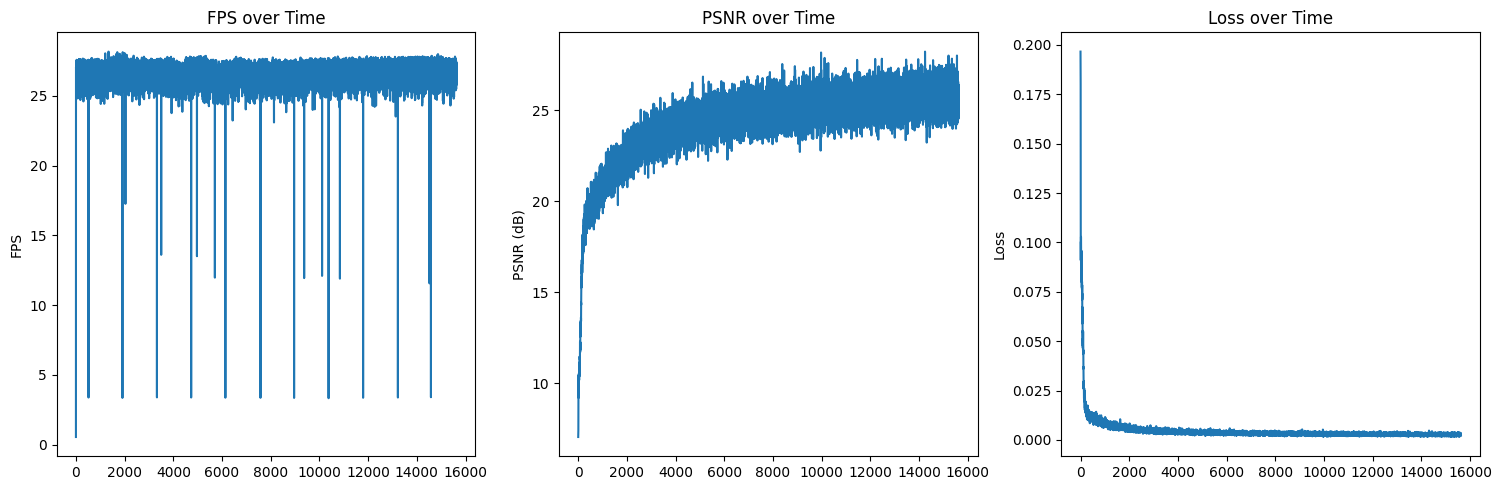

Process completed


In [ ]:
def train(nerf_model, optimizer, scheduler, data_loader, device='cpu', hn=0, hf=1, nb_epochs=1, nb_bins=192):
    training_loss = []
    metrics = {
        'fps': [], 'latency': [], 'psnr': [], 'loss': []
    }

    for epoch in range(nb_epochs):
        batch_start = time.time()
        for batch in tqdm(data_loader, desc=f"Epoch {epoch+1}/{nb_epochs}"):
            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                              hn=hn, hf=hf, nb_bins=nb_bins)

            current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_end = time.time()
            batch_time = batch_end - batch_start
            fps = 1.0 / batch_time

            metrics['fps'].append(fps)
            metrics['latency'].append(batch_time * 1000)
            metrics['psnr'].append(current_psnr.item())
            metrics['loss'].append(loss.item())

            batch_start = time.time()

        scheduler.step()

    # Print final metrics
    avg_fps = sum(metrics['fps']) / len(metrics['fps'])
    avg_latency = sum(metrics['latency']) / len(metrics['latency'])
    avg_psnr = sum(metrics['psnr']) / len(metrics['psnr'])
    avg_loss = sum(metrics['loss']) / len(metrics['loss'])

    print(f"FPS: {avg_fps:.2f}, Latency: {avg_latency:.2f}ms")
    print(f"PSNR: {avg_psnr:.2f}dB, Loss: {avg_loss:.4f}")

    return training_loss, metrics

if __name__ == '__main__':
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    try:
        # Load datasets
        training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
        testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

        training_dataset = torch.from_numpy(training_data).float()
        testing_dataset = torch.from_numpy(testing_data).float()

        print(f"Training dataset shape: {training_dataset.shape}")
        print(f"Testing dataset shape: {testing_dataset.shape}")

        # Model setup
        model = FastNerf().to(device)
        model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(
            model_optimizer,
            milestones=[2, 4, 8],
            gamma=0.5
        )

        # Full dataset with original batch size
        data_loader = DataLoader(
            training_dataset,
            batch_size=1024,
            shuffle=True
        )

        print("Starting FastNerf training...")
        training_loss, metrics = train(
            model,
            model_optimizer,
            scheduler,
            data_loader,
            device=device,
            nb_epochs=1,
            hn=2,
            hf=6,
            nb_bins=192
        )

        # Plot results
        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        plt.plot(metrics['fps'])
        plt.title('FPS over Time')
        plt.ylabel('FPS')

        plt.subplot(132)
        plt.plot(metrics['psnr'])
        plt.title('PSNR over Time')
        plt.ylabel('PSNR (dB)')

        plt.subplot(133)
        plt.plot(metrics['loss'])
        plt.title('Loss over Time')
        plt.ylabel('Loss')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

    except Exception as e:
        print(f"Error occurred: {e}")
    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        print("Process completed")

 k = 192 instead of 500 so the resolution is **low**

## PlanOctrees

## Plenoctrees
1. **Method **: Employs an octree data structure to hierarchically partition the scene into a 3D spatial grid, allowing for fast retrieval and rendering. PlenOctrees precompute and store the radiance and color data for each voxel in the octree, which minimizes the computational load by enabling quick access to only the necessary voxels during rendering. By using spherical harmonics, PlenOctrees encode view-dependent lighting effects directly within each node, preserving realistic lighting effects without recalculating every frame​.
2. **Efficiency in rendering**:
Capable of rendering at over 150 frames per second (fps) at 800x800 resolution, PlenOctree is optimized for real-time applications. The octree-based approach selectively renders visible areas, reducing memory and computation usage. This octree setup sacrifices minimal image fidelity, providing high-speed rendering suitable for applications that require smooth frame rates and high-quality visuals.
3.** Visual quality : **
It precomputes radiance data with spherical harmonics, PlenOctree can maintain high visual fidelity for specularities and shading effects. The octree structure, however, is limited by its voxel resolution, which may impact small details depending on the depth of the octree. Still, the quality remains competitive and is typically comparable to traditional NeRFs.
4. **Trainning process :**
PlenOctree optimizes training time by directly creating a compact, precomputed octree, which allows for faster scene deployment. Since it does not need to wait for full NeRF convergence, training times are reduced, allowing for quicker deployment into real-time applications, particularly where predefined scenes are used, such as in VR/AR environments​.


In [ ]:
# Using 75 location for calcultation density the colors SH = 16
# Using spherical gaussians(25 components)
# sherical harmonic

In [ ]:
def to_cartesian(theta_phi):
    return torch.stack([torch.sin(theta_phi[:, 0]) * torch.cos(theta_phi[:, 1]),
                        torch.sin(theta_phi[:, 0]) * torch.sin(theta_phi[:, 1]),
                        torch.cos(theta_phi[:, 0])], axis=1)


class NerfModel_PlenOctree(nn.Module):
    def __init__(self, embedding_dim_pos=20, embedding_dim_direction=8, hidden_dim=128):
        super(NerfModel_PlenOctree, self).__init__()

        self.block1 = nn.Sequential(nn.Linear(embedding_dim_pos * 3, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(), )

        self.block2 = nn.Sequential(nn.Linear(embedding_dim_pos * 3 + hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim + 1), )

        self.block3 = nn.Sequential(nn.Linear(hidden_dim, hidden_dim // 2), nn.ReLU(), )
        self.block4 = nn.Sequential(nn.Linear(hidden_dim // 2, 48), ) # if we chose element of sherical is 16, this number wil be 16 multiple with 3

        self.embedding_dim_pos = embedding_dim_pos
        self.embedding_dim_direction = embedding_dim_direction
        self.relu = nn.ReLU()

        self.bandwidth = nn.Parameter(torch.zeros((1, 16)))# can be 16 as well
        self.p = nn.Parameter(torch.randn((16, 2)))

    @staticmethod
    def positional_encoding(x, L):
        out = torch.empty(x.shape[0], x.shape[1] * 2 * L, device=x.device)
        for i in range(x.shape[1]):
            for j in range(L):
                out[:, i * (2 * L) + 2 * j] = torch.sin(2 ** j * x[:, i])
                out[:, i * (2 * L) + 2 * j + 1] = torch.cos(2 ** j * x[:, i])
        return out

    def forward(self, o, d):
        emb_x = self.positional_encoding(o, self.embedding_dim_pos // 2)
        h = self.block1(emb_x)
        tmp = self.block2(torch.cat((h, emb_x), dim=1))
        h, sigma = tmp[:, :-1], self.relu(tmp[:, -1])
        h = self.block3(h)
        k = self.block4(h).reshape(o.shape[0], 16, 3)

        c = (k * torch.exp(
            (self.bandwidth.unsqueeze(-1) * to_cartesian(self.p).unsqueeze(0) * d.unsqueeze(1)))).sum(1)# This is sherical gaussian formula, we can use Harmonic as well

        return torch.sigmoid(c), sigma


@torch.no_grad()
def test(hn, hf, dataset, chunk_size=5, img_index=0, nb_bins=192, H=200, W=200):# 192 is the level of visual resolution.
    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []
    for i in range(int(np.ceil(H / chunk_size))):
        ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=hn, hf=hf, nb_bins=nb_bins)
        data.append(regenerated_px_values)

    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)
    plt.figure()
    plt.imshow(img)
    plt.savefig(f'novel_views/img_{img_index}.png', bbox_inches='tight')
    plt.close()


def compute_accumulated_transmittance(alphas):
    accumulated_transmittance = torch.cumprod(alphas, 1)
    return torch.cat((torch.ones((accumulated_transmittance.shape[0], 1), device=alphas.device),
                      accumulated_transmittance[:, :-1]), dim=-1)


def render_rays(nerf_model, ray_origins, ray_directions, hn=0, hf=0.5, nb_bins=192):
    device = ray_origins.device
    t = torch.linspace(hn, hf, nb_bins, device=device).expand(ray_origins.shape[0], nb_bins)
    # Perturb sampling along each ray.
    mid = (t[:, :-1] + t[:, 1:]) / 2.
    lower = torch.cat((t[:, :1], mid), -1)
    upper = torch.cat((mid, t[:, -1:]), -1)
    u = torch.rand(t.shape, device=device)
    t = lower + (upper - lower) * u  # [batch_size, nb_bins]
    delta = torch.cat((t[:, 1:] - t[:, :-1], torch.tensor([1e10], device=device).expand(ray_origins.shape[0], 1)), -1)

    x = ray_origins.unsqueeze(1) + t.unsqueeze(2) * ray_directions.unsqueeze(1)  # [batch_size, nb_bins, 3]
    ray_directions = ray_directions.expand(nb_bins, ray_directions.shape[0], 3).transpose(0, 1)

    colors, sigma = nerf_model(x.reshape(-1, 3), ray_directions.reshape(-1, 3))
    colors = colors.reshape(x.shape)
    sigma = sigma.reshape(x.shape[:-1])

    alpha = 1 - torch.exp(-sigma * delta)  # [batch_size, nb_bins]
    weights = compute_accumulated_transmittance(1 - alpha).unsqueeze(2) * alpha.unsqueeze(2)
    c = (weights * colors).sum(dim=1)  # Pixel values
    weight_sum = weights.sum(-1).sum(-1)  # Regularization for white background
    return c + 1 - weight_sum.unsqueeze(-1)# By adding 1 to change from black to white






In [ ]:
def train(nerf_model, optimizer, scheduler, data_loader, device='cpu', hn=0, hf=1, nb_epochs=10, nb_bins=192):
    training_loss = []
    metrics = {
        'epoch': [], 'batch': [],
        'fps': [], 'latency': [],
        'frame_variation': [], 'psnr': []
    }

    total_batches = len(data_loader) * nb_epochs
    pbar = tqdm(total=total_batches, desc="PlenOctree Training Progress")

    for epoch in range(nb_epochs):
        epoch_loss = 0.0
        batch_times = []
        epoch_psnr = []
        epoch_start = time.time()

        for batch_idx, batch in enumerate(data_loader):
            batch_start = time.time()

            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                              hn=hn, hf=hf, nb_bins=nb_bins)
            current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_end = time.time()
            batch_time = batch_end - batch_start
            fps = 1.0 / batch_time
            batch_times.append(batch_time * 1000)
            epoch_psnr.append(current_psnr.item())
            epoch_loss += loss.item()

            # Store metrics
            metrics['epoch'].append(epoch)
            metrics['batch'].append(batch_idx)
            metrics['fps'].append(fps)
            metrics['latency'].append(batch_time * 1000)
            metrics['frame_variation'].append(np.std(batch_times))
            metrics['psnr'].append(current_psnr.item())

            if batch_idx % 10 == 0:
                print(f'\nPlenOctree Epoch {epoch+1}/{nb_epochs}, Batch {batch_idx}:')
                print(f'FPS: {fps:.2f}, Latency: {batch_time*1000:.2f}ms')
                print(f'PSNR: {current_psnr:.2f}dB, Loss: {loss.item():.4f}')

            pbar.update(1)

        # Epoch summary
        avg_epoch_loss = epoch_loss / len(data_loader)
        avg_epoch_psnr = sum(epoch_psnr) / len(epoch_psnr)
        epoch_fps = len(data_loader) / (time.time() - epoch_start)

        training_loss.append(avg_epoch_loss)

        scheduler.step()

        print(f'\nPlenOctree Epoch {epoch+1} Summary:')
        print(f'Average Loss: {avg_epoch_loss:.4f}')
        print(f'Average PSNR: {avg_epoch_psnr:.2f}dB')
        print(f'Average FPS: {epoch_fps:.2f}')

        # Plot current progress
        plt.figure(figsize=(15, 5))

        plt.subplot(131)
        plt.plot(training_loss)
        plt.title('PlenOctree Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(132)
        plt.plot(metrics['fps'])
        plt.axhline(y=30, color='r', linestyle='--', label='Minimum FPS')
        plt.title('PlenOctree FPS over Time')
        plt.xlabel('Batch')
        plt.ylabel('FPS')
        plt.legend()

        plt.subplot(133)
        plt.plot(metrics['psnr'])
        plt.title('PlenOctree PSNR over Time')
        plt.xlabel('Batch')
        plt.ylabel('PSNR (dB)')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

    pbar.close()
    return training_loss, metrics

In [ ]:
if __name__ == '__main__':
    # Device setup
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # Create output directory if it doesn't exist
    import os
    output_dir = '/content/novel_views'
    os.makedirs(output_dir, exist_ok=True)

    try:
        # Load datasets
        training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
        testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

        # Convert to torch tensors
        training_dataset = torch.from_numpy(training_data).float()
        testing_dataset = torch.from_numpy(testing_data).float()

        # Take 1/10th of the training dataset
        subset_size = training_dataset.size(0) // 5
        training_dataset = training_dataset[:subset_size]

        print(f"PlenOctree Original Training dataset shape: {training_data.shape}")
        print(f"PlenOctree Subset Training dataset shape: {training_dataset.shape}")
        print(f"Testing dataset shape: {testing_dataset.shape}")

        # Model setup
        model = NerfModel_PlenOctree(hidden_dim=256).to(device)
        model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(
            model_optimizer,
            milestones=[2, 4, 8],
            gamma=0.5
        )

        # Data loader
        data_loader = DataLoader(
            training_dataset,
            batch_size=256,
            shuffle=True
        )

        print("Starting training for PlenOctree Model ...")
        train(
            model,
            model_optimizer,
            scheduler,
            data_loader,
            device=device,
            hn=2,
            hf=6,
            nb_epochs=10,
            nb_bins=192
        )

        print("Starting testing...")
        # Test with provided image dimensions (H=100, W=100 from the test function default)
        for idx in range(5):  # Testing first 5 images
            test(
                hn=2,
                hf=6,
                dataset=testing_dataset,
                img_index=idx,
                nb_bins=192
            )
            if idx % 10 == 0:  # Clear memory periodically
                torch.cuda.empty_cache()

    except Exception as e:
        print(f"Error occurred: {e}")
        import traceback
        print(traceback.format_exc())
    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        print("Process completed")

Output hidden; open in https://colab.research.google.com to view.


# PlanOctree for Bigdataset

Using device: cuda
Training dataset shape: torch.Size([16000000, 9])
Testing dataset shape: torch.Size([32000000, 9])
Starting PlenOctree training...


PlenOctree Epoch 1/1: 100%|██████████| 15625/15625 [15:06<00:00, 17.24it/s]


FPS: 34.92, Latency: 28.98ms
PSNR: 9.27dB


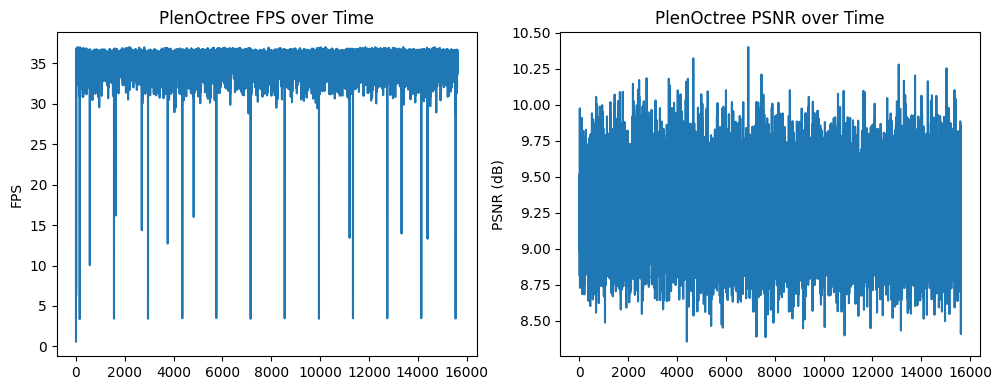

Process completed


In [ ]:
def train(nerf_model, optimizer, scheduler, data_loader, device='cpu', hn=0, hf=1, nb_epochs=1, nb_bins=192):
   metrics = {
       'fps': [], 'latency': [], 'psnr': []
   }

   for epoch in range(nb_epochs):
       batch_start = time.time()
       for batch in tqdm(data_loader, desc=f"PlenOctree Epoch {epoch+1}/{nb_epochs}"):
           ray_origins = batch[:, :3].to(device)
           ray_directions = batch[:, 3:6].to(device)
           ground_truth_px_values = batch[:, 6:].to(device)

           regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                             hn=hn, hf=hf, nb_bins=nb_bins)

           current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
           loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

           optimizer.zero_grad()
           loss.backward()
           optimizer.step()

           batch_end = time.time()
           batch_time = batch_end - batch_start
           fps = 1.0 / batch_time

           metrics['fps'].append(fps)
           metrics['latency'].append(batch_time * 1000)
           metrics['psnr'].append(current_psnr.item())

           batch_start = time.time()

       scheduler.step()

   # Print final metrics
   avg_fps = sum(metrics['fps']) / len(metrics['fps'])
   avg_latency = sum(metrics['latency']) / len(metrics['latency'])
   avg_psnr = sum(metrics['psnr']) / len(metrics['psnr'])

   print(f"FPS: {avg_fps:.2f}, Latency: {avg_latency:.2f}ms")
   print(f"PSNR: {avg_psnr:.2f}dB")

   return metrics

if __name__ == '__main__':
   device = 'cuda' if torch.cuda.is_available() else 'cpu'
   print(f"Using device: {device}")

   try:
       # Load datasets
       training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
       testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

       training_dataset = torch.from_numpy(training_data).float()
       testing_dataset = torch.from_numpy(testing_data).float()

       print(f"Training dataset shape: {training_dataset.shape}")
       print(f"Testing dataset shape: {testing_dataset.shape}")

       # Model setup
       model = NerfModel_PlenOctree(hidden_dim=256).to(device)
       model_optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
       scheduler = torch.optim.lr_scheduler.MultiStepLR(
           model_optimizer,
           milestones=[2, 4, 8],
           gamma=0.5
       )

       data_loader = DataLoader(
           training_dataset,
           batch_size=1024,
           shuffle=True
       )

       print("Starting PlenOctree training...")
       metrics = train(
           model,
           model_optimizer,
           scheduler,
           data_loader,
           device=device,
           nb_epochs=1,
           hn=2,
           hf=6,
           nb_bins=192
       )

       # Plot performance metrics
       plt.figure(figsize=(10, 4))
       plt.subplot(121)
       plt.plot(metrics['fps'])
       plt.title('PlenOctree FPS over Time')
       plt.ylabel('FPS')

       plt.subplot(122)
       plt.plot(metrics['psnr'])
       plt.title('PlenOctree PSNR over Time')
       plt.ylabel('PSNR (dB)')

       plt.tight_layout()
       display(plt.gcf())
       plt.close()

   except Exception as e:
       print(f"Error occurred: {e}")
   finally:
       if torch.cuda.is_available():
           torch.cuda.empty_cache()
       print("Process completed")

##INSTANT NGP

**1.Multi-Resolution Hash Encoding:**

Key Innovation: Instant NGP introduces a unique multi-resolution hash grid encoding, which maps high-dimensional input data (like 3D coordinates) to compact latent features. This approach replaces traditional dense neural networks, providing a sparse, efficient encoding that dramatically reduces training time and enables finer detail representation.
How It Works: The hash encoding assigns different resolutions to different spatial levels, capturing both coarse and fine details by balancing memory and detail fidelity. It allows the model to quickly access relevant information during training and rendering.

**2. Real-Time Training and Rendering:**

Training in Seconds: While traditional NeRFs can take hours to days to train, Instant NGP can train a NeRF scene in a matter of seconds to minutes, depending on the complexity. This speed enables nearly real-time 3D scene capture and manipulation.
Efficient Rendering Pipeline: By optimizing the rendering process with CUDA (Compute Unified Device Architecture) and highly parallelized neural network operations, Instant NGP enables real-time rendering, making it suitable for applications in AR, VR, and dynamic 3D scene visualization.
Versatile Graphics Representation:

**3.Beyond NeRFs: **

Instant NGP is flexible enough to handle not only radiance fields but also other neural graphics primitives like Signed Distance Functions (SDFs) for surfaces, volumetric data, and image neural networks for 2D textures. This makes Instant NGP applicable across various tasks in neural rendering and simulation.
Memory Efficiency: The hash grid encoding is memory-efficient, which reduces the amount of memory needed to store detailed scene representations and speeds up processing.
Scalability and Flexibility:

**4.Real-Time, Dynamic Applications:**
 Because Instant NGP doesn’t rely on large pre-trained models, it can adapt quickly to new scenes and changes, making it suitable for interactive applications, including virtual reality, augmented reality, and robotics.
Scalability to Complex Scenes: The multi-resolution encoding allows it to handle both simple and complex scenes, scaling the fidelity of detail based on resolution levels, which makes it flexible for real-world environments.

Hash table encoding using linear interpolation.Multiple grid vertices from the same resolution could map to the identical feature vectors.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os

@torch.no_grad()
def test(hn, hf, dataset, img_index=0, nb_bins=192, H=200, W=200):
    # Create output directory if it doesn't exist
    output_dir = '/content/novel_views_instant'
    os.makedirs(output_dir, exist_ok=True)

    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []
    for i in range(H):
        ray_origins_ = ray_origins[i * W: (i + 1) * W].to(device)
        ray_directions_ = ray_directions[i * W: (i + 1) * W].to(device)
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=hn, hf=hf, nb_bins=nb_bins)
        data.append(regenerated_px_values)

    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)

    # Convert the image array to uint8 format
    img = (img * 255).clip(0, 255).astype(np.uint8)

    # Save using PIL
    img_pil = Image.fromarray(img)
    save_path = os.path.join(output_dir, f'img_{img_index}.png')
    img_pil.save(save_path)
    print(f"Saved image to {save_path}")

    # Optional: Display with matplotlib
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.savefig(os.path.join(output_dir, f'img_matplotlib_{img_index}.png'),
                bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:

class Instant_NGP(torch.nn.Module):

    def __init__(self, T, Nl, L, device, aabb_scale, F=2):
        super(Instant_NGP, self).__init__()
        self.T = T
        self.Nl = Nl
        self.F = F
        self.L = L  # For encoding directions
        self.aabb_scale = aabb_scale
        self.lookup_tables = torch.nn.ParameterDict(
            {str(i): torch.nn.Parameter((torch.rand(
                (T, 2), device=device) * 2 - 1) * 1e-4) for i in range(len(Nl))})
        self.pi1, self.pi2, self.pi3 = 1, 2_654_435_761, 805_459_861
        self.density_MLP = nn.Sequential(nn.Linear(self.F * len(Nl), 64),
                                         nn.ReLU(), nn.Linear(64, 16)).to(device)
        self.color_MLP = nn.Sequential(nn.Linear(27 + 16, 64), nn.ReLU(),
                                       nn.Linear(64, 64), nn.ReLU(),
                                       nn.Linear(64, 3), nn.Sigmoid()).to(device)

    def positional_encoding(self, x):
        out = [x]
        for j in range(self.L):
            out.append(torch.sin(2 ** j * x))
            out.append(torch.cos(2 ** j * x))
        return torch.cat(out, dim=1)

    def forward(self, x, d):

        x /= self.aabb_scale
        mask = (x[:, 0].abs() < .5) & (x[:, 1].abs() < .5) & (x[:, 2].abs() < .5)
        x += 0.5  # x in [0, 1]^3

        color = torch.zeros((x.shape[0], 3), device=x.device)
        log_sigma = torch.zeros((x.shape[0]), device=x.device) - 100000
        features = torch.empty((x[mask].shape[0], self.F * len(self.Nl)), device=x.device)
        for i, N in enumerate(self.Nl):
            # Computing vertices, use nn.functional.grid_sample convention
            floor = torch.floor(x[mask] * N)
            ceil = torch.ceil(x[mask] * N)
            vertices = torch.zeros((x[mask].shape[0], 8, 3), dtype=torch.int64, device=x.device)
            vertices[:, 0] = floor
            vertices[:, 1] = torch.cat((ceil[:, 0, None], floor[:, 1, None], floor[:, 2, None]), dim=1)
            vertices[:, 2] = torch.cat((floor[:, 0, None], ceil[:, 1, None], floor[:, 2, None]), dim=1)
            vertices[:, 4] = torch.cat((floor[:, 0, None], floor[:, 1, None], ceil[:, 2, None]), dim=1)
            vertices[:, 6] = torch.cat((floor[:, 0, None], ceil[:, 1, None], ceil[:, 2, None]), dim=1)
            vertices[:, 5] = torch.cat((ceil[:, 0, None], floor[:, 1, None], ceil[:, 2, None]), dim=1)
            vertices[:, 3] = torch.cat((ceil[:, 0, None], ceil[:, 1, None], floor[:, 2, None]), dim=1)
            vertices[:, 7] = ceil

            # hashing
            a = vertices[:, :, 0] * self.pi1
            b = vertices[:, :, 1] * self.pi2
            c = vertices[:, :, 2] * self.pi3
            h_x = torch.remainder(torch.bitwise_xor(torch.bitwise_xor(a, b), c), self.T)

            # Lookup
            looked_up = self.lookup_tables[str(i)][h_x].transpose(-1, -2)
            volume = looked_up.reshape((looked_up.shape[0], 2, 2, 2, 2))
            features[:, i*2:(i+1)*2] = torch.nn.functional.grid_sample(
                volume,
                ((x[mask] * N - floor) - 0.5).unsqueeze(1).unsqueeze(1).unsqueeze(1),
                align_corners=True  # Specify alignment for grid sampling
                ).squeeze(-1).squeeze(-1).squeeze(-1)
            #features[:, i*2:(i+1)*2] = torch.nn.functional.grid_sample(
                #volume,
                #((x[mask] * N - floor) - 0.5).unsqueeze(1).unsqueeze(1).unsqueeze(1)
                #).squeeze(-1).squeeze(-1).squeeze(-1)

        xi = self.positional_encoding(d[mask])
        h = self.density_MLP(features)
        log_sigma[mask] = h[:, 0]
        color[mask] = self.color_MLP(torch.cat((h, xi), dim=1))
        return color, torch.exp(log_sigma)

def compute_accumulated_transmittance(alphas):
    accumulated_transmittance = torch.cumprod(alphas, 1)
    return torch.cat((torch.ones((accumulated_transmittance.shape[0], 1), device=alphas.device),
                      accumulated_transmittance[:, :-1]), dim=-1)

def render_rays(nerf_model, ray_origins, ray_directions, hn=0, hf=0.5, nb_bins=192):
    device = ray_origins.device
    t = torch.linspace(hn, hf, nb_bins, device=device).expand(ray_origins.shape[0], nb_bins)
    # Perturb sampling along each ray.
    mid = (t[:, :-1] + t[:, 1:]) / 2.
    lower = torch.cat((t[:, :1], mid), -1)
    upper = torch.cat((mid, t[:, -1:]), -1)
    u = torch.rand(t.shape, device=device)
    t = lower + (upper - lower) * u  # [batch_size, nb_bins]
    delta = torch.cat((t[:, 1:] - t[:, :-1], torch.tensor(
        [1e10], device=device).expand(ray_origins.shape[0], 1)), -1)

    # Compute the 3D points along each ray
    x = ray_origins.unsqueeze(1) + t.unsqueeze(2) * ray_directions.unsqueeze(1)
    # Expand the ray_directions tensor to match the shape of x
    ray_directions = ray_directions.expand(nb_bins, ray_directions.shape[0], 3).transpose(0, 1)
    colors, sigma = nerf_model(x.reshape(-1, 3), ray_directions.reshape(-1, 3))
    alpha = 1 - torch.exp(-sigma.reshape(x.shape[:-1]) * delta)  # [batch_size, nb_bins]
    weights = compute_accumulated_transmittance(1 - alpha).unsqueeze(2) * alpha.unsqueeze(2)
    c = (weights * colors.reshape(x.shape)).sum(dim=1)
    weight_sum = weights.sum(-1).sum(-1)  # Regularization for white background
    return c + 1 - weight_sum.unsqueeze(-1)




In [ ]:

def train(nerf_model, optimizer, data_loader, device='cpu', hn=0, hf=1, nb_epochs=10,
          nb_bins=192, H=200, W=200):
    training_loss = []
    metrics = {
        'epoch': [], 'batch': [],
        'fps': [], 'latency': [],
        'frame_variation': [], 'psnr': []
    }

    total_batches = len(data_loader) * nb_epochs
    pbar = tqdm(total=total_batches, desc="InstantNGP Training Progress")

    for epoch in range(nb_epochs):
        epoch_loss = 0.0
        batch_times = []
        epoch_psnr = []
        epoch_start = time.time()

        for batch_idx, batch in enumerate(data_loader):
            batch_start = time.time()

            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                              hn=hn, hf=hf, nb_bins=nb_bins)

            current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_end = time.time()
            batch_time = batch_end - batch_start
            fps = 1.0 / batch_time
            batch_times.append(batch_time * 1000)  # Convert to milliseconds
            epoch_psnr.append(current_psnr.item())
            epoch_loss += loss.item()

            # Store metrics
            metrics['epoch'].append(epoch)
            metrics['batch'].append(batch_idx)
            metrics['fps'].append(fps)
            metrics['latency'].append(batch_time * 1000)
            metrics['frame_variation'].append(np.std(batch_times))
            metrics['psnr'].append(current_psnr.item())

            if batch_idx % 10 == 0:
                print(f'\nInstantNGP Epoch {epoch+1}/{nb_epochs}, Batch {batch_idx}:')
                print(f'FPS: {fps:.2f}, Latency: {batch_time*1000:.2f}ms')
                print(f'PSNR: {current_psnr:.2f}dB, Loss: {loss.item():.4f}')

            pbar.update(1)

        # Epoch summary
        avg_epoch_loss = epoch_loss / len(data_loader)
        avg_epoch_psnr = sum(epoch_psnr) / len(epoch_psnr)
        epoch_fps = len(data_loader) / (time.time() - epoch_start)

        training_loss.append(avg_epoch_loss)

        print(f'\nInstantNGP Epoch {epoch+1} Summary:')
        print(f'Average Loss: {avg_epoch_loss:.4f}')
        print(f'Average PSNR: {avg_epoch_psnr:.2f}dB')
        print(f'Average FPS: {epoch_fps:.2f}')

        # Plot current progress
        plt.figure(figsize=(15, 5))

        plt.subplot(131)
        plt.plot(training_loss)
        plt.title('InstantNGP Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(132)
        plt.plot(metrics['fps'])
        plt.axhline(y=30, color='r', linestyle='--', label='Minimum FPS')
        plt.title('InstantNGP FPS over Time')
        plt.xlabel('Batch')
        plt.ylabel('FPS')
        plt.legend()

        plt.subplot(133)
        plt.plot(metrics['psnr'])
        plt.title('InstantNGP PSNR over Time')
        plt.xlabel('Batch')
        plt.ylabel('PSNR (dB)')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

    pbar.close()
    return training_loss, metrics

In [ ]:
from PIL import Image
import os
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import gc

In [ ]:
if __name__ == '__main__':
    # Device setup
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # Create output directory if it doesn't exist
    import os
    output_dir = '/content/novel_views'
    os.makedirs(output_dir, exist_ok=True)

    try:
        # Load datasets
        training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
        testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

        # Convert to torch tensors
        training_dataset = torch.from_numpy(training_data).float()
        testing_dataset = torch.from_numpy(testing_data).float()

        # Take 1/10th of the training dataset
        subset_size = training_dataset.size(0) // 5
        training_dataset = training_dataset[:subset_size]

        print(f"InstantNGP Original Training dataset shape: {training_data.shape}")
        print(f"InstantNGP Subset Training dataset shape: {training_dataset.shape}")
        print(f"Testing dataset shape: {testing_dataset.shape}")

        # Define model parameters
        L = 16  # Number of hash grid levels
        F = 1   # Feature dimensions for hash table
        T = 2**17  # Size of the hash table
        N_min = 8  # Min grid resolution
        N_max = 512  # Max grid resolution

        # Calculate the resolutions at each level in the hash grid
        b = np.exp((np.log(N_max) - np.log(N_min)) / (L - 1))
        Nl = [int(np.floor(N_min * b**l)) for l in range(L)]

        # Initialize Instant_NGP model
        model = Instant_NGP(T, Nl, 4, device, 3).to(device)

        # Set up optimizer with separate parameter groups
        model_optimizer = torch.optim.Adam([
            {
                "params": model.lookup_tables.parameters(),
                "lr": 1e-2,
                "betas": (0.9, 0.99),
                "eps": 1e-15,
                "weight_decay": 0.
            },
            {
                "params": model.density_MLP.parameters(),
                "lr": 1e-2,
                "betas": (0.9, 0.99),
                "eps": 1e-15,
                "weight_decay": 10**-6
            },
            {
                "params": model.color_MLP.parameters(),
                "lr": 1e-2,
                "betas": (0.9, 0.99),
                "eps": 1e-15,
                "weight_decay": 10**-6
            }
        ])

        # Data loader
        data_loader = DataLoader(
            training_dataset,
            batch_size=256,
            shuffle=True
        )

        print("Starting training for InstantNGP Model ...")
        training_loss, metrics = train(
            nerf_model=model,
            optimizer=model_optimizer,
            data_loader=data_loader,
            device=device,
            hn=0,
            hf=8,
            nb_epochs=5,
            nb_bins=256,
            H=800,
            W=800
        )

        print("Starting testing...")
        # Test with provided image dimensions
        for idx in range(3):  # Testing first 5 images instead of 100
            test(
                hn=0,
                hf=8,
                dataset=testing_dataset,
                img_index=idx,
                nb_bins=256,
                H=200,
                W=200
            )
            if idx % 10 == 0:  # Clear memory periodically
                torch.cuda.empty_cache()

    except Exception as e:
        print(f"Error occurred: {e}")
        import traceback
        print(traceback.format_exc())
    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        print("Process completed")

Output hidden; open in https://colab.research.google.com to view.

# Instant ngp for bigdataset

Using device: cuda
Training dataset shape: torch.Size([16000000, 9])
Testing dataset shape: torch.Size([32000000, 9])
Starting InstantNGP training...


InstantNGP Epoch 1/1: 100%|██████████| 15625/15625 [10:20<00:00, 25.17it/s]


FPS: 27.63, Latency: 36.63ms
PSNR: 25.43dB


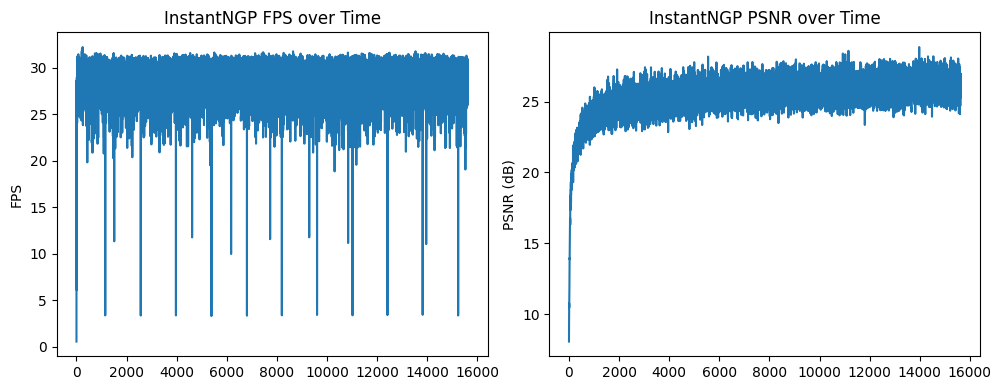

Process completed


In [ ]:
def train(nerf_model, optimizer, data_loader, device='cpu', hn=0, hf=1, nb_epochs=1, nb_bins=192):
    metrics = {
        'fps': [], 'latency': [], 'psnr': []
    }

    for epoch in range(nb_epochs):
        batch_start = time.time()
        for batch in tqdm(data_loader, desc=f"InstantNGP Epoch {epoch+1}/{nb_epochs}"):
            ray_origins = batch[:, :3].to(device)
            ray_directions = batch[:, 3:6].to(device)
            ground_truth_px_values = batch[:, 6:].to(device)

            regenerated_px_values = render_rays(nerf_model, ray_origins, ray_directions,
                                              hn=hn, hf=hf, nb_bins=nb_bins)

            current_psnr = calculate_psnr(regenerated_px_values, ground_truth_px_values)
            loss = ((ground_truth_px_values - regenerated_px_values) ** 2).mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_end = time.time()
            batch_time = batch_end - batch_start
            fps = 1.0 / batch_time

            metrics['fps'].append(fps)
            metrics['latency'].append(batch_time * 1000)
            metrics['psnr'].append(current_psnr.item())

            batch_start = time.time()

    # Print final metrics
    avg_fps = sum(metrics['fps']) / len(metrics['fps'])
    avg_latency = sum(metrics['latency']) / len(metrics['latency'])
    avg_psnr = sum(metrics['psnr']) / len(metrics['psnr'])

    print(f"FPS: {avg_fps:.2f}, Latency: {avg_latency:.2f}ms")
    print(f"PSNR: {avg_psnr:.2f}dB")

    return metrics

if __name__ == '__main__':
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    try:
        # Load datasets
        training_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/training_data (2).pkl')
        testing_data = load_partial_data('/content/drive/MyDrive/kilonerf_data/testing_data (1).pkl')

        training_dataset = torch.from_numpy(training_data).float()
        testing_dataset = torch.from_numpy(testing_data).float()

        print(f"Training dataset shape: {training_dataset.shape}")
        print(f"Testing dataset shape: {testing_dataset.shape}")

        # Model setup
        L = 16  # Number of hash grid levels
        F = 1   # Feature dimensions for hash table
        T = 2**17  # Size of the hash table
        N_min = 8  # Min grid resolution
        N_max = 512  # Max grid resolution

        b = np.exp((np.log(N_max) - np.log(N_min)) / (L - 1))
        Nl = [int(np.floor(N_min * b**l)) for l in range(L)]

        model = Instant_NGP(T, Nl, 4, device, 3).to(device)

        model_optimizer = torch.optim.Adam([
            {
                "params": model.lookup_tables.parameters(),
                "lr": 1e-2,
                "betas": (0.9, 0.99),
                "eps": 1e-15,
                "weight_decay": 0.
            },
            {
                "params": model.density_MLP.parameters(),
                "lr": 1e-2,
                "betas": (0.9, 0.99),
                "eps": 1e-15,
                "weight_decay": 10**-6
            },
            {
                "params": model.color_MLP.parameters(),
                "lr": 1e-2,
                "betas": (0.9, 0.99),
                "eps": 1e-15,
                "weight_decay": 10**-6
            }
        ])

        data_loader = DataLoader(
            training_dataset,
            batch_size=1024,
            shuffle=True
        )

        print("Starting InstantNGP training...")
        metrics = train(
            model,
            model_optimizer,
            data_loader,
            device=device,
            hn=0,
            hf=8,
            nb_bins=256
        )

        # Plot performance metrics
        plt.figure(figsize=(10, 4))
        plt.subplot(121)
        plt.plot(metrics['fps'])
        plt.title('InstantNGP FPS over Time')
        plt.ylabel('FPS')

        plt.subplot(122)
        plt.plot(metrics['psnr'])
        plt.title('InstantNGP PSNR over Time')
        plt.ylabel('PSNR (dB)')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

    except Exception as e:
        print(f"Error occurred: {e}")
    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        print("Process completed")

## Model Parameters
L: Represents the number of levels (or scales) in the multiscale hash grid used by the Instant NGP model.
F: Dimensionality of the feature vectors at each hash table level.
T: Total number of entries in the hash table. This is used to construct a large lookup table for multiscale hashing, enhancing the model's ability to represent fine details.
N_min: Minimum grid resolution for the hash encoding at the coarsest level.
N_max: Maximum grid resolution at the finest level.
b: Growth factor between each hash grid level. It’s calculated based on N_min and N_max to define a geometric sequence for grid resolutions.
Nl: A list of grid resolutions for each level l in the hash grid, computed by scaling N_min by the growth factor b for each level.
T : Total hash table size.

## Criteria for Real time application fo 3d Reconstruction
**Frame Rate (FPS):**

Is the end result/output measurement of rendering speed
30-60 FPS = your system is rendering 30-60 complete frames every second
Simple formula: FPS = 1/render_time_per_frame

Breakdown of what these numbers mean:

60+ FPS (16.67ms/frame or less)


Excellent performance
Ideal for smooth real-time interaction
Best user experience


30 FPS (33.33ms/frame)


Minimum acceptable for real-time visualization
Still usable but less smooth
May feel slightly laggy for rapid interactions


Below 30 FPS


Not considered real-time
Noticeable lag
Poor user experience
**Other factors**
Individual frame render times (milliseconds)
Consistency of frame times (frame time spikes)
Pipeline bottlenecks
GPU/CPU render time distribution

Frame Rate and Latency are fundamental metrics for real-time systems. Frame Rate (FPS) is calculated as 1/frame_time_in_seconds, with optimal performance above 60 FPS (less than 16.67ms per frame), and acceptable performance between 30-45 FPS (22.22-33.33ms per frame). Total Latency, which includes input lag, processing time, rendering time, and display lag, should ideally be below 50ms for excellent performance, with anything above 150ms considered poor.

Frame Time Consistency and System Response are crucial for smooth operation. Frame time variation, measured as the standard deviation of frame times, should be less than 2ms for excellent performance and no more than 10ms for acceptable performance. System response time, measuring the delay between user input and visible change, should be under 100ms for excellent responsiveness and no more than 300ms for acceptable performance.

The Rendering Pipeline combines CPU and GPU operations. Total frame time is the sum of CPU time (scene updates, physics, animation, draw calls), GPU time (vertex and fragment processing), and synchronization time. For real-time operation, the system needs stable 30+ FPS, system response under 300ms, and frame time variation below 10ms. Secondary requirements include keeping CPU usage below 80% and GPU usage below 90%.
Performance Measurement can be done using various tools. Built-in engine tools like Unity Profiler and Unreal Engine Insights provide detailed analytics, while external tools such as NVIDIA Nsight and Intel VTune offer hardware-specific insights. Performance logging should track metrics like frame time, FPS, CPU/GPU usage, memory usage, and system latency.

Real-time Classification requires consistent performance, resource efficiency, and good user experience. The system must maintain FPS above 30, stable frame times, and minimal latency spikes. Resource usage should be efficient and scalable, while the user experience should feature smooth interaction, responsive controls, and no visible lag.

Individual Frame Render Times refers to the time taken to render each single frame, measured in milliseconds (ms). For real-time applications, you want each frame to take less than 33.33ms (for 30 FPS) or 16.67ms (for 60 FPS). This measurement gives you a precise view of how long your system takes to process and display each frame. For example, if a frame takes 25ms to render, you know you're operating at 40 FPS (1000ms/25ms = 40).

Consistency of Frame Times looks at how stable your rendering performance is. Frame time spikes occur when some frames take significantly longer to render than others. Even if your average FPS is good, inconsistent frame times can create noticeable stutters or jitters in the visualization. Good performance typically means frame time variations should be less than 5ms between consecutive frames. You can measure this by tracking the standard deviation of frame times over a period.

Pipeline Bottlenecks are points in your rendering pipeline that slow down overall performance. These could occur in various stages:
- Geometry processing (vertex shading)
- Pixel shading (fragment processing)
- Memory transfers
- Draw call overhead
- Physics calculations
Each bottleneck needs to be identified and optimized to improve overall rendering speed.

GPU/CPU Render Time Distribution shows how the rendering workload is split between the GPU and CPU. In a well-optimized system:
- GPU should handle most rendering tasks (geometry processing, shading)
- CPU manages scene updates, physics, and draw call preparation
- Ideal distribution varies by application, but typically GPU should be at 80-90% utilization while CPU stays below 50-60%

Frames Per Second (FPS) is the final output metric that combines all these factors. It's calculated as FPS = 1000 / average_frame_time_in_ms. For real-time 3D construction:
- 60+ FPS (< 16.67ms/frame): Excellent performance
- 45-60 FPS (16.67-22.22ms/frame): Good performance
- 30-45 FPS (22.22-33.33ms/frame): Acceptable performance
- Below 30 FPS (> 33.33ms/frame): Poor performance, not suitable for real-time applications



***Frame Rate (FPS)***


Calculation: FPS = 1/frame_time_in_seconds
Example: If frame time = 0.0167 seconds, FPS = 1/0.0167 ≈ 60 FPS
Measurement ranges:

Excellent: > 60 FPS (< 16.67ms/frame)
Good: 45-60 FPS (16.67-22.22ms/frame)
Acceptable: 30-45 FPS (22.22-33.33ms/frame)
Poor: < 30 FPS (> 33.33ms/frame)




***Latency***

Calculation: Total Latency = Input Lag + Processing Time + Rendering Time + Display Lag
Measurement ranges:

Excellent: < 50ms
Good: 50-100ms
Acceptable: 100-150ms
Poor: > 150ms




***Frame Time Consistency (Frame Time Variation)***


Calculation: Standard deviation of frame times
Measurement ranges:

Excellent: < 2ms variation
Good: 2-5ms variation
Acceptable: 5-10ms variation
Poor: > 10ms variation